# LLM Application Developer Programme (LADP)

<h2>Phase 2: Project Phase<br>
Knowledge Transfer 2: Hands-on with Retrieval Augmented Generation (RAG)

**This notebook is the property of AI Singapore® and may not be distributed or sold without permission.**

**Outline of Knowledge Transfer 2**

1. Embeddings

2. Vector index vs. vector database

3. LangChain and LlamaIndex

4. Retrieval Augmented Generation (RAG) deep dive

5. Hands-on RAG with LangChain

6. Hands-on exercise with new dataset

7. Hands-on RAG with LlamaIndex

8. Further learning

---

# Quiz

Test your knowledge so far with this quiz:\
https://forms.gle/CBfo5Bxwz6Ryr7NX9

---

# Instructions for participant

1. Make a copy of the Knowledge Transfer 2 notebook from the shared folder.

2. You need the **.env** file which you used during the Deepskilling Phase. Upload the file in the notebook's file structure before you begin.

3. From the [LADP Knowledge Transfer data folder](https://drive.google.com/drive/folders/123gTWsKDW7FKSQu-H_j3LhBrBGhMagyW?usp=sharing), download the 3 files:

  - **aiml-learning-resources.csv** (This file was saved from a spreadsheet containing a dataset of AI/ML learning resources. You may open up the CSV file with a spreadsheet programme to see what it contains. Note: CSV stands for "comma separated values" -- basically a text file containing spreadsheet data without any special formatting.)
  - **barbie.pdf** (PDF file created from Wikipedia entry on the recent _Barbie_ (2023) movie.)
  - **oppenheimer.pdf** (PDF file created from Wikipedia entry on the recent _Oppenheimer_ (2023) movie.)

4. In your notebook's file structure, create a new folder called “data”. Upload the 3 files into the “data” folder.

5. Run the Setup Code.

# 1. Embeddings

Have you ever wondered how LLMs are able to 'understand' the **meanings** of words? Remember that words must first be converted into tokens -- a set of numbers (mathematically known as a "vector" or "tensor") which computers can process and perform calculations on. How are these numbers calculated?

A crucial part of LLMs are [word embeddings](https://en.wikipedia.org/wiki/Word_embedding), a kind of multi-dimensional vector space (typically hundreds of dimensions) used for representing words as numbers in a way that captures their meaning. This numerical representation helps a computer understand what words mean and how they relate to each other.

Word embeddings are useful for tasks like language translation, sentiment analysis, and understanding the meaning of text, as they allow a computer to work with words in a way that's more similar to how humans think about language.

To understand word embeddings, think of each word as a unique point in a multi-dimensional space, and the position of the word in this space is determined by the words it is often used with. Words that are similar in meaning are placed closer together in this space.

For example, in this word embedding space, "cat" and "chicken" are close to each other because they are both animals, whereas "cat" and "apple" are far apart because they have very different meanings.

<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgF
BQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYU
GBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQU
FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wgARCAGdAfQD
AREAAhEBAxEB/8QAHQABAAICAwEBAAAAAAAAAAAAAAQFAwYBAgcICf/E
ABsBAQACAwEBAAAAAAAAAAAAAAADBAECBQYH/9oADAMBAAIQAxAAAAH6
pAAAAAAAAAAAOMY6a65N9wAAAAAAAAODkAAAAAAHByAAAAAAAAAAAADF
HpHijm2ZwAAABpnnuHk222/v9oAACgNZNvNZJxcEYpzCboaMXJBLI2U1
82AAAAAAAHGMVlOrznPOXGHGMWVy12zkDTvP8TZex1JlicAAAAAea+P8
tmkk9E9Z6UAACtMJlMpgOxyYQSSGdycQySQy5AAAAAAMUeldVrWt65GY
lMgVNGnY2rOWTcUXM59vfu5pN8Ecelec4W5eg7cqeYQmJrIAAAAAA4OT
TzkylwUZPM5iMhydDsWpkAAAAAABU0adteueXSx+dSx/S1WwAKmjTtr1
wACqo0/JvC+P9R9r6y96fQFDnF9jIFPQpXF+6AAABgYxktnXDEdycVhM
IJLIZJOToXBOAAAAAAIcEGTbaRLLqu+vwL06H39y7+za7AR4o8eukyec
ADprr322ArM4s8ZAAAp6FK4v3QOmusbbOZnMAAAAAAAAAAAAACtp1bK5
aFRnH55dXnfSdO19GVbGp76eHWYfqKnZrKdWzuWgBj00yb7gCszizxmq
o04kEOwdXpV1SrY2rLOQBAq1/IfA+L9J9h6jZOx1BT0KVxfugAAAAAAA
AAAACtqVbK3aHhdiD5PvVB3Z6Me/1bP1LTs1tOrZXLXTXXvtsKynUs7l
sAVmcWeM19StGiiuehe868l5nfPT+hkzSgDHprpPnODtnd7E6zYAAAAA
AAAAAAAAAg1q8maXLvvocmnwv0qAG/RS/b3Oud9NYsMU+zY808f5bevS
9+xt2gABWZxZ4yAABT0KVxfugAAAAAAAAAAAAAAAAVVKna3bg+XblbzG
aK31z9SU7W6x71VKna3bgAAHTXXBHHKmmrM4s8ZAAAAjQxab5/ib36b0
AGnef4l91OhZ3LYAAAAAAAAAAAAEaGKNFFZW7XlM0TGbLGfRI962pVky
yyZpQAANB8v53U+Fx/afonua3ZZ4yAAAB11xUUaVz0LwFVRpz7VjNJIA
AAAAAAAAAAAAMMccGtBznPOXXBjE6zPmkkAAAFZTqVNGntPa69ZnFnjI
ECrXzSbyZpaihS1jjcrffT+h5zkAAAAAAAAAAACnM5LIpPOQAAa/yubJ
mlt792OxIZAAAp6FK4v3QAKzOLPGQABqXC42i+Z8/wCw+/8Aa5pJAIkE
MueYACuq1uuuBJmklTTAAAAADVSvOSGV5bm8HDAHB5R4Hxlpdt+l+x9T
B0jm7b85yBxjHTXXJvuAABWZxZ4yAABxjHOcgCFXgm2JwIcEEaGKyt2u
+2wiwxQ68Fnctd9tgAAAAAAAAAIsMOTbfttnxn534fdPR9zdvR94Cj5v
P17k83ffUeiHXGOTnOQKzOLPGcMemPXSVNMAAAAAI0MWLTSdZsAACnoU
ri/dAAAAAAAAAAAGnef4l70+haXbcaGKTNKAB5Z4nyOaST032XqgKzOL
PGdf5XNgVq+397tACnoUri/dHGMQq8E6zYAq6VS0u2wANd218ZsQ/QtO
aBWr2Vu0AAAAAAAAAAAAINavOs2AANX4vJ77bbL2OoBWZxZ4yAIVavLn
m7bbADVeJyPOvI+Z9f8Af+0sLVnjGK6rWsrdoADzCWOs219igmrKdWzu
WgAAABGMxiOxmAAB5t4/y+9em9BPtWB11x22yAAAAK+pW5znHbns8ZAG
CKPNJvznIAjQxa3yOXtnc7HOc4Y9MMccyxOAIbHxX0KfocUn07Us1tSr
ZW7QAAAA8xJ5TnpJnOGMemvmnifJer+59gMEceeSQanwuPoHlvOexfQP
bSZpQAMemtfVrWl22Ne5PN7bZmdXoWeMgAAAAADjGK6rWsrdodTRZNPl
a7Vqc4+malj2KCasp1bO5aAAAAGIjGYkAA6a699tgAKynV1fi8nefS9/
tnIr6taspVdj6/TAAArM4s8ZAAAAFPQpXF+6AKulUs7tv4f6FLSJdM+F
vrt7BBN9M1LHXXWBWr2Vu0AAAAAAAAABi00y77gACDWr11Stf9ToiNDF
UUKWwdXpAVmcWeMwq1fybwvj/RvXen2Dq9EDQvL+d3r03oO+2wGg+X87
ddG9snX6kaGLDppmsz+dS6VG2u7x77dpuKehSuL90AAACMQy1AAAAAKy
nVs7loAAAAaR5vg6P5rge0fRPc55ZBWZxZ4zhjj0Dy3ndz9D3LK5aAoe
Xzr7p9BnIHk3hfHbH1+nu3o+8IMEOCGGyt2u+2wiwww68Nnctd9tgAAA
KQpioJ5urHBwa1w+Q1xt3e7IAAAp6FK4v3Rj0113k8zZOv1O22cUeldU
q21+6BWZxZ4yBxjA5zkAAAACKSivq1umuBJmklTTAAAAAACrLQA6a6jv
tsNO8/xJdibZux1dK87wt19D3GcgDXeTzPMfF+U9W9z6+66N8U9ClcX7
oFZnFnjIEOvB322kzSjV+LyZ9qxc9C8AABGYksirO5YAA5AAAAAAINav
l33kzSgDFpp2znvttq3F5O09rrCJBDLnmHGMVNGnb37oAAFZnFnjIAAH
j3z/AMTedPoei+t9MAABp/A4thasbB1elrBQHYHANoL0AAAAAAAAAAAE
KvBNsTjjGOc5A4xjnOQBWZxZ4yAABBjjl7bd9tgAAIsMOXbfLJuMBkO4
MemsCtW5zkcYxY27XbOQBhI5MOwBHiiwxaTrVgAAVFClb37oFNz6Op8L
j+i+t9MB5Z4nyXpHr/Ty55gKzOLPGQAIdeDrlInnzAFRQpW9+6IVaCRN
Jl33AxHRiQyINavj11srdoBjFXTqyppZU8wFARjWz0MA8+8h5em5tD2P
6D7eNDF5F4LxnoPq/R7L2OqOMY5zkAMYZyAxhnIp6FK4v3azOLPGQI8U
UGtBPtWOMINavPtWM8kg4xjnOR4r868LtPa63oPq/SCj5vPoOXz979N6
ARYYemuJticDyeaLqetQy1tSrNsT5d9wOgOxyCsp1IsEV70+hh018+8t
5zcu/wBq1u2wOMY64x322AAAAArM4s8ZAqqVPJet/NVuvLw+m6lmqpU7
W7cAA1fk8y3t2bG3aHXGMUemeWQVdOpaXLY1rbXxyeLzqaP6TqWN6j3F
XTqWly2ABDrwR44+zLLjDrjWVbtS9tgAKHmc6g5XO331HogBUUKVvfug
ACszizxkddcQK1fwLq59Thl89lj9Ai32uhDIll0zzvC331HogIjEtkDB
FHnlkArKdWzuWtc21+CunQh5wPXa8/19RtSWaynVs7loAV9Wtl33+f8A
o67NptlZ9gglFTRp2Vuzk33GCKPPLIAAABovmfP7j6DtyZpQKzOLPGRx
jFdVreQ9OSrzjW99fQIt/VeZHY27NXSqW165Ghi4YTSymRgij818f5b0
n2vrDPJEqVbK3a89kj+HelRF5rv7nWm93rT32u1bUq2Vu0Bhj0iww2Fq
z8P9Glp++n1NSte1QTAVVKna3bnGMQq8E6zYAAAApufRt71zttsBWZxZ
4yBU0adret+SzRj1mCSrpVLa9cwxx19WvMsT8kKvBPs2M8sgAArKdSzu
W4jH589WhWZ13aOS902+0KFzkrKdSzuWwKynUs7lsfGd+n5PPDuccn0Z
UseywTCuq1p9ifttsAMEUfbOcsm4AAAArM4s8ZA4xirp1O2dh1xra3Lb
OaqlTtbtzg8lmi9bhlqqVO1u3AOuuvk/h/Iete69jVUqlrdtjx6eLxyx
B0PoOrY9Eik6a6wK1eyt2gK2pVsrdofGV+n5RPCB9ZUbnuVebrjECrXs
bdkAYY4+c5y77gQKtafasgACszizxkAAABjFbVradfm+L+jTYfevNvTa
VewtWa2pWs7loRtdZO23XGKqlTt710ADjGKijTuL90AVtSrZW7Q8QsQ/
JV6mBt0cn3tzb2PTSLDFOs2I8MXUlTSgAVFCl5N4Tx3pvs/V7H1+mAIb
FLpHZbb2mdgANS4XGvel0LC3ZFZTq+d9KX4y6FLsz928y9sdCCxt2cem
vaTfuRmMjOUx6a1tWrm33n2bHBX1a3TXW0uW+c5AFZTq2duyzmOfnP1u
djYFvrt+hvL6FZTqWVu1znPlnifI4tNfWPc+wAA6a66rxORs/Z6uWSSr
xpHhixQxZ4Y5GMdWYEu+aaXLNLZ775maXnUbK3ZkTSipo07K9b+cLcEd
j6Hq2OtCpbXrg1cqCSQy0NuB011gVq/LM+1Y7ZyAAOMYq6dW1u29M30+
G+lSi5x0Y9Ail+4ubcradW0u2xTc+j1xi76N8ACOxXRx4YoscMU+LTkA
17mUMu+150LoEPfbiaXLLLLmksGw4xiqp1O+cjpjFrct85yMRTnBYHBP
AAAAAAIsMMaGPPcs/PtqDHnGzab+n1dstKtcX7oAAFdjWLFFhhi7wxy9
dQIVeGbYmAjQx85zIl3AAGHOY0smWaXLNLbbb9gAAAAAAAAAAADHppX1
q/LIHfbNhasgDGVeseKGLDDFMh0yMAADDHrmk2HXXEOGKdYm64QK1ext
WABrXK51tctT7M4gSb95pcs0s+SSWyAAAAAAAAAAAAABCYhRRYYYuIYp
2moAAAAAEGvDrvL5+4dzrAAAVlStNnmzSbgARs5wzS5ppZE0tpnYAAAA
AAAAAAcFVjTBDFihizwxyMYAFZUrWduyAANT43L7ZztXY6YAAAAAAAAA
A4Zr5d800uWaWy33zsgAAAAAAR2K6OPDFFjhinxacgADBkAKypWs7Vlk
NF89xO+2d37/AGhX1oLCzOABo/n+LFhi9C9N3wAAOMOcgAABD224nlyy
yy5ZLDOwAAAA4NT0hsaVaTHoAAANE87xIUEPpHqfQgAAAADprjvtkVdS
taW7I1zl8+PHHtfY6gAAwx6eXeR8zuXd7Gy9XogQ4ItU43K3f0HaAAxZ
zHt2JFmxcYyAAAABjjjxQxYYYsccYAFDzqMeKPZut0gwpKFK76F0AAcY
c5AAAAAAAcYadw+RsPTv2NqwAwixRyppB222zTS5ZpcssvOcgAAAAAAD
rrrihiwwxYoouMYAA64xqHE5W49zrAADSeBxr7pXri7bAAAAq6la0t2Q
KupWtLdkAAcs5JN8s0uaaXvJIAAAAAAAAAAAxjFFHiiiwwxdNNAAAMEe
meTcAdcY0/h8nY+p0J9mccYc5AAAAAds7ZZpMss2aaTnbYAAAAAAAAAA
AAAAdNNMUMWCCGFWryZZAIcEUyeUAR4tPLvI+Y3f0Hb2Lp36Pn0qqnV3
HudcARYY5U0gHfffNNLlmmyybs5AAAAAAAAAAAAAAAAAq6VTU+Fxt69H
3sMMWKKLrrqAAOMOcgAABoHm+Fv/AKf0EuxPmmm7b7AAAAAAAAAAAAAA
AAAAAAADHHHihip+dRradXYOnfAAAHbbbNNLlmlyyy85yAAAAAAAAAAA
AAAAAAAAAAAABDrwQq0FlZni14I9eDNJvyzkk3ix6TLdmZZsAAAAAAAA
AAAAAAAAAAAAAAAAAAADHprj10yM999udtgAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAP/EADAQAAICAQMBBwQBBQEBAQAAAAME
AQIFAAYQIAcREhMUMDQVJDFAIRYiIzJQMzVg/9oACAEBAAEFAv15nugZ
Klr+nM93v98d/wC0UcGGopRIPtZPNXAbFZmzJevLUrexf7sNkAQwFZ8e
FQ26aCVyAREpiqzRQSsY/KqgPjaskgK2Pi67OZQlyhsyD0u2jQfb+vBW
M970zFY9XY2vIYvr0c68himvV2DqJi0c5HN3VZUYhtf3MvjijawuPLLP
W6rZnV8UC5S48RdLJCVrfHUnTuOE/qmPHTQsUERB4sIyATqJUeIAO1sW
KdCWGAIMaNW1lKWIBCQN+6UtQjqCzc/iF2guC5sCykiLUw+HMOBwohVA
PRjVXFO5LeNZmrYeDOgXN70zEcMOnXyJHmrry02zEviql9UsRuc0vFvq
gZH9ZX8UZUNos9UF5y69afVg+Gl/Mp71fu2db7y6a+M2hn8ft3NdFvtG
enKL2ZSmsxbCrWWS4dUCRrlyjVjeyQvl6qKZto6TZxGxZpGTHMU00h5q
c4tgxqY6aQbCzay2L8houILK5MWS1q40tilxd50kG66vutlkK64oAHW6
MVXM4LW2XpyO3+Tig4VCyZfp8Fe/lr5PW8ycBOZvWJsS5JGKo/3Xf5nj
LvDxuM12cbyVVRoWhK5rduMwNK9o+TzWf0l/E9FiUHPQ18nWRfhAOLyv
1DguQXAXpfNK6drTe2CZudTgWQ8x/wDac/i/Ha23cWF4i0147L9tGJkN
J/76m8V5bx43b9DXydOpUeDj8ZTH8PYdm7iwvJX6CUgtL7bnzE1KJA/d
dHJFhEgo9bz29XcWF52jtS+6m1wVVAQkCGjSRrazYTS/jqkol1NfJ6xq
GrkP+GD7Y/HaVs8SFabTevt3auxmt0B2vtZba6ej/cn67XilRNCPOmvk
+yyb04Ec4YzfOWy5VWMc3Lqv7ZwQwMLMxfW+MsOcUznFFtu7HaX+g6Mz
M3XBC9OvcZbecEtglj8NfJ9m1YvVfErrG5bxoHbBDRcf7hQ0PTy2F9eu
iuvqK+pyFdeWwxoQaAp7D2PG/RTAjXLpr5PLoSHWWpYQNZLIVx4gbjv5
kT4o/ZPkfLOJ2pW6kmSsOVWL1vZkSZEcmJ/g3sS0eMj0tfJ6twKXOMC5
GCBH5QuatCsfps+GJ9Xedet7tCaEf3aE+lvM42rz7ATEpkVPUhKnYpWs
b45mt/FFSa8JNeEmvCTWQHYTuAHaz2mS0pr89Ez3aoSpI62vk+5VMVGO
TswDUKWPqtYpHBlhn13lT1S8Er+qZYTGhBoCt7eGhS2OTbh726MyIhkc
AuajHEzFYiYmOWvk6KWgKAZEzX3GDwuNZeR9do9CT9hnbtSEQx9EB6hk
VjdOYZud3Bs3E5y18nWaTI2tg0DLW6HbNwTiZ7tUeXJfmv3DvTuJi6mA
7K8pk3y2rF6pWmKftVSFRnpyOEhsuNw0JX5a+T0NuDSpW0Xr0bhJaimk
CWKlqf4jHx9p09o2Trj9r9ljgj7a1/pkfa9SLVb1vq7Ax2Cahx9WXcYq
+iS5U+ItE+248JGibo3RtfJ6ChoesR3R0ML0aEPbgakiPDGjf+KfxOht
sKK26twk3blux60+q0b5vteXJCIGuxD5SPYwVChDMk13l1axvAowz67i
4BlnjcDVwhEWwbrF85fpJaajx7JGg8ZfG2fricdKA2vk+9P8xj5+04ta
KxmN74jDU3TvFvc5hh+m4rsywVsVhdf75H2qjpWSIrGBK4pjo8FYt0vo
1fCHblvMrWKxw85VFfG5eHydbXyfavdv6h0V+3d1uH6/hXzuHZ0uuAuh
lxqM7W2O3mXfxq9opVKszT9XzaQTqcUq6DHYiiF+GGBqjBm1jk5a+Tp0
/plbslJfCuXbV5NuEtWaW8dOXc+SDYnK+u4YBDA1mJJphYTYm+zjBNWp
2U4WtsVtPE4aeLT68nsssUUXVyYG7+3bHiu57W5Yt3aB4oBw18nRhVOK
+3TxdBKEV+SYVYh+h3HFVNgUCCvw0Gt6Q1YGq3i8cGZGDU1K5qlIHX2c
5HfhTsxkDjYv5CRQ/V4tfXjvrxk1nmDCDt9gph+wRIl3+CEqKkbgWklb
ReuiioagcUsuTlr5PMz3R+fca+NqyAZn0d9ei79CVED3wIQE3N6VJWlK
jrxuBkwdYJgp1tf1HHn9Oera2P1hq2rjuERNDvy18nltaHALAhYHDudo
qXH5Mb8dbM9y3Dz3otKO1bjv13679d/vOtejXXN6gHQQVDVpSo66/p8H
n8BaExbiY74jEqQTra+T1vBsBrbwbWa686+Za+FbI2trOD8evS+GVsbQ
x4T8icdi/HoSsCjCDkWN/YAmJa/H59lr5PXYVGb1pWles6wmqiFQNOCk
8uKxMRxclRV9bJNd7c68TddeuimomLR0FLQA1nRN6taKRyZga9F3gNdf
1Gv1DnL+Z6Db3m+q5y3nfUFPH6Xlr5PTdwAph0Nqip4KcxkazkODugWk
ZamryS/ggYvDbg7HlyNP+7ospIZXYg8c5n+AZDJCuu3NDhrM+CbG1Ni6
z97y4la1G9Ml8hcrJTEwTl2l+O7+fboVqchpr5PJz1XpC92dDAMUEAMs
SEiugmqcfHd/PBr2IXbl7eo4zByLpYFs5WOGT+QJZfya87p7QldusbQ3
wXdLemhTEiJUw+YpWseCvdEd3LiIX6p4cCd9FithTgD21jkYQBz+NVvW
8e218nkMepZyGQBi03+1HJvM4TtEzX1PVo9M30t4cLTKSIkacTWLQIAw
Rx/7vcZfceOwcYvdymEZyeEx31DZ48QDFcA/wNdJ2qhny2D6+nA19OW1
6GK688y2o/zz05oZSo7fCah+hJwjROpr5PFp7q4+O5LtfeJWmzsEDB4Q
natjYPtbd6+6tZH4bJvTroZs5W+RR3l5qcd78ofyLW4sr9FwrbZn2eMo
mx2f5ZZira2mf7Wehg9osBaoI3ru93AbuntVw3lbK3ZkN1PcEFZWwyVL
TgRxnj2Xs4YLaxvUA5a+TxMd8Y+ftO1PBEyGM2d2ipUxu7cztiqHZdhi
Y7C5D+QTEWgGLWWLojIRaG0Eulq9weD1tcKKLMPTUuvCXUVJrH/E1v8A
BLG0eMGn6/M9sBaeLABsvg9Of78lLARKCmtddoB7n3a6sBd3sxXoqnzT
7VrUx3wokJKvssYldk1axSvLXyeST6Nj8xluzLEZI2K7MsRjTfxSofuj
6MaoBwErWhrCFoiwixICq6Capx9Sf9l9NrUdVyePJishrZzyuLzi12N/
7x/HBP8AI9y3/kLx2nXpbdmsJu/KYCu2O0lTM34fr3rVt469BjUXGItT
j9pr5PMx3x5BVtetmNesm2vTkZ5rHqm9d+tvv5fN5/RI9M1zbv8ACA7P
rtM/bn43zsb+otLdlmbPBuy3OCvs3aI9rp6veB1SrMxz+cjx2mrSDdnP
Zpuu+UW1aPFXHz3o9Bg0YGIdQ05l9et+pr5PtY74e+s6TAYCMk3VkrjT
7GDRNjcVkY+yj+YXyAmT8RH3GrVi9RXlO3T+Nf8A0L9Fv7cjx2p4OXsT
ztN+2N3HolvANGvgT0Zga9QMiZjpyxLCx+sCSxEOg7gFpM5YpqZNe09O
UzN0zoN+tW4x/wDC/aZj7PbX1W00ttHcH9SYfIz9rqoqUte9R01EfcWJ
SltXpUtPAZTVHg2nv79TaK6s+Lv8gjWojujoe/sjhgNWAEpIicYcfm5b
T8+If44zV7XyGJvamQ6b0glZ24GbhDRcf41bJr98tNF1K9y6CuJfi1Yt
EI0HqCOC1GTrXQjDPTTuKC9dcFFhcF+0YvSpht9kViZEvY+WGMbjgYhA
c+sY4zpK2GHIn9IV9qhW2iQ/i3G2LcXpUkfTltRj1omKxWOqYi0K28m2
t17hnbWLJazzl6zS2thpXd3TMxWFok5eHsWJ6UcSFG3SZgS1ZyUW1NnD
a9CO+ojujnLPEVjFOXbHyRMJbQNgWoeKPQX1z24mO+PIKrr13h167xa8
krWoiKxx5VJK7iROlYw4DUGiuKAoLrk91gEHqNqaWcDZlQHZBE6r2O/3
J9k+KBKOMQwK/hs9PWXIrhtLpyakRy6EoENuQODYJydYbNQAovTqKGh6
wp5eoO2LUZQMaraLx+yQdS19MUOvPYrr1Rdd7ZNDTrF+i5KjrOUFOpM2
XUpwTQx0FXqoGg7cWtFKgdCzbVp8NUXPWD6Mlk7qlRa9WvxKIfFHqw6j
IzTQGws/vHcAtM5C5NTDRdVRDW3uugllbG40wWetrHickIarj6SrCPqF
yC1DbItUya9p/W/GrZRfvlpoupWuXQlxLx0KpemN1ZHK3EbG5W5i/rTW
LRCIx68bgtRk610I42K++ZgS1ZyUX1NnDa9CK+oju6vz0vJ+sjnJoEqx
ikCeo4bdon1Zdy8sY1wgmOvv7vZImEtoGwLUPGHoOQXPb200HYGNMS9v
YzLN7MY5m4GfctSt+QWZlrjI4uWroYiwi9Rr+UEpbGvhWblHy4WwFsa+
e7fSQND1lG4q4oDC6ntzSJ1IdTSY6shjPV2Rw/kF4/GqZcFzdUz3foTH
iguCt40U6pC5mO/QlRBtxFZnUCnUCiNd3d+jNYnUijUimNd3d1Wr4qjw
d6n6s5BPPxUEhP2RAPVzm4Dy71xSZ1AdRSI/ZkcTqQ6msx7FDjJfotaK
VJnreNNurguImLe5Ed+oFOoFGoiI/fmsTqQ6tXwQJkR+gSggl6GB+cC4
7CthV7BDrMVJdTB0JBOizQqX5ikzqA6gcR/xckC7KWHxxxuSKNSKdTEx
190T7LONYs0EFqigWorEf82aROpDrIMSiDG5OW7+xFZnUCnUCiNfj/pN
K0cCligpakUaLHk0Cahx8QOZ07BQrLd9gf8AYJSpaBBRcfl11Ed3/wCg
/8QAPhEAAgECAwUFBQcEAQMFAAAAAQIDABEEEjEQEyAhQQUwMkBRIiMz
YdEUUHGBkaGxFVLh8EIkwfE0Q1NgYv/aAAgBAwEBPwHy+lKwcXU/fzqH
UqahhWBci93i8c0b7uOsJjjK27k+5ibczW+L/CF/n0rdyt4n/Styf7zW
7lXwv+tb4p8UW+fSgb8xwYnHtFJkQaVDJvow/e43DOshcDkawOGfeCRh
YD7ldwgzNQQze1Lp6fXiMZh9qLT0+lI4cZl2zYKOds5pEEahV2O4jUs1
f1Q35LyqKVZkDr93j30l+i/zsc8qUhTl4T7mS/Rv54sXGZYSq1Yg2rAx
NFDZuOdZyy7o8uv3PM+SMsKjTdoF2MLi2xTccEibxCpqF88YJ4rDXvJ5
ZY2URre/BmGnn5+eQfPaeWyN+VjsLBda3hJsNkHLOPnwllXU8eJxAw6Z
qwmL+03BFjsfExRtlZufFiHMcTMKJLG5rs+VpIva6bUxGaYw2083Nqh+
e2XThiXrsh1c/PYSBrtmwyTkFunHPAuIXK1YbCrhr212YjBTNKSoveok
3aBfThZQ4ymm7LN/ZblUMKwJkXz06lozbWlYOoYbGXMOBEzbGYIpY1Ap
WMX12Y9JDNcisMHWFQ+vfrDIJzIW5en3JH7p90dOn02yJ1FZDlvSpmpV
y7JPevuhp1+ncEhRc0kscngN+8lfdoX9Kw+PkeUK+h4MZjXhfIlYabfx
hz5ySMSCxpJTfdya/wA7HPK1XFqTTY8pvu49f4qOMRiw7jtN2zBOlI5R
gy94QCLGo8HDE2dRwTYWOc3ekRY1yrp510WQWasssfhOYfPX9a+0AeNS
Py+lfaYvWvtAPgUn/fnWWWTxHKPlr+tIixiy9ziMOmIFmqHs5I2zMb8U
6PJGVQ2NRKyoFY3OzFYkYdb9aj7TbN7wcq1+5Z8ckBy6msPikxGmvdGW
Tf7vL7Pr3vaMLSKHXpUcbStlUUi5FC8AmQvuwefEcRHoOf4c63zdEP7f
Wt/bxIf9/CklSTwnzGJVkmYNXZysZrjpsZ1XxHiVlbwnyohjD7wDnwSS
iPlqa3Jk5zH8un+aAC8hteJJPEKu8GvtL+/+aBDC48s8SSeMXpEVBZRa
mNgTTu0jZmrsyRjmQ6cGOR3hISuzo5FcsRYbSba1e/E7rGMzGo5UlF0N
+9kk3a3qKPL7TeI8Z/6dsw8J/b5+Zl7NDNdDasPh1w62GwSoWyA8+LGy
tJKQdBWAlZZQnQ8WOheaP2K7Pw8kRLPy4ZzOGXdadeBZ4mOUNwD3kt+i
/wA8R0qIk0QGFjUBNih/4+bEEayGUDnxYnAiZs6mxrC4IQHOxue5mmSA
ZnoEMLjh7SYrEAOuzDsXiVm24b4Qb15/rxSGy1H4dnhn/Efx/wCfK42a
UTEXtasOzPErPrtuD3c+ITDi71DOk65k4nRZBZxfiljWVcjUvZkYNyaA
tyGx/Cah+Ev4cTNnNQ9dj/FT8/ItfKbVDJNvhz57WjR+bDb2jKyIFXrS
OyHMtRNnQN68TGwJFYaV5UzOttuMwpxABXUVg8McOpzanyOG+GF9OX6c
BcCmctWgqNbDZ4p/wH8/+PJWF78WIw64hMppOzDm9tuVAWFhtnmECZzW
FxoxDZSLHybGffgAexwj3ctujfzsbMDVyaAHrXsilQk3bYSFFzUANi51
by2db5b8+OaFZ0yNWGwa4c5r3O2SRYlzPUePhkbLpxTybqMvTSyMcxPO
sDM00ftajgftJxJyHKgcwvwT9ovmtHpWDxf2j2W12SR7xbVFJm9lvENm
7Wt0tBQNNp/6hso8I/fy5w6NKJuvd9qX9n02R3yDNrwugkUqabsyW/I8
qw8Aw6ZRwNgYWfOeGfDSRPa3Kuz8O6EyNtkjD89DW+MfKYfn0/xQIYXG
15Uj8Rqzz68l/f8AxQAUWHke0ZJEUZa7NkkdWDady0DNMJc3L02swQZm
r+pQ3tQIIuNjIrjKwqPCQxnMo7jTvzh4ybgW/DlW5bo5/b6VuL+Jif8A
flSRJH4R5MgMLGgoUWXb2jLImUKbCuz5HkjOfZ/Uxntl5cXaAJg5bMEC
IFzbcOkylt6b9xNEJkKGooxEgQdNs/aCxNkUXrDYpcRpr56eXcRl7XqJ
94gf14WRXFmF6ACiw2f06LPmvy9NqTJISFOnB9jgzZsvkMQjRyENXZqM
ZM/TuO0MRJEQqcqwMzzR3f7hjhjiJKDXyjRq/iF6ACiw7iSJJRZxelRU
GVRxswUXat+W+Gt/2q856CrzjoD+dfaAvxBagb8x3byJELubVHPHN4Dx
/aRv9xbgxmfcnJXZufectODGbzfm/wCVQ5t2ufXumniXkzClmjfwtw/a
Rv8AcW2yTxxcnalZXF1PcSS5fZXm1LDzzSczwmEp7UPL5dKjkEg+fddp
E76xqAlZVK7JX3aF/Snld2zMa7PnaVCG6d+Hm35Uj2eKSQRi5rdtLzl/
SlRU5KKaNH5MKyPFzj5j0+lI4kGZeJ2LMS2tdmM2cr0242R44bpXZ80j
uVY3G2V92t6ijyC51OvAzhaR82yVD8RNR+9IwdQw7mfDx4gWaocFFAcw
5nYyhhlNN2ZJf2TyrDYcYdMvCGDaeQT3shc6DkP+9E2oyk6UsjXsdh91
LmGjfzxTYCOVs2lQYdMOLLtIB5GkjSPwi234k3yX+dpYDWgwHWiovzNL
a3LbH7EjR/n9eJ5QnLU+lZZZPEbfh9a+zR/8uf419mh/trcW8DEf7863
kkXxBceo+lAhhccWOV3hsldmpIHJOnDBO0rMGW1u6PIVhvgrUp6Uoyit
6KVs1Yn4RPpUr7tC/pWHx8ryhX0PcCRCcoPPgw/NS3qTsJsL0Tfafdnl
tl5SI35cMkhByJ4jUcQj/Gncq1b1aRi21kMJzx/mKVg4zDakiyc0N+6x
GPkSUqmgqJ94gf17jDfDC+nL9KkW4pJBaxpinSoxYViOaZPWiL8jUeEh
ibOo2NLGnialljfwtwSAlCF1rD4eYTDla3BhvhDY/h2rzNS0NNk2qfjw
OwRSxqFCBmbU7JPFRHOo+Q4B7qTL0b+dmtQwJALJ3UmDhlbOwoAKLDuG
9y+f/iddhjBoRgVpSe+fe9Bp9djuIxmasjzc5OQ9PrSxInhFNEj+IVke
LnHzHp9KRxIMy8cPslk+f87SLG2xCAbmviNtb2plHpz4JvaZY/8AeW2X
xbA5WlkDbcQLxkjUc6BuL8Lusa5m0pHEi5l07/Wt28XwtPT6Vv7eJD/v
4VvyfCh/it08vxdPT67R72UsdF/naCSdje6kDDQ68B05VHJNvhz57Jfd
uJemh2umat01bpqVcuwkKLmoATeRtTwf+/8Altl8XBG1+Ww8xWG+Cv4c
Losi5W0pVCDKvAcREDlLeSw3wgfWnOUVc1cmhyFYn4LbI8SkrlF6bbC9
9hAIsaRtyd2+nQ/9uP8A9Qf/AMfz/jhPKcfMbZRcX4ENm2Mcqk1hxliU
fLY8iRC7m1RypL4DfixjMkDFdnZ7M0PPhvat4tBgeLF41oXyIKw82/jD
7cN8PL6cqkF12qcwvWJ+GV9eWwIqm4HEyhhZqyyQ+H2h+9DERnkTY/PY
SBrRxCaJzPyrdvL8XT0+tacM/sgSenGuuzEc13f93+nbjmJnN6wbMs65
eIgMLGj2ZHe9+VIixrlXTYWAoyjpRkY8AcihL60HU7Z8HHiDmbWo41iX
Iu1/cvvOh1+uzdc63VaUvvnz/wDEad0VDcjX2aH+2vs0P9tAAacZF+Rq
I5DuW/L8NjNlF61O2Me1RNuZqL3jb0/l/vz24jCR4jmdagwceHOYa8Zk
UUZfSixPDipmisFrCzNKpzcAJFCU0JRQIO3Wt28XwtPT6Vv7eJSPy+lb
+/hUn8vrWR5fich6fWgLch5WSMSCllIOSXkf52br1rc/OhEtErGLnlVm
xHi5L/PcEgUZRRlNXJ4ElWQlV6cDxrILNSIsYsvcCRhQl9aDg+bZQ4s1
bp0+G361vJRqn6Gt6/8A8Z/b61edugH70sABzNzPEXUUZfSi7HuAiqbg
bSQBc0kySclOw8qhl3wvbhxGJaJsq1DJvUzbQxFCU9aEimtfPXtRkAoy
npRYnvpkMiFRWGw7o+Zu4lw6S8zSIEGVeK9qEjChKOtBgfMFgKMo6UZG
PFHDu2LX148RimVsiVh8UXbI/mA5FCX1oOp8kZFFGX0osT3k0O+tztwY
mBg5YDWsLA2fO22WZYbZuLFzNnyCsPMyuB08iCRQlNCUUCD3hz9KObr3
OMkJfJ0rDyFHFu9IB12oZd4c2m3EYbenMutQYQo2Z+N2yqWpmLm7Vg5C
4KnpwTMUQsKw88jSWJ413lDvCimjF6UUYcWIw29OYa1DhMjZm4Bi42bL
5fWmwJv7JqGEQrbhWNE5qNoUnShEetCNRVreRIB1oxDpRjYVa3ERcWpc
EQ/M8uPGhsw9Kwubd+13SpIJCxPLgKSb0MDy7gIxoRetBFHmTGpoxHpR
UjuA6sbA8JNhc02ON/ZFQyiZbjbr3gBOlCI0IhQAGnnyoNGL0pkK8zSy
I/hPAsSIxYdeGRc6FaZSpsawcZRST12YsMY/ZrBBgSenCZEByk8AQmhF
60I1H3Lio2lhKrrWCwsqy5nFhRiU0Yj0ogjXyEmGlMhsKSJsoBoRDrQU
DT7tKKaMXpWIc4dM1YfEmU5W7kKTpQiPWhGorT7ymiWZcjVBg44NOdGI
dKdcgzHSkcOMy7QjGpkdI8yczUQugLDn98soYZTSRrGuVRyrdrQAGn/2
D//EADwRAAIBAQUFBAcJAAICAwAAAAECAwAEERIhMQUQEyBBIjAyURQj
M0BhsdFCUHGBkaHB4fAVUjTxU2Bi/9oACAECAQE/AfdybszSsrjEpv8A
v50EilG61BAtnTAnd23aLRPw4ulWHaDTPw5NfuYm7M1xzJ7Fb/j0rhzN
4nu/AfW+uAf+5/35Vw5l8L3/AIj6XVx2j9st3x6UDfmOS17SaGXhoNKg
lE8YkHXvbfZJFlLqLwa2dZJOKJWFwH3K7rGuJqEbTduXTy+u7TkMbQ9u
HTy+lI6yLiXfaNnxWh8Z1pEWNQi6DdJIsSl20FHbBxZJlUMqzoJF+7x6
+S/7K/P+t0YJN9OpYYuU+okxfZb5/wB81tiaaBkXWriDdWz4Whgubrz2
hbQXXgnLr9zzvw4ywqJOGgQblOE37mFzEckiCRChqBzJGGOvNhF9/eWm
aaNkEa338mIDK/3+0Z4F8z/e8C83bpUN+IblQtpXCCred1nyLr5H++Uu
q+I89rtIsqYrr6sVt9KvBFxG57VDE2B2z5rTIYoWcUWLG81syZpYe303
pasdoaDDp73PrGfj9d8A7XLM+WEboNZD8f4G4kDXfPZUtBVn6c9ps62l
MDVZbGllvuzJ3WrZ87TEqLwahThxqh6crKHUq1Nsc4uy2VWeBbOmBffr
QpaM3a/SkYOoYddyNgN/JI+Dc7BFLHpVnUrGL9df13bSjlM5N2XSrIHW
BRJr36wSC0GUv2fL7kj9S/COh0+m+F7+ya4gxYaeQJlTuXO6T1z8IaDX
6dwWCi80k0cnga/vJZOFGX8qs20pZJgjjI8lut8kEnDjqyT+kRCQ++Sx
iVbjUcpB4cvi+e6MZg1hJN9SeI7pJTfw4vF8qijES3DuNru2JU6VG7Ru
GXXvCAwuNRWGCF8ajPknscVoN7io41iUImnvrosgwsKwzReE4h8df1r0
kDxqR+X0r0qHzr0kHwKT+X1rDNL4jhHw1/WkRYxhUdzabKlqW5qg2XHE
2NjfzWiN5IysZuNRKyIFc3nda7ULKl/Wotrvi9YMqBvz+5bTtCOztg1N
Wa2R2rw690ZpfSeFg7Pn3u1IHlUOnSooXmbCgpFwIF8uQTRs5jBz5jaY
wbgb/wAM647dIz+31r0i7xIR/vhSTRyeE+8WtGSdg1bLRjPiGg3M6J4j
dzKyv4T7qII1kMoGZ5JJRHlqT0rgtJnOfy6f3QAUXDfJEkniFXyWfXtL
+4+tKwYXj3aSGOXxi+kjWMXILqY3AmpJGlYu2tbIlY4ozpybQSSSAiOt
lRSrIWIuG8kDWgb9OZ3WMYnNwqKaOYXxm/vZZOEt9RRYe0/iPOR6M2Ie
E6/D4/X3mbZKu2KNrqstlSyrcu4SoX4YOfNtCZpJyp0FbNmZJgnQ820Y
HniuTpWzLLLAWaTLltBtAZeCMuvItphc4VYX8g9bMT0X58y5sKmCjSiA
wuNWcm4xtqv+HvYs8aymYDPmtezhaG4iG41Y9nizHGxvPczzpZ1xSUCG
F45drOywgDrusrM8Ks2t2+y+yDeef680Qvaph2t3htH4j5f+/dbfaJha
Ct911WZmeFWfXfeD3dotMdmW96gtCWlcSczxpKLnF/NLEsyYHpdkxBry
bxQF2Q3P4TUHsk/AcutIuAVP03Se2T8/cXvwnDrVnln9IGZvv3tGj5sL
9+1Z2jQIvWkdo2xIc6hfiRq/nzMSFJFWWZ5kxSLdvt9jNqAKnMVYbIbK
pxHM+42X2QXyy/TkWNmpIwleI3VK2I7vFaPwHz/9e5YRffzWqzLakwmo
9kHF6xsqAuFw32mcWaPGasdvFqbARcfc2a0ekAKOxyj1UxHRvnuTAwyq
4DSiT5V2j8KeQKMKbmIUXmrODcZG1b/D3bGuLDfnz2iBbQmBqslgWynF
fed8sqQrjc5VFtKCVsOnNaJODEzjpTTyu2ItnWzrQ08Xb1HJJtWRZSAM
qU4hfyWjajhysWlWG2+k3q+u6WPirhqKXF2H8Q3CVxXGai7NrvJ9JbCP
CNfj8Pd2sqNMJzr3e2A1yHpujvwDFryyIJFKN1ptkzYuyRdVls4s0eAc
j7OgeTiEctpscsLkXZVsuyujGVxdvkiEmeh864zRZTj8+n9UGDC8b5Jk
j8Rq6SfXsr+5+lKoUXD3HasskaLg0NbKlkkVg+YHcvZ3a0CYNkOm9mCD
E2lDasGK7OgQwvG50WQYWF4qOxQRNiVc+40782aIm8C78Mq4DdJD+30r
0e/xOT/vhSQxx+Ee5soYXNSqEFyjftWaWPCqG4VsyWSWI493/LjiXYez
zbTDGznDu2eGFmXFvsyTqzcZr/LuJ4RPGYzUMYhQRjpvtO00gbAovNWW
2JatMj79aJvR4zJdfUUnFQP58rIsguYX0qhRcu7/AIqHiY78vLfHNHKS
qHTfrQsNnDYsHuFpjaOZg1bJjYyl+ncbTtUsJVI8q2dO88V79PuGOCOI
lkGvujxpJ4xfQUKLl7iWGOYXSC+kRYxhQXDnZlQXsa9ILezUn9qvtB6A
VfaB9kH8/wCq9JC+1GH5frQN+Y7uSVIhic3VFaYp/Ztz+lj0j0e7kt3E
4DcPWtk8Tim7w8lv4vpJxflUGPhLj17prRCmTMKSeKTJWHKLUDaPR7t8
loihydrqR1kGJTf3EsuDsqL2pYM8cuZ/2nKYTH2oMvh0/qopRIPj3W1i
3HuOl1WZmWZSvnumfhRs/lTzySNjY51s20NNGQ/Tv1ef0gqV7HNJIIlx
GhE8uc36fXzpY0QXKLqeJHyYX0Y3hzizHl9KjdZFxLzSMzuWbWtkM3EZ
em/aErxQFo62XPK8hRjeN8snDW+oYsAvbxHXkSIvnTx4Ou6ZD7WPxD9/
hSOJFDL3Nos0VpFz1Z7BFZ2xDM7mUOCpp9kShuwcqslmFlTDyhg2nuCe
tkMh0GQ/k/xQF+QoQgeKmiW68HcfUyhho3z5p9mxTNj0qz2aOzLcm8gH
I0kaR5ILt/tJ/gvzP9fPeFLaUUJ6UrNdcFp8V/a3xerlaPpqP5/3x5pJ
ljy1PlWGaTxHD+H1r0WL7Qv/ABzr0SD/AKCvRwPZsR/vjXEki9qLx5j6
UrBhevNtFJHgIjrZUcquWIuHLZ7Q8zMGS67ujkKsvsE/CoBqadsRrgtT
oU1q1exJ8s6mk4UbP5VZdpSyTBX0PcCRGOEHPks2alvMncoxG6gLshvU
8UEHfLlLG35ft/XLLIQeHH4j+3xqKIRfj51HGGWuC1SIE3shhPEi06j6
fGlYOMS70kSUXob+6tO0pI5iiDIVFJxYw/n3Fl9kF8sv0qFrjdUkRvvF
Ir351M17Vac0weeVEAi41FYoIXxoM9zTRp4mApZo38LA8kgLIQutWazT
idezddyWX2Q/P57o/GN7G5TUHWmzO6fWP8f4PI7iNS56VAhUY38R/wBd
ui8FAkipjeRyL6mXD0b57jnlUFnjs4uj7qWwwTPjYZ0AFFw7hvUScT7J
1+Hx3LKwppWNaVH65+L0Gn13SOsa4moJJNnJkPL60sMaeFaaKN/EtcN4
c4sx5fSo5FkXEvPB2S8fkfnnu0pTiF+6QErcKPqk3v2p1Xyz/j68k/bZ
I/z/AE/u7fD4dzRq2tPEV032kXxkjUZ/pQOIXjlkkWJcb6UjrIoddO/1
1rhyQ+y08j/Br0i7xIR+/wAq9IJ8CE/t864Ty+208vr57x66UsdF+e9g
oXLXc3qZQ40bI/j0+nIb7sqiltHHGZxX7pfVOJumh3xyYMjXGWuMtO+M
7mYKMRqzgm+VtW+XTk1tH5fzvhPZ5JUw5jccxdVlzgT8OWSNZVwOMqRF
jXCunIbTCGwlxf7lZfYg+ef61GuJqwjSrgKY3m+rX7Bj5borVHNI0a6j
fcNdxAIuNIxgPDfTof45/wDyj/8Agfv/AFynK0D4jfC1xu5JBep3McKk
1ZlwwoD5bpJUiF7m6o5o5s0N/NbnZLOxXdst2ez9rpzcRR1oG/Tmtu0G
s78NBVmn9IiEm+y+zweWVRG5t7rhN1Wr2RXzy/XcEVSSBrzMocYWrDLD
4e0v70tpjJuJuPxy3Ega0bSmido/CuG83ttPL61py2jsgS/9fl1528J3
WnNeGPtZfXftJma0MD0qwMy2hcPMyhhhNHZEWK8E3VHGsShE03Ega0Zl
GlGZjpRJOu8SsKEw60HU6HfabDFaTibWoolhQImm9/UScT7J1+u4T5Vx
/hRN+ZpfXyY/sjT4nz7plDZMK9Fg/wCteiwf9aAA05yL8jUJ4Z4Dfl+H
9bkXGbq0G+U3LRNwvNQ+tbjH8vw/vfabFHac21qzWGOzHEMzzl1HWjN5
CjIx5bZaGhuCdasc7TKcXTkDsulCY9aEqnk1rhyQ+yzHl9K9Iu8akflf
8q9Jv8Ck/ld864ck3tch5fU0BdkPdZYhKKSYqcE2R/Y/7y3cfyFcf4UZ
mqSQKMTmrmtObZL8/wCu401oyqKMx6UWLa8iTJIxVenJJEkoucVHGsQw
oOcG7ShKwoTDrQYHT3tlVxhYVwXj9k35HP8AuuJMPEn6H63VxpP/AIz+
31q+0NoAv70sABxOcR+PMWA1NGYdKMrGtecIqm8DeSFF5qOeOU3IdxyF
Webjriuu5bVa2hbAtWeXjR4t4kYdaE3mKEin7gMiijN5Ci7Nr308ZljK
CrLZZEkxvl3E1mjnzakRY1wrzAkaUJm60JVNAg6e8Ega0ZlGlGZjpRJO
vLFBwmZr9ee1WxkbBHVltjSNgf3gSsKEw60HU9fci6jrRm8hRkY95PBx
wBfdyWuzOHLqLwasdnfHjYXXb5p1guxdea2ztj4Y0FWWd0kC35H3EMy6
UJj1oSqe9fF9mmx/a7m3SsZOH0FWWVo5ABoe9IB13xmbiNj8O+1WTjHG
mtWexFGxvzu2BS1O7SHE1WCVnUq3TkncxxlhVltMrShWN9/ML+lLxOve
mNTRh8qMbDmtNk45xLrVnsXDbG55FtsTPg931p9nG/sHKrPAIFuHKkUc
ZvUbwpOlCE9aESirrvcSoOtGEdKMTCiCNeYi8XUmz2D3k5c+0A+MeVWP
GIhj7pY5BKWLZchjkMwcN2e4EbGhD50EUe8mJTRhPSijDXuFkViVB5Sb
heabaJv7IyqCYTriG++/vACdKETGhCOtAAae/lFNGEdKaMrmaSVJPCeR
IURi6jM8si40K0ylDharDE0aEt13W0O0XYrZ6uCT05TLGpwk58gRjQh8
6Eaj7ltkTTQMia1YLHMs2NxcBRiU0YT0oqRr7hLZJmlNwvvqOFwoBoQj
rQUDT7tMamjD5VanNmTERVltZnOFh3IUnShCetCJRV133lNCloTA9Wew
xWe+7OjCOlSJw1LHSkdZFxLpvEbGrQkkcZaMXmoVvQFhcfvllDjC2lRx
JEuBBlXDWgANP/sH/8QAShAAAgEBBAcCCQoEBQQBBQAAAQIDEQAEEiEQ
EyAiMUFRI2EFMDJCUnGBkaEUM0BicnOxssHRU4KS4UNQY/DxFSQ0ogZg
ZMLS4v/aAAgBAQAGPwL6PU5C2JGDL1H0TPx9Of0tkbyWFDbVpWnHPxZi
hA3eLG2pmAxHgw8RcQwDD5QMj6ja/wDhGp+WRNMyNU5YGIC+rdt5GtkW
rJEWoGNOfvs0MoWO8q+CjyZSORXj0/Clr4PlS3uQTnE6nuHwsr3iTDd4
95lJoG9dpC2KOFnZo1k4on+87RuYKQGkELiSprSuJh8P+bXWW8ww4mcI
2FiWUtzrztK7Pq1VSS/o99vB2OB7qXBV5GfFrmw8D7q1PSx1KCSZqIay
UwLzI7/7Whu8My3OSRT84w7JRkfbXIW8HOJNaTd0q1a54c9AYABjdzU9
d4ePqTQW/wC3jxj02yW2/eMPdGv72/8AJm94/a25eMXdIv7W/wC4jwD0
1zW1QajYMUaKcPEtZJQKYuXjXkVS0bmtRZZnUoidefiICjBDHIHzFa/7
rYucVGbG0eM4C3WlszIGDFw4c1U937WYKCS5xMzmpJtuFoqyiZsBpU2i
1uPsmxrgcrnbjI/GuOQmtRS0bVkfV+QryEhbI1ZHwGqK8hIW2oYmZTWu
sNa1tG1ZX1fzeskJwZUyspDSowQJiWQ1Yd/WyxIlEUUAtdtUXSOCLUrH
iNKZcfdbHikrixZSGnCnCyyaysaQ6pQ1S3rJPHxxdzRRbHOKJ5sP726C
wlglSaM+ejVGxjgFU86H9rB0NVOnWNiVueHnZUQUVeGhpHyVbZQjB687
LInA6YYpJVSSU0RSc28fnlohhe9RqGbE3Z5Ba0UV6n97Xu+QsmqgZwIc
Pl4DRs/YbXqa7tGscJoiMvzlBU1PLpZL0xpGwUjrnwFr4gZoUiSHy4+B
Zmr+liKSntDFlGc3HKyMA7F2KBAhxVHG0Srjd5QxVFQ13TRvVStoygkk
xpjAVDUC0+sfEFdUVFTOpAy77VOOus1WDAcQalaUsMnLmTVavDvYqV/C
wahFeTCh8eWPzURove3XQblNiMt4ZVVQ5jHHm1MrXjwYy6sSuEEyXjWx
YvcNkMPmpTRu5uu1IieVxtSmfSwD5MxxU6abvijDF2o3futsQ6hgqV3v
FcCzHgBbFIankBwH++uhru80bQMc3K7+GvD+9rzdo5US63hiWy3lxeVT
15++15S7zJHDeMzUb0eVDS0cMR1eqKMlc/JOX4WvMsssdZliAVB5OBif
bxsgxjK8tP765fGwkDKzrJI4DVAIbll7LXebcXVxyKVQcSxU1/8AW0ca
mIsgYLIahkqeII/CxkEo1olWVSwyqFwmvxsJpZF1hmEpCjIALhpa8fMy
iWbW4ZQct0DjyOXGyRySa1x5x8c7DyuXrskY5DRe7sRvFKp3MMxouF4Y
4neIYj389h4z5wsjHyuB9e1Wgr12Ln94fyHxEIhh1isd47FCwr0thiy6
uwyFsuJ4seJ+m3deso/fTebzKaJGhOj/AKZfZVgKMTFI+SkHlW2JXVl6
g2Pym8KZOUMe85tcrvc0W63d51XBTEzCudTovC9JT++yMTBa8Knjs3P7
w/kOjHhxMTQCzKUwOuejVvKFbptSyL5QGVizGpPM2Ic1wGldMl21ZGHz
vpd2bpL+h03WBTRZZt72DTkSNH/VJ4ikMS9iWHlMeY9mi8nrL+g0ZkD1
6Y2etU6bNz+8P5DowPlzBFmoS7NzOh2Rcaua1raOMmpVaV2WRhVTkbbk
wwd4zsI09p6/Tnw+UN4esWV14MK6Hirhmi7SI9/TYljEwgjiALmlT7LR
wxiiRqFX1CzO3BRWyYvKO8fWdDEqzKfJtEJfLpz27n94fyHxDzGasRHk
f5IYD5Db0f6jT/1S5oVR37dBwBPOzeGAvYK1MPnYfS9VpJllF2gQ4Q7r
XF6rNFExllkzklbztAgHkrvSfoPEVYhR1NqRyK57jouf3h/IfFSSUrhF
aWVJApVzTIcNjVRACgqSbLIRQ8D9MwnI8Qw5G2pn3ZeR5P6tF/8AB/yS
+SSNHQSJd2MdeI3rR3SO7Xy8I101YaG7MVGWHO1yuiEiaOLfQoVoeejV
Qb0vM8k9dsIzPEseZ8RHH5lK2V0NGGi5/eH8h8UVIqDytrEU4uVTw2A0
gOIcxYIgwqPpuF1xC24wnT0Xyb327SKWP+Wv4W+c+BtuRyP/AC0/G2+2
oT0Uzb32wouEeJAfIjgwsHdzJTgKU0XP7w/kOwyRPq3POyK7Y3AzbQDT
E7cBbtUXB9Xlao4fSmhiu8t5dRV9VTd95FpIMJDIiSZ/Wr/+tnXAwC03
jwNrqhBOvk1Ypy3S3/4+I1dDI/MDlY4aq4806F+0PECHU9jTy9q5/eH8
h245EGLBxAsEjUk2RPRFNgwhxrBxXaopMjdIxitldZj7h+tt+CZf5a/h
bccE9Ofjb6ZY5WjvDiVHjjL+aFpl9n42v00l2L1ukYjxjg3acO/MWlLR
yOpEGsUDNh5w/ta4DwXC13C3rE3ZGLLVvXllXhXvtL2XycOAt3xXRneL
LkwORxVNvC05gLzhlaF8OeSLmvttk4p0pbNwf5beWP6beWP6beWP6bTB
+OIm2IeSoz0JiYDeHGm1VGDDuPiLn94fyHxrThO0PE7AFMcjeSg4m1by
2L/SXyR+9qKAB0GnfUE9eYtmTPD185f3sGU1U8x9G7SNX9dsMahB0FmP
QWLuasbSRE1UZju2GEVSa5gcxZnKskdKGvPTUmgtlnsXP7w/kOgu7BV6
m1YnDjxuKlTwC9TYvJvTN5R/Tbxj5hjvD0T1+klopMAPmkWKrvMeLaDE
HGsHFdqRSd1DQCyxg7j8RsXP7w/kOhRHmVNcPW0jyjBUUw7MPycArXfr
sYFmQt0rsM3mQ5D7W14RmjbBIkDlWHI0tfEvE0l4uiKKNKcVH6A2KsKg
5WaJs2iOGvUcvpbThe0PPa1sbYHPGvA21jtjk5d2xc/vD+Q7IaQ0BNMr
BhmDnsooyDNnohZ/KK6Vbm+/79q8JXtLx2Sj8fhbUoKSQSMH765g/wC+
mgf6kf4f8+Lj7Re0OFM/KPd7jY4WBoaGnKzBnClVxmvIdbB0OJTz23XG
yBfJANLRNJ5ZGenI18WGkrnwAtij5cQeVrn94fyHZwyIHHftGOQVU2q0
jMvo2oMhof1G0P2BsyTzyCKJBVmaxZapdolbUoegFSfbS3hIebgT9dF2
/m8XeUXEzeDZGmA+szYwP6aj+a12WO8mGO9CW9a1AKtVt0Zjo1r8zSFX
+QyDWJTeAZhX20+NlXFryF8uQ0JPsFjRV/q/tbyE/q7vVZtxa0yo3d6u
tkozly2Y0guisRwqNKRocOPiRYOjYWHO0cnDEoO0xAxEDh1sWli1TVpT
ShQgOvWz4yC7dLXP7w/kP0BV5pue7TUmg77NrL0s0o/woDib+1qP2N0U
7kCn4nqbPPJuzXtcEK88HnN+nvs15mXDNeyGp0TloH+nH+P/AB4tyFAL
5tQcbLC93ieFeEbICo9lqGNCMOClOXTZrQV67WBsiODdLdrKMH1edgBk
BpMjCvICxjKYG48fEXP7w/kPi0CqPk1MzssPMmzH2tEiXy93sYmJWQSt
hf1W7aaSX7bE27S9rD60Y2rHHJ4Rn83XLgj/AKRmbDwp4bBEfFYXyL9K
jkO7QWY0AzNmlYUaU4vUOX0YJiGM+bXPbMb5d9i+PG/DTjkbCtsFWQnh
iGxc/vD+Q6JJBxUWxtIxbrW2/mymleuwQqLqwaUPGwYcxXYKwUCDmedi
jgCQZ5c9GGtDxDdDYxybsy+UP1sYp4kmjPFXFRYt8laAn+E5HwtUteWH
QyD9rBrrc0WT+I283vOnAP8Ax0O8fSPTxUs8hpHGpdiBXIWwIXV6VwSx
shI9o8Yt5NcY93i4D5mfv0R4/Kwium5/eH8h0NG3ksKWorIV6m2rBqeJ
OxrSD1K1y2WGAsnJgLNPIpQUoAdOMkoyZh14i1LytP8AVXyf7WqpDDqN
O+1D05m29WCHp5zftYKooo5DxV/A/gP+U2uPyJxM0JaRmXyRuEUr6yMr
L8gnlvF9+TuZUkctR8OVR5pxcrXVLteZ5UMEhkVnZhiqnGvA8creR052
+b+Nvm//AGsmGsYJNSDaUOSyrwJ8Sk4mIRR5Gksxoo4m2Hfp6VLAg1B5
6CjqGU8jbGke93muxc/vD+Q7FTkPGy/ZPHRULq26xnDbK9TD3ftbfnmf
+an4W3ECnrz8frnlkvEtCqtJTdHQUA6bFGAYdDbCqhR0GmJUYop4kWbW
EthNAx0U1XZV41z2jh5EE+rRFi0y/KJA6k7uxc/vD+Q7DRMSAeYskQJI
XrpMaJrGHHOgsaDA44qfES503TnWnx0wDUvO0z6tVjp0J5nutJuPE8TY
XSTiDSvL1/Qmlw46crJJTDiFaHZwuocdCLYVAUdBox4mwVrg0usbhivH
Yx6kV+HiLn94fyHxEivxr77GTzFFK+IjSI4KiuKxMmZU0r10XE4ZSiT4
m1NcQGBumdsTXeaW4fKMbCRCztucSOJFev6WjBujpdhencRutBh1eWXT
utCLxdmkuMbzjVCPGBV9w4elK2uqz3VtUsl5bBKK0BkqtbQC+XV5bsmu
RU1RcL2m7u/Z4G0asjREFtx+I3j9Jdo0wl+PjLn94fyHxDaxA6rkMS2o
oCjoPEUlQOLBEUKo5DTwqxyUdTbM1OnE7BV6m3YwvJ9Y7ot5EK/zE2+b
if1MRbto3g724e+1QajZaSRgiLmWPKzasmq8QylT8bVY0HfsYpHCDvt2
UgY9Nv5LgavpbEmqri7uljSurpvdNh8VeO56rRaz5zDnsXP7w/kO1Rpk
B+1Y4JFkIHkqczanPicuewbrgatPK00kkVT0tiRgy9RsdScgOti7HE55
9B00hEGOZuC/qbayY66Tv4D1DZx3Y4Dzj80/tY5YWGTKeI2IXYYoo5ke
T1dfZkfZYai9LhxprZI2BwITx7rX+Nb3JNBHJAQdZ5O9nnZdXR0w5MX4
2+bT+v8AtbJE5+f7uVgGyAXIWiKeViGiSTjhFbY3clrMshxMnPTXn4xk
MY+T0ybRc/vD+Q7GJvYBxNq3g0X+Epy9vW1ERV9QtR41b1i1YCXTnEx/
CwdeGmvPS7P5ROdpE8zDXSWiyNaV6WaN2aRKV3s6acVMTcFXqbEscUrZ
s2x8ljiN7vQ8pQ1AnrNpIf8Ap+oSNcTSiSoHdw0CeL51eXpDpZXXyTsU
CgC1KCnTYAfiODDjbGKu/Ity0MH8kihsChAU57+RHrtgriY5k7NVYN6v
GXP7w/kOw8p8mM4E/U2lvV5fVwxipNjH4LuojTlVMbm0Vzvlx+Uu5pgV
MEmhWHkTbrfa5HaqKoSKththj4nix56aEVHS1I0VPsjT9WEf+x/t+Okf
Lb0sLHgnFvcLFYfCJ8JeDpycKzHDLC/t83vs899/+RXdzM5dvk6NKfhY
R+CJVmiGbt55P1tMsPmt2i/r/vv2gubyHgi8bb8moX0Y8z77bymT7bE2
+YT3W7KWSL+ao+Nu2XGn8SP9RbFVWi4rTOu0RFU55gdLOxUrHTnz2Zle
ExhDkdu5/eH8h0k2h71rbwfdAaRtikbvpw/W13wINfIgeWTmxNsR8HTa
1Kri3a2vGohkh1OGuspnWv7Wc+jRvjaSSlcIrSyJJRlc0yHDYlanPDy/
312CiyKWHIHYd/Tdj8dF7vvFok3QevAWknvEhlmc1Zm0+Db1dXNJIVZl
rkx89f8AfW0U6eRIoceo6Lq/1inw/tsiKLOZv/UdbHznPlOeJtAIJCbv
HEuODzXqTWzMFvGMCoUpxPS16eSGGC4xDIKCWxHv0mWEVXz4hz7xYOpq
p01jcOO7xTJGFwoaZjjZJKUxCtNi5/eH8h2FXnHuH2WhvsKl3utcYHoH
n8LQ3Pwm5glhGBZaEqw5Wlg8F3OCa9SZa5YqBO+0l5lXC97YMoPoDh+t
hHzkYLYg5g21iJvd54aN+VF9ZtuSo3qay1GEneIIHP1aZFQ0YqaG0fZs
mFsyRbJ15+bby1/psKuD/LZPb+OjwgF4hQ/uYHTcrvSokmVT6q528GRe
eA7ezK3g+JvKSBAf6dF2+9/Q7DO3BRWxkf52TNu7u0X/AFnmEIvqpYxQ
3oXmHLtwhHwt4SjhmF6u4vG5OFw490V2MH+FLmO5tFDwsREKVzz8VrHU
4udDxsFAoBy2Ln94fyHYMv8AgyeX9U9bdRYyx6y5ucyITun2WEsmsvjj
gJju+63QC2v/AMNco+/v0F3OVqzExpyiU/ibbkar7Lb8at6xasBLp/CY
/gbY14fhtzxei9R6jnomgkFY5UKN6jae6TCkkTYTojvt7akUCs4AFSxp
QD42jaVaRk1K8kiHL/fXTEvoAufwH67EEPItiPqH+xpmCgArGgbvNP8A
jQEus/Y1rqXFVst3vii53o5A13G/bSzDyk3x7LBhwOeyZJDhUWDoaqeB
8Xc/vD+Q7FDmLdgQ0f8ACfl6jbfglU9y4vwt2d3lY94w/jb/ALgjB/CT
h7eulmPzcJwr9rmdN4vU4e6eCoqpDEww6w9e/Qsg8iU4X9fI7BpxspxO
ZcXDQl483yH9XXSt7uhWO/KKENwkH72q/wAnu/dJJ+1bKFWCYHzklyHv
s1WEt8l+ckH4DQWY0AzNnmYUaU1p0HLYHdF+umZzwmRHHup+mw3g69Pi
vMC1RzxZP7aCLQfZGyUkGJTysEQYVHAbGAzJi9e3c/vD+Q+LjPpb3vs8
0Bw3iRhFG3Qnnb5QLzMJ/wCJjOL32V5Z5Z5icmdyTa73e8Xh71Mi70j2
lPQYvdokiSuJONdLZeaM8Pr56CCKg2EMh7M/NufwO3/9sp/rP7bKfWjI
+OmO/Risl1O99g7Hg+Zf4oQ+o5H8dDN0FbQg8cA0VkcIO+1YnD+ralZO
Oje81qD1bIEkqqx4LXM+y13eO7TOiNUmgXkRwJ77BS+qY+bKMJ+O1qo1
BI4lrLLTCeY04OcZKWkdBU3dxLl04H8dAYZEZ2S8mJonBwPXgT1FmTnJ
uD26GZVAZuJA42LMQqjMk8tD/ZH62QMwUuaKCeJ0FWGJTyNtzt4vRJ3h
bCW1b+jJkdGZpakdZm6R527fdj/hL+ptQbMc38Jqn1c9MkTCqupUg2ZD
xU0Om5IOLToPjoWEcZTh9nPTIG83IWiw8zQ+raKsKqeItUSOF9GwjQUU
aKI2ubhSIYv+LbkKwDrKan3D97dteJH+qpwD4WOrjVK8cI0UIqOht2Je
7/dGg93C3GO8D624ff8A2t20UkHey1HvH62xRusi9VNdAdqq3VbLGgoo
067/AAnyfuPWxVgHRhQg8xZzBfViuZNQGWrr3WXV+EUMHnFkowtDdLuu
GKIUH72Ev+DH5H1j10wXVkaVZ331QV3BmcunAe23g+FH1UhvJushlXeo
FYj2min22W7iZMXysQGUr5pjxe+11SRtcbvezRgMz/27mh77Xd3DNFKm
JiUAC9KZ8NNGUMO+3zKj1ZW+ZU+vO1AKDbIOYNvkz+b5B6ro+VC7teWL
YABwHebM1FVpnrStAKmxU8RlouOFMSxvrGPQCxJyAsbw3DhGO7rpBaqu
POFsQq79TtYpZFjHVjS3Ywyy99MI+P6WzeO7jpGMR95/a3a4rwf9U1Hu
4WoMthFjyLc7NrPKXnsYilH9Nd1veLdnecQ9GZcX7G3bXY/ahOIfvbCs
ox+g263uOmht2BDR/wAJ+XqNt+GVD9mv4W3IZXP2Kfjbtzgj/hoePrNq
DIaRJhGsAwhudLQMVSiTa1wV8vcK/qPda7xiNFhil1hTDk2RH62QJCi4
GxrlwPX42MkcKI55geOp5LDNWHEGwivG5JybzWtNEshhZ0KiReK99pPl
HhIsT5JSP8bZ+Fd3ug//AKtWeae89xOEfCxF2gjusfMjn7edquCl39E8
X9fiCpkxOPMTeb3C3ZXbCPSmanwFf0t2t5P2YRgH7/G2JYxj9M5t79h0
Q5rx2KSLithjXCNvDIiyL0YVt2M0kPcDUe423kjvA6puH3f3t2uK7n/V
FB7+FqqajqPpRV1DKeRt2Eu76EmYtvXbF92/72/8ST2lf3tkscI6k4jb
HITNJ6T8vVslnYKo5k27FXvH3Yy/q4WyEd3Hfvn9P1t20kk/c7Ze4ZWw
ooReiim2xVQpbiRpLMaAc7ERvU9NBPGxbBgoabOrjA4VJNg9KHgdOJV1
TelEcNfdxtuzLMOkq5+8ftbtrvIn1k3x8M/hY6qVXpxAOY+nUklVWPBa
5n2W7G7O31pdwfv8Lb84iHSFf1NgxXWOPOkOI/Hxzxg0JsJJBgC9/HxA
L1DDmLBEFFG0NZGr04EjhbsbxIv1ZN8fHP427SASjrC2fuP72ws+qbhh
lGGvv4/SKIxnbpEMVtyFYB1lNT7h+9u2vEj/AFVOAfC1I41SvojZlfWF
sfLbMcWVOLW1UuZPBvo9CKjvt2Ja7/dGg93C3GO8D624ff8A2t20UsHe
VqPeP1tiikWReqmv0Cssixj6xpbsYZZe+mEfH9LZul3HSMYj7z+1qy4r
wf8AVOL4cPGINYUwmuw0iqXRs8rLK6lFXrz0pjBOLptGJSVRenOyLiJR
jSn0HEUo/prk3vFuyvJI9GYYv727W7H7ULYv72wrKMfoNut7j4xkvU54
k1hOEPX4j32xLGA/pnMn2+JMVaIvKyAHdY0I8aMQBp10yiQDU+bp1kZA
bmDYSSkbvADbd/RFbFnNTZ0Y1wcDsSOvlAWVGYurddrC6CRejCtibu8s
Z9ANUHuoeFsF5dGfESMHADp43I24bWNThfv52EkjBiOAGxq8+mLl9Hoe
FuzcYfrWwg1Y8TskpGFP+QEHnYEuNWD7dteOrplZdZXur08VJI0lYjwX
YWQSUhpmviczbh9Kytw8QyK4LLxGyScgLbkYw99sQyPMacjX/LuFsrVP
DrY4HDU6bDyKtGbjsyIOLClirCjDlZmYUx8tG5U571OlnNCI6fHZwNIo
bpXY4Wz/AMmkjj8o2EkiFEXrz+hvRC+I1DWRTxApW2duH+XZG2PDUk0F
ijqA1K5f58Y5OFiVqzHm2gux3RxNg6Gq7DNEusfpZGkTC5GY/wA5KsKq
eIsEjXCvS3D/AOof/8QAKxABAAEDAgYCAgMBAQEBAAAAAREAITFBURAg
YXGBkTChscFA0fDh8VBg/9oACAEBAAE/If44MgF1dKDoWFk/iBmDv8+s
HR/Lv/ogohOnc5V+M3xsJN9ig+gFiej8CJTbZKzIuFb06J0ATWXegkke
G5eH0oehYrNo8QnsVrEr1iAucYYyDoVcgXCFB1BtvFH+4MmkmbmoNBC0
RV8XgpiSMzEG6eVMLr7VQaFyEQQOWKOY2mgJ9KWMw8QS4sssws1q6oXY
zrsEKDGeikSypEpWuwwPUvcGicZD7Fc7znhYxGC8IJ+dwALq6VMhd69W
r4r8Fs+5V33ep+C2/cKxl3v3anmjIkuJh5BpEby/arZy8HD8toLizDqN
TkSRMSjT4NKG7oCJkoOkSQBRCnGh31oUgKTZmU2PTpUgpKY6JV6AUFlk
Kii3ZgExTbR6AGJYbxOtZs6oFwEIsJBioMieK+LC7KXxNQh01O3Betpx
pTO7rSJKl9Lx2pmRaAeVyTmFJb3d6Wb8nlxObs3b3b3o5GuS3ep6Tjk4
UTdAwt7u9SuEUQyHqREOMTfNDeHPZQyS4fNqaA0U1xoHXe9NKUmYA9Ux
JkBNGbnFJKaa40HrtemtaCgPGRitQpFU0Dg0kCWvTs0dqrcjtxQP6HIE
sfOLKBiXgl1093V2zQX26KnIm00JJKyoGhaZq/rV6QXCxmEYib4peVvU
pjAGVUIqflQL5qy0yBmYPdWYgKsQibdG+OtGcqshxTSIbtsblLy3IloC
akC9XfTTSYlNL6Zp9VgWKAI1TPTxNW1b2QmBdRri5V1FKBwEgmlkz23o
ghibA7nzjMoxpreGPfBkxSQsuKAZR0pE9kiWImCZienKMSjGml5Y9c1x
qwG8MxUkonEi9BSsS/5txZWmyXBEeJ5HwzZfiOAWEOZYW+2Mtq19u6Ck
S03SP+OF1aFNZ0zp+FS8gZxKTBjJDpupRYLmohNLITfDOcUIqlIgIITb
CgVGIwMi6uyp6GlaJ/52pfVxIYslIyXXxioAZDyLmFX9poTVBPIyU7TZ
MZphXEtEAbnhPSnAGkTEH3MtWmAT0Jw5Jw3p9QWUXWxLdgtLdi/zY3xH
esfdXWLU7urwB8qZ6g9nDubxhI+w8ltggnZ0a0n3hWfs5pPXV/ka2KkQ
LH9cgsh6m9MAmMI2Eki0yLct+KlYzvDuP83omZ4H9OIb31dWLHlg4FnI
JIJXoZX3QxQuCSmqEyj0DHdimREoEzdYtt74dGxPIftymLzgQS6c7Unq
UooFFDBkTge+lXfahkkucv7cGp4DpUu0ypw1mI44I2Zuf5fSAfYfvijC
ShqTB7R8cTkEcg8JhqEFEjqBK/Xpwu0KfQfrhF33Eoni8JWSeedrPpg6
kNDK2TatwmM6YrTvSRRT3QcsNIwdKnoEukqQJMplb/ziITH3ST8UnkkH
AlyTFm0buiW9cjgbakFx1Wc1FYRbBBTaQxVCSJ++S/nhBgKYSRGPdSjR
u1G3187VEsEX2/8AiPFkX/zjPbjYnZ0WHaWz1SicaRZYJ7v7oBuUEuvh
b3TqgAoUYA0C9uvB5swv+c/j4GxTlICmgZkJ+RrqKfUrTHkTyAUCAZmg
LuoGJP5k0EnVNJKKAeMt/wCnAQwUIWhZHqswJwZ3UIuNqhzdPUs5BN3g
0I8Yb/0qSizqmsvwX7TH3ZpMiZIpSFs/G1AEKFalWdDdHZyY1InhStA+
z+awMujpR5UWDtq81js9WPcq/wCa9+KTE2sFxnvCnCt1k76PFEDdHX4Z
quvhSxFykE8zW0pETirN+tzgoZCJ/uosnW7Mf7UYJKJH+VAB4IQuJST0
JfZRJWRtsiHe6kSURFdnF5t13po6z4InPhe6k3qeZdCNgeVEDMHLG/DD
6kb9fgISXJi7b46fK1WPcMyHWkSt2x3q5kwz7HIusc8osUhKtT+FaSOv
7qTxXf8AtNMIaziPGflyAZjpziol17UnNEcYrsOQuWpYp6ENbWts6sa0
7i8gVlkG8W7NA5mkHQjYiuMMjKVKEkJS7NYONulIkCZ2ddaJGiTh31os
dL7X12pg73277Wq9pX+1taOBkBdRbNDzZM9L6cIk/JHU6/mhBIyb8gBV
gNWnwdrN/AagGnKUIOJeSK1/gTB1rBxokd7+1HyvAQcQyEYx7Dmm/I5h
/wCT7oKBJMD/ABjy0YhcroU1imNJUYp5rZVqUgZNyCigHKoxehMS04xh
bi1KkDc5moklmh0QWY0+Vik7Cy2CpBHjvR0OfS3pttHTf+TIR03Edqbh
uW14MNnMlzmUF0nOtKYZzRxnmahjrpsqJqiJu9eWZu6DiAVYDVraaQz5
BIX9uLvgg8vM+fPoBw+6QlQumcjpMnao/DkOpTT5U7i9fy46xwy5mQcS
PJUXsUQLfCapWgEJZpzYcHpyvCwzNbYoUZLNXggSuvXgpFwVeeq/KeaB
EU303+hoJ3ukvoMcD2iT3fxrKtykcCxuY9DW+xpMtmrkeKjqulaCdQie
cgR6SERmiGyerrxTQEZB+N0ZWDlaTO3QCHmNb+FmDN6AAIDAcv3+AO9A
CZ0RPdoxAAgDThKzn9VRt4/TyzprVAFdH49MR1/RQdeR7zD98PNj8T47
VF0ZgDrPs1D/ANkSFCYiLSbHWrd5YssMiQZdrKI7Qs9Mm36NMNZZ5iUa
W/z7pvRk3/4m3a/SioDqFv8A+D/RTHFoy3veTjmAoNjiyiV6A0+6ThcA
pGiTJ3OaROiHVtTVAYgkm9+MoMbYo1NipJiB/wC/wGokHDV56r8o4phF
qorQR4jOzFvJK1YRZO7Q2Tpd30sR3nbUcSlFw195XycHtEnu/wCvjK3y
SBcBLvYDxUY5SIHEYFI2mRGH9XTlECTzC/NPCdJaqEFJcBn+lA3AgDTi
gS+Dq1GLyESE/htSJW18qkbenFzyQ+Gm4ww1a8QAU5gx40r/ABru9HDv
Ij9FFRxwhdGR7Kh0qb1A6w8D/wAigAAQGhUPhyOhWKMh7A9fxlBMJMg7
c6RIWQZGpBGIKQBxUmD7o+EEKIeZqp6ZAddKWybOxSGd27XJ1FDgd6HF
CHIEjMRS0SPPdgODFqaFksNQAOzXo6NW/Bjt4aPWojPCkPVdgnR9UFrM
Sl2kjxx1l6DLR0NfifkuAgJbF2sHhbBkoFJcub/JaI8RPxssQg7YUCoF
2iBh8mL8rURZkKSy3ZkfVFpE9W8i8NWBcaCCCxyS1RzAlNQEchevGPQ0
afBr2rDzoErvQu04STjDwpg37BmrGNTP3bPugoEgwHxIUlTAoa0ueQjs
Wl8MulSBTkRSXayIBraCzowRNoLur5MYpcTHVt39VZP83/q9W+3Zv/V6
G4nXq2L9aaPxPm+pPwxPEO/iA8sppVmBOJ2fmaAMaQa8MjJKCgYYUh7+
BqDIBlaEAjI6nyQJ0DOkMbl/VZpu5MsT6qDEbK/zS3Am39YqZXmY3ec/
NFRkzMNRYBeF29i/IgechJQoTwMHGFa1XCu01Es6qPSlgrxS2m9DJPLc
kkJ/zpwDJjdB2m3FzsAmn9fA1joLQOIIHLi0BsOwdqNEu0Tbc+CaYNp2
9O/G3JRAs5sREOjHFlWQXSNg2ahuVAJkjeoGpSAz817Nmxirx+wHL3A6
igAzgIDh+oB7TtxWg8E04gwkjkahDXRL9MVj52o+JKi6JzQXEStCunwI
lE0F3pSu6b7OCzZdS4TPeQtvQF22WlLtogBSDQUiAgcokuphYgIEojZi
1oMQbIyCCaMmrKzoQZIQ6G1XJauWWAbWEEBNyb7f2NrE721+VJ+QIipc
8RMGeRQ1+VqBw0BJOVHzHhokc4CD4DBBcnSsKJOJHx6cixOmM1rCl/5x
agWUgrQb/hX+qPrl/QKcwHXPsqfHSKfVb3RgSYTlNn0rAKgj4LKHDAGL
N6hg3lBydZY6qZQB2Pp5xFjZ2Ynk7IJ17q6nfc088h1XoekVrmxfmfia
9OLIml1mId6BRHAFgBKutuSwGy2YniBe9TeirlhZOQTtI6htTYIdmpJ4
Tx9e8A3NCiRs1H9Z+eRJIblNAZE/2upUHJepvICBQETa/RUMOGJmoDVi
dJnSjQCVMY47pZZV+qJjZIL5QzbWoDCN4lb29KuZWiUf+n11q12ETJUs
lkRrfhH5JwUqmyZnHakEJCeUeMMB1coRjkjiJ8fo78zW4ZvFwmgVd+mI
w7v/ABUALsRUOD0GrPHqlutx2pMZW+R2eMMB1cHFP0rGW9HJMpDQZI4v
oqEdG9ZxIlc78Qa4MDWwV7hmnY6HIzCg3jYIG/SK1/RLNIQu39PAaLN/
bX6pQ5GTkQIGQM0BGUYstFAACA0OPXBjZVh8yPpwz7TsNKnGA8WCb1Dk
h1byKCVgNajQN1P8BrkWwev+DxRc5h/g3Xar7aRTr4LHaHvTopU+fWG3
uO5Rc2rFpoND9jHrmW3OSImds3v6pWC9QcTMzWUSNIArdIJ4hOt7b/Gn
Ei5mQlzckfNSgyuTuCxlvYU6+6HCymgpJ8XPdiyPjidAsO04e78yDGAc
r+jq0XRf+kr9FCZvf8y10zqQrJY2PpSpxPZsf40miErBIhqltoluYxEg
5j/kVbKWwgU25YyCE1+Jr0qJrrMH3bv5pCyxboH5UO7d5YJidiYKlewG
Iagz0qErWq2CIoY1MTuBrWF+pWCiiDkYPWBS4Dcvly68mSBxVOTrn8KP
oOEGBIYC38iVOElUq8QjV9YQE6Lfp2U0srPQk/PDuxHZT+RyksAknG4q
JFuclpZBTuQS6xEOlTlYJTvJoJAzRAF8Nhm23GVM3/wD+aA0WROCwU7N
GFc3+Ix6YvNAPs/Q52sgOG1Xnrd5RSah1qxPgjwtE1SwrtKJRC16BDWK
uoUJdopx+YBBd5ldopRGPnm/0NGWAhHWrZemR8OCsI7GUhCOxNM5bMBG
5HCb8YCCNpi1X8RMYBrelLC0Tjtrp91c/wBbd970RgUkxCbX13vWNsl9
uH48lMfQ8cFqnY/CaiKJl0UT8PqrKJf1BPDA1RyGttFZ+b9Tw4SUbMdC
Y/vzRY7aBZCbr2ueKOmYRGyN7cgtrSn7jzn3wJglEJSHA5Sn4o9C2R3U
QIUA0PgazBoC8J2OHxVtJD3QPOwqTuGPEURzshQewJ8zXQG7AVOYQaDu
z+pwgwH2uxVxv0Jj/Vih47Mahw3RqwVZne7HZo8sqyNlaj157i1f9LWe
EJYB0IakkH1tnskPngru9jCB1n6VA8cd1Z/p3oAALBwtfHfDyDspfl/P
EyMpDcS+H04WW9RbrnqeEpbiipPsOro++K6Z+/dRYYA5ddy2op/n5xqD
AJZGjzZEfodmsHt4e5U23Y290mCYXGu7vwxQQQWOGYUA0f0Me+EJib1r
lylEDm9ku2I4YOELT/SPXIxnxt3pYEYKW97icOwPZWPB/PHbmKNKLoNG
oS9wv1owWIYXVYD6KsZImsbdI++AWByOhSZoQvC/fnkfKo8/8cfr0L/t
fIiKY3ZQ7tnhOEoYSKmjtcoDcpUNkcByRUpRFZn+A1WCh1sn3U/uragg
mIr4A+aYLLKbzymi4EJh6QtHDQKlXadjF71Jro3e4/FKB3K6D3LN4tx0
vZTcmXVgtp54AGFCOpSklI/yp235lBLYqYI1i7X6ffKug84B/fGZO1uu
T0w9p5GIg76/4uA2rDUfHknrgefMSzSgMZljmXRIhJoLDwODUR3s5cgL
D0smmTGahG0E+lSc1AhnpZPjmIjgZnqgukk6hxcLyQ7NvqKYBG+xPoE+
OCAqoJo0thjS3CejepCZgu6KCAK02OQ91AveTgG60Mklyim123fXj976
VbS0gxLBvYXxwMPYOpRZTLbdt1812WS/NQBIydKIkhutSnSf9nBU6Wbn
M/m7YoCCAsByyN/ZbfRnxQySXOAGjASIkUYsMLqcUx4cdTw0Mf8AMvU0
EAMHB7GIDsRU+3Eb6uYLhYTUrxEF+agN+ApQSsFCTSbnF2Ut5JWRoaf+
uuPJ2T+XtaEGbQSXrwTmfISNZbdLL/vasDtofSkfSrF/0h3QPCjTzg4+
uDglIkyVotjxc2z+m7dHxTTzXATSpAdkfiHvNFLJuYOgKP1XeAbO66re
og1BeF7DB54wJbTvXdSu1Bd0BScjQLykJeICqbywTg9W0oNhGCFghbLT
pUmvauQZSTkXnS/HohAzSjJ/jaVOpXT+1EhBoEc5kQIRp3S4l/8AUmOE
a4UoRFl0LfijOmyBW44L5aF2HUDN+Et1q1ryXzFO2AlXSiWRkzT+78Rx
jySOj1pA+Dt9ubph9j7qy3GMf5jJ5VlE5gfaIqun3Hb6XgoCABgOSBCY
rJis5lCJEzyOTwxO/RNZO2AA6J7FazQOhu4x6DQo1k/1M/XEGCRsjQzv
Ij9Ds1D7en3Kofaw+4U4x14/4YKMABYDTioLJgWJFJ8Hqs8cOThz1MlG
HYv0nvTOelA4GgzRHuhE9aLmiW7Cy9pfmHpU+yVEQJYvp69KyprUUgHa
ppp0V9WTetzbLlCvTdf0n7rQ+W378lQeFMlrqbDpWOcAuUaXsaslwwPM
keGmh3WQeb+gqEaiG4d1d5EgOuOQvEFzRKh0y9+dK8aYfdJf/wAq90Dt
Fd2Kj7Uj6V5frZ/vegpHwkj/ACslRAkozXo4uzk+6/LgP6VJiXoqYu4l
6iD7ocWY/AYOXNwyMFZc8mf5R961ZuZKfQafS+H3iXkoWeYiDnuR6Bni
eA0q0o4h3sThZBgTBrVy2AWZ5RMmQGakm7gMTxlFOypa62e1aTW2Xrj2
rQ5yProXIf7EGn84RnY+lk+KwURZPzzV4FNnsyz4Cs1UDj7Mo8fNbpKJ
6M1foLQ4R8GOoJYk564JkhuDsdKwamE9/wCgVgjbRfj9qCydghrp+j+O
oFWA1aAp4iXF2UseUoO9DT/11wB5sH6vtaYC7mEnvyojJTLTnhzwoTfp
QKHBiL7P8dmJsgkayn6W3/e1GLtpfSkfSrEh/a7oHhRVk04+v4GmP5OX
ukIusTj+YydjWQ4aD+qqzdF8TuYPAUAAIDQ5ZihBIycqiaEGaCAM8Xlj
hmGm3AZGFccuLBHHMU0CRRKKdoU2znX4EZIfDG/DEz9U14ERIdEj2WrA
w2ADdGPQaAGMm/8ATP18bMWzTlaMukWZzdLDSlCRZDyld+GRgJZqxM0x
qDpWflyhUkJh4hTDI+uM5xIwGtV0Xd+vPbKZYdilivq0za1Js6fXIZc2
VSo1k0WzzO3zSj1QvUSD6BKeEUOhNCy2SbmMfJo0dq/6Ff0zmMjxw6KJ
eIcOd+KglsFHhGWCLnnAXQ7/AMA1CUQlT9/cSkpRIk7/ACAESR0aTN8o
ccCLSssV1KgYEfwciTSsMVgr0rIjmDEhDTM8iTLnUqLwp1omgZY5fEgY
7PjxyQOyEv6+DRo71/wK/tn8hJzWjR2pNU1l/gYSDGnKgcKV6VN+7y1G
+Jh9HgsEuKMkBuPyJgTSc2oWb1hCP5+XoGqO9OkAbssUgH8hcmqiaeV1
UJDTF7RVLeaIWxwhBCKMmj7RhfD/AJPKXQ9XIwdE1eq0Ke9Y/wDiOBaE
JzDijgoj2sUnFqFhmsqRzrBQU+GLsUGIabGQpa2oTKawv/zWjeq/6FTp
ZFpNB8UDi/DgSaVliupd6AwI/wDpFEruJkdykcRdopWGKIYDnYqRHa8d
CjvUAdiCTRJBjtv/ANkRxYTWjqDRRoOBH/6D/9oADAMBAAIAAwAAABCS
SSSSSSSSSSFySSSSSSSSQSSSSSSSCSSSSSSSSSSSSRaSSSSQKSSSACCA
QCCSSSSSSSSBYZSSDySSSSScSSSQSCACCCASSSSSSSJDyBKTaUOTySSS
SSSCACCSQQSSSSSSSRSuSRSSR4SISeSSSSPwASQQSQSSSSSSS2TKSayS
TyQySSSSQfSSSSSSSSSSSSSSKTdLyaSQySGHwuSRJSaSSSSSSSSSSSSQ
SP8AHUU8hkkMVn0kmHkEkkkkkkkkkkkkgsn/AF7JDJJIZJJJJJJJJJJJ
JJJJJJJJJIZJXIZJJJ7DJJJJNJJ7JJJJJJJJJJJJJNYbpVJJJJGZJJJI
jJOZJJJJJJJJJJJJJCs0jJJJIbDJNp6ZJJJJJJJJJJJJIJBJJPZ5JJJJ
JIZJJCfJJJIJsZJJJJJJIJE2/lL5J3JJJDJJJPJJJJb5ILJJJJJJJJJJ
LojJC5IZIZrJJJJJIhJJJhJJJJJJJJJJIAJpJIZJDDZJJJzJFJJOf5JJ
JJJJJJJJJJBJJBpIZJG5JALPZJJrNJJJJJBBJJItIpJJJJFjJJ/JICJv
JJ3p5JJJJIIN+5KJvpJJvIoZJJJJJJOJAEzNJJJJJBBJDJJJJJdJJJDJ
JJJJ5JFOmhP5JJJJJJJJJJJJJPJN5IY1pIzJLYo1TJhJJJIJJJJJJJJJ
JJJgpDCPJG5AjIL5KrJJJJAIH39JJJJ5MFE5IZI/JJJJJMBtZJJJJJIB
JKJBRHJJeZJJDJCJPZJJI5AJJBJJJJJINJJaIJJOxJJIZJJI3JJJM5AI
JJJJJJJAJJJJJJJ5J5JDJJJBZJJJVJpJiAZJJAJJVJJJ5JfJMJIZJITp
J5FZJnJ/JGnJJIFg4EZHJI5I5JDJDrlZHBXJZJRJEpRJBJBfNpJOZJJJ
JIZIQCDJJJZJpJIqBIJJIwqvpJJfJI5JJDItgWI5J5JpJp3+3NJJ8eJE
4FJJJJEpIZGZg9BBfJi1PH+DZZJvA/JDGJJJJIXJDJEcv4VElJJI5565
PJDI/rJHJIlJJJJIZIzsXDJYZI9MJDbLZJ5H/wDSaSQ2SMSSQySSSRjz
0uSOSySTiSQSD/qMxySSHqSQQCSSqDP7roDya/ynySJzX/z+WSSSkw2+
7SGZyIzxSQCSQfSSSQafLyKS2SSH022420DWT3+iQQQSSSSSSS76hYSS
SN9W121a222JQSSSSSSSSSSSSR3ZGSSElW2261yw22h2gAySSSSSSSSS
SSSSSPu222222xW223u22/ICSSSSSSSSSSS2+21222jW2222222222rC
WSSSSSSSH0222u23u0G0W23u22262221DOSSSSSE22226W22222622i2
228+2h223mSSSSSCiW20u1u223W2222221b2162mySSSSSSSSrW223W2
2q2222223222h8ySSSSSSSSSSR8S222i22r0i22222o5ySSSSSSSSSSS
SSSUu23W2ry/22629xySSSSSSSSSSSSSSSSTd622262221zqSSSSSSSS
SSSSSSSSSSSSSClu2223m2SSSSSSSSSSSSSSSSSSSSSSSSdOOpuSSSSS
SSSSSSSSSSSSSSSSSSSSSSSapySSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSST//EACsRAQABAwIEBgMBAQEBAAAAAAERACExEEEg
UWFxMIGRobHBQNHwUPHhYP/aAAgBAwEBPxD8dQKtqhkTmf72FNIq8WM3
8NQJbK8+lRcJcJ8P+MAUgrHjc1vJu+RHWuSOw+Wa/wC2fquaOwfciseN
yX8255kdaACSPAyI7p+qMMifFWkpNrxzmmsOY3f8VOkBTwUbPvzPTB3r
FCNzXNNJTu+/I9MNB0kdZ6o7xvQRQGj9WKcN816xAOsh/mCZ5oOu58sH
WdAIO9PcPOeExHND02Pnh6xxZds+jNMwL8qADCsxy1S/AjgB/wAcmabd
2x70QOx/310ktEC8AbiP58qTNt+5Z9+KdsvwOTwIhBXzb9d3gRZJP59z
mn2F+tUBXQtFnlAYW0uDs/cH74XAInEueFyaEkSrAUKhC/c0gmP5nl50
M3OHKmFqcPK0iHKonprd6c397fl28ufcT71cR1lMaLM9L+efsB9aZVGs
h88nC5NMZtx5VLFK30gOFMyb8+1IuygPThQjI2a+RRf/AN9qIeY8384g
xXO4yfFYwEnQoOCS3xQRasQITW8Fd7rL86LUIxH69a2wX/PbjcngSJWf
zl/iKTIl+3kydHpqRUJS5mYoTBooMCH6eZu9O/gOFgOdKIK6Ojk8Kz0w
WhSJIsY4ILliVaYRDh8vzMDnI7jzKJi7XbqPsydtAlB9KShD6VCJozN3
8up+jLWRzld15vgdJk+c/VNlCUMk05PCZBI1nY2lmO3AWK5uWo0cD82E
8lFn0iz9nmedfZAnrIr+Y/qvoAh6wKfRxd+jyPOoTweCLsJhNqBzBi0H
3o5OCcGb/wDKgVBd0DolYKggeyZPdmhAJh/xbVu5G3nQ6WjZ8IZGL4c8
ZtHE5OM5Zuk6O9DJz/ZrpIB6cCaw5OITJLkH4VN+m+aTwPlPyaWg15b+
mfyM4Cr5LaheIM+f97aLgB3QoRJOBQJaFkE6M+A5PAAMcLu878EACTAZ
f0c2jKHRh3/a3SjIYNSMjz3Ozkpuk8zZ+nv3ow8j+NHww51DsOlQZsUg
aVqYUi504LjLJIblPQgi9pdtQEqCgCRngcmiGEFQZDxSZkuA5rgpZvOR
+jof+8Z5hXOZ2dHf15/kro52iY7U+vrl56ISR24mOuQH9zomPMPLPA5N
DRcjMc6Fe4iPvhiiMuT+9NVAlqHte/BdvkHcXfIg83iaNKkpxTgpGiNy
qO5kfT3/AC74DxX1jM4f1XRYORwOThEpZYoxib8OOBX/AFQoyVmsQ0WC
WhcZl6k8Uh1pjA0bP9K/X4oesYQx51kAF/7rqIgfDCtnAZamRjI5KcnD
DIOtABBwrxkakbTl+3/lAALGk7XJ+KjZ5PjhUCWsRg1P7uh+CymcMd6c
4lN8+c/1tUAKmJB1daLpeht70DWEpXzAfU4kMShjn0pFKzH9OrYxJnDN
TonkYtTk8dJIaV5mXqRwZtq07UE65avbl0bP9K/X4QOAvz4pkwmHlR5F
2Zf170BBY1fjOwc2kG9MzPgOTwxArLv9fhu1zDsyeZD5Ok9K05DSMwoc
F321FOHgL0wuEnsYD095/GQLEtpv6cbD/g07uFuUGr5oKABU4kt8vvwO
TRDshUrfVNO29InnwNgosdXzoxOG/ABmA3bz/wCUsjg3thNCZsOR5Jhp
ZnGQ59To+2KQc0ptoYdq+YV3mNjob+nP8dyTD08MxfV62oFYKBHYJ7xf
VyaYq0igRJ5se0UVaXK83gjc3uk2f7vQRY4FUjsS9v3RlxaAc99Y2UGE
yfs5lGEOjLvv5rdanDJ012geWV7GWmyLyt3fk9+1GDgPwTdoKynsfNKi
oiF9yfBKzAakqQFC22OcW+Z9qBJI6M5Q1l56qx68Dk4FBLQiSeI6XgHN
PwiosP1fNNrzaPgVdjHnv65/DeDJ1qLAHI1nWSZT4mp4TDAv9tWK7w5m
/f8A8oZvwvOVJ7f9jQ+6vSbap0Zbf23bgcnAzcDypEpObVvIGbwfdDoI
GT9eA/jbYm1WaiExwxDDqTRw4DY03hdP6Ty1mzOWqCQ0DAZ849MeA5PA
E68r3HenILBPN28BX7iZ+qd3EYnn+LnxISjlqI44JDhcngWs+4mjAwdP
AhyFE4QbHGmYDrW5Rzw9W/oNGyfNfop+JEfI1gL1tz1JPWKASSeHGYKe
Q15b+jx7pnntif558G956Zjerm62/Lp58ByufRtH9mu3BPA5OJGAe5S0
Avc4RVLIZ2xP889UoA0aMnM8CaHJg+3kfxRwb4zsbd89eBJs0zJLfc/T
1PMacQQLI5H+w7+EsYAI+6ywSaRMTBal1X+xypG5d3R1gmeGIxwRq3Bd
n+67aOTg9D5uvI60XzBytvN3fahoIdCiIL3Kb1eYfk47Nu1HUt/WeusE
zrm6N6IbInzk1ZWmQnkf1qepBN7w99RSMuA5rgqWWby+jobcDkZaRttC
IfS5Nz9cmlxs+CAymEzV42wu3bRGNkhosSeqz52qJGVuvAoEtFSxOniO
TgP7Em71t5daAS0hBpEDQwcgfg+eHy4k5VOYxSU7uVy6goSNAIY6Ealy
cHu/R865lSlpDV6pJhrPLGzzw9b+fE+ZmBl/R1bVnQ+Vz5r6POpcHuL8
tdP6VG/zmT0kU/wg55eZNGHkeJxduSG5QvJHfd24WyhW68bk1cjQjqg+
bdpgKGAUi4o5xXpB9Eas9MFqABSLGP7r4CMKNpJ4L13HvB7BpNURS6lB
oMk6ean1C/IcJS/6Ac36N2gmLrK5f7lgoBGNBVYtq0O3qdTk9N+9FVkd
MUEgBy8IUiSL71DxEJ4HJqkkNK8ze9lNMbVzBowgvTyu9OAZYe9/YaAI
SNZy+8x20tAHdKUgHslGqaQhjvFXByXYtG9/6eD5Hy6GVqISnYKMA0x+
n4eDCmE0y5+9OR2C3vopc0BAZKIgM34D30nTceee86IBHFJDib+FnY3h
ie9GCgOBycDnf0nA9nD5NZuU/OKfnNKCXFTkcrq5/Q6Tz0apY/oOtF0P
IMPmL+RbvR0CeVFQL5U3q8wz6m52bdqO4Ph5PXj7XSdrvmdEkhpmWnKJ
QsrjXt2rzsffB0csva75jhLUYq0NnVeQl3L++KIhh4XTwKCNK8NycCAh
LUZSeZt3bdmTtUrCvaftWAx6kPeKkSzoY82/ax3oIsaHpAPk+WDz1arY
0O6mO7Z+ny4Ji3VLBTcfScvjT+QDZ8n2XXPM0JoGY30cPAUIKLvY2PS/
deBuenzf/NREuCHLJoJBpTLycLo5VHwgOCGme/G5PCbUfPH1Z+6lUq9M
1IzeigLNGU5E+Zc+KGQamun/AItrFYvoiCRpCS//AKOvJ378ShdqY4wf
UfT3enCu6PZP3rZW3BAOho7C0q2YfGkYA60FI9nFlC/bDpG9qh2twoya
Qc1gnihUUyv8UUDC57mqiXLfQ29oakNBi5phSTMR5sfF6CCKYGFyxnvx
JikaLLtVs7Lnzv1pnsCx98+VCNygJUVK8iu9XB5tSZUcj7b9i3egBBwz
D3y9mz7M+VDNzRvSQprce+iiGVHln2TQQQaF+JAdornAYe2/74nByNLi
ZyW+aNHA0y7QsK3CKVc64NpdlbpQzjQjIDcoiMBqu2joduzZ8mrJTOQ2
pvs0AYMFOM/acL2MHn4RUInWnMA7W+KAZi97/NAwIOMA4GnZMZc/2MPk
6YhNPrUkMOiIoCpAUFDs2HTn/MRqgSg3PurwHmfriULtbhS7Ky7wnWK7
1uIN+DCNBzek5tWEdUBDRlp523dt2bdqjlnm95VHKu494U5/ot+76PVo
ABAfixBYS4mR5/2aNdAduzk9G/ekkig7qyvQGb0/cBUwRDs57uR0335e
BlGg4vScWpyHgWi/AjzNQng4xjFbhQ7KwT+WsKR510NyuPJyerXN3Y+4
qfHqUYIHqy9CD3oK7znbsYPniyDXJVulTPGwELnVEkBT7KdFBanbUMcJ
gzrNRyIdcG0LCspahLh/ORk1hr0jkrIvjO1doacB7+AiWU5UHCA4hYNZ
S9KwrBv5GWaFhW4RSrnhZafGV2Iy1vYcP5GCaXZW6UI4/AUM1uFLsrLv
GI44WALTRY1njF1qgggOe+uUL8uJCaA96brKYjv4ChnwcI0HN6Tm1YR8
Q0Eb/BWys/7R8rLCd/FhYTGrRJy/3zq8vG6aAMWwHH0IFp60tPTNkefB
ldCjE4eIlbUP+qCF/E2SuarKHEMzHyqOeUwGqxdqI5vvtxqGfwEAjisX
R1qIGVy8CCQ04hHXAqVlFZS9AsD8HCqXlFYS9KsTiBFvRRCD58c2dlu9
Ak8vbwpzbwcDrF7cea2SuarAH5CDZrYIoWVZc8B7OTPCDYCsGx1zWGTu
aYoQSPiYBSc2oOb1hH5+XKFyoZwFMoDHAYd8uFAtxKTHCUFcaI/zX7U9
CIe/DGyPLgwZS7q2CaCMf4mQd7wzFAIpOd6wFqDlNYVxoN3wZkGXNH2A
KFlWDf5uUK5qpgJlgpkEObeDg1KyispegLA/0l+H4qSZJ3aTlFO62UHS
R0zWyU2Hof2aeD0XOv8Aspxkc0ejClGYrCP/AKD/xAArEQEAAQMCBAYD
AQEBAQAAAAABEQAhMUFRECBhcTCBkaGxwUDR8OFQ8WD/2gAIAQIBAT8Q
/HAKQFGxB1L/APexUCHzotNGb58NaROS3vsVCslhNej/AMYCpAVhQN1v
I5fIjrX1EHv+iv8A3yn1EPv+ysCBsv5tTzI60BEkeRsN1LPe1GZEMez7
+K71c2vDrNMRbi0sR/xUDQFMgxo099z0wdW9BFikVDxzTqE6tPfY9MPR
vRBpHjJNNUa+zRsxYOCEwE1gjzX/AFWOl9unEFJP+YZXkg66n4HWdjhC
Gn9ij+XlDymEZIemh+D1jrzbCJOsMxTOS+2tEBhSxtPEWORFEL/MbeFF
Tt+YuSRbu2Peh0gf+vnwcRwijk10D+fKuiae5Z9zmlsE8hh8CBnV29v1
3bciqQmu9T+bcbR9h+nFiHB0Caik7KXFljhALC+4fblZABbEue3KYeBl
yLAUOtRuJwOhP5nbzoZucubcLU2eV1pMKVRPSJ43gEJn+9vyzG1PuD5e
IKdjjA54Fcd+Bnev2D5OEPKJ4z0S7R9+nKYeGHMXE0aNTcheEn4zMlp3
7fFIwlAT2OU4pEhpnuxf/fah/nu7v+cbGyE7qT4rCmJ9eD8ihlpmlllr
CmFfKo23Su6l+eC8SosJIjHrWGaX+vbnMPgTaEWu/wDP+I5dYfv5G50e
nFV6FI1uWS1IHg4dIfr5m70OvgNngNWm0JGyPAw+ESZMFowUkWMbchIC
wKt80hiFke5+ZhE5EyOif3SsJtDp1HXcydr8FuSO9FxGdygycFZ2p06n
6Mva9Silbq5XVf7p4HT3PdmPb7p04Dahklow+E4ORzXbWSzHbkLXxqMW
2oKIH5t/o/vR60ekiwdtXmT1rBb7k9ZFfxH9Vgt9wesCm06Rcu+jyJ61
b6P7O718EpbTCZKJpZgiD7ngYeSbra/+VGYC7vwPMlYP7QqBDltMnuzQ
AGH/AItnHUDTu0YlgyPz18IYGHdtvjNozrzGHnM6b5DZi/tQWY/Hfar9
4B6HIZVOTlxV+bsH1RMedL5fo+aTu8qn5NMoammp3M/kZlVXuLJWkwZ8
8H9twUgZboUIknIoEtCSCdGfAMPgAGOXfqz/AFuSMBohl/RutijNHRh3
181ulGBgNuI+ZMOE7JcpuG7n8Q9+9B3kcP4wIHDcqDwbFqQzQpCZVBok
QnTkvlMkhlKX1DDNpdPTiDKgoBKk5DDwfkDVpEUHiirJcBqrgpptOR+j
of635946zc6Oj+2/5KmAdImO1ylN5cu/+cFwY5NeZtLsB9+dHVyyeUzy
GHgOuqmN7UAVxAffKdkyyjp7ZxfioEtSGtknIZXZO4lfIg83mIB3qNRD
Ts5GzRmJSO5lemeo/l34HL/nNfIMzh/VdCx2P95DDyjmgWN6MNI35UDg
UPpihRkrK6E/vz4LBLRlmZ+pP3zQ/S9ITdeDbjX9UfX4osMQgFNM9f4r
LqL/AN14jIHwxT5wGWp74yOSjDyxjjrQAQcr4pH+mp09i3u/+UAAgOE7
ez8VG1j6DlBUFHfy1j5uH8XQ/wA/AtSCaDHfSlQs7i+95P6OLgNGJBji
nsXymxFvOaPRBSMEQH1OYkpQbb9KbyMxF79b8QtEmcI1fqgmMEY+aMPj
pJDThmZ+pH1yYAoictLCMGe9HCYODb6/qv1+EBhCd+aU8JcdmhlBG0y/
r3oCCA4rDnQN2lEEJLyJ4Bh8Moy27/X5XK7p2FzzAfJ4QECjERQMSpMr
D3r3AcFbwF2lEQk9jA9M9Z/GRDEtJv6c6fG67NJbxbaDtxVwhQUqnEkD
7vvHIYeCipRbvpUg3VL7bUnbkid+QwcWI1Y66elCJwk8h0gGJbz/AJTx
QG9sJwBUw5HUTDTTCMhv1Oj7YaFGSrJPDzDjvNXbjR0NfTf8eSiPp4cA
bvW0fdArBmiT0Ce8X4mHhh4ENCQrcye0UOaXK7vJJBLdJsv91oIscgMb
KyE2/dJmsgHPf24xoYcDJ+zcbNGIOjLvr5rdaKLI6nHQ5cGV7BdpsS7H
ybPftQY4DB+CHNEZT2J9fSlgYEL5yT6eCgkD7dY4vUgZaTZhvFvmfajD
yPBSZNGvX2Kx2nkMPIoJW1CJJ4hnhfEbp9URPnTpv1fKq1HnUfAqZTF1
1e7l/DTEI6N6CEA0LcRUEmUtfaanCsMC/wBeKxXdDM3jePqhm/LtsRe3
/scBXO/pLHtxXQC+TPS2luQw8jYoO3S9KbINeKGPZvAdNaNQQ5H5N/AM
/jaaGlWniEw8sUw2SaDEAaHDUF07O3biJlcuKAhqGRPnHpj28Aw+AWd5
XuLmgKWCT1dPvwEYgkr9Uuuqid7T+LnxI/bn/acRHHIoZ5TD4BwD3E0W
IA0LeACKDehoA0OIcjkwGrWh3ds9W75DRleeX6KW4XRHyvmsBepv6Eh5
xQESTw4ux1qaAU0w+jzi3MxM6Yn0678mtcMZjWtQWM7Tp58gyGd2NI/z
WuwZPfkMPMzBPVKWlnolPIslkJnTE+nXfi9CW2vpQEQdTwFROMH2uh/4
UcE7+Ds07568iTZpxaWup5aup5jSKCBZHI/2HD4FqtShiCPPNZBYfPCF
SYL6VNy92O21N1K4nccTxgmdeUAxyQcVlLLP876RwMPJ5UQMroHWrrQb
W3mLr26OaiTHQCg4Y6hVznUbPqbj0bdqFJZ9tx2TXjBM68c4pZowcifO
SONjBkJ2N/rzpcUE3vDbXrxJ4y4DdcFIzTcXXY6GA5ANBREbuA0DobNV
9bPSaSKRv4IrIYTJV2egunbgZMiQ+dMQ3cyPxUNsrdev65FAloqWJ08Q
w8h1wvc/ZZ2d6RmShpVSfDHohfg+eHy5l4VOYw9adHdyuXiChI0ajDsR
xCZcP8duJjk0feCej/tQmFTU8uI3F72HrfmIEVcC6/o6sFF9G2ufNfR5
0Nk7z8mtn0KzUe8npI9Ip/XA73J3F8qDtI6nNIwskhlP6KcxDF7Szb0v
yseLgXXP9bnMPFyO1GEcoXu3fdoloZ1oYyVCSzR8m9CP1VgZgsVBOrFj
H915HkenRkEn05L3yj3Q9g4Ru6gOhxDTFJDDwtjVfIp+RynLnoDd9Gr5
0MxdZWV6/Rg0pGuav0OAyvF8E5bvXZ0a96PpI44YvTgYLW8I8UkXM70R
ZEB5DDxSSGnDs3vZ/tC61qWGRpoWhQRGlOEZZ7pfYaRBI1ZF0XWO3C19
4Qq19oRpzxe+EIPWLVf5JKpBBm+GffkU9JHouDjiTSi3UpU34K1ufk5M
RImlO4vTbsC3q68CAipAkO1IhIY5Ba6ydMk8y/cd+AArDSsoFnM+F31k
MT3owcBjkMPI5lo9zB2JZ2gd6GblCxmhYxSgVbVKftdc5+h0l14Kmsf0
G66Vdd0yw+Yv5Fu9EwR5FGwT3Cm6nUbPqbj0ZO1Akt7jqOyc/egnb9kn
lwFUlCA14byKBCZ++NlaVd2z+bcnQqy7XcQvr4IyL1dLji+yl3u98edG
GJvyv0gU6MrD4Zh5EAgkozI+m9SOyJtFSyrt+ytS3Uh8PhqbLOjjzfCA
70EWOB1RwddT5YOs8QRdq4HUB9h55b25IlqqVCK4vvcTb44f1gOHyfZe
PTFJ4mh96eTTgjWAu0ICEmNhh6Xeq8iQTp8/8cZo7chrSeAkWtNkbPjl
SSFpQA4GDkh0bJKzzGHwm1Hq5Lul+6EhxVmy1A7EFAwIodUJO5c9yhkG
pg9W3WLefGNtvvwdFI0De/N8upo6nXmUCWpRjJ6z6e70zyPvX2T98b21
5ANwNnALSZ0D44Q7jrRCOG3NkfiPVB9uAA1EO1vjHLglpsmgZp5jolCV
Z10tFFEQuTqcVE2W+ht6kNRs68EmzWfU5DmI80fF6CCKOsOSF3vx04rQ
kdGix7RbOy2ezD1a7Ghc98+U0I3KAlRS29sXerg82p0qNvXu17Ft5oAQ
Y5Zlape63oGfKhm5wGGaGSeNvYeDjzL0Z9k0EEHBSbQDtA1vuYe2v75k
YyNkpMC2W+aCiBwyKK3BWwKVlTwFMVrU96dj6cggOUFpNTzGgigcXJtT
odOzR8neh1Kggl6Lb3U6aHEdX2D2BY3ldvCDgJ1vW0Ttb4oBmK9SfmgY
EHOBQs06rcy3/bB8nXhlUUBFtQyScAXrQMkBQVOyQfl3+AcWyYGp90ul
3HTtz52gn3f33Wvx2rPIVbMr9q1G6t+TMKNjPtWtR3ohJL8UBDijMm70
7tOzJtFRzbu90qhm3d7oFOS6Jz9HQ81oABAfigRYS4mR3P65agJbL8Gz
1X2mhhml0NtvdS8WpRHDVqYCjgc923Rl128BQSorBM0/GPes8nkdS+XJ
cUKs0HOilRWevTcIrJp/LdiR0aNk9h5OHq9q3r2Giax61TYgbqr0IPdo
6wddHYweRPXnMPhNY5jtSql53whc9eLh4Cl0lO588FI7VKYDHKZEmJVq
GZDrxxdP8asWx3rr+dglrV57UtWceMzkL9Xo+ECdc6aeAoSCalGigObK
oomE1nLVcVP5GVRW8K2BSsqeVlWz9OdXajL1rWO4f3+OMYrUp707H0rE
0x+DnaH+7++61+O3OI3OVgHBn++qLHFqFxa8NRrhu1eNmXs5ntY2NXNO
BKRHfwFDPg5xRsZrUooRJL+I9v7/AFTWrwXQYg89acy4Cd/Fh4THFJA2
fXtnisoGqdaPqWwHP0mF9KUpLSoTZD3/APOQL7hUSBzGHfT7XX+mlHHi
Zkrf1kTmIGj2NQwFMBjisXahSb2HTnUM/gIBHDVzHuyfupPSuXkQSGlA
xeODU3KKzl6BYH4ODU3KKxl6sA5gZa0DDFnrzsRm2206+dALLSdtPCm/
PB/fzyRQAXP8x58+a0mj11jT8hBs1pEUbKsS8AOSmTlBksVi/uz/AJ71
DSHU2eGKAJHxMKms5ai7qwqPz8yU7Kg3AUkhsbckPDJyuflEp6EJRBRs
6HCMXXvG1NYSPvyxlmyeTClPqrRpoAx/xMkD3hmPOiV2JnXp91jLUXKa
wbnQbvgzRyKPesoABNGymsO/5uZK39X/ABWDvTEghNvBw6m5RWUvQLA/
6TgrPqO5UimnV26U3KKRnZdaNPK4BOK02oCHp/ZppfS5s/8AZehKslAY
A0pdmKwqP/oP/8QAKxABAAEDAwQCAwACAwEBAAAAAREAITFBUWEQIHGB
MJFAobHB8FDR4fFg/9oACAEBAAE/EPxz/ipwAyrUo/YVIzc/EGEVYFRf
b5xEGBKW4ePyxqQkoYSGGlhI0RDKwBoYPjetWznBi2q60bKaxBBKG8DC
bfAj9NCiOMOyD5KYJTCSLLEHkNUWgenVSESDcolRuGJCgEHio313NEEY
RQF/1XvCSxIG8QyoqR9zVhBiXCzkcEhSSmoJCEiKjELQsEwA1BBKHeIC
wCDpbGGZjO8QQmQWcO5EUjWBPqsKmoMIIAMTcWUAl0bIYJjAJkmSsBq4
vJ8yQIbCYbgNvJbN668zPRJGY0iUmWJYnHzi+eTgG60PSnE72ofSjmo0
3Oizi5f1Vj/UNrKjTYuFvFyfupphOZ7UHpRzQrHk5DcexzpAKWgxBIs5
vSEAqpmBQnW4/K1tQTOuAxeYqZ5ALdABvF5nj4IMzqxIdEFFDNkw1N7y
IRBSMokQgQt6WDAWTAulLUkRdii0nVgAwAAAUmHM8sKiWmEokiWRHZCj
EgIiJRcDcuCWqcE7gVAYRAqgKqcFCcVU3iQBkhAgtSWWTvEk0oIuQcKg
n7aG5WqZgVgBLFPZ5hcFINsTAASUn2I7jbKSmExsCUydpqUclKrKqqqq
stEruPNghAwAjLdSV0tL4kDdFjKCIDSElVKDFoY3SWVVfmNKWUu8Aaq2
DVpnwI5saf8AkuTek6SJWwD+FMBgVyQDIoiPjqCCCNkdaY8imbOv/kuD
ejylnAm4miNk06iC0DIRsSI3i0lCHBKzB/l6TlVcu8BysHup9vNlyPMQ
PqmrYL4FZXI9S5WZggOsH7Qynz3nwSYJWA9qHQWxJDLR2KJsbZMGzkYJ
wqZ3QsISQaChK1REUOAsrixJbsjiuYIkF1QodVN7mmInApJyCjI9ZCAC
5uGgOhpXlvkwQNjmg0FuNfipqoriCN7ZpJNakkoYqUTLhIs0l2sSXiK1
eAAs2VDsaNnIIFLKZBJhmpTcJ9vtVcmEYLCSPDKJGiXHh+fPjdCc25i5
lodCxsAlnOamQUNovTPwh3AVisq+4EAntxyUuTYtjNzLV7islNzh9kfc
UqP5UAdozNJtCWUIAJoxKOeszedydNkEkiIVS96CAOs1+UWUkzIyRJB/
8+EJ3FaoAIILMlJQTKVEeTdhgKQ4wgcwBTpK4NgIcBLVtsEM0utGHk4T
BKUwtMRCppJCNa1sEBupigxI3GpbKoKEYVEQqSND3mFpu7xDEWmn5MhH
c95EL0Uc0KkQAKICEZSLGmsYLrIkKsqVsUWaQ3FFQhxCuhalDu6UtAZ7
zIsNiTyOxAVuuTMrYIBVm8RELfgiA2hA3o3uigimQZAkNwlX5gKmLurA
/YpQIElnUOVl99NH8Hz/AEgeFNaFERhNa92J/V77I4MgRnQORh9UJMOK
aMj9ncktxhGHv5IK+IMRMlpNistrdmGBgReqkGG7IkGpwCIS8xItrAk2
ypLdiWDAMEFvzYqEwrc/tHqpFNNQDuoBqp0mPoPIZWJgsCQyXBgklZuI
xRJWgSbwTWsRKOaMcJT0QCC9QkXuiekArKjaa/b7YxhtLYll74KaWAos
Sq7BQHhITOxJNxGLc9HBmJUt+JBHtFASCEiMidoTypUTCQH1M+ql40Qp
utTcGvKiQXWJfUdbVF8RCMkWGbM3/LGhCr4n9jrtBJZxPHsD1y1kMHz0
lDpBfAnKYIUwyoox+FPY/tdGio4AycTnqlyIiBUUbOxiHvgkke2ij2Q4
op5AxAaAY6WtQnBUxJkiY8Fc2MIAPaOBtOqIaTImRKhtaz+qjVS5s5X0
HgOsEzF9/wAuLAR7gL2w91KkF8JPRzJCQQyBlTwVXiKRFEhNOrc1OhyD
G4Uea4bl6AfQVMUF8BNDVpnZBemHroAYS3YLI1utzOtYOzKkJYPJA9fP
BklcTBQERgCJkvfz/wAJnqU4hZ8iUG7jqIcC+qW+mUMWAS1lWixKAIiD
h4HAmrZyIuqQJOszEw0aJF1kwgE3UJOSrPTHVNxAz5ECmzn4C3HIQOVo
NayuBvB8kEXEYFaQWKCwUiJbCMsk5nsv9iNpuAaEf6VrLGFEScP5jwQL
ATK3P3c1oFELdgam++ZyX6GS2kZIXFwlkDJkSlZWAaEBTulcykIoH1j7
tDru5I56MEhcuzU32zeC9CVCujMrd/RBp8DYAW2HRfeAPt3oBR33beHE
UxyQFNvjgvaUZIhCNHkmWRN2f5Z7BBihw4dyjHAg78quqt5/NTBU6i0R
yJuXqwisQzsInonmjmB/zergz/oF1GgFOMrBbVYU2YJ2UD0TzQYIzGS1
Vyru3+GRmlh3cl8jBah+sOCMKSzHdBaNbNWCKSXJ3KWMC6We8t3y9JDM
WYYynYk+ypK8IAW919LUFwoGEbj+UJgbU0pVGCzAQoCIyfnAwJyBkHc5
rdWAFwipQJgYRN4jIPPJKRxAtNxzV4IS4vmkDCkuk9wYhak4CteAovhb
N4CZOkrc68jb/TF9vg0q4SN06F8M6/LBsQPKRAwNYi/moWDkFHNaHLUT
5+awE/rsjeOEyHmIclh7QCqAZWn6hC4HZSh7Ss7dB/UDUGdXRg+5+q1s
nHsOB7PlcFGNwJ0oQgQAVGj/AE3DOBmJlyF1CM4gfwsWK1cTBYIK0YiV
QAhBaElCmOnE6OCam4DjIgEJPQhYEt6kZgU2YmFNAMJ3MMxaNZo2dF4u
Qvgm3iNZoRJUJOpJLys4zfFKQCxB0N4+Hsb8US1eUDkH0EnMzbFFUa9E
IcI0Ug7HgIPJYfXQd3ElMaoRBwuaUZEhIGROwGxpUgCkwJCIjtI/gQVF
ALmDtu8HBfEwTAsFw7CJHDLdXYNVYpAn10uBqfNnFDQSAg8B1z5oV1uM
B8Nb3qZHuxi3w5oJ+nJB1H8YV1mN8DkogUswQu7GWollO5BYpDTFv0bB
oUQc0qZKiHDmOHfsGo7ugmQNbwxxU4k5EykAcpe+nvq+BsiA9tEnnCyP
vug54biDg5eKV7Nzdcjc+UDiNtIfL9EulROiI4Omz+7Ld79O3CyVtpNh
os71n8dJIblDUeUG3cJbh+6QGAPCzAGgS256RMkGwt/2ffcUS+bgsw3W
WfFNdhVkIkBo2+u6DeZPgISLTaSf7T6DDDAzIMRg8vaVXWMBJmWQicX6
g2NKkAbtCEtgJVsb+uzFERaIn3IdwwOPoWCdyEUNXKtGJNRmktCgm5pH
cMhCU5WS5IRflg8j+W2W7Kl4FDAsHcCmyWUCCRcY8zSABViNspN1cTaz
8MEC1DVILjwNBjBFqiR+u2fETIgJFwt/VAkQZEYRptldmaJeS/voLKAV
eKZyu1yrfyh67mEjbkuXwXu6b0HYx2lrxUL93S/ljuRY/T+vjEK6AQCq
9YRBeNppYpsIwQWDCSW5pUmCMCoo2BDfirgo3lhjCDp3olMWIDhmWb+q
bMHRIdkOSH31xkYBTz8bGStkPMChBa661D13LLkv9j3QT4mDEA1oExgB
AGx25wsswDAdEqREwQ8QZPEUE8QUALAdPUF5lXoe+vaiY8AL+rgC6oFS
bIAuWs5jsA0lCc5vsE/0eiNj/oXv3HxoJBcLK2mFg2pvZJlLhOQwhyES
BJUkhkggMCsNwWRJTDOkJAEhSQiGRaIwY10gX3RLI5guaKIyBKJGS4Xd
peyaCLrZCyOETgL3L2aKxMGhg2InxGkdb131nxUtQQQY6DZpOhYsuf4p
ZXyMP/pxUDNA0QXubY2yEBQeW1L2AECCwu1T11i+qGSMm4MJFT0mMWcg
FiW6fwIIkpBE4pjL5XRb+QffUW8SkB7aigBIREkj2VJrXZCXSw8kAaBd
ScVLYIVxLQ1tBi0qWTCLEoeXo9bo45d7YFj9v38YoqnAyqZXB0BgoWxF
ACAxYLEFiplQx9zIv9XFAAAQGnYYe4Ei8ue4OmIyWCMajqVPQgxltcP6
oComOAQHVhiBSF8E6FlnipSS2yknQhJPw4LBpJLhhm8zMxAEf47MGxNo
RvUhQUUgWYmGrz0iHSPCI0w4IVA25ksjvc1sPvz4mF8pUIZqsOkubqbV
FqgF1PCEBAEAQJCIMjbGgCANihaO4ICVpTknzQC/BF5X8aeHTA3Bknee
ymPeE/Z7qRrclplgluwXnqgwIlJVoAXWoRgKL0JFj3HdBLK6rEkJcSlP
0GTFcRjwUyvPjMAi83j12M7ugMJhbrL4tzRTIQOYST+9in9mfRhdg2q3
WdKT4WHCKT56AYYypSPh+yTWnSVAcOm/+rDQahg58glLyOUeeR4RCrq0
GM8JF/dTM3ZZayV9HXRUUMtbeYlapG9Y+FGWCVihMALAK1JW2ZUhekgg
giYk+Rlo4G8ggpEzDvHxoKJomCsnmBjw0TKrABdaXZSE8X9T2wWYJCWY
dTkzWnRoVzBv4mpJWMIngsaEAHjstopmnSqRN3QSgIACAMB1SSpsYrU1
aUw7lKQBdzRYNwtrmesmPE4ZLAFLF4s7TS5H7JcvJXm3NF3CQ08J1LG/
e2wyvRVz92A7IybF3FBP0ZAGgfE1g2EqsAFJKzFrOIZJlIlCxYSiNW3U
JETY0cMs4gNIgFCIEooJFaQRbl23hDzNMoBWJI2wdNP8FIJCokMjaGNf
8FJ/e6whGGISxxFSQmQQpuM4GNJ5+EhNBTGVsxDN5NProjZjMAoYnrB9
4wevVHGE7IHCPQQBQCR/95o8p5njuCQec/BBPCEogDlo2xpEkT5GiEZD
id2yObjS9IBEkcjStclEN2YPsaU/6YMo1nC5QDUawZEvI5Xt+ZEMWXUz
U9YlyKJEKUFXlHZZGuGnkaxQqUvAdXknZFJguQXjWaj/AAoyESp1jfmg
RWAJWnCtyZtMRzH7oCDIkj2vhCnUJ/Qq9dBPSZ6Nv6M+HqD1SmYSy4IR
FuPvvgyXWS3ERPOKmZPuVdX9vXzf2CQYZTWgfgBPIak8HwRHKuDzbwF9
Vs9ZEHUAvyC3GZi1IKCcKrIMlKF4YRCMm1vNMrDcbUiVANVoAoBwrQiS
M/KC88M5LErDBzFGYc9VL++e1ykswpt4aEy8DA4CkkhuU+ngNU7nhmNa
AACwdL5Ux3Y1Lkjc6hGMgJE2Ss2DBIH3/igAAQFgPngwRx1kSDcajolL
ARy39HwLkaKUmILiIl8lTznERCDeLST/ADorZhthzGBPPktNOWKm7MnJ
qYAhNJngAgI9pxgQrAQzA7ZkPsxIJIDF7Q0uJlkFQkNwRGN40cGqSNgM
QVXP9AqnDVlIyRyKM/KARBHI1j44ZTAmbrALYlbHUyQGLM9igIFwLn5Y
KPDVdGTKpZCCHNNWlphh4D4FmzYorhLnqsDMjAb++eoyhiGS0EBhddYq
DykiAgVQQYCCcsdb4yQw9tGWXBD8kKnIqvkDRP8AqpedXnpUp+6ALgiD
9+j6Ubx5WIm4nat0YMzKrin5EgWkJMKwCGGGmJegkBUAl3UPfZeysCZb
BleCh+/LFE3gGOe+AgPP7e0Wne3YX7Ms2EXxniaMvzzoeF3uJ7LHt6yM
P9zWaBD9RTXnfn4oLk7yYPUzSraI0EwKXcHmhUxXkRKLJVV/r2EgLrzd
jaGJ36iBSSRDeCUOawWdRPrsVFQjGYVMLYbtjLRqmNmXQYCSS7dy6B0e
HZJsarQO+XBNQ2G8Jw4vJlb9gMAhCJZpH3ZPy2/0LjWix5ti7jkSydin
h1t543KugnStL2xg1MghowQS4IPbkaANDkQCIuIGEWjwAuQuuVfM0KGh
EMUAXTMlzDa+aIxEcoRF18ZTmwi6wOS9C4sowZSMaUq4IG4BPCKe+jzC
O4ULH3T0fBOeoweKGCFvjMS6pDfx14yRZeNp7QEADNjsQooKYXTrKAYB
dYQ3XZkiP/e2C1ugKk8LVaOLzHAbHCty3BzQcVx/CFP1XT+4UZmwkt2U
uSjxTg54ggVkNEbJ14yRZeNp6JEhLtWqiOZLHrEcUuy2+ILyi/6dcxRP
3mRteCealAm0oECFe8tuoLQDF1QHl+gWmDGkPwbGIP8AK9h9XLmAyBMR
hYJKSU0ndh4wybQQ4TpPnjDYzcrVaPlqNjb6w6OyYjsc1KjhLMmtKkyU
E4I2u25oGxoAgDY6KGWKGtJYolyaicJR24kM+gAnnoYYmCxIRHlmnCWH
CSYAQwwtylmGygggA2P++xyAEqYApsKsIxPk/AgheWDiNvPNrst6zpb+
7AZQgC6oUrGoOY1pg0Qbqj3Hyg0oMCVgIFQFpIKKTDkrSnrwCeCArd7j
2v2uYBLsbklrtaUTItljE7BsdSkXAgbI5prRwArmM9cBBBolK+YPt1t9
CTAoKHwjmgX5TBALMoclli6uP6xF2kwTBLgLaUUfQppCXCAWEAEBB1iK
y2kkF4j3EFTz5hxjwBV2kuCQbCif/pQKscuX0h9FOm/Zo9lM3I4r2xI8
RWAtldu91DlDgoiiimmQEwEFi75iO0CrO1FMgGbyjinkZz0CsHKXvpPP
bfj4nWkMhew23+KDDl1/oVLm67uM32qFOC1M77hNG6bVAUsQlXZnEMQT
lWkw0XG51ECiQYYKfmHIIXkriczuUGpy9hH8qFZhcJBYoWw5Km2ES6Dm
Zt2TCk5eGtIgNFwkAGXr+8g2EDPYJ7PncF0lNzjCOF4vuKSLuTN/AwBY
AAA6uB0VCq6sBMyERCuYhtB/UOlqF0nawTstBmZDx6Bq23pub8lvF22C
xpWjgQEAaREbw1FE2MvYFgWF9WDzSXaYVMwwJs5sJ6u7Rpg1HQ5Qt5Xo
lYMcj0BFQC6ulReXxBsfib40kSZVkgnEU5wSK8kud8EsWFU+rgXIr9wH
3USUJyhRBmYdkaUHU8Q1wQwUIYGboOXcFLNxEMkCCytoSTNEkwMaSJyW
tZjbgBK/TPVOxIdIGyJU6gTMGWYLbz05QmX6WuRPy+hoHPr55JlAoUWU
WWZ636HJEqF9xUAvKwj4GSS2ZqIVWBGCF+uUzy0imZBEqEsWh/si3NIB
hCkFoL4nJeC18051HnQb+zpfvVHWVNM94NzPBN6p8/FDLrTZagOyuaEj
0z0Uj0H0z+jsbNEQZYMHLiidkD+Fng28y69BwEIoLVcMtCDkgTKd668m
GaYEC7JYWwkL8uvZOXjpQknsGQbm7oPxJGo5KlW3VS4CXQ+JdBhmRdn+
SKH042ACAPggoQRwMASeCE0hb0jxLiG4H+lIUGAsyxnixm1DAG8m1jPF
jFqWYvFgj9AUzuEZE7I9kPBLr0tDKQEosBqrYKJzmUfgXXkA3ajtN5j5
YlpJzcE8MSUTm8049hciPFIrQgwlgaBsne8aSW9g/Y+uhRGNMp/U0kxe
RARs8gOB0T9qBMn3SSwFygVKTPlwkrZm7WeCYoygEAYDos84+/oD9Owy
l17oIHhfVHXVkrDuMadht0CaPNigYkzQkEuZOwu6OLNwE26lOqpMzWew
T3TwSscJJ2nRETi5YAC6y0JyKAknhx88E/IoUiORKXbqmWOF5HAm0UBg
6z+kT/CroBhE/KH6Gp1MEC2k8PoPKgIACACwdNZcPReyCDZ6EVBAlJvF
HgObDQQGYOCiSL0K06HBH3sT3nZ2NBAaXDC37oRZ58XoGZMB0cFZSTUS
3kvw9qESS50SATdisAORYhLMQJNjyiqPe2/dQZhoB4K8jxQ8UpARq7zK
y3V2LBSFGpWAlaFsjMkQ/MXcrsBM13pz/PUr2aEsguOwE9VKhJIbqROX
IRegBpUjhKdZKTHgj/HaNVwYkwyXLl9q0XwADsfm8jFnZcDQAIiNxNfw
IMg7E1MrG3dLoelNLEANpXJtZmokqL3uf8ipmS1hYCFLpEUT0pSl05OA
pQEtRVZy7IN9itP4Gr0RRQwSKnR3jqUsJZAqDZs3Fi4dGjIOkQhGpnhO
tGjaDCcOTucIASqwBSzlBJImWDdrzqNi/ZJUgE+FfT+uqlTgMqwcax8S
fY8dARggh3uPkOitysugC/4oRIgWyhf70bEkKJXBl9Vh8qveRk7t6E7g
oelv0yQEQQIPAqeuO0Qqqc+GucA1Gj32hEtELIsMS2fETz6iPbMoRBGR
17QT9Wi9wAmkX5olSMpIJDDtr76JIjhrHrb9P+yXunw28yCvCzhdDtrW
hBkT3SJXDAmMm73YZLxNJcoIyoL6FfVEZgIKSLkiI5GacfMaaSosAXVo
CQQkRkSiQ7hWOxFczy2CHBg6YJoJpuVuNE4HocqYSQVxwQAbPY8QeWj2
ilE3BCfUlFhNqpKTk+RAfdITPaxj/rSlRk/SNH1PRG6aCAYAgDYO0jaw
w5ifroAJBCRNToQPbiUhHIjUtZ40RE+zrNY6oJH/AJ6IjxAyfyiPKUYi
AgDQ6XSSnEJt5VfdHcyHYQy8F/XclMJMiEI09a2YCQ2F/kaM1FP9q6q3
mnAAJVYCn54UYNHWqDRbJLvLSPTxSixo3cNiLHY1ATVcHWUEry9BdzAA
Nkc1chYgfkTlPK6UYBACZqou4B5p8VymAmpuaXhWXPhP2k6D60yEWBES
29QolAWVVlV1V6q2MSTSs3IuaQtGh+RcDIUYRH90obxfVmJIJgQYiRbo
Cg7nSYOctCQHgxJlOqFOqtZMOhhCDwSmqrbqZOKtwtgqS0xVF8J/NFpC
jhkcVbAtuIRQEEWb25oDB5BhgQFtgIuCaSJlwtTSJgkZUIR6LWfJT9NL
EDtf6FCI7cZX9VioYYHo7yTqASI2Sk/rHfETrlcQ69GKYXRwEYbMXUWm
aFwHSmYXAHIALrQ/gSABhuSNzJboTR60jUNpjOUpyLF4AZVqBKv4ZZUa
LB8OXVM4Ijl2BLn7p20ER2uQGJ3z3BUdgWnYUS8Unq09qveQVItIiDtE
I+Feal3PFWiYCv8AI0cEoBAHB2MKGCQEWBtN6DQWkAhyFpIcbnYmT2AT
YQfukJmpBmaLkf8ACtQxJWSg3FM7eS1bJEaBugPvqCAZAkRyJSRkczfB
ehwJslAIKZD1UKk0PMH2EIp8E91gdrcnAG60B8wOAGAOriJSUUeQK6aw
2opaIGJ4wMKUCbIvoKlK0m4JpZ3XIkpLSe7maWSIm9LL4CAAEYAKECgv
zYXdJFgfxMJZp6OYLlbjc77SUI8ShThOqRPFRiFJcJrI2WwnmoJ3nQx8
qP1TuIL+rFHbjZgWCCadpKtBrMfKLge0V3W1qAABAYDvKtwzJYUxOUim
5VpDE5A9rxQluxBTPkbz4FM4BEQ+V7l7F/8AwFBvEjqT2GnXJKjhL0Pm
CQKq3VuvfnoUk+glM5OODmguK91RoYlgToCu5R4oiCIHK2kVTwOjM7IA
NxM/lCwCBk9NYRDCCbSheUcUBgI6WfUtY/iA+5UzEjQDwEntV1S7BFwh
5QnntBK0lG3VsUSkTknHhU9TptMVL44fbDzVwduMDOgyeR5o3PwQLgCD
vdKEJF89UIEVgG7QpxkkpuSEnjpkOUOWBMHNItP7AsmRg37X+iJssACf
dMPyNCNTi50QREkdK81/tcmHgU4qAXGYW2AAPLUPBwLtuwH3SVCkuDVN
sy4QfzhMkoDHtT4A0YjaU5cIAfPvTzOEQyOtiuU0gdSt1zLQ4QcdJ+Qn
QU1ZQg8MRQDwwJCVAhbXm/UAwR2mcZZlsMiVDCtiZVcq6r3PN3JS2+Rc
iUURg3TeSt4FQkQ8RGaqgDw1eEw62RB7UoRBGR1PxjLAlSAKIEExAZDX
qRC1SReWkf6KZVslz2wSTis4tIZnqwLvL2lJ4wxkt2WW8TbrMdk4+4Un
UBtBzRPFNyIJgLYG5+OUy4EBsjVxDCBGOs5TyusZqAjHVRdwBzTJLEXn
5XNemsRBlP2k/AGMjA6tiRLxWUILzcyOSiZd4K1bgnqrzQm4SREYTdrB
2NAEAdqAqgGrUYSajJ25XCpj9i5o8tXsYES5et6tEjbIhfOvNSBQkIBA
BvF5nq4EEgGBErLyUMgmHtOKoxIDLGS4RSrClAlAJwinwPAo4FifhaPk
AmbCD6ae0PByaKmd/Hpwl9naMP1VYvnBQN0BPjTKQQspJNEo5SlWaSTE
AECQsZHSELyvcvwm++igYSb5D1Tpc47CCY3Jmfl2k5vIJw9ZAPW0tyyL
tpmdepQJF0hsImGLeik61T12hUaZg71JlH3KMfqk6/KmODY4qZUm2W5c
8Yeey4ZgpIMhMcTPqksgDDkYbRHjuyRsY/YSmuedEFoFOP2lE8QAqZRM
LdAQBFr/ABJOaz5W9lf9RTNpN7u4WdEZiMTFxN70g+oRRoShMbR1cIAl
XAUrpxvJEGsg7p3y43EqKz84TGkYRslIa7hAPawz+qUBNQiWgGgf5ewG
xoQkTareabtGxscHX7LItWMjsXazQvloiAGwR+DgPklZyf2ViAeGmIRc
ndN9Pi2SGiFeMsIyERB998cYhkpm3c49RQi5MYaJn3HEfFIDIkOiNhF7
mezOFIrsMlkMsMtzvBWC7WPY3sotzimLC73fkAYAmyVipd6Fw8G1ZwDf
J8Daph8t8f23VJ6GdTfgBK1BI9gWi3sgfup55KJfNqc9AZAF1dK0TvCT
9fIvDLgrTR5ZavbX9FA2/A/PxhO5Zpl14XU/4KgADKzV4v0ihvG3PZMW
aqkuywaS37SwMxgUtNPTyBhpdSR4QGFNJl+uj0wA1gOhkmGpoGUUkERu
h+3bH1ojCTidvfZmCN2xTLicXVv9vdQAgINj/hIvFgC0WXIVBgzcTUAN
bszi1X2T4bVio/TSl/yO/EBBSU+EbuXCkkl0idalhFTIAtX5eBasVDvr
/wAYk1nyO9lf9RSNwxTchZeIGk32nwBBEVhua/DkvlFqxkeLtZoXyoyA
Gwf8kuEBOBYTfP3T7nSQXJBARWen9lIv2zQcVOm6EUuZIbnQFYCWsXFv
ZUmZyGxbsF2Nis2VobxfHjT/AJlT7cQHSlymoJbuVW7Uqs4GCg4PwP8A
9B//2Q==
' /><br>
Words that are similar in meaning are closer together in vector embedding space, whereas words that are more different are further apart.<br>
Source: "<a href="https://weaviate.io/blog/distance-metrics-in-vector-search">Weaviate: Distance Metrics in Vector Search</a>".
</center>

**A note about terminology**

The term "embedding" is commonly used to decribe both the individual vector representations (points in vector space) as well as the vector space containing the representations. You will hear people say things like, "Get the embedding of this word" and "These words are encoded into the embedding".

To avoid confusion, it is better to use the terms "embedding vector" and "embedding space".

## How embeddings are created

Nowadays, the most common way of creating embeddings is by using **transformer models**, but transformers were not the first to arrive. They evolved from earlier ancestors such as the [vector space model](https://en.wikipedia.org/wiki/Vector_space_model) for information retrieval and "[locally linear embedding](https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf)" (LLE).

Around 2000, a team of researchers including Yoshua Bengio (one of the "godfathers" of AI) wrote a series of papers on "neural probabilistic language models". Since then, probabilistic and algebraic models for creating word embedding have become outdated, superceded by neural network architectures.

2013 saw the arrival of [word2vec](https://en.wikipedia.org/wiki/Word2vec), a word embedding toolkit that can train embedding models faster than previous approaches. The word2vec algorithm uses two-layer neural networks to learn word associations by calculating continuous vector representations of words from large data sets.

Word2vec was announced in 2013 in two papers published by researchers at Google:

- "[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)"
- "[Distributed representations of words and phrases and their compositionality](https://arxiv.org/abs/1310.4546)"

Because Word2vec uses neural networks which are too complex to explain easily, exactly how these embedding calculations are performed is not entirely clear. However, two researchers [Yoav Goldberg and Omer Levy](https://arxiv.org/abs/1402.3722) have explained that the objective function of word2vec produces **similar embeddings for words that occur in similar contexts**.

In a [2013 research paper](https://aclanthology.org/N13-1090/) by a team from Microsoft Research, the reseachers explained that in word embeddings, the **semantic relationships between words can be represented by algebra**.

For example:

    King - Man + Woman = Queen

Or, more precisely, the algebra locates a vector _very close_ to "Queen".

<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAK
CgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0o
MCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgo
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAEYASwD
AREAAhEBAxEB/8QAGwABAQADAQEBAAAAAAAAAAAAAAcEBQYDAQL/xAAa
AQEAAgMBAAAAAAAAAAAAAAAAAwYCBAUB/9oADAMBAAIQAxAAAAHOKMAA
AAAAAAAAAAAAAAAATkowAAAAAAAAAAAAAAAAABOSjAAAAAAAAAAAAAAA
AAAE5KMAAAAAAAAATo255n07EAAAAAAE5KMAAAAAAADAn84PuxdrxpM7
UyxT9mjOrAAAAAABOSjAAAAAAAAk9qg4DtR9bzsrVTNkAAAAAAAATkow
AAAAAAAOY6eEts8Hb1uahcmQAAAAAAAATkowAAAAAAAAPIxTPAAAAAAA
AJyUYAAAAAAAAAwj2PcAAAAAAAE5KMAAAAAAAAADWGyPoAAAAAABOSjA
AAAAAAAAAGrNoAAAAAAATkowAAAAAAAAAANWbQAAAAAAE5KMAAAaEn51
x5naAAAAAA1ZtAAAAAACclGAABiy+ekXuIfg9jOAAAAAB8NabMAAAAAE
5KMAATOyQzWyQ1OrzUOvzAAAAAAADHPIzQAAAACclGAAJLa4OC7MdEr8
tTrcwAAAAAAAGAZR6gAAAAnJRgADzy80G/jsefnnePQAAAAAAAA1ZtAA
AAATkowAAANYbMAAAAAAAAGrNoAckfk+nw9TdnEFGAAAB+DBNiAAAAAA
AADmo9rXwdbsNrhav3D8n7Pp7mQcCUYAAAAxQZQAAAAAAABHOXe9Rhs0
Xcrfa7dfAAE5KMAAAADCPY9wAAAAAAAcNp2Pldbs03oVDbS6QAAnJRgA
AAADCPY9wAAAAAAAAAAATkowAAAAAMI9j3AAAAAAAAAAAJyUYAAAAAA1
psD9AAAAAAAAAAAnJRgAAAAAAas2gAAAAAAAAAAJyUYAAAAAAHkYpngA
AAAAAAAAE5KMAAAAAAAYZ6GQDRHFnRnwyDCN4bgAAAAAnJRgAAAAAAAY
R7H3HNlhrj9n6Ph5GeZIAAAABOSjAAAAAAAAEw0bRy2t3advVTqtnigA
AAAAAATkowAAAAAAABLedcuZg6tC3az223XgAAAAAAAJyUYAAAAAAAA8
cc9RHv7yXnfffAAAAAAAAJyUYAAAAAAAAAAAAAAAAAAnJRgAAAAAAAAA
AAAAAAAACclGAAAAAAAAAAAAAAAAAAIgdSAAAAAAAAAAAAAAAAfsoYB/
/8QAKhAAAgECBgEEAgIDAAAAAAAAAwQCAQYABRYwNEAUEhUgUBATEUEi
MTX/2gAIAQEAAQUCsng/S2TwfpbJ4P0tk8Hp5iVmGYVmMTCeYMyqq+1M
m9ZPB6DrYkwVuj/PLnwvioEdCjRXHiKgY4Vyqomt6yeD0LvJLzP7tico
5t0rJ4PQzzLPcA1yh6k7YSoAnSsng9IvqoNJmjQOjZPB6bZJhAAsDh6F
k8HqOsVUHStK037J4PVZa8djfsng9byvS9vWTwfnnv8AymSEmA2ZFg9T
MGv53F2vWzu2Twfl5AfWYUDDkitKtUFak8QHp3K4Ra8mG5ZPB+N05gSJ
MWtmEy9E9ZwCmxFoG3ZPB+N2Kzi3/doLVqbouFmuAJImFtWTwfiSESQ9
kQ9Y1gKSHOJR9F1nxKbVk8HYhAGXh6Rmv0t/mkfMbQeJ/Hu0qx91JLHu
JyTQP5Sdk8HYnCJID/SkLpNZrFRgefQrMRIlg3lqzU45YCgfbVqClly8
oRTDEi4YLhsng7LIBshoQY59HNJ1I/Gta4tmcqi+Vk8HaZWGzShh1N0M
5yuZCjQaJPLE6Jr/ACsng7ZFhkYEYZa9iyeDueMOLQSwOPr2Twd2Igp4
hKk49ayeDu/7wOIMuB1rJ4O8UcCjhUSkOrZPB321xtB/aOhfxnNZQTk8
Uc6NHCNjNDRp55YT93L+hNkhGduyeD0GFhnlEw5EoUdamHEwpZarIDCC
5yESAShkVzY9tW9MAQgbbsng9G4C0k/GWMhckwLo2TwejnwJDexbQJRh
0bJ4PRKKBoRylOMqU/inRsng/S2TwfpbJ4P0tv5yLLV9VrY1WtjVa2NV
rY1WtjVa2NVrY1WtjVa2NVrY1WtjVa2NVrY1WtjVa2NVrY1WtjVa2NVr
Y1WtjVa2NVrY1WtjVa2NVrY1WtjVa2NVrY1WtjVa2NVrY1WtjVa2I3Ut
KX5//8QAJhEAAQIGAgICAwEAAAAAAAAAAgEDAAQFERJQMUEhcBMiEFFg
gf/aAAgBAwEBPwH1Sq2j5YEstI7zFu4b50hjlGCwIW9/X0rhdfhsutI4
nm8Xhse9Lgn9FKShzR4D4g6AaJ9CusONk2WB86SntiEuFv1DRGSfdLRX
wRDE+10lLqgNh8L3+LB1CWBMlNIn5xZt3Pr38rRol1TS0eQHBJguYEwc
RcfMVmTFg0MOF0lGmBcl0DsYQUTiK8+JKLSdaRt02iyBbLBVaaJLZQq3
8r6q/8QAKxEAAQIEBQMCBwAAAAAAAAAAAQIEAAMREgUTIUFQEBVwBoEU
IjJCUWBx/9oACAECAQE/AfFLdstyuyXA9P6ar1/kO2cxoq1fCYAgZSlb
1jNTfl7xjSApqSduEw1/8Iv5vpMdyakXXiMQxMukhAFB5+yZlLrTThcE
ZJUnPX7dMbZJl0nI9+EwNwlUrJ3EGUCvM3jGnktcsSkGvCJWpBuSdY7q
6pS6CSo1P7CuYECsB0NxANdRwk01WYIG0NToRwk+QSbkwJSztEqXlinn
6o4VxNNbRBBEN5hUKHhHCaKr0ap+7hCArQwJCPx4r//EADgQAAIBAgII
BAQFBAIDAAAAAAECAwAREiEEEzEzQHOhwSIwQVEgI2FxEDJCUIEUUmKx
gpEFcpL/2gAIAQEABj8Cn5nb9mn5nb9mn5nb9mn5nbhNPGjhsGBDIwOa
r62+tf8Ajl0YKYmRyrfxWhNPqimkRs1lGy1aAZNTq9KxGwGai1/Pn5nb
gTLObD/dZaN4P/fOscJzG1TtFPIF8bizH3qPBHbV3w57L7aiwpbVAhP8
ailZorRliMCWvfz5+Z24GGP9AS/4Iq7GBB4OfmduBBQgTJ+W/rWH+me9
TGfLSl8JT2HBz8ztwbmNQz2yByvWMAq2xlO1T7cFPzO3CM8MWsYZ4fel
ljN0YXHAz8ztwqyavFED4yP0j3oEbDwE/M7cNEsifJfw6z2bgJ+Z24f+
nlTCHF43/u9x58/M7eRP6bP90mj4zfQycf8A9WXpSqhR4tcIiAhy/wCW
y/0oyHVapdK1FrZ2va/mywSpglTMf5L7+dPzO3x4dbHi9sVFJBiQ7RUp
MQvLbH9bVrDEMWLH/PvRXVixfWf8vfzcttMHTVzRnC6e3mz8zt8Q0SJs
Itd7ev0/BtFmYsVGJSfbgXaFA8lsl2XoSJcehB2g+3mT8zt8Q0gD5bix
P1/CTSf0AYB9+CMkcWssbsBtt60skZujC4Plz8zt8RSRQynaDWLUfxc2
qWVPlqR4gNmXrSvGwZGzBHBRuU+RezsP0eXPzO3kucWCItizOS34OOOR
LRSZLJ/l7H4NL/qJ5EWJxGiq+G2W2tFif5mOSSPWe+G+fSogqLrJHdfU
gBftUKCHBKyszBg3obe1QpFCqs8JlIkuMP0qGe2HGt7VPzO3klXAKnIg
1FCXst8KYj04N4tIjN9seH9Qr5kJVfcG9B4zdT60WlU3OTYWIxfeoovH
hiN08VitJGFYBGLKQxuCfrUa2YYBYFXIP/dK6rYqmrGfpSRRCyILCp+Z
28popRdTUcBf5hGQO024KYt/dasxapkP5Qbj45+Z28tNZe6NiUjaKaIM
NYouV4Ez6OMV/wAy1hED/wAi1YNrHNj8c/M7eZFMbiSPYR/qnEbAlDhb
6HiZ+Z2806QLhyuFrbDQeJgyH1HET8zt50818Ct439vvQZTdTmDw8/M7
ednVsWCLFliOy/pw8/M7ee0cihkYWINQQGTb4UxHM8NPzO3AGOUZe42i
hDj+Zhvb1t+OuQkap1c/a+daRpWtYxaSsixC+QIyFqljiVWGiRrjLnNj
atIeKNDHDGsni2m9aQkqwqyRrIpxZZ+9aU2rVnhZFGRXFi+9aTBMqBos
JuvrfzJ+Z24GNnuGjbErDbTxqwxp+Ye1WDqT96eOQXRhYioITH8uE3QX
2UXkU3OTWYjF96mDLlKArZ+gp9Yl8ahDn6DZUgwsdZhLXY522VJKo8cl
sX8eZPzO3BWTwlFwkj9VXU7KaOU3dPX6cFPzO3BNJbwSZg/hJM2QbIcF
PzO3BYZVDL7Gr6r/ALNWGzgp+Z2/Zp+Z2/Zp+Z2/ZpI5Y3Ys2Lw1uJul
bibpW4m6VuJulbibpW4m6VuJulbibpW4m6VuJulbibpW4m6VuJulbibp
W4m6VuJulbibpW4m6VuJulbibpW4m6VuJulbibpW4m6VuJulbibpW4m6
VuJulbibpW4m6VuJulbibpW4m6UF1E2f2+D/xAAqEAEAAQIGAgEEAgMB
AAAAAAABEQAhMUBBUWHwMNFxIFCBsZGhEMHh8f/aAAgBAQABPyHv8Ps3
f4fZu/w+zd/hlFrt2ZWdx+qaDnFWxZxvOs0PEmOLM4rrSqNZMAYJm/z5
+/wyMGFsBitit7yxfRTlBYqBrY2wGH7oICLOXxKPj45tjjVy0SGwl7wE
LY18/f4ZFqJs/wAqz+ipLNan0j3iJ/1k+/wyN4pJYBs1ej3Fz+cKF5vx
rXk3nfJ9/hk0JipkFoLRQqdPOKyXf4ZTE+UWEaxzFX1RGR7/AAypitVl
+NrTNyEjvkO/wyqCQ3KXajH4hNB3yHf4ZZBxJpeuIUiP4Hz9/h4JW1kC
Rhw0wxsBZZMn8qaJcWFb/gVDS+552Upxv5ILWwp8LozJoB/fm7/D6xYf
ik0D/EmtIXolfipTJzKX/wBq3AWX1T/by4FAwtUxEgtXDqOj5e/w+pmV
3K8sP8NbgKO4yICBJG7tNDfJIUCxXJ5O/wAPqV4h2A/5FRipN4jksnvO
StlklG6N3ihklA1PH3+H1DgKASNA284/6SaI+CbIw0bx+qOIGhJklmPi
ZoxtQySYeLv8PDj7YLhs2JoZJMMigkJJTxcYDY/oTp9BpT4ZsMoxVdan
uKdYi1+VITQ6RBhYE7fzWONggaQJX3oRF4EQxZFS5MTlMV3+HhIa8BZK
C5TFSukskg4lH8wGU73wjUc6QCgsnkFR5/gK0sb1iclxyNBLxegEkIsY
iU60RJ9DC4jKWaTSvfWd4pCkIrMFd/h4v72bHROaxGJbZxOSxLxDgLUQ
3w71OVC/Jj+vr7/DxxABG4Q2aZeJqgcHIyUnzJ3KjCO8Q/LQOUrkP19/
h5CCkhcSOrcqACkP4Mz3+HlMR7hZ0U3Kw66Zg7/DzLGrMm1C4NKC0WBg
mX7/AA8yAQSOlYtXaGsGxOX7/Dz6bIAJTEp1Uob5bv8ADIKUXcSEMEdG
hPE4W3C0/wCTyWAMSBB/E1IsClIn5V6nIeXjrH41auH6RAMxTPEABfSF
8lAGtCEEGFxUXIBWAXf48nf4ZElAiMDj4aZyh3ZYVxP0E1LUrfDUyMcx
cfukQjIABoBv+asgWRE4BxSrZ3aLk/CHWgIMSVKcpZqK4QU43R+/J3+G
SjeyjQyvDuUa4hYmjT+IsPFyTv8ADJOhWORFygCYMaHRhz6xrku/wyTR
u0JqK58Kn8UBAAwDJd/h9m7/AA+zd/h9mh87MNo1rve1d72rve1d72rv
e1d72rve1d72rve1d72rve1d72rve1d72rve1d72rve1d72rve1d72rv
e1d72rve1d72rve1d72rve1d72rve1d72rve1d72rve1E6ZB1P0f/9oA
DAMBAAIAAwAAABCSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSQSSSSSSSSSSSSSSSSSASCSSSSSSSSS
SSSSSSYWSSSSSSSSSSSSSSSSSQuSSSSSSSSSSSSSSSSSSCSSSSSSSSSS
SSSSSSSSSCSSSSSSSSSSSSSSSSSSASSSSSSSSSSSSSSSSSSASSSSSSSS
SSSSSSSSSSQCSSSSSSSSSSSASSSSSSASSSSSSSSSSQCCSSSSSQCSSSSS
SSSTJySSSSSSSSSSSSSSSSTDSSSSSSSSQCSSSSSSSSgCSSSSSSSSASSS
SSSSSSASSSSSSSSCSQQCSSSSSCSSSSSSSSQOSQSSSSSSSCSSSSSSSSUS
SSSSSSSSQSSSSSSSSDuSSSSSSSSSCSSSSSSSSSSSSSSSSSSCSSSSSSSS
SSSSSSSSSSSCSSSSSSSSSSSSSSSSSQSSSSSSSSSSSSSSSSSSSCSSSSSS
SSSSSSSSSSSSSCSCCQSSSSSSSSSSSSSSQeAQCSSSSSSSSSSSSSSTASSS
SSSSSSSSSSSSSSSQSSSSSSSSSSSSSSSSSTjSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSQSSSSSSSSSSS
SSSSSQST/8QAJhEBAAEDAwMDBQAAAAAAAAAAAREAITFBUFFhcHGBkcEQ
YKGx0f/aAAgBAwEBPxDtSZlrPFAJNkTAqUUabJhWzUNoqbPf6GJ2Vhh9
GbtkcolEUwy2RBs1rxQR9wiEJTdxbMcvSpqPAkfmWkQQMmyAx0Pq3aUX
QpmZNH1obYEfSI/eyGEgPBHD8VMw8MvsVaCBYOn9e/uak1DmHZR3VLHE
YqdABR8mRoc4ltwnHnZAS6CdJkfikVETnrSlyyXpODZCDg1KluPgB94p
GpK9qv/EACgRAQABAgUDAwUBAAAAAAAAAAERADEhQVBRYXCRsYHB4RBg
caHR8P/aAAgBAgEBPxDpSUKX9Bu0nxTzUJcGyWdECW6HoBHlqOdtn8nD
5q5EhO8eHRJ4E3NzkogXudr1EmGXly9Ovyc3IhjRUhSzEsou/wCt9IJw
LALTk/3RHCcRQ3H5oLJgJfBHcolSWXiJI7+NEIqBZKX9uT3inDyv3DMm
NObBRnI0R5G9EcU0zkDRRDkCoN11+GYHRZC1SJOFOrhojvkaVb0oKz0Q
yCShs0CMDpV//8QAJxABAAIBAwQCAwEAAwAAAAAAAREhADFBoTBAUfFh
cSBQgZEQsdH/2gAIAQEAAT8Q4r9N8V+m+K/TfFdpm4NcETJqhR2n8ZHu
TpQggFKwXxGQ1J7+myIHSK8uEUMy7QmOQmBuRcnW4rseYDoadsG7hCH8
JI8wIn4n+4mCwcFdJ8jsmH6q9WKgRYgF/uBjwEoDAC0MaaG0YGvORIMA
luQNZwJ2Gos2YEQAqa6/FdjswIHcJXwkP9s3nROOxBs0hhfpHZ8V2Oc8
GpI1bbQR2fvE7kIhF/lp/cb7ITVYxRjo8J57Piuz271QpjQME7wxOLqm
VFB9B30SHsuK7TmKEsem1dyFS75G7iBDHhNkaTydjxXa7aDIUwaxoMT4
Jbw0JhtAkj2HFdrohEIRJExtI+oDOneAS1grfr8V22CAARsmzTA74VRZ
KVTqFyXs9fiuhzGtTYkadsL9GhWvTctPOInq3kxK0gWwo3cmZoLKwCoE
GIZjbqKKQthTTEisbj2IY+hqP8etxX5awS6ZKo0R4U5BHCQhBE0vUMmQ
UkKUth2gx3KowCiEmChKEu+B7zNgxbmsB8T1SgUokxPxOxjyN153x2FY
anyPV4r8uMR0M8gNCCXzJgoyMONzSmYCCu8SJ9vjsXC3jYSlBjB2Dko0
F2QR6nFflklVhIaIfE0fTiUXkI1rDzR78yv8AdkRQdYYU4oJdE5oRkMQ
kenxX5cVnRweEcix5WJ/0I+MmTuy0UNFAprDDBJUlRIj2UyulFtTkudL
trphEgokTc6XFdDQREkdsEyRRLAIdxTGkrgEgokTROxZCSkSRxPNpSSw
UaGqbZKr8JnWh8NINC2KCMeqXLASrpQB03cV5bkipQldJ5XWJIxkTAXE
aIggtusP6PsGkJNp48/GOOh7A0sHcnOK6Ox5csUQiZc81bEsjwEE+A7K
AgYZJNHzjIUSSxEpiIZHaEm8HOzAVB5YHE5IVwtJkCu2BDQCI7TMZdRH
8ki2UIhXXGRRWUVhQykmLyCa3k04gK2VsnIhBRAoUFtkLbw/CGiDQltz
iulxHLcMCtWoGETRMGMrlMESbtk79ktinzuIB/DLLpAsJsmSsFx0EMD/
AA/38+K6eZyCt9/ASRNxcmYyzXqPDD2NW9psbFms7n/uDJGhT8pgMgbj
rpDEHwFfnxXU7yiADQ/Kwx5DEc6RsgVG1J3PFdXLfRggZ3KwHwuTzIFS
KMJ9iadxxXW2TVIb8oElsapgx4oygkR8dvxXWzKChRInhxS1UEYmSbij
QnBkks7biuvo4UNKNTAj7Z2BiWrB23FdhouknBpGsGxyVfl+QXyvX/mR
3fcFQNSchqsAq8og/aDfRcfeOrY0+GophNkrHzjYod9gQoQ34cWGNo4F
hMmoFzoYhC9QzFIilvRpKckoiYaASwiz5rTqcV2PKEMTTWXgpNzJcPCa
BKTwm+fIwK/xOX5zRIUJJZTlBIGrUKzOqxmd8H/FaTwgJ4DTGNLR8BIK
HQO0Y5QAvLihsigucagCA+QJUQ3uIaxOaWtABXQiWnnqcV2WIkO8SFPQ
qB3nNjMyQg8OTRxWFTEu6JE/J2XFdlvgUBUAfZU/3FEAqWDVwAoBERSv
0mD+PZcV2XqHDhJ8/fzgojGT/dzD/cKmsAgDwHZcV+m+K/TfFfpuVBgI
hGDIus93l7vL3eXu8vd5e7y93l7vL3eXu8vd5e7y93l7vL3eXu8vd5e7
y93l7vL3eXu8vd5e7y93l7vL3eXu8vd5e7y93l7vL3eRAh1WArH4P//Z
' /><br>
The semantic relationships between words can be represented by algebraic relationships (distance, for example) between those words' embeddings.<br>
Source: <a href="https://commons.wikimedia.org/wiki/File:Word_vector_illustration.jpg">Wikipedia</a>.
</center>

## Sentence embeddings

For the purpose of Retrieval Augmented Generation (RAG), we need to calculate embedding vectors for not just individual words but full sentences as well.

There are various techniques for calculating [sentence embeddings](https://en.wikipedia.org/wiki/Sentence_embedding). The most straightforward is to simply compute the average of word vectors in the sentence, known as continuous bag-of-words (CBOW) (see the [paper by Mikolov et al](https://arxiv.org/abs/1301.3781)). More recently, a popular method is to use the [Sentence-BERT](https://arxiv.org/abs/1908.10084) or **SBERT** embedding model, which uses a siamese neural network architecture to deliver a fast and superior performance.

As you can see in the diagram below, sentence embeddings are located in the same vector space as individual word embeddings. In the illustration, words and sentences with **positive sentiment** are **nearer the bottom**, while those with **negative sentiment** tend to be **near the top**.

In RAG, we will need to use embedding models such as [SBERT](https://www.sbert.net/) (and its relatives) to calculate vectors for the query as well as "chunks", so that we can compute the cosine similarity (or some other similarity metric) between them to find chunks that are closest in meaning (semantically similar) to the query.

<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwI
BwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIe
JBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4e
Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wgARCAHjA2QD
AREAAhEBAxEB/8QAGwABAAIDAQEAAAAAAAAAAAAAAAQFAgMGAQf/xAAa
AQEAAwEBAQAAAAAAAAAAAAAAAwQFAgEG/9oADAMBAAIQAxAAAAH60aCw
MgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVR
agAAAAAAAAAAAAAAAAjmknFYUhsLMrQbS2KMsCMSzw0kYzLkilcWRXk0
zIh4WJYAAAAAAAAAAAAAAAAAAAAAAFUWoAAAAAAAAAAAAAAAAOcPjJ25
2hyZuNhmTCqOkKE1EYnFj44Klu9hewpBeHGmo64542Fwc6QjojswAAAA
AAAAAAAAAAAAAAAAACqLUAAAAAAAAAA0GkzN5ENpiSTAyMStMDE4s+im
smkElG0wMjEjEo0HhvKuvo3FjOAAAAAAAAAAAAAAAAAAAAAAAAAAAAqi
1AAAAAAAAAAOYOIKkuQdGcqdMcyRjw2HZnzIn8S7veZ3XFiYFedmfPS2
Mjojhi2K0hH3c9AAAAAAAAAAAAAAAAAAAAAAAAAAAAKotQAAAAAAAAAA
AACIRTMnGRFIp8cM4L31v3m7mpgDwpy5AABSl0AAAAAAAAAAAAAAAAAA
AAAAAAAAAACqLUAAAAAAAEIqj0xNhmQy1I5XAil6emRsJRmfLzuC4KM8
PTeYFUWhYlWSiOSzQUxZkg0kYsDQYGRJNBuNRuI5EJp6XgAAAAAAAAAA
AAAAAAAAAKcmEs9AAAAAABTHPEYjG06I4itp1EtO1kgyPCId4W5megEQ
+Jn0EtCvMDSdKUxEL8rzI506Uikc2ECG3yPnXZz0urIhXGgklCXppLoo
DeZHMn2cAAAAAAAAAAAAAAAAAAAFOTSUegAAAAAAAAArILuiWvH6iqzs
j0Hh6eHoK8+cn0smGQPAenh6AeHoPD0hx2NfPdhNUAAAAAAAAAAAAAAA
AAAAAAAAAAAFUWoAPARiUDwHoAAAAAK4+RFYdYQDM2HRnNFwRjWayrOu
KowLUFCaDsTmyQQTqTlzWSCyPpAAAAAAAAAAAAAAAAAAAAAAAAAAABVF
qAcqcMeEg6fmTk+e8JINhYH1AAAAAA8IBXFuYA9NhgZmJiZmBuNBwGV9
Z9E1fk/DAwIhHLg8NhpBiUB1wAAAAAAAAAAAAAAAAAAAAAAAAAABVFqA
AAVsN2HHYvrWUAAAAAPCoIpIMTWWxKAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAABVFqAAAAAAAAAAaz5qTCRBdpeuM5av0IngAAAAAAAAA
A8PnxtOhKM3EUsijOgOWPp4AAAAKsGJkRyIZHSgAAAAAAAAAAAAAAqi1
AAAAAAAAAAABXQ3NnvE2WsAAAAAAAAAAAPDmz09KQuj55k/W/Tdb5KCT
yCdOAAAADlShOnOHhuV/nvWz0qM+sAAAAAAAAAAAAAAAqi1AAAB4c4bC
QVhINZ04AAAAAAAAB88NJbHNGg3HSHagAAAAAAHnnvvvgAAAAAAAEOOx
q5ksZqYAAAAAAAAAAAAAAApTeWJkAAAfMy6Obr6O15LsZ90dYAAAAAAA
AARTwyPk1Lb+i2c6wkq7SQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV
RagAAAAEWOcSpIAAABVGwhmZHOiAAAAAAAAMDWaDYaiUazIhEw9PDAjG
4nAqjI1nhiQiYbzUZkE6QAAAAAAAAAAAAAAAAAAqi1AAAAAAAAAAPnhs
I9fQp5alr3F9KAAAAAAAAOZOTNpmaDAgFdFauO4oHUV+aS9OHPpB0oOB
PCzOUPTTDczL6anKKolndgAAAAAAAAAAAAAAAAAFUWoAIZ6DEmgAAAAA
AFNX0bKWnv7iAAAAAAAAAAAA56pr2s9GTJWik0AAAAAr4bfj2xmpgAAA
AAAAAAAAAAAAAAAAVRagA584kpa+h9NsZ/RgAAAAAAAAAAiHEEk1mkhm
8uSKay8OhAAAAAAAAAAAAAAABrPTQbTI8IpOAAAAAAAAAAAAABVFqAAD
kaH0HXX/AJ8AAAAAAAAAADSc4YG41nNVdTV5129vJrz0uyxAAAAAAAAA
AAAAAABwJSnUnzuOx0HcMf3nozuAAAAAAAAAAAAAAVRagAAAAAAAAoCp
NpVHSkM0kM9O6MwAADzz0e++AAAAAAAAcKelgccWpsPCAek060tgAAAA
Djqur1djO3dRgAAAAAAAAAAAAACkNhaGYAAAAAAAKo5Qknp4cbnfR9Vo
/OWZTn0EzAAAAAAAAAAAABUHhvK4knAZn0/X3/n90kGw5w68swAAAAAA
AAAAAAAAAAAAAACqLUAAAAAAAAAAAhR2ZslYAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAVRagAGk9PCOSSGTyESTQTQAAAAAAAAAACKb
yCWIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVFqAAfCC6IRXlmV8djs
5K9KVh3R24AAAAAAAAAAMD4QSip5k6HqP7AbQAAAAAAAAAAAAAAeHprN
gAAAAAAAAAAAAAAAKotQAAACIcbR3Li9h3xoMjAlmJ4ZkYmFeaSzPCET
iEbDeRT0kkYkmJGJRtOHzPqO60/lwAAAAAAAAAAAAABgfGCYdRz3xJYd
cdydGAAAAAAAAAAAAAACqLUAAAAHMnzYszWdSc6Sjw1Aoz6GcURiyKmG
3DmqfSzmyeUZZmJCLA1mRzpZnZHWgAAAAAAAAAAAAAAAA5+prb+4rmxn
AAAAAAAAAAAAAAACqLUAAAAAAAAAAAA+YUN/l7+B9WOhAAAABXEkkAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqizMgAAAAAAAAAAAV58XPqx0Q
AAAAAAAAAAAAAAAAAAAAAAAAAABoBvAAAAAAAAAAAKU3liZAAAAAAAAA
AGs4Q5gmGZNIp15xZaFQWpZFAdEUR15ypWnXlWbjURzA7MuAAAAAAAAA
AAAAAADlD5SdFzJUe89j7z9FAAAAAAAAAAAKotQAAAAAAAAAADwgkM3m
owNRZmgxMj0yPmFLa7G1l3fcM0hEUtCKZm8glEdKWIAAAAAAAAAAAAAA
ABy9HctrFCympAAAAAAAAAAACqLUAAAAAAAAAAAAAArzMmgAHzE5U+sl
+AAAAAAAAAAAAD4yXR2pbgAAAAAAAAAAAAAAAAAAAqi1AAAAAAAAAAAA
AABXG8lAA5Ull0bQAAAAAAAAAAAAU585yfsfq+t8dvAAAAAAAAAAAAAA
AAAAABVFqAAAAAAAAAAAAAAAVZKJQAMCuLQAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAqi1AAAAAAAAAAAAAAABWG4mgAqywNgAABwpMBkbTYVR
vIh3gAAAAAAAAAAAAAAAAAAAAAAAAAKotQAAACoNRgXpkAAAAAAAAACE
aiyAMSsLUAAA482Gw1lBT2LbuFZzRvOuAAAAAAAMD4SdmdEVhWF0dgAA
AAAAAAAAAAAAClNxZGQAAByRQRWuf4m+u2M+eAAAAAAAAAAQzWWABWk4
2AAAAA189+++Z+8gAAAAAAAAUZ6Qq2lBjsX93Fkk4AAAAAAAAAAAAAAF
UWoAAAAIkdiNzNaTUQAAAAAAOAIxqNx0R0oBBBOB4VRbAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAFUWoAAAAAAAAAAAABSGZ89yvre91fkrEmAA
rjMnAqyxMwAAAAAADmD0xNZiTykLknFmAAAAAAAAAAAAAAAAAAAACqLU
AAAAAAAAAAAAAAAAAArz0nnhVFsAAAAAAAceQTaSDlqezb2c3f3BsOgL
gAAAAAAAAAHhzxENRGJxUl+dIAAAAAACqLUAAAAAA1nxcuSCQTojpjpw
AAAAAAAARCMWhVliciciTS9KI3lefSixAAAABXRXJ0lXP3kAAADEGQAA
AAABw5JMDjaG/wBhbyNEle/LwAAAAAAFUWpypzp4Xx14AAABWm8rY5+S
pbnTaPzk4tgAAAAAAAACORCyKgnnhWHnPfIU9v6FewRJMgAAAAAAAAfL
StMjojnPOtPvM0xPrp6AAAAACPxLv6j998AAAGs2AGJ6egqi1K8oIbnL
09r6PpfM2AAAAAAB4VprLIhg3m80G0jkg8BEPQbzQSzAyKw8PQWQN4AA
AAAAAAAAB4DweOAy/rO/1fk/TwyAAAAAAAAAAAPkJAJxX+dSfeZ59XBS
m4sjIAAAAAAAGg4Y50nGZYFEdicUSiCWhcHOEeK3P6ijdw5kQ645UsDU
XZyhvMSWfWAAAc2TzSYEMklwV5meHpbAAAAAAAAAAAAAAAAAAGB4D59l
fWfQdX5P0zBVFqAAAAAAADw9AAAAAAAOerafwSaj9X7i7Q8MCSSD0zK8
rS2MScDEyAPkpeEQHhzkF/t5afCdcdgazojowAAAAAAAAD5YWZKNRXFg
d4AAAAAAAAACqLUAAAAAA5EoSqMDrztQAAAAAACoObO4PDWcaUhUGRdn
Mmrz36L75zpJKI6Q+jgAAFPBfnSVt3cOwAAAAA1mwAAAAFKYGk4rJ+t7
fW+S2l4AAAAAAAAACqLUAAAAAAjGs5Gju201K6sZ8sAAAAAAAAAHhieH
gMDi6G/1tvJmSVvTEyMgAAAAAAAAfJSwI3PcB7t6j+ugAAAAAAAAAAAx
I5kemkmgAAqi1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABS19LXz3f
WsoAAAAAAAAAAADmz56eQ3bKWn1/vnTAAAqi1AAAAAAAAAAAAAABXmkr
S4MDMyIBegAAAAAAAA0G8AAAAAAAAAAAAAAAAAAAGkilNR3Olu42z3gA
ACqLUAAAAAAAAAAAAAAHz8ilSWxzEdrrJKo3HfgAAAAA5Q4Y644Pia36
iy987A6kAAAAAAAAAAA+Xkg2EsglYXR0ZegAAAAAAAAAqi1AAAAAAAAA
AAAAAAAMTmamv1FvIAAAAAAAAjHD09rsJqNjNTAAAAAAAAAAAA58zIxo
iucxU1+r0PnIJdl4AAAAAAAAAClNxZGQAAAAAAAAAAAAAAAAAAAAAAAA
AAAAABQkIlEIlkQtTUbQQjpgAAAAAAAAAAYkc2mZkAAACqLUAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAA4I0GB4V5QVtLp5atbJX6o0ks7MAAAAAAA
AAAHOHDFdDd+izUuoAAABVFqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
ACuhubuopckAAAAAAAAAAAAAHnnvI0d/r7/z4AAAFUWoAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKotQAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVRagAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqi1AAAAAAAAAA
AKwswAAAAAAAAAAVpZAAAAAAAAAAAFYWYAAAAAAAAAAKwswAAAAAAVoP
DwAAAAAAAAAAiEsAAAAAAAAAAEQlgAAAAAAAAAAEMmAAAAAAAAAAAiEs
AAAAAAtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAf/xAAwEAACAgECBQQCAgICAgMAAAADBAIFAQATBhIUFUARMDRQ
ECAhYBYkMTUHIiMyM//aAAgBAQABBQJhiANdXjUc80f7U38v6Jg4VxAc
UP8AhduJsJcQV50839byxskpPQu1S2djeKqMLXVeZRVtdlWXENRjE7VC
DLtyksONmll2xtEq/Pea3f72pJ+xuVkCYZB057JAAu/1XT9wV7di8rek
Zs0VjvuYVJG6rZQxdVuV0XVnh/Wt/L+ivRpsK8RVCtePgdA4AoJlBjFC
/EAaZ8cQ0bA3EKl8LdzWttOM0DJtViJl1OytbPYWti34dZceXo2QuX9c
25NHBWNJ1L4S2tUy0VxYrVT/AI81yEobKWE0jipIVFjBWVGwIdrWybCe
ieOncpGSnwnmc1vrW/l+LEsZGWaAxojC4x88NMtgX0U4RTVZCyKMoyxu
D1zw9JkhCI7FUk59VIq00yTfqZt8QB24YE4uTWJRzlp1VbUCjmPGcZxg
kM5xKOdc8OVZoLE8ThnM2AQwNgRMSnDGl6xMB/uW/l+KmIseIs17OC4r
jSrWE2c2J1DZseIlty0jWuwjwsCYplrv9sYGJgu622JroG/XiWOe2gZW
Pi5XKEKQsN5rkCQlw6q2Gx4jSlK1YrnB4ohkDWrwzOQ0ncrSVL0nDAJB
yshZep0QTR7awXL2P9OP/H3Lfy/LMeAxxmwcSy+BaxH01nOI4K0uOBDx
MtxCiiAPDtfZvL0yEa5b9M/zhSqrlT/sxVVzDX3Tfy/AMxETB7dVewzc
128O6QkhYW6acGrNdWtXvEyuAfUO01aoKnLfJ9LJxc4Fbiqgqs5v6lJ6
RDAmUhFQk1AcYx5f4apxxsahlJsBp4GJu0GvUkuq0YYXCM3hWiJQ1tmB
9mXESXPK3r4qsNAAsK6rSmhZJkN3ZOTSb6rkzWqInBcRKTwrcInXFZpF
xK4r4wXvEiuPWAUyStQdm71W4Ca4QGEL4ZVUbevkElmlBNu1SWFGwB2v
vFf0Zb5CBxWyBGAWyJmfqH5wgz1SusZxLHvOKkLYXNSy3KNQ/wBxxSPx
W7K6ATqRy0NoI6jNfB1c1pWWDZpVL8p5pGpJJUT4YU8WFFCnNEhjlhmR
y4DE5chEcs9SmRjF2vioc4fs37evZrGCcONVFhJiFI3y4onCJ1Krg7Dt
LvWzo3IkZrSyoO0M7tdUMhOHhdrq6WrZWZs6l9mxFSvD0SjakSzUcUyu
5hPSNO3JewRMd/t7UuFz1L/Xp1FgoKzBJPhOtgezdxUODLGlcXkVFv8A
x0NK+IrtQ+UgqdqGqE+T231D0YzZ6ZfWMYxjxHkF3NSr19szWcL8J2Ur
Otxy65ca5caliONemM6xy51y65dWECyTreGsbqoYDhnOI4/Hrj1znGMa
zn0x+c59MfjOcYxptYTQUkwJx+2b+X+nrj8TYDA/49ce9ZSYikW6tV9c
BGl3w5ml7eNg6U3cXYq2zp2luI8ljSIstqu8PWLJ3LVywjYiddlpm2fE
opaP9DxGaRuGJWTIGUmWmHuJCHwexzPPBx7F6OCWLblW6coeHw2LkpYs
WzxdsGnFH2Jr8Ohs3igsGGYOL2VlAnD7jJHvt2/l/nigJD106ssMhDYF
H0ETTnJgXCS07ewwVI808ptw4j4bXbFYe3nHroisJaWrFgNZXXznpFeb
pFOQqqpZlAEworLRyIARSksvKU1VZwKuAscqK5gUQiwworgadOyO2IAJ
M9ODYyqtnXRJ+lpXweSrakKoCLLkEVVY05hDMMlFZwIoqSc01sjp6SNc
f7dv5f72avWKU9f0EPczn0wCzQNk91XiSsLEaiubavwBm3RCBM3UK/1B
v5fikxzDzQNESbq3m1uKZzjWJLOP5Up7FVOuFICHjZ/jEOJOUL9w8BR5
0ilb3tjqY3JS6JeEPCNgYXD3fXSZvbIlfhe3aYufacsEk5TsUYsI2Krh
+4J+gLetMFy8r1027pICHnN/L8h9ILo0lRKA8jP84jSI4H2ZXpLdEp6i
tpCcpKdXK6y0j2Za1clb2NTlsq1d/K9GmA/tWyB2ms0bnTVirC79oi4q
Kqrm7BPFS1lNmhsyq+c38v2M/wAYneV0dd4R0pZKNSFdB6sd1XkMnbjb
sfDv23ROFsm93hnJcmxZOZ1izsMqsWzeWeHsm7j7/pjwnFhtAQTCkP6C
xwTLHI9qPNy/ufhiZDo1BgOIZnWSQVasoS4eOUleg6N/wyLgJnpV94QA
iJZcNtReTQF22ais5jAEZP6G38v22VwsjWXCsP2GbJFZjrlOsdtFk2zW
teKTdwmBjwZyjCO8LkK2sIpDjGUzqgcbg9zqAckzBhLr1clicMsDMImc
nDiajIGgM2CoBINCdV/E7FKDWH08s19ko8pKzQjDutf0b94gmVizXEZ2
xSSktZqMPkskoOU1sOzz9K38vxbusePa4q28N8SnIpb4qXjJSq7DB/B4
oAVmknXsCbHXsjJxai00dmtJHQa92FsOrbFW2wSqnwoQz8a9hSq4dIEv
EGEGZX3Dq5g8ODrX8m4YAVek/DtWyWwDVt9VTpsCqO0WcwwprPALxEoK
+uE5YtcSV7zZ6pJla4sKywNbcLVraEvpW/l/o6yJNXDK/L1K22kyJxf3
7GtXeyuKAA+Ta1cH5pLxVVJCJIKqKq+4+mJ0KCYkhfUt/L/TiMJWKRmv
YnlXI8M8NAKtUeM6TIk1782cyu2Nk3EGRGsrhvStxYFaDemy5myIfh4d
u3GK16djHD7JmkPoJThHOZwxITACl3B+uJwzLBIZ0NsBGvMb+X+y1HAL
vjnHgwIUakIzoVJZYpVSnPRrFNdVQ0Fq5CZ6gFaOFLmgUkKFCtDFcmNF
f6C/RK1Yyr39VC2QXTLikGFknCZxXPyTowShaeY38vwrt0qI58Qhwpm+
Byxvmsu11qB4kr1aOgcQLzWb4g/0muIY9vHnmH++cYzrGMY8K8tnEmyX
DMTULDx9AvnoIyt3Vixt7H1UvGzkjdWhUBW1hF5G6ed1TszcrPbsaBZt
wA8CD51lOQz9WfUM5lDwLFPq9S4c9RxoeVUVJKDfDCBF5YhPvwOG8RF2
ksw/41nahjlh5Tdco1LtiXXKpLrFxS1+A9sTyW5QgiwlUpZ0CkrgwDTo
CJY0JJEqlsp131bfy/H6Rbe/qjfy/wBd0Wt0frui9erBubo+Ujqw2OaP
qq4uzHBRZwJoJWPHMwAM8yjiEXlM4/obfy/1nXO7bVTKJejZGzmvlmLS
uU8V8ANP8HRJLS6R+pHXu4jw+DksPGn68h+bI+Y3c8SPytFNkgc5yHzs
5xjGtyG59A38v2WlgNCRo1RPgsawCWTCxFttdUZmlwrruLHJEkJSkUUZ
bwdvnh6waBMec4xgjysJDskSEySGJbo85YeUAAZIEiJ1Uk+qB1O6Lcw6
tlnDi29uj3MOLZYkUcZzOGGhvKk1kwcRjKM8O0hj2HnE/wDorC0Gk2Dd
q76UY1Yc2GZMbnQ8O73b/Ob+X7VeIsL6dc/lB1NuWLBJrb4jVmfhnNef
JOH1GgvcRIGYPJAoTNJPjp16t9dUwT/41X17Hckaw0keib0QhIO7eGA0
Cs1m6ZIoW71Eh2cpOysKJacLC3VJJsqLubOiWnB3iFRgtgJKXPOvbkmy
DCtjwj/0n0V2jN4NOpJNP6Bv5fk8Q101IU3EKCWam5QtPbeRUegsASwf
6I58vmj5NgGJ1eF15kxWJrLl+3GYZJwKOZPHsRwKx29LUY4jHxSfwObB
ScGwfazaJMSFc5I2d25eZlZAuHFEKJtljALa3Mvm3dIvf3ri4o3Lcn7u
TPe++u5FVGdJeONv9ZdWPbolvWSwneWm1xAdqNO1augkK0byzfvEQtmr
OyVMra2LJ6U5Gqvz74sgNYOfpTNnFaK56Vng7nzPx2/l+Pn+cdGt0k6m
unjNejlyNXXxYcrlmTpBSMNNNVMcK5KEZ1lfOTVck0adcjNp1BNzXGy4
1scOmrnBmrkjYOER4FrkSxnTVc8MrAYX7cjk8UU4ukWAQwquvEK1ocNE
rVcJIfQ3tcV7VYvJRHyG/l+aYcsYUPvw/X/yHL0qM0xByoSulr/KsGzw
ni2dynUMFZS+ob+X5zQyZgsSZBfpxFVxtFzBGEYuXMPKJWIEzY1bE3gB
EAX1Dfy/PcXzPQS4l+sseuE9sMv6K38v6BpbBZBYgQv6NixuDnEkP3Wu
yZg1fLLjrL1d1qxuoqWHeRZatLTojx4iHnMr2Oo3s4O/aN/L9lp6C74b
euMBi5rF5xziUfEKCEiKM7kvzL/hPEV8/v2KMNOUSrAq+nikxbUuLBm8
T6CSYc2wy8PinrFBiMJUY8498n/5jtHYKluHt20dKGtA8yzw4C2cwlSs
uHtvOsdzqP8Af1Dm5f3vasli0+kxFKqr2WT14OlS8Uw/XCRiEx+Ww88h
TiQftEhAkYRjCPhZ/nEKiuhqVTXShxGtvVPDSmY1ua1HJhKLja85v5ft
NrjaAgiBLHv2bD4rud+zM7T1tEc7p6J6NxhyX5aDuCVJPMPxnScOnn/Q
2/l+W9U17pWauvZOkgwW0JT1hMqrAW/VxfBoBNjm/D4ZzxCWJR99u8TW
aBeJGl31H1proT+j3cF3pW6eHJ8SBitK4TizXOifF9U38v6VteJ4jZjl
jWdKQkA3vs1BCuzoj9WnSsp5rKcik+I4srvp03OU9IzNadGTLtOnJFLx
M59MYuUsxxegzqHEAcixeyGzC8GSVZxDMgKR+b2feb+X7pZcopXljEEr
C0AwvcN50eys18ZsH8H4aaM3W+EUMJ5XZlvasBSIKGfWPET7NfOtubGW
Z2VkrXPtOAoYWjmSRtXDwNauOJ1f/W+02kq1kcIjh7M5RhGOcSj7v+Nq
azRwzOVDDIb9MoD1NdzYlw7jZqK7FfH3m/l6vyMQLi7fnhu8sMZqGXTX
Hs5QRzrplvV2tVIpQUu0za1I3MVKUa9PwyQ9YpkNrOlYTC2wADEOmX33
6wLYb5DuVbw3THXmVZcoTKrGnGMYx8K1bdHdXDNuN8bTUhgmaXDKjjEQ
HIQ9GeRQWImWCJ4/jHuGAE2sYxjHsc8Nz8yliOI5xLH4b+Xp1NZyNtVK
9koakLBhJLCb92WfTBnlwoxsVMs7g9ybq0DsvKryCwEwoTjOPUr+mSDx
I7QQh3B7hSjFjdFzmeWERh1debTi6wMnBiDbqyopEhEe8HkmQccWc1hr
JteitjmMlcWS3JEwpSgYM8+P6Y9fTHr6Y1nGPSpqGlrD0x6emNemPIuv
/g4gA06WAzSi1J88RbspaVbLOf4sZ7bHWahnmj4DGMyXKk1ng3tj8bMd
a7i0r0GIO3yJC2k6h7GOG1iLjWpC9Nmte2+JaexOzGtdxb8VqHa0Gqb1
KGUj34+sm9bI2KrlUzukrHul4pzEaKYcnnKtcGFqsdiK5SMaiEoZcFlW
sb561kOKEi5Lv9g3dbMZLJEbObatwGxtkkdTvUhllcJRYCcJpBta8xQW
SJwYs0MpVj4bCH0uYRzrkhrkhrNKzmz5IZ1yQ/Lfy/oLmui9G5TcUaol
gCTiwTAAuiJrJK9+AYLKimQcNRnCf4YGJjDZv5WnvrLJqK5/GZRxn8qU
L462Va7HJqZz0LUvwEOssQOWCkq1Lh2HNSLRzaSnVutZNVvElRLMLR8N
7iRlacLWw30LRoz79q2B5C2eMtO4b63xG/l+7xDNmBgXDhH8WViRaRWo
8RUTrLZ/feSEyKhpcVrfLrl1t45uJFhgreMIzE0gd0b4LKz6Dhs8u4sz
xKxFbOb9m0x/ipjur2Nc22ZrudnOy4XdYOz+9lXAf0qCCwIwhHPtjnGc
faJVIkOvUIAyjXSFaPAYJczpa6YC1KBWvEb+X7rC4GMdIt1HEFXuQqEI
DUEsuI3iZxjOJRjLXJD124emBwjrZH63tQZo6QciS5I6xGOM4hDGcRjj
wzia/wAkpRtRfvhzw7DmMk2Ow6/yJSjGMWF5R3w7MzBhhFoTqv7N/L/o
1wnJ5SlRkiDyeJv+kiLqWmMxXkNJmA+FglXof2b+X52XVMFzZ1+FWbxM
M4OqE0y+ksTLqmGYOKzaFbJGa8IBhHH9QYQzCTSUT1Z08XWhx5B/u38v
zn6hlguKt/lDQ2EQ1a/rxPxFYjHY5q254hTt5zVIPDY9ziqMpVCsZdBP
uEOECnGFqOJyVzGfpwrHMKXx+8vQPG7biYlzZDUFcNlsVrmyOWN1YC0t
bvnNROFervEb+X9DiOMaLSKkd8FoAmV2uGx81avlVHyezpbg6lKBB0dd
AdvWLa4VRj1UKGvjizpZznRJSQrfEsRxKx0C2oRxGP3vd0Ot/wAhquXv
Vd1OOIEZsBu60sCX6nOpZpNSZt0Vz4tEsthtEinSuQO2HjSlGOMnFz4K
POIyjKPsN/L+/LTuTsY0bOFs0th1AKm05nqgytZJkprDhEMivW5CQfxU
H5xURcxqq94L3jcShIxTSrXYuf8AqcHDoJgB7Dfy/wCiPJAciouJUPl5
/nCFL0rvst/L/tjfy/7Y38v+2N/L8cuc9z8a1znFXj/jxq/Oc+OTOe6e
84Msibjmt1zW65rdc1uua3XNbrmt1zW65rdc1uua3XNbrmt1zW65rdc1
uua3XNbrmt1zW65rdc1uuan1sm91zW65rdc1uua3XNbrmt1zW65rdc1u
ua3XNbrmt1zW65rdc1uua3XNbrmt1zW65rdc1uuad606e65rdc1uua3X
Nbrmt1zW65rdc1uua3XNbrmt1zW65rdc1uua3XNbrmt1zW65rdc1uua3
XNbrmlutFrdc1uua3XNbrmt1zW65rdc1uua3XNbrmt1zW65rdc1uua3X
Nbrmt1zW65rdc1uua3XNbrmpdblzdc1uua3XNbrmt1zW65rdc1uua3XN
brmt1zW65rdc/t//xAAxEQABAwMDAwQBAwIHAAAAAAADAQIEAAUREhMx
QFBgFCFBUXAwMoCBoSMzYXGQscH/2gAIAQMBAT8B/gYiZqVYiRwqVXce
Wmusow9t7vbx4ICGdpGmaINwnqx3KeWW+asM24lTpLZJtxrdP5MgWwk1
FVi8VKjrHKol+OthQ3zCbbKnQSQ3o1/h0O4HiZ2l5oxnGepH8r1saUSK
/cHzUucaWqKVePxYITyu0sTK0eKUGNxuM9fJnQHwtDf3Y+vDYEv0h0Lj
NXS5euci6cY89hQCTHK0fxUyGSITbJz5ZDnFhuVw6lyySybhOeuSplrh
sibrOUT756KDDdMLttXFTYBYaohPnxrK9FFlEik3B81MnFmORxO222B6
0mjOKuUBYRdGc9TaljJ7nfjC5xj/ANqa4bzuUX7fEo8ksd2oa4WpEksh
2oq5XziHbTTGq4fxRguC9Rv5Tqo8I8n3G3NGC8L1G/lP1oUJ8x+hlTIR
IbkaTwKDdDQkVB49/ujmccikfyvVW27OgtVunOalyVkmUq/P60KaSGTW
Ops0kx+sncX2uUwe65vt5ae/vNHUWjnrbRCHMMrCL8VeYgop0YL67QOM
QiZbT2Kxytd4Gi44pVzz2iBcmRW+40VfujEUr1evz3dbEnpd/V8Z/t2S
xxYhhKpec1KRjTPRnGV8I9Yfb29S6fyb6UysUmn2TrkE9U1Int4e+8Is
X07B466JfhBioJWrlE7EMTyLhiZog3DdpemF736CRt7mhcdxtFwZCIrn
pzV0mNln3Gp7d7W+O9JsI34x/BMYnlXSxM05qsXS7nv0E0QUZXFbqdn+
1SFY4rlHx8dts9zHC1IROauElJUhxW8L+SYi230aa9Oce/3n/v8AhxZ4
A5hFaT4q6w2RJG2zjwOHFdKLttqdbSQtOtee0MI4a5auKc9z1y5emtLQ
OkYPxV7bGaVNj+uO2RpL4xEIzmptwNMVFJ8efzh21IrnCxn8G260LNGr
0dj3qSHYK4f15ZGnyIqKgnYp73Pcrnc9ZabSOaNznrUoOwZw/rsUVzGG
a4nFXc8B4USOiZz8J1osI9NXFXAkX0+gbtTs546pWOTlOhEcof8ALcqf
7Uq5916S3tG6S1pf21fhxmsbs4z/AKeCpVyvEaRFVjOV67S7GcdmiwTS
l/wko4HxyKN/KeDJeIvo9vHvjHZrfc3wkcjU5oxnner3rleoiQHSWOfn
CNog3DXS7x/C/qwriWHlGfNSDukEUj+V6sEWAsLWuM4/v2eyGijV6SPm
roQRJLnB46yzz48ZitLUwrTHcRvC9SMTyLhiZogSCXD0x5Za5yQjbipn
2xV1uDZpEc1MY6wFukHHuDblKVFauF8st97WGHa0Z/rRH63K777WsVWp
ly49s9GGOQ2dtM4pzVauF8ZbeCIDa0pxjo7RcRQldrbzU+SkqQ4qfPWw
GDfJY0nFXuHFA1HC5X8lW62vnOVGrjFSgoEqsRc9aS3SRj3Htwnh8Oca
IqqL5qTJJJJuE56xFxU2++pjqHRjP/Ex/8QAKxEAAgEEAQQCAQMFAQAA
AAAAAQIDAAQREkATMVBgITJwFCOAIjBBQlGQ/9oACAECAQE/Af4GxXyy
PoB7alrEjbAevO6oMsaVgwyPbLiETJrUEZjTUnP5MnuVh71G4kUMObNK
Il2NQzrMMj06a3SX7UiBBqObJGsi6tUUKRDC/ixmCjJpJFf6nnxwTibY
9vTZ4uqmtWtt0Afn32adYRlqilWVdl9smhWYYaooliXVefDczGbU8KaY
RLsahnWYZX2yWNZF1aoYViGF8bcz9Fc1bz9ZduTddT/QVEGCAN39SkjW
QYao41jGF94muUhI2pHDjYcqSZI/saRg4yP700ywrk1DMsoyvoU9sk32
pECLqOVc2onwc1FH00Cj+9NCsq6tUMKwrqvkRcxFtQfbUsVSTfPNu5mh
TZas5Wljy3iGkVe9A5GfbJ7cy/7YpV1GPL/rv3dMeEvZJkb+jtUeSg27
+kdJM7Y+fyb1U21zzth29PFn+71C3OlsWeXfPgmYL3oMGGR5vrx7a58j
d25mXAq2hMSanzf6EdXqZ/gmzBRk0CD8jz06StIApwKjBCjbv428tmmx
rVvH0owp/JMv6jrfGcfw4vJ2hUFatZjLHsfQ5ZREuxqC4WbOviCobvQA
HwONdFxH/R3qy6uv7njJIxIurVDAkP19/ha4MuG7fg24u+i2MVG+6hvb
JIEk+woDAwOZd3TQsAKifdA3gpASpC1aJOGzJzW7VbrL1MsMDlZHBZFf
7DizlhGde9WJlJO/o1tZyRybHnZHhpJki+xpHDrsPRv0kvW2/wAeGnth
NjNIgQYHIlnEZA/7QIb5Htk1usveo0CLqOW8lx1sDt4e9SRgOnVsrLGA
/fmXcEkhBSolKIFPJZgvyaVg3b2y5h6ya1awdFcHmPcRo2rGu/tlxZCZ
ts0BgY8X1P8AnDZ1T7UDn1k2i7754d3btNjBqCPpxhebMWEZK96spZXy
H/JVxcCEfNRvuueatxGzag+nywpKMNUcaxrqvNhsunJvn/yY/8QASRAA
AgEDAgIECgcGBAUDBQAAAQIDAAQREiETMRQiQVEFMjRAYXFygZOxIzBC
UFKRoRAgJDPB0RVDU2BigpLh8CVj0jVzg8Lx/9oACAEBAAY/Al1ByWOA
FGa8nuPh0Dgj1/7rtfaPy+4+LPKkSD7THAr6G5hk9lwf2XBGPoXKH3UZ
3mWNlTW691QMspcTScMYXkfTRshOOOPs1BZW54hkZ1Y8tOkVLanU08cX
ExjanuOkKOGoMg7s10mCTVH31npY5Z5Gorc3Ka5QCncc8t6JMy6+Jw9L
c810Ljrx/wANKLqbQW5DGaEPSk1ltIqKzgbiO0pjbs04H/apRcHaMKeq
N96ScyBY3xgttzppZbuJVVip632h2euuP0oaNWnxTnPqo+EFk1QBdWRV
vcvPoSfxNQqOCacK8ni1arp1cebh+rY1O4uQRB4+3/maluBcgxxEB8Dv
ppLWTiKraSfT93WvtH5fcfR7srpJyFzvWpQyfhy+dXurpM7yanHVQtsB
V7rKHjzM647jUYSeBXS04OefW1hu7lQPEtjJ07pHjNjGMfnX82BrYTcV
dWS/Pl3e+vB5le24FlxAuknUVYbU8sDQBHtTCdZOedahNErpHFw+fjp3
+ip1m4PFmJJ4ecDbvO5qFOJDlLJoDufGPu5UbTjQ9HnEXSDvqBQDxfyp
5I5YRFr4q5Jzq6vo5bVtLA1txeN1s6ge7HL31qt5YlTgvG6vnt5cqFkF
QF50k1avwj1eirNGe26PazMyYJ1kHPP86vnieIceFETUTzBzvTWzuElZ
MZQ7A0wF0m8WrrdYcc+M3LlUknEtDM8gfxm/Dg786NnLIjTFGGocsmol
WS14pteiTZzjR3r6aktrWaLo88axzGTOoADG1WcKOAkL9bPPTpI/rXR5
Jbf6GDgW+M7jbdvy7K6ecMRNCY8AkKVGDq7ceqrydx/Nu2cHSVB2Xln7
utfaPy82eIZ1LjNNwnzpcofWOdGR5owg5nVQ6w35b86XiuAWcIPWeVKk
kiqz+KCedCSF8g1lWB9VeOv50DqGDy3pmLDq86RI31l+7srVJOkEQPJe
Z9ZNTTR6AUkKSMfxChdXc6G3X+WlBQy55c6QCQBn8VTsTRAYEjnT8WZQ
UXWy9uK1qw04zWQcisB1Pvo4YHHOtetdPfmpkibJhbS/rogMDjnvSl5k
AY4G/M0SGxg432rDOo99caOLD+v76tfaPy828ISsjCNo4tLY2POjLHaz
8Vrq47xlSpx6vXV6B4NuEBjhZI9B8bO/6UWNpdHIU2rIv8sdx/DRMllc
Pc/4hG/HCnTw8jH5V4Mn6LJMEkIcopONtv1q3NpDNFO8Ewdtxv2Z7qkI
tri3iKjKyLpGv1c/fSzXFtKIzeTcZjkDh9mfRUazWF3NAsTJAAPEk1HD
erGN6VSZppJYFDlAdOpeecVAJbS5Y8BOCY1/ltjfP4at3mjeSBJFa5QD
JK4/vRSPVJbtdO3R+b4ONJx21bvPbXL4QquvfG/o5GmaG2neb/EMrMM6
UA05zXgyWWyn4gaQE6D1OsdJNK0sFwko1C5kI6knd6/dVxLFZTSGWywH
RCRrz/arhbW3m4OmFpE3+k/EB6amGiWBMkxCXbSMd3ZVkLOKSK6dJMyn
xZHxzFTr4Pt57VuBom4m3FkyMke7O/pqYwWNxH4PM0R6KUOsgeNt+X5V
4Q/hpYEefMayDsxUotrSe1la3ZXJz1jrH2vSM1FJF4Ju0RLwHhsCW09u
3YKm4lnPpxcleqee2mrnpMUslysVviT/AE/FyrenND76tfaPy88LdZ8H
GEGTmmynRs+LuC39qJy7M3NmbP7MkgUHeVdJ5emnMcMsvZp06c/9WKeW
e3W2kI+jWN8kn1V/EXciW/NEbemiVtRdy7HHb+7g1x7e0jjk/EP3+kzW
kbzfiP33a+0fl5jDCecucU1pcNw8acMe3VUsXHBeMEkernSXhlKxucDI
3rLSBmMRkQD7QAqO+n1KjgbDfnT2xbQdSqmft5Gaktopg0qcxTQzzhHX
GR66NxAeKoOD2YqHpN0qcQFxoYqpHdmmZZFRA2AFHOlMVvJw2+2cYrC9
HjTPM5Yn5Vk3U4T8CkAf3peJGH0jA1b1pUBR6P2XHhTwjOZYl6ygjZRW
u0lVx294p5DyVc0nhDRqR9PI99CVrkaS5T3ihaLJljHxNX2cVNKk4Kwj
L1PFBusSqdXfnP8AaiF1HTNwnJ2x6aS5NwOG5wK6TJIBFt1vXSRJcgs5
0j11LCkwZ4hlgKgt45kYzLqG/ZTpbyhinOuhtOON+H+lINDiV4jIFppe
Mq6EDuO7NQlJs8YkJ7qidp8CUErt3U1tq07oIyft6lzWmXsjMnuFN4Uj
VniC6scjTSm4GFbQe/NRycYESrqT00nhCT6OMprPoqSUTjTHjV7+VLdt
OOE3Ko3aUHiqWjx24qPwhMeFE0YffszRu+kDhBtPpz6qaFX1MIeLnsxQ
txOOKW049NC2jmzKzMoGO7n902rOwUajuT6K8ph/6xWQcj6+znXGmEtq
94q+MRj+nSILk/hbJpJ5XhZEMuMbbMNtqs2+hM0CmMpxGUFe/IqSK26M
RNa8F+YC8+X50LJNHFCKNztkUZJ1TVNcQzYU/gG9W62sEUnDDNFJI5zg
7cs4qS4MUbNLCq+oipbvTqk4qsiGTTnqYO45VlIEW4Du5BbY6wRjPoqE
LENUUjnrS4BU4/Dv2VFavZgaTuVbYb0Qtozjv1ihotWfb8Q2pXFsxY81
1Damc2zBhyXUN6bXbMmBt1hvRilssI2zZYEV0iyka0lzsofnU0Vxbacx
lVm5Btqt/B4KcWMR5322qWSB4QskzEg/hKgc+yoomaIJ0Do0hB3Bznap
Y5uAr8PQjB2bVg5HPlyq7u7sQqZ1jAEZzjGakf6HhG96QN98YrjxmJn4
smUMjKNLHPMUvg+Pha108tl2bNTtmPD3qzjf7Iq1SVo+BZ6+Ew8Z9Xf+
dI8ksYRVaLY76cbH10klwIfokKBg7MW/PlXEV4eALiOUdhGOfrq2xwTo
tXhfrd9RSBowYbeILvzdGz+VJ4Vfg8cz5aMHqjKaedaTpDvbNE+sHHPb
Tikk6i6ntZMNzARRmhOmnT0Z4t+80fBzcMT8LRsdqmuIXhCyPHse4JpP
q91IIujszRGKTUx23ztUcUu72/DPV3GQflVz4St+GXSWNk2IjY6MEUl/
G0LXYkZzGT1OsMc6R7doXZ7d4pdZwFy2rb86hsoXjFxHGgyRlciumKYG
uFlZ1RmOlgy4Oa1L0brWPR2x1QGznYd1ZJj8tE+x+zivBdso2tOMD1Tq
UY+1902odQw1Hn6q/kR/9NYAwPNV46k6eWDUaBcCPde8VcKECXESkhT2
9xrVcFeMrlTjtogEftydv2bEHH7ZVt34cpXqt3GuPfObmY8yeVdTGPRW
SQP24zvWScfsyf3Mn9uScD9nCmGV50VgXGrnv972vtH5fu8/2RwM4Ekm
So78ft5/XS9F08fT1NXLNf8AqPg1ZCoOJVHKmjBxGyscVdTQ3GlOmxxs
mnxsqKkjXwkzrLDKfFA0Fe6rGJb/AEfwvG4rY+kb8J9VXbPeCACJdMHZ
JkA5FWzxXTW+Hjyw7jUzxSmSN7+4UxY8bAzUYlu0mE6kmM84zV6sN4Y0
ilgRV0g+PRsp/CHBCXEiG6IH2eQ7qt7gHGuOVMkbMw8U+s1aRG46MSjy
GUgDWwc9Wo59SqXMbZHLnSx9P40AvYg0+2CrBsr+leCpXv20yNMCvY2G
2qdYpjFixd8jnsaiPH4jERfSf8wqS2fwkY2juZEEmgZbAB/rTGe94H8C
WxgfTncVY8KUw8ThI0v+mMc6mtz4Q+j6Tw+lYGEGn8qjt5L3oqDifxWB
9LpOB6N6lM9z0LFoG4R/zic551bMlwbcsI116c4rgS+ERbhDL/FEDraT
sKvW6eX/AIZHVcbHPcK43HMy9ImiEOnnhcirWN/CPSlktDK67dVttvvi
19o/L9xI40dzx0yE54zTNb21xxOlSxKet/K0HHuzSaLW6jVLSGOUMuku
qnrgVbLHYXsVtonwkhbbbb1eqo3Z3juUhU9ckHUOw1ItvcSAlTPkMw0M
f8vfuqZLeyuo4GEYljcHLy6xlh7u2pDBa3OvW2iVs6VGnbrcseig0kF0
j7i5Zh1XPfknf3fW8q6SkKCTlqAokwRElgx6o599aujQ5330Dt51GnRY
dMZyg0DCn0VrktoXYjTlkBOK4UsMckf4WXIrK28QOrXsg8bv9dM0UMaF
zliq4zTM0ERLEFiUG+OVMj20LKzamBQYJ76VJYY5FU5UMucUqG2h0q2p
RoGAe+tEsaOvcwyKaMW0Ohm1MugYJ76SVrdBGkhYNtRMkUbkrpOVzt3U
IODHwhyTT1fyo5t4TltZ6g599KOiQYVSq/RjYHsoWuswqCCNIGNuzHdU
0UrdK4z6pOIgwfdSwyW8Txr4qsgIFB5beKRgMAsgO1cF4kaP8BXajG1t
CyFtZUoMau/10XktoXYjBJQE4ooIUjzk6kXBBPaPTSy9JaXRHoQaAuB7
uf3xa+0fl9Q0GrTntpwZNZY931uTX0dyh6ur3U15xtUYbT1RvmorjTrS
R1Xu59tcfpK6NWj30JRMr6ozIgH2hUc4GniLqx/tG19o/LzZgO0Vb27M
kZWCRGb0lsir2V44o551jVYg2R1WznNW2UXicVW0522p/CMSRIZLka4s
8lC42OK4KxwyGW2MT6n8TxuX51BC/jIgB83JpZ7m00RNE7qVfOdLYq5H
RIku4ArEa9S6SedLcPEDK2lQmdtR9NSWZs1F0HWNF4mxJXVzpYbe1DXW
W1oz4Uaee9abGDL8BpZCzY0Y22796tbxgssskcedbhBkjnVqIrWNS9zw
JAzfKo+FAkpYMetJp5fOogshWCV4sJgbBotWPqwtzcJESMjNRW7XMfEl
GUGedTwwPqeBtL7UCbhQCxQesc6lmju4ykQy57qjuuMJEkOE09tC7D8Q
MhdFX7QBwfP7X2j8vOQk2djkYNcKHOM5385xUUbI0iRo6BWPMMcmprd5
J5DNgPK8mp8D010S3bLjGGkO+3p7/TVy1+xEsjKUaOYl0wuM6udKiGaN
0z9KkhEjZ55Pbmorc8WJBmMiPqEr6e/31HYEyCOIKEYNhhp5HNKA9wNM
3GB4m+r11G0xkVo84KPp2PMVHMhk1R6cZb8K6R+n1bSR6MG1eLc9po2e
qLg3CxcZ89ZCgHLv5VfvIE4U0gdCDvyrMiwPAs7uNzk6wamIdI2iaMxD
JO69mrmB8qwwhWV7lJWw7Ny9J50tv/D4jjkRDqO+pgfP7X2j8vqc0uZT
lgSAF32OKhw7sZdWkBDnq8891RiByxkXUNuQ9NTW86lCk/CUgZHZz7ud
NEJSCMnJXAOOeDS20KNoMRk1MCDz80ueBcmNYLUTacczmmuBNho5EjFr
/qA43/WvCQlunm0XRUK32R/58qgmN6Vaa6Ktb7dQZNWMZuSrSxGbikgZ
OfF3qKRbxQRwtUKDq9bnv214TSW6eXRNgK3Z5hy8yMUo6tFIc7nJz9w2
vCZVbUdyM9leUQfBP/yoaiCe3H1DzdIUPG2bfbI55OqoLmSWE6DIzLHH
pHWA5fl21LdmBzFqMdvr6pIzk5q4OuFLaa6Eki4OvbSdj7q/iLpXT6QA
768NyqO6u5rdtEHCAjUj5+aMZIUYsulsjmO6lm4EfEUYVtO4p5I4kRpN
3IHjVxYZJLhNWvcDVn0ntq3t7m3jbhjxSM4Na3t4mblkrTypEiu/jMBu
f9iWvtH5fWcOZA61w4ECL9StvPcKkrclrofHXj4zooQXB0AxGTWfXj+t
RLJdIplGU9NLbB+JNxUjKDs1eZanYKO80X4qaRsTq2qKJ5lDy/yx+KtD
nT1c5JGKQyXEa620LvzNcPiLr56c71xONHozjOragryopPIFqeJJQ8iM
FdQeWaysqHAzs1YjlRu3Y0U4seocxq5UJ7eUSRn7QriGUONQXqHO5OKW
5gzobOMjuOP29Fa4UTagun0kZp7YXC8VBllp7qB8xISGJHLFa2uVC8Pi
/wDL30bzpScEHGr01BHJKPphq1dgXvqKEHW7yKmB2auRpFurhYy/i5qa
yicmWIZbbauhtcLx/wAFMI4mTSivv6c/2+5rX2j8vNuNbQxFG05fXjl3
jtoQ6U4HSek8fV1vZxUVwluk/wDDMmlmxzNJwBHLE9uoyTpII+dcJYI2
i6clzxi/WxtkY9HmU0MKGR2KYUe0Kll6I8tol0zdHX7YKDBHvrwXJLbt
KUmYnt4ankPdRMEDSDo+nbv4iH+lSEWJkVfCCuigfYxviiZLaZ24/EWY
OAuju7/dXg7XaSuio4lhTGoMTs29Q8a0kMnCXGpxIP6Yqaa3tGMcl1by
LIBtgY1frSO8ZtyLJ1lY9+vYflUzQW/AToi9Xbv9FK8lhpTpL6nA2dCv
bXR3tjHMAw0t9o1qHg94QVjyoG2RIKhhnQo4L5B9s/tupljUiS4gdTns
XnUETpGILeczifV1pOfVx76ns5o1jYvJpwc5B7f1pRJawHh2qwqpkzq0
mopzGjSxTFuAZPGUjHjd9WmuKIYWVToOwLcudJecBUCTQ5GvOyiv4aON
43t2jOTgg9lTzPCvCkhjGrV2qK4qxxmHpMcobVg4HOpDcoFzDGuzZ3Gc
/P7mtfaPy/dkuZs8NBk4p248WE8frDq+ulk6RFoY4VtYwaE8OdBJG/oO
PMFMpcFfwmlhj8VRgedI5lKFRjlmkgUlgvaaKOoZTsQe2j0a3ih1c9C4
z9ZwpdWM52rhxasE5JY/dVr7R+X7t1DCheRkwAO2p3h8FiOIcMGA4w5B
OW251DEbXjxid/4fSMbjY91RwzR8Ngz9Xu6x83mlHNELfpUQa2zH9ArP
q3zIgNTXUdlqtVRikmrtHfSxm3BKIrXGDy1fh76c2qBYI7lYeJnfPaMU
/BjEoWFm0M2OT4z+VTyBeJbZtwBy06x/errwhEOGVWTh+6njltVM/AWW
IB/HB237qjijtUNyZmjZdfV6u5IPvFGWc5fiuv5H7hwzqPWaClhk8hmp
Io5VZ4jhwOysa1z66KhhqHMZo4derz35U1sjZdUDnux57a+0fl++txx2
IVshdPnDxNnDqVNaQ8vjRHn/AKYwKk+knCOpXhh+queeKEvEnjOgI+h8
cQDvpn406q0gk4at1dQ7a49tNOrtmMnV2E5q6eGPXNMyIOtpC6Bswr/D
GbqmPQzLtnvNSpJLPJxEVAWbdAN9q6k9wrcUy6w3W3GCP0rgRMxXUW6x
33+4XcQGReguqn/j1bUyvbyPPKE4E+doMc891eE3NsUWV1ZZMbNtv+tS
Quuq5F7qM45Yzy76jEETQ3A1mS7Piy5B079vMVIlvbSWzLa8ObV/nvtk
jv7fzqWZbGS0haBVAcDnnz219o/LzO3aKPXxJxGR6N+VLcLaXDDra9vE
x6alZIJW0tGqf+4z8gK4RtgF4zJox18BQe/nSJCj7xcQ57N8V1o5McSW
P4YyaknkgliVcadX289xpZLO3LTGZYmQ76CfnSz28J1vDxV18tm00rd4
+o3rbzKZYY4WjhgWZtWcnLYozcOLoguOjY+3q7/VV50x424c5RNIxiuI
kcLLHDxX1FiT9Ky8yfRXhKSfhvFCUESgYxq5VBA8MKzPcLGW7CpBPLO3
KjKLZDbNqCb4II7zV638PFLHDxE6p2/v66MGIWldoFyS2OsjHlnblUKw
x26vw2eXVnBwcbflVvcyBQ8i5OOX1nSRpjc88JSRDkox5/assTynUequ
M8vTX/0y7/6o/wD5UCVKk9h7PMbfr6eDMJfXitIuyD9ID1fxU0a3H0nE
ikjfT4rIAKF1JcmVhK0jdXnlcVPcSRtGrdSFX2ZUyTv+dcMSkRi5k0jt
BfYmpxNdF5JMFWVcaSO2oxNeGR1nSUnTt1ewCuF0w6BGY06vIFtVBe4e
dytNHkyxiNt/s5zXTeD9N3/1qeWFSGnOp9+ZpoRCdDJwz1uzVq+ZqeQx
ZM66ZMnmKgWyiZFXDhh+Lft99Ldy2w48i5fPeRvtUyRw4Ey6G63Z3Usi
RHUpUjrfhGB86h6FwOFGD1Jc8yc1BaltRjXGfuy19o/LzjjcFOJz1Y/2
ra+0fl+830idXnvyrHETJ9NEcROrz35UEEinIzkHYUW4i4HM5qOBpBqk
zju251jIzWYn+0Vwee1EiROrz35U8CNl0UMff5wqSyKrNkqO/HOtZPVx
nNIRcJiQgJ6c8v8AYlr7R+X70+PBs8bmKRXwM6zqHb21dPDZyZWWEwkA
/wDNijL/AIRK20yyLjaTljftpui+Cr2N+BJxC8ONTHsFPxIHFq0lvqi/
1tjkD05x+VSW6LoRpbjAbkuVXHyqeWTV1VSHrc8qN6hEfg+eO5FzI7Ts
OqY+ttn01Jw7CaBWtxxE0+OQ+49O1XMkdjNaQNGmhZB6/Nzp542qBkNy
bkR3PHyGwr6ez/tTAtdO5B2wRgaPyK/rVrFG+mQcDQG5A71bkNdRxcBT
aaULEv2j1+ukLZzjfI8/yTj9gj1DWRnH3Da+0fl9VwrmJJU7mFOqSdSP
nHo76UwnRAuwwvp0/OtRlQDOM6u2meeQKFXUR24oXEsqxxnHWb006Ryg
sjaCPTjNFVdSy8wDyrS0iA9xNcTipo/Fq2oLrXJGQM1xOKoTVpyT21kn
AqIGZfpSQpByNhmlSO4RtSFwezGcUELqGbkM86xxEznHPtpp3nTQvPSc
1qRgw9FRoJl1yAlVPM4prcuBIoBOfTXD4ia/w53pLdZQzuCRp35VJFxQ
rRkBs7c64XETX+HO9JAsoZ3BIxvyoI0iBjyBO9PqlQaBlt+QoaJkKldQ
bO1ajKmM4zq7ayrBh6KadZYwjNn0+ft6qjNqbnjyWjatRPMSentxmr0Q
rdGxVo2hDatWr7Xpqz0O6Jxo98kHTUy2DzNoE6xHOerrX+ma/gendC43
03FBJxjs3DYrEryvhzoMkek6eztP6+f2vtH5fV+FJWRhHJwtDdhwtNGL
aYMVx4v/AL2atS9rPJCqNGUCaiHz4+D399TrPZT3UslqghbGrh45jNcJ
YGllUR4UDJ5jP9aM8No8Un+IAodOCsej5UnFt50kTImfACv7/tVfypbP
I2iHhMF7dW+PdUn8E8lil2xNuq+MCgwQPXUB4cjSAyAIu7KrA4HuqGOe
3llhR5FKKmrfsbB+dcFoHmlCbxs2594pddjIlsZ86SmFAMZzSJJ4PkUp
YzDrJ/matvfRWW0lkuJAnAnx/J27+ymtdRhkS7nk4xPVXUhwc1FFa2To
5sNxp/mHUu9eEBwTFExQptsdt68EyS2UmVSZXbR4nXOM/wDnbV/ILZnP
R04Rx9rPZSGOxkglE283eCnPNWLDwdLb8O3ZJnZMan23q/8A/T5ZXl0i
CUJnQcc6BSzeOUT73A31ApzzVi3+HS2/DhZZnKY1NtvUjRWDs2Y2WZRn
t39XuqeK48HSSXGibVc9j58X19lQKlhMuLeNWXR2h96RZbYvam8crb48
fqbMB6P60m2PpJNv+c/caLGwBU53rhOQWznb7htfaPy86n8JROsmluJw
2XnvvXFPgYRFtjJD/wB6ItZSXUZKMMEfVqt3AkoU5GeylhgjEca8lH+x
bX2j8q8YecyRNyZcGrm1yONbvybxWHdTtDHGkn+Zp5/fDojhihw2Oynj
VwXTxh3ecWqSKGXUdj6q8mi/KgqjAHLzZj6K4+rS5j5r66jVX06p5Ys9
gGpdzVxPDBEsZn4Em4BJ7+f6V4PvTKg4txpUAYIXfY99NDBcmOMWk3Ei
xg5A5/KtMpSTEEJjbu1bb1LFd6DJFjrKRvn0DlUTrNApkhlk/l/gY013
Hw0S3iWSRCPHyM7VdRIqHDx6SR9llJ/pT6Fj6PFKIWVmA9+c14OjtphG
zLL43Ll3VKcoClkZPF5uJCuf0q9jmuA8SKpVMcsigsE6xL/iQhO3MFai
crqV20enONqjjh4dvN1Vl1oxKOfs4xvUZ1RJpD8U6dXJsbjsHppZ7ScR
OSuTjvqaXMZis2RJUxvKWxuO7nSTnR0aS5NsIsdYHfrZ91RzLlgtqx0Z
2JzSWTSRSTGeJeIF20vnb9KitlkiSRFkaRiuz6Wx7qguJsa3XJx9weDp
cyCIT4fSCew45VZtLPd6inUALZzrPLv99E3c8sNwHXhjBw0fq5VdzRyT
8J5LmMEEsCdI0/13qdnySYock+x5xa+0fl5xg10ThDgYxopg1qh1Zz7+
fyrpZtYjP+MiukLaoJdWvX25pZ5YQ8iAgeojlTp0ZUfQIpIz2Adnqrh2
sCRL/wAIpVW3UBVZR6m51CzWsZMIxHkcq409urvo0ZP4e6hdPaxNMBjU
RS9KgSXSCBq7M1A4tQbeOMRr6N+VLeQFGujGFlP2qIkt1bMnFPtd9aJU
DLnOKkWS2RhK2t89ppA1lEQhJX0Zo280YeI/ZqKc20fEhGEbHKjei3Tp
BGNeN64skSs+kpk93dSxR2qKiyCUD/iHbUTW8kcSpqOh49a5PbUVqG1c
NcZ+4ojE6ApnxqjgYgsvPHr85tfaPy8+Z4dImxgMRRyhR12ZT2fvKO+Q
UsvgyR4LlEDYzs1IfCCBZ+3Hb53eoHO89xv2jCJyq2RWCTXDlQSueHjs
9dB5gvEBKtp7cfdNr7R+Xn/0MhRwcju99AyR8N+0Z/dSF3ZQratqFwys
eCp2XtFBkwVO487YvbKSxZj625/KpoltZTC8uoc9NCKGNY0HIAfdNr7R
+X3Arxtw5U8Vv/OyuGxXigAso/e6GpOVGoA93+xrX2j8vuFXBKSJ4rjm
KeHdZE+ye7v/AHUuMlTFvt2jtFB1OQRkfUFDCbi44knUTbCK2M0JSjMj
QmVCO30UsATTr/ltqzqxzoWa20krYBOk/wDma4Yifg8Thcbs4n4a4XR3
lPBMvV7hRDWsqnqFcnxlY4zUqxWsksySvHw1O5C8z+tSJLA/B4qIpxjR
qHb962vtH5fVW1qy/wA8OdWdl0jNSTx3StHG2lzg9X/t6aKy3aghtJ2J
3oMpBB5EeapIR1k3U0YZV4cy817x3j93ouvvZB3L9Rrgu5IZsv8ASADx
WOStW0WpkSEaSPxr3UGju5+AhJjgz1Vz864rXcqJtmPAI93dUcsErcFp
uKYCOrr/ABd9dMmfQ/Be3wo7D215TIpESRggctJyDTmK+mSdpHfjADPW
5j9Kb+JlOZY5MtueoPMG9VWjcSaRlaJjh21Sdd9v0pYYBC7RwLNKdgHz
3ZIwKjniMUbyFQNWWAz7POvCEs3UnhEyZTbdRzo3C8Mw2qosqvu8mw3z
768Ixzyq0URXQunlkZ8/teFp1aj43qrnb/rQ1Y1duPqLchwsaxyo57es
uKuri/MYY24tkWHljOcnNSXkHD47k8ZHYhcHuxUVudPUXHVGB5sSp0vj
AbHKikyaZU59x9I/cjkDaWjbOfnSyIdSsMg/V6ZEVh3EVpRQo7h5nik0
2qjQQV9GDkfOoVa0jIh/l57KMMcQYZHVA7Knt5odMUhPVPbnnUUxtkLx
DCHuqS6SICaXx27/AD+19o/L6swy50nuphDq63PJ8wueiSR/R2YfEmce
Meys28KcGKON5VbxjqAOx7OdeGGW4iHR2HD6vIVwkSJ+jxo0+ft57u6r
0zcPRFctFHpG+B3/ALhUMyHmGHYaC3GlZfQefp/ceHWNLMWjXu7/APYl
r7R+XnhlurYSOV05yeVRzT2scjxjClu7+tSC5gm0T7XGcgMKhMlnG/BX
Sme7+vvqTgR6OI5kb0sf3RuVZTlWHNTSwSuONpydufq/ajxECWNtS/2r
KkEejzCS3kS4LxsFOmPIyRkUiKJg7auqyYK6eeagxxTxQDkJkJnlq7s1
HG6NHM4YgaTpOGxsauIJoJSkWnrRrnGe091C2y53wZQv0YPdq76nm6Fd
Yhm4WNNLC3FGcan0dVCexj2GnlhWQKrlOsMZx912vtH5fcwzkEbqw5qa
Nu4KP9nP2h6P2ypkcNm1J6+0eYXE4mUCWeGXGOWgUbiO6RWMkh8X7LVF
0a8CZVBcdXxtPLFWbNMrdHEgO3PU2auhHInDvEAcEdlLdQyIlvNpkKtG
GcN6DV9CLmMC4uOMnV8XemmE8WmXDS5jBbV/w1wGcOdbNkek581JxmmI
ZurDxjt2Vr4MogbIjlPJ2HZ+hou1tMn0SyIDjr5q5F1C0enQI4jjUWbO
1W8cdtK8kpdSuR1CuM/OriS6tnXho8oxjGlTyq5ZhhUcaB6CoP8AX6+1
9o/L65m7hmpDHfrLqiVweGOodYGP17aLverIkd50YrwgARp1ZqTi+Fhw
2g4nEES5Q55Y/vTyHwlFPJwNQ0qh0fSKN8eg10OS9WLF26G5KAAALnH6
/pRlnlErcV11AY2z5mpZQdJyPRRt7hQsn2SOTj0fszH/ADEOpPXQJqKS
JhoaOXIYbaguV/Wlae4UNq4TQSBQwOOffn9Ks7x7kSiWNy2qMAZxkcqs
34rJNM0SyTMo+j1cyRy9FNbf4hHoa4MfTNI0oAoPq3qGFrlLMEuOlFRh
9PLGdt6ZpZ0sR0IvoYbTE5G2d6tv/tL8vqwZ4tRHLegiDCjYD6osxCqB
kk9lBlIIPIj64aWwOPxeXZ+DPdRU3L9GBZ44dI6jntzzPM0idIOUt1hU
6e1TkNX0t0Z5ZAr8Qrgqy55Yqyv3uZHkXW5yBuWAHu5Vw0vpEykiNhB1
gxzUoEpk4hB5Y5KB/T6+19o/L9lgttLw2efG/I9U86W0jWM3fFkjZ9PV
Og9gzUTJHDEhTL56+/pwdh6av4p5kaGPRoULyyM/VHNnb78/ox35rPR4
s6+J4o8bv9dSRx2lvqKkDqD105urKIRlMYZQc7j+1IY34DLJxDhAQx7y
DzNC3VzJuWLHtJ80OCVPeOyjFcL1l5OOTfslUD6F+uP+Fu0f1/OtE8Mc
qg5w65oz8CPisNJfTuR3VFbnCW6HJiVRg/2p7YSMh8YY7SOw+iplvYg0
Mg6yvjDHs2oQywRPGOSMuRQeW3ikYAqCyA7GgqgBRsAPM5R0ieIoV6PG
qlhIvbsOfbU1raSTnhytLpDbiPA/qTtUccV/dPE08eJN878xqPOvCySy
yS8LpEas5ycAHFSL4NupbjFkpcMc8N8/ZHqzV6vTLmaFUVwxzzzuNXb6
qvJfB8880xsI2h1HVqHafy3rRFf3TxtNFiTrBhk7jVWPrRxYkkxy1Lms
DYfU8PWus76c7/uEsQAN96DKQQe0fttfaPy/Yq3MesKcijbxQfyutHjm
N96bpdsdKLhc7VJdxx4lkGlj6Prie6umyEiH1V0fXpfBO4xyOK4etdf4
c71HBxQXkbSAN96ZZZlDqhk09uBXFSQFcZ9VakYMveKzx48e1SqXUFvF
GedNKzjSpwcd9cPWuvnpzvWZJFQf8RxWjiJq7s1HG0oLSScMAb9amWeQ
R6U1ktyxSTyP9G7BVI358q1maMLnGdVNLNKAFXV6cVxHcKveaL8VNI5n
VQLOoB5ZPOpOPJpAXXsettvkUjXM0eG8Rycah/etSTIrc421bE0db4kV
Qzx/aXNaRKhPdmsJKjZ7j5xnFZxXIUR30ssgQIudwedYwMVyrkPOLqXp
Fyg4ceTH6T+lTxm8mxFFcFSG56SMVd3D3M4laxjfq+nngVNEL9tCzrp1
S7kFeWqrW5N1ca28HzadexJGcbVD0u9mt3HD4KqueICN9v22raGbrHZR
6K8luf8AooHBGe/zGRRzKmlsxCePpHU/5q6T0V2RJnfR/qDij0+/3U5a
GYycYuJ1dQNPrxq91WWqwZXhmczXG30nPfvozRWfF1WUkesY2bs/t76n
FvCYlMEWQMDWR4wqbVBNCjkFUkZfkowKiEliNXQ5A2QP5mer760PbNLN
LGghmz5Pjn6vdVyIIWkRykoI5ZC6cevtpneCZ242tJldQAvdnGr3VBwr
NbgaXBPahI2xvikka1PFV7TDduFQB6s+k2hWWO71yT7fSDf31dXqIGt3
8H6Edtuvr5VZ+C7KJmcvH1AuygcxTpH4OV4DO+n/AIQV5gZxUqS2D3Ek
lpGsTbfQkZyKtDLhkEya4j/mejup7iGzE9pHdNrtVIOcoMejaoekWpvF
4LIseQeExbIO/cMD3U8c9qb6RrPRG+c8NsemrOAWgnZDHrQ8x1cbbjer
WC7sHuQUdEhLYw2skHPqq8WGwbM0MWkg5wQwyM/+cqW44fAIa6Mkvcp8
XNWvR7dIcWzatJXc9+378bPdRxl+Sk0bZ7qMSgatOahmN5GEmOIyTzp1
llHFVdXD7TSJMeGra+uTsNOP70I3kCo0SyrKfFIY4FOsUgYocNjsrhR3
cbPvt6udSTxXUbRxeO2eVG9F0ht12L91TPB4scpjz+LYb/r9zbqDn0V4
i/lXiLyxyri4jMfE1e6h1F25bUOqNuW3L9tr7R+X3Cp4hRl7qVL6SSW2
B6rdn/ao7jwdDbyavGIbFF5LZwR9lSGNN1Zo9IyeJEy1wS9tcqfsZDfp
WiFYoYx2LgCuu6r6zR0srY54P7GhYg45gHcUbVnMLt/Jkzzbu/7UrSJp
JHWU0TbW0MJbnoQDP7QCQCeX7k8DpHraBEHW7Q5NSQJDbyQsWk4j+MCR
yFWrIqP/AAq28qGQqB6dudXVtDHCyTxJ1i3IgAYFJcxwxPoeVtLPz1Bc
fKjDc/5tnoznk+st/WpZ3yvSSzkfhqysFZF0QzR5XcgYGC3dTXEyxwyo
ECRqchtJzvRvykYueOkggDdXq7c/fV2blUVprlpQFPYQPNFi4SE8Z48+
rGPnVvbPHGrtOEL42ZcZ5dlJZyiPUHkV2A56auURYjDBJCpzzOuo0txF
xAjSuZWOCOIVxk+qpBFCrRQyCN17fXnzW19o/L66w4N3wFafS+3OixaN
Y+MYeCxUY9PPOfdS8S5DA+D2uGHDG51YpWafWo4WE09hGaEk11AVljL9
Hx14t/MCjoGB7DUrxyvw3/yzyH7dWBnvpp4UCOJI912+2KgmjkkVuHKe
fLYVeGGYhsFo0054j6OVTlLpJiY9Um7ZjOcHs29VeEZevcdWLxXDZ279
qmVpbgH/ABCI4b7Iro8l8yQ5fTIz6dwdsnSa6UsuJiinWgx202m8mcJf
xwhW5FXG9Qpx5JJZVfpUX+j3Y7qtBG7ScOIhlx/m4bY/kKxJciXXHqkQ
kko/5DHq+oXjaur3UsMfirWVRQfQPrNSnI5fVyzPCGaZdL57qjMcOGjb
UDnfNXN/KyapdlVewf3qUGOTTJKhO2x08qjhaDqRkkb95zXSZIAX/Q+a
2vtH5fXATxJIFORqGcGjcdHi4pGNeneoOh2qdVShCjHV7vVUbXNunHHa
Rvtyp5o4I0kfxmC7nzXBANdZQfXWdC59VEaBg89q6qgeqs6Fz6qR4FTA
G4qKCXDFVwa8Ud/KiQBk86yEXPqo4AGefmbskV0zmXZ+sMDH/SV/WoCU
uVuOt053zpfux2flV/cnjLw+jmFgxAznf17UpnF1Na6pdoc6g+rqms4v
OIEQ2zhdTDYZB3C555z5yWYhQOZNFlniIC6iQw5d9cbjR8L8erb86UvK
ihvFy3OkuYCTG/LP79r7R+X+xxErBSG1b0yO4Ysc7edXHX0bfn6KlNpY
8KNUieS2GPpFDHIxUbT2zdG4xk6DjkpXA25c96s5J7RruDL4gG+jPi/l
VtDNGY5F1ZU9nWP79r7R+Xn8sRuIw8S6pBnxRQujdw8EnAfVtmsDXKNC
vqTBBBbFJouI21sVXB5kVw57mON9OrDHspLbpEfGcZVM7mmtVnjM680z
uKjt4JRKz53Q7DHf5nxIXDp3j7pMUqB0bmDTdFt0i1c9Irj8cptgjTml
Qdgx9Ra+0fl5/wCE2XSpmaJot+ensoSJawIWlBZDIXbGMeM2ce6tJRPE
UeN/7gb5VPwzqht3kk1j8ThRp92K8J2yxiQzqEy32SBjajAqJwp3SUz5
6yYxtj3Ulq2hIopHkFwD1n1Z2x7/ANKsTNbRRrbIULBsltuf1raTJ4wz
oHZVv0yK7/w/W+VDMTnbHpxzo9IbF2IeuTz/AP7ipVs3njha3TquzZxq
62M0Wi6QfAvHHVydWnTv6fGq16atybLMnAC6tY36mcb8qiVlZTqbZufP
zi5igjhOmSc/SFjsmn0+mpbmUJ0UWaTiMc8t6aZntoRISnDb7OGbHfTp
HbK1vFNwHP2tXf6qmhMVtE/DZkBzkY+dQtIIpJXtkbmcdaTHLlQtFitx
crPIj5zpIXHL86W4mVVcsRheXPzW19o/L7iOABneulMWzq1Y8yeCZdUb
jBFB7Rzq5NxWJqOBjkr2+dSSaG1ScTV1vx+N8qVwhOmEQYJ201oER5g5
Lb7HOPVU1/HD/Eac7csjtx31MzI+NBAz2Z7qUaZOqoUZfsDavnSvZaB9
M00gdiMsfSKS2dgzDJOOXmtqj8tR7fRXit/1mgo5D7+NpxvpQdPinGe7
NauO2MZ/lnl310fjEvy2U4zjOM1HBEW1s4XDoy4/SndJ9kj4hyp8WkWA
NIS6qwIK6c+6o1gl1NJnAx3c808MshDJjPUJG9dF43X5cts92aeFJusm
ezY454PbS21urFWhMus5Hbjl5vliAO80i6s684xTESLhfG35VqVgw7x9
Ta+0fl/sDjGZHjFxxV1ZyB3Vw9cef8Pa2/5ic0j8eNhHKJE1Z26uMVAs
3RcLOJZHBOtzXEk6/Bs+HhPxcQN+W1NfMob6SI5ClVOkbjf11PeBCsC6
hGT2ljk1fWMan+ImjcAocsery9FLbmROhpLxgft554pbWaVeiwJIsJXx
zrBG/wCdQXF00OIrXgAJ6x/bzeWKJC7Fk2HtCnW3haFOPKY2GwUFBg01
vZWhSZQnFGf5+nxhjkalBiliRnyivjYeocvqbX2j8v8AYqicE6eWDQii
GFHnmKFxx9QXOBj6q19o/L/dtr7R+X+7bX2j8v8Adtr7R+XnFuM7cOT/
APXze7IOCIX+XnFxk/57ebwDO3Bk+afXwyRKGKE7E4rydPiV5Kh//JXk
a/FryNfi15Gvxa8jX4teRr8WvI1+LXka/FryNfi15Gvxa8jX4teRr8Wv
I1+LXka/FryNfi15Gvxa8jX4teRr8WvI1+LXka/FryNfi15Gvxaim6Km
EVlxxe/H9q8jX4teRr8WvI1+LXka/FryNfi15Gvxa8jX4teRr8WvI1+L
Xka/FryNfi15Gvxa8jX4teRr8WvI1+LXka/FryNfi15Gvxa8jX4teRr8
WvI1+LXka/FqaAWqAyRlc8XvFeRr8WvI1+LXka/FryNfi15Gvxa8jX4t
eRr8WvI1+LXka/FryNfi15Gvxa8jX4teRr8WvI1+LXka/FryNfi15Gvx
a8jX4teRr8WvI1+LXka/FryNfi15Gvxalzaodchf+bXka/FryNfi15Gv
xa8jX4teRr8WvI1+LXka/FryNfi15Gvxa8jX4teRr8WvI1+LXka/FryN
fi15Gvxa8jX4teRr8WvI1+LXka/FryNfi15Gvxa8jX4tRz9FTCxsuOL3
lf7V5Gvxa8jX4teRr8WvI1+LXka/FryNfi15Gvxa8jX4teRr8WvI1+LX
ka/FryNfi15Gvxf93//EAC0QAQACAgEDAwMEAwEBAQEAAAEAESExQVFh
cYHR8UCRoTBQscEQIGDw4XCA/9oACAEBAAE/IWDlUkz5lN4guhSf/h3T
7DJH+Sf+H86MslxquC7EPHt7aVr1zRjqS/8AtbYaunGz7x+3Z3dL1fab
cmVbZp3ec9oHjDKti6vxKYPt9YO+cY5lKFa0NVuyW9rUGafT4mKcwyHo
C+OsCtG2Kasqr0n3IPDI0ur6Xq+0L+dbio5xxOG0DqpZnp3jRgxpsRvO
+GI2zBEVdrtw8xXUks4bjCLKmi32p6OPgr4XHJjqd4O0xAVotlNN9Aed
SsjFKUzq3j1iBxV7rNL/ABABXbFgurOjuRKWAiiqMbdwjK5hMAa/J/yP
T5YHIOKDMZX1rOLt0d1jF/Kju66sN8p84Aq8bgBrjIV5nAVezpKdlbdh
lGr5e8eGRIEWzS67eqOhPrnCbKvr/coxG6CpEocam8re6UvRtezMSYiQ
tNPQNxf8RWhg00dkjnjSNd9Y8RYuvojpg+8V3I2Lu2i393aB0wgC0yHL
dY151DbR8VAIkELvTYvVfR+ZjEXhVtgalu75ngu6uV2p124h2AH9TM6i
RrgVo39+2okTaFZnbvuoIuCwyFrFbR00XEiOUJhXC11hptreWhxuHYd6
V+I4aHKZsSTcEqUy6m6mvBWRSsZVY76f8J1giKwxmG1KUcMClUBRQsyH
Pq/giREeMt9CWiexjXpAWX04d1qVJN1auJXZ1vGIIPa5Ss0N55Iv7SrZ
5MWgrHf2UeA9ZS6VFPIWw1CF7WenjmU67YU30iVjlnAacTQkAOoJvPFj
rqEmqLXoq89ISEmkZdkXVAm9UqjdT+OFX3nDz21S4yO0Fql/TenwEOyX
faiSwq0RqBKxdN0PT/kOiAzMrQtTzKw7FHnR0FqHQ9e2rKnLlf8AEKK6
gIMy0vMHLk8Vq9NN4xU02hAdrWgyjX1NUWxtjlUDPtjhtEvLsZeqGDil
XRbmNGDTkSixOQxGTmzqijU3wu3pE1KDOgKJQV8sNQlBMr14MJai7PyD
dKeZWOg4dgW9XLeI/wBOTAmVeMcpmK7b8pToDN3KScIFmVa8zhiO0bqC
KU5rVSzKlzAG5vsPEP8ASKj9QRd4YakHFoefJ3qU9VCzyFVu6aQ5ZNyj
Y75b75TbbkBx9dw2NiiG3LbhuN46wRUe/Bmb2BKA0Fp5W8rrHWa7Oz0a
uL6zTbmfhf8ALdU5/CBKJd9g1o5s0fVj3PakwoqiOqwGBaQ3btUPuc13
jgSPk16y1KD1hkDILm9c6KuabsotAf0f6gQBHCMRIt4M5/j/AHGFiNGW
tX1/4zquu4Z9C4Mhm4wkh41uCCT0Oel1YuxxrkdpwVA2g71moYaaBaxd
Srtqvo/jdTWEm/NdahhaSGjSFzu66Li+fsMp6Khi2tmumPEfBdm+etwk
xKypTru2PKdgBnjT7ses2hL1D+UvaFxkr1gsI0CiUIXyL2sjvWiDB7Q/
IcTYwn6FxZ6acDM36yupBQryYlfdTTaXvxHHGWtBz3IID+A6rioomZkU
aPqMS8QTgrZvG50/q5MqP5jBqhTpxGvGGvW66+kHYbVrS7/DHkPRqvt1
JQVePJLLavtH/TC2UXi/SZTjtyRfr0xzDJUdTai0emIeFS2ybeIpi7ix
SNdN1Ei0L1lsDXrEMgjcriJK6KZw3Vcy0dVJw/j1lqZ4OUMUGN4NlbFd
e0t4SnyvSt3O2HGI68bIS6l2vBdfmC7iDT4OUYDQQZ1vfibQEfbqB7uB
ZTf7S4Hf0R/6L+4ZMmRGx/XRu8Wc6CoLRk8U5THSPuN/N0wVty77wgZX
kzem32jaayK5rXL62YyV+lOfSOtAcMADrrqZvoM1yrcLzU3VvR1znB5z
HK8/ATKp+yCArjRQGTti4naAuKjKqMWCUB6lt0q8wU50Rv7wZBSqFbpm
LJB23r1Foly3q1OeK2a3TEQIVSqVycw5YioadgzXnEstt0Jpr+yUmsN5
Zea7TEZv5eGLVmirvcVSiSIVYVk1KRiUcgsvg0sCKHCKFn2dyF0wL34C
JXiDrCVBXOFsxiKcOpYBVduifiCoC+NzYl8uEmOioJaG12nq6myVdYNU
85VrolvoDcTENGXdv0lH2pLbUTHiElplUxVxt1lp5rToDbRcLstgfNgN
ueajEKNRAYpWHEZCvKZx16YnBONvjmpa1nyO41a+7uTTomQrDhncORAl
Whuee5i6Ysks4l4vpH2B+NwFLxvUDMztYrVM5R6EwidUwl7HpuomSOAT
uVdm5Qw87sOh2RR6oi6UeNy2nSK0sG5Q3Ri8/tOu4EWR8YhMwaD6XNgt
aiCfrFHJ5jji9sFYOpMcnEVwRr1hSgTYOoBMlwBcBtWVLgFyCmnTKVUA
S+vxXfehbErs5eu4EzDBwlcZ1Wv88GwurzKkh1X/AACIAZVgiCNj/kEQ
A2sESxsf8VJByv8Ahtm2jSMfwFabL+99KG2dhLOpAAh0Nt/nBdJZdWXB
HT+ohVWXgDxcVORzWP4nDkb5xFbNWyAmXtEjI6QSymz1lG4DbpY2zvg1
majf8igjTt/Ep0b60DPi79JzTwrKW93gI+euALmgOOMwrf51FPvAHRNy
lLL2bftMl3WDOLwesSPByBN7xgLazmK1FlsWNdpxCQpixYApzzBDcXMn
6rKPSVDqTMgd9zHrL1ntsqsyzgYBEFcEEKra0IMF84NdZZgV+suWeOKz
1gv7vSEJXc94Mh9MSvTfA3jpMFdwFBxYPBqINAGwNavHqwnkdhcheG7v
EaQMZXItTp/cI6vFhXWZ2VMTugtdmrpb++dMRygXkuMnmHYWk7KGWrtz
1Youk1YO7TjC+soiWQFjTGQvLcJgLcNHqN6qY2BOpxxJCPO/bmS1TKxi
COrAmC3K1Mb/AIlOr1VVasN+R+oRpl3GMjuEUf5jtwJuTryOsBQv5ZT6
HPPWBF6u8rsVhvpFN5po6LTU1TDGw6wwWTMIEW/N1lExiE+rW42F0Bex
61x0lpw1XVisveFzkFDNIOohReuZ3QrDfMzKsathrDAg6QzO7FZe8sKA
Chbs5iRQMVnvw7TojsOlNnRuLraJk14b7xVCiHdwxgbcQiXHV0E8PY9o
HLlRKoxK4lXI8IeqHBGh1bAtlvEwAUKDU4rUenFCS6a+6W9a3HRdaiqh
EA9SxqnMzwBV6Iq0ywZf+A625oSl6i17TZQP1SdKAtior281i0sTiOWS
ztEyhBvAlbXPqbxuq3qKRENoF3xqC+gQm6v/AKfp9uUIKAbN4vmMSo3h
t6Q5zxMEKvzKXLKAGaB5ou+AYowyJFaHBu6SuHFbiw+nfZC47DdJVZK+
0tYR+ji2Lb4lbGg3IB2d5RyscsrpgAlCrHOnVa5y4xOd2wCqaVgftLlN
RAK0uCLdyUOTqx90lvlmqgbwZVngi/8ApdiLV1/TrLHnsuoDGbhrrPfj
rEV0S0p/8P2iaiccHG9KmRu5VXjc8/A458VOfHAAKL6L+8dBJW4qSEiF
yVav1IsXMujFSMkd710gxrUJUsL8ESjzt7N8yD0+/OxT2cy2fi8nkbN3
AgylUcozI59Uv9ACOgOcRvSZ6fWZgeILyppK4cfaWSI9Tw36ZS6XwPH6
RJzyEoFDq3X1mQZbOgRONE4hC2QZO19YpMj1LE7loL7IyKB4Da3VfaXO
rsBoC4xz+0dO2i0XRKGt4jwFdbxUupmEwIsDkXpjr05uBp7M4mfLFUxR
WsqQ4E3fq4wzc5caAVTxn6QHLsCl3HrDDasjkuvlrpF/ic0Bn1uE6wr2
MK68EavGofTLCgz1nTRlVS1u7FRWRomtXj+PoMl0vrX0SZlN4ckESlwr
X9hAuFbeiz/HggqjkKH0/QBOcPcZFM5eItmpJktU2HPLMBRAhati9+YS
rpYGBxeolOPhpZU2VTHQP5l9hsWrEcm9fSX9NRvddoq1cYqOgxdZUcV1
eu2EmhYPIvU8piq5BjtQ+WgCqA2fmZabknlef+Q6zBi6eJnRFocv6NRn
br514n9khX8S53jqANK3cD3IDeDp7esJgmDG4p77PonxLtaCItFsFR6X
MMPUfwho9sNAsOt8wgRaZ9mdsWjh1qYeWory6XNKGwFlS28rem6/EbD7
CDR18SyBrA3HWJIjulY7kt5VWjEour6GUl+sz/cYTkX5H/NF/sbvAH2i
0PXwIhdHAtk/jMNIhCjl60g5Ml5+iqua/Zi/sH4l3KrB1iamnrN/aBnc
H8DzAwL1lbi6vVy2xtccYj98dAgjth3V+FVL4IPnL/ru9QJo8kBb09IU
HoGu04vszUoZdAmReiPP0XK/IDTv4JfC2AxwDhq33g4xcLblDapnPZPs
n0lR9l3Tfssj7MBcTspp902xuaq0YOAJiGZaFOlyp1JkDmf++r8THRRL
Wp3bB5mIpGeD5mU9FjltSrV4xol7uI6sun+JhEjkvjWXgvOYmn7aLU/C
f5SZTjdZ6dSnRIWs2cPVxD9eMRZRVrhXaKx1QJbcVSmYR60bBKyBTrUO
FC9mVPJ5lpXBCireOsRNGL7tXVp267hSp8iyqlffPaGT8YA0ErLjrDYR
NHg3h+19MSLSLaiyatbn8PWJJ5UB6DyxwEApTaL8n0APvQSMeow3Ezht
+q1AeKEhPxeo23/cC99HYJ4ai/i/UK0hQukY1vZAFf2/rlTCZWRr5ghS
gKsE3uNi3sOor6M/eKZdX4LH4T6fQgb0tCAM8FAx5Y+7r23COLhTCZFq
sB2Rl3H3bGZxncO6I6A7yvshhOSYvaddIP8AZc0zBe9kFqjJkDVrJJwB
i6A8AhRqONgUDH7Dbg1dUYgAe8yYarC2X3ibdZpK2MQr0GRAmjo/kmJ3
w5GjPp+ydBj/AO0Rf9fUPOHA3SVDNGZY2fD0MwBD+7hh7zAszq6Xp7VH
2tYDA0rbWYBVAWjno64lF3OgoGJxf4gRC0yyT7jllSyE1Gg66g+k4IWX
ILFaaTZRldZW/sIj6QMYEeZwH7mAUS3y0NzXowQrh9zGYk0ljjtatagc
peUGIGfAxUzvHwwuAXIDbUGdjYwV6X9w6E46btULlvEzpeoAtptNekWA
alQgHuKbzAtipcDeGTDaG6xranmxjJStnGLE9ah9N0KWgDVxVhxJwOmr
GswRA4cgChp7x0Ngv6AFATowCgB0PotK78pWFMJTck3VnrLiM1fQsNnj
J33LJYEcWAQ6G9fiNFnCpTJ5M5lkGaHMwyLujryPil2NN1oMXEAP6rCO
d2Y6GLgTUHKXUwZDQRs0ciHr1yzcKsEzQe36jx9pBt6xEVGV7fX7iY0L
1A/P+OZhctqvsxj6H7VteBK/MzqHMCXddS9zCT0kStXmwfvB/gRVYM/E
wFpahoDypkFyAU7c8txgAVByinLcaDqZMt0NXHaw+676tTOV0H1alswx
YoPvFLgjOTV9mr7wmKbU7PtuYvBts3U+5GsLyRC7QGPWlU0zyo/KHUv8
fcdC5uN9VynPh0IDAjKct+FSsYr25o2b3phsi2NL/wAJ13PdRfX/AJvr
MPSf3dJh5hQVtek5laa/dHLxKFo6vERRpqNErI51cMcnjZNHiXV5qVIv
RCUjj0iiRtD90x3qGq0p9PqDUqg5AungikoLF06xdVAvD0Hn/iuqVc9I
thyXG8/aXWOAVkv/AGg3uL3XtXsu3bWNMGkRKGhQi46EIkTrb0u7yGCU
jV4D3Sza5dTbduGDEdlhaNiVHXYyOCOZw3awBls9VX4lGi9LrLlrx9P5
1eqfeRGAaV93SJmHl+Es1OcRkNTS4WVfaXOT543Al3roxxzmhS4DddOP
r68h1X/CLbwL5Tr+19N2lHMLlmtLxii0XecdoITG3A7UBEWlCno8zI9k
PUrcE3dEo6Iq6OhYCrrhNTR9SF8pkBYURzqDV+OflPWhATrHptFMCOjH
Zgyq4ImPtYLFpgwStSTuoLPlJu9hgfAgIETJXTZ5ikAWgdWGjuk8gcXU
ENYaiVLXpKzq1gUqM+kEr8V/CAg71SqXk8kQkUD2FgXufwx/wgAMF00v
J5miq6i8Ezb6dN9ZllEVBcWtwAC6UKejzOM6WrIFk7u6en19sW7S0fcK
wNcNKWcKruVvkZ8QFXijMs271Dlbs8FVLt1cwAiKeLqKrsL5mQYJqKYC
id1f7V0ZdLhtBrxK2TWdj7GYGk/Vjdn+iJWh21hG6lzjrA6wK1TAPEIx
lppV9LV9o93RPTjQuM1M8LSYzt1ahnUoWgxv+IExcWIanLayKR01A6bJ
Z1unZHZhWuKwMVbX8xq9Epuhf9PEwuPZmAsds7iKwASoeIzEQYMsqQ3e
7lTUTh0L1lsZQ2KXcYWoo/OO+DvyijgUi2AJ5oeDBMJRwNV/VTmIt0qJ
+ErrG9fooQBvNWaMEEiK1ldvVnMJkbWaDS4PyWlquj007VM6Tmm79+WC
PBfMbDhXmKY6fQfsb56mzEDXVbpn976zUZXwZB7RCBLC8f8AnWZjgJB/
D6fp4orHtAqTRcH/AAqBVqL5CGdfUATbvElSopiFdilHk3xHm8AApzT+
8US7Ku9XTKa+1ubav6heexln+DS6GoHH0zpuG/iWGrSxK7IszBYtZC5c
15ZQ1qp40WbX4Zhyt6mnD0xzqMuMSq6vVaGN1GlMeTd6uWGVxOLLR90H
iAW1VPyV9oqt9sdYuJSYHmhaV2aX3lcFbmus1s8FZhsgXs3MV5QNczAy
j4JpDPEqu5DM0LnUJfbD+Jk/bAXKdeqV6y9qo2M03KI4ysTp3BzhyLLY
mzMbWI1fmdI1GYKf+KnQRlCR7DvDI1iaEF+8U3GqtBh16pjiQtqoELYr
iKLt/YMgwXEJBNs1BMWK5egLWIH5M6o3h52ssaCukqxzn0O0S+2bK0/c
OgIFiUwGvvhVQBY3m5uPLlH2mNZBkuNPnvHfW2eX8xpU+tWgV2zE6Rm/
hd3QxkjbNnl5h9/u3DWfVgl/JZU0d/WJFfbXt/ZgYQC+0a+YilekTaUz
JA6229Vv3lhUn1gaSDDjsXJK/CGzIXdRsYb7oC6eYfeArkt/PEDHALwY
8RZ0V2RNfaCT2H/p94eIqhee6Q3WivGr0R7+5KPbWzMqE9HV+n7Fj2Ql
gRrk8Qz6ttLU/wB/u3SXLxtmrvT2mdTdUdnk7/7f+DVM6nlspsfMHJ1O
g4fq6h4YnCgtxthid0V6MxfkwQ1aQiVX28cf8P0lkudinl2HJGPZBQ65
O3+oYE2lFl1xTkrnVy0ANhpPq1ObNuQB75B9pSkVBZ0b0Ti1Cx/xHSXE
eHWXXZOeyOZfl1fTt/riJdeRaVwdjX2/6bpiHcv7E7j0nVoGFeA6n+tl
u25vD9h/kJUaZOp+hjK06pC/SdK1cFp7MpFZ1uAGMMZNO9y2q7Aoeh/S
AqdT410b5Mwat+7GFB/maqqJonb4lcf8TC/wsRzR5fUUr1t/f+uYdGgW
LgQhBzHS4/o7zTO0DssK89IMFrRYn0jLEb5FJ/8AO0XfDus6hyfx/oLp
N3Vvzk1fZf4/QFblllw42b5gA5GFiK+lpsnRrT0IjyM4HUHUgNVc237k
GhhBNJeXgNXUYWhWBhilaFJy+ITRw4RJ2uGSmHjyJBALebrL9AqQ3aAQ
ZirLHnN0NS/jE0hvhjrneainzo9kFreJRW66qKGWnwxYbGBCyLY+6Vw+
+jjM+N9/r/CPyqKldinYv9C1R4MMRDmLWaxUKG5XE3oXG0Vl6MdY3M+w
H0rmKNXKZby01KqePsP4/wBGwlGl44epB5iC0j+nywPKIMJdBQfRgRaZ
1AVHJvsKh5noC6dO55iBL6AHSOuFVVQVB67vNDUH8gDsmv4/aujkXVUk
3sGVz9BUFF72NlDlqWvkFod4VQG9sLtdXtT/AAm+bnSlomm7d0Dq9ZX8
NkLPdnZ/lzMwZtchp/8AkGzMKwV4f5NkLvjlDkeLb9f+g6DBi0mjYFOJ
UnbFnYmvVcXWVap++vtGeG5tdD0eqCgBWVeQ5/0YGfkTgQmKchB1v+QM
EK67rslkDNXKs+gR4qviZZy68wiCNsAWA6ZaCFpXU89CaxeQDZG3AvmJ
cHKkBVdAmflFyXp6GR9ybQgYLevbx4mtYEXGamQx3l9B7nNk6ns/vvVl
1efpBBL2NdQMIQS+Drez/AsjlGs3kV4vS/X6AQk5LAhPWptue2KaTzEo
Pdz+FsUZgMTFxteJsjbLQRzGouHhdQwNEsfTldSnrohND46vKdDRAGMM
UZ/7fS5kULo2xsuwDOrT69o/ppQAK12PU6Rvg6vcQPXGYSHPfwi643AJ
HGwKC6dNRMIEyEFO+OYXgXVkyX610xaC+XiNdwcbHA6UuqWC6liVtZxq
u0QGAK2Dp8kokkrl6yG7LI9HEbFLHGWm7irMQAIoVX0aNkbzbrGZA31E
7up/g3QHfofcs9Y5ilMl6ZUOBZXObdoqrzH/AO6EIfYgJqiRuy08d5nZ
78uMZp1VuJukQrCY5JdvWItvMYFh1HfWIxcVbRcUNCUuzfKV1tc/o/TF
8WlY/iAZLQ4P0kPiWoBtWDBa0WJ+tUhTuDJ8y4djwTAo/aB6xM9Fz5A6
8R2DKO0AjDlwxyNQ1Eiqqhx7za/ii3pnVL8TZmCxfQi6y+B2ekA2doJk
GLdUBsTnhhecNhLZtxXBhOPVVpKecdf0hgo0b/Q6g+Ys2izdLX2uYfhj
u29nXPmJdpoJWGPug4XEr3VJQcLqKBqlBRbg19JUVAhu7iPbzSsfXs9o
LJbk53Z+B/KBVJAhHrmdhNXvDupineEJo/8AiKuNOFkAc2/qY2rWsTs4
qV5XoRrWHEStcYApLeEWE3WgoDp9HbU5g7dF5tS8A2xwdu7TA/CHzYqI
s/1DiI2MmkizzM6DvRApKrtHBK8WFxryv/hCGuC5IUu0+4vWVOdWWFn7
8cQ02Wird/q+CcVPvAQAFAcfophAFKLHWv8AFl1ef8BVSyqA6waDWJY/
69G4q9dNJf5mY8uFrGyvfLExJ6SN6hMDQuxVY9D9YHdC2YScN3vLWo7T
FeJQvPlIMywLaMPEeyPxoKjWtMbPkvrWoQ7Stt6JeekLv2lsZ+XVZvx2
C/CJLZVt7PMxModg8QI6NCNp3iVjvV/xAkA6aLTWtMCAaGNq35mEkJ5P
ahpQoYq+kuIVg2uoOYOR6y0ZiSDWqVEX3tMD0TPV6xg4jOKgFylzGLFH
VOIHvAcAOQvowtRv5xtnliQRFQbxhhpRZA26+oswLOZwC+tTHWI7RRA6
pmvCs6VPxkqBtguq1Ayirx9RZXJwMFKZqnfiBA5eVpnWZTrF5uBdKMfi
5vIphadOM+nEXX0X11BZrPehmA2LFIy5Z54/z5QeGP8Ax/8AuaVK6FJ9
CYNhB1ajCJNwu8ptr/wRQ04xvFm4MbI3rhyqusqxLPznyld7bNxqmFmW
OV9rgrcVweYl+Spd00kmKcT0d7haeddDl4aZfPBYzGy5yzDNhJysPWhV
2zn3ZPAxRpi4I02yFg9DaNcTZeSVTInZMy9mtVPL6tm4JxBAFG7cx2FC
DEdjB/EBpOIUilct5RqCTv1VEZ3CucdYNtnAKeX8oqwUaqGZvb+ZgsL7
EcJksIoveopu85Z7S3xJGkSaWBecQYPYgnAA4azHYGdjluzo9YLr1l8m
jNdI/giCsxlfHr/vSAvuah/DLIDTyqrjIvUQq0/mXi68tH2vEvckIbQk
e+MRSWFIP4J0TCsulzNdS3yVu3SpovdYecWRAJwlrP3loDnMSiU7fsxJ
VhTe038l3hm9zPeToNdJcdDsvVeo5xKVgwdJkef4j6TqzqfQKwa0i9zE
sxLU8co2DGXT6ot9mIlqrwOpmBN0JAPKU+jEmWCtKL6Y1CXxEAWbSoup
0hjIr/D+GjkHh6j0jAATo7Nu9nkXHcaIenSeJvuh9ZV/nAhALv8A01YH
fZfwwrg7MvKOPMKiMWJ7hTLjmEzYsGOBzWNsf14IAF/JNcWPG6ngSXEu
0PltrMdZuMGS1Y5KamuNXldXF6g4Xlgyo+CfSX0WBAH/ACP0juTdXjMr
/wBxLJDlVDxtaxWfMK6TVQrVHF3BgRQasH8wXusGQgmO5jKqwMrrC9G/
x+x9WNHYqBLzfj8y+SIwOQLl5VgzqUzwhPSz7S+vymBhjpK7IjRCtdzq
tZ4/XcwpV0huJ/nR9w7ylQrqb9jqmZRJa6y3UoRGpcRpOIs4VRSDbN6n
bHzG0NSo9WrmEFrFg2zarCTWv2sLZsv/AOTk0K0qKHBxWYBZGgyRkEuN
CzgNosV9ukGHfPQ/NxBLHTpHqUA5xQHEE1c9n9AK4N6X1l11FF7ihC20
fqU52Nu5+nmXlmHDjjRMicO1UTLzhSIoNWtdVvlzUdpGRUrP0lgwRv1A
9S3Uxc8HLg1Zp/Y+qDuc+4IqjJFNzpc1MFlRUnqXiXydadNnfsTTCPjy
vP0NH+leR0SfhjXA6A6owgdLlOYfGFTIzDd7XEPGiNU3dykgPKLFW12/
U6wCrYDLKYFrsG4yrxdCrfoxNguN1i7ewogyZzOo7nlXCI7ygNFQaWXW
pzch7V6M61eJWu/UFLIZjRbv6kk5WigJaAYEH9WHMRvDbB7UVpNIC/br
LqgXFOFP5P8AjujDtCMaT+5aoepg+qvjPKrVL/lqXND4sorYz0dw1C+Z
vInQtTvcVVKMG+03gpiCCihpsn7N1e2Nc+o/eAVc6HRFhURWSNZ6s64j
Ryj0ik+017ooC4AkC+tn+JNB9YV3+iLRbCbcoPZjD+0kqih2MMHY0uZw
qOgPWGwUIX+z9JOwateVWS2oTLGMhbsPQ1MkrreRn4R1AhDi0Po2s1y2
04waz+JdogOaV5ermB1YRORcK741Om5kCxz+qUBB7yttNI14iEJ3+ilU
b6tzKdCyYXm3/wAsssc2HrizFwpEIB+m5x85SsrtoMi+4w6Awjy7v6hY
pvsIrHDbBR4ifZr40V9yxNRFDcFEyvO9SiJRdi73WTreIFpZWOlusekv
MHqLp1NGndfiL+guW3UOHWM8hW6U5/d+t2xairesS3G/Cru/5+j2wIoq
yxVOKYW07Y1lX+/qgyWi8EP4IzWyjR0JzHSt3IgAB7gxMtEgciY6w6w+
z1WrsnRcHTZmNUBDOXYDF7lY1E12jmW8fSjAr1oj/wAx/c0MlGf37eVl
cXvBV9o1bKGO14axljZJDkp9AVdcRftxkb+fZrzF86EnKrLM5xjrLjX8
BKjTlrUUIR2bNOx6zV3pAUAWFXkxG425Xv0Nb7QPqCVR1gxTmpVdaalG
ljvd/TszvkoghlsPMs3mJA7Qfv6Qko6Sx/4npi/m0w2c0GfWWn1A4NvE
qR8qTuA0F1xn0mSNykHVfMGMA3lUHf5IN0bqB6NuERpDjIAvhJTdIEu7
DBQ56R9/kw3a2cVbNB0FCh04FqXkouesOe306me5uQd/AwSUxghDoXct
hcljmQys3buYDBf4DRBnx/x3VmUWqEiF0XltX6wWdRCy4LD2V/f/APNP
XXXRhqzJeHP09kyITY3mj6fKRoC3Rj6fIqzJeL/+367QpnIWVP8AzvaI
/wAT/wCZ8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p
8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9pjWTUZv2x8Y9p8Y9p8Y9p
8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p8Y9p
8Y9p8Y9p8Y9p8Y9p8Y9pTSjQxYdIV/0PafGPafGPafGPafGPafGPafGP
afGPafGPafGPafGPafGPafGPafGPafGPafGPafGPafGPafGPafGPafGP
afGPafGPaccgUMXxqfGPafGPafGPafGPafGPafGPafGPafGPafGPafGP
afGPafGPafGPafGPafGPafGPafGPafGPafGPafGPafGPafGPab8l0Zud
J+Me0+Me0+Me0+Me0+Me0+Me0+Me0+Me0+Me0+Me0+Me0+Me0+Me3/X/
AP/aAAwDAQACAAMAAAAQkEkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkEEkgEAgEkkkkgEEkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgAAkAAkgYEAEgAkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkgEgEAAEEAgAAEhEkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkgAAAAkATgAgkEAAkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkEgAmkkkEkkgkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkgkAAEgEgAgEkgEgkEgkggEEEkgkkkkkkkkkkk
kkkkkkkkkgAkkkkkkkEkAjkEEggAkgEEgkkEfAAggkggkkkkkkkkkkkk
kkkkkkkkgEkkkkkkkkkjkggAEggkgEgkggmckkkkkkkkkkkkkkkkkkkk
kkkkkkkkgkkkgkkkkkgkkgEEAAAAAEggAEkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkEEHgkkkkkkAkgEkAgkEkEgEkAkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkgEkkkkkkkkgkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkHcEkkkkkkkkkkggEgAgkkkkkgAEEkkkkkkkkkkkkkk
kkkkkkkkkkkkkTkkkkkkkkkkkkkEF8EkkkkkgETEkkkkkkkkkkkkkkkk
kkkkAkkkkkkkkkkkkggkkkkkkkkmkkkkkkkkhUkkkkkkkkkkkkkkkggk
kkkAsEkkkkkkkkkgigEkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkzkkkkEkkkkkkkkkkkgAAkkAEkgkgEkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkgi0kkkkkkkkkkgkIEEEkgAHwkEkkkkkkkkkkkkkkkkkkkkgkkkk
kkkkkrkkkkkkkkkkkkkAEkkkkkekkkkkkkkkkkkkkkkkkkkkkkg4kkkk
kkkkkkkgEkEkEkkkkkkkkkkkkkkkkEAAkkkkkkkkkkkkkkkkkjkkkkkk
kkkkkgEkqkAkkkkkkkkkkkkkkkkEmkEkkkkkkkkkkkkkkkkkkkkkkkEg
EEAkkkm0kkkkkkkkEgAkgEkkkkkPkkkkkkkkkkkkkkkAkkkkkkkkgkEg
kkkkkkkkkkkkkkkEkfggkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkAAAAAkkkkkkkk
kkkgAkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgg0EEkkkkkkkkk
kkEEEkkkkkkkkkkkkkkggkkkkkkkkkkkkkkkkkkkkkikgAgkAgEEEkgg
kBkkkkkkkkkkkkkkkADwEkkkkkkkkkkkkkkkkkkkkAEkEgEkmgkkgkkE
kkkkkkkkkkkkkkkkkckkkkkkkkkkkkkkkkkkkkkkkkkkkkkQkkkkkkEk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgEkkkkkkkkkkkgAkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkEEkkkkkkkkkkgkEEEEAgAgkgk
kkkkkkkkkkkkkkkgggkkkkkkkkkkkkkkkkkkkkkkkkggAAEEYEkEggkk
kkkkkkkkkkkkkkkwkkkkkkkkkkkkkkkkkkkkkkkkkkggkkkgkkkkkkkk
kkkkkkEkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgkkkEEkkkkkkkkk
kkkkAkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgEkggkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgkkkkkkkkgAkAkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkgEkkkkkkkkkgAkkEkkkEgRkEkkkkk
kkAEkEkkkkkkkkkkkkkkggkkkgzkkkkkkkkkkggkgEkkkkmkkkkkkkkk
gArgkkkkkkkkkkkkkkkkkkkkikkkkkkkkEgEgEkAkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkBEkgkkEkkkkkkkkEkAAkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkEkkkkkkkkkAgkkkkkkkkAgogkkkkkkk
kkkggAAEkkkkkkkkkkkkkgEgEkkkkkkkkkggAgEEEkkkkkMkkkkEkkkk
kkkEggkkkkkkkkEkkkkkkDIkkkkkkkkkkEkknkAkkkkkkkkkkgMAkkkk
kkn0kkkkgkEkkeEkkkkkkAkAAAggAkgkgggkkkkkkkkkkkkE6gkkkkkk
kkkkkkkEAkEEkkkkkkkgggkgEAEwgAggEkkkkEAgEAkkkkkkkkkkkkkk
kkkkgksEkkkkkkkkkkkkkkkkkmAkgEggkEkkkmUAkkkkkkkkkkEkkkkk
kkkkkkkkkkkkkkgkEkkkkkkgggAkEiIAkkkktkkkkkkEkkkkgEYkkkkk
kkkkkkkkkkkkglUkkkkkkkkEkEEEsAAkkkkkkkkkE5kkkkkkkkkkkkgk
Akkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk0kkkkkkkkkkkkEuk
kkkkkkkkkkkkkkkkkkgEkEkkkkkkkkgkkkkkkkkkkkkkkkkkkkkkjkkk
kkkkkkkkkkkkkkkkkAkEkkkkkkkgjAkkkkkkkkkkkgAAkEkkkkkkkkkk
kkkkkkkkkkkkkkkkk8kkkkkkkkEUkkkkkkkkkkkkAgkEkkkkkkkkkkEE
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkAAAEAEkkkkkkkkkkggEkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkEETkAkkkkkkkkkkkhEkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkki8kkkkkkkkkkkkk1kkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kEkkkkkkkkkkgEkkkkkkkkkkgkkkkkkkkkkkkkkkkkkgAkkkkkkkkkkg
kkkkkkkkkkkgkkkkkkkkkkkkkkkkkkkkkkgkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkn//EACwRAQEAAQIF
BAEDBQEBAAAAAAERIQAxQEFRYGFQcZGhgXCxwTCA0eHwkPH/2gAIAQMB
AT8Q/sMoA0D9wwDt7+//ANO7BRprM57TM8y9vUxfQL+fbzowYkTz3YGC
kibU9485p9nty2vNXq/qYagEDfOk9qpT5425AZc9Mf51lTpaWfh5zn79
nRQBupdtNxUrxtqzZ1xqzTkhO352aOcnI8ayahS9P4fDk58fOREBvF3j
IeUc9m8uCk230JUR1u/x37LjmbrADC46Z/x3YxJkjSmqAMAxgA44Cl01
wUDzGb/6nBACKLXxqbdFI3+DtpYl4IAmGmLKEJt6bfwgqy6FOSUZMVM/
HExOhAz02LPGhOicQmPbtKj/APxy210XT8d8HKTqZXp8Z0XEwPFGKgMv
I0TM3D+s/cEFzqZVS4/b8dhBojKBc/hNbshXihmCrvG7ef20W4PIeAD6
P6ySVSIlE+n70PgIQAh/L9+ov4RvtQ6zp3awQIi35xP541IgCSIK063l
dbDSFzY1P2B/PpBsiKBkyvjfQQRGPv2GiqmkVV9IghbTYn5joTopfn1c
XO7c903+/RBfE8zyhMdFvx41sl4e1Z9dkK8mSXE6fqaEiWReiTfpub8d
Xl6ozs9aWyKOPLJz93jk1mGJHpnc+H8+hUdXgukyA5PrfhTbOUt9pz9R
QQgmPfSOKAz49bcJXdvKTabzzv8A2J3rXQL+2noINxwnrxacOO9htyw3
28Y0Mcax0OR6bfhJyTleSnXro7khB3wB9y/qTmnqHIM/Lpv/AGcN4gLj
HPTJVgc757DHOC1z40VEtbcp6RaZdRj9aYsV5uXhgk7Hfa8tFM5F5FX4
+PTH7w67aij0Qn+e/wDLxhI1vLFp5wef0NxIEbcpnV1baX27siAO+B/c
dMlU1eMa6Iwkm2719saM9tpevoQwUpSXHtreDKwxHnDxxqbUouBxc4cP
s4dFFNZwhJDBDbB04odUAnLrt88uBqZHekvxpGpV4SOtObtsz7mpaFNw
2njsVRHVp8WJJm7/AFjjhkVDn6MkKzd5Hvo4ZudjBduWnOS379GCA/te
ur1jnxBDJMr52P8AekIx7fE2NIjH+oYQSKJdtfjqOL3ytLcxfPX0ebmA
FLjNOe+PeahRtkIbF++MC1q0xeX8fzoRYinE0dXQLqy68k7saxFYeUf4
0ykCZ+eMTtBnl9jd04CJ3Zghmo4b/hv1pHd0vz6XInAB3aUDrTg0wsKz
pqEY9Htkc0kFMzY+uDdWcIkuOWf+xoz4RD2A/jjd4G5u3/XUlRGg8vBy
/UoAAi3zdvjU845yfXGBWGkbRlvns9WpzUukCVcZQOkzBFbdkcE6n/kx
/8QAKxEBAAECBgEBCAMBAAAAAAAAAREAITFAQVBgYVFwMHGAgZGxwfCQ
0eHx/9oACAECAQE/EPgMWCgKCZ5biHcehADugeE8slBjw0KsH7HqY6BW
ZrDKc7H21MdHh0HHCgo2M7GiSnQ4+lk+YKl7kZ+5y67OJprw2enE1ALp
56R1K0wcsG6VaAM81prXxgfvnJMwmnklvPGoMkqwKXBjtuD5vFFbRpmS
yJ5ImcPl+a0mF+JQ3kqGcHOADVQXBc1o9Q15H22mOYpXhDHAoVkR4olg
maUSCUDKQ9toI6r7oNxx3eWmArMxnRATeL/OlmPKfbaFIWk0BDB4Gg2a
ALG0PWQ1NKITpu43vxj3E7IJJSNDWf8AlNnQJ9/CNCdvU1AIS4d/sZ5N
kk8PYKmNI/P+Z5KBCz3sQUuCpgyb3oGffr43EEkI0TSXey6apjvH4E5c
gd0CJI78nKDHu/8AlBSmF/ftsrQJOPdKilPyz6knvlvEfb4OBAuutRZv
PA2OGVLg287QVBk7o2CDLNH6VJO7qdsSYDQiHHn5WWCza319DTJykrsQ
5YmM0UZYBnBZEbtWZiSdibiFLU/ViNWfznQrDGPdUhFCImZvP9/XNDYO
RjoGPJNABBlEHStV8Ud8FblBVIJ1z1yJvsxkxUeWR4M43inHTZm0oigp
wGYQ4r4UZJJx9Q9rB328UOwTNmvrvGmztsrOj9K/ahOc8THmscwMyFLB
3Q8uTrljxGGZpXaVZzhKAtCCTlkhR+VGQ02uCwFvGTMFRNAJOMpvMZib
ZMURRSssxndNRalcAHj1KHImaYGROdgDXh5oZigAQGcSaHGYn+Jj/8QA
LRABAQADAAIBAwQCAgICAwAAAREAITFBUWFAcYEQMFCRIGChscHx4fBw
gNH/2gAIAQEAAT8QQe5OoK6Pj9NiFEX4QJ4f/wAHHsqgBJdBUFclb3m7
/swTiOCa/OIlGhHfinzjVl3Q2EN6hTS6mGRLdeoID66VAybwj/OhiCpm
gbQ0nM0HVZPHQhQDW2J5UAhI65Xa88W6xyV3FWSOt1TtdO6w83qYOyEK
JOJcovPKAPBWpv8AtMAmM0gKkHg7JSBaY5FoK6oCgRZJsiYEqjBCLzid
7WTWBOkjkhQVNuus2MFbQHlEoSVFZ3A+XOCEI1qrSuBApmcUSQbr6fan
fZMlQHiKoBj8s+yRIGoPHezWIXL+iE+LuyY+6lanoeVuo8zadQBZcgyE
X8rN4Ai1oBRAIXwoMm9lGX5D8fzjagMcfB9PYbPeG7HvqiCCgoJ304QQ
SIN9gutxrf8AqJ9SYgWbW4dvB7kxJb39oRQeQTwNMFcIU+Mmz8Wiebir
S20oLE03KfLjjOXeNZpS6aNFMMaG+wVF7BAs58Mbjq9uGlsgKNa7gicN
ugyu+CBNNQPnHlWQbbZW91loQ4OwUgI0CR2ajIiFaUirxNg+JrDHQfS8
T0eVj8ONerJqkCGysoJjzHfgKRR4hcI7Jdcbivj+AQQoRafZtC7uAVBU
RSTySa5R5xOzZWk+5lqV9Qp2M06al8IhgClz0piEiVvgwRFSgIIoRA3L
PGbTNhUBXTAE2VfkpCUHICBozEEHjB3aW5scChB0ZZcnoKT1cDpxThDC
Z6DG5zYLGA4sgroB+qHUxh3eWhwemjcvEgKu8KxICwm6RghEIXNKqIEw
sMgi7f6If3Idsi5HzzGV0mQcADtBTfMqWcoiAt6rnivWSj2PP4zjtF8C
A2VTbjfxAahUD3WFAYLwEmtyiXFgPQIH1TzjYcqEJO3fjHfwDAG8B8/j
C3J4CMoJ7fB5yJNoWgvqE8lp6yOxU4Q6hg+m5Q0JrqDyHTms3B31Imw6
a2S3RhuQAaICg9lNfJiFBJVdBbdmOSkBVv2eMo1EhqTXuXGCxrJaH4G7
w+mUZH7JgRNQSVOnemerSHT0zjg7DljpfHlMbJJqCaB86TZjJvgS+8OY
QnB8N5Lty8WEiVgpemzeHukvImVF5WZXvEyh7Ew/bQe4Ac/0Q8APl0ls
RFKHKZ55kfIHodoLGsMukCDPbK3bAY2CZZiSyKQ4JuW/OJW4WZSNIMQq
VfOCNToWHgkSn095g4j3QFdsIy1tp7wjk6GTdAwHAHKZuzABKAILCaD7
cHlRCrlBJgxNd2CYK4iypoEqaNA0fqSKbQAovM8Bc8hhPEyIQdzEkwhQ
cKMQMSPfeC7FYbTfulNQJFNQEmc+K7WvYBWMTiLrcU4bsaj5MLfrIgRs
dSIbx0pkHAJoY0AgH2a3cIJWBX2pbBWFntFYya8hHYO1VNvJiC0uWu0h
FoQP400mRADaCAkBRvyaUtCWblIvJRNbrc2xnhIpi6os5jTv7T0apMd2
y7gh3SAUOaK75Ld5v9AX6rJS0bo1cYArpw2ciUrQfFP+E/6/1Y/z5B7f
0D94HlMrLoI82CHwgPbfGD0wABnDeg26AzadcXBfRAflx1sdenTZX4MF
5dpym/ADts73mQR6L42YLqov7mKOUxMJqrUCO76NmyAGOgis15vf+IwW
QKI9EwX4hTAqyqfhP87j8dp2AyIdHkwAIaP9LP6HdIeyE3r7YwwseYk8
B3WtmKHV+jg5C8hePrKzBhLRJrCd5iBLgUQgdOBeqZHgSliaei7+M1EP
EEcT4DbrrL8p8JjKcpplj3EBI69jeTW3x5wBE/FuRXkNKEFDWMcK2ZqC
IO1UbFMqiTFiUTZU1theYW6W5UoBgdcPOAahKSeoSk+x85O5nHzevb3/
AIzIk9fSHtSr7WrnE/bh9gxTO6xS3eo2oVgQA3Bd4ZYwXPhXeIt7HYRF
/wBYxwiPIIUOG3MiVwuypksCNk2ezHQiBugvj0Pr84+CmoTKgS6GJblW
+swnFCqlvvCV4QIHXsk7jdLyykCSJ5pqnvF4yKlwFE6KN/OQadMKSlIK
8vfGMYbkkPj7OJUdY/DihNhamzQpJm+C0l2Wv7DWD3cBDLEckGk1p7x5
w8gFXzUXxhZTRcWA96+Tw7gbeRScyVAu5rGYUWCY3XCne505psox8Bt1
QyoNTdUQG9jzjHBoQKO3G4JO5SC0AUSohEHG1RbIRsWTfXEcML4tGmuu
/GPNhdwJIqh42RvMCIMUV3geG1JQFeYJ4N0hC6a4K+XCqboQGNOvGu4c
dwnueW03zgvDCCOSDoajuh58dwZ9JJNKbSXevfjJfQuK0FJAHfGP8SaW
AgJ+Tr9PRT/jgexO/vlVmrDNAm9/bC41WgWooeEtfWFqHYskM5ROi6rQ
OASNWxoO5YmHKc6FbWwwPB3vmMq3hBbegs23MQRshr5Rt/IbZzBlmqZI
Ql0Q2Iwo48eiKPOCKXQo3y7nMqB+t4F1VQj1uxqUqSAoFdq1MPfZKzAQ
L4U3vN5pK8kLQKaqtnrEf7DHXsVPzluCnst3bTWzW8LC4QgLFTV0694U
xQ6ipUDEr31jwERpdw1pfbrHidDyVBWHknnCQRtv3VIfo+nxm4roXwb7
67of9YGcqkS2dj1NY8CG4soWRasPRi7UBRhIKRtNXLkVIr5oOBCXTqYH
iq0ICh8T53itX8221QJEF8uUPZF4qgYrYefONaeETRxEUlXeLwkRdCA+
GrDnzi0xhpb6GkuLUOY0IS2hyoKdxACLmnVBHUlygpP3JhRmbRAJ4wRV
uEW3CC0KeaGbG55xjVJDYnRQI38ZVkj0kBAUq0bZilqyiqsctiQNbyu9
9GjXSof3MNDTClDcnsr/AMY9Q+IaOyq2G9Yl+VfXwL1VFCMAr22rFhLk
tn5xrjDtZpIs0FC6wmGkxuZ/meUZEzUyltM4tABdtmsizchH2GNtNJmp
DS4EE0aiU7Mry4MgTBBBEeaEicxJ7CyQUjvLrFPy2rTB8vDnzkp+Ln6/
coICC1D+JdpWSJ9jn/3T/wAYegYCAeg+lo42ZYPTXjRjBkngm063UfYo
5N2oykrheb9NHNdqcSIH2E15MSAMIVen1ilDDkbwGdWMH5cTBESiecLS
EmMOjOPxgOjWUoYa1P5IajHt2dR+zb7n+jCtFUQiahNakzcEwiFebf1T
DvhLT3PWLg9BEG2G39CxuoQA6rhNgURonv8AUsbVEA+XCZgURon6P+3B
AflwRBGjjE1IEA4ifd/vCO4VMLNvqv8Af82eBQD5cEYVl7g/2r3x7xac
6tKLHmhP12NAYt5g8fiXeIICnQefuMLqRojV/wDnVlxuPJrgLRQ+Qyi4
FQZUb6afDjbIqm4o0goHneGxvYTgHdy7u5kL0dX8giQkv75MdyPnUNQE
H4YhcXwVGp4fYOjrIRQTQwDaJAIV7cIgBmmjaDaJfJZhE/AAO9dkXXyh
wNovHny9APuUB85GHOG5SzSKAsWXNWlMXnIAIbJ/LkpHrWqQXy3NYnzu
g4C0yq7EWeTLyRMqGQpL0FOuO/55igOiDQ62NmM91oUSsdxY73N4ziyO
YxMUfaG5hVadh+EIDY3YZ4wTFOCWr4NOB75GyQRTLwcq+0y2l2DwCdg6
bsawJwCvcAgmraUwuQHjNQgL9g845YYHMWORrdQIewPGfN6hh1y+eBkR
mQ2ItoADVe3IMyI17TexRj2n84eCMEMA9UDaJPeUgsjBSsjK9KV3iAba
A5WoGUTmhWE5oN5KimL5ducJmyFAI0KfbHAI0TcdoWh1oLSdwXBExMyJ
2BEdykajTsCEnJJCbdQ0jAwXYhewILHX7j06OCaBc39uD7gUngduLmeu
HjqbIA6PDggGmaSFuzIHwFuCEyv4wZYthu8+WXRgaF+HM/8AFUFxJrxr
WEOdoDCQ0GnpOufJ4Je6BXy3OgvTAdSrzO/CYuX77PXQvtvAckS6QIiB
QTlxt/klCWkqWN1XznlaR6KoJR2PjBEIIQAaSoNboOBLGrgiiMLfR84z
ka93Km354c/oOhSERAJrSXGhjIq5T8p15Tzjv4IwBC8IEaRb3J31rZyV
+NSims2nChGAaEAanjF4Y4gZCYGiGjLFoIuRBRVpxrnrVdXJU0IQnjLU
wJyKlCq3rfcKuYvKRpLoa5oxPUGrZ1XXO+by9foTYJK7kXW1v+gHh4HO
wq7PJhAWiGBolff7tJjJ6DbjbaykIpZoRvrDIL71dFxNVrCDhXhtumlT
gbmQCVDoARimh5zHobC8UQlUb85TSSQRYvnv+znyi3N7RDNT6YcV1tCF
8XzkNvx2CUohE4nd58grz+D88WfjFpO1U1qWisjQ3Y8jBhck0XqjhfkW
tAGPn6fWFpHuGAKGRtIggrK+V1CrzQBQUQCgnHbdTHCcij0Bap8Mleab
TP3AiCutGRNpg0dw5OFOzNPIc2FgpeHWh7xDjDBzDBVUD7GCqbadpJAl
fQk3chUqiiogrEE41NY8Yq5ojY7jb9tfto/42Ewk1vaa7kUrIvmwa+4/
C4G6aUJSi9KH3WV6TmgKykISrrWDxolWdIBa6INdG8Nrq1ME3p5K2ORg
ehHAQDQ7P5g/svpgkfjf2wMtpEuq/YDXr6keACP5wYAgOawGNkRgTZcO
RkogOqIUAm3C+eWCg6B09AUd5VpnTElxoTgM5Ae61cRZ+AOyocmUDS9g
Rss8iVXlrJi1jAkIY3O4BO09iRUFE9t+c3krf04tgUfZxRStmo0VDrTf
t38ftjcWCpC4D4bf+MstLFjUoRiibTLZnK62gIsReuVqXTREKQUoUm6Y
tt4R4c5Yb0qtcjEQLTNC006ePnNYJKiD1HAhyHbo5/Dni0BoKs8B5cJ6
ENaUS3q6UcNUrgOBhQDg7wMmIFQSjcDD5JnQ0LqWPsir4wze4UOQCL6c
E3WBYKMqLv0hvwEJNS7AAMwhICkw/JBiIT84Mt6CognQsTnj5xBqkgYt
5RNnnHojeWA4TVBtr1s23kxdS+f9qd5giEzG2CPBv4a+gCmPo2+iPJKp
IcRw6veOJD+v4HRsoszrRP8An9GhIWBVnlEsPiv+aUmIAQcvjGVQ1h0c
K5YY5zpYtywCsx7HICuBaJAAIGnuNoFYGRXth/t3pKV6eCBuhIAN7U4o
Y75rDQm/O8+koJ+UstE3Ssdbyl011eaFCKYcr4plihV7PbgHlyBUmvp1
41qZbP3F+3RBB8ZNWOmkDKBsenG9SKhOJF/L/UD9PcCgo8ibPxjVIbCq
eVdvDv7IL5QUtSkEp9pmhv50/wBk28y34ysfQXUOFJDo4OBwnp6dIaNP
DFAnKrI6kAMgrv6KNNwWxhV1tQ/OPnOkBMVUG6mIe9pVBdjX5e4MrRmR
K0UoDU+bDKNTgD0Zdnm6PMzU2Uth9xZ859+Qq9VS/GEeYbW6ILXJyTQx
9rCb3S+JdZATzNt2jrR3zTnkQ83eaDy6uIXG4yFWlAN18ZBZpqKo2xJP
OICF5CBA6K/7xTG3bOuP/S/V2rDMNhSbQm/M7rFGUDYyu5FDwK/GJ3se
hKDuUaeE86w/+9IuD6PrvxjYepNaD2u/XN8xYA34340VqIDemzHKVpol
aCIg6N5aUyJCILowqbYZbi4ohl8EUH76uBX8X2FDRCDQt/vHiiqoo0eS
79/5w8K4qmlEOCG+C7V4/wB1CNwcVlPArnjGFOxEhi7AXj84FxigRaIN
poE30MgN4VJ9CyAuwEPomnxBo/0BH8YK2LxY9AG0W7JxwSKAtjSsBJxQ
msCP3YD/AHv8UsdSgiLMCwRX2mAbYMYqigJLPh5bAgwqAN3A6Qe+FnaF
CTk9HV28kwM8EhCA26r8lhRpFTTmf/UHc0iwWobqEL6txsp3xGm06MHK
Xj4i6LCoPERaOsMCPaSSBmNSoroQwFB7wLb7o/P6lnCZg3vcK158YIIw
DiIaOFUTyuLr16P5MVdGH3M3faxKCdEA2hSvTKt8MLKoIUXCnwty1sEC
K0Sk0NSCY/oqWBsiXTQfa4OYLXi2UhgBCBQWro85KT9xX8DtyLj5u5JJ
bV4QDubhU+CMbeOnm/xZ+kLvdQaPPcokNcuUV3upGGwWToeqaHRvWLf/
ALwwH3foGPAdFNiA78HcGhDhHtff1TtPatBeURr2/jDC3AAiJhzah694
kMYlzojpMBOueHOWCy/uJmfPiCaonFNji/uCH4QDno/jz9B9zbBC68Yx
OoMEeNAeLusg3rKkiU3g0U484iHxChfWpQfT0HYaxrD/AKySvDJUtCyb
IQftjGDlBbHrKEJXlyMmIppgbNnnQK3Ke5saOxewB6uMnbkwJELogPKf
fG0l1F9qVeF8XPb6ItIutlmzJ1QcEbpB0GxZyZej8RXhN8QhW+M8RFAe
tQwAvmfwPjCKFtLHxUM5q8g+ydcoAYusoDwzBOjPoOCXS4bbaI/fOmBp
0jFJ71qR7muLg2sgdLVr+DPSie8vHNwNGg9i/C/H1DbCpAKSXzHFPDLX
+B6PybJkbPOi8B678gujD6gwyAGCqDSl4z3Pg8mKqFStbzDR6GN64dJt
SPLHGWJvdIXuywboRwSczFoEaCOy7cCciIl4gWBoo1NYBQJQPKRyodp3
Hbs0jLsgXa/P8DWz1gS37RT7YiyiSAMoei/sMk5h0ZCrVttdXKuovNWk
IeNRO4KWw+1KMlYnb6maHLXXa9XTcn2yuvti6AMdGUfj+QPqk9tTIg3I
XW3WIToGsp7hTQa+METRxJ+uhdoQd5cmvYAleUl5JgsjmFJXvcPXr5x1
Zg6qZ3YFPPvF8woOwOG4iKJ5mXkjIwLZpyBLpSOCad0DYg3ZI4DoHxyo
P7DN66FMJnfAgfRGetyEJ4DAimmu+ZWDO373PM4s8+MQLeuginvhX5F1
H+4aJlYmCkVmgFV77jxxoS1ujIZxbp295lJ2Rol8CH3gfs8yMCB0K6L7
l4mrFbRoKJjAmfdyQ+QTdrEKr3GSOlbVAgQvnFbrWQXhVmvK/uDW8WY/
fTU7bnSnuKCV+vG9wPegOu/RhAclNN7U0fCnz9DL/wDN+l1fP4xCDiJV
9DpPwesh4DOxONR0T/1wAwtSuYw8z7zEAoaKydQdRWoCy4ExVsASdyET
wHzhS5IsWGoqq+cXr909LgRK13vKILp6TVHYsXzfGe3yfcJfq2YdJZeo
63tw1NQUpIbeOtLiACkQNEHXTmCAJ6VXV9y/Mye8WCgCtDA2YTSgH0lK
qYHh88RXLQgKFxQEG64LMbVWqi/iPRk03ZJO27hfm4VETBDdtQq8Bg76
vgtqfG/9EPBmXjPKfl8/62f5x89288vLW88qrrw6C7dmsTUZLuiMu2t+
8OxGjV1uwFW4miyC2Ds/vBmm4GBi0Qan3g1W5k/cnr5xg2gYkbTUFb+M
7a+EfcuvzlGcU3esNPX1HUC+7QOvRx+D9QBKr4m8DAje3p4sMn+lHpHq
c2qqFIQDHaLlw6fRbG+jfxN5aeEGoIUtCgdKph1pTMqABs6T3inxtYK5
JQqQW9TLtc7Cq6hwYQAUPdUY+Ko2vkHFmoRnDJLgBpRuxzddmIvVURjY
NAQ5slmBugASKdU8h9PGcdQ/DX/OJYPKisnpB0PyxLUFttHTUJSLZNpJ
KjQaraAtawTSkGQuA8WjoJgMge7ILaavjx9dT3iAt0iD+8pLcJCW5lQQ
ehTfzlO3+KPfq1NI0fhwpE+nczqFI6fjDeOcecAL6c+cnvHDsatjo67p
xquJDJiDsfYxMRFu0nflprGDPBoQXyKtG8adEVL4DT84LYdgioi2sZ7j
iFksTG2Ted13BSJBB8EdT5woSL4riMb4ncLf8MB7V4YaQBZWDVBHbnZB
YZyXoZo73n/Ny4yGv4wq4EZQol4OnTPIL/EKIrAM5cl4WKNIMZx2aw8S
nUwHUFf1jqHD+VFaVUQ3ilglTKS+d5vmWv2IVF0BOTveG2qkCxIEhwwd
hiV0pLd7zfMFfapDVaAkad7yewt6PKNfxigZRNAMLQibfZjACnKMRMt1
Mm3/AA7GrZw67pwo4rHoMSnkRMlFQMuqAIya2X4+v8k4p2xzVOXjAg0s
kRVpuYDOhcw4D1RptbNmHz2C4dEzpd+8C70jISvaTXZ1vAjJpC1Ek2YW
3pDGFBXGpGxVnoU1/FH1lw2bU+NIM5lsOUqt4ez+veFgxxQEkBD3roMT
Qw8FzdFqOtsXa7UE+RRh+FyZDfiqacSHxQeMuNRWG1JZjtYuTFk8kWnk
TZwXKrbRKEae9cVfeBN8hMt4IiXUwCf/ADOmgkwBQe72LWP2YqBUPDvm
Q7AEDFyQLyr5XGQGWThNbRPb8MRe2iIOw0Ak84L8GcCoHTFfTruRXUaD
PvAhp03lsaw3WLxfaecF2etVGnH/AL5l3G3q5U8RHWzH3KV+hiAnJnZU
wpxoFNV60gu79ZqVCIEy9C6DWLNeYEQkAuTOypmr0EKdHrQhdxssD1HF
LqKoBQrq5XM9DY6O9ANXpMBuoiGwQO7PsbhZsTMcRG++D8s+DzoZ5a1r
+Bh6MhJCY3/vWBjxjv8AGmmhD+shJCfzR8SJVfBKx2fHNZZitFh2A9F7
BzHyKOWMuyFhUynv9tUghaoRiIlOljD0ZotUANr+VVXr/opuh3WZ/wDW
8QBQjxPqJJG3tC/4cMauVASrwrBtI7KIQ6ZFQCHjdPDh/LlyfvhFHLEZ
4uP+AUFFh4pv6hJKDUJprP8A0XCxyCgDgfTPAUK/CxER7UqTa0/vAFae
zrikEFhHhcWdNXAh1EUGh1XFAJGBdoOw8lnW9SJkwR0gkyDO6RjnNpKH
loqd7g3bGZWS661XSJ5ysyeixEspD4285flifivV2Xeaggir1Evknl6w
PUBlU0oKXa00rgX0uRKEhPQfOAUnsQcHzB8sIUTgRGPwMfbvDdkS1FVd
NoS30xB2XVwAA0oedM4zOFj9QTsNm8a04KJblMOIAKsydgNsRPAUOzmD
fTqfQTBsN3TFcRzmwPkVunOtYBYzRQQNa8pZlSPRedXoIYbHKAObCeyT
FZemOh9VkWjxz+AfCmJkaRaYCO5nBM4N9ReM6A56xO/RGgVqJyEV9TB7
BmugUdz4VcOYoJdoVdre/wAgefBYHyOCQzC+qzt784dTzdte/IX7MmsY
LxdNRCRSdx811DiTa/LXPjHnZfsmHUL7VmJzz1Yk3s6I9N90TZgkjNnk
isqy4f4HwYDvjK/8Yotfin6OhNbY5NrYJKdEJfk3hmnslDh0pCIpDeQf
gJYAnfUDfSamRfpBOn4CRx2bw6hwIUit4Q2EZpcOUhcC9Xpp6wgTZWBt
D0g4htJ2kDvTCamtecv3MMFCI8dq0VgVwWtiKnBxAhloPLD4T3HFqdMW
Z4ewQF9VCaWUu3D23PlOWkfNMLLMI9jtXwqnxiUVcc51Jpuqc0Yw4qhv
VWOFXX8Fsbs9BUB2Rqee6xj+InZIXaGl1ZYc/ljyCOCnrIcGIIqfnVuX
Ep94R9CDQdP8txc/9J/4xhuNIHZ4TCI65zDZQcgDFDQp0Nfb6u3bgEFa
ajoPeSrNXztd7QvRZdYyg+JDSKNlbapf9HPKDgkDC7U/MRieOmzOAAmK
kUHalHTEoP8AiABIQrBE37Fyo1IRkU9BAN012M2wp1BRH0n1b9hkdnJ4
C/0xKaURFkTSeaJ5w0NQIvnXX2u3z/pB5CJjIKGYrutaF/ojvAZ7SUY7
QLVjP8EHplWPGPWWNIHC+V48D7H+zHgTeaoZVPYroWlafhBHELUlJntv
s46Y/wCDi9oFUjFPIRnteMA4cPEKP7DKwwywuU1pOrcUoN5Y2nkArrb6
y7adGRI4dCCCmXUIYN1faDacZeobQiB7VDwrPGBNPJtqb6E34nnH+JLq
CaeCjW8TDBIKzXQcOm4RP4abSNUhJr+fPX/RygaV4R74mTrcIoALQl8O
XwYQXkjGDsFBKGVuYaYRBIoiaRPP0gEwmqI0lIlGqOrTrWsIWPoMw85/
tafF/W/7ZW09VNGnhJQ6D937Bbut+wHAiCPfeLUAU3Rq0AWD6maBfqLx
uPZERe1WlApRdqVQ0xXy+M0KFCWHHrzAemZ3qMTRJrRJJzIzdrIMLRab
Ws1pPzTYgC0CB5MrseIMErVuTdX6BkCBhHZpybiSXIVhMBTobAxLvQAI
thqCyIjQXZmqRmgLxBo+836awtDEJnSJRw8AIanxvuFI4H0koogDbtKt
2Ia+vKvHwB65vP8A2n/850bh0+SXc/Yfd6lYIqQm6mscV+saIUSBAQB7
dPujEaOrtNXQ+8KCxrWL0VD4r9KARxWZNtvIvzNeZiPQnaD0vg8dVH2/
qP4b17FKaofePjG0zXRKJ+P29qCIFjzHOTh78jQaPoxBoInscSbULtCm
/K/nH3+ahm9PTcozVnPrR4eJrm8TVFcYbOgjP+srQlinh+YctmJ46xgA
Hc0D+v4o9mxCtANEcP8AaTWJw0BPoKoNaKlNKUVTJbyaIlQkRbNGtOGz
36DIHheyvsTN3cvaCkAROosa1Q7MWCCpQk2E46/UAjiGbEU5fQl6tJR7
jeGyqM0exEZ0sf1ozuKUamkwZ6MJzXgf7AeiOmbLYDpakUY01lK9I9Ev
gVgYVSOb4aAQQQkCEs+NYCI2qjw1heDRWdaP5PESO8yw0QPAf4ASOeMB
Dh5/0I6RRxRSYTGqNMegqUvT9dCYb14k8tPVHoZfoEIkY7Pk+glMB38e
mlAMVQJXEYjnuTnDhv8AGBhahFwoRqxtYvJRtnpKGCAiBo0t1nhby3OF
ONr5+HIZiamxG2DT+auM9guszKfL2tijzhJqZK482kK4gZccHG22DZdq
l9h4/nT/AADSy7+jQTeFGnPJzwvScTSJm2+LmkVjsdPR9kf0s5REYyCg
9LGe3r9hQFUA6uCJRo/5rsC6UBfLwfGHXhxy0y+PvmcyElpSr7gXxI4e
HHmp0rkMb3LdePSRHgtdmSbhwiUeiqdNyZf4nK5e3wDXzg+mA0JQ0dQb
qyOE0lcgOR8hP4+l7aqOwOB7w83XESEHz15YQuBAVWuQoC/IxESO0sVF
BvwXvMDPWgO5+u9IALhyx/KVLYMKTeJsqwIXfUML5D4yfrmCcmdRW/rT
wdBkKCJ2G01jTdK5ONbNr4Ou4ngY8XIpbAHgqtrlROPk9seSYR13EqkK
aSyF7Agulg4sL7pr/NoYjpa4GPse3FpJ9/u/RJTGgyVkeB8OHlcay+Rq
A6tO7N/pe9q62dPwi/CwmJk69hfh1hI5ieLqAk8CgWIi+F8ohAOgYmFN
Mcndu+AXQaBKfljNLmYpQINoAIrTY4EoM+KsZU5B6DWoM2UIdzp6fY6k
9oxSSA95KMM2QKar2/bdrylg+Ni/nAiD4gcP2hL2DNVDQAKrzDTHIJFE
TSJ5/eRMe112rqLbe+MeadNGI6BcaUbZmrYLKRDooDfXu4kz2vIwTCQd
PbEC0R8bhImIB2t4hwA7UMVwaIod6ylEZLjGltK/P0J5413GVxQ3A15D
AcjmhS/f5XZHwilshxAWQrYNzuXETkfPEbDtWJDX7VSu0QsK+V+0h6YI
CDdkQucaec1cR+spiqKaC1fK9xXudsFQoxG3EHHVYJ6bIQES7TL3Z8CJ
CCvD6NKTFmYw2SbBKfJkJCNOvRH9/wCRrgYU3NaN6EdrBPKumHLIbrYA
IJXfziq39Gt4a0NLNGIwU2oAmUj5l6XGDhiLlVpgUfIvGaiiJw8FcLpq
67n2LbDkJE8a1jqyGPBgoATiKPcJWkYMQAaAPH0dVjKkKu4HZQgpEMq9
9phjoa6pQ2AMY9XTRBLUdLERNmIUZgNgu3PL/wBTLotWQM4AT2bs2Uc3
jvAQxBdw0EcXpDC1ACbA7uioxDqoiIKDMKRPZEzjXqap5Xy/ukg6/IfZ
DOGEfEBAHAP2XX1UQeiqnz+giAjpd/omEI0Aql4B5wGIBAHiJpP8T1S2
UF+V5iwDNy5PAVVFcA7KFXfTVOscci2mFA2hAvx+9XuyBWBcalibCANN
9TKrZiFxvXMb3chArJPZqzZvHFY7p8VL0nMH4/ytg3bAeYzeICMBPwbv
LbBmzMYmneJUOB5dqG75R/pzm1Y32Vr3xkpi0CoGR4vO4PAykfubWZD1
oguwV7mtuQOiwJbXb7bxuVy0IHwu59YX0e6qe2r6ZuKiAsCPRpvmOnYT
s21ZdOvjIedeuyXY7sPGFAhTl4VcPURQOyC2C0/swY7gongl2vxikYGg
JQKnZr1hZnDo2aFmx6p6FzZ6AdSPBl0uIwgtCMAb0AcWFgMBUQeDp9OA
p5JQopHce/UICTkjZ+c3tmRhU9XAiQSgCD7wCsDE0r25r4ECKgAb3bv1
gTILsI/jAAYggoevtgkgNAEvv6itDuJ3wY03bpd4yg96luwnaVBRmuZQ
dqB2hHQeTbhwOwD1wZyVTYhaK2bDaWUEUtVxBuZyCJh56P8AV+vL2G9/
ZTP/ALhjhePwyTw/QpJP7qMDB2zViAjs5vuV4l5OHf2dyAE1i94E9qIb
AdY0SBiTp7KN8IHoLvIY+r19SGsCfDi4McE6a7BHobLzcW0X3I1L+hqu
FG4tkTKabtsL4L0wSkyNnhH5hcJUIUEKFNxtJOt1hOLNIFnh8ABNGKdr
QkALdQt6aLcGrWTcyKsQe084Oat2PpjD43jPI2RVepCb/wDOEYBoRSo1
BGa23kAWEJqaAQNu2FxCuaKiNkdbHttyL7xweuz5bhrBcMZ08eTPdVOO
KKyxT5EA2hTQ1MlwlSAqoFJPKZEUVwQYQDSYVRhkPjNtokq7ag0ayYJa
AqCVra+R7lByVERUNKqCy+MafhxCgJT3hf8AM2zslUd0Ii7uHmY3aukS
k61YLO/GOyoYlZUoARWB7yXUSKKByS3lusFqigk4bqAAusOooIYIuxdq
gR7nWJssN9C+wWechmBLEJaCA2sNMscbqSRYl6jPT58XGdxESAAFFQbP
Odp3mVlF2BLvT/DFugoKDg+zAlhpC5PJrd8+8AmC2bv6ufGEa6ytAjS6
CZ2ENmoSNaJqYo1wjij/AKfj6M9QKoB5cTQSXhe/QBLkNE+D8zEEHEyl
ULmxU1dxcZwiI3pJ+0o+sG5OiKcAIemOuZs8v+RCH+2mP0wDq7VS7Pk1
h29oticgFf7cNUoVR0ldhS/fHA4wCqljOax3k68QnccYpVrmc7OfJQhO
SrsN7MdKNz8Ce0MfJHzgCaBUBygXvn9WPzAi5YHn/CBAyIdh8Et/jGa7
sCAjsWT4XGBKX2tvciXwGPa02srDQsR+bg/vwALUNK/bh7x5BtPfmWQ+
Rhprs+CeWhT75x3vYBGNA8hH4yH0AtfUdrpNS4OyHsgnzeB0GRPDJwi+
NKfH0bYzTgVbu5opWqi7/wCWOV2+RxrALwOhpzzI/jAB8He+Zt5rjnBG
CIbOE84rDM5JKqlUQoBNZqNUM6CgEbAm9PP8Ge7mgWoFI1sTzt4zfgVh
CTwjTCg8cpn+gOI3QEp3x3krItiqu7CO5W+MJqGnQNHI1QogP3wCPMUe
ioBgO7bJbdrt4NWeXHTDACJwkBCIY+z3EQNUrQoUaL085crcPQBQPkO5
CTwy/BFdEE6+MGAejWOq09Uo001gQrEXhwYZ5g/fCspLtAAgVALo0clE
YCAQgKd9iNFmeGmAMUEKPkO8yMPSlHIVFkSOZ4Bimc6AUp2W/i5ICS6o
kN66Kd+c3YS4AQLqLTQihf2AGWCCkURE8GGT3nVuq/lzR0EVP3Q/ZpZS
5Sy5SymLhtgpsib+TKWUv7SW2WFm04T2N6zRKkkBrNgS8PtmiqASpPWg
0Brzh82VAKkJpvNNXDXa4NRmqYY3SBeQFoeFNT+DPLewqBwk0nvEgrv8
pTZk8p7siDrg/CvN49SQpgA7taG9GjEOSMx/UX8voQGgX/Bktooko00/
OOjEEIwPTfvDZg0IEZLftrAnkKABvVPODOgCjQcNes6QI2KHG+z3hbsJ
bvwRt/4wiL7EA+e4lZClFTz7j3kkexSPK+c8JuSflZ35x0fQP5DOv0Ze
OsxCEtJshUoEzYfBInZM5pmAmimMwAs2sIMqEQV1gBpZvwIaj5u4pgxT
atirUPI4HYH1Ds7Bxuqugzo9NEWyMPtGn1lJAFddYO3lrvcOSIRMULdn
wGALdotdo82f6ce4EdCogZ8P+srpjIQIBfqopPLwAv4OPNyLDIqOFpJf
UNbMtSHV6ZqPkcjEg4a2YlPoHVzhrw9NT7I/n+GPhhAYjH4zT+8YyVJg
UQ+9Os69J4C5OwV1wfOsKcUZqyYbsb9a9mP3yh7qavijgQpuI8UQ+Qcm
3TpLTv8AIyXTYDARtR3qD9ECJAKuUESAFIX4RP4mEnnR+kwOkh208rgL
QmYfYYmvvj9DjpAm/wCHPCcKVaL2CAo/PjJvG0jAWhIkFLQcHDGKdGK7
djfLm9AFCTX2WtE5TLrFRvBQbS92X75qQDlv0NrWgz4j/s0Sj7Kj8sEB
f+oABKFlZ+6C3hDWw2erV9YRM3acL4KNDtVRxR8hcObg8L18rvB24U3E
2W1RHsmJp9bSwLw4zyuplIlLQumBCvVq8zRCgAC55LPL9RqyCnhdlsBq
GQ2tyYIZoVLoN1Ahbik0WPhG1vG34iA/riAQSAGhChNugvDDsCqiXkzG
X1jTsENDpdii754xK2dbTUNARY0s3MNDrgFhKXx9NfT2fwPbax6OqddG
8XxPKuptKHX0QLW2Mp0R8Igj7DJ92NTsJUBuvnJpcbEqy+DT8fVW6AKi
xx4pD1giEDD4I6QHXNv6KMXNgdGsQHu1u2J0Oo9kM3N0/B6OkLZgW14g
DvegP21jR+ckCpoax5cD9l7C0VtCyv0re8ER17CP6Sg3QwKUD5dv88le
xtAF8Nx6uB24dctt4ljgKD0wDEEGGgKdobkgS+xcRUOmkDvTHTJ9FwoO
4img851uyXz9KPxfnBdoczdAllQ42mC1+9pFynmWbzUCyY+ZBZ9G6cCt
R5OgjUdjI3maw7IJU9RJXPjz9O7XARhWG32oZtrFRcSNCY33UQCO3eI2
+sNddLB8Jp/0k/hVAB7YARwsbdBnmhzUlOfE++DhDEG0CktqhK6GIcpt
kqoTdQIHCGFDLxixzZ+5BmGrnkC91R3e3CXxIdBIWCIGnzkhSitvrWra
ajzhylZqoniQoWBkiyRamzalI2g/GNFnCViJTal5t59Oiz0d0k+hD8GH
SXCnQOhieRxFckArSBCNB9x5liWBVCYQhY878/6ceTUXaJ0vph/WKGZ0
B1X39YajBDFM9wVsFb4F4/8A1pPPPPKJPewSU+K/2/Tr26+AcR8I5/wD
6dPyuxDQPj6c5RPuwGKewX9v7+k5N84mP6CJz7kSf39N27du3bt27du3
bt27du3bt27dsTQwokCfG/7Pp9u3bt27du3bt27du3bt27du3btT2FgG
Cp4luBBxJ9Pdu3bt27du3bt27du3bt27du3btL8DwRO3vr6fbt27du3b
t27du3bt27du3bt27YmG0ggW+Jf9n723bt27du3bt27du0sKR/27/9k=
' /><br>
Words and phrases expressing negative sentiment tend to be nearer the top of the continuous embedding space,<br>
whereas positive ones tend to be nearer the bottom.<br>
Source: "<a href="https://arxiv.org/abs/1506.01066">Visualizing and Understanding Neural Models in NLP</a>", a research paper by Li et al.
</center>

## Don't get confused: Embedding Model vs. Large Language Model

<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQY
GBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYa
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgAR
CAIAA4QDAREAAhEBAxEB/8QAGwABAAIDAQEAAAAAAAAAAAAAAAMEAgUGAQf/xAAZAQEBAQEB
AQAAAAAAAAAAAAAAAQIEAwX/2gAMAwEAAhADEAAAAe1LAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAABCWSyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAARkRZAAAAAAAAAAAKus40AAAAAAABnFnOgAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAIyIsgAAAAAAAAAAHE9vLvPL0AAAAAAAA0vr59pxdQjJAYHpkAVdZ5Xt5QAAAAAA
AB0vH038bAAAAAAAAAAAAAAAAAAAjIiyAAAAAAAAAAAcx1c/ZcvQAAAAAAABxnVz9Ry9A5uF
mJVzq1ryiz69JvM8tPeeR7+IAAAAAAAAdTw9ex8/QAAAAAAAAAAAAAAAAAACMiLIAAAAAAAA
AABzHVz9ly9AAAAAAAAHGdXP1HL0RJIoESJZa9BT3nke/iFLOoc3OSDScmSBQlwskj2vSA2u
8jqeHr2Pn6AAAAAAAAAAAAAAAAAAARkRZAAAAAAAAAAAOY6ufsuXoAp7zpvby13p51N4h1PA
TS28b2HlvcePrfxsDjOrn6jl6NBJFWGbX1Moztxzq3rHQrT3nke/iEEscZEZJWMZ14exGSng
MC3qDqeHr2Pn6AAAAAAAAAAAAAAAAAAARkRZAAAAAAAAAAAOY6ufsuXo8OT6+bTe/j6Ctm4G
S4yS6k9Dw2vj69bydMkvGdXP1HL0RlKSCtisCZy1KvFgp7zyPfxU5afluXefJYInZjm7Ppin
jUpXJrM5YSbUuVZ1nqeHr2Pn6AAAAAAAAAAAAAAAAAAARkRZAAAAAAAAAAAOY6ufsuXo5/o8
ea6uYAVs2tLlE+pGXdQAb7m9+n5ujjOrn6jl6KMa65sLJnVDWZZbVkJuVp7zyPfxYnpgZHph
GdeGMZUhXpFLkklDqeHr2Pn6AAAAAAAAAAaE0QAAAAAABmdwRlY0gAAAAAAAAOjJQAcx1c/Z
cvRpPby5Xs5QIs2pGS+EZJFj0zOAdHy9HRc/vxnVz9Ry9FOIdSzm4VXk8rCJq2S0955Hv4tX
56s1UlxLFlPNlIZfUlqxqVou6UsX2JtzY7z1PD17Hz9AAAAAAAAAAOAOBAAAAAAALB91IzXH
xcAAAAAAAAH202AAOY6ufsuXoHO9Hhz3T4Y2YSwnkuJ6mRNqZmUu95/bpebo9OM6ufqOXooS
1tZt5qqkntQxeq+tPeeR7+ICpm29SnnXqRS2t5S+GES1gZklmJmdTw9ex8/QAAAAAAAAADgD
gQAAAAAACwfdSM1x8XAABOlqWpUhgRmAAAPtpsAAcx1c/ZcvQBHZqPXz1/r5095hucKyieW1
jex897bx9ZpQOM6ufqOXoFKSiekRGbKtiop7zyPfxAa7GrupRxcq8izuVMayMtZjxqOrGpf1
kDqeHr2Pn6AADFKPpmvrMesl9ibNt43azoAADgDgQAAAAAACwfdSM1x8XAABsE29Tyxyw2aA
iAAB9tNgDFMl5jq5+y5egAAAAAAADjOrn6jl6BVj2wuRTkvWygp7zyPfxQS18WGrFYwJCAsJ
VW1qYYvmpHm5VLVvWep4evY+foAKHpjSdHhrvby9AAB4S51tvD23nP7SSgDgDhUmlq1MYGAA
BMQgExkfdSM1x8XLZeRLBZDLlZZlrVbSJaqbOWtZPLXqjEVfV/Xzt2Di+zm6zl6I9Z7Ll6AB
xVtPOdjNY+uMcamJIxXcbxtM6AHGdXP1HL0AAACOzUevnfxvke/ijiKXA8lGdmZEszMLU+sw
516mEudmdT2dTw9ex8/TT+vnsvPeu9fPm+zl9AAAAAJsa6/h7JZdd6Yzjjsb5S56bO/EjLVn
Nrvk9XTpspZKJlnUO84Y1y+p91IzXHxcuWbjNr6l6NNNbPWZc6pWElWgbOLaay22aKKlfaLL
wOX6vDpub20PR49ly9AA1la/KwQ7z5jV41dlqa2u8Wc6AHC9nNd8vQAAAR2cV28vY8fTr+nn
xjU+e5NxlmWNSvLZ1K3nYpb3rmDNzpJFLd9MyF7n97WN8z1c82bsYremABWxqrp5mxG53gAC
94e1rz9NR7eWn9vOf53ZxmdEvLBFmwtaLdRFZNnLhXqa+aissH3UjNcfFwDbWWc2Oriapdkk
8tapIiqQqRpaA+2mwABzHVz9ly9AAAgsh1nwmzqeX0AAHGdXP1HL0AAADFIdSOuR7+LGK0oz
pGVYEhGeQPTEmsrzV3WR1PD17Hz9Kus2s61Ht5c52coAGJ6D0AE+Nddw9kstfWZs3gl4Es2b
/N09bVlncdkVYlFNzLhZia7OqGpYPupGa4+LgFxJ5fbPJalW09XwnK0SVryIA+2mwABzHVz9
ly9Ahs0fv46r286W8Y2eg8C3Ma2fj6bzw9redAcZ1c/UcvQAAAAKe88j38Wq8t1lzTOWOy9u
U/PXmpNZaIIhMJfTKre83bOp4evY+foAKPpjR9Hhr/XzWAAAS51tfD23nP7SSgDgDgQAD09M
QAAAWD7qRmuPi4AAAAAAAAPtpsAAcx1c/ZcvRqfXz5Ls5cbBqPPdmzwjLFlfOtl6+fso6Ll6
Oj5/ccZ1c/UcvQAAAAKe88j38QAAAAAAAA6nh69j5+gAAwSn6Zr6zFqeJnLNm2cbt50AABwB
wIAAAAAABYPupGVjRAAAAAAAAA6UlABzHVz9ly9Hz76HFHrIFTNzMTEyiFb+8+gHdfP7bedc
Z1c/UcvQAAAAKe88j38QAAAAAAAA6nh69j5+gAAAAAAAAAHAHAgAAAAAAFg+6kZEWQAAAAAA
AAAADmOrn7Ll6OK7eTX+vmAIM3XY1nZc1LOoAJs67vg7JJeM6ufqOXoAAAAGuT436ZAAAAAA
AAH1vGt1KAAAAAAAAABwBwIAAAAAABYPupGRFkAAAAAAAAAAA5jq5+y5eiOzl+rn0/t4+UMY
wWKJ9TMA2Xj69Ry9FvOhxnVz9Ry9AAAAA1Z8WAAAAAAAAB9hN4AAAAAAAAAARkYAAAAAAALB
GRFkAAAAAAAAAAA5jq5+y5egCKzVevnR3ivvMVmNS5tjOruNbPy9LWdADjOrn6jl6AAAABqz
4sXzaJgpNdNWdZlzqtZdSFaqbWahufZca1MVq+wm8AAAAAAAAAAAAAAAAAAAIyIsgAAAAAAA
AAAHMdXP2XL0AAAUt55bo8e25OgAAAcZ1c/UcvQAAAANWfFizZsc2OyY181sLnKWvRMimXlt
xSskXUxDX2E3gAAAAAAAAAAAAAAAAAABGRFkAAAAAAAAAAA5jq5+y5egAADlujw5bp8fqHzu
zJQAAOM6ufqOXoAAAAGrPiwBuLmxneFzdNMu0knqqs0QE9Uo0lAfYTeAAAAAAAAAAAAAAAAA
AAEZEWQAAAAAAAAAADhu7l2/lsAAAar0xtfPYAAA1fpjtuLqAAAAGrPiwBbsmzcrMZa1WUyU
TFeMqokQB9hN4AAAAAAAAAAAAAAAAAAARkRZAAAAAAAAAAAME8oAAAc/7+XQeHqAAAPYzUAA
AAas+LAAAAAAAAA+wm8AAAAAAAAAAAAAAAAAAAIyIsgAAAAAAAAAAGh6PDCwAAAa70zsfPQA
AAt43tvH1AAAAFU4MAAAAAAAAHbGwAAAAAAAAAAAAAAAAAAAIyIsgAAAAAAAAAAHEfQ4cNQC
rm1M6yskTGa9ssWUs6ks9rYayANn4e3T8nSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGRF
kAAAAAAAAAAA4j6HDhqARxhLhWUhcCxZFLgZ1YsAGz8Pbp+TpAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAjIiyAAAAAAAAAAAcR9Dhw1ABDm6vGo4tanpmVM296y7cgAbPw9un5OkAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAACMiLIAAAAAAAAAABxH0OHDUAAglzSGXOgj2prAANn4e3T
8nSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGRFkAAAAAAAAAAA4j6HDhqAAAAAAAAbPw9u
n5OkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACMiLIAAAAAAAAAABxH0OGqZ2YrkmVBHh4ZV
5GMuephGMsmpkbTw9un5OkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACMiLIAAAAAAAAAABx
H0OHVZtRqeZ9MtI83JMqrzUsnmmObd9MVJqeSBbu873x9en5OkAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAACMiLIAAAAAAAAAABxH0OHDUrZsMSmFSHiy3NTOsjOzIxlz1MYm1JDZ+Ht0/J0
gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARkRZAAAAAAAAAAAOI+hw4akUtWM82OskkqKWJc
5MrMjFZdTyJams2fh7dPydIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEZEWQAAAAAAAAAAD
iPocNSsoqyz2RGGde2YZS7k5Xzbnpmn56jqyR2XtTZ+Ht0/J0gAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAARkRZAAAAAAAAAAAOI+hw1qwjCWXUwipjdv0x5l7pJEcZ6kWdRRc9Mw5tvU2fh
7dPydIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEZEWQAAAAAAAAAADiPocOGoBRxqrmzamM
tvWaebhjdj1862N52Xt5sWAbPw9un5OkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACMiLIAA
AAAAAAAABxH0OHDUGJhKTxfI9r1MJZdTGXEzSSsTI2fh7dPydIAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAEZEWQAAAAAAAAAADiPocMMamawiQhWazGJrMpalTJZ0q4sEs2pjLu/Xz2fh7d
PydIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEZEWQAAAAAAAAAADiPocOGpWzfa9MjKzyUm
MvhnqR5qrCVlnsyNn4e3T8nSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGRFkAAAAAAAAAA
A4j6HDhqa/z3FZ5mqt6zV89WPXPmLUmpdZnPC1ZrMasbzf1Nn4e3T8nSAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAABGRFkAAAAAAAAAAA4j6HDWqvmzamMCWypnU9gn1KONTWYkgr0ns2fh7
dPydIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEZEWQAAAAAAAAAADiPocNcor7mzazWxq/6
Yp51IYRb9Mw5uMuIT1fS7vO08Pbp+TpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjIiyAAA
AAAAAAAAab38sUAAAAAAAAs51svL0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjIiyAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARkRZAAAAAAAAAAAAAAAAAA
AAAAMEzUAAAAAAAAAAAYJmoAAAAAAAAAAAAAAAAAAAjIiyAcj1c/XcvQAAAAAAAAAAAAAAAA
AAOR6ufruXoHI9fP13J0AAAAAAAAAAADkern67l6BynVz9Ry++agAAAAAAAAAAAAAAADnejx
2/j6T51EWQDX+mOd9/HoPD2vY17AAAAAAGS+gA8MUAAAAAA8qjvPP+/j0Xh7bDz2NfvHP9Hl
0PP65KAAAJ82aUR2VtQAAAeJpPbzv41uvH1FbWeU6vDfeHrsvPfsAAAAADJfQAYp4AAAAACL
U0Hv5ZS9Lz+0ZEWQAYppPbzp7z5QAAAAAGCeV03N7Dmenx9jNQAAAAAPYu41uvH0yUAQWaj2
8sQAAAVdSWLGda/0xcxr0AAAG18vS3nQA8NN7eVDefKAAAAAGCDqeb31fpjT+3nLL6AAAAAC
XLdePrbzoRkRZAAAAAAAAAAI7OP6+cdhydEkoAAAAAAAAAAAAAAA53o8ae89dydAAAAAAAAA
AAAAAAEFnF9vNtvH06Xn9gAAAAAAABGRFkAAAAAAAAAAFHeBexsAAAAAAAAAAAAAAACGyDWb
uNgAAAAAAAAAAAAAADTevnuPL09AAAAAAAABGRFkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAjIiyAAAAAAUo19btMljMojsmUAU0uKBXLAAAAAAAAAABRLwAA
ABGSEZGWAAAAAAAAAYGYAAAIiUAAAiJQAAAACMiLIAAAAABy0ey1dyJJfPUmpS1mfOrlZpEW
SaWO3TptcXValncll6mAAAAAAAAK+bxm87/LxrXFS5tks1qUu6zdmq0mvW7rMuNeaZs2WuhA
AAAAABzkKsESYSyENmUtqytnVD089rjdVcdY6eXWS6q3aJp4takubnW7AAABGRFkAAAAAA0J
ZzaG8zlbz1Y1nVam8l0sW1jrYSV1wqrLZklNd6zPN6+AAAAAAAANHGRprLbUMUrjoJY5qlqX
WZG9ZhDuTaxn57x0vMyt7pAAAAAABzstM1WpfTY5aieke/Pcya+bjkj9MbHO9Zi7b0z0xyeL
T0sJr8t9rVdJK6mAAABGRFkAAAAAAA8hZ6o8BiDMAAA10QWbhcDMAAAAAAAAA0MbfUnlAAAA
AAAAAAAAA8PTw9B4engAB6DwAHppoz1NtKAAAIyIsgAAAAHMS4WXIgpjVT089rKl1OdWPbyh
xvLK9qZy51q83a6zzVbeLq6kuRWs6xQAAAAAAAAAAAAAAAAAAAANbnU/p5QY3mVKiLxmkE1f
1mlm+VAluWEskFZpWls1Em0zeT9HmW8iaufl2+s+ee/fXy22dgCMiLIAAAABzBIYTMq6/wA/
SP186epd89x6mG8XMemrznodaqxnVhNOey2LPNZxxvX1sLjs5oAAAAAAAAAAAAAAAAAAAADU
Y3Y9vHVee6MtPeNk1XjaJLnWy9MaPGudmt7vzzWv5+mWs1/THvnq0uj3N9mdLm8H6MpNzLps
62e8US95b2Xv5bjGwBGRFkAAAAAxIiQ9PDwyBieg8MjUQs26gYmR4eGRkAAAAAAAAAAAAAAA
AAAAAAQy6e5sLnGZxWp2ksiSy6qrBhF2tRFPU2mdS2eJzeddDvOcbWXX1LZDmz1rS6eRasnU
ARkRZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIyIsgAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEZriyAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARH//EADIQAAEEAAUCBQMEAwADAQAAAAMAAQIE
BRITFBURNBAgNUBBMDNgBhYhUCIjMiQxRUL/2gAIAQEAAQUCr1gbfbAW2AtsBbYC2wFtgLbA
W2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2At
sBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbY
C2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wF
tgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLbAW2AtsBbYC2wFtgLb
AW2AtsBPUryet2/5f81u39vI4ovugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0B
boCgcU3/AAX5rdv7etVhbxHhqy4asuGrLhqy4asuGrLhqy4asuGrLhqy4asuGrLhqy4asuGr
Lhqy4asnrwq4v4POLP4ZmzM7O/jad41tUi1SLVItUi1SLVItUi1SLVItUi1SLVItUi1SLVIt
Ui1SLVIqUnlX/p/mt2/t8K9V9jc9c8IPXi0iPnhmlPP1dpkmfVn0B10Vc7X2VDtv6f5rdv7f
CvVfY3PXE5GYniOcSRJOI4+NztfCzKTPA0mjEzzUTSYMTu8iTkxGsfxryyueTKNh+jndmY0n
cE3272JZfCh239P81u39vhXqviayIKJiTqVyxJPOcllZZYrKyaU4qFuxFDxKTINsJfJc9cV8
ZZncPV2C8pQEeT6MkYT9cvQ1AWWaudr4SjEi0I9YChBRAPppxi5BZysKDLSj0cUXWmOK0ovH
SZRHDR0Iv40O2/p/mt2/t8K9VTuzNavSJ5CTdpsbpJzRWvF1EjSfxrXJhQ5xJBXPXFKcYu9s
WnvovJiwcMbQnUrA2WpVacSwl4XO1Vr/AIg8oqtKcnMzarSfpml0zzaFd5PJ5vq6sk8v5g75
hynKbGkwXlPMB3eKodt/T/Nbt/b4V6qsXm7Q8hYO7wHKcduojyvWHl8uEkdpq564rgpGBsZM
4q84k277LSMQ+0I8hAeE8PHldXO1X8OujKOV07M66KLxkuiZmZdY9crLKyysui/weUni3jQ7
b2uJ4hsV+4WX7hZfuFl+4WX7hZfuFl+4WX7hZfuFl+4WX7hZfuFl+4WX7hZfuFlDH2lNfIpN
CnzlRc5UXOVFzlRc5UXOVFzlRc5UXOVFzlRc5UXOVFzlRc5UXOVFzlRc5UXOVEKbEH5MK9VW
KCeYvEk9OGu/TWfq5pMiGk6jY6uGbzH44UJ/C564rB2CmtxlM5dJtxDavZ/hrscs7T5g3IFm
rnaozO5gN0Q5PtHZQk8QPCY4yZ2nHq6nGeXL/j/k9R26uH/FEd5yf/MlbM8lQ7b2v6p9hX++
vmfpfssP7LyYV6r4WqHV5M8JKcWlHS/hwt1cEU4Iu7CZnhHLFMzu9ag7pmZmVz1xHr6s9n1G
YOpMQXHW2TdS1f8AWKvMhK4HD4XO18XM2Za7MtZSI04hy6epHMxYO8TNIupFaw1qRzKMWiyo
dt7X9U+wr/fXzP0vzBHIpJ1JxhpzW3Nn0iZpReL+bD+y8mFeq+M4RIxMOG6nhxWUqh2ThKy0
yJgldRqndRw8zoeHQZDFAfkueueFwkhAmc0SPYIyic8pDtmmOlKcm8Lna+JAvMkXd20pyg8S
pxyyCzRRBElPRl0EObEKCUiTrkeGnPU8aHbeaUmi0rgGT3xrkGXIMuQimvBULAp/Q/VPsK/3
18z9L81EkRGG0aIx2ABnK1FlqdMNJ/35sP7LwZ2fwwr1X2Nz1zwsi1gxAOK0B52FBkOmOJID
jB/C52qJPI7WGeULXQbnZibhujWGdAnKSax/iSbtMdjoIRdR9R9PXWv0luW6BlKU1Q7byHtD
CiWzTT/y/nhOY0K+7KE4kj5P1SoRlORgFD4THKDTi8X8shyjDxYcnHX++vmfparh1najJ1Zo
yG2yMjVyBi9UvR6tnTlWJEVWk5mnWO8phlAtmiwoNRO62E3DtJuxISHNVcQrircpVXKVU1qY
rFHEmPLCvVfJjRIxxGrd20OSIQArtoYGxDbCbFJ6NnFdKY8Vk8MOMWxX8lz1z6E3ywq4iEyt
9opRzSiLK8QZU4Gd3rtJ3F1YY8i28ckx5n0I5YReKkDqtFlt4pxdYjHkdUO2Vq9GscRYFjes
OP6oiSDMU2INXbO1HXtCsN+qVhvfsP8Agn8L/KQIsNlUaBLnQcpyj/snHpi1STTiHTeEOmsw
+jl0mqXszVa/318z9LVUujY38Fu4tImJNIpDRlWDeHEYcQHFEsierVtDGKteiIdk+rYsXRTY
eJBiq9kMRwxGLRtF1jqiOD09Ia0hoeFPMwQjDHCvVfIapqXp4XGTDpT0hYdKDzwuM4BqyaFf
CIDpRozcFYWhX8mJtN8X08RWniK08RWniK08RWniK08RWniKIPENMY5EkGvYDTT/APp5ThGR
5QjqzaTlI0Zkdoas8wZ5xtN4mmWWcRNR45tav1Vnr013i43d4KvC649PEVibGY1CpZlKy0ms
eSz25pxetb6EYT6lry14W3jp4isSjaYFWuY0sfgQY0zJ6h4yKGYnHVcoK9WRk4ZshVNQc67w
rQhnnsXd9n/lsuhCjcRVX++vmfpfjVrQKPYxd3pxkKOH5mu1tvLj4uZsP6xlh7MV8NjFV8O1
QArBG1mItt44f2Xkwr1XzOUbLdgW7rpjidM7P57nrn0JNmiEIwxudqn6JgjT1xu2jBaUekoR
yQiNaccmjDppxgwGhAcBQimDFmnBptMLPHwodspAHMqvV3J5ujLo3mEORZigwxowYGZmaLfq
nwrE0rA7IBOYkZ1wHrVmgcAxYiT/AEikCFV3BsNMcbMjgiSM6vWBRtYtOOZFX++vmfpfiM8h
wjcJFNdmxYXSxRiaj7yerG6SCa28ZchPq1qWnvZ6c55/Jh/ZeTCvVfApYCiXElO3Ymn6yXRv
Hov/AEoWTwQsSkyBYEbyXPXPpXO1Vj+Cs/Royd3I8mTSlpWG6VGf/OTvFs3Q53aVVoSQ5dXF
NoRi83gz/wCFebOyodt5D1oGRKhYJ/4fzwhIiFRdDhEcfJ+qfO79fo1/vr5n6X7LD+y8mFeq
q9b0FKUpy8Nw/TcRzjO8luotHWZSsdYt/wCvCldd38Lnrn0rna+yodt5pRaTSqBdPQGuPZce
thFNREyjXFH6H6p9hX++vkUWnT4OouDqLg6i4OouDqLg6i4OouDqLg6i4OouDqLg6i4OouDq
Lg6i4OouDqLg6iFBhD8mFeqosnmXx0WyxHleAcrxBlThZy7ZunkqyeddXPXPpXO19lQ7b2v6
p9hX++vmt2/t8K9VV4LhN5DPJoOWWZyFaA5Pn8ghyJMcGGNXPXPpYjJ4YfrFWsVaxVrFWsVa
xVrFWsVaxVrFWsVaxVrFWsVaxVrFWsVaxVg7vLD/AGv6p9hX++vmt2/t8K9VRIRJGxQnBP8A
w/hKLSbTgpBi8IxaPkBTKVVwQBHwueufSxT0z2WC+ne1lCM1oiWiJaIloiWiJaIloiWiJaIl
oiWiJaIloiWiJaIloj8Pmt2/t8K9V8SDgRp4cJ1LDZp6B1szpqpnTUTqOHEUMOgyFXELy3PX
PpYp6YqgomdqMVZpxUsLKznr6Q9jPLx0nY1TSDUqDnGNCU5GrOGzdpDEKOGTkzUxzDGhMjWA
yAZYL6d/T/Nbt/b4V6r57p2r1sCtO5PoXPXPpYp6Yq5XCbfy6bx80r/UszZgCxBxxhiGVpW2
24bemMV14DmbMct2Mk2KdJBuMMbX3ylnnIsF9O/p/mt2/t8K9V8+MAs2XqVbOvH+Y+e5659L
FPTPGpWGUWyG6enCQmoRk1wEQz2AtaNKMoPRHqvhw2cNCMq4AAE1vT23jgvp39P81u39uK01
PEebGubGubGubGubGubGubGubGqeJRAXmxrmxrmxrmxrmxrmxrmxrmxprG7xb6WKemeIzzHC
NssU10rFhcLBGK5ZNbJqtdLF95NpcgV1G2Rh70ulOed/HBfTv6f5rdv7d4xdZILJBZILJBZI
LJBZILJBYbGL2MkFkgskFkgskFkgskFkgmjFvp4p6Z7LBfTv6f5rdv7eV92lyElyElyElyEl
yElyElyElyElWPIJOQkuQkuQkuQkuQkuQkuQkuQkqttzF+laFr1uAIuAIuAIuAIuAIuAIuAI
uAIuAIuAIuAIuAIuAIuAIuAIuAIuAIuAIqAHrVv6f5rdv7ef3PGzJ4B1sspHnlcr9GsO7Ssf
yObzjXLLI9h2jryZ/Jh3dfgvzW7f28/ueM4tOMhRk+izx0o9ICaKYEGhGOVoCjFaEejii/lw
7uvwX5rdv7ef3PIZncWu+aU3GiklFSLOMmmR5VyPEIZym/lw7uvwX5rdv7ef3PLpDy5I9Zhj
KGlDppQ6aUGjEUIv5cO7r8F+a3b+3n9z2OHd1+C/Nbt/bz+5MsYyacXaZGg2Zkzs6zN1zMsz
dM7Lq3XNFTm0I9f8XnFlMkYJpM7M7OsO7r8F+a3b+3n9w0Hc8hlcchu8HHJ51hvFyNmJIUsk
Rf5aMsgxSaTCk0JCdokaWiOE2lYg7yIGSBHKsO7r8F+a3b+3n9xGJps5pM7Gi6axHpqQaZy6
bajdZWWysdsznizMVs+vFDLGb6zNOEmnFYd3X4L81u39vP7iI0nUAZZjDldq/wDrYHScg5yM
CUWjWlGG3ThlJSC7kgB2QxZJML/aKGSCw7uvwX5rdv7ef3DyeECTyvuEabxhEz6e5T2W6tYy
rcdZTnlluOqZ80RFd1E/+zUdxALmmsO7r8F+a3b+3n9wsNSDi6rQbI4ou+jFnKB1EPRaLdZh
zKcMzxDFmcfWGgzKQOg4wyj0nZlh3dfgvzW7f28/ueNhmdT/AOXbMVujHNLpCBJzWpOcMzwq
seaYhECWaHjh3dfgvzW7f28/ueHVs0hwk+nBaUM2UcZZY5WhCKyjk+VsuWHXTGmyx8HdmdYd
3X4L81u39vP7k/8Ah+rNJ5NLN/jqPpNKTkG/Uxnlrfzo/wD56ycxnymb/Ik3dx9XckX6lWHd
1+C/Nbt/bz+4pFZpMYbrVh1acHUZRks8OsZxkpzaMpkjGDTi7EK0Fqx1EM0Jx6t1WHd1+C/N
bt/bz+4ixk8shWUBkZQC+QDSZaU+gxvGc2JMmkR4Qh/5Bs7ynm1YvmUBPlqM+RYd3X4L81u3
9vP7hJ5G3CYsczHg7a4+kZtKT2HaTmg0taCZ+rOV4rWiy3EM0iwinLDrEkZOsO7r8F+a3b+3
n9wsc49u60JZ4CeLQrPFDhlUgSdOF+rhk6G0oswI55ClqyDOS0pPPQ/2RFJpssO7r8F+a3b+
3lRZ5bFbFbFbFbFbFbFbFbFbFbFbFbFbFbFbFbFV6uiT8F+a3b/l/wA1u3/rc0c3uHlGP9T8
1u38dR6mK/02d7eK+Fp9ti/uLT7nFPDEHlWvxk0o/wBFjB8oakHHW+a3b+N2rG0IdmxQcN2u
VZ4rPFZ4rPFZ4rPFZ4rPFZ4rPFZ4rPFZ4rPHz54rPFZ4rPFZ4rPFZ4rPFZ4rPFZ4rPFZ4rPF
Gu1xIlmxfelVjVH4XazWQ1rk6jxuV3bdAW6At0BboC3QFugLdAW6AoEhPxnOMFugLdAW6At0
BboC3QFugLdAW7rq1iWdYbU28PCwGJxNKxhkgX65Vnis8Vnis8Vnis8Vnis8Vnis8Vnis8Vn
j5szMs8Vnis8Vnis8Vnis8Vnis8Vnis8VnipnFBrGKMqNKWovmt2/klFpMXC681w8Fw8Vw8V
w8Vw8Vw8Vw8Vw8Vw8Vw8Vw8Vw8Vw8Vw8U+GnGo3rNWQTQNAxoBhK9ZtSbDTkXDxXDxXDxXDx
XDxXDxXDxXDxXDxXDxXDxXDxXDxXDwQsLrwUYtFvIUUCxfCqzvxNdcTXXE11xNdcTXXE11xN
dcTXRcKyqjdnq4jd0ELDZmXE11xNdcTXXE11xNdcTXXE11xNdcTWQK4gN5H/AJRsNrkXDwXD
xXDxXDxXDxXDxXDxXDxXDxXDxXDxXDxXDxT4acShfPWmOcSQu3h1k0b9xcR1XDxXDxXDxXDx
XDxXDxXDxXDxXDxXDxXDxXDxUMICzhriA3h81u39rOEZxOOeGnCOWJWIQjCP9BjIMwcHE5Z+
/MKBoSmXDC4ZT/j2XzW7f210O4rUg7et/QmhqipgasD+gxCnuk38N7L5rdv+X/Nbt/q2rQqs
OVqJnaTJpxeUn6RFPUH5KtiNkfjqf7/awthnZ+jGcZOnnFpDLnl7LNH6MyQH9AZIEj9P5rdv
9XH5NAVnE68hkITDcI3sAGpClG7hj2SYfv5OAVrrajdk2C2M4xYbaz3MD7KJJ8uMpOTqllYi
UpWxKtuj4TuTW0Nzixf2NgrBD/AKtss2vWCzhilTc2626scFZ3VeyxC1L47sS192ayh6tfEs
LFKNixZ0QWIObFt4QUDwtAouU1jEKMiwv/WxOUyHJhVFoEPs6UrNmvONuwW3XxDrUnbtirnu
m3kyXHK1opqATmHh5LRp3JYgSFct6yOs38tQsSsQjiU3qCnaY3ISHhhbdkE3tHLaw23O0/0P
mt2/1cWCQzYlW3Ne0I1ukM1gpBwMK9QCQeECqnAKsQxDSpm5K0MsMTCOxHFcJFMNWxEwcRqD
schaY1oG2K12mAkMFHXsV4QkQmO+xxQRLEZ4XSlDStMHJYPiVVrNStWCQuA3RTJasV5FxKu9
mrXKI0rZhTfFdCxmmKwXC3awxmpELAz27FIVeQ8SEKbYt9bE4TgWxdwyy0qc2weLYaUmHeoR
DKxVi+GyAOLRxmUwviGHOzCYwy4axIUcUs/7xYr6DD/ijaFVlSmFsKqTg17/AOJjf2K5x0r2
Cyzl+h81u3+u7szM7O3g7szM7O2aOaMoy+hbra6r1oisp5RZ/Zyw+SAKIA+76fR6fSM1yJ8P
ryBD6HzW7f6f6g6bLb4Sj2dqWN6xuHtSsUQXLAsONdfOG7LPYuWC4aG1MdYJCTx6OIMGtvDj
sktmlaoXHtE/UQ3KKvbZ8Nweb1pSvWRgtXHhKJCPjbXbJYHNGxZ/q8SJIVCpJ51bFwYCV7Qz
jBiVczPiteIz3BhetZHYWKFmHDwu8gnujCVrwXqviQGezbHXcV8JSjsjJVleDEFe4M8+SB1a
4F6grwiFl/zgFwx4YncNDEDXRCKC0Iwb+JQlh8rcAC3cDhwqUp4b5Pmt2/0/1BlanucKRpwJ
icPXFvQcJKvAFvQqmbfB4MM41rAjwPj8e0xTuAGHUxPCJ6tzFfumjJr1gUiktXQFwknSndka
FnGqMaYqjwGMv9Xi/pdHspFMbEcNd3tNHp+k8ccfCZTvjFSvOF/GvS6/b6pj3+rvRxZmbAv/
AL08r49Tk0f05XKTR/2cxhjw4GWbhz1rBJz/AOKj7enNswMN70vV44i8P2/0M+K7ckT4P6X5
Pmt2/wBOUWktIayxZdG65WWSHV2aTRi0Vkh1eMXZoxZZIp2Z1Y3LWMOrkEnZnXRuvRuuSPV2
aTNGLJ4Rd+jP/WGHEwmwqszEoAJOFEEC6MAUijAWsemI7VqwqzWAwOFsKrMiUAEJLDqzuauM
wMUYXXDhRliDYZVZ50K8x7Cu0p7aL06rNhgaABEf+VswbMlYU4WKQTkDXEEXFVMp6YTRDTCG
IRRCLyfNbt/y/wCa3b/l/wA1rQNvugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0
BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC
3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFu
gLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdA
W6At0BboC3QFugLdAW6At0BboC3QFugLdAW6At0BboC3QFugLdAW6Ant12f/xAA2EQACAQEG
BAQGAAUFAQAAAAAAARECAxASEyExIDJBUSIwYGEzQEJQcYFDscHR8FJwgJGh8f/aAAgBAwEB
PwH/AH6xIxLuYl3MS7mJdzEu5iXcxLuYl3MS7mJdzEu5iXcxLuYl3MS7mJdzEu5iT9PqlVVu
TJpMmkyaTJpMmkyaTJpMmkyaTJpMmkyaTJpMmkyaTJpMmkwqmtJeXVsY6jHUY6jHUY6jHUY6
jHUY6jHUY6jHUY6jHUY6jHUY6jHUUOV6Bs+d/JVfEV73Y+p/ca8SX5Jf8h6OBXV8r+Ts+X0D
Z87+Sq+IvLr5XehoiGQNQQYehBhIIIGvFBF9ny+gbPnfA6ktx23YdrUYnwYmK0qFbdxVp8FX
xFczv+B7my/AtP8A0/sd/wBDur5XfsYiepJJJJJN0kk6yTfZ8voGz53fXa9uDpI0YSOGm1a3
E5uq+Ir3omO6Y4a+V3I3kqERrFySf/YxroJHS5iXiuqUO6z5fQNnzu62ekcKfRjfQxG5U5fD
YvpdV8RXtSv0NHV+41okPUiWPe6vlfydny+gbPnd1rTK4EpIIgwiRh4bKnrdV8RXQTcrlqpH
tfXyu7oVbn1COpPU6DvW50HudI/I9F/ncq00us+X0DZ87vrsp1Q01vctLsRiJJviSiy731fE
V/SOBLRUj1vr5XwRdhIIuggahEEMjgs+X0DZ874IkdkmOxZl1GCowswMy6hWLFZISS4KviK9
7NjcD0n2Fr/2PSV2Orvr5XwTpdOpoJ3ShVQdIFUhVE6cFny+Q7SlGdSZyM5GcjNpFUn9i2aZ
7j/sdSnzbPnfyVXxFf04Hq54K+V34YMJGkmHoQNamERh7DUCXigSMPQgq6XWfLw1Vqkdq3sT
PkKpoptu4nPzXWCdJu6Teha3vRSI9+F2lK0ZnUmdSY2nKKLXFoWfO+F7H1adijWpLuU8mI7z
0OsHYpWKpLuUudeGr4i8llNqqivld8kmIxEjcmLWRaGK7ESYiRubrPluqtMLhiaexaV4dF5t
NTpE51urqw6lNaq2uq2H1OxT/UWxVuf/AC6vlKuZnUY+bQWwvbbiZsyB6oncjQ2ci0F/a57R
e9Z9+CCEQjJlyxUpbFnzvhew9XJS8LTI0g7+4tHItGUvC0+xSsKjhrnHoRWRWRWRWRWRWRWR
WNViTewqalS5uQlLEpRBCENQNQ4Ku5h6XMq3OhhvoVcaEVlrM6lnRVuWnNw0cyKSnqPaOKhV
RoRWWmKNSmlvYpTW/F1uWouD3Go8mdxrpf04UIXk2fO+OTHSY6e5K8ir4i8pJLYr5XfLMTJJ
EMnWSSZ3HuTJN032fLdhUzdaUYvNppxCUXNJ78D1OsnQjRk6z7lPKIXUZtsew9R+TG49bus8
PsdZFp5Vnzu9uNx23YdpUyXwyK0qQrbuKpPbgq+IvLr5Xctp7EdB6IUdbqNzsLWDoU8wux0I
1NJi5q6z5eGqhVDsmtiI8hUtlNj3Eo+4WfO7q68I3O9+EwkGEgwivs7SdHfV8ReXXyv5Oz5f
IdFJlIyUZKMlGVSYUvudnzu6py+CSSSSTFw0uVdV8ReXXyv5Oz5fQNnzu60ph8KEuhoPhppk
Si6r4i8zLpMuky6TLpMuky6TLpMuky6TLpMuky6TLpMuky6TLpMuky6RKPQNnzu5qSqy7ERw
STw02TZTSqb6viL0/Z874GpHZUmSZLMqoy6jKqMkVihUpcNXxF5q3gWqOh0kg9yNYFrqL+t1
WikQtjvPoWz535FVWFSWNfR+TV8Rea0dZIHqid/e9aC0ueqg39D2fO/ItaaqtimiqdPJq+Iv
PncjWL+k3db0IXoVVYKmZ6M9GejPRnoz0Z6M9FNrEmejPRnoz0Z6M9GejPQqsVc+fA7vfi9x
aeh4IIIIIIILPdkEEEEEEEeoHbQzO9jO9jO9jO9jO9jO9jO9jO9im0gzvYzvYzvYzvYzvYzv
YzvYzvYotMXp+rd8CMMkEGEw6HUa1II4bHf0/Vu+GSbpJukknhsd/T9W74adyCJujqQtypeJ
jUcVjv6fq3fFLukkkknisd/T9W7+Ssd/T9W7IujyUpvSm+x39P1bsTE0SSN3SNk6MbJE9Uyk
qKRPQZY7+n6t3clJBBBAlN2HuQRdhIINrrHf0/Vu725G5ck6ySSSYupi1knoSOqSdIGxuXN1
jv6fq3YiOphEQYNYMJhII6mHWLmtRojWBq6x39P1bsTgkxdSY0JFVrLJJJJJ1kWhiFVrLum6
x39P1bvgpF0Og9hDUERUJSQiEPgsd/T9W74Juk1vl3y+Gx39P1bsW4tr4GVbM6H1Ip6JnQ3Q
x76D2Hs7rHf0/Vu7oIZBF0XRpIlNyUkaTdF9jv6fq3dyNBtSSMk6EpITSOiEfTdPYq3i6x39
P1bu7CQQQ7sJBF0SQQQQNRdY7+n6t2JwToYhlVUubpJJuknoSN6QNjc3WO/p92SZkoyUZKMl
GSjJRkoyUZKMlGSjJRkoyUZKMlGSimjD/wALZwV6/Z5xV6X1eG0n5mrxVxfaeGpVfZLWqFBS
oXFXRiQqqrPSoVpS/sbtKUOuq00pKKMKvrpxKCm0dGlRjp7mOnuY6e5jp7mOnuY6e5jp7mOn
uY6e5M3yY6e5jp7mOnuY6e5jp7mOnuY6e5jp7mOnuVWs6UlnRhvaxKGeKy/ArSl/YHUkVW3S
kos9cVXkuxpZkIyEZCMhGQjIRkIyEZCMhGQjIRkIyEZVS2ZmVU8wmnsNpbmZVVymVU92ZCMh
GQjIRkIyEZCMhGQjIRkIyEZCMhCsaVxNJ7mTSZNJk0mTSZNJk0mTSZNJk0jsf9JRaOcNRaV4
dEKydWtRk0mTSZNJk0mTSZNJk0mTSZNIqVTtxOypZkIyEZCMhGQjIRkIyEZCMhGQjIRkIyql
sxWjp0rE5K7RUnjrMnuzIRkIyEZCMhGQjIRkIyEZCMhGQjIQqVTt81EjWU5QlmuXsRH2G1p0
kslPif2BqdyXZOCzo+p/a66cSgopwqPsTUqCinCo+w10Yv8AZlai4erXA/lnpp5vWPnPf7G+
V/51E41Fs6h6Uyb2iLPxMp5ZNE0U6TPQU4T6kfXV+SvTCdUPfU/0Fn4nAn4V3H0+SpUuDmTf
7KuSV3Oho6oOlU9B6U4iOX3Fq9SfBPuPoz6yO43NNJ9ftBT4jFpS+41HnvSmUIShD2kejgjx
Qxa7EqE+91PNAuRsehGsMTxUyrnpU6R6T7XdavY6Sh6aD3j5h8rX+bi7MWtLpYzatVFlo9RL
w3V+3UesD6M+qplWsexu0JxuLTAWWlUvuR4Srp8l9LgRHhw+5OiNqpOla/P8yrkgb5SIHrSv
yPlQtK8RR4dGR4Uux9c+wvCRCpS6D6ee9aYPyLXFHUe2pVz/AKHz/r+gtFqVaYSrcWlZtZ1I
qWqYtatOxY8v6FsVc7ZrNQ+kFX8QXIxrWR832npA+/y06yJR9w6z8t0d2iUm25RpXDKFpoSo
khyl3LN+KUUaUJlXT9lWjq9h7SPQejg+l/51KF0ZzVz3X9zfY6Yh9DrCKn4P39soUsoc0p3L
Vwe13ST2ELa5a6E6SdJI1SKfE4QtVN0awLUm6rSt9ivSnS5auBC2ko5oZRt8l9Luq5V+Sv6T
+KvwWWm4pwUlMY1JYrDCfQp5KWVdC1/iD5GVbplXMVcj/X80V9+5Hij2/uUPDqxUxQh/SfUx
8n7+2WfMiz5UPohfFX6/qUfVHuUcr/A/pHuhFOxVvB9b/BZcn6HtT+/6H1UFjz/sp5EPekp5
3+TTDV/nUfK0Ies+zf8AMq1VT/H80Vcx/E/RZ7D2pKeako2+fZu5+6Jxf2KVDNk5OkcS0UI6
D3ROsnSD2PqllL63rTUiFhuWl3SBaORKP+LP/8QAOhEAAQMBBQYEBAYCAgIDAAAAAQACESED
EBIxURMUIDJBYSIzYHEwQEKBBFCRscHwQ9FScCOhgOHx/9oACAECAQE/Af8AvoMcei2btFs3
aLZu0Wzdotm7RbN2i2btFs3aLZu0Wzdotm7RbN2i2btFs3aLZu0Wzdotm7RFpGfp9zyyzELe
XreXreXreXreXreXreXreXreXreXreXreXreXreXreXreXreXrGX2RJ+Gyrgtm3RbNui2bdF
s26LZt0Wzbotm3RbNui2bdFs26LZt0Wzbotm3RbNui2bdFs26LZt0WzborQQ70Da+W35Jnkm
8coQQFPsp5iM6IZ/r/Cz/QI53WfMPk7Xm9A2vlt+SZ5J+HZ8wvOaDjCLpBRd0QdKJzWOhKxd
E50BYqrHRYkDDJU32vN6BtfLbwNY52SH4fVCxaFhGnBhCNk0o/h9E6zc3gZ5JuGZnshSPugK
fZZ/uhl+iH8oZUvs+YX51WELCIhQCohYarCMlCLQaKiw9FCwiIWG+15vQNr5bb2WMVdwTWAg
7osSxqeB9iHZIiKXM8k39Qv9I0vyvs+YXdQgSGhNlHqpivf/AEgTA/uqLiB9kE09dViOH7I5
/oh0HugSRPZA0/RCv/tNMi615vQNr5bbrAVnhI6hAdVgUQmCBw27etzPJN0LrPdD+IUUA0hD
Xv8AxdlKHLdZ8w4xBv7XRfQrtfa83oG18tt1i6DHA4wFi6LEsalY6Tw27ulzPJN0qKxcaI0R
pRTX+6X2fMLvq/uiHKjy0RVcNFlRdfv/AAh/tV/ZQncqivZNyX1T7KJP90TDNbrXm9A2vltv
ZbRRyBByuIlQsKwhYVhpF5MJ9t/xvZ5JujNT4sV5FITqmVF9nzDgDrsSlFyyUrECgZKlYgp4
LXm9A2vlt4ASMkLdwQtx1W1asbdVjbqsbdVtWo24Rtz0RcTnwM8k39QEKlAzHdDL7Sv9wvpF
9nzDgw1VYWGigojpcAUWSAOyEzKLTWFhKArwWvNxxKFk49FsHLdzqt3Oq3crYuRY4dPyLMEL
shp7/wAI5J37/FtfLb8kzyTfFRwCnBZ8wumsLHIosaxVhY6SsSB8MrEnHNF0ZoGUXEMxLEg+
krEmmbrXm4WWZcm2LRmhTL4BYHZp1h/xRBGfwe3yJyldY4TqjRGlwqYvPALF5Ehbu9bu9bMO
bDlaWGGoVr5beEdVPhr1NE/lJTx4y1dGx1XSe6194TqAnROGGnCzyT8EVKfYOarPmF0VlYaQ
g2FhhYFCw0hYaQiJRbN2FYVgpCiUBF1rzXMsi8SEWluasrPFU/FewOFURBi6zZjMJ9m5mdwQ
6I0/9J3X7IpmVV/+3MzKGQXT9EP5X0o81dUek58Q7oyR3U1J7yhRRkiaoikJ1Ubm0M3FZR7X
C6SsRWIo/iIEBOcXZq18tvCDEqKRoneIELF4i5dB2ThIhGoCd4hCc7EZ4bKNkZU2Wimy0U2W
imy0U2Wimy0U2Wimy0QNlOSJAzTntc8QLjknGAifFCxFYinGKIOJogZEpp8Uf3JYqz/c0KoJ
uSPMFjpe82c1U2WiscMeFWtozIqyjDThfknGqOYKbnPFaGznxKbLRWJZPhT3tbmnkE04TS80
RoYv90NEDPwYyCnrcUKmOE0RpKOfwbXy28eErZu0WzdosJ+AzyT8Jzi7NWfMLj3WELCFhCwh
HugB0UCIWELDGSEAQsMKERKw5X2vNcHkCLrK0w0PxXvDQiZM3NcW5cAXSF1Xb3VYgaI8ydoE
cwhnVZzK7ptEBA+DNQV2u6QhQzwd1CNfhWvltvDSck2w1QsmhQBxGzaeid+H0TmFufAzyT8O
z5hcRJw6qZqgZICJOGR3uenZOITpBMIZp/Kn0krqVMD7IzBKPum5XWvNwstC1NtmnNTPwC8D
NOt9ETOf5ha+W26zs8aAAyvxZLGCsSxhSi6lEb7Syirb2eSfh2fMPk7Xm45hC1cFt3LeCt4O
i25W2ci9x/M7Xy23NEDgjJBsLCg2FgFe6w8LxBuZ5J+HZ8w+Tteb0Da+W26yfiHC6eixQCUS
ck0zPC52EImTNzPJPxNq/VbV+q2r9VtX6rav1W1fqtq/VbV+q2r9VtX6rav1W1fqtq/VbV+q
2r9VtX6rav1W1fqiZqfQNr5bbgYyTLcHmUzfCgItnhdbAJzy7O9nkn0/a+W3gBIyQt3BD8Qt
u1bZq2rVt2o24Rtyi8nPhZ5J+KciUaErrdKisKaSjQwjT9Lm1MXGl4M+g7Xy2/AY3EYX4iz6
j4LPJPxQYUUhf7lCmSjJGqikI1RqjVChlCiikehrXy2/AsHNZUp9oyK9fgs8k/HjIKaTd3Ta
mF3vKNE6k+6OfoUs2jBC3Y6rdjqt2Oq3Y6rdjqt2Oq3Y6rdjqn2JcAt2Oq3Y6rdjqt2Oq3Y6
rdjqt2Oq3Y6oswWZHx5rK7XdkKGeHsjX0NKkqSpKkqSpKkqSrU0apKkqSpKkqSpKkqfT4sJE
yt37rd+63fut37rd+63fut37rd+6fZYgAt37rd+63fut37rd+63fut37rd+6tLLAJ9PtyHA5
YoU1hB0wVjpKLqwppKDoHsi6FPDb8vp9uQ4S2VCwhBqwhQsIWFRw2/L6fbkOF2SJz7qYP6ok
gx7LEZhSclZnwIcVvy+n25DigKAi2VAWELCEBHFb8vp9uQ+St+X0+3ILEpRdHBKlTdKc6BN5
dF9vy+n25BEZqCop90Wn++yaEBM+6w0CDf5RaZasJwoiqLTBCcm0TxmnA4qJoVvy+n25C4mF
iqsSxIEIuhSsWiDqSsSB6LGFKDlndb8vp9uQuKa2CgyBCw0hBsLCsJQasFIWGsoNgygxdZTW
wU0QIut+X0+3ILqETWFjlOPQLFl3W06rGmvosVYRNYWOk3NfITXVRd4ZQMki635fT7cgiFCw
dERJlBsLBmAoQZCisojqsAiERKwIspCNVF1vy+n25DgcJR6nuorRNzTigSUXYmn2TjCxFSUM
uC35fT7chwQFCgKBks1EKBdAUDht+X0+3IK05SnUMKs/3RT0U9UJTMx7L6o/uSNWFHqRqm5q
YdVNFf1QM59v3QmU3pdb8vp9uQuxKQpUi6RcXQYTnRcXQprCNECDfb8vp9uQuIKqsJj9VCGS
LTEdl9RKILkQShzFGZVcUo1Cw66JuUm635fT7cgpWOixBYgsQQMrEsQWIXT1WJYgsQUhAzdb
8vp9uQThIWGsrCUBX7JlnhEJogQsKwrDcGrCQZWH+EG1lBsIAi635fT4tyFtytuVtytuVtyt
uVtytuVtytuVtytuVtytuVtytuVtyn2uIR/3NHzMfl0bSyp0/J42dnW9njssPzLPBZk32UPY
WoiPyOwZJxFPMunis7QsKLG2tWp1k5vRQoUKFChQoUKFChQo44UKFChQoUKFChQoUJtk53RB
jbKrlaWheb7N+Ayn2QtPExbN2i2btFs3aLZu0Wzdotm7RbN2i2btFs3aItIzvAlbN2i2btFs
3aLZu0Wzdotm7RbN2i2btFs3aJlhFXq1tMeWV7XFpkKGW3unWLmqFChQoUKFChQoUKOKFChQ
oUKFChQoUKEGk5Jv4fq9WlqIws+BMIfiHhbydFvJ0W8nRbydFvJ0W8nRbydFvJ0W8nRbydFv
J0W8nRbydFvJ0W3aeYLZMfyJzS0wU1pcYC2TGc627RyhbydFvJ0W8nRbydFvJ0W8nRbydFvJ
0W8nRbydFvJ0W8nRbydFvJ0R/EPKz4Q4tyW8PW8PW8PW8PW8PW8PW8PW8PW8PQ/ETzBWlkIx
MVlZYqnJG3DaMC3h63h63h63h63h63h63h63h63h6c9zs+Jtu8LeTot5Oi3k6LeTot5Oi3k6
LeTot5Oi3k6LeTot5Oi3k6LeTotu08wRsWvqxERQqzsi9TZWfdbzoFvJ0W8nRbydFvJ0W8nR
bydFvJ0W8nRbydFvJ0W8nRbydEfxLk57nZ/NAxkmkWwg5pxFiIGaJnP8h/Dvg4VbuwjAPyBr
i0yEALcSra1+lv5XZuwulWjsTp/ImmDKtH4zP5DZWmD/AKU7cJMI8PQH5oVE/F6T852/I20t
B90RNAnVcAhV2FTFiT7q18LTCI8RVSCn1jD1RjEhVpQ5G+yb9S+kleyJo+FaHAMSc3xkaJtZ
+ScYC5HBv2Q547IdfZGWt7o8zRr/AKQ5sKmjuyPhFKqPHHZCshDygpyhAQ9wQktGs/ynEMKw
1cD0QqPjgS6q9kTJohnhQq2UeUOCyMFCZI0ufyYgnc4CFaomkqIdhNwq0Ff8RrcPp7oc2EoZ
SvpB+YbzgoyPEEaOxBBR/wCMt91beJtET4j3uZTPom0lNoCEOUBNpKyaQiJyTq4+6tvE0gaJ
zvGdCm/V9vkhzCUcqKfFi1CAzlElzUeZh9v2Q55Uc32/lE4kOcnsm5lR/wCPCrTxGQp8bjqh
Ib3n+UfGUDJcT1QyPxxR0lEaLItlDOiZyfcr/G0+/wC5RqaJpkvTcu6fWy9k6tq0/wByTT4c
KPhZXqU/nHuP3RTeQAIx4fZCayh/j/vRf5G/f9imnwxohyD8p6yhoPlopBRM/l4XQD5Yc4m6
S5xCFclackp9DVRUjREiCdFaDwwVaVtHJv1H2/lNrhGqFTCFaoVEr6xCtKVC5WRof4CyMFdY
TfqPsshJQEP+35Y4wE8Q4gXGgxI0zXZdYXdHonUNx6IVMLrCmhOid4c0RBwruppKNFCdkvpV
nV1cv/q40ErRHmhWnISE/P5JvOJubzn2TPqR8r7/AMq1GKgRILnJ04TCtzikhOPjeEz6vt/K
Z/jQ5/1TT4Y7ociZz/qmVp/x/oU+Ge/+laDEYCxeN3dAUd9kahDnjt+WPyVrzlNyJTvIP3T+
Zs9kfMHuh9SGRRzCfzFDKUfKb7/6T/MHuP3Tfq+38o+W/wDuqt+Up9bRyHK9WkYfsj5g/vRD
mBTskaOHcJghzB7/ALFN5F/jrqrTn+66uT+RytOb58LIR+aETd1lZgjVPqFm4LrN0cHWV9SG
RnqopCNTiU9V9NE+CVKzTvFmpriUI1u6yjUYUTP/AMWf/8QARhAAAQIDBAYGBgkEAgEEAwAA
AQACAxESITEzkQQTIjJBkhAgUWFxciNAQoGhsRQwUGBzgsHh8AU0Q1Ji0bIVU3STJKLD/9oA
CAEBAAY/AofoYe6PZCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhY
ELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuUL
AhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyh
YELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuU
LAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFy
hYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQu
ULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoWBC5QsCF
yhYELlCwIXKFgQuULAhcoWBC5QsCFyhYELlCwIXKFgQuULAhcoRnAh8qheUffAqF5R6xJ0Ro
PisVmaxWZrFZmsVmaxWZrFZmsVmaxWZrFZmsVmaxWZrFZmsVmaxWZrFZmsVmaxWZqTIjSe4/
cYqF5R6xpLYs5C2xf5M1/kzX+TNf5M1/kzX+TNf5M1/kzX+TNf5M1/kzX+TNf5M1/kzX+TNf
5M1/kzUFkOcu/pkXCfj00z2r5Ijs6kUiwhpWI/NYj81iPzWI/NYj81iPzWI/NYj81iPzWI/N
Yj81iPzWI/NYj81iPzWI/NYj81iPzQLjMzP2QVC8o9Y0r+cfUoPu6YzdKlrS4zBvPZJGT3CL
rAGsn7PgoU4kTac+e0g6JFc12ovnKZTWue4TeJgH/imB8Slm3tF0uKZUajK/ojeU+pjxPz+y
CoXlHrGlfzj6lB93QGe0RPqVNuVTupG8p6YYaTaeCkbXVStvTZC9s02sXsnerGmU5INaBaCU
TTshtSOx2IzaLHU3qxpMpdqJp9qkICnanxVTr7b06QFQl0jxPz+yCoXlHrGlfzj1Nt1vYL16
OH73LEp8oW1EefzdFwVy2XvH5liT8wXpIYPlUmuk7sPUg+7ohmHuhpqHbdYoj2wzPWMLbOFi
a0w3ayp1bpXjxQLmP9J6N3cBx+a9K19NOzJk5Wp9UN74lbKXS4WKFNjtdrjN0vFMLg8RANrZ
lP38eiN5T0i3dPBTtn2zVnZJUzJkKb7lOZFt00105AAixGyyVKkS4+9HvM1vEe9Ed81e6Ytn
NUC1hRnVb39I8T8/sgqF5R6xpX849EzcqYOyzt4nqNYwCo9qLYg2u5SkSZyQpDjMTQlxE+pJ
83s+KDmGYPRB93Q0OO9YEHNeLbrE2x1JcW7p4LW1bEpzR2jMSvB4o22g0ylxTXjedNwkD702
kzqFQ8OiN5T0C2W0FME2xDYmlzhaLRNOM2GzdenvaS3dsTjUd+Sa6okkFWuBEu2a11LpA0z7
ky22blUHzOqmpVmReZpm0ZbXvTyXW0AhHbO+GozM5OI6B4n5/ZBULyj1jSv5x6GQxc6/qhzD
JwVTrIk+xTqFU53IOncJXJxttNk+zquh8Db0Qfd0FsMhr+BKfItpspHZdP5IE0yDnHNGDMT7
VGqpDpMI7LCi80F2sqpnZdJMeaBJpmG96iO9mcmeHRG8p6JdE2yt4hWgdBpkZHosCo+CuCuC
uHRTszHBCfE9I8T8/VmTh11d8l/bnmX9ueZf255l/bnmX9ueZf255l/bnmX9ueZf255l/bnm
X9ueZf255l/bnmX9ueZf255k1v0c2mW90FMebmsn8Fe/lV7+VXv5Ve/lV7+VXv5Ve/lV7+VX
v5Ve/lV7+VXv5Ve/lV7+VXv5Ve/lV7+VXv5U17bnCfV0r+cehr23s+XULjwR2LbFTTtzlejs
bom61bA2awJzW7Yg4iU+oYh8B0Qfd0WtJQaxrnTAdmhZOa19tEqkwycAT3GdimWPGzWO9Uhr
mFrgHT701o9oTHf0RvKeg3y2fmog4VWKls65didRUGSHBONNvDvREt5vs9qcJGibZqzcrN4m
hTM2Xy4TW97X+pkjIEFGiqibVEvlVYi5odcOHejYaax8kavY2OgeJ+fq0D3+oQ/MOgo/g/p6
nA8o6ulfzj0l0DlUngtPf0FpuKtc4+KnMgznNXuuke9XulOclYXS7EGi4dEhaVONYOxSF3RB
93RVVLZpummMMSbWyG7bYmODpFvdNaoPuudJTqtnOwSF0lYSS1lIkojo07S3h2ICubGiQEui
N5T1JSMp0z6Nprm2TR2HVDgiDDdZf3IFlxtVM7VIOQa22yc1vcZLeVM7eiTegeJ+fq0D3+oQ
/MOgo/g/p1wxgm4qprmRBOXozOS3HXyu4qjVPq7KVTQ6qU5SUnAg9h68Dyjq6V/OPUk9ocO9
bBLVsua74LDJ8CsN/KsKJyFYb+VYZW0WtW24lbDQOpB93S5zJVd61c2zqAnLtRds0iJRKVqh
2s26uF0k+JsSbTZLtUWt09sgdMbynqXCUwZzRsTqwKzxmnOFIcZC9U0NLewlBjrZNvU79oG9
NFl5KaXASDKU4tlK8eZFv/GV/FVDZtttv6g8T8+vNxAHet+fharGvKwnZrCdmrYblbUPctmI
36iB7/UIfmHQUfwf06/pN1zS0nsmqi/WCKWyLRZKanrA+cWqwXCRRGshYbgNW0i9BzrIp9ED
/wAUdqvv68DyjpsM+jSv5x9Sg+7pLO1WN4zVdO1ehs3TknukJGUh2STqRKozPTG8p6GgCdRk
pDtlehVaZTNqDe+V6cSLB3q62y4qJVwdJTpJAbUbUwAWFNMUezVNEdnYZqKf9SZLdsEgSrtg
TmrrbLiolXA9A8T8+rI2u7ArDQO5TdMnv+o2HkL0rfe1VMMx1YHvQawEuPAL0sNzPEdDahvC
YUjLrNeRsuu6jngbLb1D8w6Cj+D+nQ8AyIaXDvWjbWL3bqqh7TKQ6+1CwTJplO496BfKRssM
0802NAJ96LSdkW0V/otYZSlOU7VDcXCl5IkDbYE1rjMSmDXYAgx/FRS2I46u+pkp+CEgCTwq
uQLZF9RbKoJshLZmS5wleix4k4dEJj3bQb2LfOS3zknvgvIBM0GPYQ/uWlfzj1dDbGiRmQS1
09WXfotMjw3RYuhtkGaw+171pIbqTFZDrBY6bV/T2UQ4kWO28nuWmPe3bbFDN8yn+i0ghsJ7
4MjsGbSFEpYHQ2Qw8nvNwWkTEJz4cPWDVumPBNixmNZWJtAPVg+76lx7ApHYf2FRfKehp/1V
jjK+S2XOFklvHeqW0SeCte496daTUZotmbW0ppmRSgLbG0q1xd4p204B14Tr7SCrzx+Kk57i
nGZJdbb0DxPz6AyIDSROYVUNwcFRD3zx7Prame8dqD23HoDy2YnJejdb2cVA96g+Kax8PUek
qDSZ1WLW07WqdOqV8woVYbqdSaj32yTtWyp8xUGyupHaokOQDYk2juTXCgax1F3+v8ChPEIl
8nNO7UFCDiDtNnZLNRHUVRNZIhshs/8ASbJu1J9DWkf7cFFe1lJFIcNmfiozGspZUdqwj3qy
GTCoG1MSn81pMw0Q6xq5dih+YdBR/B/ToY/gL1pEmutw+6ySJk7BEP3pr6osqw4skJBau2es
LlBa9rrLH9/YgXB4JnUGgWzWr23mUm1gbPvUMPrqYXGzvCY3aGy4EjhNNfU9wErXXqNJ0Z+s
9l9zUbIlNkmyGyoQiayqHEMSziqdtk2yqaAZWzTnzce91/RBJY3dHBbjcluNyTnRTSydwUob
QFpX849WBpFWECKZXzWks1hEKMaqZbru1RWRo1dbabG0yWh1x6vo8wNmU1pDXRD6WJrAZbpU
RseJrK7N2kKNAfFc8xPbld2KNDix6q2UWMlJQ4U50CU+rD1RAfISmsWGsWGsWGsWGsWGsWGs
WGsWGnTiw5SVLGlx7lF10TZoOx0GS2i8PlxtBXAyAJsThYZvkLLkJtl3yTS2U3WKjZqqlP3K
pyLZzFQFqmOFVidLd4Kx5d/t2KIHOLpOTKb6ltykJiaBdf0eiiMDJm9YsNN+kODnS4IPhkwh
2p9Zme3qxPKUNoeyodJtqTYnaCB1jqHtayfFYsND6Q9rmz4L0IPmWjiLErdbb0SATWmEZuuQ
1jaSVrIZDjVTRxXYJGR7ZJ82HZ3u5TD2VETDOKZFqbJxlIJrRK3tTaIjHsM9rgJITiw9XTUH
8EWviw23SPbNOY7eaZdEPzDoKP4P6dSuI8t2wywdqFMQyqIcZdi1kJ5ILamgi2y9BgeN7as7
pptu8J23hRGNe52rG1YE6EC0u1g2u6U0wVOpIJ4TTpvcewNEz7015dKqcrpe9O1pLnaqsiV3
gmvbD1TidkTnNvb1IHlHV0r+cevbEbmsVmaxWZqyIzNWGfXg+76kg8VKG0NCjeU9BB96+Vql
I5o2HtvXHNUndC2bZGd6LJbKlLjO9TaLR2lUtIMuxbM8ynUz2u9Scg0bs5npHifn0CI5oLhd
PorZvjh29a4delqDRw6AIgmBapASCge/ohxDaGumpCIXzc585XWFaO0XsnNN1b3Om9rjZcgx
sQu3/Z7VCaRKI/aiBbMaiM4bWwckIev9JVVKkqh7/RztcAgGxZwaSylrDsz4qGx8SbITbCWm
TjNOifSiInB9FhHZJPiQzKbt2XDoh+YdBR/B/TqUiUqw9WU7xdmobmtY0MuaLkd0zcXGfGa3
GMHY0KI9zWO1m803LYDG7VUgPcjTChBpFJbKwpp1UGptxkqXMhvlORcLlTSydFFUrZIWASEu
pA8o6ulfzj0ziOAC9Cyfe5WxKfLYtok+J6tli2YrvfavSsB72rYdb2dSD7vq43lPRL/3RSjf
6IUItrMqxceCc5rnTDwBanERLaLbeKf5eKcWua7YvbwRm906QW23lWunbcDd7lEItFJQeZNk
3gtt7g6yQ7U3aspdx4ouBcSIYI8U6UWyzipTtn2z6B4n59Wdzu0KwVjuUjYe/wCo2Gkr0hl3
BSYJDqwPf17fqYfmHQUfwf09TgeUdXSv5x6KWWxD8FU81O6Sa2VVSpVPfK9MBZa6a907Srra
pJ4bY4NnfPp70Icb3O6YPu+rjeU+pjxPz68nAHxW5LwVjnLEOSxDkt8q2o+9WMHv+oge/wBQ
h+YdBTGG5zJfBe3mvbzXt5r2817ea9vNe3mvbzXt5r2817ea9vNe3mvbzXt5r2817ea9vNNY
25ol1dK/nHoe43k9SXGdU1Y4ynOSFpsmtlxFklXM3Skt87tPVY43y6IPu+rjeU+pjxPz9Wge
/wBQh+YdBULyj1jSv5x6D/o60dXYvQNRMg6ySJ7rzJPaTOXVDW3prRw6IPu+r0lwvENx+CxX
5rFfmsV+axX5rFfmsV+axX5rFfmsV+axX5rFfmsV+axX5rFfmsV+axX5rFfmsV+ahz7/AJ+r
QPf6hD8w6CoXlHrGlfzj0FrxMKcLbb2cVI2Hv6ZOE0NkWItAAmtkS6l1Le0qTb+3pg+76vSv
wnfL1OH4u+fq200HxWG3JYbclhtyWG3JYbclhtyWG3JYbclhtyWG3JYbclhtyWG3JYbclhty
WG3LoKheUesaV/OPUk9od4rZLmrZe0+KuafetxWMW6M1a5oW28nwsWwwePVg+76vSvwnfLoe
0zqpJb4rR7TIj0ndZNTguEwxrqE0T9oMM2kS/wC014eHtJIs7U8hwMpS75p9LwS2dzTw70Hu
eJkAyl+qhOe+ddWz4BDVvqYW1VBp+SbCicZKK5rHsoNhLw6r/pNLXi2+wyUKmK2tzy0G3aTT
cKZmkFydDfeOiH4u+f2QVC8o9Y0r+cfqHxDwuT4TzvbQ+pg+76vSvwnfLobEFsuC0jYHpe/d
TnU3sDL+xNiaraqqO3ehDlc4umoI1YOrBF96bVCqIBG92owmQ6Z37UxkmN1cy2cjPtCayibQ
0tNspoRA2UuE5qLq4NDom8S+aedTa7/moYMGow3VNNXFUvhzbKRk6SLpSnw6Ifi75/ZBULyj
1jSv5x+oYyEz0Ytv4omC3bhOttQmJH6iD7vq9K/Cd8uoHRHPE4lGygWvdSC4On3KuC55m2po
PjaqA+xrjVd2BNDHVAid4MslFaHuphX2gTzRhNc0+k37LqZoSeSymZAc0ke+5OFb3HgGyn+6
a98SkuBI2gJKJrKnv1VTuz3JjtW2FEJsA/17+pD8XfP7IKheUesaQ5zCZ2LBesF6wXrBesF6
wXrBesF6juMNx1jprBesF6wXrBesF6wXrBesF6hRGtIH1elfhO+XUDWykHV+9WS3i67tTIja
BRYGgWKyV5daL5qZDW9zRJRHkMdrN5pFhVlI2qrvciQyFIimmmxAlsIuFxptCokx3YXC0KiT
LW0TlbJCYAslZ1Ifi75/ZBULyj1i1oW63JbrclutyW63JbrclutyW63JbrclpcwN9brcluty
W63JbrclutyW63JbrclutyVjQPq9K/Cd8vU4fi75/ZBULyj1hwEIWGW8sIc37LCHN+ywhzfs
sIc37LCHN+ywhzfssIc37LCHN+yjOoBrM95YQ5v2WEOb9lhDm/ZYQ5v2WEOb9lhDm/ZYQ5v2
WEOb9lQWU2Tv+riwpyraWrfZn+y32Z/st9mf7LfZn+y32Z/st9mf7LfZn+y32Z/st9mf7LfZ
n+y32Z/st9mf7LfZn+y32Z/st9mf7LfZn+y32Z/st9mf7JsMmZE/sgqF5R6w/wAx+fUc4GRT
tsvaGzNlyMm22IzbYHSvUwydlisE7kbJEJtQns1EzUyz2ahajNgslx7er+Q/p9xioXlHrD/M
fn1KTciTxEiiC5xUrb5qwul2KkTvmpTJ8VZ2SV7jZLwRvtl1fyH9PuMVC8o9Yf5j8+q6m/gt
bPYlKXemzFRa79E0ikmmc1RebEGnZNtqN0/BOn7Jl1vyH9PuMVC8o9Yf5j8+tTQKZzkpytVI
EuClSpUqVIkpgW9b8h/T7jFQvKPWH+Y/P1L8h/T7jFQvKPWH+Y/NUmc5TsCBmLblarLVYVeF
eFOYkrDNSmJq8KZKnwQ2hbcrTbKclOasX5D+n3GKheUesP8AMfmpyfKmWyVKn2ZCUlG2LXSU
2tpEwm1VTAlwUYBsyZWp0hbXPxTTJ29Pa8FDk26c81tVTBJ4SUGw2C0BOFBdNkh3JoA7JoTa
cSasbPYIWwJbIuTt63tX5D+n3GKheUesP8x+fQO8ytTJgWn2bU2U7VxumTJXcZTQkKigO0TQ
LJ3gXKRuttRnUPcpHwXE3/BWTumi20mcrAg4XdH5D+n3GKheUesP8x+fRsmXiqpi+cgFfwKc
2q8AKexfO61VOJukJJsnXAtQaHiUwbkdqwz+Km5wnZwVYNs5q13+3xTTO5tKrnxn8FT0fkP6
fcYqF5R6w/zH5qY7QmgCZKGzb3lbO8bAmGU3E0+9OkyZbvWq74og2mZvMk0Bt4naZINAmStl
nCZtQI4qTrTbb4IH2SB7k9zRdOXei2qqyd3R+Q/p9xioXlHrD/MfmqZkeCE3umLiqanS496b
O0N4KYstnJO1dW2LbVY4jtkptc4G1WudJAzII4qwm6SDZkS4hCTnTE7UQyZJbSgwXSkjJ5rP
E9H5D+n3GKheUesP8x+fUlaXG4TUSp20wCSFM6gZuM/gmUnZM7Z3oUm0mViAqltETRBdKTT7
1DdwEp+CtNtrruHBPbO0S7Jq+Z7+p+Q/p9xioXlHrD/Mfn0y4qbmgnvCGyLLlOhs+2SuAc5U
SmB2qYaApUtMu5UyFPYrmzIkt1uSkLOgT49H5D+n3GKheUesP8x+ad4KHU8hpbOZPFb3Bs3X
ICuYJNs0xzn2yunJWvk6q7uUHaJfbMIiZA2bvFR222TknuY51jBKRVr5Oqu7lCc7dttUwTS6
Jw42KRLpSdx70fSStFNvBQpuNdZmOj8h/T7jFQvKPWH+Y/PoIpcZXyTtobN6btDauRk4WX2r
ZIPgpVCa2XApoINqLr7JqcwrnHjYmstmeidQHvUuPR+Q/p9xioXlHrD/ADH59Bkwz4Oa6SdM
TmQZhbvtHj2qTmGYbLevTqruE701tO7O3tTLLAySAp2QZzmg2m5hbepeyNr3qmklnGShkQzJ
vgnWXWJjXtpDQZlVuvPR+Q/p9xioXlHrD/MfmgZWTkotm58VLj4IETtusU52eCIHC9O2RIOl
vWoi2Y7lx7JSUwohEMUsvtVp+ClbKU5yRmblI/JSb8uj8h/T7jFQvKPWH+Y/NFqhbQs3u9Az
bY6c1Ct3Edx0+1O7zNP3NoznxCcQROoEIzpJJmgHGdl6e5wBqM1W0ic0ZltrZIudK8fBOMmE
EztVQpHhxVq/If0+4xULyj1gkPvM7lv/AAW/8Fv/AAW/8Fv/AAW/8Fv/AAW/8Fv/AAW/8Fv/
AAW/8Fv/AAW/8Fv/AAW/8Fv/AAVdU7JXfcYqF5R98CoXlH2dTMT7PWbSB9klQvKOo7WE6uJd
9jt1ZOrh9LIp3H3+swobbmX9MKPbq7ig5pmD9h6pp23qG114FqKheUdSl1h4FavSGl0PgVsx
BPsK3hmt4ZreGa3hmt4ZreGa3hmt4ZreGa3hmt4ZreGa3hmt4Z9feGa3hmt4ZreGa3hmt4Zr
eGa3hmt4ZreGa3hmt4ZreGa3hmtqIJ9gWr0ZpbD4lUttPE9NJv4FajS2mQucpiMzNYzM1jMz
WMzNYzM1jMzWMzNYzM1jMzWw4Hw6dpwHisZmaxmZrGZmsZmaxmZrGZmsZmaxmZrGZmtVogLn
nii59sV1/SWPuKkRrIC36T2OW8M1vDNbwzW8M1vDNbwzW8M1vDNbwzW8M1vDNbwzW8M+teFv
DNbwzW8M1vDNbwzW8M1vDNbwzW8M1vDNbwzW8M1N8Ro96o0Vpe/tWv0q2JwHZ0FQvKOrJwmF
YCzwVkV2SxnZLGdksZ2SxnZLGdksZ2SxnZLGdksZ2SxnZLGdksZ2SxnZKcDSCqdMhzb/ALKq
GZhVRDIKnQ4cm/7KcfSCsZ2SxnZLGdksZ2SxnZLGdksZ2SxnZLGdksZ2SxnZLGdksZ2Stiuy
VoL/ABUmiQ6sojQ4K5w969vNe3mvbzXt5r2817ea9vNe3mqtGiOa7vX0fSrInArVwtqMfgq9
LiOmeC9vNe3mvbzXt5r2817ea9vNe3mvbzXomAdW1TppP/FWRXLGdksZ2SxnZLGdksZ2SxnZ
LGdksZ2SxnZLGdksZ2SxnZKcDSCqNNZZ/sg5hmCpb0T/AFUy7VMyW3HcSsZ2SxnZLGdksZ2S
xnZLGdksZ2SxnZLGdksZ2SxnZLGdktpz3L0TAOkqF5R6tS8AhCLCtguvCMWLMQW3BUsEh9g6
5u+xP0mLtOuH2AWxBMJ8NtrHDZWvj7UR1tvqZULyj1d0MXm5Nhm8X/YTmH2hJCGDP7BhyIFJ
UvUyoXlH3wKheUfXB8d0gTK6ate9ve6G4D5IEGYPQWgiYvCJTX0ubPg6/q1snKZbb3dQQ6XW
idXD1Z2jtf6Vt4l9U4NIJbf3dAaSKjcE8UuFJlbx9TvH1IrcGzMhP6icNwcLrPrCoXlH12jO
NwjtuRhhkV732NYYRE81o0NzmsiOIZUbmqDqv6h9JDnUuYXA+8L+oO10U0ntv2U3SY0dxJh7
v6rQYcXSdTrIdb4pvR0aBpmvbEYSHTBLStaT6YCj81y0cR9MEBstt09olR4DdI+kQw0Oa/8A
RO/Ff/5FPh1GjVTktLZMlrYYLW96/v3Q9L4wnSAHuTIdWzqHOIHbYhpLtKe2JRMAXHxWhQmP
MLWw9Y9zb1DgPjOfC1ZcJ+pPiOuaJrR9LqGtD6328HLQmsdsPJn32LRmBxoLHEhO0oaQ9pM6
GezJQYwf6d0QCf5lowZpLna40kOuHgjDfGfFhGEYm3eJLXO/qbYcY2iHUJDuX9PMJ9GuBqTI
Do74sOIwnbvC012ueSIhEnGy5Oif+ph+ktt1YIp8JLRHa2I2uGXWG65f1KI41ap8mA+AR0r6
VEdEa2ssMqSmQ4cUshPg1GS0jRokV0VrWhzS6/6/R9EY4sEW1xF8lKhsN3B4MnZpm1r32Mb/
AMioX0pkLVvNM2eyVpMCDDh+iI2nXXKPE0htLoBLXgL6TFhQtTeWg7QCbA0ZjHVQ6wSqIUKG
ABa99xPctIIa1keFNruxaG6MIb63NATtH0VrJsE3ufctL1jGiPo4nLgU3SjCh6iybfal0RC4
AUvLbEx9DNZEimGOxUx4cMsI34fBO0hsJsxFppHmkoLo0OHqYjqbDa2aiw9FZDphWOc/iVH1
jKNW+mX1JULyj67RtW2qmMHHwWxZFZtMPYVAfq6NIhuD6HdqYBoeqb7ZiS+ElpnoXGHGtDxK
VyhwntlEEOUloMYQq3wodD4fFTdo+phAe1vE+5UUf/iazXT7+zNN0kQDHZq6ZNlNp96dGfB9
HFZTs+x4otitpOscfihpEOC6MxzKCGkTC0qM+HRWwUowov8AT5xuESYpB7e1QXEVBujlhd32
JsFzZRNXKlaBGbCL3Q4erfDBtUJ0Rmr9CZNN/qUKAxs4bn+kP/FOA0WCJi8MC0KIYJdE0dxB
bO0i5QIzoJhwg1wtvCdoo0cupnTEmKZLRmwxU4RAf/3WhOY2YY+bu6wprqfRalzCfGSGj/Qz
EcyxrwRSVoTy0bE66bgtHihvo2scCVp8EQ3ARplkSdlyOiw9E1TgyU3SkfBaFH+jPNDCxzJi
YX9RY8Ua502H3BfRfozmPcKHRJilNcG+iEGiajxS30bobQD9fA0uEwv1W80XyQ1obFeLmFk3
ZKFVCcAyNrdWL6ZqG2CHxnk3B7jT42r+o/iD/wAQv6tDZvGKZZBNaWxHxSJGDW6rKaaAJAQP
1WkDT4jgQfRMqImO5f1GCAWxJkhhvlJaAGOBLIrA7uK0p2kmiHGk5rzd4L+qaU3CMKhp/wBk
/wAgTfBaTBjGmLrSQ3i7wQGlwi6G6K6r/jamN0CO6LAINYnUG+9H/wCT/wD0Wjfjs+a0tmku
o1j62T9pac6RbONcfD6kqF5R6hMmQUwZjpmTIKYMwqZirsWyQfD6hhER0OIy5zUXxIxix3CW
1K7w6ACQCbvVHiHpUWHDeZlgkmw4Yk1okPs8ug6qLDI3XmmlRDFIMWI6t0vqSoXlH1jKrG6x
s1vQf/sWjaPAhVB4NNqfoztHZ9IAqEn7MvFaY2KyiLDBa4AzUKKNHaYDWCe1tZKHD0VgiRHt
rtMgAokPSmCHEY2uwzBCixjo7Ro7mGW1tS7ZLQoECGIkZ8IG0yACaIzKHiAbjMXrWNgAenMM
geN6hM0mAxrIpk0tfPNPgaLCa8wxtlzpKO10OjVGS0aG0kF0Th4FDSH+y3a8Vp0XSCbhEd71
9IiaM0aPedvaA8FBh6OwRIsW0TMhJQtewMe2C64zCdF0fR2OgDi58ifBf0uKy5zz/wCJ+zI8
SGZPawkFQnOM3FoJQhmt0QidLGzKc5k9mxwItCmwuppqLiLAtY7WNZwJZveCY01Oe60NaJlO
omHNva4SIUaJDNLwLCmE3loWrk98SU6WNmn6RM0M3rLQmzrocZB9OzmmB9Rc/da0TJRhtqrD
aiCLl9IbPVyqUKLtSi7gAtKcwVte29rxIp2/S0yL6dnNDSapQj2psMiIxzt2tspop7dKfVE3
2mXBaPCgOpZMayy+a1UnviXkMbOSMRjtkXz4KKYWtZMbL6SAfAqCH1Oe9tjWiZKjaupr2C1r
hIhaM55LnFgmT1SoXlH1jK5U61s5rF0TMLQHQyHMLXSIUT8EfNf1f+eyhDqGtMKkQ/ayUB2l
vfDhmAGVh5bI960kaI+LFiaotrLy4LVhw1whU6v2p+C0CNGNMJ2jUVG4FAwjUwQDtC42pv8A
80/+S0D8ZaaNIe2HrCHNLrJrT3gSBeJLQfx/0KdoAB1cZ+t93Ff1VkMbVLZBOhQ3tdGeygQ/
an4LQokc0wxC1ZceBTNS4ObqHCoXFUaVpEWHGZY5muc3IL+liC1zYdZIDr90/ZmlfhlQPIFF
haNqoerAqe5syV/U6nteZiZaJcFs/wCkznajOUpNpUTVRWQzqmyrZV+qixYukQ4kQsALWtp/
VaR5VC8oUdmjmFCEKQc5zZly/rM3h5neBLgiALA1qh1f+xs5qJTvfRrc0CTYIRX9PgQBDER0
Kqt4nJFsSKyI/UHdbJCuUqXVeK/plDg0awWkTAUH6RpkGx4LZQ5E/FHwWgaX7I2H+BUHSHXx
tJDvdwWn1b+s+C/rJh7s/jK1G6nViSh6qIyGfo4lW2pRosbSYb4mqkWtZT+q0X8MdUqF5R9Z
tAHxWGzJDZFinK1GwW3qdLcltAFbIA8FutyUi0S7FY0LdHbcrQpshQ40KVxsIKjRI0tZFdMg
cFaFOVqnK1TpbPtktoAqxoUy1pPgrvsx0OIJscJFSGuA/Gd/2g4h4cBTNryJ+K1jG0uIpsNi
MKFDqY1sgyd61GjQI4jOkKX1Sh9t9iZrQam3OaZHNHVNvvJMyU6FFE2OvVhj/wD3O/7WsIcH
SlsvIn4qJsEawUuAcQCtTEE4fZNQdfAiOYP8kOc2ZWp0aDDe2A2HRN4M3H3oyYZH2ajTkoTC
1wEOxpDiCPeobg01MuNR+Pao1Wix2xpn0YqLSe3sUPR9IaDs7QQeA4uF1by6WfR9Fp9DKUpq
GxzdmGQWqt4cH3VMcWn4LVw2AM7O1FtDqT7NZkPDsTA9p2N0gyI96eGNO3vEmZPvTYcMSY0S
HVKheUffAqF5R98CoXpoe6PaWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXM
FjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5
gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoX
MFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC
5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxo
XMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWN
C5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCx
oXMFjQuYLGhcwWNC5gsaFzBY0LmCxoXMFjQuYLGhcwWNC5gsaFzBY0LmCM48PmX/xAArEAEA
AgEDAgQGAwEBAAAAAAABABEhMUFRYfAQcaHxIDBAgZHBYLHRUOH/2gAIAQEAAT8hcq76V/MM
ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss
sssssssssssssssssssssssssssssssssssssstOjjRO1cfzA9X9TtXH1D8/1GPY89jz2PPY
89jz2PPY89jz2PPY89jz2PPY89jz2PPY89jzoOez+DHq/qdq4+oSi4i1bzr9vlOv2+U6/b5T
r9vlOv2+U6/b5Tr9vlOv2+U6/b5Tr9vlOv2+U6/b5Tr9vlOv2+U6/b5Tr9vlOv2+U2S9yvxC
krZy8c+qh9iCBzq+BQ1AJtie/Z79nv2e/Z79nv2e/Z79nv2e/Z79nv2e/Z79nv2e/Z79nv2N
IoLfN/5B6v6nauPqP7P0T0HiETEhY3/RxC1strOH3YvM0wymxgWjpA0LyC6x/PlCxYqDnX5g
qcAW7pUya4midOwVfXw7Vx9H3Pl/yD1f1O1cfUf2fkLlnJL+R6DwJe7A8j3mOkxcxCO4TJxN
tlhjriY6ePauPEHHG1F0eYgXIodHkEPphbV0gRlopniChWvB/OlRV7KLxFaKq853xEkcjDCG
WtyMGoCrkRwxi2pz9okhRuG4aapGoKDWZnws26saBLN5rLW8NM6+Hc+X/IPV/U7Vx9R/Z+Bj
z++/CKxX1P1P1IE9eJRTUvzntU4QeU9MdTRWeAZgusKvSMn2Jvweg8BlLVxpvA7ShXeMUpav
WGgO7VLf3bYgCjTHqf7f2hYlqjIq34dMxhvEzceW29kagG1QlUzuaYiIGS9S6+B2rjxvd7wL
0dIDQ8+szC22LdoBDQJtSGHTLYuJaMiKc1BAZCjpNLDGvCZ9eF53l2tCWY2EcgU5b3i4Xcci
bZh3vWN6kgF6NIYPDufL/kHq/qdq4+o/s+BmoDKsXUe+dIFXy6vPikAK3oAjCgEOLekEoAdS
swzKpgaVrD27q+nig6keE4Lo8oATKHw9B4KkCvMYylHSVs0wpJIrsvgSmB6RFwBkAnhqSjLy
QS4XVbwDN5wnGFWzHza03Xs+HauPDltwNbypWA8N4uiK5LflWI9Cw3sHIzEtFP8AUeE0nBcD
pL09NJlni1m89Jc9NWtr6zFW7JOaGotU3vI2QWECV6Y0ho4v4XDKCI84zMSExOiTO8sHz8O5
8v8AkHq/qdq4+o/s+DCIq+Q29fhyveFlicRw64W8CtvKWu6W3bmTSpYlm1VLjFwaTZw+FDaV
ejv4eg8GvBO2ZQb2YH9p+ltJveTHo1uNSFpFtY1dRyrg2YIpdQXBLYq0P6i2633lVe/7Xw7V
x4Niy98mJ0DmVM4+4mqDzJTgmXMQ1symMGJogeROCurw2gLZdzUB0/FFbvNriUNAxBfkLZki
OK6jG8ANDw7ny+mN3MumKp23/J23/J23/J23/J23/J23/J23/J23/J23/J23/J23/J23/J23
/J23/J23/JVwqt7fA9X9TRRq8iPdE90T3RPdE90T3RPdE90T3RPdE90T3RPdE90T3RPdE90T
3RLesRfw/wBnwGlaNnVr8BZcC5XZiQUtNvNQeg5a6MF3dQzjwdHlKnAF6mptKOs6gl7c4gL6
rq7+ASbCf6eHoPACICLhDTzZoSBKMeZgtXZWEK/LBKbfdQ7Nc4oyOt9JqWSDVi651itAbOkF
iliqYH3x4dq48Dyum81xMBAsuKJiYl0WICDqSc3x/cK2JQF15I06lSpcN4bMsBfW/wBSw3a6
xsxiAub1O/I8oq9Osg4vnpNg3pbf2jhAfIZvMLTVCp0o0grYXWhguuWSnSLrfD7uv9eHc+X0
2ru2+g7Rz4Hq/r6kqv7PixjFyvT7TpykeGgyUyuGbHLiJQVxnRqooqodRo6y80U1uLJzpXPB
cDThRfgCFTQI2f3thIQGAPD0HgqTfZcDxwxYeEFNOh2j0PkL3P3BT8KoWQzZFj3xo+8NGCMC
3I36RVgKLBdOL6zguAn5fDtXHwCeFK23HBMzbO9yGi4Dz3HEbtLrDrABE32uYncc6rrKmFyf
jWYci/zRFBFv5eIg5HeJ5t194llSr1Hh3Pl9Nq7tvoO0c+B6v6+SVxCqbhag6XidgujziFw1
vNdeUQsPcF1zE5HqFJ8xX9n4HTqAuZN/jUnqFR6nAZqn20zsT9TQPvomin1UJphedzIdPMEP
rroZfg9B4sBQgbMtSk147oO164maUR6za4YVnL1cbxwU6qaF79YjYuMqgfHtXHwWmq9s26Ra
aIodYDajzfbyi0wQmw3Y3Pl3kLzcoaQXzZohQtsKNql14U773/sC90R10iXYs8AREQMwN3nA
CJYNLg8ufg7ny+PqQhVLHFnGD/1FT2xPYENh/cjmvu5SpDxdPyNXdt9B2jnwPV/XyCrWwRNa
KuDS3AKAq53xpLTteZkD9y08FbVoxnyiDyBRva4aI/Nz+flKNsh08P7P0T0HivtARdl7yipv
VVW9Litxyy681zFmD0l6xcMizVRjziRc8wfHtXHg9k9xVYlPilX1WdIGCM4Q54I6AyBjeekK
uht4WeZtLQC3AWDfWbBrA4wSt0gR2MPM22rpiOgnM1h0xYHQQ03ZPsg83mWHNf7BpeA0ucME
WLoFt3DE1WB9vDufL4cwP37/AMl6F98/mDMcp38aDqDNOvi7PxMVcd2IQC+58Oru2mFqgGWU
+a0xeDLUa3qTUa1wj8VBq29618FyRgV6XO0c+B6v68S4oXFbNoYq67/J/WZYep1jUa1xEU3h
oKpocPvACsNgomzW8DtSCaaILUiKM1qlsyvuNg0HRrWGOEg52aQZl1QSa5uiVbDSkbEdzmL0
qaHZrK25pPgoLtpZtBPtZgYDBy5Zb67TQZGu2m832APBqIIS892z3bEhBps/aKGG5s/8n9n4
SFRSZXFc5mDCvedJeVaazXPLzG5fJN0oRAoNsQFwRS7F50eUWeRV0+Hkl+uPNZYXJZez6nmD
0gZLSb/D6D5Ktc2MrX/Evkzu3HgKC2rJYVbvDmAQxpVWajhrNArWXTHo03mHYsTDFQjlbCwD
CQ+yBZDhvLlqE+yWEYDoys9GKgv+kV/ksu6Gqc2lvpCnGKmYqWfB3Pl4eTdBQP0Ihg1DbwQN
d11Xf4bl1LzW/wAN8P6I0dDwKyKwl8F3PAmru2nd9GHSOUXbmE04RyENF0BcFJLdgx/siCXM
k9ZRxrKBnJd9GZTegBR3f3X5RrYrlsWVtV9KgXxrh4YGlwbI9A2zUYz6pZBHrCaQ3hSFQ5TV
BziU/XdStWKOQ4qAQj0Wd6Yy1xcBGkEC9um07Rz4Hq/rxLdIqYG5vK8IHj5z7QN8wsbA9MRN
Pfg0N0Or6StDVLpSRwGrRWFVSDIRjKxzeuOJpdRsJuDP2gaUZQRKeZlXgULYIl66S1KKpBV0
NIw16gg6xliZy7AQjYznzgMUBUrRRr0nOUECvgOpmagWqo2dPB/Bcz4rWtHjTXqVrvTVn9n4
QO1/1wgyBqfsj+p0G/wPLmMFk7CJRv0lzgBNBp5zE57UQK2CKGUXA0/SpbBsECa1rdm0C4qu
vhCMxGie1f8Ak9q/8ntX/k9q/wDJ7V/5Pav/ACe1f+T2r/yEtl142/Es6OwnAaNVY58L5gNY
uapV5utoVbxpe/8AUb83D4Vf3jgGu006YlxFgO2ZeaanRrddRRoG0a0w1LdE6BZcSDLq6qqW
ClaFzNIUXZ0cBG8gIL5ERtliZgoG4g5Cz0geAy0NvC844A6z2r/yD2lLxnNQPF/beAFPWirK
+HsnEqJKbZ6kopouI70zVuhT0q/W/ib9ujvPav8AyPmzY3h9FXkD7zpjorjwvS0uKDWGQ3U5
rMLnBZe8w00gNFuum0Sbu/ouwuoXSXC0KZbGag1jxTMVpi8xsyKjZHVDI3yLuNKA7G7F1prc
0LeVbxVKAMhUonaOfA9X9fCWimSluYzfBdppan4jVeKGrUNestOIrVsoov7yijTCp5DSkCQg
aAq6BbULgQGy2k0WrKRrya35jmxqEBNRf9XEVXm6FdTf4JkOOjoJu5nPq5XMv5Kv7PxFot0m
jH7YjrINITavtgNkOj8foPkh0EKZ5C4nauPBMQVsgaxeKC3HSWAxVJfMUysUtbU3i4KwvR3M
Gh1qqY6xZBbMB1hdnnA6lyWu/OYlFiKVnWE9bG0zGNz50G2dzd/cGhYNmazDWN/bXx7ny8Dr
tS2eAIdhTwT0TUfh9ogGgEo4+GsPm8TRX9XhZz2DDAg0Cau7bwAJQI+8FClLzMg/LHqXa+WC
AZpqkH867RUzWYjJxEuxhmthR+37xqGhmrXBCowwR9n1V1UQ8GMpjygE0EBUctWPtQ50bZDN
R12giuRguP6t0tHLw7Rz4Hq/r4SnTqyDci1jVca0pPLMDPKGdeu9zoIcvBSPSUaAFFI/2WgA
UJt63GGmdAmmHlUeFyF0Xec36y1KEF8StN4cZwXrfWtvzC3fVrV+OsbLQcenyVf2fF5kih6L
9gTbRwfdGlr9RgGgSpUo7EDk8jUQ/AxeswRnkejNFnlw/j4PQfLdq48DSTBL7f8AlxwvIDWr
z5VBbgBa6OYGwKNFYxGIcyBKcuko9rllXM4C+GvulJ85n/6eUGNyadC9HWOCJQ/aUjXYb3E6
dhOiuN94QXNxfVDklF9WYqh4brX32lpLIF5vJ38O58vhzwnXyHJq/E0S8Ap+R+eEMfmNprfc
ggvwmru2+NHaV5fk9o58D1f19SVX9nwCAg11sOWM3pu+OrMIVy5rmaRXlrvymhALDgCV15Qq
gf8A2DNC2Prf4h0hQ0KVMh5eG4ig0TCRybXHN0fH0Hy3auPo+58vjoxeBc/bipsD6x2PxpSQ
3n+xNYeZGft8i31+Rq7tvoO0c+B6v6miyV9/o0zMzMzMzMzMzN9WIv4f7PgyHp+CupQMbxuW
qZwEy6gL6wK6cWmaiR2PQefnMAaRaTSBQHi5Jru8nnw9B8t2rj6PufL6bV3bfQdo58D1f1O1
cfUf2fArVlt/Xw2DKx510lJ2E4slaxW4wTcX0dI3S2jXPwgnamkEa8PQfLaQOPy+jxjGMYxj
GMYxjGMYcnbZvyX02vu2lnMs5lnMs5lnMs5lnMs5lnMs5lnMs5lnMs5lnMR3Gvger+p2rj6j
+z4BavsxdXqNH+wNS8ArxogHWAYaisTHCV0Q9otrXwUC9h0lIbWr1fH0Hy3dOX0fcOf01di9
KXPaU9pT2lPaU9pT2lPaU9pT2lPaU9pT2lPaU9pT2lA3H4Xger+p2rj6j+z8ClO6I3bPA2es
D6YqB0ko/wDsm/ma1I3UPOU/7U/GGKTQA/c/n4fQfLd05eCvU1W42lu9qf6z7RdioM1pDN+b
EZVWQE8L/SXBwUJQ1I12i6elLFooocuBG15Rix40MP4q7CVY3cpEcumBp5Mt8poapp6OkQxE
AGXAQzEaiQxeHf7QeIiTLijpBMBlVrVNDy8ZL7hz/wCQer+p2rj6j+z8hqIDDl2l45TZzv8A
J9B8t3Tl4A5Z3lqcRYNTj9H2mPEensM+kAWpN6RdDb1i4mZVztKolDq6fiPqBm4Il0rXOsc9
BBLwcbJftrpO04qKuqAuC3rtpCouxG9HVgS0X6BKJrDytrXpjTpDzOYql0rpK3E4K1Fbusay
qq1uWvDuHP8A5B6v6nauPqP7PyF7LKaFxUo7AKYlFgZOPkeg+W7py+CiOBKbmsG2OEF421NL
43LaoGCNTLDRml894XHDLnQuEuUaBq08OEOyF6KdhekoKRVAXe1JvIZbBV2n6QNSwRUvUW3T
aC1ASowafugeRE9zy+B3Dn/yD1f1O1cfUEO20Mbz3AnuBPcCe4E9wJ7gT3AnuBAuFEHSe4E9
wJ7gT3AnuBPcCe4E9wIYWqKfl905fBhGEWbI4Wx6g6jygEUnCY64mtHnZLar6QDViikIPkgP
7UaOdgMdMPKoGAujnLvSLiZpZLGoXlbdamQ9Ra/hcZFAMHHwdw5/8g9X9TtXH1ClpeUntSe1
J7UntSe1J7UntSe1JaDrCzzntSe1J7UntSe1J7UntSe1IraXQ+X3Tl9H3Dn/AMg9X9TtXH1D
UAlmmj5fJeeeeeeee2+74V6fJeeeeeeeeRBy2L7nTr8up9TOLKnuyPdke7I92R7sj3ZHuyPd
ke7I92R7sj3ZHuyPdke7I92R7sj3ZAHkJTqr+/8AkHq/qdq4+o7Py+CkkVmussy3rQW2mIIX
NustcS20Bua8y3MKdW3OIJSs4N7v/kU8wmdGDHIT5oyyxNXRiJqO1f5fDrdmf4MPV/U7Vx9R
2fl8Du23EJh0LkjYtVldKmSrD+eImEum4JjT0W8jPzIKDhZDX4heEGO3R0jt+V9tPh1uzP8A
Bh6v6nauPqOz8vhJUlcjmaEr17ML/wDI3eEujK84KhrwY1I/wuohz7QZhHIah95oCxBLWrDi
paisuPi1uzP8GHq/qdq4+o7Py+LFxWg35i15yu/SV0YU6ELNFOWNKihuDhJbSg85fFrdmf4M
PV/U7Vx9R2fl9Frdmf4MPV/U7Vx9R2flMiOgRxD9VnZ1jVV1say6rAWsMUQFNaYjRJ4uau1r
meqS404FwJPSBcxXi5uLCaXrrAoeEXmLXyay1l+Yi5kJXwrfOkAtCdJrdmf4MPV/U7Vx9R2f
lLBbXUZuOGh0r8F/GkeMkoclETITF9nMUQb68PSKniJwmVgraqxEyou8Oi8RE8v9BAFHZOT1
mFUcCWP3gUNTNZZxHXR4BSKjwWdaJLu1rZzKCUsuGackytZOP6mt2Z/gw9X9TtXH1HZ+Xhc6
NwqDzlgIcyyxtFwWlTGlczNt6AMC5cFs21xcbNx0vY1Z1RR8owFXecM1LQGgmtBTFo0Vhyzp
NQhUBWmLjhoZ2H3Sha1NmpFQ0EdC5rkufDW7M/wYer+p2rj6js/LwFK1eQWMcfKQNKiE1aDT
luIVWq1xCciHO3/KEtZgJK5gAeIs2dJmSL3WV/kWgRQXHK466IY4NyoMpAnSpQoKGzlcTIKd
EUfk1eSVabpW/v4a3Zn+DD1f1O1cfUdn5TCW6vyxLH9BdRxqBWVTkaqE8ByzmKqbsDVdiWTF
KjZ5QFQIVe7PBLFK1NgMNgBqGeOY+S/i6xLDUzupVbTSRSyPeWWNURQOn3uuZt3A6Iiow2Kf
bw1uzP8ABh6v6nauPqOz8oNjIG+huJYhrwWekWpBDsct5UuhQskMyDTaXVQLVkCAfmWbtqpo
alWUeRW8CppmMbQ9jqJuAe/CHx9JnEDVHAW3rMWkG3St4FoBCytAOLw1uzP8GHq/qdq4+o7P
y+BswJCoecKKzdb6a/mDa0GhEXfgS6use4ABS49vloXQfiVI3S0bklVtBJXQgCdjmPTV+vc1
6TLKBRpSfBrdmf4MPV/U7Vx9R2fl4jIuBaQkPYGyKKXeDSdVN7lzmcFhlhWYAYEUsWthNcjK
tlxWxqVhio4jxBqcQew43CYJB1oKPAQVKo6+Gt2Z/gw9X9TtXH1HZ+UdIa2jHQCaXhvM01Fm
wz+I0Viq8PK9WCIEZ3q79XpGfBmvo/cNjaXm6f1Kh5w6rhZyxCy3pzE3o9nXP5gwUxqznyfu
FiQo7C4mpdcqpNnYbjaQllKlm6cb75g3rrbTDtt4a3Zn+DD1f1O1cfUdn5eBrSbo0iAq5HSI
jxstZlD4NENs3quDIUtS9ImiZw3MqRodoJEyEHUgHCWtd+IjTULU0JgFhsaxHSDbqrR0TcDd
Xhrdmf4MPV/U7Vx9R2fl4ObqfsEuZBJDNGauKFoz3TANZQvLzw8kwwi4P6QTCc01EaqFn5xx
E6tFTRbnKZYmKnO6VqVQr9Qz0yw30uvO484oFi33R5MVYZuNa3jvkMHhrdmf4MPV/U7Vx9R2
flLqsgulxFi/DPfWIDsWNVX5xJEc3MxAnVdsefEv3V1hCC/2UqOtwBy3mApTbkXflCPQY9dT
LFcXpUsPQAFeSZGi1yOhroOOdJqFqDeAuzM8tzVWPDW7M/wYer+p2rj6js/KV00ph4Ya7/T3
/c1eWXXaO0MEYI9Zore1usxneokCYRTe0C6FZgjFzFpWKww69fMWaTSPxNMgEHyqMO1d6N3L
wG1ojYA7nJE+46mvMS1G7eprdmf4MPV/U7Vx9RQIEytr95Xj385Xj385Xj385Xj385Xj385X
j385Xj385Xj385Xj385Xj385Xj385Xj385Xj385Xj385Xj385Xj385Xj384GqLUw469P4Mer
+p2rj+YHq/qdq4/5w1HnWfqXAcdLf+Ser+p2rj4AHvAuC/8AjaRJbgRw147Eyl6f5DJZ9Rrb
1Xq+N50sF4hYBWJ/w651xg1COkuscw9X9TtXHwaEHPHAQ3gf0wUo+RfnqUpSlKUpSlKEI6N/
CoatfPEpSlKUpSlKUoVs+ZYiS8L+2alH7/i3xHPEzZ6mpj9k/Jg+S3ve973v193iBZPVXyd7
3ve97QLY+AlqaeU6sS46eIT36EaOtw8f5BSj5IwfT5uUpSlKUpSlCETDfwuqLzfmqUpSlKUp
SlVIXWEthYKYmf78p4D1f1O1cfCnImyRtVOvH4jts+c1rWta1rWtaVqaGypACOId3C539I3O
frECOZ3iamDsK/OVrWta1rWta0b7IbFTrx+IHAGwfD5+4JeDoj5Pu7u7vHAHQX7hKNGF3mCG
xIX36q5J1/kXd3d3AO6aZ1Hf8/CAUBOGLtrbqvSO2Ty+brWta1rWta1qCGzZCDeAO7ghdMk/
G4fuaonQ7XCi/IHzda1rWta1rWrR6ZK51Xf8+J6v6nauPpmaXqMR1RX6Y2qVfphMJ6B/wQ0z
LZxGZyWPPP8AwAKvGcz1tusEG0nDr5/Rnq/qdq4+neiGseY9Edpz/wAIV1CWigaq3/wWzbks
2gAGhj6M9X9TtXH8wPV/U7Vx85uFZp2fIlekcFfdpDLAsTfwZW0xyTBK0XRrK8obqoefwtTJ
xG6p/r4GuTrix6Xz9NZYO7X96b/KQiFEdXXwA61Ryzm/w0dR9GM0XefydI9XKtdvkZFe2dlm
vzD1f1O1cfOvNsGlu+0KObePXQEUex3XV+xFWQbqzwExGnhFYNcRE9KNV/6gRivwF0Lxc08Z
ufqRJecuc4Z1OeDolxMgnoil3aTwiKTRB23esWXarLXMtvXIC9MLqO9i0Aq5espZqNMHkzLi
ZRBhwXF6PGbW96+iT+nqAjfBRbrH2x+IrkpZoLpDCNsbRElXYhQLV4uXqbAuta8pm0800bun
kzSfJliODrEZnSDxo1ibz6JpFpQmrTiiFIaBWdzibtpXZ8i4Nj0xfYxLsemDSPywkUdlLVKq
/WFCxvDO3WUoAbpe2Pns1hXqnYZ5EyI87pmzvRgVwXHSp77aaXcvxBZ8EO28oNdDYpx5wqEC
9dXxLpW5UDO8VmWoegpKdURVsGpGI65FQd294yuNNpehiZVWwqdYSFjKzLVb8faKhN4i6P6C
DKiNUNNWw44CI0uEZRhRVwmp5ylXdW4l7RNyhB8gqCovrWm/yT1f1O1cfOAnwLsLzEod7p2L
HJkwjUvrEOXWrR5jmHSlHqNNOb2iN7D11NcGvMOm1xN0OfyCVE7iHcrDZ+UvdcWyGuRrGz0R
Y0PbEfYtN4WkqblUQb3SUzA92wS8MYlTXkIN0/EtUtL19qNzFvqqVIToNG14izw24QWa1j6J
hIXADNffSMU0CwIVycdhtjaWfzRjYb0y6xDrxaXm/SI1Za4LLHiLpwq/cW6twlUVcNik2W2/
SKLUu1CReDwRXSUKRFFOGtxAhDbE6HfrUE9b7LVnWqxEeC0fm/JGjuEVDRTN+kSBSHXekfQc
hUc/PawtMlPWo966AXTC5nRC0SWMb0wrqXTvN2wrwiAPdc5RKgUqFyOGFDYQOIJdgoFOw1Y0
VLd3YQA7EcmjDCn3iCm3OkxS56KwG06ZncOk9ImkHX4HSm8E0SqsdsvHnG2dM+F5ukfCghkM
E0BNDljt5luGHyT1f1O1cfQMhBlXaEhJkTfxZCDKu0JiTIm86XLzzXlBVNGm15+QLWy9p9tG
VL2mhOkeGmzEuX6Sw9YBa60uSYJjH1lODwANAlSpRwTeUcSjiU4Ig6koqtpXhRd1KOIAaEo4
lQvQ1XC6INx8q9mPB8k9X9TtXHzNYWErrFzs/wDspAPU0Vp9o0CBYL5NL9IQ2qAabMunuGtN
0pXrE/nrna5gPz/TUaIigRF+JUr1lK4zWAZWABthYYZGIRSx66PulpiLoHgVDJ4aeXoFDmPc
YsXN1KMbRVZxTAgrTo1PzLAbKbUWiDMfUW5jSvWBRSmk5LBe9DOlmRjBwaoM1RVesvAuadv+
YYNMBo1LdxjlqBbSDKuai75WiJwkwqOEQ6vMrrUt4P2SrmcnzmoblivvAJmFnRdZjj2gv2hR
5RUw5YNsvXY6iTDCC7yY/wAsmcRYiyqoOesM5l5Gaj8VRlftwuxrVq5jj7sC6MORAsRl2m+B
1/bjpDUJi7RQFvy4ZR1TwOTBMZMWZjrNTZ4qa62Rt2W9JBLSlhja1AWmthjcRyIaLVr4T1f1
O1cfMaaA4Cr8IUBxtsTGk7fym/n/AEhcDvRyUoio14SLoh6w3Miq9hWKtq52qVmDGmaLAcu0
BoANYpo7zunKekf1Lq5coarDDSspFWVrPToVcCsaGs/k9Zc8VJvRdStWEuoVnUSqlTQuo7Qs
oDzJ0d4Iu7djnk36RbU5Ran/ADO48R9vtGCXXHc0ZMQqN4EL0wipQiniG459xZVQDNd4DphM
VMT4Fpcp3nWPstpqnALEvkxNQ0XWL0wUBQHGkfJLy51fqMuubH8IdICfwxW3GLhsQqSPDfVg
NEZnU3cCbMfXBqzzqVCQ1bDYZ9SgPYFf8XrG0h78z0Z+8xPYOdcMTgTadCNe2fdYgacX6TzW
TpGxjbsrZcp33j4T1f1O1cfMCoTgXPbMMQOzGk2ttusz9KNZiZRo0xK4BwlwKhOBUzHM6tMw
SydEYighTBRMNYb+5zFBBTJZpDarwY86dSIU967DoEpKGslmk2pTeswJAC1a1gdZdJcrgHCX
FBCmlGk6+YRFgoU0U0/5mP4RdWQUpMAYYOcW0wdDn7xO+xDiPLSZh4TocWy3K6VFehwY4mDE
0if2Zgigu3PMLliKAUBqAAANCbHXSaGdDn7xcqUiDy0+8ftQDIadYJkZyWv2dJQ+QIU2u7Y1
iHZVdUd8qglBpZeRuBL9NsfNfqiOT0Ds7D+8MW4LpzNffv7FtiCiOjLkr6ytPOYHAQ1SaTDq
MiDhUXLDBd6stb5hk4SWXyF+icnYfyQzMdQpf75mVfCO7o+E9X9TtXH8wPV/U7Vx/MD1f1PQ
3eP5g0000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000001qcemf//aAAwDAQACAAMAAAAQkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkEkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkoAAAAAAAAskkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkikkkkkkkkhkkkkk+222222223kkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkMkkkkkkkkslMn8k2222222228kkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkhkkkgAkkklhkh8EmwXm5A2163kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkMkAzf5H8ksp7N
3k2ltlkbTbW8kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkhis25H+2Nlg5D40msdHj5vXC3kkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkMm21HR228spmbBkxNpZvLIjG8kkkkkkkkkkAAAAAAAAk
kAAAAAAAAAEkhiW2btN2zljrP4Mmm8I57JEe3kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkMl2
0kd2TUsF5tfk21I9OjUVu8kkkkkkkkkkkkkkkkkkkkkkkeEAkkkkkhkhxjXMKklkqvakm2I8
6QbQ23kkkcxC6EkkkkkkkkkkkkkkknIAkkkkk8MkkkkkkkkskMDkkwJlS/8AOHhvJJFVtttA
JJI3BJJIJIJJJN6+x4/UPL/4ZJJ2PctJJZJJJK5nXt0HKPnN4krtggNtmpTKrlLU43ZJJBYR
IDguAYthTJILy29ZJLtttstt+u1I+nvzvr3ttxPttjrFONZ5Hp4JJJIHOSpxHJJJIZJIMSlJ
JJZJJJPZn+PgJXvZt5xDthRNtiofJHXtJ/8AqSSSRP5EScSSSSQyZhJJQNSSySSSSTONNIFt
3g7ySCbbbYmCSSSSQCSSSSSSSSSSSSSSSSSGKaMK/HHyWSSSSSZAAAALAADeSSThSp4SSSSS
SSSSSSSSSSSSSSSSSCSQzbTsH7bDyySSSSSSSSSSSSSTySSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSGHbb9LbYGWSSSSRgAAAAAAAAGSSSSSSSSSSAAAAAAAACSSSSSSSSSSSSQw17NU7XaSyS
SSSCSSSSSSSSQSSSSSSSSSSQAAAAAAACSSSSSSSSSSSSSGSCcubWySWSSSSQSOUGBzy6WCSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSQySSQKSSSSySSSSCCsj+FuIhwSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSGSSSN+SSSWSSSSQSSwl8hrOSCSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSJ
JJJJJJJIySSSSCSR3SiBwSQSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSMkkkmkkkkuSSSSQSS
SSSSSSSCSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSR/wD/AP8Az/8A/wD7JJJJIJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJI9t5itlJtspJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJHtu58WnttlJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJI
9ti3uzNtspJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJHtsCTIlttlJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJI9tttttttspJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJG3PS/7+PwFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJI+edOl1wDgpJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJHv20C9
1sblJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJI8KkyQ/wCsTKSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRtQk5nOO45SSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSPNLQMJ1e/KSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSR7avKtdbbZSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSPYzxr6ofHK
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRpR2WVWbSZSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSPOaEfceMXKSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSR5FpMGbJZ5SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
PKPt7774TKSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRuBMuc8DhZSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSBJJJJJJJJGSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
CSSSSSSSSSSSSSSSSSSQSOSSSSSSSSSSSRyCSSSSSSSSSSSSSSSSSASSTiSSSSSSSSSSSSSS
SSSQeQCSSSSSSSSSSSOQ+SSSSSSSSSSSSSSSSQqSSDittttttuSSRtttttt0cSeMAAADSUAA
ACoyW2ttttttySRttttttm6SSSPKSSSSSScWjySSSSSRJySYtttt559ttt9SSSqSSSSSTs6S
SSSSSR6SSSSSSSSSSSSWSySSSSSSSSSSSSSSSASSSSSSSSSSSSSSSTBSSSSSSSSSSSSSSSSS
SSSSNySSSSSSSSSSSSSSSRGSSSSSSSSSSSSSSSTCSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRjyHyQWSSSSSSSSSSSSCSSSSSQSSSSSS
SSSSSSSQSSSCSSSSSSSSSSSSSdQbNF8SLfSSSSSSSSSeP7Ecv9kPySSSSSSU79vUVhuASvSS
SSSSSSSSSTI1V/8AXLGYkkkkkkkkk9wD5xnRsxkkkkkkkkg8lHFZD/qEkkkkkkkkkkgEiMgA
kkEE/kkkkkkkkkkBEkkkkkkkkkkkkkEgEEgkEkkBkkkkkkkkkkkw0K95+bT9cV0kkkkkkkkk
kkkkkkkkkkkkv/iHC4/aTY7CYdXkkkkkkkkhDrF92cSxR2Fkkkkkkkkkkkkkkkkkkkkkg3jG
bvjGnXDoODqEkkkkkkkkEEggAEj8kEAkkkkkkkkkkkkkkkkkkkkkkDntj6HVs3b+oco+kkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkg/8QALREBAAIBAgMIAgMBAQEBAAAAAQARITFhQVGhECBxgZGx
wfBg0TBAUOHxcID/2gAIAQMBAT8Q/wDvSLSzbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbTbQRQ
/j5p/SVVVVVUdthx2uMTjXcaNOU3pvTem9N6b03pvTem9N6b03pvTem9N6b0YV/FmrXOnDwq
YFNAK8cfOINr5PLP6gDNCnU4zEXqnyhwtLfYrPrNPZ0D/T0PxVparfuCN7YgXbyz6dzoHtJS
sG9sRxHnKajxZSzqVAILzhZOLPSUq759IB0eF9Zpz4yrex994kLXGOsuY5yoXs9O3Q/BXr6H
wRHGorqsuXLgOiwXGclNLe8hdBrnP3nz4QpyNnj+4qScxPD/AMxM0HMG44uaFGL92MeEMDyw
88xrN0unhZLXnW374dnQPaLYlnEUtouKSFQDnBCM5IM0ltaQyvnLS5z5eg4duh+BtazEcdyB
klBZp9JY126y9086iIW9zE5EAWd1Kw8P/YqaOddLhlqIFvjErX7ccuedecGy+zoHs0NRBW4V
8QBocYmglMnJ+Y1nwPiIN7PeaBqYOc9+PSCrfMmpsrL7R0WuXtADQcfiC0rGfeFVpwIFBt7d
mh+BtQDj3QrgQL5I2xwx0ixkPu/dXPcIaH7nUjUeDzqvapYic76VLz8E9Zc3k+8el26X+4oH
dmTrT5avr2dA9mnY3dMt7ERp7FuZMy5bLexsPGcF7dD8DbXHDuXKiNb4ROS4x1hZC8sCnnVx
pi9I1dHcYLdxFtJoHmXAgVr7iXZjbrFRwt9MsuYatV5tRa9a8+zoHsWhW/uSmjkSga6WxNF6
0399YA56Sic2es4E1r5/UqLWuPaCX6+uIOfIlB3vFoc6lUVyImHF+kVFciKKnj69mh+CsKlD
sSrIvCWdftQRnjL1W1Ru32iwJxZCu4r0eTE+n3MuwOTcvKvGVbfh0lXCF9SpalcA6NyuXZ0D
3GvpcJsZwN4gxq9fmKrmWq4s1i2POpbLyiXCKC4NRbbezQ/0Fqc9o41jjLKrH9FowZo2JwTE
uEQ4TbYLwg3CI1YPXM0Q76VcgLOlOrU0nIda/cXse/6l1yF+/wCpd+R7Hb0D3NY2qIDUqWNP
3BwHhAG7iFWbzEm0BLudIpUc7mAPn4Z/cIRd7iGnc0O+oaziEQ0m0zaYcuCcZoz/AIVoHBuV
YnknxMrfqrl0Hhd9JxLwuvF++/8AGI6f12nKDiJEEp+1HOsMac785kLl+5xvt6B7AwsVq4VF
2+fvM6Ja4a5dNYQA5ELNGuekAlzN8STA3hoWmJYXtcyaa/8AJz8M9IAw5fL2aHd1bWcuRWp/
g09nAMAWd5Qyymr7DJc4X3jOTuGVDh3jI5oWo511q/f0gWevRSWdSU52g3na/KBWjjMFkG72
Q9ZoFdgC8bX7fuWV9bQ1R4V1n7elRK7HbMzdm7LtYasZ7ztVOZ7MQtwFnx4ecNl9bxYLih6i
/EptcAceEBfAs/UMi5ivgftx5S4v2JT5P5kqFmK0Z0D2Xio3b4xvqc+s4salSxpCmKxLFwR5
nWKlQRje47QRk1hT0qCG/vKFMBiYG2OzQ7CKAtqVuJFvL/I7ZCIOynaak7PcPcmrkaz5yrQ8
30rEdo7r8Jpc6x6v30jq54epUQCuXyv2xHQvgvsV81L5bfP3ymg5aeExe9LfWv8A2W8w83/s
pZ4q++EsYZab8fum0rnkHeC6awoU0Dqae7DAHknqwKnFI2Xzbgim/TPwpBwuD04HkThcPvpB
V+K9Jpnd9GZ0Q56YrpX/AGVitvkfiZ7aIfS/3LyvNetV7RbrsQ8JtTahc0ITQ7zyByb6J8xW
cxTvv4/ojC8JiToInkJXWKLbQV0jR5IROSVW3L1VlWRW8vdKPFN0m6TdJuk3SbpN0m6Si2kV
oS1vDs1ZgBxL4Qw3lEXkHWGaswWK8IGXh1lxyQFA5fNRGNx1GJVSlZM/EIYciFWv7mUWjbrG
rxp2INipukBF4tpiBFfd6iF6PtMAPGvchraT1b/53m5MTdITnxH7gClfYtZnC5WLgjd8I4o8
6dpTdTJXlMheUWi5Toa3XnNarN/EUDkq72lin+FpbgFxBeK6+YU9fUz1Lg+rXW/jMTVBsNy5
ou4V6x0K51K03PPWpkvK6gVN7lEeXDx4/wBB05zc7ANowb/oJLKhtCdA9hY4nGgGkvLxI4iX
WX3JeWUWUurF5MWtsFIa3i47dDsUsM9lazWJWHu333VEI0dhtQAYO0ool5cydG4azjaxsnFA
9G5TPpl5VLGWunkfv4mLbrHQHj8S1Y1o6wbDwPrwZVBzKv6h6MbRWr9ef8KEHMqJS8VvziWV
vcW0NcdNJwqGKrgVONm3ScR456yhLaS8uZvzmnXCGCv5GItQjRc4pUW1e6I0ZxCcvNdfzroH
sVD7Xp1jRpu9MfMJZXD5hSmgJxLOcyEC6POVCTDrEc65fbhoDziGt0rCjFdblnTxhYrS33hw
szn7W0YXs0O7qk58isE/g08nEkBR/pMzRrFdrtQLisfEUFsQXTxqXX16TRex1hRLmR2CmT+d
K6B/p6HfQdYrhF9JvTem7AIaY/1Wyr3Lt3xjbLrG3rcb6nPrL0HKYaG8Ciu5Ur/Kugf6eh+B
t7uD3QOsFfEe0BFm8FVXE7qOiUKP5UllM2JsTYmxNibE2JsTYmxNibE2JsTYmxNibEAUfgbA
UxzMqVPaKaS3OX94q69oXNQxAKPyZMMEitMR5WMdiDcISHxYHWaCf0lkVxlgeKno/wDBfSCI
dl9Fi0lwjSzk1Bs8F/8AOjBP04XMEK/IHrNarjfSLD5QW1tcV28OrUMbCeVzTG70qJX4WyVS
xf6wrCCFXKiAoOQnq3BYMbK5rgUVvfvjqwabOd+s4kFr3H0gVVb9YYHidarpU8duiPxKtb0U
fSW5ed9Yt/hboQYmYGSH9dNLOgXFWOt10uCOfH1M+1wHTjjqLGA3XhcMUOIeWY8KnLcPvKZO
116Qqm4yiLw4fP4LakmxNibE2JsTYmxNiE1Ws2JsTYmxNibE2JsSjB/OhE5lRKrxW/OIIHLM
crxYfSOSpWmxU42bdJyeXzOFcIKPivzmhXCGAPwWiU5SnKU5SnKU5SnKU5SnKA82U5SnKU5S
nKU5SnKU5SnKUH4/YFafw1VVbWtf4aqqs1Vfj/VPcNvrNA0fjnKVezHUEpdXxqGo/eHvECkN
qcWoByOIXMPC+7r+H4/1T3BqDK2hTQlud42i1V4xbbi1vzl4M05V3dfw/H+qe7Sl6QKA8Nfv
pNXenq6QBL8faUrwfNRA8RNa3hebva/h+P8AVPezLestg9ZaX1lruKde9r+H4/1T/S1/D8f6
pg3MpgmVErWUymUypTKY7AhnSU6xaVDPZr+H4/1TKA+8pYOWYZa8P3KUXnT3uXY3l1SvD9wy
b5fqanlEu7fswVa0alUed37w7DotzAbiG6eUQUrow6jrn4jtmv4fj/VPZmbRFYYsafCXevSK
q593OAtbwpfIMvdEG6faiUX91ihpiguMIpHs1/D8f6p7BDWVqnni4V8zrf7jczLgBK3dcbjd
aZSoU+nCpQKcnrKJTy+bli9zoVGw3MsK8PmXHN2a/h+P9UwXd8mGCtJhdwja6EarfCaCddJa
r2uNm+GPYjUuGFoWyZuoMrocz2uU+V9GBzSgHS77Nfw/H+qZYnJWIIeaCFIpK+63MLgTRTM9
T7pChUMKg6cjcUWW2eoPO4NNzLUxns1/D8f6p7irLpBo4I/Mt18T6zN3rcGq8IXT1IAg5+1T
MPGN2NP1rNB5kFKdzX8Px/qnuCMDLaqKcLLRbwlo3zirrKM3rBRslpW0o4zLnspq+zX8Px/q
maUzsGbgCY3r1PiVqhyibQOL92gKwYogoOFleGY4D4+5DFW0yQcGPIYo9f8A2AqHP9x15AdY
aR9YgDAxXX7whoeGK7Nfw/H+qeweN5pY1lquWuqiVrLHCImsEocIqqApcXRLQC4oaqVx7Nfw
/H+qexFFuJdPL5ireHSYOHjcpZUpa3q3LxONsEA4173OKcb9445z8fekoFjmCWLzj5lUzFtX
m/eUKNDHZr+H4/1TAsdpggstVxZEsRKmjXhcvrL9hcF5YJiwvx6S9XLBcTV2a/h+P9UwlbpM
0cYjO9RXfjfvLaHLcrrKVTyrrcrd+Ea4RaASiW26Mp79YCBy+blp5VA1dmv4fj6izcm5Nybk
3JuTcm5Nybk3JuTcm5Nybk3Ias/+zWXX9lQ1/wA6y8D/AI+HwHbhPR/suscO1PDIIln+HiOr
GEe8FTMIWTSWWSyWSyWSyWSyWSyWSyWSzv2SyWSyWSyWSyWSyWSyWSyayzAFECo7RuRCY3BN
hNhNhNhNhNhNhNhAaHtQazYTYTYTYTYTYTYTYTYTmtlO3V7TgDgcxprLJZLJZLJZLJZLJZLJ
ZLO9ZLJZLJZLJZLJZLJZLJZMgsDQticx/Ag4ZwCpuTcm5Nybk3JuTcm5Nybk3JuTcjkSE0cQ
24NuFNHE1Etybk3JuTcm5Nybk3JuTcm5Nybk4BcAMHdFoRX+H/8A8TKpnOCboZlH+L//AP05
3uGVNybk3JuTcm5Nybk3JuTcm5NyORJejzgCyYHVgZlomcNybk3JuTcm5Nybk3JuTcm5AdZp
z+0gUxuBMbgSAFH+DdTqR263+AZqFQaOkr5r/l2MUP8AhLhQKn+Dj7Qx/wDE6UXl2CJZ2OGm
C1RX3DMWuRa7mAPP+tkFx/icNPY4LY4/uDgVofwcU4n9sWZt7IGbQhqtuHi/9tjsbk685pnk
e7jwjrvQfWJ5iqeAS1XRaT75w2HOvymI1njHADhPav3H6NicBxuIVuifLMEYcoFZcXO+IM/S
6iDOpr0hopxv4/pUULz+6eWPa/WIpxh6RMXf4mTwDXo09ZaPqt0Y9yIbZjmr1J7ZlKsCGJa4
fdoKB51HLvb5jZTD7iK7m/DmIDHQHpbAnOF0qUSc0VCaJ81/OnjC14TDXPjCRXB9D4lh8JrK
+DGCtwuO1XfpLFfHmNC5oYAdePKOmtT6ReH/AHKUOLnyhTbWRk4RfjWYNlzahAW8FXWpmyuM
aLfrGsbWWldWvmURxVcwfJXt/Yy4hr2MojpP2/KW1A8fBseksFcekvkFB4Uv7mv5n3jYaIr5
MXIEy8i/L91nxYaV4X1qnyp9Y7S4WeqZ6R8IsFXu6xpXCq6syDIhoHgtx1YDLrCwOI3FZ434
/pKnEOPXV9IgS8xzX0sbxsBwfiFKMi365942s1X1QLo1slAjgr0gG8TrLi40Y7A1v4jD1DXz
Dhqc/mC5xeuElikYQdKY083hHeRGJTgfL/OGpqNwWqwJi0sK8q96lVnFiuM9tK3FqwesJsxT
7jxgATeYA0K/9gNlqt8SrXX/ALLA8q8KV63EDqBerPfezNKDPwNZl2A4uPOULar02mrzfE6c
9yVcpDPhHb8D2P7QXpBvTtC8E17ONfwNNkCouGnY4Lf6jocMAUf57TSekyp8fjH9bOLl2NHm
ajkHEYlvMPJIzXNzCiuOkE8ogJ0B9fCVU44Jai/WILLyecsU6fuHA4uYPIQTLseoPmMvGMPl
C62KHwz8CDVfuoJXmwQqHd+JVrW085Z5X+YAjGQ1qJQLxg3MMoNWGRTQ49hebawXd7x2FiUC
8YLPERByDpK1NIJ4hm4LqI5GLSDxltyDKuEQA8IazAHE15NM1OrD5WHzEqr4zxCMtvJT7MOK
lKwS5c33/pN4eXYxrjX4WHQe0obwq/mEYNLvzqvbMYVaN+EZ6jqrlApuF35h+osHx+J8E9nD
tKD0X9x2K5HYQqs8NefHpnxlK6Lr1mpo196xtm59Ig8z8RvJjLCXTiP81dESo8Sr6p8S1Dy9
0Xrifqymxb2x1latyfeFUeA/fea3wfaaMoDiq+qfELLvrMGfj9p5f3VT5hRZrb6Wf9mHgXvK
CObgS/f4nCa29/1PJ30p8dJdBgZqIdHVXkoY6LQoeXyX5VObyKhenWnrn4qV8NN+n7lM2/x/
2BbuHWa3i+7/AFKms43Nu3eadjmbSiFecVRaYDy7jnXt1m3+YisgBgnAOX3WXlcoWBqLgM0l
bpUFySs3BTSVHIbS6R5FeUPKKrylJUz91jsDhdvjVHlUtu6wxyIlludxa4Hnz9ImdF3EGaRK
Rq311gKWmOjfxFUB4TJZrLzcMciLB1gCj/8ALP8A/8QALREAAgECBAUEAgMBAQEAAAAAAREA
ITFBUWGhcYGRsfAQIMHRYOEwQPFQcID/2gAIAQIBAT8Q/wDegDBTVdJquk1XSarpNV0mq6TV
dJquk1XSarpNV0mq6TVdJquk1XSarpNV0gZgR+PlWeBOBOBOBOBOBOBOBOBOBOBOBOBOBOBO
BOBD6gBW3qKtYS4fsAAHOaKaKaKaKaKaKaKaKaKaKaKaKaKaKaKaKaKaKCIB+LYVgF8ePm0c
kPEl8K9MFHCdJ50+4y0IOWUEEhh8SkBIPgccaY4S96bof07/AC7fiuAq1gt/U0mAOYB6wlL2
boepGgZRA712hkLAPqDDAsK03IEatQk7QoIAWDhsNAtwD8wk6MQOsK0jPYH6l4AWK7QEhIuV
0f1AZIAFa7f7FhZR2BqB63+Xb8F1kTOzAnAOwdPYS3A6TBlBY5VCKe4Uks+x7ZRgzNt4QiGs
XH/auEgwxQ1cU11UAkA6rs+DLhhV506QCguR6/7V5QJUsh5x9N0PVCgZ5cYoswXSXl7bVgAo
WImxChIDgMUkE5uAG13iA38tAAADDz5hG+UYOGI3z5j1v8u34HgCShB4g+wkeYjC12tnFNtd
qRCyLJwASQMPn2VigwhNf2jAzgqa4tupmRMrVc0+0b8ygNQGA2Nd4QQSMvTdD0O98GKWrB+Y
ZXOEVlQ94CAhk3hgJuTt+kBVUludPuOyCYR0/ph5rCACLsecJEj4MI1D4MMCNm7wtZNXuA/c
dGbnY/qEYfK+l/l2/A8MkWHtI8aWQu3XgoERda7lwMJzA2f3CjB8y6D2iQ9kFiCfBY7RlC1c
mT3JlCfgXGznYX1CrobsgCR0I6lwIAwIA6P7lAA3+BQbem6HpQyggAVIhEIQGLRCICAgk5Ih
EiEUBIhhGARiPrf5dvwPDex9lW8rGJACrWzgMoAVrtCjOAThMkZMjo/mB6ODgar7AlD7AUvG
YsCoSp8e8Ot4Anp5SC5K4IHW0AI7VfJoK8U/TdD0AJU2fyjMDr3MIkRkHw4BJKswt3ytCdUf
vt8QglTRjYgHaFhcPDeOVl9qbRAfGfhhKlc+HmUZFp0x2gYQcXwfmEQbwJ7wglNn3F942mzB
BfH4od/S/wAu34LsBWT9AAjLwTgXFuNd50qbQAC9X1i6CXqAGZhwSSWfYD1B2f3KmXb80iqT
mFDUDlGcAjqvqE3ORsSfmLc5ncKPP03Q9gSeahKDhUFitN5lVWoAhkWgABCASUIAGDAkAiU1
gJYwCShCGFAEEPS/y7f9ABzLWCqWMFbS/nmY/o4oyUvFYXZAfGA2CaDrCLBCPGB2ENsUvL3g
tDEgdYahqR0D/U5wPJP6gEto6l9wGxz+D7gu4kfJ9d0PYKBOBcZMBWEimNDxUNQjE7CFIQUw
0gJaOkCIJzO7hNVCAwshKtdhzT7QgNLUXAQobCvsv8u3vBUAehAa6mgmghzRCPCXX/hCARxH
7jRB8diu8oA0g+P6SohjT57S8DQ+X29h/GQRf+vgWJkQZiDx3vBS0sFouUprFk9YKBYeu6Ho
SUBCLMQK5QBTk+YH3BuNoBq6b4Sugu1s4Vi1gcNUpuB9w4QYAmBCjAbyu0iivXYkS61GpcrA
A9SRL0LtQzPP0v8ALt7auLTNEAUAv4LUmOUKoPcA7Rhr0xze80KPsNETj7qCyebXhCMsA/1y
KHOEkEg5qKqGu14wxrEWtVzhBNhtKiMBNUT0UuSTp+v1BgJXVd/qGhUJIiyJ6GY9N4C/QSBQ
zRmjCEBDCynuwg1ZfIgNAjRwZmCQIbeMShAkCd10tCQrEID+YSgwUHao0r1hKIZAHG55ALrC
WYhzeXSDI4h/MAQJURUTdD0+B1gEVKTAHLYKAURsSev+xDfyrhdEmoLgAFxbwCORsh8Qbagj
rBGzkNoArxUiaZREtXAAqUS3cN4mrcrvS/y7ehSSsMIFBFgCWoP5EKDmL0bAVCFHpf17SgEL
gGkIAViO4v4cAAhonGnxLtKvJ/5Aa6D0L3gLIIx6qLuSeUFCQMQO5fw4iMK8Lec5dnG/HXlK
2VK6MfhxeR5B46cIGQeD7nf9RCFgRcP8vGWeL6e4hUWGASDcS+BT7CGgYh0QAQxAe4pBRpC3
jGwW9D8CMPOFzVTzNYxPHymvHnKxTIjqQfiEtjQbP7lwziwNavdr44Soc3sR8wXBcEOsVFkt
gjAT9AKgM1ZqxKFmF2b925gFuD8QIOYxppwg6rCxNyCDzLcFAi5sQB88NDEFvXPpSCwrmOc/
tIMDNdNdNdNdNdNdNdNdFiKDWSEuRMV9HZXhSEMUxiywAgdfLQIAxJO0IESF5tnCEAxPw4RT
XZfcUZoVjzPYYDbQdk7QiBPSOTQ0W+ke7XvHSNexguEZ9QYiL+glMua6GRqhAxchEJD234BS
8YLAwZ2lRZhswvk8/cBSZmuhNIgwcumNwoegDoJnHVSxq9rzBi6Y1qownylInKplBmD86wBm
MY2T5Nd5Z2Jb2gEnM0tRAAx/CGILmAEDsnuB3MIIpw6H9rrLngH3XebXvBYnVc/qXRyb1gx0
UJT06Zyk8U/1DAAMCBuIwAY46Zf0MCYTVTVQjuIQRf8AoAFFiFmbm6HoAIIshqAwkJJ9Akgg
1gCvhzhPoEB6IAIWAUAAhAICHmMCQJwiPIK+t/l29ESaejuAYC6j2oRe5iMOYvQoyUJJLPqY
BrqOoUXLBG4hq+CA6OGpGAXcQB8QgguBObJikgLCvM36W6yoYHcytGDHUiI2Qnb7lQDEOxBA
4UjZOOgHLGFizrrDAH8ITIQAADAAuRr8QFEnMKAAAVgF8wjAAEtXNDW+8wIOm1u8ZZC5hBIZ
LlL7xRPEQ1JOf8mMoHCmpqYc+MFoPaQDeXaAY+ssT+cboejk7VdKH4jg+g+6wjSjPZwULhPy
UJpQ0p3zlA5jvCRCqwhALgQuHjh2t38IwlTCCQtlGEsDqzTReVgdrgXHGEARrTsI2FDH+PWE
w9L/AC7e2ji0yRAAMH+C9phjCmy/6WOTNoNQL1BIgWSqeZQWmu0BEWwB6wdrcOYaZ7RraNzK
CfQgEIxb+aG6H9O/y7e8FUDMSgBeDI9AcuE8uh/6uEED2LZhEELV3gQLQDpMActgoSEsi88w
he5y2hLL9gCgfyjdD+nf5dvwPCTiPaQKCQGqHyoCeIDqYRBwK2B9omGGMX8oBILE8inkU8in
kU8inkU8inkU8inkU8inkU8inkU8inkU8inkUIeJ+B4puKBQYABj1IG80oFBqD0gAFvUlSli
phl/kwYqyUvFYDEQYs1YR3MIZghC7BS9v6QoEw7YxQMAD1FDuRCCw1XW0uUMXtABWoY4QozN
dq9SOsKeek8jzrFArMeFREm8FvaXLNQk01K71crVhbCyJXD9TF8F+GDHGMEAMKn9YMVDhYSu
288+sZZIxDogAsld/qbAW7hMSclzz2ELFmAHSfdKS0I+fiExem3+w4LCs30L7wsiHBXRHWIf
XRQBfheDEtTKSdAhoaf1wGILmAEOxD3Xcwggrh0P7UJDyI91Aq9N4LNmvuGoBOD51Q+IMXgt
5Qxl5xhpS6B61UJAGADm+0AgBjj8fgpQytNNNNNNNNNNNNNNNNBgDYTTTTTTTTTTTTTTTTRm
H+cEAyQAADAAuV4KEnOkAAAwAKEcxBQLnNDW+8z5bW7zEnEwgEcC5S+8a84aknP8FYYzUmpN
Sak1JqTUmpDXsJqTUmpNSak1JqTUhI3P4+sxNIv+P3F/x+4v+P3F/wAfuL/j9xf8fuL/AI/c
X/H7gGFhF/x+4v8Aj9xf8fuL/j9xf8fuL/j9xf8AH7i/4/cuB/j+2Hb2ElW5EvG4C65QGQTE
CFAguTs/qB6GD81ieItnGMiEdgB6j9QtBFablRxcYrzr7bXH7/H9sO3sIaOVYBnjM7q3AAAZ
fL+4ABcoBAAYSxSgRmAOkQ302hA9X509trj9/j+2Hb2mQZGFekKCQ4OX29oLfBNhU/cUXglQ
85WzgMQVCj3lEswNhDJDPutcfv8AH9sO3uAgABa0Ai14YFANOgNvSwFAAICBs91rj9/j+2Hb
+la4/f4/th2hAPSIcYBOK6x1EBBtGGol3EiRiJAGLCEq8YaghJOEKHpa4/f4/th2lRgar5hY
yMssLwngzcmIQSRiTys7xBekIgDwoCGAiSep/UqBii3KUAKBPkv3BQG4BhUIsl2igFwFBJIW
cEkGMx1LhSBAuBsYcRsY+f1ECWuP3+P7YdvR4DOAkBGB+IRIJGTidh1X3GkMTvHQOughEEg4
BwutSgSzIHrCIKxagSebYA/M7DgYkZQBpe+0BAAjH0tcfv8AH9sO3oBNpUuO6+oQrXAHR/cN
ZsQei+o/TMnrCJJJx7QkBrUhQoQdG4CFbAbFzdg9H9wqBxO4A+IgEO4W7irzrZ/cqXHcg/ER
5B6WuP3+P7YdoTQzMSAXgoIXhgrhlVA8CIQQFrxGtVKF1NTuR8QMiJRe8vAKAA9f8hGUMR4B
7kQhIHMdnCUR55WY4Jb+lrj9/j+2HaMRdoawXWECMkAxAECMHuIVGI88zgUkg4uABA+N/ML9
SBJqUqAsQB0f3KCqiAIUoo4gxXJQEVoFqLselrj9/j+2Hb2MIX7awiwXRbRKyoHXPSEAosut
qxBAGMOgPA7FQzWQ9XGQcPPlSkiai/EmkYKYFa2hsD7LXH7/AB/bDt6ggtYQmLIiNqsArCIo
xhAoOEAVCPorU/UIBoYSMHGOwgQoPRhr0tcfv8f2w7QiDDKVrIAU8xjAhqHh4cNhHA9+8BlE
cB5rDapqz0quGEJkxZ8aQMus/lDPNd5STMHxCJqNWenxSEHYgtxDGuxbtCISgRVGrPT/ADGG
yZui+Ppa4/f4/th29CFaWl4vSACU9ZSbpAQaiUiXAQbQACxgBcKBUAzwixJCYEBBy3jHpa4/
f4/th29GChXy8ICgFGTyIgYGYDqXC4ZGAx85QCwN4XpEONojlCB8w5Wie4UG2wA7QWTAW538
1jEIp3hYEoiOq+oxVr9SoCxJzpXaOcQan0tcfv8AH9sO0KEDOBiIzX1PDhAZa15QEsfDACxA
dCrlbqA1Bwnlw9HAoo4gJBzXSBx5b2hAVi1s44qDrHpa4/f4/th2h1C8oELLtb5gUuO8SByT
t9RASNvj6hGNdy4CQGR+XGFciT1CjgLjvA8YACt4EDM7gfUJV5ukIH5vZRrm48WW+fpa4/f4
+AAVppTSmlNKaU0ppTSmlNKaU0ppTSmlNKaUI4P/AGZk1T+yCNh/zlBi/wCOUuI+oOC4/si9
x9RxLCEj/wAPKQQZg9zELQO9GXaGyjZRso2UbKNlGyjZRso2UbKNlGyjZe9so2UbKNlGyjZR
so2UbKNlGyjZRso2Us0B3s5RiNvUq0AP5QjKJTVTVTVTVTVTVTVTVSwF6koAmqmqmqmqmqmq
mqmqgPimQxHlY9RqBBYpF6DjZRso2UbKNlGyjZRso2UbKNlGyjZS3tYxso2UbKNlGyjZRso2
UbKNlGyjZQughriEwyH8AImJeS/55JJJJJJBRxIrOuUQCIRAKzrlDR/zskkkkkklpKhJJn2m
GSgFOFOFOFOFOFOFOFOFD0OEyimVw9JXCnCnCnCnCnCnCnCnCl1v2gqUFvjM/wDlSSSSSSCj
iCbyhTxJV7DOGgAaUWf5ZJJJJJCrACXW/wC0QmUwXoF30ITL/g1FYwQKI/4DAVgYdCLxhtAf
8tMcbD/wiiDCEKf/AAati8Jdf/E2GMR9CCCj6CoY4RAmAivYaQVzAfsFSdP6wOCw/iuH6CpQ
4wV/uDqMR/gBYBFj/bIEnwjDCpmEHtMTwHzaOBKF8sowC72KvGG7cQ+GNIJVgAOZMIDi4DB7
+azQKVzhtrTCASiLFcQR+ptHaG6sCO0wl38CAUBrs/nhKxgAWl/qCIFUH+okK0UHwXz5y/pM
jEMCTcTV9ccoJYsCPNiEi+DbiAEbkAeoaggBGgDdn1rFOSiXjRd3KaVUI5um0d1Qb8Ia70ql
I2CIhlguXAmIKP5mNyHyNoaK4h2bQAxDAOd1AQOXCE13BWz/AJwKsAcJOJHSGGAqfqp2MQji
LXKsfjSOhhC4PDVpdYUItynkTALRJdkWwzhBLB/wynP/AFHA4AVxN/mBUcwDpUfBlBilcCaD
eEIqHqoiJIMD2coi7jeESByjsTAYXC+oD7AxyR2aGqgAIOL7/wBikywe4IjAujfMc4QHVHwQ
iOIgBsmm8JHG1cXAYKiviJILAOogFCSeH7m8Ln9AnpCokXVeDpAZm6OxpL9cACVBOK2gYQ1b
2H+SgNB7TCiwLf7gmqSU2gniAoVeH/SAElgZ5iw615QSSsMNExgHQ0PcRC4h8ikEASiAAeQT
HgloCAHJNGQiNxAyHEJy/YQtdjtEAFqJQU4gd4xDGHzhZE2seEIZUelXWACBYR7h1ggBNA2c
6F7wmLAlIDifgfzllBC4ay4ajpCRe0CDzfyQ+cEqcFXh4fKOeBrBRBolIAuoHyvDysIUdIhc
VYv4gEIuWfWEgsXAQRXBJ4ggfUElFwTyYH3PHZJcYJNYIoo4ATgR5RgwFfWW8vdBvRMEbkaY
wCAm9e5/tEgXhC9SVeEKh9BUP+AAhEIAHEv6Yr+oASsIY2f+ewBB6/EYAuHzX+sIIbK+mYAD
lEnAaxCvH4MLJg+VjKcXO3WBc6hwVMkdCc4wAwqetIIIFo6ftCICFnSloLDunpSGWwArnLHY
k7QNlwBPSsIBm1HOHX0OP7DCFYtIi+W8IIHisaLZryjka+4/5hmCCsgEwFkgYQw9aUCcHlM4
ixiKCxrSYgwioloSPEIIKBnAWSsJQCwNuZXeAjEbaxtF4QGBu5v6MNScEM9eJhMIA0O8tg4/
MDEjEQiCIiYFVF+dQfMoHPBzY/EBbWERi0ILCxYpzEOoIwNZwQDA/pEBhq+gENydzO4Owl7i
h26yPiBDNEapgwGwvuqwWFGryBz4QQNuSCORLgUM+MXfpL+D4lrh2QWuC3AgkA7s/Es8OyCE
LE+X7U4AwI/B9oLeWR3cInoORhDT8OEAkVoKXwtGDsD7j/m25MY4FrmAPuIwZ9ghaB/CNRun
euzlvFXpSKADE9CvpTcCbgwSTwsjpjvFKPDgizySK8/ZFSbU6r4KV6g7wShRRaGkpck7CNVu
t/HWKDLh05Vl+EhgDqAxCGb1HiTbUHKIqzL4wJMDdH9yxwLr9Qb46V86RAvEdJc/qa+iwmvr
pDX0t6MG+RgQb7k8TNfUUt6ilpr/AMwAIwkkszFmvl0hDC13nKFcDgqAWAQScUCDjWqhAYIy
lhCBvGW4KEnOunSEMEHEvn4ISwO4IPMVgIqNKXz0lzkIaB93E0UuWmUMvXMYFMlp0tACUvyO
HX4gIDBbCAgyMYQARgUDAtrQkXXruF2MAAlYymjaP42hrmQQcrGEJn/5Z//EACsQAQACAQIE
BQUBAQEBAAAAAAEAESExUUFhwfBxgZGh8RAgQLHRMGBQ4f/aAAgBAQABPxBJEVVFa8p3l0ne
XSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ
3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neX
Sd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3
l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXS
d5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l
0neXSd5dJ3l0neXSd5dJ3l0neXSd5dJ3l0neXSd5dItPUCjxQ8Dmzs+3/sPZP0nZ9v5Gj0hx
PKdsdZ2x1nbHWdsdZ2x1nbHWdsdZ2x1nbHWdsdZ2x1nbHWdsdZ2x1nbHWdsdZ2x1h1qyFT5f
8N7J+k7Pt/IGppyV47M+CR8Ej4JHwSPgkfBI+CR8Ej4JHwSPgkfBI+CR8Ej4JHwSPgkNAllu
WjfA+ukj4gvL6ikYKtkSg+FjABLAdlL+zVTlchUztbrO1us7W6ztbrO1us7W6ztbrO1us7W6
ztbrO1us7W6ztbrO1us7W6ztbrO1us7W6zIzy7UCM+B/5Hsn6Ts+38j2H6vwu9bP1cmTTVXO
TAOBN4upOiEy2BSVaJriUpw8MqFTooyU1hYwMPoKu61e69GMOh3itWMhqxxgOaCZYElQMC55
xNc5MDrgdL+na93/ALbD2T9J2fb+R7D9X+FNyZqybXKbn+Hetn6JVoaxYDnyRG2iZWTFkw2x
B6yBgbSPuRhaHEW2ge7KeE8EE0E+na931FFpbAu4K1CHhISAAstVvhipZm5wOdUFQ2SlpZpY
vByNkzNmJpWG2hfOLd0VlYYwcblG5Zys6BXLWLtoSVkEWGS5Zh1NagiY5kBjaEFIFpEYHizG
9HFFeqBdeF6SiLal1ilg8Q01uXdlGYSsV7YhsUFFxtgvjLUwwzWn/lMPZP0nZ9v5HsP1fYxR
0syXk6x5pMhTfGn9mvAaJ7o3CEHdSn6DUSs1vl+58HgTaG+H6hlGbHPS6iJUCgD6lPvKwDWb
r1f2C0Th+neHyv7O9bP0up+Dd5UckHxqo68mSHGirAKPg3KC2agibAiQLVaFREakVQ9LYBR4
0i2MHax2t4WKjGuIdXCuiWxxRHZm+MuzyqkOV1UBdVoVEkj9qpamq7RL8vp2vd9axtCLdCj3
cRYW1eIgEXaggApBFbSbo9YASoWS5rldGsEFbgjeNOe2lxgOA5RcmmGZ2iBsrdHuwuJWI7Qr
K8yYz0i4AB+pRiiw8Ai+wvrNqNmRe7GZjBGkUpztXDSWdgi9YSufFjyL2yRX4KYKC1oq3V/8
ph7J+k7Pt/I9h+r6GtVQoA4zS9iuOabPfwgpGpaNq3Xj9XrAUcNbjK2mIW8c5DcWcmRuG4o1
FAKloVTxY6KYBYKg263iY+6NMC0Hn/H6m0Sc5o3EpY7p18GAJehx+netn6cNxouBavhgdYu8
pDGnAFmWvMlhqtc7AW3TwaqaoivEAaqOYvQCarpiDlIi2tz9FAFwbxcOyJqppQDRYNgwXqVC
wVnTGjX6dr3fTBa+fQKRBUXjYz9bJxTMlA0owyOYeQi4GTkL8OEQf1KjwMW1xiCYmYVVIrTx
i8GRFKLoBwmigqzHwKGUIlYebNb3acJWenc2Eh9CHcNS02cn2i5LQmwWBelylONYBQxMbbax
KiiaMkKehGJSIKoLZpu3cuoANShBf/lMPZP0nZ9v5HsP1fRzlBjrT7ken2j0GiwtUWbHGJ7t
K7eAXnJzebhb2PzQcnLW4xmwB5G7A/UsVKipux4LVrn9qFLRdhD1WfTvWz9AVhDGi3rOiypd
kV3VVscXDxir6khCyxMJdawEI8FoVDnWlzNznlkrQ5rbFmsuTtEU0RsJV3XlmEx9QZEL11Wu
rmop1Q3QrQ8KA8QPp2vd9HhmBFq6cIAFEDTGjvK0sxQe7jHxdNEGouI5tcawoioNWng84DgX
BjSWOb1oLlBpZtmVeEoMbQuW1G9aOYAEbgz4wpUqUUaG0AJbmhDw2gIQDVXR6GsAaC22jj+Q
wPaVTYHJvWfG5+Nz8bn43Pxufjc/G5+Nz8bn43Pxufjc/G5+Nz8bk0osBatq/p9k/SWs4PLa
C/r8PzzzzzzzzzzzzzzzzzzEqlKmnT7fYfq+jxGgZUDDwofJgiCNj9SscENXlHODhYq1DJxK
2id88pxajROGsdQXQi2vGGWheHCBKj1ors0aZrWOZl+kmWRgDTm3hG9pE4hOLR9iHjM+OcvD
AeX071s/R/yFHAW5K3kRRIUrakAWgtoZbHzB6F5SJW2xoGjbxltayIk0pFcjdm0YRplSgABV
ZMNaysAkLG5wi8DWN2GZ2C2hOoch9O17voUFRxw8Byq+Uu+kW1FjHK7ga5tEDnimsdB1yid7
UlYhRReCR0Q5C3yiY7OLvEClF9IaBUBCVgrmWqAkIKFBWiEa19pRrhAGCplfgu6mcCpAW4Es
7r0uXmIQKUvNnOTTjMb8muQONVVxrXuuYq3C7gj16AaKVxQHSZ8QBAZRTlfGNSvQXRjb5ur8
hh7f8C7Js+nsn6T3j8N2rb7fYfq+iCU5JkEipSeK+Hhp4RQQ7R8tzmfQVVQA0wXT3o4tYAAe
1sffgiFAqsqqNGLyJGaZvJL4uStYnvSwGNTpfAxcbI0hTdq4XxcKhLOUXGUfTTIw1XwCCE61
XyFND3gvVAKA2Pp3rZ+i03jJyS2zwNczQhJoKm+0gW55VDQVWRQBaUoVhl5694C7LGxf3yhF
bDHZoLNLZW80Rhp+wgAW1dnDiFF22CllFRo1XWCFeL8q8cRQwVXO/p2vd9iKfCCjqirviF84
rFvBeJYKAirYNaDhyYd4iCidKUaERqsN7VKWCiN1G6JuVTDppWyrVauV8ZRKowOosL0uuEyx
EMNLoXpZUaspRZoDAmRvXlD6aMXWt+apUreboWqdWxZVs4Y4GmsLq9LrhCZXSU00+sN0VXVV
XVVyv5DD2/4F2TZ9PZP0nvH3rXxwKAGqq6AcY+Qhq1UAhy4EsvjNfgX5dqnGuJxs7hzVeF1a
ZjsQTRU7KuucxHxQ4jI/f2rb7fYfq+x5tYKR5RtA1eTn3g67IWXWL5JxBfu/aJ1e7KhmeskS
lW+2si+G2V7t+0ZPMF+gEr0PGn+0T2rX1A6vn9netn66PcSuDlSby4fnao08g7to3lXlQo7X
htuq0JbEFcyPMLNdIxV9Qm0C9GqsQ+r2xQGv17Xu+zODECXBzpWwL2lSvQrQNHzhAOWGBGwF
FWhFzkkBWytctFcJhDFrdSYtbuEodUXYSKSgrwi0cXrluLJY6PAkrGuEZRrLVWr00xDiMKkq
gW40o92aycIIVIcS8ZlkASgptlbLK/zYIhLUAPNjY2w3uCveAX5b/Zmx5v0MnuA3E6wFkOLI
elw8utDueTTDOn3+3/AuybPp7J+k94+8pRyNgtByu47KC7mRBt7M5iQHS0wRbC0RYeVxN6Ih
NTZqrZ0A53BiYJWI05Gl84BSBKOGJ4uWdvv7Vt9cmES1ZZ9PYfq/C71s/UGVVUEApXOqloqD
cAlErbRiXO6czSSjJWGLq4Mu5mflwIaZoAAS6ollmISVCtaTVrQfD69r3fRTtMqjI28sTHBI
CizLqCxLmTQ4oe4ePCV97oRoseOpbIIhkGqwNoIYwSzTyVTcZqbERoJQ8dWIIBSDYm2XHKBq
nEGlsFROkvEcaGzg5IeRuIIN8TjjSJbwwYoWXCNxp5MlCELt2Bux0AaTHIlKKdBZo3rH2Zii
BVw1kz97Bm4yzP4l0HjHEJwPuv5PGmq/V+8+iNkuOlW4fcrPSIB9syeP8TTpQndP2+3k5hco
TYJ4hyLeFy5RMlqNql40yOsVthMNyWZFOP1v6XOF8ROSnGpneX9cXonZaMauk7Js+nsn6T3j
6F1UIVzbqwpe8JFRW1Azzm2cG0IBRYaEoOc2rz4wjt1o5QNtvZKxugzVWGhsxeFR1ZKZnN8p
ngCDWF6mF5QhANLD62XoNlKTKTklDBcw4aS7w4i1cEilllLBZt4zDCDQ5jGCuCtY0Ms6YxKa
s2KwXKuwYupnVl6qBbyaAukLja1IxtQLpSu7j6khZepYjxERv6EP3yU1uE7D6TsPpAmHlpqp
amAFAx/EM/pPYfq+0qByFGQyUzKGzVJGxStuDMWNhZQZKWbXhLaQUSAHq7bbo10i7oVSryPD
doAoWpqureoupgbOUNIi12JdoFCrwDnCdJjjBvUAavxgSaSK5rKHkX9vetn/ABckIkeNFxe7
MWZPQ8oxUbHOeL6HMJI0VEz6wrjdIo6s1dWrVw9Jsp0LjDwxDKsDgBrlaY0d4zaXiBCnELao
q4lPL6i9FFV4ykVGtu0DFGmISrsOLBedNcyxkGsMEpGyJl3cmVWfHBM4hAMCq8AgXY4SzRyl
l1wZXCFQrCaBywiyzLBULE04OkXUXtRasSirveBUY0moBijSj7GDfw9Qq0ycTEcFeLuvE4Ql
nEFzzm8JQpVFotW68fsUBVoOMQFqBvEUtC8FylLFuF/aQrW5XDs8+cdG7QOo8R5jj6KcNE0g
mpC9IX6kE9vJhYCWwtXwJhO3u3INp0rhaYgpc/F4SKgLRWkv6MJ5GWo4UG7AUzDPgaU3JKbv
MFdYUDVa6MIZIPFoAC16HF4L7okPWUijALItWYg0Ay0FbAXmVjw0iJsWsJghuIUp5xJ2r4bY
mUtViJLScJ2RWmigBbPCWYZN0yjnAka8YQtoFJHGV8rPCbzaOlscVOLxudk2fT2T9J7x9B7/
ABwuAeTFAGRc0UNWMuF6EeQQKNFVzxLnylWHGBBA4ul+qUl8KGgBrrLd6sqlZDlLvNZlqBFC
oG0sEODGsRt17npaVitnGrZSlEOK1oRGuDCKMn4GKqmsa1glvgCFbWEbFvjMxI/lY4GsrFBr
BgAbFwAQ5bekySzPsLthM5OfO8VIrQkOUAQrlGImKrJAAXQDTQ05/RwTCBXE+Mz4zAXalZZq
3QIP45o9R1Z7D9X2oNYWQoC8sVWzCQIR4Uc6soKjXxZaKENsilAtrir5RwjRpTSawQ1ZvlK9
J0i0dS4IbXDctSadKsa62sVUlBWgAtxRLLds0RgbyZt4cIA1Wziq6zX2o1XCxzr/AInHHHHH
HHKBhiZNG4LboB67R9RXil4tPA+nGgraBrFxVS62gKchxoppHmohZbbjWG9+Ud6aITUrBv2Q
JhZx0TQbB3bqpkcTS34t0gCUlphhFrvQq4QnDssli/CUWOBLVVXmRNZyyovUXrVxBeCGqq3y
yHrBUc8RY6Dc5cNZfUVpurKx4spwErNZvWtfCCSFahoC3F2xvCHr0BPD6F2LNiN74b39DnQ0
JKCzjQ4zVhRdog3apsMBTRpx+2pfp1kzXUoWt+EJbvVBzSOuAkKozPV6D7gBhhccBUw4t9b+
h1eqgpODnSWnLxPdbSism1bL4+MQSksmTAgyE6FQlcIgcCgp1AWtZopQZpuJBIfnqErS120Y
yhuGVs1+B5xlJqTUtAxwdbLb2wUaNClypNvYODYY4ayhgdkAV1XhFVrLRSvEGgzYZ4QmaJIH
QpqYqrjWkQWCF1guTimOMKW4VWWO8AbAHwnZNn09k/Se8fYqIhU0GltMHHlKxUbrPJFsRVdN
wYVZKqgEFUSrwMAndonGG54AULuFXTraxEbjHBZf/GpAwda5tJirEIrMsNXikurlxZaX7CkU
3SlBMSXax8AbpdnKhBwWAKS6ItOJzhxV6JYCx0nIOcaDJ04mxTTYZKG9Ps7Vt9vsP1fcCIA1
Vhq1Wt/0iVegTQJKsjs4znkQE+/vWz/jZJcq2SoZ44Uy+Lqzte76I4gpEwJxixsVgkRTRcYe
EWqJZSDS85Tg6x9WGZQFAbw1xNZTNABCr1tG3ziSFCjBXRHhW8UtQuXYpVtvG8ABcpVuyvus
d1KM1Vgcr05y+woiHJLnaUm40yWtrRpmGDGwFxxLS84tPuvntZzqxG1FVJA0bIOfUzKG9Xfi
rp9rAgR8wG7waXnWAAAUEM1wIcvxOEHKIooFI7J9iCIgjwYCIEOuGZ4o2CoFVArTH2mrDqhg
7v8AJpR2rqtVea5+hDSQ2FN9/CFWig0HlPb/AEkxhZqgFrnOGvOXaJao2mIYciLFUpS64GOQ
aeFEXRWvAQpFOrIQgl6lStn/AGtUzhZgdkJraifBWA0W3x4VLrx9bLdxgvW6jDEFhDBUFtlp
5S2N/DQtUzNqZZVtKnRYKgvRq6llmQ7DUUOgYqiW4CuFmS2mXh9OybPp7J+k94+wl8ZUXhmu
mf8A7AouCWiRBeoRWvOYMhNTTRSu85iCCiKhFltQaa84NmroBzVU81YhXRWMqsAFINjEkSYB
p4b1JHi7wABwqArZ2whqbGq9wI1sicoolaFerqCyrg1BtcsQCi2GDRq97jLqKzyCrbXLxrHL
7O1bfb7D9X14SaL5XYNWBtnwb2tX2jDavCj1b90cueqy+rNEXgSmxKbEdU3iQkLQyLL2hJWb
5+4+iRQ3KbdnOCUJLcL5vs71s/59r3fRnRqDdWvr9Eq8Y1wNN7CqvnK8s4oq7Syijn0iaou2
wDTRu3WLceab4Uxsr2xAwsZQtNVYIkJ4WuTU2t4zwYDjQNja44ro4DaHI7sR2F4dTSMGGDRy
jlkQa2jVo0qUJdy3lOeY5PCuEZzoN2EUZdeUdOWXSiyOL4wKJ3uWvNsuxhrTlM1xgzQtvyDn
97BJdVRjXxNE8Y6EeLXqf2W5j09J+9wK6EeA9+QY94qNuNrz4QIi4HF3Xi8/t9v90YbNY1e9
Utf8eybPp7J+k94/Ddq2+32H6vpRmAXaOBxmsDp9OQaByPqUwJXCHTiuuNS+o+2GavFzBFcT
sQt9YWHoDarVHFh0lkt03LcehqlqiatZWQum6xGrdUL9CxslrUbiZIB9dnFuHM2eP171s/59
r3fWjaUbEqUbH0oNAlG0ou6zKx9KNiUbEqUbEo2/xYPF3UI9GM2B88+g17Rj5ap0ROg5MizN
XI/2E9uKFeJ4D2I0LjShedmABQAff7f8C7Js+nsn6S1HF7TQD+5y/XnL9ecv15y/XnL9ecv1
5y/XnL9ecv15y/XnL9ecv15y/XnL9ecv15y/XnL9ecv15hNC1bR9vsP1fRQcvdgaDyA+wMPE
gsJfLKeEVQiyFK6l1dXmD+rMGBi+lQ222IKiw5MOUltAUEy05sMTMSEKAdctcGZUnAr6gQeM
e26DcQ0vnV/TvWz/AJ9r3SnaU7SnaU7SnaU7SnaU7SnaU7SnaU7SnaU7SnaU7SnaU7fjsPb/
AIF2TZ9PZP0nZ9v5HsP1fQTO6HQXK+d+3215wyFWtnLC1vAh5yLVoDcvhK7QmOCA4TQ8YdoY
SHDRrw9/tudui9A3eRLj0pXVo1fH6d62f83DBJS6RCfJ58nnyefJ58nnyefJ58nnyefJ58nn
yefJ58nnyefJ58nj/wDfxxp3WVBCvFxr+MgtQxLkPWch6zkPWch6zkPWch6zkPWch6zkPWch
6zkPWch6zkPWch6zkPWaxPE5Pp7J+k7Pt/I9h+r6FSOns1iBNUSuXt+0an/GL0frmQI0LycZ
hDbNq9fWH76FbYN14QYGV0Vbz+vEOLg5xi1tQTHLU+3jHiO1XQ5H171s/m3nT8fSwnOA09Z3
d0nd3Sd3dJ3d0nd3Sd3dJ3d0nd3Sd3dJ3d0nd3Sd3dJ3d0nd3Sd3dIEQJkT+X09k/Sdn2/ke
w/V9nIqItRl8PGs+iR1peFr9rlz5QD9zVG+DdYKrgSdJGk13mVH5EzpvJUe3WLDv4E/b6JEL
4/Rb5rft71s/63iFAlAAu2M2XGvq0wsAmGLYZvJFHx5go3Yt0OcZZoQc9ABzsQMDLRLqa6mT
DKhE4NnT5DLDVZYDOJSzYW2UDaK4NlxacQccZbcCIISjZBjirRyAAAtaFBmJJkps9XRa1wkF
6CoUDhNBvPhFkwFqrCoBxV6JWS9wDAOZS3cjglqkNdyuV0UEC0vLoSxBHPJI6f8Ak6fZP0nZ
9v5HsP1f4KsYO44HrGTrNa8Lz1/x71s/63iX2ZUKqbcLFJVeyIXDVYZ4OEQNnNXC6c3w89Yj
xZDDKUUVhjHUYVIYVwrWPBAKyoq2MUANZnOSKWGsFlxeECyaFbkMne2GYtb+CE2XV3d8JcSh
kDKAzEby6nkA2HOZXejwhjxWQpYpRF1zlEmhagIljTk9UYZGliKuywo1ZcsUo5EYlcUSmAeX
AKqqq3L4x0/8nT7J+k7Pt/I9h+r/AAIkWxcsaLwP2xIcQWoOTLkaTEecAqjasmP8O9bP+95q
yXFkEV7MHV1VJITcMXvFN0OFlRiwbK2YltRQeyFKs0yorxgKx5P2ig2xeN5kf8uKgQADW9eE
f7qvBuz5GmtXmDbZ7oCipN4V5SvQ0gWRcwuzwwo6m6QK654HGCGyWkNC1ANXCzevy40StK1T
i9vq6f8Ak6fZP0nZ9v5Boky2NV5/xiiiiiiiiojLAJtw+v8AjFFFFFFFFZwxyuBzj/e9xoPQ
0UcdOURS2Y2AUxeUKVEctJVpTLje8AoVJoBA5ZQGIGsOuo4B58ViiijiA2arx4xgchEWzU04
Fe8xEesoMrWtg6wgYNGBQjeteXKGB1ZJmod0Wq5HWLOZY8GUK3ACsRskeUCChee79XT/AMnT
7J+k7Pt/IXsWoVndXSd1dJ3V0ndXSd1dJ3V0ndXSd1dIAiKAWi9E7q6TurpO6uk7q6TurpO6
uk7q6TurpOcUBH8286f+Tp9k/Sdn2/kD2/JTYXV603nzGPmMfMY+Yx8xj5jHzGPmMPLF1nFx
qvXlPmMfMY+Yx8xj5jHzGPmMfMYohQW3oKqn+ZzBjsvKt7/h/Pnz58+fPnz58+fPnz58+LWk
lTRCw0w0/wDI9k/Sdn2/mAG9BoQ1YHD4wPbOGWFBA1zioPFZJeGgUZOsYGOVCqC6aZ04zEQb
PMLYFmywIIwtUitYFwL843WYlijRFBrygUmgChegJ7aSrc3I0K4GHJvDcB2jZSq3F5/4sF7J
+k7Pt/MAaZpu1OEekyQmBo53M4MKLpg7ssrFam2YskAapaEdtMSzgQxM64rPndR0g4nllOwY
raAluqtxV/XgTAJKK7teYCzBXtuphyMtuIkuyVH0v+LBeyfpOz7fzQFtf1FNMmfKNpNVzQNz
ndwoBCkXNVcn2hRC3HcHOmfaVmWZ5QGxFC8uPGPGspOFWBA534RREmaCJVXnlG9t2IFE0UNe
f/GAvZP0nZ9v5oDWBEwDoF7815llH1qsvTEZErpViIpWzUHbFLFVTRvXEU6wHLdureuZXGKx
jRs8KZm7S0XKlK7tcf8AjAXsn6Ts+3/sAAL2T9J2fb+SApZktFtV4JQXRgKPJgTUwWNSGnnK
DzIEh7zQgYBTxgJxwID6RBDYbwY8YmFe0pp84RIStSp46wdBhlos8ohfn1hq5VaDJSwHDePc
EWVUO8ESukMuUrIqgTiFEuzgvB6tpz00rP8AhwXsn6Ts+38kBa79ZcjTScIN0nJltyjFGxm5
b8vahIU9mONAFQlE1HmHlGwxSptl1QXS7YdNQ1S3XhWsZUHo0KaXZw0dphKeGuWAAXHjBAFY
tC87EMirGiypurWNVfCGw3sUhmgjonnLcnlbZZOAuzTaVm9AoBVoOFIYiUm5VvFGuoETCSKM
KqM70x7mlFGtyYut8SwoprUrQFgAP+HBeyfpOz7fygDlrWsxjlcDFeKQUFS0DZFYrTjNtINS
p5KZS1tEIaHX+1KgBMGauBfaURrLior0OBw3SI3FTQYRV/sgW1jEXwc60+UGi1PAqSruIlC3
MDpB4zV641Uqi3sMOnDAv1VAogjgrcCTcQbl1pd7ccRMXLVKSmkf+IBeyfpOz7fygFBktQnZ
IgDbOk7ReN14x1aE6f8AzS/o7Y7quXmjBhuHi4xLAmqpbsjm8ekuFXDuY3agBzldUZXbKDOB
9E38pPVJM8PeMBMJYANYvVqUQxIJhoc84uSgpW0t3CMAmtKWjdykBFeMFL8riELoBWqev/EA
vZP0nZ9v5IA/nckvAj7MvYMqgAtVp/UHURhEsA1S3ppHNarcFxdwLfKaAhMgu284uMpg0Jgp
WGbpeEWURmoUDoZoTaMgfUIKgXTbmiARYoNNgTI45IUoSFWDVWnc4cYCqsADIR0NtjDZIGw0
sgghV0UqkK8yHjO2GbF6ZyBLBaK69QvzRgcs0eqo+zx/4gF7J+k7Pt/JAMhNGqxAaiak0CR0
4KTgR5kqhIGoVqsc5dKi4iVLoBbfGj3h1SE0AGgVo3LVCEMqqAS6LcmZQMxfFoC8llgaMzZS
L2R2mRKvSBqCWarVd2li8aSACzYN0mRsSpTkCpsbFV8Ss0CcQDg4U+kqLQIVbu1la5xUMmwh
lbU3GS7xGgBBGnSrveBOJVLA6YK34f8AEAvZP0nZ9v5gBRW1QF460reCopvipYBzsc4oWyip
rQc9vOG2lW5VWgdAp38oqIIgm3heNOLLJ1XlVg0u3hNyFNpkXoUZreVBJrmqAf3flLU1AC3q
tb4eNMRSUGugUFasYuItOaWDohizcx/xQL2T9J2fb+WAEam4gG6fZg8YoCDa2E+sEm66VtAU
SdtFt17xFqvATDbmomjLXCjThXCVBxwJWKv0xG4icoaK788x+oWoeBW0usogiz9wXpLr9UZg
rIP7hGmiKAXnlx+h7aZeKrr0H/iAXsn6Ts+38kAyhAgmpiYNtS51B2tDSC1E3KF1rNmr2uO1
KCOA9cus551FA0LrCyVsBaWQkR6tNK4pPI8ZkggkVOKcclakczhiprgeIVBaleQKtZXqsMGl
JQo6s+Cm5Sqg74DAcIl8m+I/1d7UBVvC6YTWymV6amas9pnlCwKACo20cYdKCTC2mgOpXW+I
xiiVoQTYKqt/+IBeyfpOz7fygAwtKaXyapbXAuEhSCoZAl34y2ItpKI1qKlMrQfPtEZY0oAf
KM/mpGwa2QwQWhoPKK6lVCjS05vg8ISXCDZGUhDpRa/JyjW0q3m859jMxghI8avXeoqTsTAQ
Jyzz2gzDgFbIOjX/ABAL2T9J2fb+UAc6RUJxgKl08mFoSWLVMjDZx4TXGiEcBqzTr7XC2HCJ
ZVlODV21UprYWb0ZtwTbjGsam8VArN5u260jJKKkxYa/cQ1sEVZArW7fCKDruoWqqnRrjUa2
DCG7MHoL4wqs2Z17qKN4kpVgVYKp4IqmqLdhk9YgFPMcim+bfE4wkVQjmzzy+f8AxAL2T9J2
fb+SAzgGLqqoeea9YMDNfGKY2wSLE8mwQLQpTHcSlbKltFQRCAQQK0Wr3Rb7sXAcYvTiQAAj
rJdZPG3lkMhEpAhplblzIKhiC0aWS8auyyn0Y6Bi+gEmC6d45HZbF7Ko1xnEEqACVAKlaa4g
gCEGt6WDNx6dXZDoCVQ6YdyZiaQaHakGqx/xAL2T9J2fb+SAUYyx5D5MrXjtuVMdsL85nab4
piGjFDw1rhEOWkXqKxKDUVttQtHEp0xmIiQwrgUFe0OcKKvQNCtSsZiEJ5JWBHizEDedoIU5
GjOMwjEQ5bi+WkvDhsLoAZ9IrULeCXQ1prEqCoCAIUcTNS+mLVQLXlM3cUFb1C4FgaOhTeIn
etQCunBN1LZwJibF8v8AhwXsn6Ts+38g3lAKhSuacXafM5+Zz8zn5nPzOfmc/M5+Zz8zn5nP
zOfmc/M5+Zz8zn5nPzOXFOKuIq9X/DPZP0nZ9v8A2Hsn6Ts+37BFoRf/AB1BpQfqgTOoFPL8
nTF6IXw+tl1Ze3/iKBa0QRLGyeyfpOz7fsJivVsizwBsgiCNjkT/AMVQKoBlWOrHmiwq+a15
fWiyC4Exf0pRAIIlicfyDzziWQR9jB9a5JBrIscaXTZ4QnQFrEf/AAzfhFuA3w3aIOQtlbxM
9k/Sdn2/Y+4DBl/yOXSytD0HwY5KuNV5MGLHPBPgk+CT4JPgk+CT4JPgk+CT4JPgk+CT4JPh
EJshuN/aTZDdanwifBJ8EnwSfBJ8EnwSfBJ8EnwSfBJ8EnwSJFpnglZK413kRyqWVKex4EH6
DUMvoHA+q7mmvcMNiY0WOxkzBdC8BE8RnxifGJ8YnxifGJ8YnxifGILfh6/Xm/QIRc+gnxif
GJ8YnxifGJ8YnxiOgg5Jc4qNrwOLz0jsjKvuutH9v1oxrCargnOITVguhyeLk4l/U11r9PlA
rSchPgk+CT4JPgk+CT4JPgk+CT4JPgk+CT4ZL0Q3G/taprYSfBJ8EnwSfBJ8EnwSfBJ8EnwS
fBJ8EnwSItwxmueIdHkav6mWrLO7bvPY4fT2T9J2fb9pA+pMj5RO95fqWelT0AKf2fCP7PhH
9nwj+z4R/Z8I/s+Ef2fCP7PhH9nwj+z4R/Z8I/s+Ef2VaE+D+xO60LT7pEOBoEPkmPYzaWhq
tk4M0koXqtg4sB4GkRfNceDLE67UpPuEu1Z8H9nwj+z4R/Z8I/s+Ef2fCP7PhH9nwj+z4R/Z
8I/s+Ef2fCP7PhH9ljmAodYGe8/0KPW4QfqDAeX2puE5dXg8I0AvJHqM5vo/yc30f5Ob6P8A
JzfR/k5vo/yc30f5Ob6P8nN9D+QfXnqT4KqJnupKvs83g8YtPogFgdFOLsQs5xC8RcHgE+E/
yc30f5Ob6P8AJzfR/k5vo/yc30f5Ob6P8nN9H+QgoGz/AARkndSWvFZ+1ax4QsYXMkaT9j2g
Hw1Vnwj+z4R/Z8I/s+Ef2fCP7PhH9nwj+z4R/Z8I/s+Ef2fCP7Ni7wf2PXmYW33SOaprLeOM
eTMDFVqsYIktMnTxcP3DfHVw8DLzh3Ga1c92fCP7PhH9nwj+z4R/Z8I/s+Ef2fCP7PhH9nwj
+z4R/Z8I/s+Ef2DOTBC+1y4DdSWvFZfr7J+k7Pt/GBQdDsZay4265ujK8Ac1fJ1YCi6HQf8A
gjTvC1m/RpiPOLXRn9A8/wDwADzomTmPBl9CH0rh4jiccQD3F86ui5vb8P2T9J2fb+O1pQ6E
Df8ATziWkKtKm2v/AAn3Kg1LNZeuIZVq3/4JStIrreoQxaAByPw/ZP0nZ9v/AGHsn6Ts+3/Y
nH3bW0AV4PCXC/tPjoMPNhEiLWB0R+lHnwhtLLOFkvo7UbVcDnCPE6izwAtPn9i0LtE9pghs
6S4tV9h3ZQBwIWtqvSuD+MBfE8oxoi1UsFqy/wDKjLyS0XWxr6Fz5RATWjjUItN8uCNt5M1e
Mj+HYD0UG/8AE1FoDtqBeq7fe4LYwIGFBKFnERHw/wBPZP0nZ9v+wLsyWoNAFXkEeheIdYHm
msVKEVilRcaleEBQbomJRJSmG8SzoMOWINLKXiq0NY4RYguDSatdXtnSAT1Q4ClwJvNcJiU9
qH0IhTdlnBij0VxCjzWmafGj/MAQXfCMJvC8gBBqh0NfpCeqvzg2PiqKkPbgFq8aJcADUzar
vpWRzc1eIzQAccW9YMdNpQo3Sms0lXDAzsgA0SFvGmPN0ADAzAKZpAw/hB0QS1oRK1DUhTZ4
FVuIKfpeFYeYMOGbXLYL4SoetvAC2KFqJrKRKMa6n4MeEAbW7reuBKKBXhmGZ+ZRxBApNnCa
mMhxWZbgOSWztcFFZocUcnCBV9NqfEGG9ph36AZVdrOXDhFMY2gJydjjWBZzGFcyyw3nwxUK
OOaxdPAy+cB6oEAURRi6bRzaWRd1XEFpaPhAB+VSuKQDpt/vjdg4O0Gl6WZhUVyqbQsJ8XPG
O7OaomQYObsLFNl2gjXqFos4sDIGoVUEVtnhQEbW6cQTPOCVe8FMB5ZrbUhlAgiLuJhLHSuB
m5dwP9RkFdG7HjcLFVoZyZIqLJENXLTvpLBjsDekyWhfSDL3aDTx1NJXCpm/RjUHwrvV4w9D
ASDZS7UrQtusyfUJVs5dCVpVqJzXPBJbNPYWLBeozrrCoLeraqcs0Nbxqlge0uvRRxZX4pKo
QLa6c3krH+Psn6Ts+3/ZWXdgVLK00s0zHtXR65B5OROIsPJS12FWULp5wqVCbo0Km3FqWjcF
kLFFrwodZaUc0UuKsa95T2RxpBrWwTihnWB6oC75QABzV5caVXBHO+vQXqsQFN1IFSAoYUbw
QqqzmWkLpa26GtOcAgSYW/MPERl9iLCAaIje8wTQviCpuzC1jOFqJKlJs59Q14v3GnGyKRoZ
bzbMZP7EUaKsa94IfoiiMpCRHiQ7RuQNNyFbwLpr+EvC28MqVttgwvCwGhFSpQiGEgQhkKgO
vAjSkVS/rGBuBfCl5wuoFZEi9KDVC01lshlBeuLpQsOS30LSLbnIMRrErpVIKu9B4cIwlwWs
OCHGoLlcVfIx6zgW6vxhc4OlMKJd58IWDJUyARgb5VziYVskGS8qjUaodSsJIrndbhbzpAHj
aEaAwdDibQB+2erh7cXQiZ/lyVXhXenKJTgaU5SrvFnD/c+VfUekeKa1rtBVKjptWLA6cJbA
u0MUB2C6hvEo+JkJUOgo48Sss4CBqmYNVF5qqNUBTboUije6A5RI7xtpNFzfhHZokufGLlh5
ZLZtb8YoIGskLDg8pjYhtmpoNQHW3aJDYmgtbWuAHjmYz3aNorGxbtbW45TUW3WwKNgcU0dt
Y1bVhhmLRNFla+me2bIY0A0oFvAcUZjgxCFA0WcGqx/j7J+k7Pt/1s3PqLy7OgbqwXl2dg3E
1+ovrswBurpBWWJ2B0RNSIFG6ab7uKucYDBhANRrjy/wdZN8W2EVYOyS3PYxDoQAvVD6INpB
xTNBx8vxBCgEI6BkHklSudmsoPzKWy7w+ilgeRACoAusAXQF61K2yzepRlRe8WbQu6TItLeN
QHTe0mgD4k4AclRCUgm30WsF71MVUrapogeBMVUraoh1B8YbxhsPVpR2TG8VNYBGYLOAUX/j
7J+k7Pt/0wpo1UJXbwKnwaWuRTQrKXniy8uMPAUoHiCM4q0yWdTuYoCiOxL2xPqQLQg5h5Sn
/UNhMIRlAAZcdau40pMcRCN3a6COABWaE1whuITj8mFMoFDAD+VfWFAphMg40iD3D2rsYyqu
uesEgedX2IINbKXGRQ2fbKDQeAc5etdmlZvhjlrMlAKFE9wRkRRtHXoPeOfC6LahPMKlYKWt
PykNoLEb9arWWmFDPAcxmElxhrQKYRsNIfBVlagLRhqxco7GdRZR5jZ/5isgmDRYaRHzjGk5
AsKtGNY8VxJFqw0L4zN/wRxajI1MlepRy00SnDWLE+ku5nC41Aht7+IUaHODrsfX8LMkZHTM
JULpE9Sc4wjKFYnR8hXhoR9bKWNqHIm0fgwGy1Bwa48Y9aSIVtUGaMZj0h3PAQOTIxEZYVpZ
F03xCDslLhdBzdQpZCYWlHU5wIW81LqOjXHjMEZjMiADVUwQZLKDaF03VrNRHlJR8pyMkkuq
AYH1JjlmdA7UawLimMwcp1aNNLlBWleZoNkSUaEsAnmOa3iwmcWK6M1uxbbTJ2ptk5MZbdd4
Wq5Xn9vsn6Ts+3/R2xKpTUu+H0DCOCCkqoxUrz4ImuYFwIZYEMNNSN3dVUyG6DXVahFq1ZKv
Dp/VLsLZdEp1dbYrjUAeKVUvrW+lAExYdXaPJoy7U8IFmTGZVsqpXcN0FAhmBcJhRNNcxZM2
Us1R3+ialU+WH7mryywZPwBPGqlcB+kFrwBbVMRIYFaricC27LESlsEujALMm8SRjDAVUmwV
VIw7N1InUrzz/wCZ2DdA1j/440kd2pQRQDirnhBgE0OAas1VU51IS4zjVBT5XMwMHm7p5xqa
bWnqVpzd6ywLTMwErm0vGk7rkhax/wDHAete6wBVAOKvhL6XLHMFLNaVq6SmcJGKNKip2UXg
OPOpukAedoPOukebGLo1V4wAwDTGCAir4kRzGtddQTM8dYjIBY+pLgEPiMZtxZzCPrWRRXYW
psM7ptHs20BGz4A9YP8A5fFD4UIMw5ANSvDlDdihHSjG9784VWktNOhXOX8dNCJUlbxZZvVo
2KJTXGk71t+32T9J2fb/AKZHHdAX4M7C6R5MBKkz22gKFotVY2udP317zhKwyVNKaxOOK6Q9
GZHHdAe03nZkra21NGggo8DSHiSwRDY5TAw2Klf05xte2gq3NpTZkPs5aESUHvqCFF4oavON
tt2A23NooGpUMUNrml6lA+J4zN0LoFvGrnHFdIejD1KiEQ6htOZYcfWpmv2QvgeH/mKIQOkh
SWZIVmQDAaARwdoglCJr4tXeEZ6Y2IWWyW5S4XQSU4njNdMwnh2LBbACxnnHCNyqjNosFANa
XL5Vpvut8xlmB/Wl3qUnlAAAACBtB/YV5ABHrau80VC8DWlLVsvnENCQhKVg3whWJA+pRjS0
PqIWAlqarVoC8mEt4i7UGK3mwu4RE9KVVAKVzzL7j1K/LqLVnKXAjslgDiYbokx3cOwqo8r9
oPL60BVihhjFQdFFMWDS1hyvivXjcVBZPGtYc1swID3cBpABejHZGteIJyniusEw8Rm620XM
FRH6oAaFZAMc4gq1TjZVRnGcRvzYpAUFuXz+32T9J2fb/wBh7J+k7Pt/7D2T9JpLdFFMeFzt
rrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us
7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztr
rO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7
a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrr
O2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a
6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6ztrrO2us7a6wQDYTLig35T/9k=
' />
</center>

In a typical **Retrieval Augmented Generation (RAG)** setup, there are two main components.

- **Retriever**
- **Generator**

The retriever **augments** the generator with data from the knowledge base.

These two components are separate from each other and use different models:

- The **retriever** uses an embedding model to encode the chunks into vector embeddings which are stored in a vector index or vector database. When a query comes in, the query is also encoded using the embedding model and placed in the vector index to find the (approximate) nearest neighbours using similarity search.

- The **generator** uses a large language model. For the purpose of this LADP, we are using **GPT 3.5 Turbo**, but you can theoretically use any LLM, such as Google's **Palm 2** or the open source **Llama 2**.

  The LLM does not do any similarity search and is completely separate from the embedding model.

## text-embedding-ada-002 vs other embedding models

The most famous embedding model is **text-embedding-ada-002** by OpenAI. This is a proprietary model which you call via an API, and you have to pay for the tokens used.

However, text-embedding-ada-002 is not the best model. You can check out the [Massive Text Embedding Benchmark (MTEB)](https://huggingface.co/spaces/mteb/leaderboard) leaderboard on Hugging Face which benchmarks several embeddding models. You will see that text-embedding-ada-002 is currently ranked at number 19 (November 2023), behind several other embedding models.

A popular embedding model is **[BAAI/bge-base-en-v1.5](https://huggingface.co/BAAI/bge-base-en-v1.5)**, a fast and light-weight model which performs better than text-embedding-ada-002.

BAAI stands for Beijing Academy of Artificial Intelligence, and BGE stands for BAAI General Embedding. The “BAAI General Embedding” (BGE) suite of models are open source and available on the Hugging Face Hub. This means you don't have to pay to use them.

We will introduce you to BAAI/bge-base-en-v1.5 further down in this notebook.

---

# 2. Vector index vs. vector database

## Vector index

Now that you know what an embedding is, let's learn about how this is implemented in the real world.

A **vector index** is the data structure which implements an embedding space. All the words which have been encoded into embedding vectors go into the data structure of the vector index. A vector index allows for fast and accurate search and retrieval of of vector embeddings in the vector space, similar to how a relational database allows for search and retrieval of pieces of data in its rows and columns.

The process of using all the words to generate the vector index is called **indexing**.

There are several ways of doing indexing. Below are some of the indexing algorithms:

- **Flat indexing** stores all the vectors as they are, without any processing. It implements **K nearest neighbors or k-NN** search -- an exhaustive search by calculating a query's distance to every vector in the dataset. This makes it perfectly accurate but slow, because similarity metrics have to be computed for every single vector.

Rather than using k-NN, most vector indexes and databases use **Approximate Nearest Neighbor (ANN)** search for improved speed or memory savings by trading some accuracy for speed. Like k-NN, ANN finds the vector which is the most similar to the query.

A number of approximate nearest neighbor algorithms are available:

- **PQ (Product Quantization)** PQ is a lossy compression technique for high-dimensional vectors. It takes the original vector, breaks it up into smaller chunks, simplifies the representation of each chunk by creating a representative “code” for each chunk, and then puts all the chunks back together - without losing information that is vital for similarity operations.

- **Locality Sensitive Hashing (LSH)** maps similar vectors into “buckets” using a set of hashing functions. To find the nearest neighbors for a given query vector, we use the same hashing functions used to “bucket” similar vectors into hash tables. The query vector is hashed to a particular table and then compared with the other vectors in that same table to find the closest matches. This method is much faster than searching through the entire dataset because there are far fewer vectors in each hash table than in the whole space.

- **HNSW (Hierarchical Navigable Small World)** is a proximity graph indexing and retrieval algorithm. It is evolved from NSW, by adding hierarchy to NSW, producing a graph where links are separated across different layers.

  The upper layers contain only "long connections," while lower layers have only "short connections" between vectors in the database. HNSW searches through the graph starting from the uppermost layer moving to the lowest layer, greedily traversing the graph with the longest inter-vector connections for the vector closest to our query vector - until at algorithm termination, you are left with the closest neighbors.

In our Deepskilling Week 3, we used **[Annoy](https://github.com/spotify/annoy) (Approximate Nearest Neighbours Oh Yeah)** by Spotify -- a popular vector index. Another popular vector index is **[FAISS](https://ai.meta.com/tools/faiss/) (Facebook AI Similarity Search)**.

### Similarity metric

In addition to the indexing algorithm, which could be flat indexing or Approximate Nearest Neighbor (ANN) search, vector indexes also need to use a similarity metric to measure the **semantic similarity** (similarity in terms of meanings of words) between vectors.

We have looked at this before during our Deepskilling Week 3, and to recap, these are the most commonly used metrics:

- **Euclidean distance**. Intuitively, this is like the physical distance between 2 points in a vector space. The closer they are to each other, the more similar they are. Pythagoras theorem can be used to calculate this.

- **Cosine similarity**. This is calculated from the angle between 2 points, relative to an origin. The smaller the angle, the closer they are.

- **Dot product**. This is the same as cosine similarity, but also takes into account the distances of the 2 points from the origin. Dot product is useful because the distances can be used to encode an additional desirable feature other than similarity, such as the popularity of a Youtube video, so that these recommendations come up first before others.


### Drawbacks of vector indexes

Vector indexes like Annoy and FAISS are extremely fast and good for simple use cases. However, they have some limitations:

- Every time you add or update any data, you will have to rebuild the index from scratch, which may take a while, depending on the size of your data.
- Because there is no data management, you cannot have real-time data updates while your system is deployed. It will need to go offline every time you update your data.

## Vector database

A vector database (also known as a vector store) is basically a vector index on steroids. In contrast to vector indexes, vector databases have additional built-in functionalities which include but are not limited to:

- **Data management**: add, delete and update the data.
- **Metadata association**: Metadata can provide more context to each chunk so that the LLM can generate better output.
- **Scalability**: vector databases typically can handle much larger volumes out of the box than vector indexes.
- **Real-time updates**: allows for data to be updated every time it changes, without having to rebuild the index from scratch.

While vector indexes are simple and quick to set up for doing a proof-of-concept, if you need a more production-ready system, it is recommended to use a vector database.

## A survey of vector databases


<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAK
CgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0o
MCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgo
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAFkAlgD
AREAAhEBAxEB/8QAGwABAAMBAQEBAAAAAAAAAAAAAAMEBQIGAQf/xAAb
AQEAAwEBAQEAAAAAAAAAAAAAAgMEAQUGB//aAAwDAQACEAMQAAAB/VAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACuQFgol4rkhwWiI6
KxOdFMmOCY+nR9JgAAAAY5oFYFk6OTozi6ckx0RH0+FcvERyRE50fDk5
ITRAAAAAAAAKJTKZIXCgTEBolEtlY+l8ySwVS0RHRdNUAAAAHnCU+ERX
NAgNYziEtEhWKB0WjQICAslQ7LRUKhqEBvAAAAAgOyQrH0AAAAAAAAAA
AAAA5OgAAAAAAAD4fQAAAAAAAD6TgAGEWyctHzvMrVRYx7J8nbGyoAAA
AAAAAAAACMkAAAAAAAAAAAAAAAAAIQTAAzDsmLR+d/QeNi9tu/D/AKH6
v5jx9n6LBd9zPmmKbpwdEpXJD4XCQAAAAAAiJQAAAAAAAAAAAAAAAAAV
C2ADILJIWj8n+q+f58b6Cz8p9j635rxND1sun9Tj/HAXjs5MwhNUlNM/
QQAAAAACIlAAAAAAAOHO3QAAAAAAAABULYAMQtE5aMDdk8zHZs/L+zq+
Xj0vpscuqOIWTs+kBKRkhWOmOjz5+23bHfc6SAAAAEZx2P4zqx/qubXn
aqM62vVotsRlx3kMuYNffR12dlfvIzgwbK/0fPo+Z7Ics+K5fI9F/wBj
MAAAAAAKhbABkkpOWgAAAAAAAea58nl88bpO930dXvs1eZJO2c85Eps9
1Rcp67LtbsPbiPzz1fN9Jk0/ISqX1Rd5XnHD00bWa/nq/h0+Vsq2Izpd
ja53UjPGnD29N17DfVwXR0S+R661vo8Q+HJ2cnQAAAKhbBhGkVC+cFoF
DPfNbVZnEAAAAAUnnwczwM31O73eOUK7N0lfejj88SfumVbpPViI5RyL
6dGqyzCVOyHmtef1eLVWnGeMqkVvna3efS3ztLvLHO3Od4x21cF0dMvk
Ouptdeh6+bzPUxAD4cGqVzsjBvlQtgyS4YZrkp12GV5Xp4XnejU2Z/be
h53GnP8ASmXzINAqGmZpvgAAAAAOA6IyQAAAAAAAAgx2VcF0dMvkOutH
3Mkt0cbqYplghLpEViQhNEvlQtgyCcpFktHnNnn+Rptv+b6GZ7fifofz
/wBNiej59UzTRKpQPTmSVT9UABUlEW4yAAAAERKAAAAAAAAUs9+fj1WM
VXyHXWt9HiAAAAAAFQtgwDRKZpnBjaMf5d6XmTyp9Bm1/oXi+/8AL6ss
pFozzGNg0CqeuAMq2H5vL3HXt4+H6ameLzdtdwgCry212oREoAAB8PoA
AABxyUfJSVx+AkuiAAAAAAKhbBiGgUywSlowraMe/L7LH6HboAA5OgAA
ZF8fz2H0uJ3vrJ/NaGX389p9G8vzvPT1u4/hQaf0GXzgjJAZx42yqrOG
hXZl212oypSj7HPo9GAAAAAAAAAAAACoWwZheIT6C0AAAAAAAAVpx8pZ
u8BX7vsLflNjL7PfY7LFh836PcsjlHl/pJeYIiUHk+x/O/T8zRhOvLlS
ULcZ24St59H6jn0gAAAAAAAAAAACoWwecNUyjRLBaMjXzy3p8tVPZ+P3
N0NCjvPUE+W6uwT4KtrM0rFavY9P5vQIzo6AAAAIiUHkZw/O/S8z0NN9
2E/LaM2pXZp12fK7f0fPoAAAAi7zOnDQhPPnC3GUvOzc6AAAABULYMEt
HJ9LZaPP7+ef285k974fcDe6iz9HI5IJt/B3G2c+dbeLvn9/LNb2PkS7
4AAAAAAjJAYDn5j6nl61duXOu7GVjkvh6/DtsRnGaJMclMmJAVbK7XO5
U6/SU3YtlcjuxXYAAAABULYMIvn0mOC0UbuY2zk8O7+DuPr5Yg6ik4+E
Uwkir2LlPad3NXL0AAAAAAREoMw/N9/n99fTKsqHvcO7cpvoF05M0tlE
uEhVOpQ2+d8loo9pm0Y1lfbuxXYAAPh9ABULYKBeMYnLJaAAAAAPjlK7
Ncq0dckAAAAAAAIiUA/PrqK1td2q3C1ZMe2r9CwehnVW+952QqHRwRGW
eiKhY7zPnC9CVGcfh9Jed0YTz+x8vdmzexclcq0aEZ+tPoKhbABiFonL
QAAAAIZ1eZ9DxuexljZ6XzvZk5PD2eZfo1cSjH2PPY62becA47zvkgBG
SAGcZpWc8nvw5ltX6F5fqekJQAAAAAAAUirfkybKLtd1eyihVq9FTp1Q
CoWwAY50XC0AAAADynp+FqZtvh/Z+Y9H5/s2K7vQ4fV8f63z0XY6ubdH
KMcq45RsV2zQsilDK1YfceN9N3yQEJMAAUz8w24U4fofn+jsAAAAAAAA
FUy3KM64XPnJ7EZ7YAKhbABkEZoloAAAAHPY+Z9HxYZQs13ek8/2PruZ
ow3adNK7Ock5Onbn1su/A3eVrZd+dfk3cfp9ckBESgAA8n3kx6bnQAAA
AAAABARHJGdFYvloAqFsAGCWi0WgAAAAAc9j1yQAAAAAAAEZIAAAAAAA
AAAAADNM47ICyfQboBULYAKB2fCc+nJ9PpyfT6cn0+nJ9PpyfT6cn0+n
J9PpydA5OgckZMcnQOToHJ0Dk+n05OgcnQOToHJ0Dk6BydA5OgcnRAXA
AAVS0AAAAAAAAAAAAAACIlAAAAAAAAAAAAAAAAABULYAAKpaAAAAAAAA
AAAAAABGSAAAAAAAAAAAAAAAAAAqFsAAFUtAAAAAAAAAAAAAAAiJSKme
R83untr1fpMUPUwISYAAgJwAAAAAAAAACoWwZxaJwVS0AAAAAAAAAAAA
AACIlPD8eVuy+t2eX6Lzve8kTlopGkUzkiL5ybRrAAAAAAAAAAqFsGCX
yqfDQLQAAAAAAAAAAAAAAIyQo9q8Xo+evrPZ5voeXfoAAAB9IeTxKt2B
T6Gdy32WjyN+3AAMg0SYAAAAqFsHmzQJSMsloAAAADj5F9mHyD7MAAAA
AABESgOHQAAAAAMCrZ+R4frNieXEr2ehu839C3fL4bnLt1ygSGwb7oAA
AqFsGKXCA6LJaAAAAOYMX5DTc9irQ9qv5F574fZq/UZrvpQAA+H0AAAE
RKAAAAAAADIr0/jOH6ziNvzvPaaPG/QNfz/0z3OnYHJHbRpgAAAqFsGA
XgRFwtAAAAENDyfxk4vb8nI74+jfosfP/TbXsuvoYfnulqw5Pztzin1Q
lzRj33md9AAIyQAAAAAAAArRn5Gn0tyzJt2ZQAAAAAABULYMklIjsslo
AAAA4jzwnzmPzfredqb7cTlO78tv9v7e3V3zpdQ9fS1xAc9RGtEAAIiU
AAAAAAAAAAAAAAAAAFQtgyiU4JCUtAAAAA55zMrr1bbafI/a+W7ZgAAA
AAAREoABhafN2M++XkwAAABjaMGjVqsQtAAAAAAAAqFsGMXSsdlgtAAA
AAAAAAAAAAAAjJAADHvw/mHpfQepy571cOO9k4OTR5iX26NcJ48ybbPT
58F+ELld4AAAAAAAFQtgzCchIi6WgAADKNUAAAAAAAAAAERKAAY9+Hwm
33NSqu/XDNss0666c5XIRybbKk5bNFVmPPR0YfnVyu8AAAAAAACoWwZB
OSnBIWgAAeeKhbICubppgAAAAAAAAiJQADz2vy9zL6MvJgAAADE0+fo0
6rULgAAAAAAAKhbBjFg4OiwWgAAeZBMZBdMAsnRwWT6SGYQFg/RQAAAC
MkAAAAAAAAAAAAAAAAABULYPOmgWDg7LQAAM0qlwgNc8sahUJjKLRKWj
LLJ6EAAAAiJQAAAAAAAfDxmn1uuZvTU55o1fSUFQtkZGWAAAAVC2Dk+n
0FUtAAAAAAAAAAAAAAAiJQAAAAAAAeZu2504etz5fE6vY7yePZPhcMA9
AYh9NU5PppG4ACoWwAAVS0AAAAAAAAAAAAAACMkAAAAAAABgWy8Tp56i
meRbq9Tiw+aNAqmUaxsGITERfLh6AAFQtgAAqloAAAAAAAAAAAAAAERK
AAAAAAAAebuUJz9fmhIAQEZbAAAAAKhbAABTLgAAAAAAAAAAAAAAIiUA
AAAAAAAAAAAAAAAAjOCcAAAqHQAAAAAAAAAAAAAB8PoAAAAAAAAAAAAA
AAAALIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/8QAMBAAAgED
AwIGAQQCAwEBAAAAAgMEAAEFERITFDMQICIwNEAVBiEjMTJQJCU1YCb/
2gAIAQEAAQUC/wDlZDbIQuRq0HKOrTAI+ZdmFLQKupTxypK46rHaiekb
E5YGmYhy+oTxm1YAmaokdUnnOUvhtITcOoTx3csTs1d2e0M3UeZXIubH
Ypkta2m9QVyr5Beoqs1ZLtPSQFISIdSrqCaAnyBQPSdwcplwek7dbH5t
4686txSEiS5aDj3eobG1YFZq7sGQkqvJRYQlru/6M5ZOhmpsg+kMkGhr
DWDFtGPIZZimkborLLlqZdRQyWS1mp9kNFfTGbZIHyrjyVoSl6gvFedr
qfvtHbZV4zOVK2DK9oUPvGJLzlCuQClIcq74krozS3qFRb8cWzLKRHOw
WRIBcVTFE1bOrUl1iggZQwjNkRnx2SLNWVpU+OxpFFLnQti7pS5a40Qw
fJWy70RjBnTSWWNRg4op39trlKpbAZauYNeWuWuWuWuWuWuWuWuWuWuW
uWuWuWuWuWuWuWuWuWuWuWuWuWuWuWuWuWuWhdutyVyVyVyVyVyVyVyV
yVyVyVyVyVyVyVyVyVyVyVy1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y0DR
O/lnXGKMfjNzvUVrWGxFYbXyUW17y0WEHAdvsr12f6Nq7MFJb1+SdvuE
ICWBfKrLSic8La3pPZjnr4OnxEMzuRZBUEyMbznRQJ82Mi3Up4PyETcM
yMT5E2NGJZi0PdV2v9JF7fkyAbqiBYAL5VShuElXgu2i41vWX9YYYTI2
Z4fwuajJh5WPGVK/VSAjl+pYX/nzYyg/TOUjKi5RxrlZH9FXvfG+6rt+
+BidvqRe35Mom71w7XovlVkcfaTQY+SN0Y8xqyTvSw2WqRioUhr4MZ63
w0SGLiIXJmY+LMvaFHGKePinGdDjuNmMhskAuNjlXms1VOtehvYre0v/
AAuW8GhkITsTL62FmWsuxyr4qQzLANHk1DFDJhdP5de+SPW51sgMYiPk
gchOVsUmPmVSDXlrSqxWTGHjVnZi232rQdzCOwmXW0icTStI96L2/JL1
KoI6AXyvoZC389WvpeLIuq8wzEiu8HLaayHnNV3M6U+VCz5wTdrCtYmJ
fSu1MdIx2QxeQ66unGNfMfwz8w0JLITVrkAJWVKi8ap//iZoIchHI5rH
WPGhI3/kMINyweFcr8LFt/8AlsV/5r+1F7UL+0/JP5fhe9rVuHWrla3s
xe34TzYtsXfdPTx3MSoUiXyvCRJBNJcDh9ySjmsqGFgCD+4QdDenkI07
pHT/AM1op2t0t+Fq7MW5BimyORC49+Sldt6FvBS7xrx0XAmqBwRoMeMU
CKuRKOMk0Lx8ZazipNT8ZEe10RDkrxsRaV46Iu0aMqMA4yILhhxxjrAV
rf2ovahf2n5J/LkMIDqCoJtMUCZsWTfgnGSzyTDPGZeTY4V3NZICdc7v
mGs+t44cebvlVF7fg67LS4qyWlgxwkw+LjL5TXAq8uSViZ/gk7qOI/mE
5qQly5iYtScrEjMjykyE3zcHe/IR01fMQrOkykxlRstDkM+gvt/Rf2ov
ahf2n5J/LIBK9dM1LenYTQgktbIzHXKCV4s5HUxijtB94FxWuM8G3x92
UgZFiqL2/CYi7GQC3RZSnizHNFyC+V+ouwmYQU6UGxF7lIxv9fqVdws4
uvzmC6m4RYDrGNpUGFlDQ2Pno0cMUT1XhZm7+TyPkLRZEhb7e0ntfRmn
xxcU+0iNC/tPyT+X70Xt+E5fPIhFYozoPJISJAJfKzcdj45/tcP8cVFY
2QlNlXmIGTGxWNGBTcRez42JSpP4ZtgzUVaLswfIc7FLkWbheYfGexgA
2SRmqSQFh595l6xcspi/IMhZP8Fdvz6+0YiYqStIiAjVgG19g7vei9vw
nLJxxd3BP/a8M7sWXyqyGNVMtBw2y4jYbea42vfzTqx5KtfeZ3/S99t4
Yy5wxWGjDxAcK3SSWuc95zol5CcnDjsLK+C+34T5VoiJTGag9Nqkk6wA
6La740PhQUTWFMZZ/wBqL2/B7jF6r3uD177oVxUXyvouVZlpuPEqETuH
6VC+o4tijHFaQWRrMh3xjzjFB1mdH/2LcezrfBPa8MiX/ZFe5FjlWbLl
OvIfUZ5x2z1AN45kUH7UXt+GRMBkQisUeQj+eCBABfKrKONEZU2Yy8WX
KvMO+gY15SY7GAoVuWwerRt3jYFSFNu2QpV50i6onUzQVLnXGGyXLjeN
/wB62DsEbDb2Vdvwydv+bWIsN6RHhPWwbrZAQo7Tbq/G45eqPZawVB1w
aAwDX1y70iQt9KaLbe3F7fhOP+fHyOZN5DrugtB1y+VWb+Gq4xlxmCeR
b28KY2hzjA5UTUcjCQs8Wd7/AIw1xBkIE2SjC4Yq8hQY1wXDDTQ4QC+4
PdX2/DJW0ewdjMf2Ed/J/wDoY7+Vf94jHJ0kZQbHInREJidYsLdUnhCW
szjTgOuvRocxIMKYkSyP8kdU2O2nosFxtYbT7cTcX2fbi9vwUByLQmE2
PIeuNZdwuRfKqXHtJX+IXekYxaXXtrb8ZFpkJDBXESslxlLTaMqyEQkI
N8JDyvFTwBj4wk9C3gGPjAXvJ7XhklXdCyel5GMvYrwEXGa07sall1N2
pGPCDhRlQsyRbHx7Xgab2bDkMu5bW6bMyxX42IP/ACcbaR0Md3TR2oU2
rfwuG9itPvysxfZ82vli9vwbDjtK1rDbJjY1wLXssvle3e9rW6tGo3sV
voK7fjNi3vWPiEFLkyFqyqhTNpqjEbhGkkSxK9NjJaXArhXFSs3ooo/I
AgI3ZEQwjUBr6ELWUkFL6BdqGAtbPx6NVQ1LOnywUT50wpBRJrAiqlXq
RKlx1wJ9pBW8Yvb8klK+oh3tRfK9pzBUFrMnsucAb3t0lWMb2p0+ypUp
9kKiPvIRHY66cc83q8m4fKv/AA8ZkQJQ3xQ3vPRKXCy3ykjudGhRZLFL
BQ/QbyMvdIpqRH/mCekFRF3sUyRd18aBqjeMXt+TJbyXjS1UXyvaygs5
TuLcfSPTimCZQA1sDlc88N8qsT8XGfFgr5ceuVsx5LurE6/9OuzCxI8I
2C9rh4p7XlmByRJ/8gYwN0vEDpA+iaAK7oG42rmIt/zuK0WS8YkMED5I
vb8k8rjUB9yIvle0Q2ITS2E28mIV7CyaXgqLslcY2qJF6dcaLwKhx+mA
8eJSWrsxf429FHt05QWMoRsI+Ku35jxzlEGPYy30mOBd7yk2O70so5Mc
qGSikzlbRkKJvjF7fkl9VyY3Z0xfK9zbb6S/8PtGg7zAxxjQQCG9sYXE
cC/LGgcRxIJIZ4xe35CS3cpRiTN3VfyV69dWaasr166s01ZXr11Zpqyv
XrqzT+SvXrqzTVlevXVmn8levXVmnrr166s09devXVmnrr166s0Vv4/X
rqzT1169dWaeuvXrqzT1169dW6fyV69dWaeuvXrqzT1169dWaeuvXrqz
T1169dWaeuvXrqzb669eurNvr19eurNvr1ia8PmL5X3ldv8A0kbt+Yvl
feX/AIf6SN2/MXyvvK7VNOyx6kipci+tOaCVeBsAA8t2hZ31Y3b8JUi6
SUzf4l8r7yu3X6klPjVFyMsnY+S85WTJoQGlux+Tk+pzLBkhuKogMC+S
S4gbEfcBB96fbhj3Wp2QxREUP6kbt+E7+oW3p5gDa+NLdRfK+8v/AAqY
ompuUpV4l5bDrS1aWrS2ulq0tWlrVpatLeGng1gJWM85NNe0XLzjUHBy
qJZeTqTvLTcrq9mN2/CXzKfj/wB0yLla8QLLMvle3a+vja9r/QV2voZ3
b+LWxi6j5GwWIrlf9P6flMz/AOfIVeJGuF10C/yEoF8Ehi2nExN17fYj
dvwkXsw4Y3svIXtYIVgovleyV9LMdcqh31Hw33G8dvJ5rXtf2Vdv6GWW
xuPYBLL9/D9PxJAy5iOpjyI4PQqE2xyIO5ycbx3KBfZDi9Pf2I3b8Mho
FQe1O32VANjLF8r2Xdq511xKApB3vGyDVVZlirHf3mFE7HlkJG8ZsqLU
vMSAYzJvBnXGg5E6ZJiuyk2z7f15V67PovQp4v8A0+ojh4yNF+jG7fhO
vpeBYhjZG97LhDpYvleyY7glJYi8luhR8XJepvLFarU7wEGoatERZb4E
WQxsGK1l0ru4occx6GNwsx0RpeZXa/0kbt+E1BvvCAlqn7briCQ0Xyva
IbFYcfGFlSYyZNkx1p+grt+UTktYvds9p3VBaOVzR9GN2/DISCRUZvKO
RAjVCt+xfK+8vXZ5YPdPKzbHHzDfxXS5PjvmL/jOlydglS3JyEFsiY+N
IkTiyjpceDHW7mmWnxpAqcmDD+N9GN2/CSZg6LyXCeHIuCG0y+V55GQj
R3fWV2vLB7sbF9TB6fqsL+Z/j/FvHF/mdQyKLy8lANsCRJdDdT1PHDQz
gdTlxK+Rl/Gh/G+jG7fhNArnCPeqQq7LR0mBF8rzZICllzxOpgOkXl5O
VKCeUydCkRSlXf8ASV2/Ks2JasrkHtSHMIYtr2j/AEY3b8J9rmcHSysh
+y4TSZYvleZCo8bIxZJOn2KVfLZezSzdsbIfJntZaDlIhxMfNk8+TTIO
I+Dj7zYQgc/Ir34/KYiDedifyDzxly4HeyvXZ/pI3b8JbQbUD9kvVy2Q
kgIvleY4ailkmU2NBQUeO+Hy5GpGK5o+RidZAlY8jdFiOEgxcpAuxp8s
THkt2Mh9DBDEWtjkxJnN7Ku19C99LSs4IHGy5PKJICUpjVqsLAMfCTIX
GVRmKxF6iX7Ebt+G2261rW8S+V95Xb+h+oXXVj/05FC8ZyFtrFN2ZrJ7
FZaSyKIMyUyjyTG1kJbZOJdOfeVObaQWSYksGUyUhV8m5aTyEpaIMpjJ
PkjdvzF8r7y/8PoZyMUrH4HLBECZnIwK/TiCN8yRKWwMZIWkIb7RxiSo
prS6XBlQSDI3ZIjJ/GyGwWLlupkKTIXkoLJEDGLsJeSN2/MXyvvJ7X0Z
2GiyzR+n4wEACsfF67OVFjqip9uN2/M70H95Xb/0bDssEDcVeeydtbDr
YdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrY
dbDrYdbDrYdbDrjK1bDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrY
dbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDrYdbDoVWsX/xv
/8QAOREAAgIBAgQDBgQEBQUAAAAAAQIAAxEEEgUTITEiMkEQFDAzQFBR
YGFxICMkQgYVcICBNENSYqH/2gAIAQMBAT8B/wBmZOO896q/GU0veM1j
Mel07j8kau4u230nC9H73qAh7esRFQbV7S3zmXpjqPyPaMOQZ/hv5z/t
7HOWJmoPh/I+o03N6jvOCf0tjG3p0l3EVfwrDcojuXOfh6vWJpVy0bjd
5PhxNPxtWwLRiI6uNyn4mcw716xG3DM1DHIQesZTQwIMOpHXpDeoUN+M
GoGD+k95GR0h8T4MJ2DED5EFnXBgtBgs3RLNq+ysbmAltYRsCX1BMYj1
BU3QVA17vs/G1xfn9PYjbTmcP4g2nbafKZxO+2tqxUcZjtq67hpuZ5vW
Uau2h7K7Tu2jMrGstq945n/EbWX+6I4bqTLTqdJWbnfMt98po5xszG1d
ziqlDgsO8S2/S6harW3BvbY702HHrKL+b0jDGFEv8Lq01BDlVEqYAvmA
HCmPXgMxOZZ8pY4UidTtMPgBbMbzDrK/IZWfBF+XE8olXnE1HnE1XYS3
5Qi/J+pr072do6FDg/F1+hGrUehE0/CKkTFnUyrgQB/mN0lXBAj7mbIm
r0Z1DIwONss0ZfUrfntBoP572sejQcMtUcsWeCHhZ5C07uxzNRp11FZr
aarQ3V0HfZkD0i6L3iip1OGAlHD3FvOvfcR7WUN0MVdnRFirjqe8Khhg
xKkTsJVWGZtwhRSNsFKAYAhRSMQ1qYVB6TYO0CAQADtNi95tGMeyrzia
jziarsJb8oRfkymtXBJ+mZwveabTKw3tO0taroj+s1FHJP04GPpavOJq
POJquwlvyhF+TFdl7fTcQ8omg4o1Hgs6iavjNaDFXUzR2vbq0Zz6zX9x
8YnEBz9bpU5lyrOI0Gi0KZquwlvyhF+T9PrKzYvSYjd5o633hx6S242g
bvisT6TT8HVBzdWZqODrYObpDFJ7H2a/SrpmCg+n8LUOqCwjofpVYody
yy17Tuc5hct3hckYm84x9RbQtkr0PXLwDHb4x7icZ09lyKaxnE4Lp7aU
Y2DGYg3ORNSdPpCKeXmX1pdrKww6YmoestyKq/WVacO3LsrUD9+s0tNK
0WWWLnBmoWm3SjUKuOs1GoQaRG2d/wD5/G9qrPeFjWKoyZ7ysNvTK9Yu
oU9/upGZpOJXaXp3E4fxA6tn3dPwg6MYeJJYAba8sIeJ5vF23sImoKXc
4QcRqW3nLX1/eLrMUvVjzT3v+m93x6xNenIFNqZx/ExwMw9ZWMtHbcc+
xGKnIlijuJpzkY+yH6IHHb4z+U+yn1zFRGHSEYOJWoPVo+NnSaceH4RO
O85ggOes5g9IGBgOfpT9hIwcSvs0XvLfOZX1BWf9uIu1cfCs7QOphX+3
8fY/TDSvt9NiY+vvXDSr1X8ZWmG6xjk5inBzFUHr8NmxCoPedj+3sfr4
ZX2+vJA6me+Uf+UDBhkfS3JuHSUVf3GPZ6LLlw3sAZfLBn1+ERnvOWIA
BOWJywDkTliBAPYSB3jarx7BDdaRlRK9QT5xFcN9PbatS7mgFmvbc3RB
C+hU7cZhHumLqTlDA4IB/H2W8RFV3LI6TU6kaevfNLqTqK9+Jp7bijNa
JoNQ16Fn9mfbuH4/E1Hni9/pLvNOX4i8GpRRiKO7/jKkOcn6fiaWbw7d
UjlbdKeT7KMrom3yxHbTVqneICFG7vLqefqnURN+rwjdlE4Uf5LThvyH
miq5uldRK9Zs0pQ+btGqNOhP4mA/0H/ErFjaH+X3i8lQBYhB/GIQVBHw
9QPFmUrlvpO85SzkiCtR9Qyhhgx6LdE++nqsOq0rHc1fWBbNaw3DaggG
PZVo9lxuz3nKUZwO80uk93UrnvNNo+QhTPeaTS+7KVzmPw1Gu5mZZWLF
KNP8qPl3+GNphyuUhxG4fZZ0ssyIqhRtHwyAe8AA7fcdo/2gIhc4E91V
e8s04xlfyTnE1tz10llM0esvstCk5H5JuVmXwHBl9+pQ7WmlOrtboenx
UraxtqDrG0S0Y95bH7Sumtk3aNQf3l3DKSuT4T+k1PDrdON56j8j8P8A
+oXEK7u43S3Th/KxX9Ju9FE4p8g9fsSqFlvf29COsddv2DRutdwZ+0Sx
LOqGeL8Mw/8AsZxLU1NXy17/AGLmTXa81nCQ33N1zKeIW1nxdYlwaO2f
sKWNWcqZXxaxRhhLtZbd3P2IyzK+aXpzGzE0LMMx9L6NEbdFB9fyNjMF
KA59jKG7xUC9vpls1FjMEPaJu2+Lv8O33hMtnpKWL1hj9+0nnf8AeClM
do1A349Jur7YnI8ePSb6+2IqAqcRwqDb6xlVP7cypVZj0hK48sXYwJ29
prCDW2BNN8pfv2k87/vDdtIHpN22w7pyevfpOaN/6Tk/rK22IcR8ON4i
hh5WgYcw4jh8dTKz4Gmp+U003yl+/I70u3hzmI25cn4d1zsCgSacEVgH
/RTvE4Wdu6w4j6dEOM9JdS1LbW/JGg2ize3pNRqXuPWZmq8elVj3H5IV
tuZ3iV5M1Fvg2fkreR/rr//EADYRAAICAQMCAwUHAwQDAAAAAAECAAMR
BBIhEzEFMkEQIjBAUBQzNFFgcYE1QmEjJHCAFSBD/9oACAECAQE/Af8A
pmATwINDeRnbLT0jh+Imuodtgbn9EaHTitNx7meIar7NSXHeO5c7m7y/
7xp4Pq2tBqf0/Q9DBqwRPH/ul/f2Wnc5M8EQm4t+Q/Q+k1ho91u08XtX
U1qK5q9LqCmKxKvCdQ55GJpdKumTYvxM/GxjvBsbiOu04mlRcNY3pFYa
lSCOYNITjJ7waZi5X8odMdwAPefZGweeRB7qZExvOYUwYa+MiGvE6eI6
bm9mqsNVTOvpNBqnvqLvPDdZZqS2/wBJptbZbqTU3bmWa2xdWKR2+jn4
9VdeorGe4mo03R5BiHILGab3q3SaVTWGdpcrMteISNziV27iqhcCVffv
ELAzAGRB7+BB2PEfzCWD3ofvI/mM1/4d/wBp4T+HaeCeZ5ofxzfzLf6i
PmbdSlfESwP2+Pj4qOyHKxm6nNjR3zwO0VipyI972cMZbaa0QoYLGDbg
eY2osY5JgtYHcDA5EDEczee83mEk95vPabjnPs1/4d/2nhP4dp4J5nmh
/HN/Mu/qIniGssosVU9YPlQpPaarVkHYsHJzK1twWT0mnu6o+ma/8O/7
Twn8O08E8zzQ/jm/mXf1ESzT12nLjPy2j8xmu8LW/wB5O80ng7s2buBN
VWtelZV/KaDsfjKhbtGQr3+d1SdSllmgpNNDAzwTzPND+Ob+Zd/UR8vp
rAjczOYJqXXYUMqpFZOPi1KD3jXeiRbvR5agXkewfNEZm0DiV0V1eQYi
0Vq29RzDRWX345+YrtKSzVZGFmc/Gp7GUsFPMvYMeJf2HxkqZodO0Wtm
OBPs7RaucNxG05Hb6qj7ZtV+0sQJLzwJiY9mPgqMnE7SxsLFXaMexlDD
Blbf2n0moGDn6Jo6lts2tLNLpq+4l2mo6RdBFGTiaukU2bViIznCiPW6
HDCfZ7c42zac4j0unLCJS78qJpqepb03nQ0zN01JzKNLutNdnpE09F2R
WTn5KvzD2XZ4xC7qeYDkZljEcLEzv5mpPvY+EBntOmYQRxOmfWFSveEY
+V8O++lga9vdltbJp23HmJ5hPEFJu4mmVlrZy2BL8GhCPz9ZqLnXUqoM
Uf7hyO+Ir3tW2eR/mWFUrTkgf4isG1KnHpBS7ajgesrYNq2x+U07dUlN
uP8AIjDBx8kDkZlndY3aVeQSzghp/wDT+I7bmz8KvvDWwitn3vy9icgr
LO/ytFxpbcJ/5Jx6S3XvYpTE7T7df+cXVWKSQe8fUWOMMY1zu2894b3L
9TPMs1VtowxleqsrGFM69m/qZ5ja25hjMrtao7ljay5hgn5OhsrLfRvy
lje7x6wDAxCMjEZiOD8NV3QMR2ncfv7E4y0s7/PgZ7T7PZ+UII7/ACtL
7TzLrf7RErPdpUcr7Mq3Ld4cenwgccidQwknmdQzqEjBnUaFyfYBmCn3
dxgrT1Meof2wqR8uiFzhYSulGBy026luczPX/wBOwe9CpHsr0m+vfmU1
G1tsup6T7Zale4BJqqlqbC/+uD8SjyRu3ylfabuNs6LEwn+2WN6fL6Nl
2lR5ooKXDqeyznUjEVlFzlu0bGeJXZ0qVMbbR7w9ZrfvBNZ94s1D7L1Y
x9PuuDekD9TUzH+6jFV1PvQ9Q+RgYwwefh6c+7iXNhfld5nUM3H5gEjk
QWJqV22d4KbwMBuIWTTjg5b2vqN1YrxN5PeXX9Ug4l2o6rBsS+7rHMXW
MK9kRyh3CfbR328wXe/vYZg1SLyq8wnJyfhgkdoST3+o5P8A1AvuWlN7
S7xW9j7vAml8Xs3bbef0SQD3mmprezDCX6WhEyox+iRFC+kfaPik45M6
hbyQsc4sMW5olobj6ETiK6vyp9q2K3lP0G3yzOIGx3Hsp830Gx9ilpqv
ELdTx2E8E+6P7+w9olj0vuQzw/WnUghu4+gWAlcCEEd/Z+0pRs5+g6j7
pv2gSaBnrqKrGpdjkmVW2VcHkRkwZ4N3eVnDczpr5JsVvePrFqEFQPve
k6eeTBWqn+IK1xn5kgHvDQItYX6E67lKy3SPSe08Lo3Vkwooh06sJ0mY
4WaHSmgEnufZuPeB2AwDA7DgGZPabjN7ZzmB2Hr9eIB4MqqFWdnr7DyM
SulKvKPlitagZjYzx8NOmcCWDDED69b2WLpqsdo2lHV2jtOpTnG2fZv9
Tb6TqU5xtiVqyMRLFSsbPWOiVf25lCo7njiMy48kr6TqW29oGVrBtGJb
5z9et7LG1GxlHpOpsuO85Bn2bnvxPtC9T/HafZeeW4lL9OtiploFq9Qd
/WIti+RuIrL1m2/lLBbt95pQR03lXnEt85+vMquo5jDBx8OtFGGzLOWP
/CqacnvHo28xlKnB/RFC7mmoc52wMRLV/wBMH9EUvsaX0l/eWJp2J5mp
YAbB+iUvZOIdSxnf/nT/xABDEAACAAQDBAYJAwIDCAMBAAABAgADERIE
ITETIjKREDNBUWFyFCAjMEBxgbLBBUJSobFQYtEkQ1Njc4Lh8TRg8KL/
2gAIAQEABj8C/wDqsyaRUIKwJcyW0tiKiuhhrJiNbrQ6Q4llXVVDXBu8
xs712n8a5xMmbVCssVahhX2qBW0NYZmZbrSwUnWFFRcwrSAWmoAchnAV
pihjoCdYd0mrapoc9Iv2qWfyrlF7uqp3kxtJjJLFzKKt3GkbHaLfStKw
8yUyzLdaGC4mpYNTXSBM2qWH91coCmYoY6CusGWHUuNVrn7u9pTiVeUv
+tI2e0S/+Nc42gmpbWmZhAzIEZC15bLs/wBYW6Ygu0qdY2d63/xrnDWz
ENuuekXq6lO+sSXV12b9tdMqwrtNQK2hu1jYXjaUrSsBC6hzoKwu8N7T
xghJqMQK5GCEmIxGtDpDFJqELrQ6QkvaoWfTOCLhUCpEKu0S5tBXWCrT
EDAVIrCzhNUSz2kwpMxAG0z1hVd1UtoCdY2Ydb/41zhrZqG3iz0i4zpd
K0rd2xMlMyqytaKniyB/PwU6WnEyECAWXZKqmmdTUikMpVhM2VguYWxP
fZBL0RQK9xMTRswQ73B6+ETNrq0kpmRr9OyJcyx+CwqrCoidLlygwmSR
LFzaU74ltIA20s5VP0hbb3TZCWQCPzDUl3o9udeGkW2VsnmZrxAkn8wJ
jIADO2hXu3aRJmIl9larCoFAFZhIQjtao+kSgFBbYCXrowieWWpeWq75
GdD4RNmolhaxbaiuWv8AeDuvtLyykMKiJm0ucTCp3SABkIailZRqTU1z
8PdnDFAqmYSXr2XViWW4EmXailKGAirpMYkqRUg1jDtsg9ktlOfeRBw6
abG3dIG9/pDbIFFfjJORypz0ik2W5Il2cYoflB22tcq608Ywiug9j/pS
sBFG7WZWhHa2X0iRVa+xCNnoRAeUCK0uNciIw6sgCyi29XXWMK2zCLLk
nOutREvcWVTDmWM9a0iYTLCey2dtdYkTEWqqpU+Faf6QplfuGzmZ/tMT
ah2luwbJgKUp/pDoyVBdm2le+MITLqZKbMrUZ6Z/0iS7gUUTPpcwMK8l
TdkC1cqV7YAcMbXZw1wpnX/WH2g3jIeXqKXGmnhEp0lB1EuymlIxW6Kz
JisPoF/0937WYieY0istlYeB6KLVvKKxwPyjgflHA/KOB+UcD8o4H5Rw
PyjgflHA/KOB+UcD8o4H5RwPyjgflHA/KOB+UcD8o4H5RwPyjgflHA/K
OB+UcD8o4H5RwPyjgflHA/KOB+UcD8oBCPT5RwPyjgflHA/KOB+UcD8o
4H5RwPyjgflHA/KOB+UcD8o4H5RwPyjgflHA/KOB+UcD8o6t+UcD8o4H
5RwPyjgflHA/KOB+UcD8o4H5RwPyjgflHA/KOB+UcD8o4H5RwPyjgflH
A/KKDi7iKH1i8uVKvarEt4RNZUQMptuHblCSwaXa/KKAUEVY0EU2v9ID
bVaHugWnX4pa0r4f4J3HsPdAJ17fVAWSJymu6aa9kNLalFO7RadkJ5G/
HQyA+zQ06U+UWnosnYiUj9xaMO+HsbaPTPODJSfLM0ftrnDq8+WCnECd
IUzp8tLsxU6xtxNTY/zrlCD0iVV+He1gyFnyzN/jXOAs+fLlsewmA8tg
ynQj3y0FMtP8FPnb7j6sslA6A7ylqCCBJErPQGsJ5G/HRMU63QehR4dB
prGPb9Ut29TW7iHyjA+itMaTtDaX1j9LOGQSyz507cxGNWet6gVtOnZG
LTHhLVWksTNKf+o/W1lf/GHB3axhMQqDbFs37e2P0k4dAhYi6nbmIx2w
w2Gul5PMxDE8hE3PSb+B75c7stfgKowYeHwp87fcfVCpYXIYBX+WsTS9
t5beVf25CE8jfjovQ2zP7wQZf9YDPQnujSkUHRtZuHRn7++ElzZSlE4R
3RLedLDNL4T3Q+ISWBOfibvgHEyVcjtg4dZSiSdVELh2lAyVzCxKebLD
NK4D3Rt3w6Gb3wVkIEDGto7YyoIAmCnjFQaj3a1pXwiZszvDL6xtH2yt
/PshJp4tG+cSMLKa0zTmREh5Ux2lObWDGJoWVMZpZoQP7xLnKGbaZKg1
rE5nluryuJDrEv2UzZvlf2RMw+JnPLlqu4AaViTJ9pPmHJR2mJzbKYJk
nil9sLJnYebJZ+G7thFlypmfEf4fOHSVh52zIIEymUIDJmOAxuYaLCum
asKiCRBJg3QVOkWdnvz52+4+qCizg6nJkA/MOW2t7NUmZSp5Qnkb8fA/
TorFP2mJdhpWBK2nF2xNVzdaKxtdp9IRrjddBdnu8I2m0+kSZamjMMzC
o7Xq3QtBTLSJpQ7kw3UOhh0eXRgPoYl4eTltJ20oOwRg8Q3ADQxhZElg
7Fq7sfqe0IGuv1jAtdsxeaPTTOMVObFCdMZM6DxEYL5j+0TGM1FxEoZZ
5/KP02bMm7IlSomkV7YxOJTFLPnvQHd08Y/Ttridu5oezKMcF4jd9sKl
637wpXOJ/wA/yIwv/TENDQ0N9fUzNIAqKnToFSBXT3J87fcelGG1s3er
Fe3Ov0gGZW4k691comdZcrUbfYZxRK08WJhPI346e89wiqGvvR2ERR94
98bzZeEVZqiENaWwsyukO5OTClItE3c7oVLtDWLTBumVUaCJTKbXA1i+
a9xGnQud2WsWzkDDxh0weEt/zs2UGZMa+c2p/AgpNUMp7DF0mWA3fGOE
9KjaVH9YElpY2Y0EMiyha2uesLKZAUXQRtJskF++sCVMlKZY0HdDylki
x+LxhAkkCw3D5wVkIEUmsbVZIDwZAljZHVYVEFFUUAhoaGhvrAgBeidP
xKiYdoyqGzCgGkYJJShV38h8ow8qRLUPMuy7AAdYwTYpkFs4kkaUsaGm
Otql0KjtpcIZdnOG8uqU/cImS8PYNnS5n7+6MOLAC8xpbjuIrGKCpdsk
Vh9YmYh5kmao02cJKMyTMvBNZR06D52+49PsAjtZmrNSnjAVzVsz/WJ5
nJNdmau7LfuHdB2Kuq1/cpH94TyN+IUO1LshBRMvGGgENQwajMQuGZqT
W0FITbNQvkBStYsmTN7tAFaRtZUwFBqe6LdqfnblEq9+t4CM6xs9tnpW
mUbSc4VYEuXM3jpUU+BWtK+HwTQ0NDfXozHRMbCzECzDcUcVz8Iw8yY4
LS7q0FK1iTs5gE6UWoSMiCdIkGeyEy3uoFyORFP6w2HEz2d4ZKjhANaQ
ZQa2pBr9Yebh3QbTiDiuffEnZTBtZbmZcwyYnX+8Tpu1QzZgUcOQpE9p
rKGmgD2YpSnbHtnlFaftWleg+dvuPSrCTKeg1ZyIXdC6igNaZw00Tzsv
4XBbYuRprCv+8hPI34iV5opM3lj2e8TCE98PGHxacUpol25y5Mu/8/6R
OmSZEqaxbeZznGNWZs5STl0Vq2mGkz8HLn4Yaspj9PMkGXJ3hTuzEEoi
KUpbQR+ny5uHOIxBXcW6kYVp+HlyTXK01Pq75+kbh+nu1oKZafBTHPYI
dlBGdIaG+vwB87fcekJbh7gtbpqXQtFCgVFF0yygzTObwUgEL8oo8wv4
0pCeRvxC7IVKmtIodYEI9vs1OZMNboYmSW0YRMo5cv2kQ03B4l8PfqBp
E1HLTWm8bGDJXHTBhz+ykfp+HljcqR88xADYqaZA0lnsiVs2Ml5QopWF
M3EzHmg8Z9QCVSpjcqzd5jfqrd4iYhzspvd/RMdgBRqCnqtJVqzF1HSu
d2WvwRVxVT2RbKQKO4RuikVAzitM/fnzt9x6RL2CTFNKMyg298AOKEVG
lMqxKZXKuCaUS6sG57jWnBbT6Qnkb8dFeGZ/IRXEkGn7RFFFB64JAqPX
WHWbkTpFXjFt3AfmHxHpJl55L2RiGlta+1pUR6TiMUaGXp2LAmycTiJj
1zJXcMYWXJmbPaLWHwrz2mArUExPT0hwV1Yfu6VrSvh03kFmJtVR+4x/
t+Nmq/8AwcNlb9Y9njcfK8xDiFOL/UTsiN0SUtdo3cR+op47SsbZJT4x
f3M041H0j2D4jBP2EPcvKBhcbbtSKy5i8MwfFnzt9x6RLTZjduq5gXW1
/wAukKyvY66GGqxdmNSYTyN+PgvGKsKN/IQXsNnfSMSSptNBXnDCRimS
S2qw+HE3ia6tI9HJNLbawJD4r2Y0AWJE6/KUtKd8elXftpbDYiRP2d3E
KdK0FMtOmUTmsiS8366QS2ZMKH4BvN8hDTG7egPL+o74SdJ6maKjw8IW
usnESynhU0+LPnb7j0y9qJFuWcxdc+yAVVVWppbpSsTGnYQ4oE7uht5w
9y2KWqqVraITyN+Oi6WaNWDbM08BEuXNfI/KCfCL5lK1plFZjBR4wTLc
MB3QDtUofGLrhb3xSXMVjFJkxVPjBmyrTAnPLltLpXKJc+RTePbCNiEl
mWf4+pbaLe6KKAB3D3S53Za9Lj+eFan0PRiS7WrsjUwbA6itt5fOvyhk
OqmkTJuI6tKCmlSYYSkAVZ1BRrgcokL/AMXEA/Rc/dF5htUdsV2c+3+W
zMbRGBTvj2azZg70Sog7M5jUHIiCUOhp7w+dvuPSEec0pLai1a1PKMzV
x4U+UTRLkhklmh3t45VyjEGUBS/UduQ1hPI346PrG9WjaxIsWig0EN8o
zYDeiTLWUsyZSouOUYgGwbmYTSJzsoLZ5xhQx9nfvRIobJn7bO2MTuSX
a7/eROF6ML8rTWkCrrXZ0pXwiTd2vWJc3b7Ug8DmsK3ePfLWlfDpwc3s
v2bfJh/6hkP7TSMaf+VEumtwifT+UYjD9sxar8xAp2T/AMQF7MPLt/7m
zP4jAo3C0w1H/aYmzZVZUxFuDA9sKHuMy0Eqilqco2t+5pFu+rHQMhFY
n3tRUY5lSMoqxdB3shEWVJetKKpMEVY26lVJAiVMljaIrhyF7RG7NWvc
cjEvDKxsnzSxHh3RQCgiTiFyYMEbxBib/wBVv7+8Pnb7j0vMOJmIbiLU
pu0MKzZmpFe+h1i5659wrEyzUHey7YTyN+OixiQPCM5jwswO1Vihjq/6
mEVk4MhnBZEoaUgykXcPZGxs9n3RdLTei6Ym93iNjZ7Puiolc4CzBURU
S+Z9+tBTLTpmqnGBcvzGYgTk4JyiYImyCabZKA+Me3UqJO+1fCHc6saw
rpqprHpAzlF9tTxppzhRMYbVzc3zMYFGrQzToaftMAkM1P5OWjEg9ZtT
X8f0ifv2DaJRgP3/AP6kSPSNlNUvQEChBiaW4FxQL/LKJtxBuG7GPI4i
4H/8iJVs2SKDOsvQ9vbEnMPLmTCLqUAj2ktW+YgutTJw83kCM4BU1BiT
h1zYsGbwAib/ANVv7+8Pnb7j0lpklGY65awABQCAlJpdgQNlStO3XKGL
JNVyc9rSp5Qnkb8e8qTQR1qxVTUfArndlr6kzDDjlkzJX+ZDqPoY2zy6
zf8AdS2yqe8+EGVMnS8ZiXOSquSiHVBQZGnd0bASsM2GAGTnt74TDYWV
JabcGeZKGUsDx74UsoJXMeHRdMQFu+Nls12f8aZRcssXDth5khEE89pH
F4Q0uXg1kX5O+Wn0hioALa+MFnlqSdfGNmygp3RQTJ4Xu2hixFAXuj2b
TZY7keghXksyONTWt3zgnfFTXJzAZb6jvcnosAMyZ/FYMpdnJpqeKkFh
PmlRFvpLBraiueUKHlVGhZYslBz/ACNP6Rn0nzt9x9WXe80FiaHaEUia
qlmtalS13ZCeRvx7ss5oIuc2SBFtjN/mhZ+Ha6QdRCmvFp0bMru9pi/X
ugvbQ90TGnKARpDNMpkfV1HqrWlfD1FuLK65q6mhWEmekT/SF0m1z/0j
EP6XwoTuywDzj/sX+0IvewEYmbOkS5jGcRVhXTKLZSKi9wFPgbENi9r9
v0iiCgh5wu3lpl3xb+4ZUETJzijzOyGwuDZdsRma6QqTeIeofO33H1bJ
ay2qCd9bhl2Qw3CqtQFEtEJ5G/Hu1d96T4Q3o+lNOibfodIwypx1FIFx
q3bE5RrAR9JSxN+cT4nKNawyV3xkIP8AJszH0gCXWv8A5gCbKmK38gYB
XT1FoKZaetOT+SERhZ44XkrzhXPBL32PdSEYiheszma/BfvHlYiAZc2a
lP8AmHOBs5omBRvGYsbSzDo1obhMMcTObL9i5V7xACarwt3j1T52+4+r
K67Zk72yUk/0h5ZE+ldwzJZGXzhPI3492QwqIvkb0s6iLmw5uhbl2che
zv6XnXVu7KQ1qgXaw63Vu8IdLq3eEFbrqmsbS7KtbYKNoYt2xs7oEpGK
AdogCbiCy/KAo0HqLndlr67DCtJaQxu2M5ahT4QFxUyWJP8AwZK2g/P4
NQ7ULaCLNoLoVbuPQd8MpmDdzP0iYwmrQHOCXZUW4qniBGzVwX7vUPnb
7j6rcQkdhkirfWv4gWElv33E1u+sJ5G/HvdB8EtaV8PixOSYBu2kEVgV
mqwUMACmWcSfbdXXOmfy+UWNOr7LZcPZWL0mBfaBhu9ltKRKZnvKBuzt
J1iWzTb7FKgW019Q+dvuPqky8QRXsZaxdMnM/hSgiVaAd1q1Pyht1fDO
NFpTvgbqV7d6G3V8M4GS0p3wN1K9u9Dbq+GcDJaU74G6le3eht1fDOBk
tKd8DdSvbvQ26vhnAyWlO+BupXt3obdXwzgZLSmecDdSvbvQ26vhnAyW
lM84G6le3eht1fDOBktKZ5wN1K9u9Dbq+GcDJaducDdSvmht1fDOBktO
3OBupXzRkgApugmBktO3OBupXzQ26vhnAyWnbnHClfNDbq+GcDJaducc
KV80NkvhnAyWnbnHClfNDbq+GcDJaduccKV83/iG3V8M4GS07c44Ur5v
/ENur4ZwMlp25xwpXzf+IbJfDOBktO3OOFK1/lDZL4ZwMlp25xwpWv8A
KGyXwzhclp25xwpWv8obJfDOFyWnbnHCla/yhsl8M4XJfHOOFK1/lDZL
4Zxnrc33H108jfj49c7stf8ABT52+4+unkb8fHrWlfD/AAU+dvuPrp5G
/Hx60FMtOi5oyyjez6GmTDRFFSeksx3Rr6yyifaMLgPD4Y+dvuPSqogY
kVNTTL/8YfLha3pTyN+Pj1zuy16JGxe0GtYAM4kfIQqk3A65RPaRXaBc
qRjbJ6Omx4RNL0P1idYxSbJAp7QivbkvbAum7W5lARZhDJ/29ojG2TX2
4m5jaGoF8ThipzI6uNkl5WooOztzicsuZt51jsrLMJ5r2Q03bCYqySzy
1mlmJ/EYnZTN30YvuzS9D84wu0nTNnMYbaYX/wAv9M4wiy5jtK2MzeEw
55r2wL2LEMy1PgT8KfO33HpAxAw9td26tYFmzt/5ekBvbF3NAqzSo0/8
Q2TjJW3phfIwnkb8fHrWlfDoIlta/YYpNLAwLGIHeejSNIrTONOjIRpG
nqF5jWqO2G9BlX0/c5oIKfqU2bLrmuyyEUJ2svsu1gItVmH9p9WdJRQb
UuHiYUzRa9Mx7o+dvuPSs1sTITUKNkTlz+UM14mFnJJC2/0herzYW3Dt
iatJQbU2CkJ5G/HvMvg1oKZafAzr60y0+cVluR8jB2siXNbsZ9YJiXXM
508If6Qj3uZ03dZqwGwsjFLNHfo3zift2YJLNoQGMcgYtSSaGMIbXmSQ
u8qHOJiy2mZHgf8Ab7k+dvuPSayZ/CUqAINb7iam/WJZNw3+JdV8YciY
81zxM4hPI3490THhB+fTkYNdR62R9yud2WvwM1JAq57ItdWRu4xpWM4W
dsykrtJ7YaVdbXtjZPp3wu0xUx1XQaQZsia0lzrTticTNZjMS0kxK2c9
0dFtqO2HZnMyY+rH3J87fcemioWNGc+1KimUMCtpVqEXl/6wLL6V3rNa
Rc4cLao3xQ17YTyN+PdP8ugrLGZ7Yq0w1je31jKHiaJZIdd5ad4iZjQD
s5ymSg8aR6Lh0DejhQwIJLn8RO2ayQktxLtfiMPhrF9L2lJY7Cp7YnrJ
SSsx8SUubh01MI4MpbcTZu1+n0h5UtJbNKC3AKTeT3d3ritK+HwVs5Fc
eMVkzWlr3axVEuf+TZn4E+dvuPSlrEPmAol31gBpKyP8ixLA2hq9LZZo
WhvZz0/6r3fkwnkb8e6K98e0074oIvyTuDQZc0UPcYAUG7ugmYd49nQs
vZJYpuApoYEydJVnHbF8yQjP3kQJpQbQCgaHVpKEObmy1MGVsE2ZNStI
VnkISuQ9daCmWn+Cnzt9x6RaTQKcg1N7sghgV3qgFq0hAyzGJfdCNQ1h
rlmL53uhPI3493RhUQH2QuGlegCcgamkezWnwC53Za+tMEtloppnA2nF
2+7drktEIzakfBHzt9x6V3gialj/AGhm1W7dPeISis4Dgsqtbl84akqa
nne6v9TCeRvx8eK0r4etiPNDUxDawZji6ffs18Y2vpntddnbl8oWaqf7
QW2dvjG0GMrN12duUYNZzhEKEzANIbE3MmFHAn8odvT1w71oJVIw1ZwE
5nozKIWv6oswfxoM4w0r04ttjStukTVnzts2e9SkS/l8EfO33Hpl2qZi
0NZakV7M4JmArVqhTqBCbodQ2aH9/hE2ksSVy9mKZeOUJ5G/HuFlTJlH
Y0+Xz+HWgplp62I80Yl7WE8ObfGJXosvZzZTXWd5i0Yad6T/AAt7YUj/
AOSJm1t/EWrhZ3pH8LYwKz5ZAK74HZ9YODnBmlayn/EP6VgZqYj/ACjW
MKJ6Ofa1t7bYl7LBzUeuTFdI/TiASA+f9ImfKJfy+CPnb7j0y2SXOZlr
nLYD+8GomAhqETCKwtrWuhuU0rDvOcPMag3RQQnkb8eusiRPsZN56HlE
rDTZb7opcwNtdO2JsmctJaiqVFDGFw2EMoGaGNXFdIkLjxIeTOewNLqC
DGI9JRFlBvZFTqPg1zuy19ad7FmuaASLSez3by9g/dWEByNPgj52+49M
uXLDmZQnKaUH9IKhSpDb1Wuz+cIwmWMrVG7dXwpDXvUjs2ZQjnCeRvx6
887Q7RzcFu7/AP1ExZuFs0W7XxoYpQbALva/T6x+njDuqTLXoWFYlTMf
ihNWUblRUtFY/WSJjgrOW3PTSPTUxM84mXRiS+R+kGRN9J2EtA1sgHeJ
76RNMiXi/RdkzUnA7rDxMJicRicRt5ouqr0C/IRPw02fNEjChRRWoXJG
piXhlmvMw89GIDmpQiEmz8TiL962jkW5x+nozTLpzMrvLFWoO6JL4CVj
wbwHWYGKsv190taV8P8ABT52+49OzpWeHsQByD88oKWgFGINDWsLRrWU
3KYZ5j3zGoK0pCeRvx64xO8JwyqDqInJMaSrMxoQDw/6wEmPtJlSWbvM
YbFX02IYW01r0Y6XtqekuHrbw6f6RMw19lwpdSsJiMNPMjEKtpNKhh4i
JjYvEmeXFttKKB8oMrCY8y8P2KUqV+RgT8LiWlYi212K1D/MQ2IxU8z8
QRbdSgUeAhMPffbXepTtiVhzOO0lNek1RQgxLbE44uqftRLbvn7paCmW
nwNTpFJEu/xMW2ATf4H93yi+X9R3RWa6oP8AMaQCjqQdCD07Sc1qaV6L
nYKO8mC6zUKD91cvcnzt9x6a0Fe+MhTpTyN+Pj1zuy1+By/eaR6S4DOx
yr2QL1FVNQe6J8peBi0bbHyWm4WyimlQpj9POFlymlNPFtMrYxhkyZNm
GYgljqIwsvCS1M6cm03zkojFCeEDyp4Tc01idJwiyvYKC5mdvgIwONnS
Gm4OzeUZ2mJrfpgkiSx9pQUjDSSkk4mcaJQm0CmpjGrNRPSMNQ5cLVhH
mSZYaeyrJWvf3xOw+ICbSXQ1TQg+qfO33H108jfj49a0r4fAuqCrrvCD
h8TUJXI90H0dtpM7MofEvpoD3mLZOD26U4rwIwm6Lhids4ByUR+qrZnO
ZimeuUYHESpO0dJOymS7qR+oLLQGYcVWgMTZ/oa4uXNAyqKqYkjD4Cq0
zRXAsjH3qsubiCGEsHIUjCYn0a2dhmps7xvCkfqM5pVkyeAqS690YYIi
tMklWsb93hDn0AYT6jPl6p87fcfXTyN+Pj1oKZafBXkGXM7SnbFXeZM8
ICoAqjQD1GlsWAb+JoYEuQtq+8Pnb7j66TewZHwHx653Za/4IWaADrqf
cezdkHd2R1rchHWtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR1rchH
WtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR1rchH
WtyEda3IR1rchHWtyEda3IR1rchHWtyEZTTyEda3IR1rchHWtyEda3IR
1rchHWtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR
1rchHWtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR1rchHWtyEda3IR
1rchHWtyEda3IR1rchHWtyEda3IR1rchAZiXYdp/+nf/xAArEAEAAgED
AgUFAQADAQAAAAABABEhMUFRYXGBkaHB8BAgMECx0VDh8WD/2gAIAQEA
AT8h/wDlWJIsNWpasa8NOuTedlAr4pS+lGmwq/CIrNFlHomnCg2pnOug
0ysDAkam0SoFBbLz/YoCFElphmlO9R7JfEpUaFPLEwM00U+rwYLbKogN
9YCaaipvt6XELg25pDkZhTatiOK0JpdYggWopt4zWnWm+yZkZAKeH4zB
CyAgjumtWTMwuWn0R4MU0Sm09oM8yAwRCQd0RPBOhG/8ELYu2XxRwQ2p
wK6x8x0WTrJlw04rsnTuNGbmpeFyfCCYP1fRLUEILRzM54QL4pqlOind
MLILU00h/WdTmGQ59GIMqLq32S5SKmw7QcklBKs0esKGFtOGNPM85gQF
UPZFqZ1Ap4QHEt0LTrKAGtCuiE6yI3bEP0hmiZLWUh6g+sZjGgEB7GUl
pjG2N5o4IFbU3XeXW4qMYGTW8SsCXWhfgguCL6snXFP+RSTSGklW11jf
AE0DixfZ9IEYEGbFteq/SV6gozoVT/fGYY1EpVSdzluQNjKUaDs9bqMF
FZAOSrL+ZjDDiQuyJsc1nSC7rFFE35JVwSMoi3SgzG1zBcomxteztE3m
/SVnZ6xdRo3gBWc6l45iNURAKddxvd/jcWKi5vA5pqFU2Q0YQo1vObia
QuAEir01LiveWrYoKvtGVFqaAy1UvZVRWQaodCQ1PIqJ02fAYspXG9Q4
S2aHQwxcK2uiqN5gecyXLAjkc3g5rOkw5hYH+yaBOOE94TW8ukSic04I
Cjxi+wojwvq9YAAFBYZ4bY9ZZZGEG6jtsV6sEmBhDJlFBtJoNC3uZ84M
hPVFQpvPLEI6c0aWTGt5rtLtND2gr/rmWIJprcAPCyAYaQX1gPjVQzf5
ZE1vRFxmpewFDodYjaVKahpe2IS9+Xb3C/GDfYGOo67j6N2zMNoPHT95
mZmZmZmZmZmZmZmZmZmFWrI/pe7u7u7u7u7u7TWD9LzMzMzMzMzMz3ST
Ve8h+6mUietLrqw4jj+ij7xqJlWNNdf6HjDJgwBtE5B1VqYKPUSS/hoW
uNmEWXj9rSopnZ/wlQWnJ6rkijg0g2TD6/aRJARR1L2ga4dAUo6HW58J
z9KtCgOXmavp9PS/5GKlpp9OkKMJK5K6mlVtTNdIxMZ1Lk33+cD0nR6Q
VoAtB9U6rs08kNgdSYzQgBjM8Dl2P5qlodzU/wCKSLePcHYes4nW1us+
E5+nRVL+zX9DMagI13YJbpGJvoV0leq7grV2waf5BMgv515sOfy0PKOi
cAqqq/jMSIL/AGGnhUGwr7g2ehLJi7VvHzZWhBvxtfgQRUiUcfmHbj5G
/wCdQFWgnUcqs/aSDM8LRbTY5Jm/PpsVFXi8A6bz4Tn6WawlZ07olHuC
ouMGhdIxmjrA80fotWcuR4q1nQcunZUaa9tefwIIAKy38VMPUjQ+ZCiv
WEMQ/dtaHP8ArNUiQvzpM/yte7ymk6zEEcxtqXFTICuqaQQJNz8d8QUz
slGPIXiHFabbKvHSUgDTHCOK5vVcz/Qsiy7xNjW3EaSvcHCUwX6pMcgw
GVb/AKlSgNeKP9fKcz79zNewP0w1SWzCiFm4wDdRBFwJR1lKDi6jgvmP
tQN0YupglN9jtDGmOJUVS9oAFZm36iS0zsQ4ovGz/IpDAIEoNMKoCfCc
/o6g5z9FTQa2ZY2WycQ1vOpkBReGk0b+MLBXClYQVxC8xXPJRTAzPL2Z
4XKwZqzbtl4+lcodzUmj6Mbsg1e6ayE9MMjS+GA8Y+Sf4z/7LucVrohH
brLalwnWtpYxZlYWQiOw4ekAfFyjjn2K3MiIvnhgCIvPhNJFuGbqB6TI
WlaAXTiADmBW+EJQaYrLLp2gaWrh8TxPTz109GfTNHufU2yHVnaUr1+j
YYVBdWKGrUUDLX4kllkuC34xn/1EQhENRZl4VLPlgBCg88JFmeb/ANln
wnP1iN4oVnjc3PynnbJiIRfJBHngRUV0rWMcbL01iU8DVQsaZhI0fCLV
951RFpu8u/0pMVJ1BT6TPo7rfI3n8NOmdqdHb+s01UpoDg2JrUCgkSty
r6yjf5lm8Oi4uGFKYTZjdtnuIsYtbC++Zs3Ba8HEA9ooq4aZmdhLbZyu
WRAA3Y3bbyLWdcaQT57saZ202Anp566ejPpnqiKIUnH0SVQXZ1A8L8YF
l46BBmXMS2i+Tt5zMsgZuGZShEfGOrxAIlysO5D2Kqw2i6B0rPWZ7nJd
VNeUJLhC85a9qlgiy6otapta2j0NpYuVhz6/akbNDi1VuDT49iA6sStC
00dC6geZ3UBVVinSNbmg3fqnwnMhKvybs0AmsZI61LxW0dYmFa1bxMQr
ZU+MpzopJeSPMbqXiRZ0GHi4gMxmqKNjugI0bneWwMtRl3nAkXW+3MVi
Yg1vzABQUfW+AKZ2fpennrp6M+maPcgpJT6F4TUg3qHF8TgT8VG2Yv5o
FsSjy8oqWLVQ6wwUGmVEDu6YjlCshegfaVGkXooUCnj+RIsVsWGRFA4C
3rMVfWI6W2SVmWrf8h6pUzpc5ftSNyabSdMDAeU1HhCHLrklxup4Fsoj
413iTFSxnwTCdS58JzPzekYLOTcmEwGuxFJtj1pBDwR7XZ6nrNoa8VU9
XyTBFKj5R4XpjrMY41lkInYL1s/yJjCjbdZHIhfQ6ntMoJghV0X5RZBa
emTWGn2XGt2GrLjn3Wp+OhaHc1P0hOKX0QeqOj2noz6Zo9z9JIJvMaFu
As+MVe/iDh0xGzgrFobHSLEN4Qp5T4TmdZmm5K2lmBBhH6AE65oHpHpa
OOJhRpXWjsy3UsYFBtFUCs1r1hexpeWGtkXDxdx3CKDrayCl7aL7B/6j
qZDtA0gWV7VxwG32LiNRdfCIiw1zQGUGmKaMroVlf+RaFmOn9wr7atBu
rT651vkb/gQaoQb0/CbUlK0YxR20alhTbiUGnKKWnr/SSMAFSF3k30qp
WLUAaBA1tZTEn/Ad3MlR5p7rt6WPhOfpaM4y/vMwDVjRe8KkDQPvSA0F
NPv19jGGKNnx3imvY4l9buArmAy/FFsAPIQzwk7GveBFgwUEjgejNx1R
8nTWs1TC12jH1vgCmdn1otZqy6BAZrzhHQ7o/lOfKDcLFtdyrekyAfnp
jqW/07slXzV/FUOEekFcPT95Jy15i81R83IlNb2DpdzAIjqIxw7z8q2g
07BPhOf0pq1Boyw4Nv8AeV5b1tecwTMEYd0ed9gZ85s+duj5Ue4K5Mbw
iWHE+cPFqGvVDKuLT3lufVH1oWh3NT6uFUaeEe8UJVau7N3R84mpO8HB
sfR0uiaDhhk1S+e8XIVU7kfvJK8WuJS1ROla+MxOAxSspO5nxhJcyzEo
xTKzbjmXU3D0Ax52+M+E5+lDjQurgYGFqgHpLRD5AyO5GK1EymwvwTri
xVNbJFtIinSB3RsIVvPFROAbDAyhsora2U6jmXwkPeEuYVmOmH/JcJta
rg2X9ACksnTXWOK7QuR4AoPxO63yN/q3KH4B9/pbUQCWgpcwZiRZtHpm
uKH4RmGzIyFFuxEhtI6NVLLtP4j7z8QcdUpXaXaIbQC88S+0veeZCsnR
XiBl3oV43NfzpNz1Ruze1W3rAIexduxbauaqGC/pkpgqtzeHVmqFKue7
bwnwnP0/wxzdUdV8V89ZQl4cZfeer/yVdq2F7RgDt0k99ISNL+AwobxW
pRtHOLI7L/8AYvFsP6VEvIhL2GdIiaM4bLSErERrLshQEaR0zAvJ1UEx
5VDXH5r4ApnZ9b8qrTqD+w+tEXhMNhh5sSJoUecIbK8H/r26lJhmhO88
HJ18mvVLEUqyrgbyJeUNN89o2HqZLG9MTJqq5U3elVrfSFMQvwJWZlta
qDQhqp1laAS6W9rMx4z7GJgc0aZMzOJq7yiFS2qwY7fMwXXr0GdBkzAt
HSCTBgDaCPwI6LP6ASQNcPQLhuZe8VswhpcPNV+ManqLekDLjYhQA0qm
gfHFT4Tn6cxou4WKteU/yOIpYNQm0HE6r5dZgIC0Qh3l/KvpdJQIvuzv
MVHkzMUmxVamQzciXEYBqo1BxFOSytOthdQYVTSx/PTKHc1Pr/agN/Qg
/qjBn1gXszcckwMBMfGtTXTL8Ym1EE6HJ9g77QrmzPrmf88Jq6IsXcJc
R1gdfZalFNkc6x7ENW3G8Kn+UmFOX7w5q24xl+mW49LplY0cGbdk/sKj
Mw8r+ykGUlF5HO7g08y0VVKOLgdeNkK1p5m8Z5GCUBYm82Hiuqz9wyhq
yzmAdE/AkwcAT6nMMsCgNCVQUGpHgpbSm1pwvNK28J8Jz+S6EG7NFk7w
YBNxv9HPP5G/2UFxHyMHw0h1DJsR5Qlag4TvBd4ZWqjok2+hlXGO4aus
Nhc50HvwqN+O1NWmPoSCitjXFzwlwBDNBZTtekpw1XoGLXcKjazgc2a1
MQCFs3VU+FEx5jdcKxxDpnGif0uLvLTat55EY5HEeLRSszKgW+MVrbUH
kv08aK6d9jxjnhkRYa3n/JmWcN0un+R9OPTDTHhKc+amV2hhZqqz0e61
6y1G78CRV6BRFWh/kwVt/wBg4fGfCc/j09j1iZEOBZo5f7FsLZkQUL6v
ppCkLZfxZwL1ggAqZS+E8ZQFOCtvpZWsvEuDNDPF/bfEFM7PsLkXLl0Y
zM/acOKrDpUszx9zQ3/xMi8t6J8qhhLoQcAU9GDyDhP0TfXjzp/qUf8A
eryu7NQTjnw30aqXEiNtC46XeOPaJ1I0gOL5l9lWVPwpAfFCvEWUvf2i
HuQIihweNT4Tn8c1wCY2czpiQbdPoFOp1+HvLYMym2GEkgMjdmxQKdwl
u5dv55RYOF/Iru6/yImpY96I6dG61Pxl62UeMkNS+PrLWV3Bqkcye9gx
lLYI/ZQtDuan3UNr5kRPKE6Ckmm3O9BlESEsOpd7v0kStnxRlckXAl9r
t0jsMGsze1VtbNdagLMumsrQKKdRyGfhBiDSTzP49j8SRwKUcIY0WEc1
DdGpqjm58Jz+OSRMIxMT1z87zqFYaTfrRAAADB9LY1nQuBrHqBrPEHYV
PHb4ViddgVU0JOymsD3FU763hHaXjUlElbqMToUfZnW+Rv8Ae459khrc
07QcQb822qQAAMB+kHTqhYlQi76UW5gGbwHAf5NIGeKlnMooAGeimI00
Ly7oH9ZqyDDpr+FI8FrYjQ+FJw/MhgLvVPhOfy8t5ua/SviCmdn7Zjnj
1d4zibx07L3bnM45RRXG9V9GG9JjGMFUqhXXVqLtwCyAcrxg4XKuTafZ
Kj7nwDeuuPwpKotXUJ20fWXVtVgPwP8AYx0KhRfTF0PF898Y9ZdPWG93
5QyuRuYOmI6DDz574x6y87eG935QymRhbB0xHQeL574x6wc7eG935Qy2
RhbB5R0Hi+e+MesHO3hvd+UMtkYWweUXQ8Xz3xj1g528N7vyhlsjC2Dy
joPF898Yg528L2PlDLZGFqDyi6Hi+e+MesHO3hex8oZbIwtQeUXS8Xz3
xj1g528L2PlDLZGFqDyi6Xi+e+MesHLxMr2PTEMtk5LVXlF0vF898Y9Y
OXiZXsemIZbJyWqvKIGqCxvxxiDn4mV7HpiGWzclqryi3p4vnvjHrBz8
TK9j0xMPe5LVXlFvSnr574xBzcTK+HpiFO83Jaq8ot6V9fPfGIObiZXw
9MZmDebktVeUW1KevnvjEHNxMr4emMzD3uS1VC3pT1898Yg5uJlfD0xm
Ye90tVQt6U9fPfGIObiZ3w9MZmHvdLVULelXXz3xiDm4m/h6YzPR1aq8
ot6VdfPfGIObib+HpjM9GVqryi3pV1898Yg5mJv47YzPRVaq8ot6VdfP
fGIOZib+O2Mz0RWqvKLiVVv574xBzKq38dsZnoqtVeUXEqrfz3xiZFQy
wb+8+E5/f51vkb/8Z0+E5/f3xRTOz/jOnwnP7+panc1Pot0P7L+XbKox
O+/00n1K6INl/Q1otIzT92UqaGoof6fs9HkExICDtlwlk4Xd2D/fr8Jz
+/zrfI3+jhbSwN1XMVMBv/wmyJymDmZWVarSJZPm55OF8dJSeZO51kGB
1YrZiqtGzG4sDBLtSgppcY3gby6pqgHVbmBOYntmhdS0CGsYsZWadepX
XpKoteMY8LRztEWF5grKs7WmlTHTMo91v1mVwU2oIt7H7HTJASr6CunE
b3O16njcNzne5Z2aMKUjfSl5ZTnTefCc/v74opnZ9KcHn2I76gE5GKWI
aZgV0M64izaL00m0OqpmWlvSKIoWbwYoC8ECVALriBFADtEEpCuIAqgK
gVpDHapQUVXTmXbWVchmmDqMa5Xo1XvNrTB18ftXds6+B6wfqYTgfy9F
RqGH3q7rpymYOg4vi3GkCBxFxcHj5rMwbATVeW/ms+E5/HcQNS/roiP6
FS1O5qfVB1/NpDqG9Ki7Yt2JgyOFZe+8pZlbWI0VyweDGlKmf6g6Xg7I
OaJY/gqb5I2UCZ4sp1Lg5DE2H64mcsc1/wAnpkDmEiNZ16EZ87QgnsYl
TNTfxuBTfHZg8PRSNZo0DmfCc/i9DC5q7XA+ozozMUMcgfcWlDWGvwu2
HyN/0apOK5F59IrE9mp1Dqj1+BKLKOh08S+NA4XozKnRQ1HmIqne67u8
Q1OmLIFBUBm3eC6U5DtB7iVPydEpk8jhlp3MRtWUB6hEyxrxeJ08amFg
y3W3pzxPhOfxcO9lRa4lV1l32l/TqZhH03XzmuvCK+2QSBecIvpXlIp8
7jOT4YMtJjVvGy7oN3IcR9uxUdYv2LjeK5ktR1NZWJ9qopWrfVfhORiJ
ELbO8ahSnj7tDimdn6XZZCDLEyz0SvCHzNv1Ol8WlEL1qceJHHwtUVXN
GnaYyCVRU4HFc67Qqun5naXwnP4t1NUS5vXtOjFDBiaE7lKLG8T7D1Il
MWgn8nCiWUwLFt2su5vEcmZ460sWZxpkOJUSbPiICcdtC8w5bi1oGh99
S1O5qf8AEdDAVWnayrxhiRVmjqwgxnJR1s4YBk1V/FnE+E5/HTkTUYBV
yalfTVJ5Jkh7WnV1f0Hbj5G/3GZLwdYSaHePxsjmkKzXlHAu4/q9LmVy
DhRK6Lt8pVSWg/M87hsdEkjuKzT4QBAWvaIfCc/v9Dimdn3fD6sKqIgw
f5BDysVh1dsQxWmgkso02yUcm8Dw3EYqZdwd43sGPWu7HEW1HHnKm04t
VMC960+4iFvOKbP9ii1ELAVp+snR21Jg50FLD3lz4yo8JqUhEV4Ap3da
fCXx7g2TNowLs8p8Jz+CRoCgXlp0fr1LQ7mp93w+rCbyc4BhqvOLBSyR
VOuvOsb6bVsf9JU24ou1dNsL78REV7NmpqEOPRbcmVjPuVdzWOUTSKKO
JR9fpBecd2CwaZj1f9ZOhPEBS7rW2f8AqMpiIBTtiM5Xooukyb4WEVlG
mC6ot5Z8Jz9+3ts2OjRrZYooKXhLMXVuWw5oLBSqAhjZiMFiweBgkEXY
9LGFmpAHqfpu2HyN/uqQSIg8sZ/uG34xdQ3qeekJ1DIf1ejYAEoxV29x
tC83BRdVsu00qSo2qSg11lHzg84BM+E5+/W4ClFpcVdOrtFJ0Avca0um
tyokeIoZzq17I4lYVmDadgYXxXMH0ch2bxOIitFJrlmysxw6TXHKZVG4
r3Hiythig1O+7oBjE1xBUcWEHQNF2DxGpFR4wvNvma39EL+p5iWURcNb
2P4tKimdn/EdEUmlM8CpyCs+UBmjGBa3bl1lwbHm6aTTssqf1BWBdAeL
PhOfvmqkPJBIa07tReSLoZRasZ3wgMHO30Whb8MNGuYoTBbBSOnhCpA7
XkMBYL25CV64M3EMXJFCm/J1lRDtHiIXP4iLTp4w9lVgJXTxikx2Gu8b
fb8VS0O5qfogyUMrH1QYuoe0rOqsTHc2e8GPjRNVwzrEwIxBGAR+resJ
gXL2+lcf4RNTJgKPGCJY2fj6eC3DMNQrN4N/r8Jz+/duPkb/AKKIVUvt
r7S/chVpMYlrQTfo4YjTZuz/AOwX6T1/rIZ9zIE6oG/eNFjTLDg5iVpf
5nrWInFtrUM5mZYUOSXg/sfhVSzd03/6hTWUsmTbnvKoW6gR1IbOWS0a
HmWlspa5P/JTNw3+Ofk6fCc/v74opnZ+jomk81t5TIiCZd9xJkZjAQHV
uX9VFG5rE7VwGZwjCq+iboiIDDGmLhChE1COo6S/4ZilIuWL7PwAit+Z
eX72A46wYW7MtXV8sOe4JpaBR0l1Z5KhydI0hA2KFNpcNUFiP5Lp8Jz+
/oWh3NT9JkycLxEFmDegekIqFAoPsEgVL6hK0i3ravK/p9Hbb78lZ8w/
fduPkb/8JoQHm9Jqq77i2/373Os0XHdPqMT5R7T5R7T5R7T5R7T5R7T5
R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5
R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7T5R7QEAQ2P8p8o9p8o9p8o
9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o
9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o9p8o
9p8o9p8o9p8o9p8o9pog42ewY/8Ajv/aAAwDAQACAAMAAAAQkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkgAkgAEggggEkkkkkkgEAkE
AggEgkEEkkkkkkkkggkEgkAgggEkkkkgAAkEkgkEAggEAkkkkkAgEkkk
kkkkkkkkkkkkkkkkkkkkAAAAAAAAEkkgkEF0kkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkEkkAkfOUAEEAAkkkkkkgkkkkkkkkkkkkkkkkkkkkkEl/kE
AgAgEkkkkkkEkkkkkkgckkkkkkkkkkkkgk2O8kAgAhGkkkkkkfwnqURs
0eJmkkkkkkkkkgEkkkkkkkkFVPP5ZkCzvg03j4He5cgkgEkkkkkgkgsk
kkkkh73tpKlgxP40ibZXb1LmEgAEkkkgEk+GUkkAkkkkkkkpkEkkkkkk
kkepf0AAgEAkkEEgD9EEEkAkn8kkkkgkkkkkkkklNLkkkkkkkkkkk6YY
Egkgkn9pMkjkEkkkgkkkkQUkkkkkkkkkkkkI0kkgkkkxqJf1kgknblkk
kkkkkkkkkkkkkkgEkkkkkkkkl9WqZCkEn2FmckkkkkkkkkkkkkkkgkAH
6VX9CAgokkkkgkkCfakkkkgMsEkkkkkkkEkkysRgUI5UkkkkkkEnc3BY
gkEkUf8ApJJJJJJBJJK5ue+SSjJJJJJJIJJZDeAJJJI+r9JIBJJJJBJJ
JJJJIrZJJJJJJJBJPAqAIIBBIfQBDBBJJJJBJJJJJIdR5NNoyZJIJJIw
IJJJJJJJJBdGBJJJJBJJJJJJcszrgA8NJJJJJSJJJJJJJJJHfJJJJJIJ
JJJJITB4/WCrcJIJJJIBJJJJJJJJAJABJJJJBJJJJJJDJJJJJJJJBJJJ
JJJJJJJJJJJIJJJJJABJBJBJJJIJJJIJBIJBIIABBAABAIJBJJAJBJJJ
JJJJJJJJJJJJJJJBJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJBEFgJJJIJJJJJJJJJJJJBJ
JJJJJJJJJJJJJJJIJR5JBBIIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJI4
YAAAJBI1ZBAJJJJJJJJJJJJJInIZJJJJJJIJDJJJJJJPl0Lr6ZJJJJJA
BJJJJJd5v5JIJJJJBJJJJJJJI6gQLKJJJJJJAJJJJJJNgNAt8A0JJJJJ
JJJJJJI+pJJJJJJJJIIJJJJJIR5uAsghhJJBJJJJJJJJJJJJJJJJJJJB
AJJJJJIfAJJJJJJJIJJItJJJJIBJJJJJJJJJJIBJJJJJJJJJJJJJJJJJ
JMjyL4RtJJJJJJJJJJABJJJJBJJJJJJJJJJIJJJoKrTG95JJJJJJJJJJ
JBJJJAZAJJJJJJJJJBJJB5JJJJIpJJJJJJJJJBBJJJIIABBABIJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJIJBJJBBJJJJBJJJJJJJJQjJJJAJJJJJ
IJJJJJJJJJJJJJJJJIJJJJJJJJEqtAMFsBJJJJJJJJJJJJJJJJJJJJJB
JJJJJJJI8RMFlNhhJJJJJJJJJJJJJJJJJJJJIJJJJJJJJIJ5JBJJJJJJ
JJJJJJJJJJJJJJJJJJBJJJJJJJJJJJJJJJJJAJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
J//EAC0RAQACAQMACQQCAwEAAAAAAAEAESExQVEQMEBhcYGRobFQwdHw
IGBwgOHx/9oACAEDAQE/EP8ATMBaoiTU4knO3rEE0v6QoDh8wNI8+A28
4DGhoE9ywWb39HfnjDk7nzFrMAjdYAD6SI6duPZ/KbPmhvee6BN4cw7D
cuDq9e66G7LqAcVf3mQUtWaeMBiR3OsoGoHtcr4tvUMoRabgaCU/bhgz
sIhkR1E3xTvLI1EENTDRrJtBQFXGQCaAGuYQ4giWQUdGFJBrfCo1ajV6
/R0DLI+XTop6jWzk85Uq0ycd5Lg513bVcycIHDTW69P/ACaE1H0/MYmm
qUxRCNLpfOuJa6oAVgXfyh10BZWl8PMq7ov68GbHVNZHpdNGUy0UkBbl
v0jt9Bil23flA9V+sBerLnzi3qSD1yXJckVEagSLLNzaFae+FQgzntJ7
7p1+NNfz+e050UcyiPWmg7J+SLzu3yV4RK2dzDDtIbqq9WZDBemuT8TE
uGqrXXfzgNgCq9N/KPXi2rPhE0m8rXu1mgW+zzLPD4p8+Exp1TAGwGKD
pPpsmTU7/wBzHVlqVBsil1MFMFy0jEZYDBDMGkQtMwCxiBmE0ImFECcM
yjBiABRPfdOvxpq+fzNsns1HerhnJe0AFEuJLwDeEINj2ZLwwBQUdl99
06/Gmv4PzBKddm919pRfcSazz0JaiY+b1w6oOjtqgtK1F7tocePRfjTX
8Hs42umYMaZrSlVG6BGo63AN0q5Di8eb9iVUpxfw/ZiF1CBbUV03Zvxf
40VsQ89lOpSaJLa1y5mtblkOIDS47QBejAu1wBQx16W4LXXlmt5SYUod
d9toou7XvF6MRV18pcWV6fOo/wAo17uXHgxcxGKwzSJb0/O8IWyiG/dK
u0sBtqz/ADwq5g+uJaDWCuRlVKkUoVBv6rlxPdv2dpXABVN978Y1Rz94
dAmG8eZ9o7+wq/H8wuGbuvGOsrdry4474usFd8RwDkv/AJN6Spuv5XfC
JVsMr0MxFXSoJWmx1W30RVBWC9Ay5cs6LlxZbFxLf4I7VPXGw7ugjfhM
Ed139pdLaHOkRtAwMYTz1QC43KfSCKOJZoXymmwczszSDmMGMMQMTaYm
/ReI6R7EllS64T200/EhqieOftKUHfKjqhUIXTMaMIQaKBRUIw1uvWa3
i/PZUvoHQqVKlSpUqVKlSux3bzGNmyJh6ZiIt4pDaUo0W+rsnDAcLhmT
Re1QRyR3BzfpNbxfnt5tlEqar6y4Nnd2V79RMtMA3GA4QlEAqYOqAKjY
F9YJQSjSzzgBqTPf3YhZ8vQbagCHTVdjmPD0eOYfVDr5THGvZ170ERr+
z35dpl2Oc/mLyYHEKD3OjTNVbfPdLoL4OYhFEsq4DIS69JXzY17EuUq7
llXLHMHaB1dE+CCyd/ZAlnSUqOUrzlp6nHMzoU/rym2XZxYkrBtz68wR
01gPjoCehuvb7zcsld2GBCumWblKU8QI31av/vfLC4X4iVXv+IyrK49C
OkoNOc/jMvjYXzT7TVX+mCi2rxq4uGWLrzTFRsTq3ByjG8dkQFMbrMTd
jNh2hEdjEhWan78y3D0fmd3CuYAA26NTuWK5gKkOqia//BNbvg7qhC5G
+Npsqu0qafDOV7n61GBBNzWUDh2qG9Ex1YtC4BQ+o57o/wBQD8zDymxH
9JFoYwESosNNfz/SV5wEvgld3/IJuNymPjMNM9YSuLaK6hsLfwe8F1HD
W3PdVY1xC3eOovw/ExE5T8OfoaJr0omvY0HWV1oUFWvxK2IHJcXxu408
qqoJDGN2BUbtnz9BC8Tv5jvy9KCINY+gacyBYnhkjyHejftEWsNjv9/4
12wazEhbKZ5TWKWbK1i79fWDWOZg/Qb4h7pm4edPWMJUcGD6ELKgbhKC
mkuDEqaMzGDWFLf9GQKZUpnoEoTT3ZgYAqzCAO93VsiFLe+vSa4qfXv2
vGPKxgWKXL3Z5vMMjdF+UtbY83mM4tvEEatzx3QUMHM2IBLyqx+9SL1R
U9l9e/a8Zm7QXK3FjvA5V71y9HCprya5lpedodEO595T0J4y6use8s6U
8YQD3T2DPZfXmkYUYCpdurexmy/vpAcpD/CgKo1h8m419ZaWbfjxOJ6e
XZOT+kWOgVjleOIIgNiHpX9IfBuV0EzaTGP9KCURVbf86f/EAC0RAQAC
AQIDBwQDAQEBAAAAAAEAESExQVFhcRAwQKGxwfBQYIGRINHhcIDx/9oA
CAECAQE/EP8Axm7RbP6AQNbcHWLQUapx6/ZB0t7ocI2uGDq/1EqWt5h1
n1ikW5Dy/wA+x9B6iLH8Yi1mCHuvrBDp6n0lE18djC35RabRtNNpVA3r
nMp9Xip7Qvq7vF70N96pEIKVLGAAXTBzhngFlS6AAx/UaONztBiE0O0z
FOBvKAFsGmgiAXh3iCS6iFVis1LipTERpmrQLJR5YunSGVdFUcbld1OD
OGU1XTbOn0kQezlCc5cZmP8AAi4TnMWwP7ibHK/LiGp1S4FlFVmKRvT2
jaVtGOOJjcH2Z5ZhADDKBF8pRKUErjpHV0TOac85PNJ599J5Q958rnPP
np4lETbwgVvvqOxXZz7KldjH+FqKYYLvIM+xDIdD5bzlu6YVkErgNZ8p
+fRAGYaRLkOsGoYhRzFWzFdWK2oqZYimTMVW2eaTz76Tyh7z5XOebPSP
0UM45zIPC3NLqN8dasbacygbQzwmdTJ9M80nn30nlD3nyuc82ekOlRpc
PC+Wlni8rNKRtxg60R6Hvm6EboeNcFqyOFd36Tyh7z5XOeaPTw6Z3ygs
miHyC7RU0verrpIrjimOVm72K/42XXhQFMDIMMYU7cI+CLffMtk8+/iF
8aRdBilb34cG6DLaT5fxKXMuiGly4rtCxqVn+YthiD0plINIkYSW2rQq
1cSsP1RHNXgysBzAQ7GipWKlpUrNxM3/ACq+KACiMyauIRjt0IjqwYjf
6IRGymAG/wA24LODrr0ZQLebUqNZakvKCkCwRBWcoLSZ4bwO2EDtpygg
Ca8mWYV6zpcPZzb8SlYC86RKx2DWSLesu+9VI8exDrTNnOq94ADeLGsw
5lqQEcB3SOtU2LP3FLGZRqDq9mFdPhdDozaZNOnXr/mlzIMsvkTzBL4F
wRSGm0Z/zWO2HY6t5UCMY6u8MMww61BkcXg6XDvAcGvOG9Da7KXGsTWb
rrnFLZT9VGw+jgqWfA+BGm5QDeeemr07B0R7y6T8Zlx3RghasqayRAoy
IttsaxpV/qaXQ9PC0GtgSg/PzFYKfnGCqyfKH9TjZDBVwG/zDL2Pafsh
mkZ+ppacNYF+wlkY8qI9WlizB/B4OjOECAboLn4JVDaGy3jrqBXd51ah
NTVHEOo8xiI0w1TSq/c0uh6ePRULZhu8RoU+FOvQwqt6xGwEc17G0jGT
uiOzM3kL6RWzLNaepFjIek6X6INTX6OxNEXI10gWs0C5WaTXfDnytZR+
yBsRygLVBoxBE017EqZcJSWOMIk2QDtjrBOknZTp2pFp3ds0oqb4RmG8
vVaDG0NGYgaEGqeHbgeaNWu/j2MLrNfnScZhf7iTTRLF0v1WU3VZDn5e
8AV/MwtIV7spQyy/j+4Y1oWH4GOhz9o1dP8AkuqBwqIhq7slbiA/F8IK
ZIaTFMRbF+IREpIcSjv89OxTIsxvwiq29mlit4qLLU09VNBFStrVFTAm
aq4B1CcK5vhGGRPGXoxc47aj3atqohav6jiq/wDyAq0Tz5TPZyj+4QhR
3DP+wbL+yBaFwAVOkcFRp9ksHJF5ilnvRNmIXaX1h7A6QTRk5xfY/QgF
sMoJy7bsBrg/Qde4bDUfQLxlZtZicfQQd0C40p5J78YK+bQlzNRaobhc
VRfBv6Ay1IpQmOMOSAv0+gmy5vSWNEFXK68MEtyWB/vNYyLDX4PeEGyF
QtTL0iC6svxFha2i8oEW0Z68IAiNBfnKq23aU7XN/jxOFEe2M0Iz9CBj
cqZ1Y4zqV7Rao7SYGvtWTK2yzGgQSxUwZYgaI6TcVwRDV9eBosieQNRb
X67CtdB4NQyqvDIRbSJLb3dtRtg6QPr3logrtmaKpbynJfG89YZ04F3y
lttTjeesNm0SuMJ0ve8OUEDHWspuwLBjXVeeYsW9WsQKk8x9e8tHvboX
DRAVfJmN0817S1jrIwsHNcHJAlf/ACYJmx7xEper2j0QcW1y0RThcIC7
HvPMTzH17AMogMG+7UQxij/imsFt1KeVnHh9kgCy7TH9CaAyxuuPsghX
SKbkwzRBPYX9jl0yc4dQBFVbr/3T/8QAKxABAQACAQMCBQUBAQEBAAAA
AREAITFBUWFxgRAwkcHwIEChseHRUGDx/9oACAEBAAE/EP8A5Wb7+4BY
XV1iPMyCRAjBRjNNLGf3DCHQ64fpm/12G7GE353ZlicCSIt2vA/TDsoI
qdw55Uh3cjdEHlOQbFOubdDmrMrb2oPOPLQsQJQdQi+phqlhjIFdo6ez
n8Q7YItcSEP6Nld6So9TeJrJ2xEFQqUE9nPHbE5ImNxE68DSZZaelcDu
IKCqybthfTeG1xBIDaWabl5+stTSsHZ9cZmBVgtCoun6Yc6RKE8Ra3BM
TQg1zVOT6ny+GKxJAmFKxlFhnTwugAK2rxvIQdixA760nc3kmLNAAC6b
tb0yL/1ErRs75OO+JBm+B0lvVxgg4VmEu4dcPPZwjugyXK8NYR7ZxLjo
HQReuES6CFLVY+2EUK3EFQC1YX03g04ox6fJ4fphKKSILQK+UBddsNsB
WKUQPETeCJcXIeEDrhz+VojgHWWpj6U0t5YB1j2xFogYa7EdB5PD2wJg
T4Lwi7HpMd/YCOVWqE3jrLBhAm7UJrnJk5RFhVdlDXZ3xydQaKEDztD3
wVr1UGuavU+uNJrNMrWHRp29nDamyDDmrydTBHC5bQSPZC8fspXAUFAV
6ZSUrFSHQQXlVTibfOJgFWkNtJQILrbjPuSVqDQ0Jt124wTMyyCA6QwS
kmzjKhu39DiE5S7nIdZlBQJDbSDmI60ejt+aF1jYaIlrbOchAcpVq7KP
qMKl1JsOETnRt4PSOwNsBdNskJarjnHIUnFETtA6BDfUS+PANYUWVrjX
bDCH6am4lONppeiXzXpQHW2dG3DkxBC3moI5R1q8Yk/Vf1vAOnPLrpha
AwQfU0oiuyzoEehxTDYE7BHxecWHMXFCOAi28B5Td5PcSfJsILIcvyx4
W7GbPag2kVdyLFQUFUoLs7JzKaywXgNPdnAoHmXqJwlndgASO8a6dMBl
vNTFjSAnR1s1H0DtNek0QdIPLMeL5rkdZjijQnSuLOu7Z1hbuWzpOWuN
OTdwSHu+CbzTgdR3IWVRycHeKxdYlBWtDUpeM2/h9oVOh0MdKprCZktq
J5Oi2I8U3j02lrUAAUHqTQl5wRWoILmiHnQeg789FtaB4AQXfSOqZWfI
SSyhdDeyGQIV7SyHqwAeeQAKsQgdBhtz06vdnHMg7CO2OemcoRYRMqzq
Ihj9FTsDILxuYKHbzkrW0eK2pgpC15C4ImHwqQscSRxzvLdIw0iAScB2
nPlUQNs1R4KIZvRBwqjBxxjvpIf9+WICvDQ+rgF44N9Y+G8VNADkQQ+L
c/F/vPwf7z8H+8/B/vPwf7z8H+8/B/vPwf7z8H+8/B/vPwf7z8H+8/B/
vPwf7z8H+8/B/vPwf7z8H+8/B/vPwf7z8H+8/B/vPwf7z8H+8/B/vPwf
7z8H+8/B/vPwf7wOB9wPrl/h++X+H75f4fvl/h++X+H75f4fvl/h++X+
H75f4fvl/h++X+H75f4fvl/h++X+H75f4fvl/h++fk/3gCAgkiT64SAE
HAf7yvz/AHyvz/fK/P8AfK/P98r8/wB8r8/3yvz/AHyvz/fK/P8AfK/P
98r8/wB8r8/3yvz/AHyvz/fK/P8AfGSs/d98XjxUC7wFPJr9XnDT7dG0
6F0C9Jg1ZgQssU5iyb4wohwQEgeitXMU3hCrA4A4Awje0YB5XLOiz+XA
mPUddi+xvBCoIGh45/dAFCY4nx4/8ShifaH/AMOEo6XFXAdoKQPQP6XC
qNMFXgW1K8ayfDH21TWAyaNHXl+BNixAuj0rvuhhAcBXDRAhn5HsxwQa
nt2+HG47QHFLr3wSRDRHQoMXjiLgnJLydTA9+AQKBHSo+uCFLCSdQdp5
y7HEBLKjWdB6bEVg7dUh3xGXouCckvJ2wWMU4O85nnBtnAm7ia+cQBon
Cdn/AMp5olRJrCXSHgdbXmYfTWoRQ2Tr09viSOVKt6ikfcR98/gGAqBt
emcq7PUDGD5I++IsRpt3mseVhnm4re/G3QMGdnTdNDRo2YIZWkYG9yln
lu8d30UYSI6yunNduroAka62PdzjmiWW9FXp/jgS0guxuexoOkxnJy0T
nOq7Hlu81noPBUnRLCTU4swixLNAsh22r84BEQhI+cfhTv8AEbx+m/pJ
sCqsAwqoKB7ep+6eICywukJAeGdU1cCmxoTCWEthHD1+JIhVQ8M4Ox84
jlwCK97m9sFKu69fbJkO4sD7F2nV+Dcg6tdwg91x7+Ux15oiaywCm1Qa
R7/QxPOCMGtO50fTDkdTTO1BTxjDIANLWptWc3PP5mghu/8ATFeYNIhE
m+457ZTigh0cUU+UxRqKV0hyXoGPx6XZ/ObIEJdDvOc4ewJR+WCUpjif
HjJzLbwZ19FMJSNjW9TUPZ+mIbteEORPCI++QtwRBInptX0zRbko7KwA
4VOonnLOc5AyKKFHXJWCYb0V6OvcnOCMxSkIBHh5/KZ1gYPMoXmmKdnD
kVl7Lq0VpxeHTNvBQV7VV4Ch9IZWJlylLwu+HtxjzdmgkWeFnnea4RSC
lkpEGemJwMnIpV00d7s1muo4/Mi0o3PJveebi5BR+jkdd4pj81AidMcy
CJE5uIJdE204kFg3ts/aPG1LNKk2IvRxbpJcp1KeEE0AAE477f2JLm4G
1acpr4c1dY0fUyVwN/sGPfZXZ2S/XNAXB+Wz6OOmSu7k1/Jlip4IQv04
zhjEmm4ZOCXMB59t4NJyYcOCPfeTJoqu7/xziXhCK/8A34EANE4ScOPj
u6wZ9EaaR0eMNKxVYY6ePTeNV7Zoe1FfQMiBOwOp/pXthOlsJ1FU8K+h
j4wwAkaF55NecL6SA3onXIvs4k9gothQ7eMiQG761xaUghF1Ai8eusL6
DIFSNFRKve5b4RKiRAcING++J6ZjRYBPDvntlbcXbWg/l+uDUtrJNlte
Q+mAcFU65f8ADPzfb8F/n/6M/Eec/lf2z8f2Pj5AIAYgg6KGzth1njBE
o0yB00BksO7BfbAaQ7rMsiHdZ8p4dacHl0Kx0dPVMNkFEawHcYfOPE5N
YSgElWibw/zToWByyGuOP0Er9dpTYecLenAvZOnzZUXbSkeRxdAulI6T
FDVsBG++baFBl9TcHcXDXIfth6o6dvPX3wEpqiIIdfbFfU9yPTN0EO8b
0x90DQ5E4cjx5FOoF9MtDARddnFvmgCHwEoREJHXlu83YugNruPI+mcc
Np0eHlTfEMkvJpi46B+q7c4iqCnr4fOAUBJEdhTPbFSvLSPOJHAgYQwn
iJsfJgbxFKA0FWy4/kxaDBCbvC4/ERKudgB4wm3AUJIWR07YMGwoUtJu
nZHWAdkqETqV4Oe2JpE+ogF2vQM4HSHEIioovB1yBThoUebeQ64GEAyw
CBv4L/P/ANGfiPOfyv7Z+L7GDgVNrrhsMONXwAV6FpMr1QMqkMaUCw6H
jEPfrnzbdjpeeQGB9hGINQlHnq4swCyrXT7kcUOc0cxve4iGRzmQjigS
JNPDWWhKT2EdUUxThyBFNRbLALNuiy43nZ5pDg2dum6axw1yoqTqiLNO
HX6XkcwTenEbXQl2eu7LprzzbhDwGFCtxO4ZyWnedMX7TWEGwJEmzX8/
AkhLquELL0zt+dNtOnbEoFTq9cfvOR+mdTIASi4V1Pphw8yJbJE6Jz0x
uw1Ra4A9z6mO366nhBB8c4eolR4CssdN7xdqqM16zjzizvvDKiwQNOcQ
SNjL7Mnnjzlj/BNmlAG16Y5A9nPYUl8c/NQSJTCQg4A18QQlMcb48fqh
81f5v+jPxHnP5X9s/H9jCjpBemGI2I/NIg6Kql3reQnjb6AAqB5W4tEx
VYqhncNEPjA1jqaKkepr6TNpgIVWN0FC6CG5mvAEA1MvXT3zqOyqEAIw
COmOOpczYwZkRBFI6hzgz5TkdgWiTttr4BZYbLb6doa9AYpLKNdNlQ66
Drz+l4gSRv8AagNGG/8AmMNA8bAIRTc9NZLZkCAQtQSzkXDlg0CECgDs
kDuL8CX89/fFb1wTT9ep4w1R0Igvfz4xTLHbj/J75u4YnVCnghgkuEkp
Y+p9WzhAyIUoDsqt6vpkYn8IjqU2HozIJcX2qVR13QnfWJJLHwDVequB
sQO2ElNtT9L0w7AE47TaNnSOhsMa90YgLI4DU9XOD0/RPdS7XpH3ye6S
6XrH3+WABonCTh/ZINc+RDKhCCKsPT1z8R5z+V/bPx/Yw/YvBrhrd5Tc
aVayNbxn0CUO08+x4TFW1JBoUKJ2rzXnFZOochqAP/34Ej20mZQNOr4w
ttEKI9kzf0sr5CNCOR3cRVZD7L198dmvznmA7iD7ZtEasUQbe/8AWL75
VR2wibV3ZdTONQf3zrtvd22b1lm2ES1zwI+k8ZZ3GKlJnK1y/wAMqXcM
Ca6pleujOmSjp2InXAnX4qO9gu7bcCAfE8XKLQPovrhSL8hP1++V0HkI
/PGEZtDYoNnjq1niQuVZtQ6DteXf6T5glWrOsnU18UKERCR89/ILpnlm
AKhO58mLiS0OyZCb4IWSz2xlJcolxei2g23Kyauu/wBk832lqLm7NQNu
nCGloBgJqGHS4HsBjcBSBBXpDZd1L8KKA3FR3b1ETW/gSS4NMybx7B6P
585FY4YxHStM8YDn4OAdg/XwMUBfQ9P1/lPGMZrhdmx2cmWutnEDwYYh
R0OsrJI7j0lgsm5wvXOvYUBQscG5qVoITdRE6m1y6IQQXYDo/OMUbVhQ
7FOsDXnNpArTBALqb1ZkK7DIV2b1zhx8AQlMcT48fFdyVH+eq6vQFxUi
IiFdi9r3PTPEa2jyCwBPZ8vVqZ2g4BGOl/WUT6GSosqW79J5n0woVWiz
5qJ7e+Iglqj8vam33Gv3zwo6WGbkJzIK3Xkxv/tKrbwu+P5xdrwlCcgG
DpGhvmyPm1oABoAE8fsyWxFYbPcx3tsNeh1994jTZ237dFxFQkNxgPDK
X1xACacjyFdtXn1wHiu8USEu9crhVCITSCR6hrHbIgRB6rWHG/rlEQ+Z
QAVuue2Q03Sdcla+2VBGckmqDes7aw438AANE4ScPxsaT+FqXyDHri7R
PVRq4SwnTxCh8MD3xbH0MfB4CfDfxOpdeXUcuUTsVj+j+ayrrH5BieyL
rz++eC+hajPIItc8ON4h1lNkzHQDBoTsyy1rRSry4wVgoKlUihRAUND4
kjhwEoLvTrCxxT4BWrBxg7w6IYYgbPI5FeIvcLj3QgYIB3Xvm/ZwFT2O
+cqGovu7YeUzEiOc600R9a8TBj1U6zvMIr1CjO8zcnTayDo5NvBaNLeW
aezhUlBtGwgmxjJaDawKXq8wenTJA4S/BSZNIlHAASGkfS6JgHxiAdgP
lEoREJHXlvxQEXyIvH0Pw0VBQMIOrMNBgCUB0ClOPPbIk6p4qR/rNRFt
LwAHKmPk09C0AZE8UuKkvB96l8SPf4U7/IO/N4p/18Y9cAqE78We2T0+
jgOa9Jlw8I6k7aD7XLvqjKPRJiBHsojwb8/PeE89WkAiKAoILezEUuWr
GRACCQ4VzkKOeGK0ALYre2wubYU8DsK0OyB4+JLn/HZkumhB7gc1Eteh
TQwNiq3WqN8rRn53uxVeeMeO7HK6SJXoa5PoY9hrXDNT0u/NwSNo9ipX
TeFkrw9Dh9P4ZZsCfR0cTryzS4vBUXZgicQC+mBNhjVi0msLkRAsBpzz
lCAJyIn68++FprDNrkB6Y6DdnzRZ84EJTHE+PHxEQEZ4b9OP5eLkn2w1
OLb5GZzPF6pmDnUNd3b/ADcJN0BvKT7i/TFjVoDajMOeL0tMtXcH1cGI
SyBEjHuD7YxEHMW0aBQFUbnO8oQyhItl5msHJvLQX0fKhpb0zddjrIV1
qDcN4/XyYx0BatO/GCPhIxCtBUFhubwTo3ptASRua3zjLAjezkWCdd66
5a7j4Sqg8h9slkPWkPZg4+kCNGkzqQ+rgSjAoA6Bh7lTpdR3RRM/B9/z
3iqMcOAEVQBdjegMsTjOACDoAdmBKEbGSQHByujXcwQ+TcKsdbVt7dPi
SPwI4XXrjlAVUK98XgYiF86wDKajw/Ao9pKAB0hqeuE0rUTrqXnRvnGe
FFqxHa3jIrsd7sttW2uRVAi76K6zfSERfVHecrSJ1I2qNW+c2YKIv0WZ
Av5FCCHCdFxr52Bvosw0a+cAA0ThJw/EzhJbob+Aw8tyhrpPWH64ruRm
AkX1SY90FkQ2PW+5nAjp2Us/nKRGPkePR4xcHRwuoL5ajxM3M6BroF2h
Y8DGdIi506QTjo5A/Baho30PjHHRHSJlfJoHw9sHxG0b1tI2i9dUch8m
VoBQaUYmlcj+LEoI4dlHguJSYCh3EB2m3QFwgR3F04+q+ua0VcrYcXkM
N7xrdqbRyXrA2SJrFIZ6ivZ5zaM7JhgPMY103g8CL0D1HDcgr2up7KgG
fge/9PAB024kggXfOBVBUo9TnBFgn63hF5A9AQPQ74QKg8A4A6GB8W7Y
AWjQnLzJvGNZbUCQDAAJ4dX5hLYghWB74l9lPrxnC1wQfc/YoUERqR84
/oBr9etLummjp5YWQtpIK03otnpuW3LxHNACOkeDnjEcPoUCnhbnPHOO
tNDlC7bt47ZueNVid6aAeuzWJwTXKCldGKe/wm7h39EIp44wGFpw9LeP
XeEupGJXmk/RhAoQMANGeQjNds0CHC8SaKJQsN3pMJoEiIAL3YB6BnKd
DENZqa073AJMa4DgDpPGHAPQYTtzZ74elbYu3LXK9VyNY62TxwPaZRZF
215ob69MO4A3yVYRziTqr0Mm0Dz8EMxGQB4W6fUeLh5PGc8VQMHg9FxM
sqnK7AbNBnSBzhe8LlEjG8lN+TccIkcrM9DpvLUHRoNjUYPT2LwHNeyo
UToQnYcX5DxfK+B24jKi+gXpjy2cqvKOA0Toj8wkKT6tdg6uMsthda/h
e70yAE6Cvfg/QyAVhGwdfnUdOQVhV7br2+Ci/SGlBsnBcVmYDi3z2m8E
eh2igJv3y0shCUC7L3xHahZJD98ESjTBqBO9yNqTvgEoid88BtFf0glK
Y43x4/R2QfdKvYTSNHrjAaVIrT4z/JkX1Q+lDZrXQPkxq6raeuWr7/IA
++K3UeG9k4HVnCRowewfsUgnqXsLw93x0F2QHfdq9UjaO1d4STKjKBHk
OB/bnBMZr4NQnT0Pa6xQSQ0IeFN061Xg44xoJyqmCCJdnSd7MFOCQFeu
7v8AOSL8h4+9d6GlAK6+WsuQNjlYrwpb5H5hKZFA08T5e+FZOMYxzHeX
4BSjZ6rBMGXdHR2LegGHeCChDbMZU+t4IfbG7BlHKgy+eHs4sjtX8f8A
mMtK3llcyzLKED3kxxEfXSjfbT6YatDc2cL6TJSluh9Myo5ovJUMR8cF
RveAe2LdbLlJp/QABonZOH9TlqFO6p98FRTDp+qQzHKVOoCaX1DA1THN
Hp3h/ZOkdkGfYjGUqr5+FAD0VvjZkomCgeMUW8G3oQssCLYUmiEXnmZS
iYE1G5FNNiKm0zeLswX4J5ZO5TmQ4Lz8l4VgHhGqUotkbOlxEpQOLAIv
HWyX5hIIhwKJnel0Qdk/rG7ZaAp+oP0ymLiGMdD8hhsgIB0Phv1dm2Dz
d8YPkyDjV2znnF0Wr4Cd3O8M8xHFbkH9JLQTl7Yu0IfVcu7wvjE2NSaT
smafUz/qy+ZkAGUdDd+rvpnPG52+q/8AcJGOXYCH6EKERCR80f1po4oK
q2gqtDOmHEI7ENB1q6aHrcJEBADQfsmogkmOVArCleC5oNzKzSXhQ2l1
kOr3dAVSUqFdN85GXRlQd4oggMdXL6VhwQHlYQOcNw5QVRiW6J6ZwMiA
teKyUpS6+S8GYQNC7PIhdFGdc6IJMGmPEdmngk184lf6ZL+yBKUxxPjx
+7mMSxJ3uKeGj07YzuJgQ0JalHZaSbr+uCno8p62ARO8fHQ1dgBWiFvO
/GUQd+nSIqVD0XhyKOpJTxvIdnVdcYNod4bRtKuT18dfkPCevuF/QHhU
6Yt1KHziFX1WQgEKOZpFXxr1wxVRNim79F2wTW+gg7Q5HmnplEJSRDuL
m+EPXIbqjcpu/RdsEgbooO0OR5o+MoxOQQ7i5vhD1wpdRNym79F2xEDd
FB2hzPNPTKETkEO4PN8IeuQVUTcpu/RdsRA3RQdocjzT0yhE5CHcHm+I
euc5Ym5Td+i7YiBuiQdoczzT0yhE5BDuDzfEPXOQkTYue/RdrkSN0Cdi
HI809MoROQTuB5viHrnOSTcvP/ixEjdAnYhyPNPTKETkE7geb4h65z0k
3Lz/AOLESN0CdiHI809MoROQTuB5viHrldAJuXn/AMWIw7sE7Ecjyp6Y
hhKSg7h5viHrh2oE3Lz/AOLEYd2SdiORxtT0yiEpJB3jzfEPXCr6OAn2
1yYO7JOxHI42p6ZTAUkg7x5viHrm2QJsXn/xYiDuyTsBzONqemFdBSUn
ePN8Q9c3yAKS/K6XHGd2SPYHM42p6ZTh0gw7x3XxD1w9MApJ7/8AiuOM
7skewOLjanphTDpCTvHdfE98NSA2SX+LVxxndkj2BxcbU9MKzwoSd47L
4nvm+QGyS/xauTZ1RI9gcXG1PTCs8C6TvHa+J74OkBskv8WrjjOqBHsD
i42p6YVngXSd92vie+b9wbIL/Fq5NnVIR7Q4uNqemEa8A6Dvu98T3zeu
DZBfh/VcmzrYI9gcHlT0wjekPuG73xJ5zeuTZBfh/VccB1sEX2HF5UzS
ehdk83e+J74Ynk2QX4cXpccB1sEV2HF5ZnK6V9Q3e+J75MPOxBfYcXku
TB3sEX2HF6zOV0Lsnm73xPfJh52IL7Di8lxpOA5B2Awp7H/jEkKERCR8
4/8Axc4kCUJjifHj/wCLnEiAFE4Ts/BXNNAcrsYrJE6Af5cGUOkGn05w
aCdcotSxByw24ADhKfAS4CGxCIVtT9U+lOtlF40/W/cztlBGrobPAEDm
pgGVURpCU/h6j/4RJChEQkfOPwIpqVRp4Pd+uTcEJcHjuxVykTgOoNTN
g7Cg6oRqFTTxjErHZ93RZae7hzh7UqLB0EVHRpHRcixOmAIpRVhQXkCA
GZQztJsjhseXKZOeMwALC04TWEbcaUqqMqDmOjKlQBfCcg2EKNYGzKnh
CeGgp4OtYkXQEFNKRC6t+XFbZCrNU1L/AADjEkIrKqjaw28/uJyaN8Gm
PAW9WGHvOXn3b5Ld3nCMMYII0IUaNvlwUGIFAgfEEOp6X9+SBKExxPjx
8ED8HCL3eHCmtgDPZCOKhBJMn036GBAKs298GAzgBv1yhmNkWds9gWi/
XFULyMVxSriRszmAQgXOTBABfXNGEkAaxaw9UazgyIQkMAQAdjDBWLdF
YfzhG4FRiw5PoY6NiiSnqGyROZvJbGdG6NF/m5Ail6AKwademKHOUspc
EViM5xQKoHnCiyVBQIniaYECDS6oHBpr5k5m0/dRjkzYA36zG7bJboIV
TQ5dO9wqBAtKX1QonAVjApP54OoGMmtfMEkCrDD6A7jfjQ1jGNn7AgBx
OE7PxAgE84AcfNRudZATYbHVl8ZwAsrU8xzcb4juIqsD01gdK5ABVvHB
hCRcEW5Sb1T3x3Y5xnTjbiwgqHvoBfPGIvLDBdBXnxmuddCO79D8mLtO
Y2CBe5ZntoMAF7nH0eLnEsHybR4ft8ydQjsaGkLVrDlG8LOAvCIBrtk7
UQalMB1FCSi8Y4OhI40gMF0Dq3n5ZI1eGXtjKeSv775R9vsMp3Mf0MLO
DthpACpwjihyzKdzBEo0+LJRcFY9n5IDIiEj5x/YnkKaeLG9XbOc2iV/
OPDwAy3o5NEd7EKgLaWPbWGoBwaIPFO2NRRKkEaHnCzFKcHBZR4wMpPV
RSm8ACTNHJd3wa/nBkTDry7vu9/rjgQHXY4A6HzJyS002gdtehEAeOrw
LcQQEQRaIzpfXBAGmz6aCrzwss3i6SYoJoBDd02jPlknR2T+MFAA6uPe
QYxJo/7jdNbcYFqcunp/1ldg8q5M/FPLhXiso1k95PfCBQA24hxz8+cW
lhx5OFG0ezG+KEmylQeQfXCEDqzRssAO+cH/AIAYIWquCTFSxKrhQ8j5
jTJO8iADCyKx5Zd0Aq6eP1EHCY43x4/ZPulIano8nti9xUzPKie9wbtK
FO509gftJ2iGAA2SKcNz3tyKEMg1ShE8tM7ub1zQrbfolsUZd4C2HSvn
z0eeOnPyyRPgdHJSZpBrCX/k+HBUl5dXeXgJ9UHAYeuMB7YaO51PJikC
gVV8TBTMdGyd3vvCYKOkcA8M4lQJ0ar74ZbgNoHFnM84rdwECpxvxDHc
BTteQ9snOOZOG/OucmuuSavDvoxjUUnwjkOluBCHH6iAFE4ScP8A5E6U
ikNTZMUgfFsei99WOzSrd2b0IdMKqbciA6gAjXcm7M2jDqXnuf8AWu3z
CRGPg6J5MaANEl9wdZMEQPkT4eTCzqYqe7v9gAiIhI+cf1RjdBNVOj2w
iOOxXx8sUrWhi6PKYWSgBK/tZx6uucBqsQSvoxJ8YIGGnc0XrLhLeAGL
y0OA104Vx/CRHrciU68cnP8A4BIg4THE+PH6v5LAno44wWYABHSJAA7F
0S64uLgVXaPO38Wf9zkbWszbOZEZ3QyNfiATz2vFh69c3OODgLRZTKqB
MDa3Sz/86NPAUxBxaF7dePbIFccGui66CuuOmGIG5b46rFoRB1qbN36e
MA2hHQBA9xffP4f+/wBrOd/pFTQRNgd6Tp6JF4lRIiS2sFAQus0vIVAH
QWgHSgzRY90mJAodA9D1+SSovIAMVI0Xz68bwaU4/bEgaJwk4f1fyWEw
t+wTYc2gcRSoigRdTDF9MRaKacRLedvFxHmvsawPCwH1pgFrC8Dz5beM
eC+qnkg7gZZNgWlWcQehevhMtukbToEY7ORPXN573q6RyddPFDWPZ0iy
OqrhiKbV0PXemflu2fw/9/tZzhiAx2EUMNFOTwZLxrBTStjqeG9c05wG
eshCLketxOhSdLFTmyrz4+QSdEsRYktj1BRhTDX4hFclXQ0Lq1wEb1A0
CxxcMC84k6R0EdQeLhMafomxaPjz6YEeAht6m6eO211oX9kAyIQkfOP6
l4+gCHgbzhtYrz+Dx8IW/Cb+KC8fCfBZYTIhONMTEgBEfJ+1nCTdW2Ks
VsiuXjF8W3WqptooXchCTNmNvBAGKRd4V1KIi4FzXlCPR0aefkEoAqgh
G6tUNXukxSPBgUNgcAlB1bM1Uc060mgRrpHcQM7+wpVWi6vXADbDxcul
nb/cBMBYiqjpt0d3KCAYqktx0gOnXE6HLk2qATQCVuGWaZC1IsBEXnAU
klp1BoJzd3K8NdoiezXBDri9dDA6q7s6PXJJZ5AMYPEW1qHBgSNy60ID
cpRsi4SSsxCOjDkSfKAKExxPjx/5E5fMBK0cN8uiHUmMvjlOeriC1W0r
McZME74q5ECa50jvAEAFcrAzbVV36fIJVuSqgNspHxHzjVjCgmaEjuOo
c47BNtlKzpqHtiFAudtrtwnZvw1TA9UrSNurXOOQK06wNi+7rkERFhtE
JZuI0uWuyD3mgWrWq9cRJi9pVSiG9U1mn/YtQNI9CYpgagrUGi9W1xhV
tR6yzJpz0zf07cKCUSQi7yJwE2CVaEeEPlEAaJwnZ/YlaKoYAdXDHPp7
PALPOs3pJriFTSxqAR7mLR2kzrw6OEmFgUfdcfY9GPYRi/F8SIJUgQLz
giCcONuVQC93WawRetiGHJhISFEaJ8ucAjSVDTteZgQJGEVNX1X/AMIk
AiIQkfOO/wBiq5IjwUe+nvg5A/QVwdFR32mBFgAB6jyHHvw4gmHPFdH2
098X1rAc3oy951JeiWREJTUEDdDnpg5M0w7B5gVVDjWBDHSFHPIrQnbN
3XjDQOXXHwQkd4FwYcrvpjGpZy4n4HFdbeiUQhtSJCE4Xs4zZzIoA0KS
8GPLr0woWDTs9MPSwdQVNwBGd0wIR+oZiFIiRL/5c4kCUJjifHj9jZMA
/LqjypnmYJh2qk4Dcu9Xa5TRYYN6gNHY3gZSoc7Y9C3y4AsaA1bsJxvz
jrDBxc5EoAaLkj/LpIXOq95muqLM7EbRW88ecmdZJYKSGd9XEyFt65DV
AHH2wAidbreeht2YJmwcAENUtTXDjwWKggfRowXNFIWbti7MvOEcMYFV
8N/TDYzz7qp2BDnm/wDlziQAGicJOH9k4saop3QRfMvnFwlan6xf5MI2
aEHYP0V0oIBbobMEKtNIco2r3f2c4uI/SqV+Ct6CvTBEo0f3wCIhCR89
7/8AEcJOMCo6AdVYB1XCRBhjQcQ9qv1gCAR0j1ykAeJr0ER4EPH77t27
du3bt27du3bt27du3bt27du3bt27dux1agCH/iO3bt27du3bt27du3bt
27du3bt27du3bt27du3bt27XC9afSAMUoWdf/jv/2Q==
' /><br>
The landscape of vector databases<br>
Source: "<a href="https://blog.det.life/why-you-shouldnt-invest-in-vector-databases-c0cd3f59d23c">Why You Shouldn’t Invest In Vector Databases?</a>".
</center>

To help you get a quick sense of the landscape, here is a brief summary of a few commonly used vector indexes and vector database available in 2023:

**Vector indexes**

- [FAISS](https://github.com/facebookresearch/faiss) (Facebook AI Similarity Search) is an open-source library for efficient similarity search and clustering of dense vectors. It is available for free under the MIT License.

- [Annoy](https://github.com/spotify/annoy) (Approximate Nearest Neighbors Oh Yeah) is an open-source C++ library with Python bindings to search for points in space that are close to a given query point. It is available under the Apache-2.0 license.

- [ScaNN](https://github.com/google-research/google-research/tree/master/scann) (Scalable Nearest Neighbors) is a Google Research library for efficient vector similarity search at scale. It outperforms FAISS and Annoy on [ann-benchmarks.com](http://ann-benchmarks.com/), but most people use FAISS or Annoy, perhaps because no licensing information is available for ScaNN.

**Vector databases**

- [Chroma](https://www.trychroma.com/), or ChromaDB as it is sometimes called, is a popular AI-native [open-source](https://github.com/chroma-core/chroma) embedding database. It stores embeddings with associated metadata for semantic search of text data. It can be run in two modes: in-memory and persistent. Persistent mode avoids having to rebuild the vector store every time you run it. It's simplicity makes it popular with beginners. However, at the time of writing, it does not have a graphical user interface.

- [Milvus](https://milvus.io/) is an open-source vector database with over 23,700 stars on Github. It is scalable and fast. Zilliz Cloud offers a fully managed version of Milvus with a free tier of up to 500,000 vectors each for 2 collections. Milvus is time-tested and integrates with popular frameworks such as PyTorch and TensorFlow. It can be deployed locally with docker-compose.

- [Qdrant](https://qdrant.tech/) (pronounced quadrant) is a vector database available in different versions: Community, Managed Cloud, and Enterprise. The Community version is open-source, free, full-featured and self-hosted. Being written in Rust means high performance. It supports multiple languages, including Python, PHP, and JavaScript/TypeScript. It has a simple graphical user interface which does not offer a lot of utility. Like Chroma, it can be run in-memory or on-disk.

- [Vespa](https://vespa.ai/) is a full-featured, open-source search engine and vector database. It supports vector search (ANN), lexical search, and search in structured data, all in the same query. It is scalable, production-ready and allows inferencing for real-time data analysis.

- [Weaviate](https://weaviate.io/) is an open-source vector database which can store both vectors and objects, which means you can combine vector search and keyword-based search. It is known for its high performance, scalability, robustness and flexibility in handling a range of data types and applications. Like Chroma, it can be run in-memory or on-disk.

- [pgvector](https://github.com/pgvector/pgvector) is an open-source vector similarity search for Postgres. Strictly speaking, it is not a vector database on its own but an extension to the open-source PostgreSQL relational database management system. pgvector is not a dedicated vector database and so is not as efficient, but it is a good option for projects where there is already a legacy Postgres database, or there is a need for a relational database as well as vector database but the number of vectors is relatively small (less than 100,000). When the project scales up, then you can consider moving to a dedicated vector database.

- [Pinecone](https://www.pinecone.io/) is a closed source, cloud-based, fully-managed similarity search vector database. It has a free tier which is limited to one index and one project. If you need more, you will have to pay.






---

# 3. LangChain and LlamaIndex

[LangChain](https://langchain.com/) and [LlamaIndex](https://www.llamaindex.ai/) are both popular frameworks for developing LLM-powered applications.

LangChain was started in October 2022 by Harrison Chase. LlamaIndex started life as GPT Index in November 2022 and later, its creator Jerry Liu renamed it to LlamaIndex (to pre-emtively avoid any potential legal dispute with OpenAI over the use of the term "GPT").

LangChain and LlamaIndex are both open-source projects and growing rapidly, each with its active community of contributors. Both are designed with reusability and modularity in mind, so you can easily swop components in and out according to your needs. There is a lot of overlap between the two frameworks, but also some differences.

LangChain is **more broadly general-purpose** and can handle a wider range of applications. It gives you tools to load, process, and index data, and to interact with LLMs. LangChain, as the name implies, allows you to chain  multiple components or tools together, such as chaining a prompt template with an LLM. It is good for building agents that can perform tasks for you.

LlamaIndex is **more narrowly focused on RAG** type of applications that involve data indexing, querying and retrieval, allowing you to ingest and structure the data to be given to the LLM as context. It is like a smart tool for processing data for working LLMs.

LangChain and LlamaIndex are **not mutually exclusive**, because they are compatible and can work with each other. For example, LangChain's conversation memory can be used together with LlamaIndex's data connectors in the same application.

In the hands-on sections below, we will cover both LangChain and LlamaIndex.


---

# 4. Retrieval Augmented Generation (RAG) deep dive

Here is a quick 6-minute refresher on Retrieval Augmented Generation (RAG) if you need it:

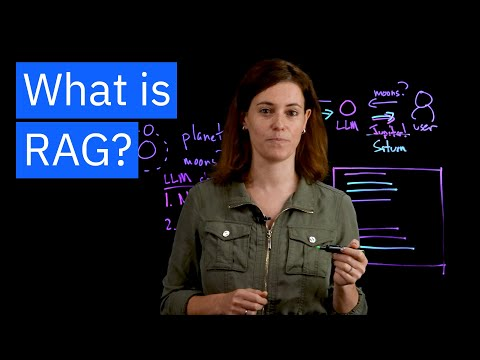

In [ ]:
# Display Youtube video: "What is Retrieval-Augmented Generation (RAG)?" (6:35) by IBM Technology
from IPython.display import YouTubeVideo
YouTubeVideo('T-D1OfcDW1M')

Below, we go through a few important concepts that relevant to RAG.

## Chunking

To recap our Deepskilling Week 3 topic about RAG, we copied and pasted a Wikipedia article on the 2023 movie _Barbie_, and we split up the text into a list of sentences. Each of the sentences becomes a "chunk" which we can use to feed to the LLM as useful context information.

When the query comes in, we use the Annoy vector index to retrieve the top 5 chunks that are most similar to the query. We use these top 5 chunks as relevant context to give to the LLM for answering the query.


### Why we need to do chunking

You might be wondering why we needed to split up the Wikipedia article into chunks, instead of just feeding in the whole article to the LLM.

The answer is that our LLM, GPT-3.5, has an input context window of 4096 tokens. That means we can have only that many tokens in the prompt. Any more and we will get an error. Frequently, we will have documents that exceed the token limit.

So, we have to break up the knowledge base into small chunks that can fit into the prompt. Usually, we keep each chunk small enough so that we can feed several chunks into the prompt, and we will retrieve the most relevant ones to give to the LLM.

The number of chunks that can fit into the prompt is limited by the input context window size. Therefore, the size of each chunk matters.

Ideally, each chunk should contain one idea or unit of semantic meaning, which is why we decided to use one sentence as one chunk. But different sentences have different lengths, and we will end up with chunks of different sizes.

It's possible that we may have a very long sentence that exceeds the token limit. Which is why we often use other chunking techniques instead of doing sentence chunks.


### Chunking techniques

Here is summary of the two most common chunking techniques which should be enough to cover most use cases.

#### Chunking by sentence/paragraph

We have seen seen chunking by sentence. An alternative is chunking by paragraph. Both of these can be easily done with concise Python code, using full stop or double newlines as delimiters:

    texts = text.split('.')  # for sentence splitting

or

    texts = text.split('\n\n')  # for paragraph splitting

Pros:
- Each sentence or paragraph contains one neat unit of semantic meaning.
- No need for overlap, thus saving on tokens.
- Sentence chunking works well with SBERT sentence transformer.

Cons:
- Cannot control chunk size, because the sentence or paragraph may be too long and exceed the token limit.
- Sentence or paragraph may be too short and not carry enough context to be informative. E.g. Naively splitting on the '.' character can result in poor splitting when we encounter a sentence that uses the full stop for abbreviations, such as "U.S.A."


#### Fixed-size chunking

With fixed-size chunking, we specify a fixed number of characters for each chunk -- for example, 256 characters which works well with the text-embedding-ada-002 embedding model.

However, this means we will be chopping up words and sentences in the middle, which means we need to include some overlap between chunks to compensate. We typically have to include an overlap of 20 characters.

Pros:
- Avoid over-long or over-short chunks.
- Better control of chunk size, allowing us to better manage or calculate how many chunks we can fit into the prompt.
- LangChain and LlamaIndex both have built-in functions to handle fixed-size chunking.

Cons:
- Each chunk might not contain one neat unit of semantic meaning.
- Need to include overlap, thus using up more tokens.


### Summary of chunking strategies

There is no right chunking strategy for all situations. The right method depends on the specifics of the use case.

The two methods described above are usually enough to cover most situations.

You are encouraged to read this excellent article from Pinecone which provides a comprehensive guide about chunking:

- [Chunking Strategies for LLM Applications](https://www.pinecone.io/learn/chunking-strategies/) by Roie Schwaber-Cohen

### Chunking with LangChain

When using LangChain to do RAG, we can do chunking by using "text splitters" (a method for chunking text), which are a special type of [document transformer](https://python.langchain.com/docs/modules/data_connection/document_transformers/).

For generic text, the recommended text splitter is [RecursiveCharacterTextSplitter](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/recursive_text_splitter). It uses a separator for splitting a text into smaller pieces. You can pass a list of separators or "characters" by which to split the text. This list will be used by order of priority.

For example, let's take the default list: `["\n\n", "\n", " ", ""]`

The first is double newline characters. The second is a single newline character. The third is a space, and then finally an empty string.

Double newlines are usually used as paragraph separators. Newline is typically a line separator. Space separates words. Empty string can break a long word into two.

Let's say you set `chunk_size = 100`.

1. First, RecursiveCharacterTextSplitter will break the text into paragraphs, using double newsline as separator. This is good, because paragraphs are kept together, as they usually contain semantically related pieces of text.

2. Next, if there is a paragraph larger than 100 characters, it will split off the last line(s) until the paragraph is smaller than 100 characters.

3. If this fails, then it will split on a space character, until it has a chunk smaller than 100 characters.

4. In the unlikely situation where a word is longer than 100 characters, this will fail. So it will now split the super-long word into smaller pieces of less than 100 characters.

There are other methods for splitting text in LangChain, and you can look them up under [Document transformers](https://python.langchain.com/docs/modules/data_connection/document_transformers/).


## LLM parameters: temperature, top-k and their friends

When working with LLMs, you will get to fiddle with configuration settings to adjust the behaviour of the LLM. Here, we will discuss a few of the most commonly used parameters, and also show you how to learn more if you want even more fine-grained control over your LLMs.

Below, we discuss **temperature**, **top-k** and **top-p**. But first, let's get some understanding about how LLMs work under the hood.

What an LLM basically does is that it takes some preceding text (the prompt), and based on that, predicts the next most likely token. It adds this new token to the text, and then based on this slightly longer text, predicts the next token, and so on, until it reaches the end of the completion.

This next token selected is usually the the most likely token among all possible tokens, based on its statistical knowledge which comes from what it learned and stored in its weights and biases after being pre-trained on the large amount of data.

If it always selects the next most likely token, then you should expect the same completion every time you feed it the same prompt. But not always the case, because you can adjust some settings.



<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQIAcQBxAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAK
CgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0o
MCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgo
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAGXArwD
AREAAhEBAxEB/8QAGgABAAMBAQEAAAAAAAAAAAAAAAMEBQIBBv/EABgB
AQEBAQEAAAAAAAAAAAAAAAACAQQD/9oADAMBAAIQAxAAAAH7sjJzorEp
IcnRqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHBWOwekYOSUs
gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHhzgAAAAAAAAAAAAD
3XQAAAAAAAAAAAAAAAAAAAAAAAAAAAABQnZdwAAAAAAAAAAAADlthkmg
AAAAAAAAAAAAAAAAAAAAAAAAAAABSncfc9JC4QlYsERdK5AVTTISc8Ii
Q8ISwekRIRER6bYJ9AAAAAAAAAAAAAAAAAAAAAAAAAAAAClO+bkRwTkJ
CXiqWioWSqTEZKRHJyXCudHBOcHp6RGgCfQAAAAAAAAAAAAAAAAAAAAA
AAAAAAAqY9AAAAAAAAAAAAAPC1r0AAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAHh6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAREoA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABESgAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAERKAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAREoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAByRnoAAAAIiUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEpXJ
QAAADwhOjgsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8KxKSgAAA
ArFc0D0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxjUJStdYvT0eA
AAAAAAAF/wAvPV8PEAAAAAAAAAAAAAAAAAAAADjdirQAAAAAAAB4WYkY
xqEple/tgdXSAAAAAAAALnnH1HFxgAAAAAAAAAAAAAAAAAAAAQVXeYAA
AAAAAAIqqzEDGNQlMr39sDq6QAAAAAAABc84+o4uMAAAAAAAAAAAAAAA
AAAAACCq7zAAAAAAAABFVWYgYxqEple/tgdXSAAAAAAAALnnH1HFxgAA
AAAAAACKtrXYAAAFvzjvMAAAAAEFV3mAAAAAAAACKqsxAxjUJTK9/bA6
ukAAAAAAAAXPOPqOLjAAAAAAAAAHzfZ1Z/r6gAAAbHP4bnNzgAAACuWC
Cq7zAAAAAAAABFVWYgYxqEple/tgdXSAAAAAAAALnnH1HFxgAAAAAUCA
7KR2WC4YXb10fT0AAAA1/Dw2uXnyyE5N09IwAckBPVd5gAAAAAAAAiqr
MQMY1CUyvf2wOrpAAAAAAAAFzzj6ji4wAAAAAK5ULRADwuGD2dWd6+oA
AAGzz+Gxzc9A7PSwTAAEBydVXeYAAAAAAAAIqqzEDGNQlMr39sDq6QAA
AAAAABc84+o4uMAAAAAAAAAcbteqA9AABYiOgAAAAcHZBVd5gAAAAAAA
AiqrMQMY1CUyvf2wOrpAAAAAAAAFzzj6ji4wAAAAAAAABVu+gck0zJmA
AAAAAAACCq7zAAAAAAAABFVWYgYxqEple/tgdXSB0ySchqgO8znd8AAA
Bc84+o4uMAAAYRCcFk8PToHJZMw+iI7uWZA53c2ZvGScG+SAAAAAAEFV
3mAAVSyegER2dAAAiqrMQMY1CUyvf2wOrpAGj4+XOu8zzd6zON30Y80I
92n6egFzzj6ji4wAODo9IisekhyRnRwTHJwXCG7lmQ3eSvM2D0iJiQAA
AAAAgqu8wADGM0skhGckhwXzUABFVWYgYxqEple/tgdXSAOmenjQB6zl
o6Z43kAuecfUcXH4AAUS8egAAAAAi3ed0eFiZAAAAAAAAAgqu8wADg9B
4enh0VSQnABFVWYgYxqEple/tgdXSAAJMwc7veYBFugAC55x9RxcfB4A
CkXzoAAAAAFeq83fC1EAAAAAAAAACCq7zAAOCkSHRETnhKSAAEVVZiBj
GoSmV7+2B1dIAAtRHeZNMx7oNoevoAALnnH1HFxgAcHp0AAAZR0dHpAa
hDdyzMVVZiM0kKBOawAAAAAABBVd5gAFMzCUgLxnkBdN0AAiqrMQMY1C
Uyvf2wOrpAAAHp4AAAAXPOPqOLjAAAAAAGYeFcslglOLuWZiqrMRmExG
QGuegAAAAAAgqu8wAAAACAlOgACKqsxAxjUJTK9/bA6ukAAAAAAAAXPO
PqOLjAAAAAAAAAEFV5rxtmIAAAAAAAAAEFV3mAAAAAAAACKqsxAxjUJT
K9/bA6ukAAAAAAAAXPOPqOLjAAAAAAAAAENbzuzTPWAAAAAAAAABBVd5
gAAAAAAAAiqrMQMY1CUyvf2wOrpAAAAAAAAFzzj6ji4wAAAAAAABVJSO
7lmeN2GZuGYdl0kAAAAAAAIKrvMAAAAAAAAEVVZiBjGoSmV7+2B1dIAA
AAAAAAuecfUcXGAAAAAAAAMQ1Ti7lmed2lM2DDLpeLgAAAAAABBVd5gA
AAAAAAAiqrMQMY1CUyvf2wOrpAAAAAAAAFzzj6ji4wAAAAAAAABWuxJk
yzgAAAAAAAAAgqu8wAAAAAAAARVVmIGMahKZXv7YHV0gAAAAAAAC55x9
RxcYAAAAAAAAAAAAAAAAAAAAEFV3mAAAAAAAACKqsxAxjUJTK9/bA6uk
AAAAAAAAXPOPqOLjAAAAAAAAAAAAAAAAAAAAAgqu8wAAAAAAAARVVmIG
MahKZXv7YHV0gAAAAAAAC75+f0/FyAAAAAAAAAAAAAAAAAAAAAQVXeYA
AAAAAAAIqqzEDGNQlON3P9fQAAAAAAAAWoizEgAAAAAAAAAAAAAAAAAA
AAeEFV6AAAAAAAAesmnBjGoSgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAA8PQAAAADHNM9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABES
gAAAA8OyUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjJAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACMkAAAAABATgAAAAAqEp6
SgrlgzzQAAAAAAAAAAAAAAAAAAAAAAAAAABGSAAAAAAwi2Zx4Rg0zwxT
TISMvlIpFgtnJSPDRN4AAAAAAAAAAAAAAAAAAAAAAAAAA4OTo7AAAAAM
AlPC4ZRmH0JGVyIgNctnBYMokOTg6BrEoAAAAAAAAAAAAAAAAAAAAAAA
AAKhEWCwAAAAAAACAnAPCMlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABy
dAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFeqj3QAALEzJmA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeGYWjwmIyQqE5IVy6VbqvOVy
QqlsrGsN2xMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADKODg0zOODo6
OC6XirdVpyqXCmRHpsjdsTIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAFa6q1YAA6Zd84kzAAAB/8QALBAAAQMDAgUEAwEBAQEAAAAAAgAB
AwQSExQzBRARMkAgIjA0IVBgIzEVJP/aAAgBAQABBQKpp4SqgqJOjVBv
VUeW6aQ4ppZpYVllA4qgyp6LJ1/j3BnLTR34Y+gwgMpwgb1ELShFTxxu
NLEJBCAS/wAe7syvFXirxV4q8VeKvFXirxV4q8VeKvFXirxV4q8VeKvF
XirxV4q8VeKvFXirxTOz/vI2YhtZWsrWVrK1laytZWsrWVrK1laytZWs
rWVrK1laytZWsrWVrK1laytZWsrWRAzqN7o/3UOycLa/PJEpay06ifFB
qDEtd0DNPm1n4hnvgGolXDchNLLUaMZ5Gliq3OWgOU6cZ5DRVRMBVPSM
p5b2mlOqGWYp46nIppSjq6aozGEkz8QpppWiau6uoNj91DsvGzznTiUR
03U5YmljmphlcqNjWNsumboEbDHHSsJQxNEJ0jG01OEyGm6S08OFtK1x
Ugk81GMjtEzPpWZRwOE1PBZUSQickcFsjwf/AENALRtTdCUGx+6tIV71
71717171717171717171717171717171717171717171717171710Mkz
dG/hm/mA/mI/5gP5gP4x3YVkZZGWRlkZZGWRlkZZGWRlkZZGQSMsjLIy
yMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIy
yMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIy
yMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIyyMsjLIP
IPz8T/8AIpL0D9VHJkf+JeVolFtfFLHcuhzfxdZuxbSnlxBq5Vq5Vq5V
q5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5Vq5VS1LyF+rMrR9
66EuhLoS6EuhLoS6EuhLoS6EuhLoS6EuhLoS6EuhLqQvyrN2LaXENvwq
T7H6uXt8KTs5Vm7FtLiG34VJ9j9XL2+FJ2cqzdi2lxDb8Kk+x4kkgxtq
olqolqolqolqolqolqolqolqokBMbfJL2+FJ2cqzdi2lxDb8Kk+x4lc/
+/w8Of3fEUlsil7fCk7OVZuxbS4ht+FSfY+WqJxOpneCTUSZRnnUvEQj
KSoN1Su5U1b9j4eHd53W0ZSyUn+rTZTEhdiF/wAM5iycxZObMnNmRuBD
EThJL2+FJ2cqzdi2lxDb8Kk+x8s8TSiVJeDxM8+m6A9P+SpupRhjjrmd
p/h4c35NncYaYoo6aneBnp1EGOP0yyWKKO1S9vhSdnKs3YtpcQ2/CpPs
eIQiTYIVghWCJaeJaeJaeJaeJaeJYIkzMzfFa1yl7fCk7OVZuxbS4ht+
FSfY8R2vOwFYCeMUD3B4Uvb4UnZyrN2LaXENvmLOTlGQtzEXJ3/D/BSf
Y+Csya7VWqonnKklzax6uRhepn008b5p6o45Jaifrllkkp55Ao4ivjHv
5w7NaALG5UzQNJP+RkjJjD5Ze30yVEURN+W53jcLsQ+qTs5Vm7FtLiG3
6G/M4/lELC7dHTe0m/5/wA6dQtNj7aj8FzpPsekytFnZ2Txi8ulh6aaO
xoRYnpwdnpY3jOmA0VJESwBaVOBE1LGIgLAA9/OHZOmA5RBmKKMYgeAO
gCwB8svb6bwDiIPIwCZOJGikdkIjqoLp5Akc1w43OD0SdnKs3YtpcQ2/
R1dXP16uurrq6Z3ZXP068rnTu7+ik+xy6rquq6p/8HZ+rfIQdXtJWkrH
fxJe30uIu5MxNa1trW2tawiy6MpYb3hjaKP0SdnKs3YtpcQ2/Vb/AJiJ
EujpozdMBOrC9dJ9hOLOrBVgqwVYKf8A0IWYR+Qndytde4PFl7fSZCAz
VkEUWqgWohZPVwtUNNE8jzwsd42+mTs5Vm7FtLiG36h6PCNrCzi5sbEH
VnaMht9VJ9j0mNwiLCPrumlKapeEZKoQc6lhJ6pxmEmIR71Ltp5ZWrau
QoxeokaSKYzL55e301Q3RFFKVPVXySVsU0rNe1RFTyM0j9KSUH1vpk7O
VZuxbS4ht+FSfY+Z4ZRJ4JM0lCxHgkA2i6FCGOEe9S7akimKoljkMYKf
E8lH1Zv+fNL2/HijydG6+mTs5Vm7FtLiG34VJ9jxCZ2LqS6EXiy9vhSd
nKs3YtpcQ2/CpPseIRfm40L3N4kvb4UnZyrN2LaXENvwqT7HhBMxBEeS
Me9RKrqBpoW/LNVpqpuoPcHzy9vhSdnKs3YtpcQ2/CpPseF/pEMIY4h7
1GuI3FRhI/QIZGVRA5FTX9Pnl7fCk7OVZuxbS4ht+FSfY8R/YeQVGzs3
iS9vhSdnKs3YtpcQ2/CpPsfq5e3wpOzlWbsW0uIbfhUn2P1cvb4UnZyr
N2LaXENrwqP7H6ubt8KTt5Vm7FtIhYh0ca0Ua0Ua0Ua0Ua0Ua0Ua0Ua0
Ua0Ua0Ua0Ua0Ua0Ua0Ua0Ua0Ua0UaihCL9Y/5WNY3WN1jdY3WN1jdY3W
N1jdY3WN1jdY3WN1jdY3WN0wdH5Vm7Ft/wAtWbnYrxV4q8VeKvFXirxV
4q8VeKvFXirxV4q8VeKvFXirxV4q8VeKvFXirxV4q8VeKvFXirxV4q8V
eKvFXirxV4q8VeKvFXirxV4q8VeKvFXirxV4q8VeKvFXirxV4q8VeKvF
XirxV4q8VeKvFXirxV4q8VeKvFXirxV4pja+8VeKvFXirxV4q8VeKvFX
ir2Qh/GN3/y7d/yQyhM3yTVEUMk0oQxRSDLFyjmGSRS1QRTftmb3/Jwj
ariIY6Wd2roNRVENZM3D69qqkonlP/08p/8AqzTmMVRUSGptRTTHUvNV
cPmORcUhaoqzkKuihlkaid5aSoieaskhmOlE5pY4eIFcH7UCY2Zv9HJm
L44aergUsFRI+nqHrKSB4VPTjDQcQeSaiqaeV6iOlk1YUc+iqQxQy3y1
zwTRT00cgNNA51Usd0eiJqZqeaWdqeeCWGh9mKseOrp6iYo77P2kgOJZ
mUUdnghDGBc3ZnaOII/4FhZn/kzd3KxWKxWKxWK1RlcH8G/XpHNM8jVE
TtPUBEEUjSAM8RHkC2OrjMwnjMmkBxgqAmJPvSyOMx1OOfUshq3y6kOt
XV44G/5B2fwktORs0Z3x0pxwR3PFHFLjxTYzEwYAkkUcUzBAxhIn3qiI
jd6czRRu8w05gTUbipaaV4W/5B2fx8ntLUxLUxLUxLUxLUxLUxJpwJRj
aHwf/8QAKhEAAQIEBgICAgMBAAAAAAAAAAECAxETQBIgITEyYTBBEFBR
YCJCkKD/2gAIAQMBAT8B/wCSpjcSyKLSi0otKLSi0otKLSi0otKLSi0o
tKLSi0otKLSi0otIkPDqn1iJM0NDQ0NDQ0NDQ0NDQ0NDQ0NDQki5oO9n
E4/WNs0zQd7OJx+sbZpmg72cTjao1XbFJxScUnFJxScUnFJxScUnCpLf
yts0zQd7OJxtYXHxR/K2zTNB3s4nG1hcfFG28rbNM0HezicbWEv8fFGX
yts0zQd7OJxtUVU2MbjG4xuKjio4qOKjio4qO8zbNM0HezicbXZCak1M
QqSWzbZpmg75FWQjkXIqy8UTja+kyO3WzbZpmg75f6qKIs5HRufnU9oL
7FmmwgzJE42vpMjt1s22aZoO+WRJCXzIknzIlkicbVFJoTQxWjbNM0Hf
PPWQqom/xiQxIYkzxONqhPo0W1bZpmg7510dMWaklREFbJSWwqL6zxON
r6T4bvats0zQd7OJxtfSfDd7VtmmaDvZxONqi/k0Jolq2zTNB3s4nG1R
CSCpK1bZpmg72cTja+k+HWrbNM0HezicbX0nw61bZpmg72cTja7oSUW1
bZpmg72cTj9Y2zTNB3s4nH6xtmmaDvZxeP1jd7NMyLIrOKzis4rOKzis
4rOKzis4rOKzis4rOKzis4rOKzis4c9Xb/W4jF0YujF0YujF0YujF0Yu
jF0YujF0YujF0YujF0YujF0Yv9C0/JMmTJkyZMVJfqHrwO3/AFD14Hb/
AKgn4Kbim4puKbim4puMCpuKs/D/AP/EACsRAAECBQQBBAICAwAAAAAA
AAABAgMREzFAEiAhMmEwQVBREEJgkAQigP/aAAgBAgEBPwH/AJgTNT5t
M1P7VWM1LIotKLSi0otKLSi0otKLSi0otKLSi0otKLSi0otKLSi0iQtK
TT4xEmcHBwcHBwcHBwcHBwcHBwcHBwSRd0C+HF6r8Y3DbfdAvhxeq/GN
w27oF8OL1XFa1XWKLii4ouKLii4ouKLii4ouFRUv6rcNu6BfDi9VxYPX
0v8AI9VuG3dAvhxeq4sHr6Ue3qtw27oF8OL1XFgr/r6Udfb1W4bd0C+H
F6rioqpYqPKjyo77KjvsqO+yo77KjvsqO+yo77Jz9VuG3dAvhxeq4tkN
SmpTUoqSWWG3DbugX2KshHIttirL0ovVcVbJsf2XDbht3QL7f1UURZyP
BdD7mpdUF91Fm2wlyH97IvVcX2TY/suG3DbugX2yJISJEiRJPzJCUtkX
quKik0JoavrEbht3QL758yFVEuTNSGpENSb4vVcVOOSafRwuK3DbugX3
rw6Ys1JKiIK2SkpS4HIvtvi9VxVsn4bfFbht3QL4cXquKtk/Db4rcNu6
BfDi9VxUX2U4JomK3DbugXw4vVcVE+ySCpLFbht3QL4cXquL7J+HYrcN
u6BfDi9VxVsn4ditw27oF8OL1XFTlDSo7Fbht3QL4cXqvxjcNu6BfDi9
V+Mbht3QL4cXr8Y2+G3ciy5QruK7iu4ruK7iu4ruK7iu4ruK7iu4ruK7
iu4ruK7iu4c9XX+N1eDV4NXg1eDV4NXg1eDV4NXg1eDV4NXg1eDV4NXg
1eDV4NXgV39haWmajUajUajUTFSS/wAQ/X0H3/iH6+g+/wDEE54KTik4
pOKTik4pOFhqlxVmvo//xAA+EAABAgQEAwUFBgYCAgMAAAABAAIDERIx
ITJxkRMiQQQQQFGhIDAzYYEjQlBSYMEUcpKx0fBi4QVTcHPx/9oACAEB
AAY/AoE4TDUTPC+CmxvIHU0UdJyuuBhVPN0l/lRa4gcKz0XaSKC5sMFu
HzOCiBxY77J0RuErKDxCwiKZSAthP9l2N5lVGlPaai8SIHCs9P0g1xu2
yqkbzlMynohhZ1f1TojaqnX5jLZOLhmFJ0T/AM5YWA6oEAzAkMSZaIEN
PKZjmOGidEbVN1+Yy2/SGJWYLMFmCzBZgswWYLMFmCzBZgswWYLMFmCz
BZgswWYLMFmCzBZgswWYLMFmCwP44HuxLsVYKwVgrBWCsFYKwVgrBWCs
FYKwVgrBWCsFYKwVgrBWCsFYKwVgsMD5prvMT/G2fyhMZxI1LmOcRxXe
YXaH0gw2Pxm7GWFlFDA08O83YnRCI1tUy0S1KitiMbU1tQk7ArtBkxxh
Mr5HTB/2S4fCZMtqBqUIANDnCZqdgFxHCmU5/RQy+G0NiW5reU1EfE/O
8ZifvFdvL6RSHSLTiMEGRIY5mFwk7y//AFCHKGXOaXCl8xh57pro1P0K
qhwwYdVN8fJRIoYDBhkgmeOF12t1PwPXlBURsOG00NDsXSULh08J8OvE
6J8Phs5etSggN5nzqE8sr+qkWEjhuc2l15S6Ij7O0+V1lFZy8MMab6qD
W0UONM6sVMNbRVTfm8p90P8AlH42z+UJsXGoNLf92UVhJlEunFsR7A/M
G9UGGcgQcPkZpxJcCQBh8jNRK4kQmIyh1rIROsqU2h72ObPmCpxd51dU
ycR7msyNPRFrZ4uLsfmZqO0xIlEUGbcFzzyln0KZEMWI5zBLGVkQIj3N
6AywWER4ZOqgWmnc7xDcZuh4SKi/aPa2KOdrZY4STzjzCSg0RHt4baMJ
Yj/QnRONEdV90yl/ZR4h++cEHkmYaWYfOX+FxHPc9wFIqlguMHuaZAEC
Uj/s1DZMyYZhYRInDnVR07of8o/G5NkWrKN1lG6yjdZRuso3WUbrKN1l
G6yjdZRuso3WUbrKN1lG6yjdZRuso3WUbrKN1lG6yjdZRuso3WUbrKN1
lG6yjdSwb85qQ/8Ah9179f0w7Nfr+mHXv1/TDsScf0ZirO2VnbKztlZ2
ys7ZWdsrO2VnbKztlZ2ys7ZHMcfyqztlZ2ys7ZWdsrO2VnbKztlZ2ys7
ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztlZ2ys
7ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztlZ2y
s7ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztlZ2
ys7ZWdsrO2VnbKztlZ2ys7ZWdsrO2VnbKztl5ajuq8/dYXRmJOFwnc08
US0fZ9D5/oqk/RM092HMMogsVKICxnUef/X6LGiZp3TXRdNl02XTZdNl
02XTZdNl02XTZdNl02XTZdNl02XTZdNl02VL7/hk1m9Fn9Fn9Fn9Fn9F
n9Fn9Fn9Fn9Fn9Fn9Fn9Fn9Fn9Fn9Fn9Fn9Fn9FzGY7xomadzdfBs/DB
qPDDRM07m6+DZ+GDUeGGiZp3N18GzwvOZLN6LN6LN6LN6LN6LN6LN6LN
6LN6KbTMe9Go8MNEzTubr4NnhT8vdPHuwHCTTZ3z7hqPDDRM07m6+DZ7
7s9JlVEkdiojrtZBL6VwzCAc5tTOe+u67Lw2gh4M6n/9J/w6YeDpxOb6
BReDDqbDwcapGcuihE4ktCd7p2i5JVfNPm8cWt7QZYZinw4EUvIhmov6
P6Iwy5zAZYvOI80C0zB69xvh8kb4fJG+HyRvh8k5rsRY4LhONQ+6UNR4
YaJmnc3XwbPfSmQQZgjoVGESI5zojaJ+QTIs8WtLd5f4UINeQYdinUxX
ta7EgKJTEcwRMwCawfdElPz9049FyupPmntbGdzTNhgSg0RC5vkQgQ41
h1VSDRjL2gAJvNgi5xnENyhqPDDRM07m6+DZ4XmE1lCyhZAsgWQLIFkC
yBZApDAe7qlj59w1HhhomadzdfBs8KarDosrdllbssBI+YTT5jwY1Hhh
omadzdfYkFNwl7Eh7pnuYBhEzbDe6n82LVHfD5qntDcCegXaQDSWNnXw
3NmuziqHXQ/GnD7vRMaQOKXOaSGlww+QTnhoDmOlzMIr08l2V8SgxeJK
prekjgjKksDg2QaT69F2ss4dMA9Rm5QU8QaA1kp1C/VdllytMIGqgvx+
ia7DETwsomv7ewzREuqe9wpYyfVcKI4zLZFwUfgHhhrTDBH5j1+iMM8r
XSm1mKDm2PvhqPapiRGtMp4qY9gtniBMoOaZg4j3Q0TNO5uvswxKYk1O
NIEvknmn7oNk11N29B80cG4snZMpYHVXwUSTQZHAyUIUt5rptQA5pYLL
iDhyyUqQBp7DPaLjYKYxHcIn3gC0f79FEAbLiOqOqiNdN3EEnEnFNdiX
NBAJPmuo5qpg9VRzSJmea6ZUX8luZOBqkTOVXVRRL4ubG+ElPmGEjIym
mhlTaW08p6INaJNGAT9fYZouIS8PlLBxCnN1pYlUsGCFxI1TnjNBrbD3
w1HtRjEc1o4TLn5uUFg5YL3RCOanCeATGRIv2ZeRU13pNMYI7jCMSkv8
sLTTmNiu4PEa3iTt9f8AbrtLWxXkCE372Iv1TWviRJcBjsHSxxUAdoil
reHOc6ainEvL+dwBOvuBomadzdfZuVOZmrq6usCrnvuViZ+wz26mYw+r
fJTFvezBkVn9Fn9FzOw8INR7UyASpOEwqZCXkqZCXkpSEvJYADuBa8sl
5WVLZnrM9fcDRM07m6+3V85LlBPcZNOCwaVlPts7sQCso87LKPOyyi87
LKLzt1RZCwbPmeP2QDcAPeyBkAs7lOqY6z8KNR7VTyAPMriGI2mdN0Pt
oeImObomzis5rY3XBMRofquGIja/yzVJisDvKac6oSbc+XuRomadzdfb
pqANU8VKoHH5qJ1aDWEJ0zBniovOBUm1EYb+2z2iJkaIBokB7iLwntYG
GlolOZ+aBfAiG2WV/K6dyPLWZ3CzUQ1j4lOYt6KKKHxGtAPKLIObY4qJ
r+3c7TuZDLWiGQ4zneyZSQKnBtR6KLBDqyyk1AdCcUGeRxcRLDp4Aaj2
sGkkEHlMionK5xra4VSDjIhdmd/DvIY+o28iPNdpY1p52ybKUjh1TH8J
8iyXTBQ4ThFNL5zm2m9/NRIVAd9pnmJTq3mhCHw4n2jvp/o9yNEzTubr
4Nnv4nBiNa2JjiJyPyTXB4cGNk0Px+qiGUE8TGbocyFEMB7WiJiZixlJ
RDPOAExl6WgKJr+3c7TubEDofLMAS804VMvhy+hT3cgcRIBokAsCCS0g
lwnfr4Aaj3nE4bOJ+aWKnLH3I0TNO5uvg2eFm3rcLJ6qREh4Uajww0TN
O5uvg2eFk0TKyjdTHhRqPDDRM07m6+DZ4OI6WQkbJr/zCaia/t3O1Toj
w4yBOA7muMMiE51IdNcwpZjI6IEimfTwA1HhhomadzdfBs8HHhiE59RJ
aRbFMZ+USUTX9u52qjQ2Mc5z2ECSb9m8dNFD+yeO0B83Ony/Mp7ocMCW
OAxcU+ucp8tV5eAGo8MNEzTubr4NnhSTYq6xucfCjUeGGiZp3N18Gz8M
Go8MNEzTubr4Nn4YNR4YaJmnc3Xwbfwz6jwf17xomad0nWV3K7ldyu5X
cruV3K7ldyu5XcruV3K7ldyu5XcruXLfz/DMVg9wXxHei+I70XxHei+I
70XxHei+I70XxHei+I70XxHei+I70XxHei+I70XxHei+I70XxHei+I70
XxHeimSXH5940TdP0uNF/wAVdXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1
dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1dXV1
dXV1dXV1dXTuYK6urq6urq6urq6wxXNf9GOy/v8Aph2A964wzOlxadR7
2EyI6Tohk35p0SKZMaJkpsRhm1wmO+Ixt4Zk7ubDe2JzENBpwn+Luw+v
n73tH/3v/umyjMgtnzPd0HyQgiOY8NzC6bhiJLtM+0OhtZFLW0gTUzS7
tHF4APSc5TUSLD7U6I4DGpo9EyFPkMEul85hGFP7Pg1S+c1Fi/xw47Jn
hsALdPNdlhQTQ+OKi69Ikuyt47okOJEpdUBOxUZn8Q6BDhGnkbi4qKyI
a+GcHylUF2SG7rXj5YJ0KK34DSY3zd0/zsv/AB3Z4JpfFhjmllACgB8Z
0aFFdRzgTB+ijObHdBhMeWNDAMZdTNf+TixZOex3TryhcUdrdEjAT4dH
KflZdid5x2H8Wm0p2H1QbPmPvIghOgFrojn8wPVQIpdC40InDGkzUPtB
iMmAWlksJKNMzriF6jiMXUmKYlTBi3Gc/ouG7tUKKYkgxsIYvO6hx+zu
aIjQWkPsQnx40QEuh0Sb0xX8IXw2w6aK2jEhdl40QQ4rDJsUDlGHXVdj
a6PDiPa+qmGMAJXKiROzOZKJi5j/AD804xolb3GfyGi7PFnhDq9VEaJA
vF12UMeGx+zgBrpYHCRUOJ2pzJQ8WsZ5+aiHszofDiGotf0PyXa2R38Q
RzM9Oi4RjQw23EA5lDodCDIbw8VTnghxaav+NvxXiQs3Vv5lOGC57rBE
k1PNz4GpkNjXeYHsSImF9mxrdBL9AkgCZuf0pSDLqVd/9RV3/wBRV3/1
FXf/AFFXf/UVd/8AUVg526n+hDK6iB7ITWszGv8A6TjWJNEzonkmdLap
KptlS14JQdUJEyUVtuGcdpqlrwT/AHTXVYOsnht2mXcf5QoLRZ5M9lGD
/hsY125KeKXhzROUlAZQX1w66gNP8r71M6a5YTUd0MOJhtPNLCfd9T/f
9C9qH/slLZGJwzUGForfOajQgag9mDj5ykpOaWGygQSwAQpc07y8k2FQ
JNi1VT6VTXbZt5X8wM/+IH7Ls02Boh805/LooEKgShuxdO4UUFvK51Qd
PuP8oUN0MgPYZidiojnlvEfTawAKL5/cpXZnNLSYcPhmf0/wi0CGWF1V
RGN5qPBhuYGRasTcT7vqf7/pCvp1Wb0Wb0Wb0Wb0Wb0Wb0UmYlS9z//E
ACsQAAEDAgUCBgMBAQAAAAAAAAEAESExYUFRsfDxcaEQMECBkdEgUGDB
4f/aAAgBAQABPyEhGHcjiVRojxYFT0D49rrDGMlmC7fMRlKGDADBuV0P
Ip0Dmi9kfNgYDYcBmRIQwPMp7qnkIyxwGJOHwgeAAWDcev8AIC4d4lk4
ZErn3OpM6AgZUXL3vuITaCg+ZJnjJOWSGQyBJGpTbMC5wHAKqcQE6Bge
yf2GMkBzQ7CpTICk+bJn9v5CgA6rkVyK5FciuRXIrkVyK5FciuRXIrkV
yK5FciuRXIrkVyK5FciuRXIrkVyK5FUQPQ/vAIAKR0XDLhlwy4ZcMuGX
DLhlwy4ZcMuGXDLhlwy4ZcMuGXDLhlwy4ZcMuGXDLhlwyDQAaBUJ2sD9
23TJHMEEASLtymT17iUHMbBFCsbAwVnYGv8AKpKAItQH+pkWPSQuJJAa
iMEpGAl4dDeWSwDsQYrIReQvimSzUmUI+EGvszCYRrtcSIehooykl5hA
MxgCEYYZ5lwRaEB9qOwOC7ZELEKkiQBBNYpEBEFwnrCNkVngmxcWZq3V
cdQtzEA2DH4TIgZNP1NUc4wDMcGBFkz55AEBrOlZQ5ADSXpB9qqJHaA6
mYEGMFxHwJoeYRyJJnJyWRBYolY6DnDmdKx2R1KxSxsWb/U1GDiFJ6Df
7T48Nwy/d7pkiwLEDBiQUk2ctqHDQgTdhwaLPRxAwZHhAH6ANE5eGsiA
flHidRYpNhDOVUhabMGJB/xEbOABgliXILhlMoi7icuqiJU9hotk5jMl
G4IdTELVCghg4BwxIh+6MYEYGrL6J+4gmAk0MBYLoaNulgD8umDe7xgC
c+T1wdCCJhLNcHnqqCOQGIo9G+EPhcIvYJyRNoXKEFwclGR3Y4DpUd3R
BZmWu7Bp6OXQX2TGiT3gmUvpKAs9AMggF7sXEEkO4fFRkADI9hDiVFIk
71Z2fB/DcMv3YjmCcsRb1m7u7u7u7u7u7u7u7u7pGcAGshQAQAQP4cne
D7/zFoZ8LfzHceNv5i8c9rfzBvmGuH8YMc2XIVyFchXIVyFchXIVyFch
XIVyFHVzsUWXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIV
yFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIV
yFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIVyFchXIV
yFchXIVyFchXIUHGL9QPDF1osPKc6GR0AQoc+H/E0wJijNZGhBGbtb+J
IBDGQiFXHoXYdPLIXylLGyF9TEPbHJAABhAH8Vubldh08BR3NAEXvqry
ryryryryryryryryryryryryryryryrymDB1CP1jgx8hmUxVEHIJtAto
FtAtoFtAtoFtAtoFtAtoFtAtoFtAtoFtAtoFtAmpg5Z2Yjx3Nyuw6elz
XafrNyz9HW6jXx3Nyuw6elzvjp+s3LP0dbqNfHc3K7Dp6XO+OnpXIFL7
5K++Svvkr75K++Svvkr75K++SvvkmbrHm7ln6Ot1Gvjubldh09LnfHT0
pCI0AN5RMgz+XhXFyLDl4bln6Ot1Gvjubldh09LnfHTzg6QOrB//AAI5
XbBiQUJToKgAQDRBhmjQ76qiWzR55RYBCub2TIlmZAwNNRiEQ8kZJxha
LTy2cJwYCDhH0xyYCACMlnC2Ag+7jomClgDXdGdB0JwQ4gzgC7hECE0E
qU4LyxUpwXlipbggyUsqMZIIJoz0AEEd2sYH7W5Z+jrdRr47m5XYdPS5
3x084DIEV4GKA8S0R0B7o6ibQwIQAvfsALuGlHZM8LXFjUOnxPTaSzOD
hACEWEgIk2CKCEAG8osOhkRAmQDsmAsnpCCSRGZQmNwEnMmpKC4UZE7l
iPhiyGbEMRqfyY0Cjx/4nGyoBZbln6Ot1Gvjubldh09LnfHT0raEF/Ez
BafmgAAECQQDAeXLYeG6PDcs/R1uo18dzcrsOnpc746elAHJsDBn40ow
iwwMytqH0e5Z+jrdRr47m5XYdPyxkLlP4h+DSXKAkBqPJ746eTmQQQyA
+xPug86weD4QnOEWkyzFCYAJcENWaoRCMbrwAPmf6hlAQ8B1qTEOmjpG
1hEgZqvRAB8JBnaGkjINpYFxgpp9oFj0xiQch3itZUPtkiTIhWIImULh
kIMWUydSpfNpxv7CuyaPw7XonMcyY2YZXNk1kqXCS0lPAEzGhPY7px08
A04SWBYScbC6LK4ohvO3LP8AI8ALgJmGfYogAgINCPwIzhjWQmexQ0AT
gxH51uo18dzcrsOn54EJMIgh4YICRo8NNvbFNK0AOKEEQcpMjGDsqPIY
PZCXe7J6WQAaa2Z0T8p0swHBcoCgZsDQyAONNo+y6pMUXDHj8O+On5Af
FQsHQmUEkEY+BBCeHwJBOhATJQZI6xkYwT4CYmSGT4J75gGYY+gTWYjh
IBBVlHhViBOeZONAjJFknnrM9yhLm+vNd/qrkR2RoAVeQg9sjNMzIhdE
aBD3AsDALs2g8aKPR6I1rIxiChIQM0x93QA0cT1JLk/KKFIUBqKl/dD3
YTCX87cs/wAsbkTSQpl4B4x6ogktZMyCcx2AiEYvNkMAkV8XqfPj7VQc
wAiUiRI9zB0KaSpBkjxxIBRRRnEZOOiEEfBrcuRaWumGRXIgGB+NbqNf
Hc3K7Dp+eAZcANKrukdQM5uqACGINREhJJOcUEIIAasUAsAhk6dEmKJy
zYIlIeKk0VVuo/h3x08CQKlMzCZmEzMZJmYyQEsiYseY/wBCEIgJBwRj
5s1KbjFWy2ymKQ5AGf0m5Z/ldTBCZAJgQ6JXDUwheyWEIBZFTCENYYzM
AgCgAhk4RAzACXsQh40hKoRLkn3/ABrdRr47m5XYdPJzO2E6wmQRAHII
FEQAs1RRD3NDtAUZMIrH598dPDueBErvKXZjmnXxT7ma2ofNbVXdUIGA
IiJjiLsygpAJgBgPNJ8dCKrbj6RMgsMz0u5Z/kUAupGCAShCBAVJA7Oi
GQq0E5uxRiS0F4wNFF9RBGpw6opIjkv8I6GNSFwiMgL00Mz/ACrdRr47
m5XYdPJx+LNhkp4UHzD2RUJoFpohgYGFPHGEDR0cVGKoFvzA9G/Pvjp+
VTRiTFCyBMAPId7hRFCTY8eydpAcSMOwVFZIuQoPMufZ0O7TFBEXzmMA
6ExkcUCDMs9KVRnHGAOYXZNH4YAYMB5ZkaKp8pbBw/H/ADqUw409IIEB
Uhn96J8DO+xBszpOI9BuWf5HaBkYAxqHhAmgYEkF2jCEwxYHh745CBS4
N3UzV6KQgc5lfGdHTHIjaEzqBVkiiBnYoWX/ABRomnbLddJ/Kt1Gvjub
ldh08vASAQCWNfK746eeczA58mmJlb5TNlAhIHEi8k5/aG14cMezFv8A
qJqAEmWDhOQEI5d9QsGT3mqc2DLsmj8MDPATB0ZWbKB8QIlwbGScckYC
xmiw7BupKgnYPnqC/wDzJAwCrefuWfmP2hH3LC0Wdpb8q3Ua+O5uV2HT
0ud8dPSlgwcRCuvgjFWPLk+l3LP0dbqNfHc3K7Dp6XO+OnpTjPGrAJmp
+n/KCGh6Xcs/R1uo18dzcrsOnpc746ejAwgC4zQAYMAt6hdk0eGrQcA2
HLsO3uiYOaeEbOHclgWyJU0cgMpGNi4wRyKQO6o9BuWfo63Ua+O5uV2H
T0ud8dPRl5YfwddkxUjOy/oF2TR48Yxr2pGLo0c4udsFTNMEMaATc2IO
0h2h56ogLiIJT9r49F/xPgV939BuWfo63Ua+O5uV2HT0ud8dPSmxDXcY
FZDjkA6MSLEhl6Xcs/R1uo18dzcrsOnpc746frNyz9HW6jXx3Nyuw6el
zvjp+s3LP0dbqNfHc3K7Dp4DJ6OBLd9P1lE5a3o++A7+O5uV2HTwMhOW
CL9H3C5MfS5MfS5MfS5MfS5MfS5MfS5MfS5MfS5MfS5MfS5MfS5MfS5M
fS5MfS5MfS5MfS5MfSfGl2Kv6wABAOCoULKDqFsfotj9Fsfotj9Fsfot
j9Fsfotj9Fsfotj9Fsfotj9Fsfotj9Fsfotj9FsfohgAFMnjubldm/i3
DkPI8wCWgkkYJKQ0t4S0VorRWitFaK0VorRWitFaK0VorRWitFaK0Vor
RWitFaK0VorRWitFaK0VorRWitFaK0VorRWitFaK0VorRWitFaK0VorR
WitFaK0VorRWitFaK0VorRWitFaK0VorRWitFaK0WHGIFR1VorRWitFa
K0VorRWitE5STsFASAJyf4zt1NX8wMzFJFT181kAgTSMfNhT1kVLpPaC
YVOdmcGniSQtIsSAdD4BAC6J5Un9u0eLtV5wd9pNKD9RDodWaICkBUAA
iU2JP7gM3BhFTAMkMVcHdBiUY1E1YI93WImLMk/dDA8MeaHR+FAxm2OP
k6JBzDGCBLXkJrhDmSM4AiEYYRFgsHJJIMSn3CCK/BwWzqFHOBaFSaxF
wUaIG4RAQWCyhiz4m5lcgZyE/lFYMyQQQEQnMkkBQJAOOCbPWcApujwi
l9L8fqHV0xAIiD7/ALaWgO3umivDtVVFtUsPMMiTEgOdoKdISiwBuoN1
WetDCIMHOFA9ntgDgi4wC6daQ/PDAuBJlGMZITyai7Y4UkKeCcDCtCBb
TMIjUoD8o1fv/SM80QnhNsgyeQ4sE+WodGaGYRbBSLaMGtggNEShmxkA
dIAWYszlVzwioAjIp5xyNLRZxNjRGPmdmepIZ5IomZAEIA/8Ta1Djnjp
QG/ZCGYFCuXzBlq/akoOyD7TpMASnKr5NitQz7DIehJCBUEE/gZBEqCg
ZAc1a/gQKqkCT/KCLYzgqmKGbjVM3GqZuNUzcapm41TxTm5nVMRVoeoj
+EpUFsAlg6KWMSqM7oAtQENm6XTm48CrS2iBil1mVdQgXarZrKhJu7N8
oWiYBEFjB3dCxQDj6ZoJANbmnU3EgZp9+G+ZlMfMHsIrMWoBy4P+BErA
0cmxx7KK0cmr2h6IX8EL4QuZn6wh40kIiICNxNlV3y/hQcYSTqwV+ESA
1jIFoyaOqgWQVOA6QG6lUpDEDhWE+0jxBmMFZ+1gKGFOEujo6MghFIQg
gW3JovMN8sUZwAoMDsQpSZABqDw3zMq4FHAEEH5QQeZM+RNepTIDGH3R
8YwODvWN6o4QjJC8DU90+cIwc2GxklAwDJVd8v4szX8RLAOxvstsltkt
sltktsltkjLhwwzJiKsk9TPk/wD/2gAMAwEAAgADAAAAEABIAJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJBJJBJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJAkkkkkkkkkkkkkpJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJNbbbbbbbbbbbbbRpJJJJJJJJJJJJJJJJJJJJJJJJJJJJF22
++2223++2/8A9+SSSSSSSSSSSSSSSSSSSSSSSSSSSSRN/wDf7/fbf7b7
/wD35JJJJJJJJJJJJJJJJJJJJJJJJJJJJCSSSSSSSSSSSSSTJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAJBJJJJAIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIBJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIBKbbbbbbbbaJJJJJJJJ
JJJJJJJJJJJJJICSSSSSSSSbIBD/AP8A/wD/AP8A/wD+pJJJJJJJJJJJ
JJJJJJJJJJv/AP8A/wD/AP8A/wD5IBD/AP8A/wD/AP8A/wD+pJJJJJJJ
JJJJJJJJJJJJJJv/AP8A/wD/AP8A/wD5IBD/AP8A/wD/AP8A/wD+pJJJ
JJJJJJCAAAABJJJJJJv/AP8A/wD/AP8A/wD5IBD/AP8A/wD/AP8A/wD+
pJJJJJJJJJH/AP8A/wD1JJJJJJv/AP8A/wD/AP8A/wD5IBD/AP8A/wD/
AP8A/wD+pJJJJJJAIIJ//wD/APIkAgEgm/8A/wD/AP8A/wD/APkgEP8A
/wD/AP8A/wD/AP6kkkkkkgEAkP8A/wD/APAAEkkgm/8A/wD/AP8A/wD/
APkgEP8A/wD/AP8A/wD/AP6kkkkkkkkkkCW2228kkkkkm/8A/wD/AP8A
/wD/APkgEP8A/wD/AP8A/wD/AP6kkkkkkkkkkwHkkkkkkkkkm/8A/wD/
AP8A/wD/APkgEP8A6/8Avf8A/wD+pJJJBJBAIJJ/xABJJJJJJJv/APv/
AP7/AP8A+SAQ/wD+dFIxv/6kkgEAEEEAgn4EgEkkkkkkm/8A+534/wD/
APkgEP8A/SAAcjP+pAAAJJJJJJPthJJJJJJJJJv/APvvvtv/APkgEP8A
/wDxgAf/AP6kkkgkkkkkk80kkkkkkkkkm/8A/wBt/t//APkgEP8A/wD2
39f/AP6kkgEkkkEkknUgkkkkkkkkm/8A/wBvsz//APkgEP8A/wD/AK//
AP8A/qSSSSSSSAACdSQCSSSSSSSb/wD/AP8A/wD/AP8A+SAQ/wD/AP8A
/wD/AP8A/qSSSSSSSSSRESSSSSSSSSSb/wD/AP8A/wD/AP8A+SAQ/wD/
AP8A/wD/AP8A/qSSSSSSSSSS0ySSSSSSSSSb/wD/AP8A/wD/AP8A+SAQ
/wD/AP8A/wD/AP8A/qSSSSSSSSSSeQSSSSSSSSSb/wD/AP8A/wD/AP8A
+SAQ/wD/AP8A/wD/AP8A/qSSSSSSSSSScCCCSSSSSSSb/wD/AP8A/wD/
AP8A+SAQ/wD/AP8A/wD/AP8A/qSSSSSSSSSQIySSSSSSSSSb/wD/AP8A
/wD/AP8A+SAQ/wD/AP8A/wD/AP8A/qSSSSSSSSSSSSSSSSSSSSSb/wD/
AP8A/wD/AP8A+SAQ/wD/AP8A/wD/AP8A/qSSSSSSSSSSSSSSSSSSSSSb
/wD/AP8A/wD/AP8A+SASf/8A/wD/AP8A/wD+5JJJJJJJJJJJJJJJJJJJ
JJv/AP8A/wD/AP8A/wD1IBJ222222223ZJJJJJJJJJJJJJJJJJJJJJ+2
22222227IBJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIIAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAIJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJIJJJJJJBJJJJJIBJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIJ
JJJJJJBIJJAJAJJBJJJJJJJJJJJJJJJJJJJJJJJJJJJBJJJJJABBBIAB
ABJBJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIBJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJItttspJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJIIAIJBJX323pJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJBJBIJJW323pJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJIckkipJJJP/EACwRAAEDAwIFBAIDAQEA
AAAAAAEAETFAYXEgITBRgaHREEFQ8JGxYJDBcPH/2gAIAQMBAT8Q/wCY
smTJkyZMmTJkyZMmTJkyZMmTJkyZMmTfOmsdH5szWmfmzNaZ+bes2/r+
LRwAAAAAAIfGDhlaFgsFgsFgsFgsFgsFgsFgsFgsFgmG06p8Uc/xkuho
56p8Uc/xkuho56p8Uc9KYYFZVlWVZVlWVZVlWUQ24qXQ0c9U+KOelEB3
CAMDxZdDRz1T4o56WPhRcWXQ0c9U+KOelEWcuEJgOLLoaOeqfFHPSkHJ
X1fV9XFcVxXFcVxEklzxZdDRz1T4o56UFoiSryvIF77hPAo5dDRz1T40
AByijA6AA5QLhxwZ6U/TOjvqOXQ0c9U+NJLEdtyiZgC73RAB/cokh3e/
+c0dgzzRO4FjR990S7hZxunsTx4RFLn2R7s+2X/8W8O76J6U/TOjvqOX
Q8YaZ6p8aSB2IWwzJkogFMIRA7kIkLkJgmTB7IAIGielZDGFaVpMECkl
0NHPVPjgSUIEGEQyUQbErcZ9c9KAAcpnJ3TbLMaWXQ63T+j8GeqfGt2w
fZOHA9rIsCTsiEZ2s3+pwINCeFk4bXPSn6Z9IKWXQ0c9U+OCw4U9Kfpn
0gpZdDRz1T4o56UBDJkpA3NLLoaOeqfFHPSuhzCv9kQmNLLoaOeqfFHP
Sn6Z9PZill0NHPVPijnpT9M+nsxSy6GjnqnxRz0o2AJHpGCdqWXQ0c9U
+KOf4yXQ0c9U+KOf4yXQ0c9R78UZb/jP9qOeohOFiVoK0FaCtBWgrQVo
K0FaCtBWgrQVoK0FaCtBWh8aQFtwrgEzk7+Uzk7+Uzk7+Uzk7+Uzk7+U
zk7+Uzk7+Uzk7+Uzk7+Uzk7+Uzk7+Uzk7+Uzk7+Uzk7+Uzk7+Uzk7+Uz
k7+USIYBv7CxADk/kPwE/kPwE/kPwE/kPwE/kPwE/kPwFukBPG/iAjnx
qf0/UP1/EBHPjgfqH6/iG8JaVpWlaVpWkd9sCePwf//EAC0RAAECBAUD
BAICAwAAAAAAAAEAESExUXEgQGGhsTBQ0RBBkfBgwZDxcIHh/9oACAEC
AQE/EP8AGLhOE4ThOE4ThOE4ThOE4ThOE4ThOE4ThOE4ThOE4ThOE476
IxTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJkyIQLh+9yDOyDvcgzsg72xCi
oqKioqKioqKioqKioqKioqKioqKioqKioqKYn+P42Tn/AP8A/wD/AOP2
PtjxlDIJ6E9CehPQnoT0J6E9CehPQnoT0J6E9CehPQnoTCEDin27+pzY
8Zkn27+pzY8ZObFPt2hFGBaK0VorRWitFaK0Voo6wdWc2PGTmxT7doQg
CekAYHqzmx4yc2KfbtCk9KV1ZzY8ZObFPt2hCLadITDqpzY8ZObFPt2h
FXJahWoegtttiROerObHjJzYp9u0IFoiZWqVqlD3C4TxRk5zY8ZObFPt
gADlF2LAEXKBcOM8voucG4OTnNjxk5sU+2EljO0SiYAAu+v7RhB/cokh
3SNdJOjAcmBqiYgw0o/XRMQWcRjZPYRMJfARkIJ4OjMDwar/ANKIOL/3
mUfpfBuDk5zY8dYYZsU+2EgYEKEzJk2RAzTBBEDEhExchME3umPZAJBm
UyGMQtLdaW6YIhHKTmx4yc2KfbHt1NTIAYBEcyjBEqOz5xAAcHdaDfyg
ILMcrObHjG6f0fozYp9sbmAeCfOAZabosCZgiEZ2b2b9pxDEydFk7N/v
OL6Ln0k5Wc2PGTmxT7dFgY59fRc+knKzmx4yc2KfbtCAQhqlMgucrObH
jJzYp9u0J0OTBa+3/UQmOVnNjxk5sU+3aEfpc+nstlZzY8ZObFPt2hfR
c+nstlZzY8ZObFPt2hQQEx6BAmHtlZzY8ZObFPt39Tmx4yc2Kfbv6nNj
xk5sRx2yZsfbOI8ZOb5xEP3EKAWkFpBaQWkFpBaQWkFpBaQWkFpBaQWk
FpBaQWkFpDtvgWLhaw38plG/lMo38plG/lMo38plG/lMo38plG/lMo38
plG/lMo38plG/lMo38plG/lMo38plG/lMo38plG/lEIYBv5CxAcTqD4C
dQfATqD4CdQfATqD4CdQfAUcwPhQj8QElz+sT+nAOB+ICS5/WFvXgHA/
EIS6PC0eFo8LR4WjwtHhAngCjA6P/8QAKxABAAEDAwIFBAMBAQAAAAAA
AREAIfAxQVFhwRBAcaHxIDCBkVBgsdHh/9oACAEBAAE/EJY1kGLGi9w1
omxYyCmk4CGERahBFDt2ATfYTLQ6UKQ5fWsY0K4NbRSVeq4kiUkNwGra
moJBkcbiS1o2ebTSqk1D0SsIbF0bFqBtgkUFaE8jm00kB1SxBortraPz
/UJtZkkki9bLrTeZSwSDM72V5jW+t6EDuIYJVuTukTEtlqvNYyLWJlhs
XJftqXP5igBZte8XvRyVmGCEyaapzanbYQZxcUjtYWtpU96VTgMqGAgA
vV0TmVSxIcNhcDry/wBQNEt0kFfCa+E18Jr4TXwmvhNfCa+E18Jr4TXw
mvhNfCa+E18Jr4TXwmvhNfCa+E18Jr4TXwmvhNfCa+E18Jp9HzWB/nDI
kQzA3BwFfG6+N18br43XxuvjdfG6+N18br43XxuvjdfG6+N18br43Xxu
vjdfG6+N18br43XxuvjdfG6+N18bqQ3UKC8jTgIXDiQf5vOcKjBJkRAk
WgWi1+lM+1A0DXAsVhSWdNaNiR9G3IFgAqTItrSKblMsfeLJf+KFAFrl
QWYXLDZHpSupi0UZAhlckI9CCjOVFBqO6CBGW5F3Ef8AgBIIlNhYsLaw
ppEQMBSKoJIkYJEsaUxOk6PAGyEIVMKFy9aDvuNGAgBAS6BJVgJUtKLF
iVmZmpECWTcYYDoIprxKubKYAks5CdGxBJaM6tcMwQG2k1OptzE41YA2
ZITwU3GsoBpSLrCyy0tS6Yi4uL0d9J6VNywYTlpX5Nrmu1+XxwagHYMC
YZvFKVtmIagF+i5YLXdlAQW8o8UuTZ1najEJzJUookkUsX5aQJncKdOD
oxeGYtIVNCRB0GtREWCEN2rlvswW5sQpEXAjyCQxu19CUTeLi7WjpWG4
fzec4VCEJEkqUiZkb7tC8qxFgWi1g1mmw4AqQuKSAlKDm9NCYETJC42k
z0mpuZ41QQjcU3kYLa02WCkXkgIqyiBm40rYLJFwHSZkVK15rIwIiQi0
kWdZm2ZJWJUvWWxAaAFqXDEpXkGQQJC09b0itsoWGLBYXHSNaukBMxtM
bBujpQ9bl4hAztM2wju0EMs5uZhNWkhk1i1LIgtYsrCUL7lY61KU++pK
zZG5AG9oUZjoPyCZKiK6AG/LIrKTweFxYYCyDCTWWqpHSAQItrejqrtS
+7tSTW9bNR3sEBDZNv2mkJAFuEKDcqToNHwvEOdKS4LSJEvSCOdGEpDW
K3mdLReYi9MQ6SRDqtVP0PSkqlJtpfpQSJQBH/aTQ2iLU6VhuH82uy4p
hv4InGlRn9qjP7VGf2qM/tUZ/aoz+1Rn9qjP7VGf2qM/tUZ/aoz+1Rn9
qjP7VGf2qM/tUZ/aoz+1Rn9qjP7VGf2qM/tUZ/aoz+1Rn9qjP7VGf2p5
a0EI6Ea9f9onIYHAf0fZiFLIn/z+sECH7Tvr/h/WIRD/ANL4P6wxIRBt
0vof4/rBCEQbY1aHQ/phwIWDlehvXDj9KxftWL9qxftWL9qxftWL9qxf
tWL9qxftWL9qC0wrjr6NqxftWL9qxftWL9qxftWL9qxftWL9qxftWL9q
xftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9q
xftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9q
xftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9q
xftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftWL9qxftSAjN
iBfykeBBr31+kPxf7Wn1B4J2npTlHS0r56rZ3/ZUoYJLav7RzRqdQu5d
HDnfa13+kMhEIRJGmboLi3Ft+GSsjw+2bAiKSDc917al6nzhlAvF2OW+
ixMkhAQAQB/SvaqMjw8GLlvVNKSIODyVjGMYxjGMYxjGMYINJTxMXhP4
wGUiANxgP2lApbbJD8utdVV1VXVVdVV1VXVVdVV1VXVVdVV1VXVVdVV1
VXVVdVV1VUxAjEisDwkx4+1UZHh4ZfR8n7j/AE/jMvx8nkeHj7VRkeHh
l9HyeA5fxmX4+TyPDx9qoyPDwy+j5PAcvKiiDoar6BWYdqzDtWYdqzDt
WYdqzDtWYdqzDtWIdqCpG/3WX4+TyPDx9qoyPDwy+j5PAcvKp4oQ4Inv
9q4rMw6z9sWWBdLn5jaHR0sxNZfj5PI8PH2qjI8PDL6Pk8By+8NUAnTD
+U/FD8yUjiesWoIZykgqi2kgg81omuWRMIelmSJ0gord1JkDZKSUupRg
bS2QK4CC9BhcQlilFldKkqrzXtP8vtexf7QD39YX3BF/dAYqkVTumAFp
mDXeiHEKBzcABSYWCUEkj5Awt0CklAPMKIIG6QohZHepx4FQKwdCr78C
/REF/wATG9X30EX6Igv+Jjers3ILXdIgv+NKSKsImu6Ra/qVNDAlBn8X
OppQ4gW2wme6kkbjW+uX4+TyPDx9qoyPDwy+j5PAcvvQn/r2wSI7iJCK
VahwVnbEQXSrKsbABUIjiQSvUjHq0ArRMAiAkb7UuEL4KolHorxuqQ3p
oesBWLQKkDHEkN61phoIAL+qcxPLmCH/AD7UvogLyzNLMEQBXcNqdZJu
Z6uCQMlBYFsazKQkMqrdb0mWVISRU0hENoOshfmLciyrEF1W1vqNCYrQ
vdXYbu3rAuTELcAbHsON9W9Zfj5PI8PH2qjI8PDL6Pk8By8rvO+DMV8n
/wC18n/7WqD0rHax2sdrHax2s9rRYgEB9sIMFcLwVCeJXwy/HyeR4ePt
VGR4eGX0fJ4Dl5UlJqmpQSm+p+q+Kf8AK+Kf8qYS2kJfjU6U7JCycST5
PL8fJ5Hh4+1UZHh4ZfR+gSh9ArQhN2N/o0K1dQgNWWoQ5IYZ+zgOX2ds
ZuEZS0lALoh5ooVlUk8qbYSQTJFtSRAzgCZpIMEQLcbM0tUm6roadV6V
F5jCgTNqXhEt2LoFFDptRNjKQVqXqQ25Q1NJVQeoLeCkb5kYkWEVcOhK
aBBAQS0QAd4Q2WtdbAgAzwIAmgXLa15DgWtAcyIA6DPSiHDfnSDoEnDH
0iM/wqyPjtALZSV52QXqNJjugB4VlpyTagSMDZhE6p2oI64b4xkBk8J5
EtXOyOSjhG4mkOn3svx+oqeLzKguCbjw0OBpRInI/QIQXeqgXSf0UNo6
VkJE/H15Hh4+1UZHh4ZfR+llBMkCkenrREoDdyWOpbVqbrEYgSFDbVt+
KcW0BgFsxsadZpqWHKESXWkxoWbUggNVF1CHQQ2jWnA/3SlJn0GtqmWD
NMslZ2iNqP0mtwkw83NW96jdBFg3lEvsW1WScXwUVvxLofRgOX1DiwuS
jdgu0K0xKQOiPgl9nCgNI0u/pqFCE+QiGGZgzC99a2KJYNC5IJYCIVdV
aci9QiMMt/airdLK9yQGSZbaQxFI8Yudrqp2HAAWIqYXCBSAlDdgpdmr
JJsemxBsyHCb63olW6qXVZm1tbidakuzC2iCN4lvreJiphctV1FG8Xh1
JYSWh/L0ICAqw3VT8RdnxUCrAXWggSEnPwp2oMKBZgBgvd5/FWVLEEMy
iw8tTUMLXLKgh3VKvWg+NigAnIkRe0W2KdBBCl6q3Xq6/ey/H6mbhyAw
Ta1IAO9bKIglCGCWBGfR+pSXmTYhdiSq0n6BAAxyzEizOuiLDpdrPmbJ
ipK8lmbdCSeyy2YV14gqQA4plruTZvDuNRpp7GwsVwECDKyFoYmjj2IA
+nI8PH2qjI8PDL6P020xcIY4oNAUQyynrS0iwiFRGsUqtawxHpSlJQpZ
fWtCBBAfWunsSD9UCoJ1J09K3BumJtNIKHWV+nFRVm0kY+jAcvDRA9Wk
Zm0w33r9tGu/Fftt2/Fftt2/FEIrN66yfG/5DcQvqQkDoj90BADQMOEd
a+Af9r4B/wBoSW9SjoXWKCCCx5PL8fqMBlgKn5pbrcMH8NWcjcDDiNK6
Y9DZxGlWljYBDiNK2H6MI4ttdp0XASCLGh6VKXqChvdxI3EB/FqNIToL
aGglS2AvYPpyPDx9qoyPDwy+j9cp6O26TNdcamYo0sKFIlNSkABBHdw9
aGtVxUnihzs6IcEa/r68By8J67IsLKaP4q6XHILGi69abw8LkXOnq60t
MvMtl+911r/ljFzrQIfgCuyOZJs6a6HNEdABAH3VXBIwpbwTYtG2/hUa
EyQJByIGnXyuX4/VoOXAPVavrPxmmr1HcBrWdMDimRe4anRraiLUiEXu
KgO9XDCRDJBGZlIxG9IBhEIUJS6ZhGK03kqsTcni9PzIIRNQto+rI8PH
2qjI8PDL6P1wJgcgs2GpOXLKzBCSJdS/FD7UQMLOqeZH4ptNab1TDl/5
UN7IIiEmQGJ9a0RALbVWFY678/XgOX1Wh5hjBvDtxOvFQJkNAH2B/DWm
hRIkkAhuZvBDthY0kCElixetgopVgrhAIsYUeoCTjAIhUhhUJa5RT2dx
wpXoE2aUWUktwkf0+Ij3bwcm8BzhMG7u0Dp9hKVxJdiF9DXSg1WBbwbQ
nYaC6LoOZE7ZtzEenoYHkDL8fqHCwlIGW4msNmmqjcSzkWwyUMANStWR
mYBDdIWtDrNqBLspIY2rMQiyEi8wnMAOWO+nD+CuIAi0JkO6EqosXWM+
PUIBTYWIsk1ihoqtFJoR9cY415+rI8PH2qjI8PDL6P2RANANn1+1gOX3
4uIdhBABcDDpJm8UaE2RnGmFaVwmNUwGpdyElsjEgGFdS1SE/VKsMHLE
CTvFWtNEXFJPMzNOEpEkWEo/HiI928GM9TqmsayOnNJ4JE+QgthdRYJx
ebSv0vBK90tpkNqVZd+BhhJFmmkAIAVclgCXV+/l+P3EhoCCgnFs+9AM
Sg4pBUJ4lf39WR4ePtVGR4eGX0fJ4Dl5USiARcmiPMWjoVhHemyQxnAG
1rB18rl+Pk8jw8faqMjw8Mvo+TwHLyuirSmA2lv1tFN4EajT+JB71PlL
ZIRLI9R8rl+Pk8jw8faqMjw8Mvo+TwHLybBQA3SRT1ikPHS1AGPevYHg
aBt2ii9AWd1CgnqgVG5ABikOYPS4w3IAXUkkLw2RXukBAvKZNesNqv76
Ow6D1jU28hl+Pk8jw8faqMjw8Mvo+TwHLycItyuthqMxmzYEltSKy9eQ
E+3iI/2/4UIbmEBISRErSOZb5iT9YNEsukXpTAnbfrGCGCBExdR8kAmC
Te3I0MV5N3XXgHfWfjm8R5DL8fJ5Hh4+1UZHh4ZfR8ngOXlUsg4SwEIx
oQF/WmH0JSfwVKQNdTQ/UeVy/HyeR4ePtVGR4eGX0fJ4Dl/GZfj5PI8P
H2qjI8PDL6Pk8By/jMvx8nkeHj7VRkeHgiAULniz5OASwp6Ev4yxWiF4
I38m9G4Ryw8faqMjw8A2nhVKSEdi17eSWLFixYsWLFixYsWLFixYSlBC
so4/jBKChEkSp2GdAxflH3r4ev4ev4ev4ev4ev4ev4ev4ev4ev4ev4ev
4ev4ev4ev4ev4ev4evXrwZ+gAT1jx9qo0+4fsf0sQAdQm59xWZAjHq0h
0+UMp3RNY9K6M9RrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxms
ZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxms
ZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxmsZrGaxms
ZrGaxmsZrGaxmsZrGah6wIhyfCsZrGaxmsZrGaxmsZrGaxmsZpsGug0f
l0KIZbJEh0OgH9MncsiP5vj+f6wgoSRbk9m33X8uBUIBcvDvp906TaCB
i0hBqaxM0aFxQsDoXXoa00hbVBCoblk18W1ThgAWHex4SyVvAyNvw/y7
QMjfMJtG0d/u4PlT4UzCA2IU2AmwKw6UybgYWB5HGRNb0FqisgEEaEwA
DrK2pf8AQCrZNCLg3ItSvRCoIGNkTMQJbW9AI7SVwCUToiJi9Pk4lBE3
SidAImKm4g4801KwCgze2lMoeBUUbZaRMhdhpNdoji0DSu0kQvDFFwEI
GwDBAAJsq6FTwjVgREAgyRaSYJpvnYUaO2AI8lFWUZDycQuH/wBKI2iS
b2LLQJkvMMUmrsgYsBUxEtIjtSMe+3dEK4AFi8zRLM+MwFxfkcS1ank8
QJRLq4SsxM6UR6hBCSKHrf8AloJjTiyBhEbiOzRBtE3IiOhtHehrAIyV
DV6Gl20ob/cm2yTm5IC005YChc9KHa7e16WmlSV0zSzd0htYi7eg4EsY
XUipR0sCcJ5Iuthq4hDuIl0ZdANzFqQfdA6hNyBRhps89eIhfKkLduro
FhYmoukCVcWlmV4BZGG5bR0EEIhvrFy1NqQ3Pcp5UEoXQG7TvhEkAuZJ
AKEYGS9PChRiQA1YALqyqvQvavYzFEekVZpNxKig1gg9ClMZgoxkwpGy
Ig7UEesCktTMJACJmWl8VAYhvARKgvN70NK5PSKC8AnKCJVJpjywr0sk
rXkk3o1UYDY0YxdW9a8d9rcYjVpH8qIRQXoB/hNHfRtCRhGQyGRDqU3J
wEsFbYiqRZoGxNj8sqr99BIble55F0Ql+gWkQMROo02JZBj6wf0GG5sA
Q6S7/wBUeAXEiwBxo36VnXf6unTp06a3YaD+RJTBwmiaSKj8j/RGEKKa
TYKDB+Gjb6C8IxCCw7pR8UjD6CnB4WoGt29sbGkqB6PFJscigwMXDmgC
YgGz0FoiGQWIa2CWTZcfq0UhGiuAdKLARvxS0/GTANVaQm8TFIOsB0aS
R+mnqKWFAFNz9PECR99xeBI/IUcVAS5U6am0HOtAa/V5kCTCSpJk3CSl
WCwVGpFF2RVLF6GJcMHsQuMQNltVnxKcko73SUkN0hhGtUL/AEbc2U5r
AhYhcFg9GtWa04tsUTMr6AvMa8bKX7NjJqiDYmLObazQQU4UBX9HCIgs
YEjECJd5YgqjhRw1siRA1hatwm0A3gmVoJCU2PgAWkS4OtBYi8yITfRA
gCXlkUYi8TrSmpABCMJMjI7R4gWeGAqEKrkkhNENdKXVF8QzJulWYNQi
1zUDwtZZT6VAAlA3kDpsT2VIXBgCq1JlQTYiyl4dNziSYlgoGSB0Yqbt
QH9M3ACARsjvQAAEB9BDQXG4DIP2z61zYfSsn/Gsn/Gsn/Gsn/Gsn/Gp
73oqX5YKZKM1mkio/K/Z/9k=
' /><br>
The model calculates a likelihood for each token in its vocabulary. The decoding strategy then picks one as the output.<br>
Source: "<a href="https://docs.cohere.com/docs/controlling-generation-with-top-k-top-p">Cohere: Top-k & Top-p</a>".
</center>

**Temperature**

Previously in your Deepskilling Week 3, we have already discussed the temperature setting. You already know that temperature allows more randomness in the outputs. If you set it to 0, you should (theoretically) expect the same output every time you call the LLM with the same prompt.

Using a temperature of 0 is called **"greedy decoding"**. Temperature is one of the **decoding strategies**, along with top-k and top-p which we will discuss below.

If you set it to something above 0, let's say 0.7, then if you prompt it a few times, you can expect to see more variation and creativity in the completions, because the 0.7 introduces some randomness. The higher the temperature, the more randomness you will get.

What temperature does is that if it is set to 0, then the LLM will always pick only the token which has the highest probability of being the next token. If you increase the temperature, then you allow the LLM to randomly choose maybe another token with a slightly lower probability, maybe the second most likely or the third most likely. This is where the variation and the creativity comes from.

Most LLMs have a temperature parameter which you can set in the API.

**Top-k**



<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQIAOAA4AAD/2wBDAAYEBQYFBAYGBQYHBwYIChAK
CgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0o
MCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgo
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAEPAlgD
AREAAhEBAxEB/8QAGwABAAIDAQEAAAAAAAAAAAAAAAMEAgUGAQf/xAAa
AQEAAwEBAQAAAAAAAAAAAAAAAQIDBAUG/9oADAMBAAIQAxAAAAH5SAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC
W1Lm2Gu5+rd9vn189aWPR6jGJt7Y1ctbm2NLDcDxMtqT6Z08N9j08sNL
1ctsYm3tjXz19RHW297/ADtTyduMTJavqIKaInE9Iq3AAAAAAAAAAAAA
AAAAAAGSOi9Ly9Lxd+87vOlvT0saYkzaZ0sOjYb81TLbVcvZd2w2HRy6
/n6rOuWp4+3Z9XHNemETpuL0Oh9Hy6OHRY0y0XB6O67eDT8fft+zgEtq
2tcdVy9l7fno4dHMeX7EdbAAAAAAAAAAAAAAAAAAAeomvSCmlrXGOl5L
0xic5r4n1BPhDnpY1yipcbDp5ddy9cl6YxOUxBnpNfP2Wx6OXS8Xfc2w
qZb2dMcYsRnaIM9JLVztWtlrhFgAAAAAAAAAAAAAAAAAALOmW+9DzK2W
01862W02meNZq5bT6Z29sK+euMTe35/ImrltjEyWpHW+h4PSAAAAAAAA
AAAAAAAAAAAAAAAAAAAAmvn0/qeQhSx6MYmxplUx3wi17fmwi1HDoua4
Z2ilhvsenlipeplvf6OXScPo08dwAAAAAAAAAAAAAAAAAAAAAAAAAAAJ
LV9RFW4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6Xfhu3Q10tXxpU
6LVc9fn1Xb89auss08TgmaaVq7Xb82vz6thpy0qdFm2UUX9RlMRVvZtl
Sp0bDTl1+fVdvz1q6y2pjE5TXm89a8aAAAAAAAAAAAAensTjMAAAAAAA
dP0cm5y6AM9cqeWvgAAAAAPEkegAAAAA4ulsUgAAAAAAAAAADKJ7fxfY
5b0/N1/RgAAAAAAB1XTx7bHp2GtKOV/dcqeWvgAAJ04GZCjwlTAfRLe7
IAADkY8zVxyymJiLZcZnevGgAF4jMyuRFsqH2vT2NjNwBwdPP52vJiRl
UoktLd74Xubrj6+V9Tza+mYAGr6ebU9fKAAAB1fTxbXHqtXrXpb3XKnl
r4AADoYmWJsGJgayY08vo1vdzSAAOWr5eEcuZNExTGitXi6WjiwAHbGx
LBYK5zJyx9s09jYzoAPndPOr15BsSM4E63yfU6/yfVAAAHJ+r5fH+v5Q
AAAHTdHJva6gZa5Uefo8AABZTCZmZiRkR9Bn25JkAAcnHmVY5s4QSmhT
tnxlLwxcACyQmZmYmBGfUb+lcm4A46nFoY57xQJzVnp13ker1vlepwfu
eJT2yAAq65VdcwAAAOv6/O2sbgZ6Za/k7PAAAAAAYp9PUAAAAASTTi6X
hi4AAAAA2s6UYpAgAAAADpPO9DVdXLQ3x2nL04zGt6ecAAAAAdFvz77P
W1euETHfOnlr4ZpGKMk4IGScUDJOKMU/QJ9vWufnI8yImMDEiQABlMcX
S24i1YGwNQel0pHheNWQn2zT2OGp5+qjnkJjXmnAAABlE914ftbvi7PY
aHv4uG9vxfJAAAADsuvzr3P3bLbOClq9qU8tfDfRN2J8Iz0jmLETWmBZ
idFaNefRre7q45qVPM560baF2JrzGimAAJbZ8ZnfdRp05Ma42hTLBCeE
5yxzR9s09j53Tz9xHPIQk586AAABtuTq7Lx/Xt5aCprlxfs+Rq+rmAAA
AHRb4b7PQDPXKnlr4SpmMyMkIieEUszKFWVc+i293WxzaKvl1JYGZNCh
MAADi6WxSAAAAAPoFu7lI5dXGeQPDEAAAG44+r6L8979XXPOsj599B4W
q6uYAAAAdh2ebt51AyvnreLu8AAAAABin09QAAAABPbLjKXq11AAAAAH
VT08rHMAAAAABew2+lfN/Q4WjKJwmPm/0fz1PbIAAAAdL0c27y2mtGES
0yp5a+AAAzTijwHqfEYp7ufZ5GPKrM8zEGKPAADw4ul/AADoD0rmJsDR
FU+xaetwufk1iQ2JypVAAAALWWnT+Z6Q5f1PNraZgAAAAdZ08O0x67+t
MiirTy18AABuomQkMTJOrmNefRre7ydfIrxjskizDnLRXQABNbLjKXrV
1AA6cvFo9Ncao0p9i09b55n5NUHXHPnOAAAAAAAAAAAA6np49vj0ySxh
7rlTy18AABeTLDEEUoisfRre7xVfH8ZSQrSmhBKugAD2Y4vO+CQAAAAB
0M789GAAAAAAAAAAAAAAHUdHFtZnKYyRFM+5zRz6dhpy67Pqv6c1Sm89
s8InxMs0rU2u6c2uz69hpyVc+yzfmr10zmvqIovZtlSp0bDTl12fVf05
qlN7NsOLy6YIuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB9o09f5Ln5dRSY
wBGYgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQGRzp9619v5fl4+pU7Y
1Ztj5+UwAAAAbPm6LGemk7ePpvN9GhvhW0zkraO1Za2lpeDTP1NvHWlt
jhastL1tc9nzdEtL6rq5fSal6e2W64uvU9XNkexOcTHatvHbT9nIAAAA
AAAAAAAB0RqSmfetfb+NZeP6pdKBMUikAAAADdcfXsebp0Pfw9L5voXc
dorV9idb08+54+qjvjsubp5L1vK3HJ1w3ptOXp1nTz1NcrWWt/DbyVjO
+l7OSO1dnzdFrLVKK1LmO2q6uWjvjzfo+eAAAAAAAAAAAAALa1ZXEAAA
AAAAzifYR2iSs+S9h5LKJuY7UN8MonCa+p9B4D2CXsPJeAyifJgexI8m
PEYyAAAAAAAAAAAAAAAAAAAAAAyhnFvYZ1tsMN9V1cvsTby1p7Y73h7q
W2NHfC3ltPS8NqUd8cZjKJu461NcyB5LxHsT5MexMV6gAAAAAAAAAAAA
AAAAAAAAAADo/O9C7jtsOffnfR8/ccfX5K9htT1y5z0fP63yvUwmIb0s
U0o7YXsN9d08+05enW9PPsebfmPT87oODvIq657Lm6NfvhZz0jtXjvY8
mC9AAAAAAAAAAAAAABsQYlIxAAAAAAJa2mpciC9LOesN6WM7x2rW0ztZ
ax2ialsZjCYyT7CO1c4tJW1TXK1lp6R2jxGFokraSs1tM4b1AAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH//EADMQAAICAQQBAgQEBgID
AQAAAAIDAQQABRESExQwMhAVIDQhMUBQBiIjJDM1RGAlQXCA/9oACAEB
AAEFAv8A7MsCYdurNaMCqoE263ThLMI6mYIEc10wTAWR5cr9LyWYySzG
AWZ5AFOQouy3X6W8S28M4mzXJTQWZ5tPKxWNBEswjqZOCMkXy+N0oJrS
SYsUmZsPRIOhZyIrMs4FyMCD9pidstSHW/q3vrJ6qlfpeEtJDGmDxnhM
QUW92jV/DzWTyTqjjl5S0an4DaEybRmedrUi4SwmEINMtQVsNTUC43S3
m+EtJLZfE3RidRqAS26fMjfGWbDylV3/ABFPGwbJVQ3nybazbWMZAv2h
hHPwU9qslhkbHtZEtZMjYaJd7ea2uECY6DN7WSZSZLc5Qw04mGnAVrCw
Y05YyHtgIcyDU9qoKZKZe0hY9rBfdmYn8Z8l3AZkZ8hvYTmEcPbExZdA
dhcO9vIrLiIiki/Z6/3D68NuHUVwminmFVQpHT48gKijy5WhI16qjWtX
QrVPaNRQBXqrXPFM6d8v/uW0x62Uki2zUUtf7ykuLVNh7bEgqsFpcX4c
hyPOCX0bIqXeeDBVbVCGW1FN14OjvruALoFYc5fh+euLLrS+DnrO822n
os9PZ+8gZBJmTJ/6RptZTa7aKiFengJFSRIxp0b9FTJpL3CvVgWVEkSq
tcYbVQWKqJGWVq0iNNUF0VM8IMivVw6apJdasItqJKVVUDja1chXUSJF
XqyMUl79FTJpL3GvVgWVEkSq1cRbVQWV6aex4wL/ANUUSM+vpDJ4fEPd
6s/lH5en+WFO8/qIiSnT9PhWah976+kL/pZUWthz+Ye76yUYsMZAhWZD
P4TjAJZF7Qj+TbNs2zbNs2zVPuSAhk0sAepnXwLguN2WIgX/AEvrMQyy
gqz1VzYpgEtmWEGic06P7DaM2jNozaM12sdm87SrKgsaZZrqLTrA1irM
Gri1kw6FEa0ZY0smv+Tlnycs+Tlnycs+Tll6nNX0tIZHRlc4W6fzD3fX
YWZX3mIRxFTxEdnBCR1P7svaHs+q+yV3LhzF0ylSlEDosLhgxPGWFzP6
b1Z1mxfsyhZ7JbG/bZGVj/EO/mZp32H0fxGEsv3Wmq+8wooqWFWwvJVb
HNGckfR178vR0hc7cZzjOcZwYnl9YuaI8p2lhzkObBC1gyRSUl7QMOHM
M5hnMM5hnMM5hmpzE2fILvZZ5xDZhPkl1gPInDwb9IOaA8p4y05zvbzF
rBIiI5ynqtNdT5xRz5xRz5xRz5xRzWLwNuBaaFp2qW3L8lni+fY8b4ad
qPwuXLAWvPs559nPPs559nPPs457XelpBR4vMs5lnMsEp5eqXtj8vTAu
JuLm31A0+0YOUaT9PTtQlWXpgreVqTrGWabq/q6RE74pXOHLlRh7vhAz
MbTxzjO3wKJGfhMTHwL2gsOGpAMVuhvAAIyNDQGVGISBQH0xHKTGQPTt
PK8MVZ8IaViWHpLxAazyYNV5FY09q7EVbEnFZ8tdp7l4xZqPNO+w1OqV
vWXafMaraqVhRa00FJu1Rqr9AY3Kppi1Yw+tYF2Lt6Ys8n8J9LSfssqg
MxZ5S0Pd8KDIXWirHWC0wbDXCPGSvHKQhbVhLmqSiGpSkWCkiuLhby9o
ezU/thYQFEzE3ClYCS3xaXzj6VTsyxMFY05vVRG3VKtYsLWGoOldbyEs
zUbsRVk1GWp2IFBuF1fu2PXJCX5p32Gt/wC47RV/FNvyPAr3WDSvrA6v
oaXETeR/OIujeXRu7+TNSiIvelpHu+Ie74QZQEWGwB2mnjHsZg2nCRuY
yItujG2GNgbToLzH8mMJpl7Q9mpT/bnbk57f5WslrO2eibJSv6fzyY2n
1KutpTW1KzFu3kzM5JTMbzt6Gk/f5ZWLUJAVqUwXDqn3/paREeLzjOcZ
zjBL8fVL2x+Xpp/zWvufUHRmFU9Wk2EWlsFomYyMEOGS667be6z6WkHO
2LWbMIZEg931iMl9H/rC9oV08LURFmYmJECLBGSnjPKfwn6Z/L6q9auF
NlAWl8st9sadalytJaSbCGVm4n/S0KlZtTSK1ezYqVlHqE6corFnbv8A
RQ9iCTfQWWL6AJ7mPP09IXHRiILrvf5w931sMk0x5PaCK542uhI/0Qq3
Fip5e0PYbOu/f+8XMkhpAFoojm9cqP6Vfi2z+Fn6UlXtaeiNNF6rSRKx
brWVvegaOptBx4n/AEulMBYaWYr1CWF8xHUFjd1hon+p0hn9PBIhyZ3k
Pd9arJrCLreUWjifMbyZYYwWslpl7Q9ludrcv3srswI9m74sl2vZ2n9O
+2FMkXqDq1iK363SF/ytatUpYDsaQqFT1mZhwGHLmemcly4kV8hYYLNU
dou2TipFssHrAGAZSqYjvVkqnjNmBwB7RaQqJOzcbsqFGDSMOAw5cz0z
ncvBXyFhgs0QLcdEC799CjV4Wx/vSiRkENYK1myQWZsmNp/6Dq0RA69E
RqOB7K7+nWtT/wBhVmAQLBU9yxEraCrP9KlXF5Wayoq5FeumrZrR5Dar
lTNGzENquVHg2c6A+WzTsQuhX8ixapl3jTeR+M7t8GzjksTJaeYou0DF
qazXZFZ0s8Gzu1RpNtGSQFdpsOs4GOquSPh2OtNZzh1JAIZ+pXqAdNt5
WbGB7LB9WqDbHzFalELC1veXfLsuPmzY9LTK0WG3ZbGWGLZiIeFfrX5r
R2qgwvmyTI9NYt3zLkHjTvFjTJ/8goyhSux+mB+FlTT8HUZ3p7GzTCMv
nK9jqQX96LT+T6x+OGtzK8wJvOCGXDEJnfySE30db/z/AKzyHZM7z68T
MZJFPwEyHN5ieRZyncCkZuWpsN3nbmXGJ2zecEpGeU77ztvM5BTEcp3E
iGeU77ztMzOQZRkFIzynCMizmXGCmMmZn9uiJmSAhnqPK6SexVOZEhIc
lZwLkwISJDh0Vg5laBp9Z8qlfus+MvruVpQ4QI82ncgIMqVpc5ocGksx
jrPiIEecSmes9yAhklmH7jpGRLDodxzqunFIaipjRJZd6Cncl+++82u/
51Hj4lflCI2m1/wocc6pMsXp/EfKXJto8nxqSd/mr92IcVkbjJYqjG0X
6Dicop3m1BNqtUai/XIeK01HijKbxQyfxn1VmSybYa2fIb2wZQZWnFna
fWdt5h5Dcmd58l3LuZxi2+Dmy6W97OPkN7VWXKzuZ2OsNdkW7EDzLm20
9oxbfC02GpyHthimmojsNM2W3shrDaX/AOMv/8QAQBEAAgIBAgMEBwUH
AwIHAAAAAQIAAxEEEhMhMRQwMkEQIjNRUnGhIEBQgbEFFSNCU8HhQ2Bh
NPBwgIKRorLR/9oACAEDAQE/Af8Axmdwg3NNNqhqM48vQ2qsawpSucTT
ani5DDBEWxG8JnFQecZ1XxGX3FVDV841ir1M02o4te9uUWxWGQYLFbkD
GsVfEYXUdTDau0lTnE0+o4qAnqZuGcZnbEIbb5SjUCxAT1MaxU8Rm4Yz
KNSlwysWxG8JnFQecLADJn7wON+z1ffLb1qTeYtyMu/PKWXAVl054lN4
dFZuWZxEB255w2KvUzeuN2eUV1fwn8JIz1mnD7reH1zKeLj+LNHYtLvX
ZyM1Op4tbcMcvfGFS2VcDrK6lau1j1hG7hnPPHnCQacAfzTFbXWcac+A
o8sxBh2wR0PSfs+hBWLPOKK2us48wWpQHpujIKtQyp02wDZTXcPKaFd+
60/zRERTaPPyjVKumSwdcyzLXPux+c0S7qNrcxFwNO23rn6RxWr1cDrK
1pPF4nWaRiNMC01Ni2ILFPL4ZrVDafJEYV5qB8P9420PYKvDiaXxjidc
erAN1ZJx/eJWLdSA/PlMDhMmcetNNYtdp3DHLy6RHDjcv4SioPWXz9Fl
FdnjEFahdoHKJp66zlRBSgBAHWNp6mG0icCvbtxyj1VMcuOcFdRXYByi
UVoMKIqhBhY9NVh9Yc4akOBjpDUhO4jnNRp3deHXgLK0FahRDRWW3Ec4
aUK7ccpZRXZzcQAKMCCisEkDrE09dZyolOiALGwZ5zGJ2Wrdu2wgMMGd
nq27McotNartA5Q0VnAx0h01RbcV5zhru345zgV4Ix1i6apRgLFUKMD8
Iv8AZt8pTqDVQiIMk/8A7F1dm5lccwMwa63aLGX1TH1VjWFKRnEb9oHh
hwPPEfWWphWA3GaXUm4lW6iX6uxGIUch749vGel5+z+tnzh1drM3CXkJ
dqrLNjJym60ak7RzxP3h/C3455xK9a24o+Pyia21kNm3lKNXbYwyOR93
41au5CollRpSvJwwlIa22znnlG0rnTrX5iGi6qxnq55nYXFaqOuczV6Z
rGFi88TSUNWSzACWaOw2MwAOfpE0li8PP8s0lDVFt3mZwL6mbhdGjaJ1
rUJ1Eqpfjm1vdOwPwseecyrS2bixAEqosTT8Pzlekt4gbAGPrKOLt/i9
fxpkVxhhErVOSjH+yb7HFmwNjlK7Cp9d8/lHuBGFOPyiu4POz/4w6hMd
Zw7/AOp9IIyXE8n+kTcBhjmWLYx9RsflK1sXxtmWB2HqHERLQcs+fyjZ
I5Th3/1PpMw13f1PpFyBzjpaTlXx+UrDqPXOZYrt4GxK1sU+u2fyj7iM
KcRUuB5v9IZw7/6n0gjJcTyf6RNwGGOZYtjH1Gx+UrV18bZmoLhCyHGJ
UdyAn72QRyP3C+sbhZ8h9fsX+yb5feyM8jAMch95AzyE0uj2es/War2r
fcL7PXFfyP19DkgcvRf7Jvl34+3rPafZuJWtiJUcoCe9q8A+zrPEPtIh
c4WabSinmevot0Bsctmfu0/FP3afin7tPxT92n4p+7T8U1GmNGOfdX1n
iCz5D6+hhkY9F/sm+Xen0D7es9p9ll3KVMVdoCjvavAPs6zxD7WgtrHq
+fc/tLovdaixQQny/WcRPfOInvnET3y+xeG3Py78MJuE3CbhNwm4TcJq
zl/s2NsQt7pW25Q3e16isKATO01++dpr987TX752mv3zU2K59X7el1v8
lno1GptWwgGdru+Kdru+Kdru+Kdru+Kdru+KWXPZ4j3Wpr3W5I5cv1nZ
afhE7LT8InZafhEu01QrYhfvdi70K++VrtUL3opc88RlKnB7zS6zZ6r9
JqTm1iPRTpbLeYl2msq697eRyH/I/X0FsRTmX+yb5d+FHumqUCvu2YKC
xituGR3tXgE1PtO9AycSjQonNuZjtsGYp3DMv0KNzTlD3d//AFA+Q/8A
t6HPuidJf7Jvl34mr9n3dwLVsB7pUMIAe9q8Amp9p3ujGbhmV+sM18v+
ILB0blDZ5Lzlnq4NnOasYubHd39B8x+v2L/ZN8u/E1fs+7JxzMBz3qap
VUDEtfe24d7ovbD0WoHQgytQigCI62DKzWe2bu9Tk27M+Q/Wdmb+oZ2Z
v6hnZm/qGW6dghO8/e7/AGTfKU+zX5d6NMdu7PfaewV2BjEcOMrCwORN
w6QslS8+Ql9nEsLDu70GQ/ny/X0EgdYDmX+yb5d+KU90uGHIH3lfZfl3
9drVHKyvV1Nlm5GW6utTuTmZZa1hy3eX2HiCvy5fr6GxmV9Jf7Jvl34l
/tD3d5xWx/4lPOtfl3q+y/L79fX64s+Q+voIz6L/AGTfLvxL/aHuyAww
YBgYHe9ofbt+/am4Kdh+crd7RlW+n+ZbY1Xib6f5ldxtOFb6f5l24Id7
cvl/mLqq2O0fpDyGZ22r/sQc42rrU4P6StxYNyyzUJUcNKrlt8MttWoZ
aV6lLDtWO2wbjBrKzy/t6O2V5x/aLYWGQZZqkRsNK7BaMrLblq8UqvS0
4WWOKxuaLqq3O0Q8hmdtq/7HobV1qcH9IjiwbhL9QKsjzlZJQE/jwqT3
SzxH/ZQlnjP3DT0i0nceQltCCvi1nl6BTVXWHcZzLaBv21c4+nsTxCdl
u+GPp7E8QnZLvhnCXgb/ADnZrQN2JpqeK+PKXaZt+K1g01pO0CcCzdsx
znZbfhllTVnDCHRsEDzUaNg38McpXQ9nhE4Fm7bjnOyXfDHras4aPpCU
U1iLS7NtA5xqLFbaRzlmnsrGWE7LbjdiJRZYMqJq6lqYBfvolnjP3DR0
C1ufQTUbxgsvqDylro3gXErFiopp5ibF4vq9cRxiteWOcVz2lh/xK2La
fn74yWccN/LNy8PPluhyHLY/PM0h/jjERyFtMTdbp8J1i8rEVuuIljcG
w5mq51Vmes+nUiFj2oCLhq8AZ5wH+L+UFjdlJz5zXfyfKMljJXsnJnci
NkbMcpYMISeXOHO/cB+eYQ1lI4Pvn7Q8Y+X33e3v+4gkdIWJ6+gMV6TJ
6zcZuMVsS+82tnpM+U3HGMzpMmAkdJk9ZkzM3Ecpk9YGI6TJmfKEkzcf
fASOkyYWJ6mbjjGYCR0mc/hwGekKkdROG3ulVRtbasTTZD58oVK9YUYD
JEeoALt84VI6xtIiuFJ8o9GKg485sbOMSiniWbG5TgLtznzxL6DWxA6Q
KW6CYOcQqV6iU0GxgD0jrtYrCjL1E2NjOIFLdBNp6TY3TEKkHBhRl6j8
R0P8xHWAs1ObeuZxG7Ts8ppSVv2iI7g2k+X+Yh4qVl/fCclgcmL1p+U1
NzWOQfKf6q/KafHDXMrzsYv1g52IZ/pf+r+84jHUFPLEJZKBwZgcTP8A
NiIWek8f3zdZx9o8MTPaeQzzlnro3P8A95Y1otC1jlHLpSOFBjjZ88TT
WmxWdusJzsOMy4F622/WPW1Zw34grlDlY9zv4jOM+7fnnAxB3Q32NnJn
EbG3PKNqLWG0mcZ+XPpCc8zOPZnOZxXxjM7RZndmcewtuzznFfGMzjPu
355xL7E8JnEbduzzj3PZ4jBqbQMbpuOd3nH1FjjDGDUWgbcxLnr8Jguc
HdnnEsas5UxrrGO4mNqLG5Ex3Zzlv/Jn/8QAPBEAAQQABAIGBwcEAQUA
AAAAAQACAxEEEiExE0EQFDAyUVIgIjNAUHGxBRUjQmGBoUORweFgYnBy
gIL/2gAIAQIBAT8B/wC8zGF5ytU+HMNXz6G4ZjWB8pq1iMPw6LdQU6Nz
dwuE/wAE1jnbBQxBziH6JrHO2CxEHDfkaixzdCEWOGpCaxztgg0nYIRn
MA4bqeDhuIGyymrXVXDLm5qaAxuIGyaxzu6FRulNA6I0U6NzdwuE/wAE
ASaXUReXN6yjhdI7IE6JwdlpMiJkDHaKWEteWt5LhuIukGOOwWR15aTm
Ob3h8JBpTluWPieCl4f9NYthla17NVh4OG9uc6ppkcyTjJ8jmvjaEDlz
6aXyQB4uvgrkEUfCWnGd40nm2N33G6x0zi8s5Il7YmcFXllcR4JrjJA1
zvFE5pXxHmsY7LljHJPc8iMpsjnTuYdkymxMy3+yxbss2ZuhRszi9v8A
KaZHMk42ykMo4eTZYloOIpqw7HMcWOGvisIS2erQL6kI7ybZbGZN7WI7
pyeOqJp9C/8ACc8xwEs01VniB1cliGOkjGXX57pzS00fhL3OOjuXQyZ8
fdKL3E5idU+aR4pxRleSDeybPI02CuNJea0ySRopp0RkkDsxOqdM9+ri
nOLjZTJZIx6p0QkcLN7oSOAy2oZ2NdxJNXJ7y9xcUJngZbXFeHZr1TJn
x6NKJJNlGZ5ABOyfPI8U4qXGEgcPRWusS1lzIEg2Fx5M2a9UZnuOYlCZ
4s3uhiJAMtrO7LlvRcZ93adPI42SnOLjZ+EQ+0b81LAJJXucdAnYVlNc
07ldTjssDtQm4eNrA+U7oYEcQsJTcLG+3NOgWIw4iAc3YqHDMc0EnfwT
I+E2Vix2zPkhho2gcQ6lRYZjM7XrLGcOMx0tdR/Ey3opMI3Lmb/KfhIw
7h5tVNho2NNHUePxqM5XAlRyCVz6FgqUtjjZpWqbiWCd0nIoTRSMDZOS
640vJ5VSwuIEbSx2ixMzXgNbqmYqMRtFkUn4phz/AKrEzNkDcvJcaGUN
4m4TcWwyOLtipJWcHhtXXWcS+VKTEsy5QSVJMx0+fkpMTHkLbu1Nw834
e3xpri021Oe5+rj/AMJijzDa0YSdh/KEDuYRh/6f5XV3q2eCpDL4I1yT
co3CdlOwTaG6OXkEAF6ngqXqeCICGXmE6jsm0NwjlOwQA5o5fBUrZ4Kk
MvgiByQyjcJ1HYJgF6p2h97BB1HuEDtx8/p6EHtG/FSa1KxeN4nqM2WF
9i33CBuhPz+nRE1rjr0Qe0b723Up2/aj0Xek94YMzlisWZtBt0RfaAjY
G0vvNvlX3m3yr7zb5V95t8q+82+VYbFCe6HZQO0I+f06I3ZXX0Qe0b2o
7EoegDWqJvXtR6LvS+0IpD63Lsfsz83ZQNJs/P6Lhv8ABcN/guG/wUMb
hINPeK6KQFmkRRrtbVhWFYVhH08Xgfzx9GHwsTowSF1OHyrqcPlXU4fK
upw+VdTh8qjhZH3B2WHdQ031+i6zL5l1mXzLrMvmUWIkLwCfewaNomzf
a12uLwQk9dm6wwqJoPRNi44d1Dio5tu1g3PyP06GsvVOblNKD2jfewL0
RFdqE7ftSaFqfHvfo3QJjc7qtOGR1KD7Qe31X69pB3T+/wBOiIA7qS71
UHtG9J7IdJ6R2DdCnb9qE7ftcaahNKX1Tlk1/VGI7t1CEXN2ij9axHpS
wZuFt9nBufkfp6EHtG+jXRXRXRSr0Cq9CvdMyPa472DuiF5Y8EKR5e4k
qSN0ZyuWC9g3s8NQF/P6LrDfIF1hvkC6w3yBRTtLwMg97Z3gn949rXbY
iMyxloT2OYacmtIIJWU6uTWvmdpqVBHw4ww9nAdx8/p0NaXbIitCoPaN
+E8u3lhZKKcFJg5W01urVFg5HDK/RqjibEKaO0gGhPz+nQy6/RTd5Qe0
b7gUOyb3gnd49ry9+gduPn9OgEjbog9o3saVKvTrsdke1v36AVqncNu4
/n/SbkdsP5/0nBjdx/P+lG9mawP5/wBIxka9HCd0CMlEVoU1pdsnNy7p
ozbIsI1KGui4ZVrhlbIMJ1Thl3TW5tk5pbugM2gRjI16OE7oEZKOmiYz
Mnb/AB6v+GH3DETGIDKLJUOIeZOFINegzyySOZGapQznh5ptEzERv7pX
W4dsyZiI390rrcPmXGd1jh8qXWoi7LmWJm4LL5qHFNyAyO1RxMQAcSuP
Hlz3outw+ZRyskFsKGNa55YsPjGlv4h1Uk8cfeK48eXNei63D5kyRsgt
qZjAHvEh2KdPG1uYnRNnjc3MDoo8RHIaaV1qLNlzKSeOM04rBzOlaS73
4+4Yycwt9XcrD5DYa71zzUTHs77rUpidI4TCiuI/g+tqLTDcrtb0TmDq
rT+qkaG4jTwTHx9XLPzLK7iVzyoUYw0u/aljB+AbT2AuiCfkixNv2pO1
je5u1p8beNGKWEFSyBW1mJcCgwdUJT7bLZNaIt/B/S0Y29bArksB+f5p
r42SScRWWsYDp+qbR4l6qNxLw0etp/ZCuHlLv2pAtimPG8F9ndw/P4cQ
Dug0DoLQ7dUNllCoJzbUGHELcu6rmsou6W6oIgHdUNlSpZQdVQ2RaDuq
CrmqpZR4IgHdUEGgbBZRd0iAd1VfDia3Qc12xWdvipZWxNzOT8VRZl2c
g4O2Qe0mgVHKSXZtKQcDsm4t7mFwHNNnuUxnks7au1PPw487dVx3ZqrS
rUE4lYCd0XBu5VirQcHbFTziNhI3THZmhyD2u2KzturRc1u5WYbrO2rt
BwIsIPa7Y/Ecf+UHa0Q1s9RbUuE0Ybic1i2h2HzFPYwiJo5/6TxwnyCP
wTRQaRQTtpvmsLC2NgI5r+i7/wAlic3FdX6WpaL2BndpbRvC/rf/AD/h
GJowwk52gGPndxlZ4VfltODWTDgeCyxdXLj3lJXVtTWii9R7dP7KNsJh
LpDrf7pgY+Y8ZGzBXLMsTEI3NY0aICs4Jr5KAtjkbmH9kyRsgtvxBzA8
U5Mgjj7oXBZlyVoi0EZUMPG2qGy4bbzVqm4aJpzBq4LNdN0BWgXAjqqX
CZd0urRVlpCCMNyVouEy7pcFmXJWifBHJ3guGzLkrRRwsj7gRw0RN5Vl
FZeSZh42G2hHDRF2bKpII5O8EYWEZa0T42yCnBNgjaMoCbhomatCYxrB
Tf8A0z//xABFEAACAQMBBQQGBwYEBAcAAAABAgADERIhBBMiMVEQMkFx
IzAzQmGRFCBAYnKBoVBSc4KSsQUkQ6I0YMHCFURwgIPR8P/aAAgBAQAG
PwL/ANZgqC7GU8jct+nYtTaahXLkBEKNmj8jOJGHmJ7NvlOFSfIRlq5L
YX5ThUkfAQU0u2l4AysCfhLsrAeU4FY+Qhsp0iK6suR6RwuRVfGA4mxl
HPuv08I4UMUHjacCsfIS1jfpAG1v0l2Rh5idxvlAo5nSYCuu9tfG03a8
4UxJaJTqArcyoqBmC+MyCNj1tOFGP5THE5dJxqV8/wBk6TZN9kVw8INw
GA8cpQqUgWXHwlLevdiLhek2r6VfG2l5siqeEjWbSMWC595OYl2N70tN
Jsv0bl71pVPvbsWtKVxU9oLF/ONSvwDwmzfRb/G0rle9u7nzlJqhuwqj
WbTQPvrp8pSor/pj9ZsZuSptlK1Ingx5TZ8N5/8AH1mSAo1pTy7mNx5z
avpN8baXmy7m+Ol4VQ2uRrGpunFb20ChtCSD8ZtZF98Dp5TZTX9rn484
267ufpesUKKpFuQ7sY0uH0hEpuEyJpaxMCzDLk41hVhYj9khXJ4eQPh2
ejcgTMscuss7kiKS5uvKFlqG55wtm2R0vCKbMF8bQOWbLrAXcm3KZMbm
cDMqmMQ5u3P4zEMcb3tDVrZtV8IztzMCBziPCF8zkfGWpuQJdjcxQXNl
5SzuSJTFEstlsZczHeNaXU2Mz3hy6wOzksOUYhzxc5iKjYzDI487QHNr
jlAWqNccoSxuT+yKX4hNoeo2NNLX+UpPTdiruFj01qtvVF4lTaKhXPkB
Hps+gXIGM6O5pL0GpMR0Jwb97nFLO5ZvBBy85ttO97CbN+CU/pFRg1Tk
BK61eIgdPCJm7CmH0Mwy4McrxXpl7ZWIcWgpCqd4Y+LsGX9/x8v20jHk
DebTZS1JgPObNwsiipex5yrV1xYWlNNoyUp08ZUY3C4YrHpuWUHXJfCI
qF2tzZpSUs6lOYXxm02v6QWGko4X4VsZS3+Qen08ZVNS4R1xi0UJ0a+s
DDLApiYFV6lQ5AktN7YmnHQM9TLkG8J/l7428f21dCQfhLuxY/H/AJJZ
6iFzlja9pwUih653l3UsOmUNqBB67ye985/w5/rM0LCANRJPXOXQFB0v
OOmXPXK0G7Qp/Necalx52llpFT1ygLZEdLz2B/rM5tPYH+swlclHS8s9
IseuU4FKDzvDvEL/AM1pwUyh65Xl3BcdLw2okHrnObT/AIc/1mc2gvRJ
PXOXQFR0vOOmXPXK0G7Qp/NeAOC4OnOVFHIMR9rsRY/YHp+He/T6g+13
EJPP7TYC5gqVtanTpK34vsD1b+ONvy7LOT5dg9Rgw4oVbQiAgXBOP5yx
7LOLGGL5fX/llmFjMnRgJngcOsztw8rxQeRMqAcgx+siPa7gMPzjUqls
l6Qulu8FtfW5jI4sy6EdiB7cShxbp2bN/DX+31aSUsb7u+pt4zIhWBOP
C19YajhSo72LXx85viBjbK19QOsWu1gjGy9T2BUFyZk3FU69Ox33gGRv
yntR8p7UfKe1HyntR8p7UfKJdw2Xqnp+N8v07FY8h2D1FNlUkHGxjOER
iaxFyLwYKvt7cvhKlRlGe8t7PKM1CiGJexut7Q6W0H9oYvl9cMtr4+Ii
OBdrAyrvmvUq+50hAY3NPEjwHxgwewVMlS3hMh4RmPMm/wBbY6tBC9M0
0GQm1VaGJb6Rjla/uys9MKDvqXh1Gs2x3V98KlhhTBOErvsFH/M5rmMQ
SBbpKWYCtuluB2bN/DX+31dnRebC36yhsuxf6Gi/Fus2mkam92uvpUt3
VlRnV19EEqt7oA6fGXu6uNn3qL7qr07MCMap8evqaP5+qd/d7s5GcjOR
g0PqMVqMF6Xlrm3Sau3O/OFhUe55m8JV2BPOxl2JJ+MMXiXl1neX5zvL
853l+c7y/Od5fnO8vzmhvwxatlyWG9Klc+NoaYFr8z1mNl7uOXjaBeuk
deht9bFKjqOgMxucedobuxv8ZlvXy5XyhZXYMfEGXdix+PZRR6tmVADw
me2/2me2/wBpntv9pntv9plGtsj3KDnbxn0gN6a972jI7gq3PgE+jiwp
3yNvGbjP0dseXh07RT2g+TdlRVqEAGe1M9qZ7Uz2pntTBvXyt6p1vxZ3
t+U5znOcGvrjB6wN0N47dST60MtBip1BmFVSrdD6wU62qeB6SqRqL9l1
Fl6mcYuv7w9bUNtOwsWCqPGYnWDtJANhzMysbdey9jbr22YWPbqCOwxe
BeXSaKBrM8Gx6yyC5l2psBA5Q49YHtwn62I5mMp5g2lfBwGpjQdY9e9i
r4YWlNWo1F3hsLrKtgzOj4YhefxhprRqFxzXHlCFo1CQbHhgpUg1Y4hu
FesKChUyHMYw0hRqbwe7jKIVXepUXLDHVZjUUq3Qjs2b+Gv9pURCi6C5
Y2h2Ok19bXMd9n2nNqZsQwtfylXCqWrUcc1tpr0lJWY/SG1ZfBfUgdYG
qekb9IWxJt4KIDYi/gYWpejb9PWP+P8A6djF2Gnuk2vOIqfwwdtYsLrc
Aj4SnSJvTarcHqLSk6hL524WJhLUgRvjpeVWONg+Iza0dsM+Oy6/CVXq
Kp4gLu1hylY7vLF7DX4SpU3eQuAFvy0illA9EuIe9oQFxHMa3hi+U/OG
vtBxuvDT6zTnFoXN+b+cqcRswGWndtLhrYLcJbkPrKTyBlQjkWM24hwr
8GPzlPaDiC1ZWqJ8esY50+OqpBFYtfXn8JtmG0KWesCMX92VUDU2qsEO
tTC+nWbRuKqipdFODSrjVQsadMY73AH85tTUqyXdadsGhpUtoRNoejT4
i1r9ReUk+kUaj7jFrv3tespYPkd2ARllj+fZs38Nf7Q/yxi9rHTXym1/
+JBbX9Dy5/CNtO1LT8AmmtRh18pXqNTTDdqyVvFm8/U0wRfn/aFqHDY2
KNyln4G+MtT42+EU17uWawUcpVAFh6up5fUHayA8Lc4ihzZDcfCLdu6b
iwnGfG/KM2Xe56Qh2vc5fnDxc9eUIdr315QnLn8JkXvcW5TJzcwxfKfz
CXajSJ62lMYrwfrC7czN2BYXufjMbLyxy8bfW0hB5+tpUzSqEooEaqoI
Btz7NSTACTYcpa+nqaX5/wBux1blaKq6ACZJqLyr/wDvD1bNbXP/AKTu
id0TuiDhHrjB6xPOVfxn1or71bFM7euSo3ITKmwYSooIuBqIqk8RHKa2
RBHqDkT6t093n2cAvLMLGD1HCCfL6l+wxfRJy6Rwo0vLEWM4VY+QllBJ
+ExscuksfWjadsZ7ObIiczFP+HvvVK3IZgCvnN3uuK2XeHKNS3XEup10
lfJSK6FbC4tYzd1lxbsX+B/2yvUapnVWmWwtbGKu0VcdbBLd6bSrqWp0
g7BAedvCU6mJp7NuhUqC/L4R8ae6F9E6eqyptaVHqDCsVsfjBUojOrja
/SZVGufWPU97LH9Ow6ZU76qJ+UHqKG6OOdySIm/o3LLzvbTqZUdPZg4g
M9o1Q+kW4AAaVOBymYsp08IVTu6GGL5RzircXiJV85Q3NVUx7wvabSmW
GXJo9UMA7LoT4DrLE38b/WTzlW37x+tToVqwo1KJOLEaEGUwai+hW+RB
tUabQtXaaNVq1myamSvlaVdmNdU4VAqBLLp4TaKNKu9Q8ABbxt0+EoGm
17UlU+fYv8D/ALZtmbBcqJAv4mbOzkKobUmO1CpiTUNmv8YtDe3RQb1j
4vbnNnG8WrVRLO48T9pelbxyv+XZwkjylzB6jCysnRheOTictNRDw08T
zXHSMTiwb3SNIwbxN5k3PlDF8o5+9DVZAb+6YoakrY92byoMtbkR3cZZ
ixEva3gB9a45iEnmfWiiMMMcOX253uvO1ibSz2/qhwx0+9Lvjb8cAS1/
xQsWSw+9LZrO8n9U76wMGSx+9MWdb+cujLbzgzZdfjLI6/OZMyW/FAqu
tz8ZfJP6p31h4k5fvTE1tR96ZhlN/vSzut/OHBl0+Mu7L85ijrfzhZmS
w+9AA6zvJ/VO+sBDJY/emLOt/OA5LhfXWOF5Bjb9vD/L0uX7srIg/wBQ
gAecIYEEeBmSUnZeoWWpozH7ovMFUl+ksf8AkLYrD/y6xgBbhH9uxfKV
Bu6bZV7XYcuLwm0fjM/w4VNo+jnngPfm3UajjZqjVAwP5zaayuKdSoLl
29xf/sxqT2JHiPVuajYoguYtfZ2Yre3F2UqlZHqZ9PCBNlO8DC+nhFDo
RloJfdNAXpkX0h9EdJvrekytMzSOMC+770YbPRbEfGMopm685usDn0g9
E2stVXExKh8e8Ogh+j0yaYEO7Qm0NPdnMa2g9EdZjUXEzZ22dCSy3bWF
FQ5DmIEamcjymVSmQJnujjL00JEQILXW5+1Uk2nZUrGlopvbSPWqd5ux
fKVKlr41i36ypXqUVqZ34TKQrbMlV6WiMTyn0mum8N8rSua6CqtbvAm0
aqwtfwHh6s591fDrFNSgBsye5eDdUt3+cpNsjb1D3lbwhwOL4cSr4yl6
PD0o0veVhfQJyhLm53oiVAfQga6zL3PpF/1juKWlu+amkS3Ikz/EGBNw
xtMaLE1cuLXWbKjm9VUOU2w5G+U2MnnjKBS5xbi1iLc448oVSnvCKhuo
a3jNQAwpeBvHORvnzmzn7k2LcHkBfWbSUJbQAop5zZMQqNrox/SOzhqQ
zBYE3DTNadxbv56RPoh5ObgGU/wfbfbVP6pc8/sGhImrE9nCxHlL3N53
jL3N4Ol72hbVQfC8tfSY5HHpeaQ685wkjyl7m85znLAm0vc3l1Ygy9ze
WvpNTNGPzlwSJzM4mJ8zMcjj0vNCRNf2dYamWZSD8RDwNp8IETmZtGdw
1IafGcSkecyKMB1tKJplmZxqLTiUiIjVGsyZcpTrAklmtaY4Nl0tBSe6
S+Zy3mFrRlXJlHjacCk+QlrG/ScakeYiKwYI3vWjINbG0uyMB8RMsGx6
2nApPkJYKbiWxa/S0sykHpOJGHmP2jXK+1C8MvtN8xUGN+c3N/R48pip
spJBm3s18lHDf85sbV9TvOZldW3zC3IjQT/DfwH+0ZWPCrGwlL+DKOVs
rnG/WbQ1UuK2XEUGs2U2fKx1bxg/j/8AWNRJ9HjylL6Je5bixEysN/uo
/wBNv3xbKKij0GPTSHFcjmdJW4mxvxLUHLyipQW9LHl4Sn9FFiWOWGsv
pnueKV6lRjvBpwjUCbMwpu7A83sCZWwZjrqtQcvKY1FxP2+qhphi/j0j
5Uw+Q+ULNTD6WtD67JCVMBqOTblN5mc+syB4ud42VQ8QsYEyOI1AmDVW
KxOM8Hd+EJPMwNvDcC0VczZTcTPeNlN4ahz6zHM2vl+c3mZz6w7tyLze
ZnPrPSOWgAqtYTO5y53mL1CVmAqtjPRuVELhzkeZl6bFTA7VGLDlLPUJ
EyqNkf8A2Z//xAAtEAEAAgIBAgUDBAMBAQEAAAABABEhMUFRYRAwcYGh
ILHwQJHR8VDB4WBwgP/aAAgBAQABPyH/AOzcAQEohCqB4OAl/mGqZXzQ
gkvNEH0uL3jwfNlk489Du5kgm2yoGQw0zNDEB2nACLaQBRTeSJhLtRqG
BAGaRBdNmdok3QDWGdTEumfVHAzvADhd5IPSmuGYWeDDavSHBLzRDUfF
7wCM1DvLmwf7KVcrkuiVVB0DnvMSDslMQodYS2h3FQAQHAlp9nTMXMt0
V/iUVpHqS75Bd86I3iJDFHCsqm9ip5wPFCwc518RxoKnWZAXvSjiOQlL
YOzcaFbcPPf5iWF16hzdfEGw6pYMcbn7qlDqPHz3+YtNUNHqmJJBes4/
A+qLR4O4tMlLhcblio4ft/mLTLug33R8UB4u4ybu91/3ULTSsPOdfEMR
aYTHG4Shi7GP1bsM/eLgf3ATJpQuZ6a+Y7a4aaZgu4HAjhAkzCNwup2L
Z2SBQfaEzrChf1mvsk/xAK0ZYPiqvABEXcGpcH72YbP+FitOzeofjvXu
cRi1uJ7SmBBLa4eGo5md5aYsU+1n2j1K8Ep3AYoUd0IMzmONVmbUG4SG
lltQCCVNssUJ3BFLE2sYPS8tQ10/We/z7iURV5YvbxauCWBkSK8LrLib
+EL1AA3q7lWrSrit+T2LnA7pXojLGXLUbJtL/iPyXWPkAkb0m1tQaGIf
MAmJxcpZcAVGcd4+SlLb2HxHQeEUGO+CsqXGQ0+0/M9Il6GOvWbdnvh1
HeVRiUGXLHKXXSzUPg+vDLuWnaUJoiZwUKP81BrjX7w3dRDGlSlALpxt
i51rGeP4j1alN0gZG6UUsNNim1O0b9ppoYpcVi+yhF1IOYNGZWFkjNWF
ZQiWVcU4zNABQKRuZPYFoG9Q+sNZp1OkTR98aFB8z/Ndx1Kp34or/wDE
4Z7tLFyiXj8DBPYcIEOjFjUprsdKeETUgXgvUEgzNhc98in3iMu2y+yH
4Husn7xO1bT/AKoj4btalYCc4LjVgvC4IWz1lawdZKgHuGkLtW0Zv3m/
Hq8H7QcXbl+6GfQUhg6MWNQAVDpe/CJCQDpeoYGjNhcc+o5FxdOX7Jrx
7rJ+8vzkyrXfEJGjHpf6tS4Nj+gwOZ5c3h9Hy/OVJ7RWHzLcikyMRxab
V/UmXJgCVINhw/7nyH6D8cmXgTvuCb94KR3ny/IJVXWL66g/26SYR5q5
6IFApMPhpEBr1nwIWo0lOhKdCU6Ep0JToSnQmv0f7hNqA0w8l8pEg/RM
TmmfuQj1gGCfQAdr+rWfoeNJ1plazVy3CHJGjEvTLsHwyMrwvLXgGo/4
J2CdgnYJ2CUFLsIQFLEUJWiayogXoTU/VXd0jpMLexfdDp4Nn1gmCi7+
weBJNgfUe973jrMNFVXlYDc9uKw8DTWzXpFaZ8vyLlBgMVRK39p4THV1
9BEqQtPiOMcX1lUrpiaGq4nxz6YT4E+M+vVwOTrC4EITbUL++l+tgsAH
GE3aGYfcM31Y57FZEpVpV3+qtTsbBN30l5lJQpRuv2lwL4mP+hhxLjA+
FDwt5hd7BYBbAurZ7YiA58PxHR9Ohan1YCvcKrv2odDMOtyd2Ve12nyS
0CYaaqmvX38CEnI/Hyfn/wCnlYvyf3Us/pp/TT+mhrNnTyOyRDqYeNbL
YuLWjqrfWCBcxtm5HhC53u0rnwJ2xPrUpSlKEkhTT6xdFAAVjEqotpd/
eGyDvm7Ic/cL2JZzVy0p9se3o/UqXeWE7pNmL6wsHUW3mtQGnD2rrpc2
t8SLKwIVavwqeptKHpO9/PtO9/PtO9/PtO9/PtNUkrSrXyTknMZy9oBe
KFN/E2DBgpXfrPslL9TdeBhxLNppf9+DLygUYn9OT+nJ/Tk/pyf05M6O
C+PKGAVXpc/oADweXnfAnxvMBrIUCeUVnq+aG6QHJE4HvzC0L7p/zFJE
aJ4GfsfJnfdE83IjCr40+HN06lgDCxOSfL8UqtQYJ3w1hi4FtGWI35tY
YvxUIDhK8a3MFlmzw+BO0BwlyarkJ7lcICa/BFBntSHSvSMRSISh6/Up
dAJuLSrtGYEKm7eL41HrYbWV1MswFfzvGMDhuNadpreGK/VKstAWHoxA
xfZikdVegdnrHYNgVkvMCg9lUxgfbpPh+I6JRJHowUSwNoPStYvsTlrV
9cyZcxYm5C6d4PXyaJQVWZdE29kKofUGEiQ6afchqzZXP+ILDp5fzvhq
aNKJd4kLCcrA6T5fjYv+qldzNGBO5lT/ADUjPPqR4KAvowWy4F0BAFXx
zM9zlCrDMMEKNDVZWNXGmsw2m5K0qtaUgy2A7wpLnyAfYZ8CfGT7eUTV
QPR04JcGnZLPwBlu+j2iCHRnA7S/PR+9PX6geUBWOPaQ+8OoCs6VOMXW
3noFNOmmK4bCkbU7JtcE5wlZEPbT2+R4hSsYtWjNO3pc0DoIAcjOOkqp
pVq1Y94ygPil2dUoxw+hbFdMxd+BHZ1eH4jon43Yivw2egpmDKR1Muji
IUCjK6x7Ianw5m77vTyTdDg+qPK7nND7TBfb1fR5jEfrMHqxmHQfg/79
4aKwweh5aaLxw9n6Pl+OdgCK3UAI9Yo0umQZ6w2rTojMEmauwRfSOQFq
+yos652suaq5RCIWBaFQU5gGwjWsSx2AKwiHaNLzzPgRm7hKi4aSo6Ve
T/mKwG1jWfVKrLbalVMlk3D93JVMhx9SIoWvEYQgaR81QwVKzRUK+wrb
BFVtbZS4jqxILQXUuyKcX5P4ndKhH2l7Q3yJffKBrpPkn2eWeszl9uP0
GZilRnzvgT43mfF/efjevmkXhg3VXXnXiXZruVCqDyRFL0xiCTco5Mtr
1BqEVrC9PLyX2e9Pgqi03GzA2M+X5C9K9lxEaSnxp0NdfD4E7AHGGsBQ
CMlBsSDqabbJ2MULg9WZWGYFApMJ9WyO36rVW1uDarxPaUFa8iUX0N2g
6lupf4GWgA83qBd/mS2N/wDY8oJdXeOvh8HFNtQqw5XmZDAhV+/iZRsw
LsWmdzNSt482xpl2i8Pfyr2lycML0tmSdIlVoS0Li6HmbOyezLwSlqPM
YM3qGunafL8gdcaOVvUGFtQ60FDWOkV5bli3CMUvKTN2aot7paBgA8WX
PgT4yVE5purwCqBvduvfeZFZMGnC6mUIAtZTXq8Sky4Acj9RAJYn7wgB
QEHv9SrmknaGI+kWL4v2JgPqY07/AGQwmuJFN03WY/1lw3NwrIe2Bs8P
g4EHrerRggFzqKCFx/nUp2vpNqqjd9B9jUZzwrZZ15/U/jgw8Hbd7qiM
iryz5fkMcmvHDCBVxGEDg7Sk6kwr1zUNChdvDWI6YhvHQqYo4GHYqfAn
xk7DWgE+rdEYtu0tV/M658hVyoAcHx2i2wQAcB9QndWQY59oq9/NHKrv
aquv67F+8xrfzDbFS8FmQVyskPVE1gMfp75pFpIW4QsLlrc/pcWDcY3G
qIWYR0IeloTN2rJIsT8KLHaqF5BLoY9Ax+DRCBUGdJ/ZS5fsERwsDDAO
5IhYlF4tKafyskIxxawWWENs0i0gLcJdxLRmf0uJqNx3jUMLMI4EPqla
vgwk1jR6L/zyVb6cZXjYPd1ARejUhSRoLbUhF5vmkUyz6qmYiBSYT/wV
YBbtG9wXQ0h2eHxkpBO6HMfdPznWLZ0s4VwvS4Zkw3QFqsg29Cb8GIK5
Q9BHI+XmA4m46W2Bz4O2javE6ckCt9UWGL1GIVUekGUunrEBPXajuHd8
ekpE0vvXpEaGuUcEWE1mbX3iV3aYnarfoiHtkNtQsvmWbNtPuXKSYN3e
Zi24LqCalt2RIM+mpcNTdMvg5eqiPv8AbKhvOtu53anYztCvvXpFB3zH
XAbG8/qliAtv0HrKcLLo0dvD4yUtZUdavKH6y/AsL5NkEcX1loB9mi+P
aEoy9MNlPaDoda0AKDy8+q7R8Jcw2Ac+tR6rW7q1yp0csy/LgTbqsLSj
2q97zPWMW9S2OIzncL3I1CdiHtGvj9pGeR9enpNnrAD2ZnYoXrcwYVxs
/MRUhal3wRa6uDeriNLsy+0Ud+wFz3UljTCyMlvtmNez191i8Tob2Wdk
WVlc2W0g6tODMoUIQL11lBYRm1jlDKIC5Bqe851r6QpocC6yzmttM+7+
t/vMRkVZV5/QfHwwWiO74WOb6qhUw67zFtrm9zKynNxWtoMm4FQQE3Jy
Dsn8IiIrSPUnWOrO5ZFeqqfLi8zMLU7LiAFIa7RKEtg7ny0vMUInI1Mr
KbbnIOyUljWrZojisRdGdRqK7Ss7lHg9ZJ/CIl3nN07mwLXX/HEhU4IO
XtFERE17N8QKzqOj1lqroA7/AOI6Db0VO8kSqW2mcBxqGCE6Uq4BhmMs
9Igs2L1/iCUcjJcXK4VxmYmT6BV1dwZaP9qXWD3kntZwzKrJ6wSzQn7E
yMtjvmHlLlCC1J3FS+w+8kGEdgGpg53JZbO4ZRTCBJeUP8idcfw/tBZ5
BNbH/ZYL/hwHWMdTMU/gjgxl2hkPJuv9Qx1sJT0mfieiY/eVah8v7kD/
AGR2TNIQ2BMVXaJTgVYIrx8cdmFhax2z1N67xD0WRTsiyH+o/mINTPmF
76y6FT/aT+4bvRR98a9Sra3EIahJHeyI84CHoD946xmgAplWR1L2KXPU
3T+vNsFD7IJqAXAIlyI7QVbdecPGeSLp3fZOw+uuEmgcG7jdj7mdPmK5
d9gzgqCdYAsvNQZ3aWs6UZe3SdCMejEIuFL1IARGDonszvugKN8p5zEn
ySfcnzBwONDqGl6MzRFfuXOyfpVopVQZHmwla31ZlJ3twTfqFeoBDG6l
pFNW/wD4z//aAAwDAQACAAMAAAAQkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkOiQzFG2iCWxAzEo9Vckkkkkkk
kkkkkkkkkkkkjE93xKN3wTFAl+FqRMkkkkkkkkkkkkkkkkkkkkZhULPU
QzqNh8Xca82Pkkkkkkkkkkkkkkkkkkkiprr+tsYPMkkkkkkkkkkkkkkk
kkkkkkkkkkkkkpYZUcrDzlMkkkkkkkkkkkkkkkkkkkkkkkkkkkkmkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkd9KybVwJJB8aSSc5ckkkkkkk
kkkkkEkkkkkkknttf/8A/wD/AP8Av/8A/wD/AP8AaSSSSSSSSSSSSHyS
SSSSSQUuv/8A/CH80JJJkEB0kkkEgmJJsAk8EAACkkkkmpdf/wD+ckvh
JJJyVRJJJBBBPJJYBIwAAADJJJJOSa//AP8ACAG3JJJsUXskkEgAikk4
AkGHSSVkkkknkhf/AP8A/wD/APl//wD/AP8A3pJJJJJD5JJJJIDFpJJJ
JJLTK/k1/v8AffSCD/8A4oAgAkgnQAkkkkkkY8kkkkgtdfOSRROmH2ev
/wD7oJAIJBOpAJJJJFrepJJJJBba/AJBpMMHxIv/AP5ySSSSSMwCSSSS
MluySSSSUAJ//wD/AP8A/wCX/wD/AP8A/Ukkkkkk8kkkkkkrN1kkkkkl
sr//AP8Af/fb4bf/AP8A5JJAJJIAAJJJJJP+JJJJJJ7VX/8A/wDNMGAQ
Cn//AHZJIBIBBBIJJJJJJJJJJJJDQ6//AP8AGWgwYY0//wCdJJJJJJ5J
JJJJJJJJJJJJIWESdTBTFYUsv8taepJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJ8AIJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJBAhAJJJJJIVIVm8w
kcDmTHjydJJJJJJJJJJJJAINBJJJJJJDgz9m8gbplHskDWJJJJJJJJJJ
JJJJGZJJJJJJIHOHRFPAIuGFIBIHJJJJJJJJJJJJJJJJJJJJJJGPk/3k
4PJHGw+/JJJJJJJJJJJJJJJJJJJJJJJIkigtq+HiS/DTkxJJJJJJJJJJ
JJJJIBJJJJJJJBD4Cb9/gnJEY5D5JJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
JJJJJJJJJJJJP//EAC0RAQACAQEGBQQDAQEBAAAAAAEAESExQVFhcaGx
EDCBkdEgQMHwUOHxYHCA/9oACAEDAQE/EP8A2Z+lBEq6F76+BptoriKd
vMitCvBjrj7kPsA4sp4s1qV3mJIeLGauinDESCQ3MapLzjdAc2oAIF6Z
1jj1C4bhPwsx6wdAWayi6761nlmPqGwuYoDm1ELXG+I8VbGr58orQrwY
64+5GekFyoJWay/E2U+rygGgW9PbnHeKPSIWIaX2jcjwWXGqIeKTZTiv
EzwPJv8AiQFCyEOpRV6au6AKwuyoyGS87ZpdCDvEdkWc1uxr1uDnYWnd
CNBGnQ5dun+QbSoXmzR0htTNL3cOlQabU7vTZV9Y9cXcWrTlXWVOzvPr
/Uwcs0vdw6Q1JkHLH9wIqSx6RdptPK399ZWPlPtKrAL9FN1Dxz1e/wAQ
bDN904Q74sTbVetQJbk7/wClxapZLrdjXrCFWi1109YDV0ON5ma1MfoG
I8wBOGkwAuZ3b19IOLjWl40jr8Af7fWXpLeVXKDDovPBM8qMLuvWN5Iy
VdOR+8IFSx/iFAtiiJvJt8F7FZVoblYlU4wINauMFjQ04TGrpmuMNgdi
/wBzHAHaOMXBB14w6VBMXke8AQ1o4RCDCr4QbeNd+t4miWFRQW2LgRmm
hF6KwwdBCS3q4yqcYOK1jhACgxAaBfKOBsYFi7VRUcWpvgCGtHCU6QDQ
Ni+E0DrJ5xkYHXjAR0H8R1TtM8h1emqV2ivZ+IISJWuYE3ar+IDP2w48
ICK3jgN63zgjhuGx5QKptFV8tIYJVr3J+5zhITqq68oZjl36t5Hh8xZm
sWXgwXDVbsvF/EaTalFWYLpzHKajm9vxCE3aZVz3fzSa0RPcjqaGtpre
vrL4CWWaW4CHerLc8X5lXI13sYsARZDdFgjokvnGgGnrCoGlfwhhpkrn
e3E3eDrErV3myOcL27mBBAQY34gqdUQ3JRrK02kA3pWuvWOShnxNYZe2
kezj6QjOZbN381UAnGB0hw/4kzS5XV5uqlkQbrn4jNK32elQAsm7C4Ra
PR+J+w/MSALbHLWbqNesOem+q6Q4091HvLjoQr2lQt76vvC9JuodZejp
361AnPR+fAls6PzK0du/S/SM6TdR6xwW+QdpVdCN+8vlLdQ7Q5ab6vpB
LebqFxKIYn7D8xIA5ilrN1GoctN9V0l8pbqPeXXQhXtLyILoN0aZi6mQ
en3Wsdop+w3oX6FX6OsdvuwKFjABoH3KMC1g1zbm7+51X2GjOJ6Twv0G
k6x28ivrBRKJRKJRKJRNDkfnwqV4aoQL0i6+Q7eaPbO0olEolE6D6g5W
sG1N/dy8CiS3dOC9pwXtOC9pwXtOC9oYm1+VlDH4L4O4hOsdvIdY+Omk
1eGg+vQ5H5jr4axh6QRPeFpgK9vN6M7fT0H1A3Ke3f5PefjylA5telCc
L7k4X3JwvuRJB1bTd5F+Ny/GiZJxyccnHJxyccnHIQo7D8y5cuXKTLov
sRHNoPuebkYAbGfqH4n6h+J+ofifqH4gNV4+oaySyk5Pz8+FL8HhOM6f
E4zp8TjOnxOM6fE4zp8ShLq8pBsMHDTif5U/yp/lQMAg7OH3bh7Ce5Ec
2Aex5oQMGUBp8xave9u/qAgsvwwpRvZlTZvNPNoWZ/A8LgBawTZOsdvP
pmHtLgG0leFSvr0mAv2hDpJfv5vRnaa3p5tUNsofxkBarWwgnSr2Mtcz
p/UFNeX+w3PBhAesAUJ1jt4krxomCVMEQPB8NBO4Ti+DumsT6hCtUdI+
vAO3m9GdprenmkEXr2Y7NIorTHb09pa1HH8O2Cuq4aHN/WI1AoAaf36+
0IAr/DywWfpT6OsdvouXLly5bLlst8UURdRLlxly/qAbAgATTzVCsBDc
PN7/ALMqEHioJdATXEX2nbdjy2cIHQ31zzn6p8T9U+J+qfEZzUOMZxy+
7612Z0zt5q+GvztJI/yWSshRuQz7QFG5TSXJAQNLPl4Y1D0o+GuoAsnW
O3n0TH2IRii/MPN0f1p598a7QQ1pTuYMLDXAlm78zmYetTwWDR3+H1jt
5GhNdZRKCbI+GgnVx18Nvg/Ugmou0Sh3O3m6P60++HI4HpfANRADBOsd
vIuXLly4t+GgnXy8y5cuL9TjMOIZaR5oWhVV98UtNA0pY6UcowJXFneK
SrO5vaGhL4s7wa4tjCvMG7LeL4isWycz3fEwCRndZxfEA6D6TMK+AvaW
WeN4neALM7he0yUvkncgLokSBeeL4lM3p7viDGU84gZvkvWpnlXETvFg
vncL2iiyzeJ3mx5yvtDNlvB+I7loTme74hksiC6zi+IR0X0h2XHGFzsm
usgvt/PUTH2gAje9/wDitBOte/2DxQFsOIbVnwV1wNkrVol8oiFF4IkK
qBjTeIgLbEdL1VG5Ov3ZENnFFJVHHrrtjPJNZ2qidZZmDK4itupuPeI7
0Es81QZF02RBC2ZUOmXLlLekXOprwghttJhmJZm1+7NZnDIYlWX97oJ1
r3+wRPzIqDN4+JW6HjdxqLtRrEDaq1ArMrGw4u9syRg+ERLtr3IwrgZz
+I/omsoTGtWFcszhBXswLuRa6zK13znL+4isllX0iEZXGoa18SkW6c8r
mfcVp6Mub4Vg1tYusBN+9u3EyIv5R3Zi1+gXngZiKN0Ag1frAlYs4W9m
lwQaaKLY5NP0m0srgVyhqtFdPFm2/q/veM94qtv2GqKgVJfDXqcoE0cx
XVZku8xWOwbqKjg7LlqyxNuq3QVWTWL1jtqpmyzMFXFJSwBRxM2WYnaR
ma7zLVliagwPRe8VtUxbVmvzNuq3XNUVFan+ORULY/TDyiIqscGBNR9o
+ZHr1+JiinOWgBvqMzVGSuWkDsJEA020gNlVVe8uyr3VKS6May9xsuob
ajbU16eRNkZmvRzIRSLbXCUpmlIZbBxINSq31ia9PIgqgbJkyXylGEYR
bHM/kTpcTED6AVeup/cuV9GktbQqd5qJjF7tE1Vv9oVGK0Qo5aTrnYjR
4TRO9/ED2y2ueZWsl8pl4VwiEBunLQpU2YDK8CJIyrdes2efliJuKvG0
iJDR6ftxhNi2PffLoFV5Bpyf9lnCumz3iCaVbrOcwDFln7kRxpjAWHCM
haFy0KUy7i5yDTk/7Kh0/wAhdKmLijU2s4pTTnW5nDkp5frMPQZJaWkB
ULc4RE6jMS+wr0mBdQ2c4HU7jYXTbOErv13wOhcUubS5t1xQ6mSAAqJX
U71yzVJSTqHU4RKFbVmKJgtdmkPtpLVW/wDxn//EAC0RAQACAQIDBwUB
AQEBAQAAAAEAESExQVFhoRAwcYGRsfAgQMHR4VDxYHCA/9oACAECAQE/
EP8A7MFC1ht9vR2Jj2AgXGwgdseJBNH6MVpl5S0Ohen8mdRPCAdjYMeF
C8ofYDwg9s+BFkRqDSFjaMbUbxMIaZf2OHbxhUqN6mXR8CDUmeEHZb4e
3jA7YOZBNH6MNHVxLEThdVN5ntE9ykNFswFFIKSq41D7R8puS+FZmBQ8
f8lFY1LrZLaa7RJKIb3B9pVYmrhChwgFoDF8c6dI7tCZ5y4bC1ajTbWD
art1inU1jsS61+esS06DVa73UG4YVNL19eksrhWPKbVnWuPOI1NVfHMW
G0OfOBtZjxqXV6T1lrlGr6axTsDT0/cfsQ15xqDAcNfK4wdqzh/VQg4l
Xxzp0ig1qvpr5RA1Wnk4mg1fOZSeCo85tQOONbV1i5U161mG9p5vz8Sv
BFaFYTfYTwyzB7Lnx8oJNC6CvVHZ0n+QCtEpmeAduw6nCWsc0tRSIBXo
5RA23WZttuItUbq+YhRhsY8JU0iZ7WZKC9IsCvVzlNKruucZWbHpWZrJ
MGh0QQKtvDrYR0lrEw1o5SxFIWpoUxS26xa5VDSUkUy+aFUqaRIHernK
KdRa3iVMK+zBBibNIge1/wAjoHvKy1V+hLM0I9fzFX1V8o5M2VGYGFj+
4wi8IyvLpHAXiYSJ2XYLrx1i2l0fifC8I5uaIfmN5CHDbic5SECqd3LH
R6F3vUAHasGlOcXB4V+W0dFPUeH+0OjhHrBdBHjpX4lToAadaNWIC6KO
ks/Hh3IO4mBEiQ5E1I+LTVd/KMFGoN4nW8QMcoS7FMGVzg7wUUCogMqK
+WYgDdqPGVSWxV4DekPMX0ukp5bVmnnGtXDfj/tX4p5RywvP/wASFuS+
NbXDKp8n7hm7DxP3ESjofuDNV1P3PhWIvERKb+cKbFEoannOAPOBsLjZ
VD4wDbmX/wBZWD/1iGzErKsfGBsKg3jzlTQ84RsWRMor5wNz4ViYiU38
4xsUSpqecG0eceQXcAocfuxbLPsErZpdX0dUe/3dpki22/cgVKCJbDxc
f5Og+w8gjq7KQ/KJTOqPfuL7L7RvsPrZcslmkuEEeMIMOPe6D6dX1J0o
IvpcPHx7Gi2itZznrOc9ZznrOc9ZznrERRVde6DwK6uwAUW251R79wOI
TXsM6zR2H1i5omukcQaiIG0sK373QfTq+rE2ztw59zr8v57pgDYdU530
ZzvoznfRiSvU2ePcUdlSiUdoy5cuXLlxlYqFJWb7FVxS44O9CH01TFx9
SXKLHxP1+uwP6pznJdf3OS6/ucl1/c5Lr+5yXX9yzwX3V9ahbqnNTmpz
Ubyin3dRwS44u9tErXvLAa3HH+xCFIdmIdvAmEdPB170Nnwt2VVNBHuT
qj378IyyXUslkv6kQN4iR273Qd8XS2l7+c/kUqi91xHQNpuRkCnX+wbL
7v4nN2CKvK4ldHlOqPftFsveWzeWsFYOIKwVxMxWdh2K2OzLMyQfqYK8
Yxace90HfCPVOPcgp1QINaffz9ZU9I/JtEC2nPV8D4c4XSQVXX+eXrEc
rf6938BxfR1R79tSiUgBKSiUgBKSkCuwmjsVAqVm/rVeCJTT3oAqK2+9
9p7kW4/+bjd2rNBDXvPce73aUy6/Jj6O7gUFpn7vqCdQ97er77XOfxmU
rpgzYXHrFwDA6ymBSNrQO7XkV7nZoyI9ydUe/fhHsv7c79kW94g+hs4k
ePkut2YrjvB42h1dgtdbZN4dc6o9+41czTSWwVxM3Bs7CC5ojq3DITlB
v6jYPGGg5ven3zByV1dmqqiq2zqj37hLlOxSBUCuwjKxUYrFSoFfUKrI
lbe9vVffZFb1KutSJKX0QNZ9EBWvogIXZmASveCLU8D1IoYgVnvLsBLh
IKqgn8kFqRMvHqSkx3j1I5Uw2nvFVQkBLhlAK3vBtongepLCBWV6w3tE
o7QAw/3qcI6/+L1P2BxYKOESiAXjsDhzNWWgXGvGHrbWWCIBmLoLWYMh
TMNQ3IUkX830hqfB4whK3yvKGxp0m1+aCXhiIrAQL7aPF4VUN1jZU4ri
QZti4MLTEuPZCThQdYSPbTnFR6a8pl3Zsq/m+kFDGIpdNHh99qfsDP8A
BzhuN4D2uXmp5VUoTWiXmWAGwW8fP3LxrPNVtMNZf2h8NF/Zg2GTjGfW
Hl751NQS9GQ+OJdvgPcjfMIX0mK60sYPmYKZTFesOcVXtAG0s/MALVmM
b1MW5vXzCIFeilLNDEClKrhrbNZZihUGqEVy1Wsc3EB6WVEXWeHWIw0N
ZCt9aiAisCFODr8ZsM3zL8Y9jUUpyJt/ij7237HRFxKwDs06PjFixiA6
BMVViAU3SrhFNjepS8MzbV8YgKZpY0htCyYsMSl3UANhFAjJMWGIXQEm
KqxKXhmA0EX1EFoWQLQmnx4TbV8Zoi4DQf5wC1RDLJOTB0AZ5kQaR6ws
Qp6afuZpj4SkReFweIFhvXXXhE6QwFNlNY5ygXfpErRXG4CVeyZ1G4ve
rqOGC2uadHizeMTTp8GIkI2vnL0xYMeol5MStF8LzNMjxYiCSmZFFHOW
4EjlE+D/AKK1ueXz1m5srrTR/koQa9fOIhtATpNPVZri5TRcUx6X+Ytm
LMi2+JmdO92DHkFvGe0iGzrBwxKRDoC0XvfOInJVmC0G5vgDDnesBtAF
XptN9dPyhPuV1nZljGvjnX9QIlCmfThKHRdYVr4n/JUi3v0gOrAKvGMd
Yshhh6ML1fOVpefSGDQhiyDZylBg1hWHxP8AkuPZ/oVSshCGXrNu8kto
xpUxRys5PwgL1GFlDQxcCeLnABoEzK6W/OZFVpTzIpcaigG202ldV5cI
vceSVFbU2hyRdRIsQtl9xwVylPoywRcRE1IFZpoTNMRmMHXnGKIyldH/
AOM//8QALRABAAICAQMDAwUBAQADAQAAAQARITFBUWFxgZGhEDDxILHB
0fBAUGBw4YD/2gAIAQEAAT8Q/wDuZ0dwFC8XzEqsolirLvO/pvPGxp1c
PaImwy7MPuTXGZAfeem0Jjrqb43AjzUR1mCmQoSmjMOu9Sg8kisOYNkt
4A8THHRofA5iUKbKA9LSbcKEB7TUXWq+fSFYSrJFBS/MSqQcUUNKFcwY
Frbs6DzL4UESUqFWKHMJe4GVoW0Ki4LsYHtM64wJt0qEYAI1ZvZDONTU
CZAfedK5imHTrUQAhRjJoPeZmJLP5fxCwLUA4b2g1qozXIFqDVCrTG5T
tpYQeQZdnGDaKu2iiLCwurU81F6NYgvQQiV3Fz/HcOGtB7e//klzvSUk
YO9Kl3qvecOlGKt8VCYK0LPHB7ekwyDrwHfdL7Q6JTGDveLwlQRb1iGY
3IbYssKZrnA7ZwCYxmj1z2gfZRVl4ey8oszToSXuYuMgvjq0Eq71fEeV
UYQpobvfMx1MVdePsvKCkQ3oO3oEYMa2NT+WAv8AQMg/r2hPI0h5BnzR
8yuoVF2EK4zFVt2BRjL5R6pEe5DPi77dZVp13gol4U1URPVLOrp8kE0U
xA/Y8IqiNnLGzgq5ww0AcM47xfdTcRCixxr0jsggdQRfqXAmtNZs+Q4Q
rTSOhdT0r4ikxF0Fl29Kr0qUCEF305Ws+sfcKCr1WLOKiWYciJY3ar3q
VQh12rwKsb49YvpdtGn0/wDIBCo0AWrFHDVFKMBxo+mxojX7HEMgTY3T
w8Ts84nr19YZowTInSNky8i/VHEVb1qL0eIfalhvk7Sk3oxTseSHE4zQ
DSBi+8q9natcVE6gVZd3teL8QLFVjY6LCFSI4A2PmXknCW7hjXZ77dvT
UEkTWIbK9ZTeM8DGH2Jl6Itj2dRfH2u1fMMBAXJhQjuDnnaPnr6w+OFl
AwMlL3zFgFalq9bl+OvU10vcXwdlSMGKmKqPY9SLpu1y8ek3uLfuzCdK
DU6DsgVA1N9SADCnc+h4jJGswt1AxcdMlqtX/wAj/Z6YUvw7ToJV6oQF
CPqJFzZranA43k94hreCaOrh/wAxYuhDKaw7Uw9LuslBWq6OYcvEKNcJ
j9pjrJA9GjXxGQoxmrFJ+8+B/aCgsJKFqtHqRMjIJRyy7y9oZwURxhjj
GYFzkWe5Sq5bGDkOmKAUwdSN41y1tVa3Q16R4vgF8lRfpf8A7VnODC2g
LGJ8KDRwFzp+ICGG5cqHV6dyMDaqbqOT1RyBpWOh2wHtKsKQstK29Nzd
d01AH9iF3ko86rGh7ENn5RUzq9H+ZQIWzkVb6Rm0jitDXtBOepUCv67c
wPZlNFZk72xkD5Td6PnJEQKowybPeX8hAABTQXHSEYFMmOllNlOd8Reu
rQ+yy166jBT1l7yb36f+0VDyrC+IdKChFD/4SBQVTIzNkHZvIzHSsIVn
Xbs+pmMHIBYdacMEgEl077fSJHBTSacF1KVOFtetGCKFwAON62LjVxYo
h0oQIVtZPgYj1pQZR62IvrVTvujiZmGLg9LCyOQgmHRPy5/UCgADQt6w
IULHB6WlsOzrt389DECXKLbOtiEaqyO7pmGFFkWDpWEEhBt5/ULjPuA2
vWnDCtNFoKdLr6ZNaapQ06XUJ9wW160YIpDBRx+qXHCqwqB0rCEbqyOz
piVzwBL1DueJQuErdBB8H/UCoBa6CJKOhUj3/wCBeEn3BU8Ufo+Fjv7r
HbEywKtBly5cuXL/AFJ1GEGkTmLWaQtVbV/6WFHRWr0IZt08/wBn7P8A
hABcWrF0dr9foJA1uON54QhtCCfCx3+vU4ipvByGs2S4il4aTZZFB5BC
0XhvmKgUg7E4+nU8SHAEcdknzf7T4JHafhp+Gn4afhp+Gn4aAAADh8wD
KgWUSyaeAPD16esJsWn7njvKbyVSwNLo6yvEK6igzttv4MD9XMgtzrHh
mSlhzACnwkRIzsGEotl8x8LKkaMJZj6edEgHLvjX0Siz0ofip+Kn4qfi
pU/k4UI285INytdGgCNbkGGdAa+ZULAZGK2IpeuyrVboaav6M0KgfL0O
8IUHox/hvn6JuSG1L73Pzr+5+df3Pzr+5+df3Pzr+5YwQL9D+/tLwV3o
dPNn0z9oBzlH8witKs+Fjv8AWaP3JQsb1imaFXfGsF/7c6ZYQbRR0pcd
I0To4BCla6nVM+IHNUOVFX9oUBCLj6D0nzf7T/Q6frJNgigmeDLUKZCg
6O8qdYo8y+gPQ/xRCzSqWaVRg6sTk+yyHLt3tQZBNdqzMH0DWlpWvf8A
UBOToNCOHeY/JwvZBNs940uspVSKCUX7jcFuosUXSHMUVr2PbUdrJQBR
Z3YDoT4NsAaB/XoGGznuQ/eXbqbAFiOFtrOqYXF+ALNnVXx+9U13zXRl
TQcb4ycqcwtaN4btv0Pos+cPpwHiunP2f8np9qkoUCnOsrwz8gn5BPyC
LYgFqo7/AF4ddVIDxcXaiLii2h17y5L2K1rlvBmG4MAwOC28zK4FE80c
xcxgLEhgyz5r9oK7xDp5n4p/c/FP7n4p/c/FP7n4p/c/FP7lICFgm4Z+
RS1UKXfzEvrKIV5F2gbpl1Gl2NwJxaFtb3ndfEB8Cg4tq4CoXraIX8fq
v4sqde8DUz89dfrrDV1i4kAAsEKTnKGukVEq4e7F12l0G84e7Rth4AAt
gaLePo9izOoRLKOTj9KVKlS03LVoTGCvjiJaSv8AYrbFcvEUfcyA7yBP
SIFo7YnfgcE4HwOfvT6F/RIKRMicS3w5Tfb+/vBEEbGCbuaA6ZJ/iP4n
+I/if4j+J/iP4n+I/iCku7UGVXo7H2t5UBksDwsnczuZ3MSQiBI7+78l
+0+A+4SqgBtBuMWHVsEaff7pytgKQsTPSCdMdoEs+PuI6VrnsPX9kYec
VidvoeP3NPHL6S86V+R5PX7vjF/ayr6/TCyANcugCKQiNUmmfCx39KfW
2Lbq3iVDK02aLq9XXEQgUaALWAQEilYbL69vrt685Ho/XT074s0l7O/0
+a/aLZt+C8RvULTHmIXnTZquvjvCCQodrUqzBbgW1KoC2gr17xIZH6Ru
v1V22l2rcErEzistI17S6u/MxGY6GncVEdGytd3hHFVHO4lo3ldcArsL
FbRLLpu3p0rvNjJoeJWPWWLlVtd6MNF08RhM1aNlILVauCww8q2gKxYL
npBhPbg+qVg7yksTShoMvG0Jn38sXen66KY5YUFZe3OiNQozqhLK4Bfa
HK8dW2ZsBvrj5rP9u5hQrtSyUr66rO7nren2XKAFVBbWXpAsMAJ7Rz5f
aVMTzHwEs20a4dElXmKf7H8MdoqaKksbHx92e7Fis6h2ENayuygnwsd/
QfiPGwKd6b9JnQD1a7Peq94vtZ6TRKGQ1pjGEYKUWDavsXHEhl9uwtyo
vpA82yCGletK1jOIR2RIMyD4Cpj3X6MA05N/EYLrLhNqjbuiFGQWIt9M
1VXEBYQSk3yF3U+b/af6HSOrUNPTzuBUSaWWh8jML6eFowSNKKQsy4FT
CwL6qtelaorlh0ENoHqtqchcc/qHcjHAIrAGGdyLRmVs2Ks4c1hxKRdu
K8G1+B15hg8M2Fsa52apSECHpukgU2BRYagh2kYQE25C90bmwK23WqcL
lUTLUHIC8oWw+dyiU5IkEz0c5pzGUWz27gxlkc5gEsosNgtZVhdx6pJy
wWj51tt7/XR8yQqb71AxfrR6ykxiQGV3sa3xd8wS5BQNPvLZ1s7Zc8aP
vSrtbJ0HH2UUFSFmEJa2tjgmQ546xnUoXJpg+G/d1CVBXCZP2zxl7QVm
RbS8p0At9GAhKAwFBbPy/bzq3ZYvZ+j4WO/pTUqCy0zvmUIAYF5NNXy4
1KPaAAh6ALfMq91ZoQvAcBBFpjOBQ2KHxMQVoLdi66AVqHJkcBAAWYaA
xD4CkwAKhupYrHwgVZFWHMQIEbwKDSsW5jATAoCg0AYCfN/tNAeTtDNt
sGRq9wX20oOqhYbkWtiOd51CXFQNB4iJmcK3gex0hRJiXCJuvj9ShgqA
Wr0jYlAUiOR+6pgm6oEmdYhVtFdKDjxHSk2rbDgJgWNSx84ol90cRBap
Y1Q+PtSALoC22oRFEWZQWJ3GExEFc4yveY+NLS1Up27/AHNiHcJZlFsu
lz8Af1PwB/U/AH9QKOQWGo7+78l+0+A+5/h9E/3Ov7oyYS6i3uvH3gkS
iq0ET6Xc13CW/R6MTE8JzdJZ3ILTYbgAtCU/7QAPAG3sRrFoXdAD4Ptv
1uzU3K78H0YWm0IB6sRcdbBPhY7/AFtBwtFR7R24GkSkfrehRaaYvpf0
+a/aOZVfYPEVQkOg7BHbRSwnkZuqGAPNE791q9iFnFRdl0rrFQKUbE4/
VipumNWW1f1Ic199PGAOPzCnWzWusgX0qLtOL7c0BotHm2oRXFaprXB4
pzT0mdRIhFrwlFie6MLIuAVoIoj2+rCu7f6lF2uGNZ5lZMsOziut8xcg
MjDcjnjOJtD5RmnckKOd9o3opAHiHa6z9or5ae2nMRgg1hA1Xfz7xhFe
zN6k63094g48OA6Bo+4C7ZsYo9Otv0G4wNpqw4LqNZeelOO3fE+Fjv8A
WGLktHSyZwcRDDNHkbYvjnGoAUpCitXx0JcLQ9VgyrriAhyq1qw0yGae
cShym20DS+aufN/tP9DpFIADrJk6M/39iWrnSlsscEhEB8lWIci8wYpL
bAIpdmBExpXtEsc/qM8JRLEpBGCwUAPB+pAhOmhTg2HtGCtELQWUpXqs
32lMGJgtlU0CNMEeiWi1A2MVXGCjVsBsYFlD3h1G6CUHZ0v6sBoGgsNO
o9pVVDoeq8QqR+klUuw34jWrWqXAek4PmUNJzeCHaOf+lGpoebqqV6fR
WmYVLe0aG1qWs+Fjv9diapB1IvUTBi82VFoy1HQoGSNO5ncRoeQPQ4VK
kfhSmgHQDiW7WuUUA+CfN/tP9DpEOLcTxUbwhC3ZX/7F9pbK7dNaX1mc
RaadnOP4infEKL1QjVUVNutUhqC+f1DvRCJkZ303sm1+7Tk4KvP8q/7k
brbQ0ZZMVW+DAehAmDTqTydo0NQOQ9DtNTOgRjO0gi7EFQ8XFNDAqZZ/
gf5gRiKx2RvMiJ4e1wJ8CgDJeyDWljlPC95y13QHh7y/Y5pPWGzACpZa
0MW7VBAX5ZXqiumev0q8qin0/M4UACafeWE7QZc1m25SGABw9PEQp0HI
PLK3vjlKvhgFlGgijuwnq4CteBjJBgSZWp/gf5l/AU4xfsDJ4e1ynbNg
BkvZBaIGuVi6FvTH/tyu7CDPOP8A3mE0iufHiDUOgGUAegBHLgUINiOR
nyGhTEKIeFLFB1QGG31W7c2VvFMZQtRsTZ/8CRbugFqsvVgaLhQeA+n+
h0iMZxX6hV4a27H0WKoDPZEJjyXtjGzSSRkLyInWIvordZgZFFrFHcps
qgEUQB5E+3pQjFzOC/DKQL6FsllByfQs8GwSDmk687YhVUd6wXFd4BlO
URNFjVzkEGlPoDb6QIVVURWjDj1lNz1E6vBefSAKHKbVlqH4Ja4p1ZX8
RV97kH/9Gj1h19QJJUBnTX4jJKA2BIIXdXSczbHYXQvUN0kATk1Sni85
x6yjxIog7JiBW44Rm6mbxxzLZomVhbVtvpLs2aQHpame0S00WJ1bz6RI
5Roo9W8eseUKwMjyJuHHLqLIbcbcE29Xj3VwTROPr0UxD1whiBdXS1B6
eU48mV/EbflJoL6FpfpC/STLJHfj/qvSP/gbDMA7ynjaDQAAOwB9P9Dp
FNCxtFul8XUWhPNnbsayniHqWJQ2AYoy4eKdv0nDGO0O4gcs4EydBKe8
NIgPAH21dorlKdW6YYHX3MXRBS78RhGNK56reqp94NHMJMVhpC6OYI8W
6GdXxriuJcK7r2d3uu67xqstmCh68r7wgErtOX/llBY2vA2PUqP4jruM
njdfjmDLIFBTMYte0cBLxgJcHfiDxGZSbBXSpfoNhRvFq9OriV3pFYcC
+RjNKRHdgNdMRkz3pa43YGlVZkFGc5NY8Q4yx5OVryEwFPimwTzhP8Sm
iEFYUbEZ31jFuxk4KJe4gTSKbdRtBkwNC6hT7xGk9yC3sbrDwxhCWg2z
2t4+JQ1ws7La0GuK8Ql3e4tK6xf27wFj7kCG8WZHwktjMkOXZ/2ggAhg
D+2NbVQtTtXl/wCBVXHdxftOciUqfTvQFtvaZ4xdUW8x1zFttt6+YGUA
putPMMSqLAQj/ETe9RKNuC/ad7V5tX1qLXP1V8NQOV6SkgYAzTb3dZxb
GwvcgCBPZVvWABHOCp8kxnpCqeE27PUPI5i4dHBd8ptwItPqQAgW0K3y
wJm223avxNStVho7Skw9FhR08Rgp4tL3ISBioKaesMB2hKeLgTF7rfDU
BJBoMU6NRUXRRa6On/nYQIAWvgm6RIJ8DAqN0ByzjEy+Bv1LaBrUN8yj
ixxZaLikHElg6T1g5F0MvWqi0R3+IVYZ2+033HMeFxIUWbixoGpwkLFh
BXNxbRphxOtVcvFrBUUXpgm9x7LFXXeCX9LdFhbTBHgvyVfNTv8ANjLp
XWPBfkr+LiV8FHWElLjiXPBdWaIJoRYMfVI6NS0sTzVTzQyp5qHcJXVB
uziIvqdCOoVmB2KqWl6w5mOtwMfFn/o1Z3YS283XqRU+Hbm7p1h3860K
XK/PEf4SugEHuEBsCuumVepAGGINCp9SHRMnVWFqsru/TmPpA4AjXnR9
CGfYuexfWriwF/BWAt6PtBatEX20G79Dc/x8pc5F7hS0N/LB6t2DocOM
B7Ty0cee668eIdFCdXg4xlPeAFnQwFs3W8CpRkgsMtFVZv0mLpVcqOQq
OLvCVknxzKbsG9RYPCC7Q4vHgJRyducK/mCigTM9qrq92IG43MNtpkoc
hqUWk2YlnCN62d5g4K0LTpx/3p5asW1FmO9wbdJmZF5LHr8RjjwpQ2N5
HpDBAgHFuvvaw5PTM1FA0LqBi4CzZstpVV7Sgt0lDa4ionoK7pUd3vFF
h4aM2TvlitBLKFOi7fWF2Ie9UpD0CPgYZtVtYDze/J/FAxhUrzrZ3ywK
4t0waE07Ye22zkOwNExsbRfGV+q8w3DOmR0+ICHSgiL1pxc7vrz/AC/i
Zj5oAPWjFzSMPw9dsDV0aWrG7uWlTboHzRn1mlKlsh0HZ7xf42gS+tPM
CTZmkVjxglrnKV2dE0xuRXjemsEPbAYBZkWjPrMC1cujR/8Axn//2Q==
' /><br>
Source: "<a href="https://txt.cohere.com/llm-parameters-best-outputs-language-ai/">Cohere: LLM Parameters Demystified</a>".
</center>

Top-k is related to temperature. Let's say you set the temperature to 0.7, which introduces some randomness. Instead of doing greedy decoding by always picking only the next most likely token, it will now pick from one of the lower probability tokens.

Top-k sets the size of the selection pool of these possible candidate tokens. If you set top-k to 3, then the LLM will randomly pick from among the top 3 most likely tokens.

If you set top-k to 1, then it is equivalent to setting the temperature to 0, i.e. using greedy decoding.

**Top-p**



<center>
<img src='data:image/jpeg;base64,
/9j/4AAQSkZJRgABAQIAOAA4AAD/2wBDAAYEBQYFBAYGBQYHBwYIChAK
CgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0o
MCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgo
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAEMAlgD
AREAAhEBAxEB/8QAGwABAAIDAQEAAAAAAAAAAAAAAAQFAgMGAQf/xAAa
AQEAAwEBAQAAAAAAAAAAAAAAAQIDBAUG/9oADAMBAAIQAxAAAAH5SAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AZTErXGHjvddvn1nL2aKaD0k645TETHfwA22pnaujPSx6eWt5uv03Xz0
U0AkaZR89Zm2ETHfwHp4bJrtvnGz29PD08AAAAAAAAAAAAAAAAAAM5r0
Po+XUcfda9fFL2x33zjZ6zt+fGJjZazt+eo4+7GJtevjhY77r0rOXru+
7z4WHRN356jj7Ze2MnTGp5O6x6eXOa7LUwi2ut85rA5+mZvhttQiNntI
0zztSq4+3nPO9UAAAAAAAAAAAAAAAAAD1EnXLRnpK1x8TnNY+eu/TPXW
2UxnNY2W2dq+zAsenlpuLvl64aKab756aabr5ydcoPP05TGVq+RO2+cf
PXKY8h4n1HplaM5rqrfGJ1UvhFgAAAAAAAAAAAAAAAABI0y6P0vK2Wpq
poNt6Q8d9NNN98sYtL2woeD0rrt8+PnrI0yj56xstpe2EHn6bXs4YuO0
ng7ugtnrME8ZTePevSel5Wil9Vb7bU1VvL1xpOH0Lfs4ZOuVLw99t2cW
UxFx29mPZRMdqXi9AAAAAAAAAAAAAAAAbbUtOvjkaZeRMfPXw2WrjWd2
meul/ZiLltZdPJGy2ytEbLWRplO356bi75OuWU1h8PfazSvWmq47ZUeX
R03p+RlMU/H3TNsIHP0zt+eBh0Td8MK2j56SNMsYtnNfDTTSXrjTcffp
pcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXE5+3z3Xz1xfbbPTXTfbO
Ll0SJzi12l3whZ9E7TmgZ9NhpzV+fVYacsDPpnac0LPpmX54ld5VsY1d
ZFstFdd1s9Vb7Jrgn2a0ufQAAAAAAAAAAAPRDyQAAAAAAAAu5zn9HJfZ
dnkABH1yjZagAAADxOYAAPDxAAxmnF57AAAAADakADUgAAZxPb+J7PHe
v5MbXMAAAAAAAAXc55607BbOWilt1q+lbasbLQAb0gazwzJDburewAAK
KOLm487eYGs1Wx4jLoAAnm4xMiKbiuPvOvt7EgeHyPLw8zA1lGbqW77w
fcuOTr5b0/N12qAPJcj63lAAAAAAXc52PRx9Fn2bbVHstFLQb0jZaAC5
iZ0Nqdpgc9aDburewAAKOOKqr524zPCgvlxWW4AHQHQkYnGRzZzZ9519
vYkDw4vLw/SlL8+fk/h7e98L28okAAeI+SfWfLgAAAW80mK6U18WnTXL
WnVU0EzSsPOwj65xstAAAABIa9VPogACqc1PHHII5kaLY8Tl0AAAAADu
rduQAOFrxD08MQXXF2d74Xt/M/pfnY2mYAGMwAAAB11seinKkjSXNaau
m7p5LvDtGcx4nGEbXONloAAAAPVrCdocZalAAAAFsuJy6AAAAAB9Iv6H
AU4Y6oA8AABZc3RD2x21v1flenT9nJRd3F4AAAADeiQiOnNFlNWte5sm
a0j52ymMYmlhNx1iSlQhSyNpqPCRCvmJjfurexzNfKq3NugNZAmAAPLZ
8Vlv25IPDUZmgzIhOOdKY+86+38/y8fQpam44EgAAAFjz7/Q/nve9Tvz
vyfreXx/r+UAAAAAALuc7Lp47rDtAAj653mOu6JjzGBvidcwBJiectGx
t3VvY56vlwY5dRiWkTz1o1oAHtsuIy6LEtDSayURSYQySVxWH3HT2flO
fk4KCQV5XgAAHQcHd2XjevG1zlZaV/Rh88+g8EAAAAAAXc5+3jqdKEgC
OaMtAAAABtaXs9dRHLEZAAAAYzTi89gAAAAAAAAAAAOi8/v7vwva0Xr5
MRNcvmv0nzwAAAAAA6Wcq61SR6jGLZzXVF9056I0kWyjU2lXxiU3mX54
VOidpzQM+q70xtq+jz1vKgZ9M6/PCp0TL88Sm8q+Mauu+2emumyc6qnQ
AAAAAAAAAAABtrbsPH9a45OuLrlyHreVV9XMAAAAAANiMU4gAAAAvj02
GBOOYLWdvp9/S+c5+PBLMsTnilAAAAAAAAAAAAAAAAJGd9N6YyAAAAAA
AAAAAAAui0MwQSrJs7fT7+l8tz8fIsiKSDlAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAASFradaGMAAAAAAAOi8/voe7hs+bp9TC2w9icLRlEyct
IuuVhz9EDowIHhvpeRnpW9PPnWconRpS15Oqu6eceIFlz9FL2cgAAAAA
AAAAAAAAAFrOna27Pm9PP8MgDAAAAAHbeL7HPehwS8dbjk691L4zEHfC
25OqFvl7Cp6+WTlpac3TX74Ss9ajq5JFNLnj68Jir6uaHrl0PB3ab13U
sNVq4zHC+54oAAAAAAAAAAAAAHVFOSp2+lX9DhM/Jil2TTmjmwAAAAbK
zhaEPU+w8llEystIW2OScUDJPiCSCR6eI8Mk+Hp4D0wmAAAAAAAAAAAA
AAOkKAt52+k39D5Rn5MsGBkU4AAAALDn3xmNV63nD2VfVz+I30vD2yuu
Lsj6ZwtsZWekvHam7OPKJzicJjfS+u1fDGY8mNlbYTGm9I+lAAAAAAAA
AAAAAAAAAAAAAAAAB2/i+zE1yhbY3fF2V/RhdcXZA3w5j0/N6vy/T20v
5KHtjspb003rLx1i7ZV++F7w9sbXPTaknPTRpSXjrX9GHJ+r5YAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgAjgAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkAEcAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/8QAMhAAAgIBBAEC
AwcEAgMAAAAAAgMBBAUAERITFBUwECAxISQyNDVAUBYiIzNgcAZBgP/a
AAgBAQABBQL/ALpiJmX1zRGho/Y5ZJZ8XLheoRM1vkWPNj19TY+2V1DJ
3wWomR8TUYL09EqD5QHkdhXS7+JEpArfAwLqF+RSw7YiaQD+5knL67dz
ERiW7m2kfGStOldOvJKx4xEWBOX1ijyCtt2vci9QCYtVm8SjGGUK5MWn
jCzv7lUkpZX3Njgj7snYEFPSETu3I7lWr7TXfEL1LJO4MmpUcVHAbPyW
xI/hfrpnaQkMjIWnAKzcEkyx2dp8ZtPIO9vI7DmwdixxNhHCnMVqHt7O
xq4rv6dTO8+U7XYfWdlxgppqILLg1XtdS2MY4ha3rOy4wh7d/JsLntZx
h7Y017HaFrBWT2FHezsVYcuAZYVPkN7GtNs8Z4/wlf8A32Y/tvpDcMeG
0BxrTAQrwVk6aynK8SuTVISqGVgdauKBTYoLIVISobCFk/IcfFOuEa8R
A6toAAelLQmshmsAxcXK7ATVntXYNO77dYqxI/3WUAdjxElJ1UkrxK8N
ishdYMeGykxNplQAh/0qpXKa9dIujp8bwQNzaQcZq1vJu11qX/ALLgxl
yDE8hBz5wTqLf+NluDWN7jJ2xFfnByXcDr8wCbas9zfUA7F3A6/NGTt2
RctdwIWDwOvasQ6IuRCiuBEUH+NbXfTIZC35j4yPG266pmgniaH+Q2zY
FJBZ4h5wcm2OytF4JitY6bJXA62XILVaxC1zd/yttBKhvcZO2vXkx5hX
V8WlBM/60qUvJBNGWm3GMCFY5pkzFsEV45xEzFsERotkzxswIUmSRY2Y
EaTJmcb9kU269M14bdemamm3eMb9hUmQQ42ZE6TIIMdJCyiwSXjpIWUT
ElY4iFtEwJWPI4bQMNKx5nH7n6fs8Z9cQUdPyu/F7U62nW062nW062nW
0/MbJUv3Os9dZ66z11nrrP5xiSnH4+E6s/mP2WM+uJie1S+wlq5jAzOm
L4QS4hbvxfIS5FbFyuRXJQQyJRG8sCVspfm/my3+o1kAlWaIdDOqVkK+
uGj8qq/ZV8M5qLpslj6L0n47u23VKt8F/g+Srju5IYyYgcYXdGPKD0pZ
NOhSGtGmYnmz0fXo+vR9ej69H97GfXDzHQo+DFsAV924MYB6M+UO/F8n
XL6bW9azOBkJnlvO9383S/N/NlZ2XZMjQyenSDFi7ICwSZ1B8uOlZ1qr
k1AqWg8VNpXJ9lTAzTBMtL/B8mP7IozR5MW63OT7Qt6vAC7mLtjXOJiY
/YLoPOtGKPgrGtYvxy8XGfXFR/l+AIkg+Dvxe1XOF2PPRrz0a89GvPRr
z0a89GshZW5fMtitOKOZcJacrlfaHuD/AOQTEf1DOv6hnX9Qzr+oZ1Ez
Gt51BTExO3xoXirysxYFmfvG+t9b631v7WNYZY2eTbKLIhY4IaCFwm5h
/wAvradDynXEtbad+L2oGTLw7GmLJZezLOofcHAIkbAddj4f+/np2zrG
0uba9djyTiVwFvGtT7gNMBG5YBSmGokvajWN+0sV/upls+tw0gSFq3SZ
PGJW78TaZLd0M0FJhCSWCXQ3kdVkTCGyUIbJnUZBz9k0vzerauy49UAN
dKm6WgC10cR+Ul9oaXWVYxDMYNhxY+vWTdoIfaLBjvNSuVWcMvmONQwR
pVbFfJ1RqN0v8GMaA5nCf2hYIF3uqO26liH/AD0U91hMr4tFkzM7RlEi
xfvYz64f8v8AK78Q2V+WFlelvDhWsAIHYEVrauQtPCQY0Grl65OzIk+l
+b09QsvPE2MVMLq0yPmDRbo9ufydkKHXls6zyzGN9TPXqLe31UoOtkGI
16sUDXyLEqnKlq7bK18Aerh5PjZapc6AtXIsM9SKbd2xNp3z4WN7Iq3W
1jkzCt5vCcV/exn1xc7N5BrkGuQa5BrkGmzEz7SmdTfU51Zd3t9k1y1f
7nB/nNM/E8TIcl+R97E12mK3OpE285mlXXL0285kKuuXLb7mCq45ZMyD
2Cu24CZkHmIW3AR5F5CNpwkWSfMRZbEzkn68luqlp9qzZxj0o9TfqbLZ
mMk+IK00iHIvETtOMgyLwFltxkvIPAW3HMJd94B+5WZLOnlBLS+fFlvx
ht3GWZ96DIdTO/t0Up8U11bOixLhZ6U6J9K+7PUSXYT9UyX6fVr1jx+K
rjZuuQl1G1jQOMmsVs/gRcwYmZmf3dK0taU3qaiTkkpZYyaLUOvJILzo
sXMJ+qZL9PpPBVaoVZM5C8J0wuQink7iXI/4Ihpoa3LW2r98MeOjGQOj
WFw2a6oSyu1Y+M7Y0NCJrOiG14GqxDVjRp94yhu3ju6wruOJQ2Aq1TsR
NIvFFTCOUNhnjP0wCWVqiSyUhjdChpHKWQxiWKlFIpX+/wAYoH3sji6i
aW07aIZGZiY1MTHtqrnXSZqgcXBbGuCixH3bsL1MTJlQobGQSQQNvcam
PMopWXSCNmxelkjXkyK1h5ndhsVj54+RE/eYez0/L/aRi6bK45LLl5I7
DZmYCOLhj97dUscnkhgL+E/VMv8ApqGieGwUb5G8UFTMV3BzCm9ntci+
EfZqZkp5TOt50BSJWrE2G6kpn48p231vOonad51vO/Kd99b65TqJmNcp
33neZktcp/fLye0MOWMwv6pl/wBNVYlddF6UatXe1BXS67t3yQ9oKbzW
qq5sGlgNHHcLVio1OvDsdZVuSWIYqbFRS2Waf9y6b2CmuM1PCAiZWcs3
VXJGKdiVpqucORQKLB07ALCm81pqudAVnGQ07BENVxMcliS/ktpa6w6J
pZad2/W4tn3eSjtUQ6sHJ2rBR2GYsSvYlkYkpp7GloCO01kfW7P3mrlJ
j1B20gwScwomzWNwyVModR587F2vDWf8tJRgslGAEoxX/wAINzDWbjNZ
OYa//lr/xAA9EQACAgECAwQHBgQFBQEAAAABAgADEQQSEyExFCIwQRAg
MjNRYXEFQFBSYpEVI0KBU3CCobFDYHKQ4fD/2gAIAQMBAT8B/wA6SQOZ
lOoS7Ozy9Da/mdi5AlVq2rvX1KrDZnIxiG8C0Veq7bFLSmzioHnSPq0C
CwcwfS9qoQG8/UW1WYoOo9FV4sZl+HrM21S0ot4yBx+FMoYYM025WsFQ
84OI1Z39Zobq0pw3lGdLWRcbUMc7VtRD3RiBBTam09RK8IVY/HqIzEIw
/VNq1X/yvgYm4BbB1+OZp6RZe7N5GXgWanZb0xCSaioPLdyjIKbWRem2
KeAK7ppqc6c7/wCqBV7MCOuY4OmtZavhKtylHH/PWfaCKXQtNiWWOLD0
6TcXWriH4zR4W50Q92BRXZaV6jpMKiJZWe9GP81g3s55y3L2OPh84AbW
qVzCMJZWDgAzQ4W0rjH/ABLsi1qR/URKSbO6f6QYKglCWjrmFUte02nm
OkO61U3c/lC+a1RemZoMrYy+X4N0icNTlfOKwbmI+lqc7mWOlTjY2OUF
dG3hjGDOEmQcdINLSG3BZwK8EY6xdPVX3lGImnpzvURa1UkgdZZSlvti
GivbtxyE4dbnfLqOLipCNogGBgTstX5Zw13b8c4umqVtwXnLKksGHEbS
1P7Sy/S8Rk+AldSVDCDENNe7iY5xdNUrbgvOGivByOs7NRYAcZnBTIOO
kNFZzy6yuiur2BDSjNvI5wUVqSQOs4Fe3ZjlLNPU53OI9dFuA2J2evbs
xyldKVckGJuGcfgt3u2+kobnSMfGaO5/dVxvtB+ZXHLyhfdc7/pgLF6u
H1xO3OqHcO8DiDU2VPsu+E7XeEFzAbTLNRbbvFfQRNS1VNaryz5zS2tY
mWh19inJx9JZfbYXFfRZTe6111V9TNFu41m/rF1DHi/pna7m2BerTTXu
5auzqJVdbW1jt5f/ALlBqbk2tZjDS0HEIyek5ECZ5AGK26W+wZRe61JX
X1M7Xcofd1WLqrVdeL0adrvKcYAbYdTc9uyqN9oPzK45eUsuIp4ixNWz
5rYg8vKU/wDQ/vNRe4cVV9TLtRa1boeoh4vFr/NidudK23jmDiV61slS
QeUGrv4XFI5TS6h7GwcEfgLruUrE0ZUoc+zF+zygBVu8J2FxkI2AYdH3
i2eoxK9IUZGz7Ih0O4Nk9TmLpGLb7mzOwvgVs3dj6NtzGtsBp2N1RQrd
P2mn03BQqT1n8Pfbs3co+jbcxRsBus7CwVdrd5ZptM1TMzHOY+jcsxRs
Bo9DrZWinmB1mn05qyzHJMOjJdufJoujclRY2QsYbhiFD5GIu0Th8o9L
nG1sRxuUiXUcBE+XmJRp2uFnPr5x9LuZDn2Z2F8cMP3ZXp9lpsHwh0LA
kI2AZfp+LVw8xdG+7czeWImjK7Ofsy/TmxhYhwRBou4wY82lelcOrs3S
Nod2/J6nMXSPzLt5QaY8AVBucXROCX3c/lK1KqAxz/lqz4lt/DxylesV
zz5f3Es1SIMjnK9YrHB5f3Es1KKMg5ia1WOCMf3ENo27l5xb2Y4KGM2B
kRb3JxsMJwINQ/5DMztD/wCGZmdof/DMBh1Dg+wYGyMxr3BxsMVsjJEe
9lOAhMR9wyRiPcynAQmVuWGSMSy5lOAuZXYXGSMSy1kPJcyuwv1XEuv4
WOX4a/lNUp3Z/SfWr6t9fEwZgzBmDMGYPrWViwbT4uDNpm0zaZtPrgEn
Aml0Yr7z9Zb7xvub+U1DDYw+RhbbC2JmBswNzxK+rfXw9N7wevrfZHq3
2Gtdw8UeEiFztWabSinn5+h/s/cxO6fw39U/hv6p/Df1T+G/qn8N/V4z
+U1QO/P6TGGRiFSTNvPMCkQDEr6t9fD03vB6+t9kerbXxV2+KPC0eoWo
4aA55j7iXGcTiw2ATdzxH8pqD/LYfL0l8emvq318Olgrgmdqrnaq52qu
dqrnaq52quam5bFwvq3WcJd3i9s+U7Z8p2z5TtnynbPl6+m1Rq5HpFYO
MiWnvmZMyZkzJmT4TjvCdBnMK8t0yRCcgGar2/8ASfScTPor6t9fDVSx
wJ2a34RkKHDeFdXxV2+L2RfjGGCR4dGoak8ukdtzEyql7ThRE+zkA75l
+ievmvMeJibR1hGYQD1j+U1Hu2+ksHdj5jEEQriKeeJX1b6+HpveD0av
3nhW2cJd3iiWe2fE01fEfGJWVxhY4Y42mdJrKw670Hjv5TVe8/0n1q+r
fXw9N7wejV+88K+s2LtHihh8ZZ7R8TQDNh+kFfdAfrHd68DGczZnm01C
sEck+O/lLl3IQJvb8s3t+Wb2/LN7flm9vyysHmT4db7G3TtvyltnEbd4
VlgrG4/evs73v9vQ3USwMR3Zq/ct49jDlLKVt55ldIr6SykWdZXQK+hl
lQs5GV0LWcgmWViwYMr06ocgn949YcYMTTKhyCf3joHGIulVTnJ/eMu4
Yg0qg5yf3hXIxBpF+J/eYlehVm25P7xtJtXOZ2Rfif3gGOUOkUnOT+8V
doxG0qsc5P7xECjEfTK5zk/vEQIMCPplc5JP7yusVjAlmnWw5b70rFDl
ZRrw3KyLuwN3xjajgg8Q85fqXu69PHx9y0/vBLfYP4OLXHIGE55n8C0/
vBLfYP8A2UrFTkQ6hyMH7gujHJWbvGMu04M09AsBZugltKbA9ZjUugyw
nAs/LDU68yIaLBz2x6QtauPONU6DLCabTcUFm6Q0v1xynBsxuxyi02N0
E4LgbsSnTtbnEOlPDDL1grYnaBznCcNtxznAs/LGUocNLtKVPcGYlTv7
IgqdjtAhrcNtxzj1OnJhK9KSrF+WPwClQzgGW0IqEj7glLVLlBlozIAV
Ze9NGDzKHnGTdtL91sy0fy3zN57Qq+WIrlq2z+aEOLtx9mIVxX/eXcq2
yP8AeaViKrJbYVSsZ5TD8YuT3IXKpXt+M3k2WA/CaEnvKPhGZ0pX45hx
vcDrB7aAzivwXOfOa7mVPyjCw2IV6RRkErz5w53tj/7BgWczzxCQu3eM
c5tsHE39PwDT+8Ev92fuG4+jpCSes3GZMVsGXXG1t3oLE9fTk4xMzJgO
JmZPWZPWZmZkzJm49ZnzhJPWZP4Bp/eCX+7P3BdNaw3ARNPY/NRGqZW2
Ec4NFtsAboZbp3r5kcp2a3buxGoyi7BzMalq8bxLdOiFgB0Et03MCseU
XTWuMgRKQayx65nZVYuAOkaixTtIj6eysZYTstuN2JXRZZzUTVVCuzas
bS2qNxEXTWsNwETT2Wc1EWixiQB0g0tpOMQaexm2gc5ZW1Zww/E8Gxks
U8hLbAamK/Ga495SPhOtqPnlEfuWbvjCw3cQYx8cxGH8qWuWsOZaRmz6
RmDLwwcHEXmq4HT/AGhcFW/8hHbBtxK7FArLTHBR+Ies62i7Pdnvqxwz
jBmsP88GPzDM37xlNjLYjYGIQbq14Z6RrRmwqfKUNxKcdTN252Ax9JqK
eIQAfL/0Lf/EADgRAAICAQMCAQoFAwMFAAAAAAECAAMRBBIhEzFBEBQg
IjAyQFBRcSMzUmFiBRWBQkNwYHKQobH/2gAIAQIBAT8B/wCaQCeBLaGq
xu8fINHwNzYJllZrba3oWV7Mc5gpzX1PRRdzBZbX02K+RdKxcoePKlbO
CR4eg1TKoY+Pktp6YU/X0lG44l1fScp8qVipyJftYV9Q+EPTVxt7TWVO
1uVgVq1du7CL6zVu3eFurW+7wMf1wQPp2gUb1/7ZlrKfxfrG2klD2+0v
tKUoo8RKSa9Pvr7wAdTdjnEVjbWrt3zGHWNlU1FuLxt8JubrnPbEU9es
Gz6yzBDKf/k0TsEcCbnRENY795gIbNgmq9apXbvCxdK93Y95lnd0cerF
H4alfexxK/VRT9f2hPTWxlgOWSwjwms9asN3lWDWtp8AZaAnrD/URDYX
uao9sQFq1rFY4PeDbWXxx+82YdmPfE1mCit8nbqMPW8IVK94uotUYBiN
ap3LDZdu3nwnUbBGe8OptI2kzrPkHPaNfZZwTGvtxsYxnZgAfCV2vX7p
nWs3ZzzOo6DbKrunmxwdxhOTmecW/WdRtu3PEbUWMNpMSxqzlTF1Fi9j
KdT01b6mPY1nLGdV9uzPEbUWMNpMF1mRg9p17k4zOq+CM951nGOe0sue
z3jBa4XYDxDc5wCe06z7t2eYl9iDapivdXnE69m7fnmPa9nvGbTjPyWr
3xLhxaZqql/NeLoV4BzAm2tV/lCFC2b+2Z5mhcYPGMzzeu1d1U82pLGo
e9Eprr2F+5j0LZa7Gaita2wsGjQjjP3ldNSBC/cy2lC72WdhNXt6Sbe0
ahR0/wCU82qXeW8JqKVQK6djLKq7Air4w6ep9y19xF9Gv3xLqVax7H7C
ea1Ept7GNp62Vun3E82pDdI+9BRUle+yLoV4BzK6gbem0fTKmHHHMt/3
f8SilChss7CVUVh1cdjB0um/0zPM0Z129iMx9IuAw45h01PU6QM1NCVr
kZHyFG2sDH1QYOMe9G1obIYcTzxTgsvIg1XqgY7HMfUhlYY7wazG3A7D
EbUgLtqGJ54ud4X1ouqXaA65InnSlmLL3l+o6rBgO08+Xdu28xNUu0B1
yRPPAS24cGX6gWqFAxiJqlCqGXkRblat3Il9/UwqjAEGrAVeORG1a4Ox
cEwTMJzMyuxFzuGYp2kGVXdZm/fwl14qKftF1G0OPrPPFzvK+tHv31hI
NYpwXXkSm/p2b8Q6tdu0CPqg2/j3pTeEUowyDDq/WXaOBH1ClGVR3g1m
3bgduI2pTgKs84HW6mIdWmAu3iWEMxI/41xEr3RtO48Iunc+EOmcQadz
4Q6ZxOmQcNxDWPrAsNY+sxOmPrMTpj6zE6Y+sxOmPrMQVj6wrBWD4wri
BM+MK4gTPjGXEVM+MZcRa93y0TTnkfcTMzMzMzLP9P2+HDbefiCQBkzV
602eqnaU/lr9vgxKPfH3ipuMVMzEZMcwoMZzLOy/b4I+TPlVdxx8O7hB
uaanVm44HbyJ/Utqhds/uf8AGf3P+M/uf8Z/c/4z+5/x9sJp+4+4ittb
MVgBidTIxGZTGbOBLOy/b2Q9gfRDbefh9bpmuGV8IRjg/A4mJjyCUfmD
7+UV5GfLZ2X7fCY8qru49rum6bpum709VpBdyO8dCh2tKR+GsxMTExMe
yHb0dP4fceTEGfCYPks7L9vh1bbz7Xb7TUaZbxz3iLtUCW3JUMsZZ/Un
z6g4lGuSzhuD7XPlEo/MEqOGle2IpDRbMmWAY3Szsv2mfJn0s+gfZBd3
Htj7TU29NM5xLA+dzRGQA7hmAZ7TRWlG6bn24mn8PuPSs7L9vanyn01b
ac/Ff1A4rB/eGzDEp2iJXYCc4xDZjhOJpmU2IAPbiVNtcEzYn6psT9U2
J+qbE/VNifqlhHAHtM+zC7uPiv6l+V/nyJ2MrKg5YTR/nL7cRXKxnLRX
KxnLRXKxrCYrEQ2EwNiGwmBsQ2kwHE6pmZ1TMzqEzE6pmZ1TCcwWkQtm
CwiFswWEQsTFsK/FMocYaaj+nlea4+3J2/SLpuuR0xxKNKlHbv8AIR3h
+TmpG5IgGOB8iHeH/ovPwDa08sq+qIrbhkTU6g1kKvcym595S0Rbq3OF
M69f6otqNwDBfWTjdEvLWsh8IlyOcKZqdT0iFXvBcnbPM61e7bnmNdWv
BM61ZO3Mu1C04B8YNUOoVbtDYoG4niC5Cu7PE69f6orhxlZRq1ceucR7
Ur94w2oo3E8QWoV3Z4iWo/KmWasBlCc5PyAQj4B7lufDnCxUckMrerNa
V9UOOIr7dwT1lxKj+JXidMebs2OcxkCWrt/TAazRtHvSwNm3H7SjBtTB
/wDU1Sg218SmoM9pxz4TKdEIB68FYayzd9IEArqYd8zXgYVj9YqJZe3H
GIM7EJ7Q/luQZ0U66DHhNBwGH7xWrFbhu8Y4YBuOIMdNM8d/tDlq+Bxm
AFt+w548BN1ZNWzv8gHeH4DaPKAB2m0TAjLkYlFIqXb5AAO3lwM5mJgT
GZiYHaYHby4ExMDtMeEAA7TA+QDvD8A2pqU7SY+orThjFtRl3g8Q67dW
zL3Eq1CWcA8zzqrdtzFvw77zwIlyWZ2GVal3VST3Mq1XDGw+MfU1IcMZ
ZeRaFHbE86ZQhY9+8W+txuBleorsOFM86q3bd0s1FdZwxmktNte5ouqq
ZtoMbVVK20mWaius4Yxr61AJPeHVVAAkxtRWq7ieJXatgyh+Z5FaPU49
Yyqoi5Q30mhGFYH6ztVZXjmOn4le36QKdvTOc/TEdT+L/iVIFrGJUp21
/eKrI/UIyAY/DPk9/wBu8CEMo/iZWmRTkfWWVsTaFEz1nTpjtO1JpK+t
PybD1BnImiH4BBEr4KqvPPaKwrVq7FycwEUWMbF7xamxWGHjNQvTu3dh
9ps21qTkc95p7jWpYjuf/At//8QAPhAAAgEDAgQDAwkHAwUBAAAAAQID
ABESITEEEyJRMkFxEDBhFCAjM0JScoGRNEBQc5KhwSRDogVgcLHRgP/a
AAgBAQAGPwL/AM02AuaTmfa9i8yVEZtlNFH3HzFs6tcX08qaa+gNrfNV
e5tTITe3saNulgL+1io0UXPzFdh0tt7ImJvmL/OVe5tTRk3t/CrqbGuF
M7NYpuKXlklPjQKAkNaxFcQ2XN4hba72rhJJBaU3v+lT5qDg/SPzqRV0
6fq2XaojYEiG4ofKBa8gG1vOpIzcrj4cNBUCqB1prXMgH0hbU2oOVAcx
XYVDI9shKBXFQed8hS8vQR9IpgfCI9Kjae31lqnRrkAbYeGuIC+S3HrU
BhXVz16edcXylF7A2+NQSSC0prhc9Vc9WlTxSp9ABpptUbIAZhH0g1Cb
kFvFZb3NcW0YtYi2lcPKUyYx62pHuHF/ERY1FOf9tDRYf7rrU8LAYYVw
ggXpfxaVxGIKDLxqL2qV2tlgLECon1LfeItf+D2cNZNNtqswI9axWQgV
mhe7aX71zGL5L59qYZGzb1iZGxpTmbroKxZy1/KuW7tbsaUMbhdq+jYr
RYOczpWFytje1NNIrmVtj5Vc70PpDtasMum97Vi0hK1eNsTRxkIvrU18
uY+xrrJY1ylY49qxaQlaSzm66LRGbKTvTDI2bf40tnPToK+kcmigY4Hy
pQXNl2ovmcjuaxjcgdqcqXH3q5mZz71eRi1Xsbd/4LH+IVxpyO40ozTX
xCgADvSqwcsR4hsKgS+onteuL5pYrn+dJix5RXOs+GLCzYkNTQKz80Df
yqAzFuY5uLeVcQzZMVt0r6VaPK1vteVWUSXtfM7VA0pbOTUW8q4iaYnB
baCuG5d8fK9cJv8AS71OXL4xnyqOSInB+9cMiBgWHSf/ALUqwl+ZH386
RGhDSMdHvtpUp+ULCTO19L1xAeaPnsi8p9tL1xEvD45zdKHyAt1NSglW
DDJWXY1H+IVPLMTgltq4fAvjJepeQXzjNtfOhAWfmkb+VcyctfIrpSqw
kJI8Q2FcpybA20FJIgdbOBZq4/8AKnmmJwXSwqGRcir7A1xXiEeetR8t
m5bLl8aRlDp1BSGoQhny86BUOrXtZv4Crdjepxh9Zb8qYPHeNha16UyR
FnUW3pFw8MmdTrj9Y16isnhXE/GsOHjwF8jrTSLDaYi171GJYs2j8JvU
heLRtdDqKVgtsdqz5RytbxVGJYsmj8JvUucd45PK9RoiYhKiEkWTR+E3
ripHW6lh03pFRcUTYVF0fSR7G9ScmLF5Nzeo5iMsfKnTieH5iFy4sbEU
HK4qBYD4Urqn0KpywnwrHkfRqmCXO1K3Y3qfRbMPAx3rh9BdN1U7VOMf
rD+lCUw/TAWveljI1DZXpTJEWdRbfSjLje/lWCRkdQbU1xHR9bb8qeOR
M42qIolo49lqZEjK5m+9Q2XwLifjSiOK1myNzemmMd1P2TSpyiUBucje
mKjEHy/8alufGhGpB7VIFlTFNMvI10sr+lWayfE1dXVj2F6s1lHc1dZF
Y9taAayfE0SJo2PagCVA70SJ4z8KF8RX18f968q/aIv715frX7RF/evK
vr46IGJ+NAmeMfCiAVYd6BM0antVgVYd6u00ansasrKw7irtKiHsasrK
/pXVIietDF0f0pruqka27/vWv7nxX8h6kW+ua6fOHp7se8dh2PvfC36V
4G/SvA36V4G/SvC36fPAUXJoSTaydu1S/iP7nxX8h6JtppVgQK8QudhQ
+NXDXG1Zh7/lQ9Pmo52bagG8xetLb2tRU7irUyNuDaovX56etKWFg21Z
FdK5lunelc7NtTqfun5082VuVjp3vUc6XfNiMQO1FJVeI4lhdDrUamNi
zrkLA1y+VJzPu461Fnu65Wtt7F9PmxySTpFzTjGD9qmPEzJAA/LF9bmp
0mlWMRWBbffauI5zhEg8TfHt7AqC5NXPVJ39jNztzfw19d/xr67/AI19
d/xr67/jX13/AB99xX8h6kHnmtBqtZrnzFKpAt56Vs1vIUgGwFD0+bEI
rFkJuL1Ly2GSqi3FBgQCXjJ/Spd+bzNbMNvKh8kKAZnPWpvxGovX58ZG
+VcMxN21/wDdSGQ5TuLHsKOSkBUxY/Ci2oYIGHa3ana1+k/O4vh3kWNp
ApUttpUEPPjLqJGLKdAbaVFzZhzAso6jrrSM8yHPhwgu9rN537VJBHxE
UcxjUZhjbfbKuHAmWYrEAzA+fsX0+bwXyWFJxmS5f7H/AMqbiAJOKjEh
5cQbS/c1LE8KGWUjJG2FtqmSKNZ8HXQ/av4mqZIvAGIFEONG+12q41H7
i89sY1F9fOkZp4EyGVmaslePW+Iv4rdq55IC5Ygd64r+Q9E+Wntyv/b2
j093GzbA1uf0rc/pW5/Stz+lbn9K3P6UoQnQ0uvh2ogyNY1hfpve1YZH
HtTre3SfegfJx/XX7OP66/Zx/XX7OP66/Zx/XWhrergkGtPbi2sXbtQZ
DcGpfxH3/HKzEhU0BO1QRycEjRMmr7/3ocNHFm8bssTX719XzUicQqL/
AKtXHxqbqsUgFSfjX29N/wAq2OnsHp7tVUXJNfV/3rFxY+6drX6T70Hm
y/2qSMa4sR7vTVPNadh5m9WjW/xr6ViW+FXTrT+/vGVGIVtx3rlrM4Tt
eso2xbvR5MjJfe1cUTvyHo/lQ21ptes3vQ6rKddKYHz1v2oOPyoelRJl
cSW6qfFGYKbXApCdAwJ2oKUbI7C1Y8tsu1qRVBZiL2ttRURtcb6UVEbZ
DcWrFVZ9ATYVrUXr7HybFVW5NI6NkjUo5jZnyxpiZDhlgCBvUjSGwU4j
4n5zre3SfZw8YAHEtmyH71jtWViqJEnTGNSbVMJMmcMljbvXEDhnIlVx
dcbLqbUtnkHWFYsN/iKWKFyf9RiZMNfDUXXKitlfMa6Ckmjmf5PizNkN
emuFWJyEYubkAMfhSqueovZxYj2L6VLGYVZ2kezny3rjZMhFYACY/ZqK
RnS78PZZ/Iv3ocUGjabldLHw3G70VmIZj1ZA739wBjkBqResYxjb7O1q
XluFHnpe9XNGWKPbdtr+/wCK/kPUn41+cPSiHN4jiQexFKcoxgTvfv5V
G3MAKhxaog7a9Q18qZQ6ZCMgYX70AXGXLA6r23qXCQXYJtRQShG6Tc+e
lEc1GHT4r9qcoSVv51F6+xsyLBdr2vSKTEq/ZAbQVKbjNjh+VYqwVdzf
yrTCwb7f3abHw30+a7H7p9nDqvTyLlSPWnaWKJ1cAFDtpUt4osXt028N
tq4iQBQ0xB9LGg6QQK2WTEDxUMVXSTm6+lqCpw8SgEkWv5io4wqFUy0P
2gaRRw8AjW4wtprUYKqiRiyqPYv0qbfeqSdRnZ2/zUsckQlhk3Um1RZR
BYY9BGD5U8rxgxsnL5d9l7VniFAAUKPIe4cA2+jOtKJTk4+0KRQolyNg
dqvKcj/auJZmupHSO3v+K/kPR7V4q8VeKvFXioW7e7R7Xsa+q/vWdre6
dR2P7034PZH+L/FARtjrqfhUvp7/AIh1QlWiZQfjTx4gN5hhQuQLfdFq
NiDf7wvQuVH4Rargg/iF6scR6LVwwPqKscR6LVw1/UVj0D0Wg2V/WiOj
XstA5bd6I+j/AKaBzr/b/orxmo4bxrkd8Kkl+VXxF7Y1/t/0VfOgPo/6
aJy3oDo07rRbK3pQXoPqtZZW9BWIwPqtXLW9BRUEa9x+9BkNmFY8R0n7
3lUfMIJz0I8xT/KGBcnpVe1dWifdHv8ARiPzrX3c3FcSpdEIVUBtc1H8
nZeHf7SSE2/WirSQgKAzNfQU/MeJEW3WzaG/aup4kmEuGTNodNKeN/Ep
sag9f8VxH8s1xEl2adUva1gtLHJ4dTbvR4iOA8OUkxOt7iikEXLZZAoY
nxC29KIoWSICwcjx/H+BAK7ADUa1c6n98l4fiUZoZNencGolEDmKO7Am
2RapsDxNptWckZXpouISblXBUg9VIsURRVm5lvhapZVBAdr61B6/4riP
5Zri0c9UiWWoJWeTmZdQXyFclZ3nZmuWZbWFIiO0kreO/wBlfuimWN2c
vJzNR4NNv+xVkjNmXamR3GLCx6f3BEebGZxcLamU7g2qR5GIRO29LLw7
lgTbE71k8bBavyn/AEoFo2AO2lEmJ7D4VBIty0nlV5I2UfEU7yZ4LtiN
6Lct8d728qz5bY97UCsbEH4VkY3x72pyuyio3RXMhJBXtWARs+1qwMbZ
9rUPon1+FYupU/Gl5Ku643JtX0aM1FFRiw3FqwKNn2tQEiFSalaZXTFc
h8f4BFHILo29TSRx2ZRp1H29QIrUEULgi/u1aFOZOw8RPhpkkh+m1u2X
nUphktKNl8mqFpgsPEZ+VcVdW23Zr3qBMujl7VNmb/TD/wB0XLf6fHvX
BE+G7WriMkIB++9/0ri7MdBpXBDI4EdXxppWb/S499K4LlkhS/8AmuNU
npCaCpkB1KaCoOoh+Yb1xIAvIQNAbE1wwZcWAO7XNcU2ZyzqA+fLrh2R
vogOrWnaPJ1Mh6VNrVPioYFRcA2agCxLGPpDbioBKmIz0ze5rjTKegqc
df37hFVFClY7i29TqgAUObAVB6/4riPw1xaLEiFcLsN21pOm4AJ9PjUE
jSjigk3VJby7VeSYSxrNkLdvJK57ujKTh0fZt5e78R9mlam9bmt6B+N6
Z/Dfy9mpJ9trm3b2b1pW9Xub1e5v7dzWhq9zer31rUk1uf36IycNHJNE
LK5pnfxMbmoPX/FcR+Gp4raS217WqHlxIClwx++D3oQxQpDFfIhfM1Ak
ShFiOXq3eggjWNci5t5n3eaxkrV0jJF7Vy2Wz9qiWS5jbz21osUIjvoa
z5Zxrh+Ujcx/70vNXHKpwqucUuNdqiXh1JJTI1dIyRTO4bMSBa4oIj3Q
DEGlRkOTbVlJGQKz5RxrKNCVrCO9rVm0ZxrNYzjV44yRTKsZuu4plEZu
u9NGIzku9Yyrif4nw88UiiFRrrtU5iNry1CQdcBXCS5Dl42387GuLzNx
zL/3ozKI8MfHnXAaj7VNk1+quM1H1QoQq4WRoxZv8VBiqHl6G72xqYgr
9eNvyr/qBDfZFv0rgjIw2IvXEfKHDZnpF96XiRKvyfHvSfJ3CYuSdbed
KQw2GtSu5Ven6xW8X5VDNBOEjCb9qiHDyi6McvL8641o21EYF/jrQWwk
kDahmtUwBibpAKX3/OkVZApVL4lr2/7uV2UhW2NK7LZW2NK7KQrbH/sl
UZrquwpUZrquwpUZrquw/wDy3//EAC0QAQACAgECBAYCAwEBAQAAAAEA
ESExQVFhcYGR8BAgMKGx0UDxUMHhYHCA/9oACAEBAAE/If8A7SaUmgLj
QArYcnj8F8/eMMyvkhP6jCVF/K5yWkrRzROrIEA2xai73n42Wto0fJSM
2r38AYiuHHzUQ0lDECrk8P8AFFHDpIgUQuRvEtp9FTncL71JglNVByCG
qaPCrLQDokArwTg8zwsOEi2qZeuJuiW5CkxnumncGaP1SZqiMQtXIQi2
D0OcQgUUQrFw1dSvp785X6UMHrGvc5x8LhiNDYKx0lyunY7hm+uiq4T7
bTzvofvLCwipejxKI0I4pSDtKTi3iANC+A6MwPxhcuIY/vxKHpBHUoOi
hM3JLBjWYNOmeRYj4xXygda6/wBo7SbVXNH7gp0BZe3G4TKgwbKMV73B
xfS3azmus5wlaJ/hgUAWvERFT2jZi9BULiujpKriYS7f7nRILkAjs7PV
lw6lVOJvb0JUFIi4BpTgYlcFHoS/zm6iUkbPL2lDVZsqmDk3DYZGdrTa
xVTaUeECpR6xOGSVLFKKxNspbxjDSop6w06+RVh3r6zsySatXBx2hZyL
CS5bLZYUYU+CSqqTQwT7Z1RLT0cBHR11CWHzQjIveH5gPa2UPLDV8QVF
jumD/C+3dY7QQwtOCX25hrGWqSxbGdRgHnCIibSramAW2vYSyiDuDubD
mvsylZXA8UsHCjAuEAtZahTCXQrBbpW5dLxwvFLBVHKtEruKr1ILR1b9
zXrENcIWylEbdPWxOAw41i/FBjgqutImAF+vslpFCQ91VeULTPKBbr84
DjnXAH6JYTeFhPaOsosbDdal6sdrc6iJkFxjY8leUAZGDmi/qZajLFsf
iITctRVqog2Xue57EtfXqVlFDuJhrmGo1cGLvGvOYWNvwx+4IrXMWi1Z
K1wbtVVWvGdQPiE63/gcRXVSEJF0Z4VE+C8oesB0gDiPiQbWVmnHOPvL
gSgt61+pY8FeukG41RtaRPJmavSeAElLzFQNFQG/KY/BALd+M3tuzgeE
B2TxOL+XcUTIhlF3O3D4mcCR5cEqG6rLgj0+tXOPCPVOp7ekFhDcGrxU
Kagcgbq4tIcd1BOu4c4585W8DbHumPLoi4FO1vVOZ8cJhVQy1dw3F9y6
RektVuLru/3KBRCVXiS0BksY30mGNmWrTAQI0Z4E35ml0jBOq6bgdg87
U8y646ddMfqUGACXsN0RcBu+BGDoUzu0s7qzo/8AmpDCWzsHMZsY22PS
DVy9B/UWIFaGdphH6TzmIiMG4GX2jhk+RA5jheYnJbTqIAgwLzApAu11
FEjvT+kUg173Lex/qdiQq9j7QSC51uKhTU1nH2iQAOjuMg0yrxBZDg7j
0xyvEQj3B3A/cInf4xMiE5IMHVtR6vXq0YF5zYqL4S2Xw/kmXERSCk2P
8P3LpC0F0OVZ/g0kw5anYZ2GdhnYZ2GdhiJs+UAxas9z6v8AZJ/YJ/YJ
/YJ/ZPnUpgASoBwcP+57V1/h+5dJlFVF8bj+cBlI0WdypoOFQytIy4dZ
XGbqrF/NVFWf0SvSzNdGFl2SbZVgAZKSMQ24lQGcqe37Pz+/7RZ+RbmL
a4Lclh4RDoXIuutQgQblllw0LMdj5mDAzU5E/wBQvyWPU6p0KAqDpDja
D03iQdFhlsp5Qm5z6o56fh9k+R0ylXUFVGPKPdsl6fSuO8K2uqQvFD/A
1NjwHd+CV+MTDdd9HY+BYNdThfnK+/8Acr7/ANyvv/cr7/3EV7/z9b3L
pMhGVXrCcLCIWG5DXSOG46DUaMYEsKIQqqXnz81FNkawl6czvFbMl3UU
qAHfObQslK+dxFqRsQVvvxEKGT/dPb9n50cULD5RLT7ubhb7XwYXr3jw
Qb+KPHdmI89xXCKbgCvE+Zy+h1ZLS+cdt1sswX1j74m0qYPOW89oqVUR
y69ofJg1gluzzLDRlrC/D7J8jpjoqZEXfEBvMqXJHi4/rcvVLDwTlB4M
JaPsdIkt55vFwM/SGf8AiE1EyJ87p+lW/k+Ne0wxWKDT5TOoRfPmii+F
lt81PcukbEcsvP4ggAe79fWrDvm+nzmMYxjImNjZUxN69OJXBST+yRBj
Y9UtnIl+B9XTyK9qnvn6nvn6nvn6ntn6lhYX0YEYR5zgzFjEWSeHxJ2t
v/RBT6yRNz/2lurLdWW6st1Zbq/SB30uDbUQcmOYhrs/7E9a/oJ34QeL
X+DfQ6v4nkyhE9m7wFaC2CNArKVWhxG7xmNRQCiDr6lafSE7z0fudbpr
6Vu4ArxPqtDIX7VBsoNvbTAvUrNcwFoDfSIiiUnz3LM3cwsCHF92WbdX
A85lH/CEsPLtPL6gWdonHinFFKRa5QlO8eVAq2rjUiplfCe87yi1kq0i
KKmwOJnUDNbCETuq2lV+I8TwDiunwpQBQAaWLNoixMS4IM8HHnBvu6GJ
8avkqWMbxllUWB1OEZd8ES7oOIbNQKARNjPb9n4FiC1rxHp2aspKitJs
GB5xagDaLPM34Cn3V8ym5EvwPgT/AKlps2/L8RnnpDY7sRelJzgTR+4Y
i1AGoeFwZDARKOPV6w4HV1tlgGaxMUqYDTJeIFilRrhdHnLDoDkV4bim
13iOnR8vh9kllIpN9o8oMpwKI715wXVqwPxsXC0GAgz9QsJymTAOV/Q1
X2ushKTsreSI4pxcSAiAHLKu171h4c+P1/cuk9m7/PWfFdFxn/UqldbW
2zdNwnIINi3ULhizZyqrgwyAKWjAs0e4IJtd1LLgxmau4u0baqUSErMm
outhOYp4NHZnt+z8Ktxmws6XM+1AHmwj0AZz1Q1xM5EpznmXtQMqnjc8
s8enk+WoalGO58HByWxW2h/DGbcHxlrcYeA6KUNyCc7CpjBd3aOsHtbd
m1U8KYHl6dQHnvKNbEbwbH0lAp8zY25m1EE0Hn8O1lwhSHDl4bpvzmMj
VzI0iSpwzz0z3llGtY6J8pabaS6NfQRoSAOMkSmH0m+sEiXVseMoqlo4
eUpMj2X1/cukzldF9Z7hPcJ7hPcJ7hLW2FPp+B5XU7D38JYLXVXf0kDB
uz2P5S9R+T4ew7oEJV/IiC1r/r65Q45zTUz0bEqTysZjy8Zg8oejDayl
YIDNnuyGaRGqJJcYupDDZF0JIrVDyAwiXHAEitqYWIwm3VdCyJyllWG5
fw03kixKy7ICjAcKwUtYiwIeqt1ATXpR5YW3iV0VFZMaNbXQUQw3BVis
clzwKIRKDkVitBPBBCdAcksoMdVRBEaS1ornv/KQPqJKWrotvHpOU87I
agMVLtHCV5dLR9cqiuhSIrSry/TFkEEH1ekHTm7kelU+0vfhHS6HF2z8
G+TaZnC6UmiiD1gJ06rrPuX5T3XpKfVWbD7xNHFBuhqH4gSgnOeY8VFx
M5V9JakFIvz/AIImEKDRjJVNr/MqsNZ0bSTP8sJOl4ozHhdFIy8cVmJb
UOtgrN4zKCqR1gK8cRphCbE+5flPdekSwAxbblUKetupH0j4+qpDRUWE
Od6DqdeZiV7VUw/8KNttEuIdoCmn+Auj2O/ebg0oK67a2pYeJ0mBXLlJ
lYYWt5gFanaB0bFeI/TCP6Q0w8wKnA6h9oYFUyepELefAAeWJgxYUNpT
DjYutvSIojy4XFLg3uJ1BLmZ9r84sEeBUuhhzFMs8ZujU8JiQlWpa3TV
QizctcHaV/gF54NLrhiELVWf7giQUNvT4URDolStzGSzc16Flmz6ezjo
q8FxfaafdqjahMtURn/ANYpTeOg8hxEwq1m2Of1HFWVW6wlMYZ3h6Sik
2nG6lAfMOU9RKBFbR1vUSYHSOmNwFnq8FdIba1jxwih3dMGIt2Iycwcw
xnnbMrkeEK4ZVhgSiK5iUUqjeQs1HZZQtlUo9NPOBYZgZy2u5UKO2p3I
HncUeDce1m4E5mdtTdinX85ypg4Wq7gWUAUGZ9y/L4IKEfuI9JekNC9v
4TFfLUTsy+DlWqePGWWis1WH9N/uZuJVpHqS8Muq3HabjczXa+tzKBAU
vcahSuLjEtoLaIWBhq2CggtMVatWp+XLEtjLjUzLa3eYliR6kU2nzn3o
XFb+4vMtVW10inas282NwREB3TuA0F1XFrE9Vxy2Oq3Fd6q3/OEGwsiV
qzmo/wBaG7s+9flEboJpcnuLl6OqjwkbZFJfEWBOOoN95FoMC1t2/TLL
mRxmbagdmCHogLm46cVsaUWvtNR4J04na9fevCcwbdpXghqvBcEaGxsz
uKEd5YmIcXZnwmH6zdYxiAaLnZtOYBPobud2p4ZSGFfevCMApq4FLBac
txQEC3JiBG0WOMxaQYvUUxrOlNJMZGJxcs1UuYQsvn/Jocjrj3FSr6x0
7IYA5SPM1LqYGpXCi3ZGeB28OlStiB1axH1COrdFxtOYjPjEiJWbjM9F
uRN4mUyXLEGJC2hjnOEdMsZ3MvFESYMvLqpwLJcBZuOoDuwgs01Oiaij
p5t+MHxzB6uHvcOjgB2OEEdpXrszNZ84MKuAqTXA+9f+u8+KRHoeaJ5+
Uj/xKBPJESN5IjBPJH/5b//aAAwDAQACAAMAAAAQkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkE+kBgkhPsGk
hkEgi8EEkkkkkkkkkkkkkkkkkk/fio3Ta4OQ58C9BUXIrkkkkkkkkkkk
kkkkkkknn4eBjShk9YYyipnPccPkkkkkkkkkkkkkkkkkkp+Uk4EtMEV7
JCy99385D48kkkkkkkkkkkkkkkhhIkdWvUx2GSnEShSsF8XyEkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk
kkkkkkkkkkkkkkkkkkkkkkkkkkhH18WN1+GdTKJRatkkkkkkkkkkkkHk
kkkkkkkkPG2z/wD/AP8A/Tbbe/8A1JJJJJJbbZJJAtJJJJJJJJIdZCl/
+AFg5JJHJJpJIBABJJIBJGxkkpJJJJJJC1/Mv/31FHJJI/bTJJIJAJJJ
ABJKAAA5JJJIMMbaLV//AP8A/wD0kkqIJZJJJJJM23JBJoEklJJJJJkc
P+Ov/wD/AP8AyN//AP8A/skkkkklQEkkkmcpEkkkkiyZii6SDggi7jj+
/wD+ZIBBABIgIJJJIWE5JJJJJJCLbaqjVTVHAXtP/wDSCAAQSPAASSSQ
aUSSSSSSSFeSQf8A/wD/APqP/wD/AP8AqSSSSSSSSSSSSCwWSSSSSSRQ
kpT27b2jUlJsmDySSSSSSSSSSSQYBSSSSSSSUSSSSSCSCXCQSSSSSSSS
SSSSSSSSSNySSSSSSSSSSSSQCAC4AQSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSbSSSSSSSQtwuRPAlmxcaB8ySSSSSSSSSSSSSSQ0AASSSSSd9
7N3hnjpZYw32SSSSSSSSSSSSSSCUiQCSSSSRjzyP38OPQPiWQSSSSSSS
SSSSSSSQQGQCSSSSSZBz2Jc78pn8lWSSSSSSSSSSSSSSSSSSSSSSSSSL
u78qXtYLz0OSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSQASSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSST//
xAAtEQEAAgEDAQYGAwEBAQAAAAABABEhMUFhUXGBobHR8BAwkcHh8SBA
UHBgkP/aAAgBAwEBPxD/ALSbZREDlav18AyOsTSA1w/wUs2VnfklBcpd
/wATQ2F+kEAoYoLZlZFdPi2FKo7f4Pz1PgSCr12/yJjYX6QRVD61/lJj
sdoDRYKHBWZWADuqeMRC4KbH33TUGDWgvdMmmBvTZvHFC+2121gyzeqy
53H8QbKDR7My1HdMZvNMwAE8jwkSZ2y8XbA7UbBdC+/KPESBcZlj9k63
moo+iI+Ne+JdMmy/aWoyN57a7JaRS3W89fvMARXXJ6hJu3NOdvbCkoNZ
bdTrt23AIgKLusWb+EybCk3pmGkd3Ge3EcvtLzd9bPCPdI8x31AkBDRd
KNk6y9AI3TqC+kapRC75xfvSLJytBvZmF21B36ym638YwaPq2tx4TWDO
qqq6rwiZQqclLy5vG3O0W6WQi10ovpNEzVQ3T/jKC2Bil566wK0TiUUL
Ko0yrGD7ExjqK6+sWTlgcStS4FR1k8sZoo3lOe+p7qVYnJ5ldS1AlHU/
M04KlXx0j1ZRZuawS0CAiAy33kXu0KviV7EZFCVSDWILgM9nDWkQAERc
OXhK9iGiNZPPMaAgwMpCLwOIMU7nllxSXCoEaMICOrm4oaaZCVar1gBF
0/FRXH4QhBaIhpbtv/i+MeUIqGzLc1hgMtVV2MS8oCoV2/aGAYb13EWg
Cda0a98BYdwX7JTkbSJwXXhMkg03qJFK0b1etSrAWtChl6TBu71HDAK0
uqZa62Yh7GYb1dbrxhQlC26BbGuIutI/auj6Ov0gg5Q66avpCYOPRjKi
LJnXNdi9Yufhal6RjRxGHVghgDFtwroB7CAMTw75QlzProFxIgwaaa1C
0FFlamLlhUHTN1pERFUOdhB+8vKAqtdv2lYy0EtozH7gbdsNaZmv2asD
81rdAlcZTaXkXFe9I75SsNapHXfTWKAO6N/SLzoIl6hdNy7J0a63q8ax
s9C7Md1OfD/BqzcT6xnaTtrd+sqiIt1t0ikFF6ZOxiJsfs8+EUlrDTXX
1lZy1Ho59ZnY0hRWHEGsJbqs/WdXEFeUMwgRstWrp3w7EbXWNekqqNGz
Ge9idphU0LWZrDb0ljVXab5kFSl4jRjdju8N0ijzis3tnhzNkCivpcvY
tjU1MNvG1Vzdx9YDbzxOURIoVbTg0viZiVUEa02tRG8BTzpEnUbdVnsu
W4wgDsr0lkNXpadjDI0qs9nWYWOWBRkqOt3ttbZ15K1xFbXrNdM6QHSl
NKxkJRGzOEv1l2wtABRkq2Dog3O2LYjKEV34l1QGXr/zWzVXMJdW2sYD
fMYB7T9hlgRdBPuyltOr6kp6XQT1hGg6vqS4HupCoA7tesdwtNoKRDvj
1l4hfEQgl9PWNSyH6z1+B/WestBSIAb6esqEUu0Vhg3xnxjnQXaJQBuV
6xhQujH4DqV6y1tdGWNjqV92XB8GvtDA/Yr7w5W7dfaZBaO5WM1/ZC8E
RGn+n5xEsmDLAJRKJRKJ7jg+WFzgnBOCcE4JwRE1/jezFj9G/m8U4JwT
gnB/M0FrKDN5PzPGPn/T84gGuXB3QhbL1VEF8S5SVEbCe44Pl+32fz8V
9vhUr4UstsPq183QfKDhawK2ev0+A7iV0698r+n5lf0/Mr+n5lf0/MR+
n5+d5xEYMfBZcNoVQZ0qXld57jg/jqfB+HZHWe32fz8V9ozSEYNhrI/R
v5ug+UrDDvufiALMfzdPlDG+UtAYhSSmOecQMjNvKHwBV6fH3HB8vTbJ
z+E5/Cc/hOfwnP4Tn8IMTf4W/C5hBeQ+rXzRBXn/ABL/AL/iX/f8S/7/
AIl/3/H839fy9kOvYxtfd85zTmnNOac3ygHOswgyGM2NCFy1rSl/iIt1
INcboihKMsp1ljPccHywR2s9lPWVQp+VhDWR+jfzRy7eEMzZfl3vJakI
XdWZAvKZiLxiWn3D6fMQopF2xmAKZoq5p7RPFPKWWgdYxiMcZhgTaMWz
3HBElSpUqVKlSvh7fZ8B4CJAuVK/kNgvIfVr5ugnjXz+ZS5AymmIGlVb
aV3RZUBri7igtjzS6uln37fn+cfAT+PuOCXmXLgy5cWXcuM9vs+A8BGb
Ql3/ACtZTY/Rv5tMwitjq+fzGANWvMjKFjfSLDlVeldsLrbfA7vWXFBM
HT5/nEpJlEO8nK+p6zlfU9Zyvqes5X1PWcr6nrC0atvwPl1VLqX/AH/E
05Xyq2YsPq1/aWXa8z4eN+zBQ6yX2bxBZ0+eBC7kTGiuikv7LfVWVdkr
opG1RvqrDxEropLwHarLRJ2NS1x2pJc5OxphFiuqSIXZfRphcpXVJDV4
vpDwwcoTLeDb8ZEJULDNyjttHSLt+Ogg6I2WblAA7dYleTooDNtdcsUs
L6IIbZa6tsqcdiCWmXtbh9nFYtrHH9o41JK7E9dvxNZi2yblNQ2XJaDp
tFaw6PnodSaf0fa7J4d/xyRAHMRWW/4Xtdk8O/8AiiWsR8mHj+gvABYV
EXWMR906GsPZhap1l0oTCtscQ4WDxAFKjiXmLthxIQLBTSt4AQ911tEr
n3IILo8RVTo4hK0njx2xJitROlXLeOEby+FTRyzxK5Uw9cKFlrc1HKVN
paK4VEBBcONos5/wNBNgxZOX+gDuBquk3YS29+saVJ22YAGLsr35xCk6
ard8htEwPB9fSJzuh5kapp64+kOrpdPGpc7A9bZ49kpp0CuNY4sgXyY1
gOgHXGkM3Q+C4r7Bo7oxRrh2w3tLL+rMMWg0aU4YqIpB1barf9wa+v8A
COy1RFCxM584V7CsCFZ1XXmYsWIWDXc/ZAIRWA1ZxZAD0C23f3rKLWQ1
nh0/wPa7J4H+hzsW4KrIrauKaszXcQno3Haxe0tSpgFcFMEVdZvGJbrN
64isYp1ZmyzFmzmWqrinWc0AKGANHMUtnMVtXFtX/A9jsngf6GVsgeSX
UC0lt2x8n7jNLXhL6pb9Tede9tZkJk7HsjQouLYaE4c6x7UrZmcM7odL
QHlLArBRykJqt05mKcglTr3trBMwmzuiaBM0SYVkkULeqMjma6RhitZh
yf8ATQXCznTriObVyKhmk0MYVrvTBWVlPOWAYPwVKuXXyiMry+cdU7fv
A9wFP2las6HNWI2CZ+xDUtjyiubJLIJFgu++IiHHr4VHQ1hc1uw0D0zC
KAxode6FjH6O6Ag2m9u/7xuVAL5zCAgDkWuxmaFgHq13g0ulqW60x76f
/Bb/xAAtEQEAAgIAAwYGAwEBAQAAAAABABEhMUFRYTBxgZGh8BBAscHR
4SBQ8XBgkP/aAAgBAgEBPxD/ALSjRbA17uvwfBaAxtuP4FiNi8cIi3wN
V/FCOLUR1uoCtEzZgv4iDgW/wBLGnwRVut/yrTxaioN1+L/qgD0kazUr
JlvEuTXC774HJRqk9+MvxjZ3RDRad35MUAGijx1G4dWw13J+41EtLHfi
VVKsmqxZMxmmtDqMBE4nkRIFtpxbUMEBXTriaWRPWArsRPS/fWUDEqfm
NFoVelw69w/qZbIGsA5UzhBlnfG6BfBx5Pr5RZ3IDW854S42n4YgtknB
5d2YYBBjGuUCqEYnwuMOUdqtbxHlDK1SVjVhAvFXdV0zA21L3VPdGRfi
Sx9gIApT7D8zXSNLvV36wBGlmANYMV+uMBS8FId+a5zfi80qz+mBWiMA
GsdajVGnrL3wlqm3F8/zMxN4Xy/EDDhk9ZYzU3neBCrzfCXSa5Pu4qNm
B0lriuCIq2P1NpQG66w7osp4OoiLbFkV4K8IDTsuust7SY4mW95eYgVc
VPWPZTAql0ess7SWBLwINbBdyxKrbrByHwHSUeaoyyHCF2Bp0gK3Nsuj
DlHE05/u4Bk9UZu6CImDj/S+vPrHbDhMeBHqrQABxZRGlNlURF3JT1YB
NRlzdRSNfvI2OlII9eMu20N8IelvsrR3y3FSsFXo5zOeq47JTxartgvu
3EScKVo5RmnBg50Qjr1XAqXzemvOJFNPh3ESl6myFciMONYu+tQJD19N
RFwaNzNysqRKnrT6xIXBrbiWROX6RabbWeMqWbG+Fy0rdpjop9pRGlNl
US0DQpg5QQrQFNZzua+7REGdFG1l2rbV1hrj73BTbDlq7xrxlEb4xw/M
OA4BGtLVlSjRfHurXfAApdU/kx/Q9AUYIOB4VUVsWVV8ecBJIVvD3kC3
l91j1nHW33a/EurBY6zDqu3N6iaroq7xOXUW448KOGkoDfhMSBpx85tV
Ypz9IPggtynW14vMqlothaW5fqFMX3EI8IBALp28Vx8yBXjFv6RU3AaS
WJvDRlFHTrOmqMNYFAyd+MKaLtYOuAQxDLs6QcYoq7xL1Mit99/mBWAV
vD3kt3a7x38pmmZHLem4IOR4UfCTIRqdZK8tx33XLj0LddfiUqKkW23D
dEXTuPBjgpLbbfhBDoeH/NS0TVglifB/ESpR4P4hFgvg/iNUs8H8QiwX
wfxPqggCwssaWoAsPrBrTEDX1g50vrLzpfWLghr6xY0RBafWUNDcAtJL
lDcMWgl6huGLQS1Q3AFoJwTca2afmVqCJZ8nxQKOP3IrnLc5bnLc5bnN
fZt+XZU7WpUqVK/m6Sglhj5+f6noH0+T4oW/o+saoZTu8uoNrrKtGzUJ
Xae46v8AG4Ny/iNw32C7lJZqXCsfLr0oJqweHPv+CcIAb5eEv/v9S/8A
v9S/+/1L/wC/1B/7/XbcUZR7LhWJh5t4xoInDWAA4E9x1f43TmBcPh3z
SG+wG2biVBqXPlwFM8HB/cRoUn8zfZCq534NlYucULb0fWO/g+Z9fj7j
q9pcuXLly4typSVKJY7V3J3Z3Z3Z3f5ja+fn3xKFJA8A+kpylOUpylOU
py7JZTbVQc0ShgUpN/YzKVognBLcWnSiJue46vaU9nY7VSOHs6DgNPvh
Gd4AeUwpfWKxDqzK/wCwefaXLag1BTU4p60+srTnGFLy3CWcOfCMw8fT
EUR0nuOrCxLPgslkuWSyU+Bv4KoMVIsvl/K52zZ7QnyHA1eZmG747Hxh
BedZqoioZhTb0bp+3d2/FN/YzHf8fcdWViUxIkqUwIFSmGob+DqDUcvw
JUP4lY7WyO+0JIuh9GGIpcHJHzhWm77vbKVFPV8fsSkci28+34oWgCPr
Og8mdJ5M6TyZ0nkzpPJjbN0V6vansmVPmjZ7n0fh6H7kfWimjrwgWrn2
5cyxAJsK8JoPWCU15RCyA0h5RWyE0h5R3ZDaQ8oysgVUeUVXFSqPKDG4
vwPKWg6qPKKM3OmeUUtwEqjyiq4FVHlEVwygPKM7YbQHlHbYFR809Kxl
tnOXHw5zS0KWPBsuNgQC14vGGXlze9dvfydo/wBOwhVw4gCij+jtH/xQ
1mLfkA5FKW/tAHUlwNx5uosIIXZqVmrM4Ut6kWRqbzAgFvUhCAVzEwVO
senW5uu+JRngq+MGpPRcVRidYAg28Lj2yvLr3QbwEEed1KfOq8SiT1XN
+GOpLpWdIgqVoZlZWXDoRcblAjqvEBQIRszAen9ALagh8g6r7oMvfU4E
NRXDlcA2b28SOno8V+/KoLYN6Cq6Ltgr+o8vzAkVa+jDJZvLPnFhtVvS
5ZDU5Uo6v+y+hlb66gAwL3HOoruzlm75xBNp6qgcZZPHcIJgF90Y6NFe
RBfKK7LB6kF2oU0UXfD/ACIU1ftuCi0KFFm4x9PvGqaDlFXGg1fCXo7D
RS/F/jGlAGaXT1p/UVVzbAcPXwlMOCXjqb/obR+Q6JNRBKYLQqAaJgqo
DcxUFhurz3yi7mUFRBywA1OEZlJwKiBTAGiYsMQIoYlF3ADU6UQtpFix
iAChiC0KgWj+htPkK2xi+C1cR2hx7oeE8DeLC+HOV5WmvrOC798dTBHB
zs74BkVCkFg9TGoSGAoTCC+PsiRlk/X0iRFJsaoeEcjo30mXdiNgv3x1
KFxnFnbKIblG4zDG++UGPWnWYurrcCFtqZND+zEBUaxvln1hC3UuAxab
RZ3rhZFAFNj0lC2T9ly7i/6hMKwfSFtHf7RRcGz7wJGNyrUdRvDj7kQX
Et5zjoB75QzFctVXSCImfLru4b/QDF8AqKcYOIkQ8wa63Gyrpz8YhKgV
x4a+3hDY8pro1uIqVjCW7yYCyEprXCXiwAQq95T3v/4Lf//EAC0QAQEA
AgEDAwMEAgIDAQAAAAERACExQVFhcYGREKHwIDCx8UDBUNFgcOGA/9oA
CAEBAAE/EP8A3Szaosn0DEKalXRKCad/TWhh26cXesGMjcaJ0Tx9el6Y
6xNDtPV5wGCRQ1WbvvnT9ADihcFZcp8MKDof94IdQA84g6fEITWvX6nu
scHk3zx+jYZWo6eOn0gEgCTrT8/oROfoxgAL0rM282FBof8Af0BWG36O
nf8Awzjdq4mERq6sd+Qc3WabEOkwKwTj7hxvfvkyKGKMdD2FfbI52GUU
FPj5yZRsYII9Sl84hwWsjuNK+77ZKwQjeq+u/vg120aRKnye2ASiNAzX
U/P8YWwb+6CD05cgIRh0om9cfOAbk4kPI+T2w1xh4hrXTf2xiwjgoSp8
YVnxMJeNPee2bg6IQb1uvGSOHSK8OjQy2lJCY11Pf/rHqFRitE9+DWO6
UUJEujW30TEJ/qQUa+DMpux9cxT2PnJ5lWKgQs1UDzirJmmCUR2r4mOq
e8CJQOrx+OOOO1rOzOqnTjxg0/xcwZ6q4RPfSLtvMqa3vCFYwNR2NE12
ODG5t3OWA+w/OHmANemzPhxU7qmtFX4exm2AwDbC6cvx4xJREIMzzMqv
EwNB3mxtfwPtnLzW9yXZ7f8ADOWVAFV7YGgQGAMg6105w4qloU7xwatS
gx2LxnJ1AB2q6XOKRb2stJOIUePOGlQTvWvvjlgokqdl5cUhoSx7Xpid
tlbqcQDBH4OOJw6vHfK+TzxaPgxV9Gth9nWdQhKg/jRg0mooDsYlvGTj
8FSDa9dnTxi2Eu8Vq4/EpmUUpx4M6eVXHlil8KabOy8uNH2j1HZw0iOJ
EU1d8e2XAzdYLtV84F0EHcPAZSiuleHY68lxC+EW8nZeX3wC+RIHUd+m
JpglmvWJq4krRi13XKGRozi16aOcOOzYAHvDWKGVT4qX+DEnaIZucJg1
HFtgE+xh1kdTt7dvbCgJEWxetGl7uIQaK5E7TieMHwMpr0BrF3HASnZe
D/hfzvbhrpaHlaX4cXfgabTtjDf84STlow0R25egPpaJpbinZOlMnAcz
FG/0lJND7n3zS8GLYAJ6j85ALw7ADJ75HDxnmJ9xhcBN0tlfzWE0ETVN
1sL6mFQVCG82fZ748jq7zCfcfOEwnYius+phDoVdDWnziB3hGqPRrlgH
E6FCTZyrMdQRI1Jr87ZsHqDQ0o5jjzjDYAHjM9zLv0SEkoTFY7o7wtT/
ANNgPvDZwYeA42oTod3fWApV10Ek6WhDn1wLZEifCUO3GfgOzAGBNVQ1
v2+cHcIRABIcciTG4BXGxmp7/GVm8FRFk9D/AO5MXJZqBKawSRNow0R2
4heNFBNAPMyiHcxEBOPf6PRUYI1Tq+phuyyqaU7yXjqYwklDaWjoiAMB
qGZKBwPLH3x4IYQJQXviq0m+oBfUffH0ew8hoddOL/wIKoLBliM+2XuW
Eugb1vjEAdGIehnp8GTMWTH0eBfbDut0kiqDp/0w+vZCycHW8Lan6u0s
1rjGArYVAh6UPjNyAzZ0FPYfGbbTo0GpTrwfGNRL32AHccIfXAsNq65R
J16kJ0SG5g1pA4ASU6yHxidRugIBb7GJYmaKMh9ssoOmQa5O+j4wuqaA
hND365cnq6bm19stIx8MAfITGuKRIvMe+JjIbFPl75f+NhJQbTb164XG
s8kvXvv+M3kRkhxtxTu5zUEWeWtnOzjthoQkd42YdYDuGE10/HbAe5mS
DCvf7ZpMZ+8u+/OAEzWm5L8s5Al7SSdYu2OHR08GKA2+aCvomPaIm2At
X0mdfxA8A3rfGUAADAdR9j4wnFxstEVe+8q0NaQj8kxHFVyG2nbhhm1Z
FhQ8Gs19sSMIKM51m11ynRgthv7YUdUfB7f+tWlj3OiuHG8j6iR8IQX7
Y1Vwnod94OFaEBe2jN2+CUzvuMNWQskHjRcmcCHO3mM5y8KzTsFwkkUn
fApMVJkrnkwuPhYgKuxTAqMG0HdmHpwoCnxiBEoK4+cSFG8TDfPcwoKT
2mEFMoDV84fnCotdsNgYEIO5TBtEQNXZhjZYg8PIpcEJFb31QmQfhHBp
5Lj3Bbam/BMbT4bAvbZc2NwbDO+jHA+lgD22YA1QOlJzowWCFV9A0wqk
REgSyHj/ACQgBV0B1xyioCI9n/D/ADfZjCO1NhszFby5Xu5Xu5Xu5Xu5
9p/l/bYBqOP6rP6rP6rP6rP6rP6rOUD1P0jr8nHYP8/uiFJfh0z8S/1n
4l/rPxL/AFn41/r9a8ChVXsYch983/Z5dPvn5/v/AMP832YsaoJ0XQuN
5Qq7nng68YoOzIVhWpx75pkV7QuuvuZcjKhIOTfJ5zhYnQXWXtn2n+X9
O+TmHe4N+ctYo+6ae+O0t0nEQ7echadzojHDN2A92ZtwKqlGaz7l+uCg
bf8AuwuivCQMdcmPlGOzurVD2yscauZYbLL1mOUQF0DlnbzlMfVN2P8A
r9T4CC08IbqYiZTOwrpae2sNPTGItCLHi8HXF+iNOysy9w6XDRjCod2K
HnNFIpmKEnqTx9Px3Y/R9thKQVUqs4XVcEdVXUEcPJiOPy0JILG29DKH
L8HVpdGvoqYofyPY84LkfHr8nPX6VY6/diy+rPJx8nHycfJxEm9H7z+b
7MEgkKtp1TGXW6OWif7y60g4vkTR6YaGSwF00a065yMAYh24B35xiOrP
VNXvn2n+X9LyN4CMdg1rF53BEAKfamKHqYLyX5bgZpJFcmyEZ6Hvifpy
TRFYs3jEZEQRo7Z9y/XPGljkRRwE+dYRJ68GAJPjhC1wwGjRkZWt84Al
1Bz5yvSApWACUg83bcAM6BnIf7/VYQYpedBca3nBghcFfziK+zWDZW7c
d8WR9nrWycZG3ClMmEcdzXLzMk4IhoN/988/T8d2P0fbYXIxhobKnCtO
164lCGgR3Dumts64wrV7IWhCTzxhr+RarIk0GzcFwGC4IAUL1nF8YV+5
faT3wK0xCidx+lO+U75TvlO+U74zm6ftOeWLrk6d/Y3g0Yt5hSjhMClD
fR6RNMsyjs8jUq0kOrn5vsxpJAY0PRcefoWEFivD3I+v2n+X9timkgry
OPfP7zn95z+85/ec/vOf3nNkos6RMV2WUd61nvvFpMc6R0mcWzZAAxK9
8hXqPTXB6eMJFMAXkf8AX7tKMqrcM/27P9uz/bsric/lkQB6Ihcliuwj
HrYKaKPJcpFZKp9Vyd5K+f8A0wolVX5vAiS7/nn9tn9tn9tn9tn9t+0v
msAJqHjg4wbQEpSgBAcz2Ya+QSTMyoLu7DJBskIMtqqjvjTKRjFrAQfJ
x7YyNLw4FqRgBVx2MbQKmJnXiiHxiG5xd/y7YGMKklPGfaf5f237CAIX
S9fpSRJIEkdPp+0CqYBnIf7/AHQcE0D1GFZafgKCzrrEQBV6GVwPRJvB
jDYA2vaYzZERIj2/Xb63Y15HZ84LiNuQI7+c09js16/4cWgZyva637/G
SenunT56vUzjn9sEoHYPYdeXNQrhoB2OoeDPPVCwR+2OItww8/8AeL4V
CqoquX1JcEDQoApp4emGtjJWGwHjzh3R3DvS9r285r06oG2p1Dh5w58R
mRDp1pN+ufaf5c1KSIsKJeSjzvF5DEuzeApvXqJUXGwU8Zyc+F7J1xCp
g67GDO1ZlCC/8pD6JzrEc2Au3svaxziQMK+vtm7ciCya8nHtihGQER7O
fcvpJwbsAHQOq3Nv5++QInvkI+WzHla4Ddw3CklVEXRC4hXiDs2avRyv
6gDOgLyP+vofkJhJEcqolwZhByX2kDiq5RRZvQe9VE9OucMb/wAIBHew
vfeGMYFN4C6OjaOKF09KLaKwh3zdXTK7mFwzh3kH3dWhAxszJs48F5FF
VlZMUHO9skUnyJPp+O7GJRlisFODq3ztxRH0dDoHaiGux4yDF2ooMKRx
XuY5dJySsliCG32cDgBqoQXS29T9hlKIFRhB71MMR6Pzj/bh75Tieu7A
0nXCxtVIBly8p+hs8kdPRf3/AM32YSs3iefqKcfT7T/LiiwKD0G6xisa
6UL2IAQUPDjzRaBRs5Jwc6uKKA4B7kbjE03eGSBECtBVgvSYNAZ6Rw91
BEOtyQ2QKajHZ009Ey0oKSKhC0d5w8KBYDui+mJIcZQXlu/nPuX0kSz8
nSC48uTPNfEbaLt1t5cj/Ygjkw5jxjKEgobydDpMeVI9ps+YbU3xn5IC
z7fphj4puw/39Db+drqr00/bEMtrNUd02euQAwCb6oibL1uIpY46Bre4
c3L9oaFlKuiqsm3Bd+oFWvPqfNwVmA6Nmuy7V7GDrp5Gi9404mMMmCke
G1aWm948jmqU12lfn6GBFNHh9ck5P0xdIvSsPQknCXYhP9GVd+eBVF7v
dMZgNickFskNnNwwhDADBXn1/Y5TjgN2nphvgRp4xNlzd+KGy6giQWk4
4zcDrGP463y19Mm76JApfdV+37/5vsxmiM11rlM/A8/A8/A8/A8/A8Zo
BUm6/tqAXW9lE59/ocwI0R6HmH7T6vZx2L/H+UQCgonn69NPbUKw0Hl4
x1IMl7oh++BhvNOIfLhqUNNA0b45zrPk2F7w3xjr1y6Cdqa5wcg6Kj6w
xXFqCHoJhwQ+BKhxidAr3NROcYMyPBXkweqE5C8Ji2zaPbumYTLgrGps
m8hOlAno9McaQAp6k3gtAyHF7PRw6oIAIx6k2YrDAlBcIjRsQn8Y/lFR
ITs1eMT0v4AWW64wAWhN4p5TQAC9iYCAEFazu98SC0QgvYmjD+MBEnd6
uVJGow9CayFMwVPV65I2mgoTRMVhRaVXumadI4JeA5wTPiIREPR/lLgi
q2ZJvDC+B/T0xrkkkmza6zIou3eGHtxVe+TkFv3her+/vPdqH2xPvspV
/b0pnj7dOwG9YVbzDBKuVb8PlENQuMsOgoTFZoYwkthNHgwJvTENMRqt
WcW9sCMGFSGae30S/je/LWqWJZoju/Gbd1bBZl7syJJXtB4QpcUlRyPT
ycqa6c4IyC+DqutvAdP+Csf2IISh05cVqNRVfL/mIAlw9TrT5HIUvRFA
eoNDvO2Cz6pUIyUhCPGpgeSd65PaF0aLrAaeeEHaXlS9N5Fcg0HozX0S
/je/DUKg0C0U413xRfezUA8raS7KZuvJJrHqa1evxg4FUWB2ARsa6dsM
S8PI6Cu2vTUP/BVKEoAFEdOuFwozmFQiUNf4DUoxQCWNeH4cixoDijH+
MHAsbBrr4yMO4HaaPTtkOOb4F79vfOnjdAPXjF7gIyng9fGcRv4H2ZNr
UBBHUBc4NksD0ez4cLgxyNilG5OPOCSpsgdx44yaWdrk7+nnFb0XoHMc
f88BB65d9qjQumdcPklLAhxKcHOaCKAvcOmHyERSHc7mIIaerfbNjCli
nfCDmRgLQh2DXOaqGq1rsvfxnEjgV9fb3wH11CvIdTznGFi/w74iz0lI
FjTwed/8AzMmKoGNm+QxcvWwNOjDkVpwKVxXpgKgFXpmhV2pT0cGYh2R
Hc75wpC8U4S8nn9sUvAKk4C8/nGUM8663g1pxYwrW2Ob28d8opkOoVsa
dNWxmDNlI3I0dHjgMFFhOxTZO+nxhx5d6OM7HjLamCM62Nc3dnGIY/ta
T/pzyRGT6gZ01rCzbtS3d7HRxjz00adzuIuvOUBFCPE1tza2cY+JdgvE
vEeMi/2vsJ7uJnnKR1KeeN4E2mTclxeu/nEuSjDYToP/AMz2DxGtzvOr
nKlH6qC6G3jFd0vWWvOL+goA1uLukDtMXqNFVUsQ8yuk1lHpR6iVOfk4
wRbDckszl7tdO8PUiOhNnTqp11rFWyIkPIHQiH+cCbVY24AjevfBmKUC
aAGg+iX7z/JhSF6FFba/A1twGa/yEXVppMCx6JzVcom/jETALQoBQiAh
wC6piCORiZ0ocHU53+2GQh68VSqq7VwSR7EiZ05/Uvlx53RVbTtmnqyF
KGApRGoQ3fxj1RUl0BfPGLtTgF0Zp0CGQ9LgwHIDp9cHAAgLZihUjSm3
pmkathePTOiEiqvrhY74SJ74bCrdp33wMEjxanviBJ8tfdkXvWtacl6w
hWwzQNAorZ2fGaLEhA9WHzEgUJ74zdW2lve5rvcqU98ABAaVcdvT/OCn
F6OmMS2Z5sPglf5xgjiogOfXyZur6lGgQ624Qpd6UF9A4wAMVIlB7A6Y
QwCyJvTrrR0M7hHUDq8enn9s8xbAR3Ba4mNk1CHI11jePCNlCPG8iGWo
u5q62uS6zQHlyjS65xBMjvp6m1+2Ep4W1svVrV5mH71qioJeHXJhZPcI
hTcpo4waGkhjdtYBjhwdII52d+2VCCGlJYeu3EyeG8w6ad+c4Ubc9mUw
cwobgL3iz3wY6ouq7tr9sohgKAvUK79soyq3YuVHaqI7oNPjN/JgCO4L
X4xLXKaCnIVLj7m0At40vjHeHBQEghVixHXfHxJLzbxVZvBUNCEHcTT/
AMmfFNBptPI17YWVKJuiveKXKr1VHZ6989BiOqtnpq5K2NeALB8GVsh3
txz/AD841BxROi5e2HOj3TsexAx5WQB2zUwiqwGhanp/9capVYKIUc8P
9OPkBXKiVL0o7wsdYNWjWXcrBNgBe3bAsGSuq6HufGb/ADNIBX3I4od/
7mAvZHBfikdRzrmczFTms50Er6dcGJSa2DRem6N9vTE+IMWux95mDJxR
iCldUoe2Of273K15YT48Y2uX6iHguoMdPTNGfbxQcjd/8uc8IuTW6znv
xSa3Wc+IuTW6/wDCeQXcE1mcmm4JrM5j9YTWf/lv/9k=
' /><br>
Source: "<a href="https://txt.cohere.com/llm-parameters-best-outputs-language-ai/">Cohere: LLM Parameters Demystified</a>".
</center>

Top-p is similar to top-k -- it is another way of shortlisting the top most likely tokens.

Instead of fixing the number of the top most likely tokens, top-p limits the candidates to the tokens that represent a top percentage.

For example, if you set top-p to 0.15, then the LLM will pick from the tokens whose likelihoods adds up to less than or equal to 15%. In the diagram above, "United" and "Netherlands" add to to 14.7%, so they become the included candidates, while all other lower-probability tokens are left out.

**Other LLM parameters**

Note that different LLM providers make available different parameters for you to play with. Below is a summary of a few popular LLM providers and their LLM parameters. Some of the parameters look exotic but they have their uses -- you can click on the links to learn more.

[Cohere](https://txt.cohere.com/llm-parameters-best-outputs-language-ai/)

- Temperature
- Top-k and Top-p
- Stop Sequences
- Frequency and Presence Penalties

[OpenAI](https://platform.openai.com/docs/api-reference/chat/create)

- frequency_penalty
- function_call
- functions
- logit_bias
- max_tokens
- presence_penalty
- stop
- stream
- temperature
- top_p

[Google Vertex](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text#request_body)

- temperature
- maxOutputTokens
- topK
- topP
- stopSequence
- candidateCount


## Explainer: Maximum Marginal Relevance (MMR) retrieval

Now we will introduce an algorithm called **Maximum Marginal Relevance or MMR**. The idea of MMR was born in a 1998 [research paper](https://www.cs.cmu.edu/~jgc/publication/The_Use_MMR_Diversity_Based_LTMIR_1998.pdf) from the field of information retrieval.

RAG is the offspring of the marriage between LLMs and [Information Retrieval](https://en.wikipedia.org/wiki/Information_retrieval) (IR).

Information retrieval has been around for much longer than LLMs. It has existed since the 1940s, and is "the science of searching for information in a document, searching for documents themselves, and also searching for the metadata that describes data, and for databases of texts, images or sounds" (from Wikipedia).

When LLMs arrived on the scene, IR suddenly gained new relevance because people realized that LLMs have knowledge cutoffs and hallucinations, which can be improved by using IR techniques.

In RAG, after we retrieve some document chunks, it is common to find that some of the chunks are **duplicates** (maybe due to mistakes when the same document is fed in more than once), or are **very similar or redundant** -- for example, the author may use up several pages rambling on and on about similar aspects of the same thing, or give several examples of the same thing.

Thus, when we split up such a document into chunks, many of these similar or identical chunks will be about the same thing. Let's say we do a similarity search and retrieve maybe the top 5 chunks. The top 5 may end up being dominated by chunks that are about the same thing, and we may miss out on some different aspects about the topic.

**Pirate example**

Here is an example to help us understand why this is a problem.

Let's say we ask this query: **"Who are some famous pirates in fiction?"**

We have a knowledge base consisting of articles about fictional pirates. Due to human bias, maybe we have 100 articles about **Captain Jack Sparrow** from _Pirates of the Caribbean_, and only 2 articles about other pirates such as **Captain Hook** and **Long John Silver**.

When we do a similarity search and retrieve the top 5 chunks, we find that all the top 5 are about Jack Sparrow, with no mention of Captain Hook or Long John Silver. They are in some of the chunks somewhere in the middle, but not in the top 5.

The LLM looks at the top 5 chunks and responds by naming **only Jack Sparrow**, when we should in fact be getting Captain Hook and Long John Silver as well.

In the example prompt below, we truncate the chunks for readability. Actual chunks might be much longer.

```
Prompt:

You are a helpful assistant. You will be given a query from a user.
Answer the query by using the context information provided below.

Query: Who are some famous pirates in fiction?

Context:
1. ... Jack Sparrow is the captain of the Black Pearl ...
2. ... Johnny Depp in the role of Captain Jack Sparrow ...
3. ... Jack Sparrow, a character in Pirates of the Caribbean ...
4. ... Captain Jack Sparrow, who initially arrived to "commandeer" a ship ...
5. ... Jack Sparrow, determined to regain the Black Pearl ...

```
```
Completion:
Famous pirates in fiction include Captain Jack Sparrow, captain of the Black Pearl in Pirates of the Caribbean.
```

**MMR to the rescue**

This is where MMR comes in.

When we use MMR algorithm to do a search, it will make sure the results not only have **relevance** but also **diversity**.

So, in our new top 5 chunks using MMR, we might have 3 chunks about Jack Sparrow, one chunk about Captain Hook and one chunk about Long John Silver.

The LLM looks at the top 5 chunks in this context given to it, and now it can name Jack Sparrow, Captain Hook and Long John Silver.

```
Prompt:

You are a helpful assistant. You will be given a query from a user.
Answer the query by using the context information provided below.

Query: Who are some famous pirates in fiction?

Context:
1. ... Jack Sparrow is the captain of the Black Pearl ...
2. ... Johnny Depp in the role of Captain Jack Sparrow ...
3. ... Jack Sparrow, a character in Pirates of the Caribbean ...
4. ... Long John Silver is a fictional character and the main antagonist in the
   novel Treasure Island (1883) by Robert Louis Stevenson.
5. ... Captain James Hook is the main antagonist of J. M. Barrie's 1904 play
   Peter Pan; or, the Boy Who Wouldn't Grow Up ...

```
```
Completion:
Famous pirates in fiction include Captain Jack Sparrow, Long John Silver and Captain James Hook.
```

# 5. Hands-on RAG with LangChain

Previously in Deepskilling Week 3, we did a hands-on exercise to build a RAG chatbot using the [Annoy](https://github.com/spotify/annoy) vector search library from Spotify.

For today, let's see how we can build a RAG chatbot with the [LangChain](https://www.langchain.com/) and [LlamaIndex](http://docs.llamaindex.ai/) frameworks. We will also try using a popular vector database called Chroma.

To learn more about using LangChain for RAG, refer to the [documentation for the retriever use case](https://python.langchain.com/docs/use_cases/question_answering/vector_db_qa#return-source-documents).

## A note about running LangChain with Chroma vector database

For the exercises below, we will be running LangChain with Chroma vector database as it is popular with developers and can be set up easily with little code.

Note: For simplicity, we will run Chroma in memory, without persistance, meaning we will not save to disk using a filename. That means the instance will not survive across sessions, and we have rebuild the database every time we re-open this notebook.

To learn more about running Chroma with LangChain, refer to the [documentation](https://python.langchain.com/docs/integrations/vectorstores/chroma).

If you want to explore other vector databases, please check out the [list of vector stores supported by LangChain](https://python.langchain.com/docs/integrations/vectorstores).

## Run setup code

In [1]:
# Install software packages:
%pip install openai==0.28.1
%pip install python-dotenv==1.0.0
%pip install langchain==0.0.331
%pip install langchainhub==0.1.13
%pip install pypdf==3.17.0
%pip install tiktoken==0.5.1
%pip install chromadb==0.4.15

# Import OpenAI modules into Python:
import openai
# Import environment modules:
from dotenv import load_dotenv
import os

# Import display/formatting modules:
from IPython.display import Markdown, display

# Load .env file and get API key, API base and deployment name:
load_dotenv()
openai.api_key = os.getenv("API_KEY")
deployment_name = os.getenv("DEPLOYMENT_NAME")
openai.api_base = os.getenv("OPENAI_API_BASE")

# Leave these 2 lines alone, unless you know what you are doing:
openai.api_type = 'azure'
openai.api_version = '2023-05-15'

  Using cached openai-0.28.1-py3-none-any.whl.metadata (11 kB)
Using cached openai-0.28.1-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.12.0
    Uninstalling openai-1.12.0:
      Successfully uninstalled openai-1.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-core 0.10.29 requires openai>=1.1.0, but you have openai 0.28.1 which is incompatible.
llama-index-legacy 0.9.48 requires openai>=1.1.0, but you have openai 0.28.1 which is incompatible.
llama-index-readers-file 0.1.19 requires pypdf<5.0.0,>=4.0.1, but you have pypdf 3.17.0 which is incompatible.


  Using cached python_dotenv-1.0.0-py3-none-any.whl.metadata (21 kB)
Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Attempting uninstall: python-dotenv
    Found existing installation: python-dotenv 1.0.1
    Uninstalling python-dotenv-1.0.1:
      Successfully uninstalled python-dotenv-1.0.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
Using cached urllib3-2.2.1-py3-none-any.whl (121 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-auth 2.19.1 requires urllib3<2.0, but you have urllib3 2.2.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
types-requests 2.31.0.20240406 requires urllib3>=2, but you have urllib3 1.26.18 which is incompatible.


  Using cached urllib3-1.26.18-py2.py3-none-any.whl.metadata (48 kB)
Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.1
    Uninstalling urllib3-2.2.1:
      Successfully uninstalled urllib3-2.2.1
Note: you may need to restart the kernel to use updated packages.


## Get embeddings with LangChain

Let's use LangChain's `OpenAIEmbeddings` module to generate embedding vectors for two short sentences. For instructions, refer to the [LangChain documentation](https://python.langchain.com/docs/modules/data_connection/text_embedding/).

For our LangChain hands-on exercises, we will use OpenAI's **"text-embedding-ada-002"**. This model is proprietary and can be used only via API calls. This uses uses up tokens from your paid account.

(Later under LlamaIndex we will use an open source embedding model which lets you encode embeddings for free.)

Notice that "text-embedding-ada-002" has **1536 dimensions**. Different embedding models have different number of dimensions.

When we print out the actual embedding vector, notice that it is a very long output.

In [2]:
import os
import openai
# Import LangChain's OpenAI embeddings module:
from langchain.embeddings import OpenAIEmbeddings

# Instantiate embedding model using text-embedding-ada-002:
embedding_model = OpenAIEmbeddings(
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    openai_api_type="azure",
    openai_api_version="2023-05-15",
    model_kwargs={'deployment_id': deployment_name},
    model="text-embedding-ada-002"
)

# Encode embedding vectors for a list of 2 sentences:
# Note that the first sentence is index 0, and the 2nd sentence is index 1.
embeddings = embedding_model.embed_documents(
    [
        "Hello World!",
        "I love working with large language models."
    ]
)

# See embedding details of "Hello World!" which is list index 0:
print('Length of embedding vector (number of dimensions):', len(embeddings[0]))
print('Actual embedding vector:', embeddings[0])

ValidationError: 1 validation error for OpenAIEmbeddings
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass  `openai_api_key` as a named parameter. (type=value_error)

## LangChain RAG Q&A on remote web page

For our first hands-on coding exercise, we will use LangChain to to build a RAG system to do question-and-answer on a remote web page.

This example is based on the [LangChain use case documentation for Retrieval-augmented generation (RAG)](https://python.langchain.com/docs/use_cases/question_answering/).

Run the code below to do RAG on a Wikipedia page:

In [ ]:
# Load web page from remote URL:
from langchain.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://en.wikipedia.org/wiki/President_of_Singapore")

# Split content into chunks.
# Import a splitter module called RecursiveCharacterTextSplitter:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Instantiate the splitter:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
# Do the splitting:
splits = text_splitter.split_documents(loader.load())

# Embed and store splits in Chroma database.
# Import the Chroma and embeddings modules:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
# Instantiate the Chroma vector store with arguments:
vectorstore = Chroma.from_documents(
    documents=splits,
    embedding=OpenAIEmbeddings(
        openai_api_key=os.getenv("API_KEY"),
        openai_api_base=os.getenv("OPENAI_API_BASE"),
        openai_api_type="azure",
        openai_api_version="2023-05-15",
        model_kwargs={'deployment_id': deployment_name},
        model="text-embedding-ada-002"
    )
)
# Instantiate a retriever based on the vector store:
retriever = vectorstore.as_retriever()

# Instantiate a prompt.
# We will use a standard RAG prompt downloaded from Langsmith:
# https://smith.langchain.com/hub/rlm/rag-prompt
from langchain import hub
rag_prompt = hub.pull("rlm/rag-prompt")

# Instantiate an OpenAI LLM:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    model_kwargs={'deployment_id': deployment_name},
    temperature=0,
)

# Instantiate RAG chain:
from langchain.schema.runnable import RunnablePassthrough
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)

# Get completion:
completion = rag_chain.invoke("Who is the current president of Singapore?")
print(completion.content)


### LangChain's document loaders

Note: **WebBaseLoader** is one of several **document loaders** in LangChain. A document loader is used to load data from a content source (e.g. a web page or a file) into a special data structure called a `Document`, which is a piece of text with associated metadata.

Your data need to be in `Document` format so that it can be passed downstream as a **chunk** to a vector store. One `Document` equals one chunk.

Different document loaders are used for different types of data. Below, we explore a few of the most common document loaders.

## LangChain RAG Q&A on single PDF

Now let's try modifying the above code to do RAG on a local PDF file rather than a remote web page. Copy the full code from the previous cell into the empty code cell below.

LangChain can load a PDF instead of loading a remote URL. In the previous code cell, the first 2 lines of code load the web page:
```
# Load web page from remote URL:
from langchain.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://en.wikipedia.org/wiki/President_of_Singapore")
```

To load a PDF file, you can replace that with this code to load the file `barbie.pdf`:

```
# Load single PDF:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("data/barbie.pdf")
```

Notice that we are replacing WebBaseLoader with PyPDFLoader.

Because the knowledge base is different now, we should be asking a different question. The PDF file can help to answer this question:
```
"Who are the stars of the Barbie movie?"
```

Use the code cell below to do this exercise. Run your modified code and see if the LLM is able to respond correctly.

In [ ]:
# Load single PDF:
# INSERT PDF LOADING CODE HERE
# _____________________

# Split content into chunks.
# Import a splitter module called RecursiveCharacterTextSplitter:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Instantiate the splitter:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
# Do the splitting:
splits = text_splitter.split_documents(loader.load())

# Embed and store splits in Chroma database.
# Import the Chroma and embeddings modules:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
# Instantiate the Chroma vector store with arguments:
vectorstore = Chroma.from_documents(
    documents=splits,
    embedding=OpenAIEmbeddings(
        openai_api_key=os.getenv("API_KEY"),
        openai_api_base=os.getenv("OPENAI_API_BASE"),
        openai_api_type="azure",
        openai_api_version="2023-05-15",
        model_kwargs={'deployment_id': deployment_name},
        model="text-embedding-ada-002"
    )
)
# Instantiate a retriever based on the vector store:
retriever = vectorstore.as_retriever()

# Instantiate a prompt.
# We will use a standard RAG prompt downloaded from Langsmith:
# https://smith.langchain.com/hub/rlm/rag-prompt
from langchain import hub
rag_prompt = hub.pull("rlm/rag-prompt")

# Instantiate an OpenAI LLM:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    model_kwargs={'deployment_id': deployment_name},
    temperature=0,
)

# Instantiate RAG chain:
from langchain.schema.runnable import RunnablePassthrough
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)

# Get completion:
# REPLACE '_____________________' WITH THE NEW QUERY

completion = rag_chain.invoke("_____________________")
print(completion.content)


## LangChain RAG Q&A on multiple PDFs

What if you want to retrieve data from more than one document?

This is easily done by loading a directory rather than a single file. You can replace the single PDF loader with directory loader. LangChain will load all the files in the folder and feed them to the Chroma database for later retrieval.

You can set up a directory loader by using this code:
```
# Load multiple PDFs by specifying a directory:
from langchain.document_loaders import PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader("data")
```
Please use the empty cell below to try this out.

Again, we have changed the knowledge base, so you should ask a different question. You can ask this question to get an aswer based on the two PDFs:
```
"In which year were the Barbie movie and Oppenheimer movie released?"
```


In [ ]:
# Load multiple PDFs by specifying a directory:
# INSERT MULTIPLE PDFS LOADING CODE HERE
# _____________________

# Split content into chunks.


# Embed and store splits in Chroma database.

# Instantiate a retriever based on the vector store:


# Instantiate a prompt.
# We will use a standard RAG prompt downloaded from Langsmith:
# https://smith.langchain.com/hub/rlm/rag-prompt


# Instantiate an OpenAI LLM:


# Instantiate RAG chain:


# Get completion:
# REPLACE '_____________________' WITH THE NEW QUERY
completion = rag_chain.invoke("_____________________")
print(completion.content)


## LangChain: Using a custom prompt

Two points to note:

- Frameworks like LangChain and LlamaIndex make your code a lot simpler by abstracting (hiding) away a lot of details. That's why you don't see the prompt template.
- The prompts in the prompt templates of LangChain and LlamaIndex are optimized for OpenAI LLMs. If you are using other LLMs, you may have to rewrite the prompts instead of using the default prompt templates.

[LangChainHub](https://blog.langchain.dev/langchainhub/) is a place where the community can find and submit commonly used prompts, chains, agents, and other resources. The "RAG prompt" from LangChainHub looks like this:

    You are an assistant for question-answering tasks. Use the following pieces
    of retrieved context to answer the question. If you don't know the answer,
    just say that you don't know. Use three sentences maximum and keep the
    answer concise.
    Question: {question}
    Context: {context}
    Answer:

Notice that in the previous code cell, the prompt section was 'pulling' (downloading) the standard "RAG prompt" from LangChainHub.

    # Instantiate a prompt:
    # https://smith.langchain.com/hub/rlm/rag-prompt
    from langchain import hub
    rag_prompt = hub.pull("rlm/rag-prompt")

You can change this to a custom prompt of your own.

Let's use this code to set up a custom prompt. Notice that this prompt instructs the LLM to say "thanks for asking!" at the end of the answer:
```
# Instantiate custom prompt:
from langchain.prompts import PromptTemplate
template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}
Helpful Answer:"""
rag_prompt = PromptTemplate.from_template(template)
```

In the code cell below, please replace the code for the standard prompt with the code for the custom prompt.

When you are done, run the cell and see how it changes the LLM's response.

In [ ]:
# YOU WILL NEED TO HUNT FOR THE CORRECT CODE TO REPLACE WITH THE CUSTOM PROMPT IN THIS CELL

from langchain.prompts import PromptTemplate
from langchain.schema.runnable import RunnablePassthrough
from langchain.chat_models import ChatOpenAI
from langchain import hub
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFDirectoryLoader

# Load multiple PDFs by specifying a directory:
loader = PyPDFDirectoryLoader("data")

# Split documents into chunks:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
splits = text_splitter.split_documents(loader.load())

# Embed and store splits in Chroma database:
vectorstore = Chroma.from_documents(
    documents=splits,
    embedding=OpenAIEmbeddings(
        openai_api_key=os.getenv("API_KEY"),
        openai_api_base=os.getenv("OPENAI_API_BASE"),
        openai_api_type="azure",
        openai_api_version="2023-05-15",
        model_kwargs={'deployment_id': deployment_name},
        model="text-embedding-ada-002"
    )
)
# Instantiate a retriever based on the vector store:
retriever = vectorstore.as_retriever()

# Instantiate a prompt.
# We will use a standard RAG prompt downloaded from Langsmith:
# https://smith.langchain.com/hub/rlm/rag-prompt

rag_prompt = hub.pull("rlm/rag-prompt")

# Instantiate an OpenAI LLM:
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    model_kwargs={'deployment_id': deployment_name},
    temperature=0,
)

# Instantiate RAG chain:
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)

# # Get completion:
# completion = rag_chain.invoke(
#     "In which year were the Barbie movie and Oppenheimer movie released?")

# New query that is totally unrelated to the contextual data we currently have
completion = rag_chain.invoke(
    "In which year was the actor Tharman Shanmugaratnam's movie released?")
print(completion.content)

## LangChain RAG Q&A on CSV spreadsheet

A CSV or "comma-separated values" file is basically a spreadsheet, with rows and columns in a plain-text file. Commas are used to separate columns within a row.

LangChain has a special document loader called **CSVLoader** which can be used to load a CSV file into LangChain.

Run the code cell below to see how CSVLoader works:



In [ ]:
# Load CSV file.
# Import CSVLoader:
from langchain.document_loaders.csv_loader import CSVLoader
# Instantiate a CSVLoader:
loader = CSVLoader(
    file_path="data/aiml-learning-resources.csv",
    csv_args={
        "delimiter": ",",
        "quotechar": '"',
        "fieldnames": ["Title", "Resource type", "Learning area", "Description",
                       "Link"],
    },
    source_column="Title",
)
# Load the chunks into an iterable, rows:
rows = loader.load()

# Print out the rows to look under the hood:
for row in rows:
    print(row)

From the above output that you see, notice that the rows of the CSV file have been split into one chunk each.

Also, notice that all the chunks are stored in a variable called `rows`.

Now that chunking has already been done by the CSVloader, that means we don't need to do any further chunking.

In the code below, modify the following parts:

1. Comment out or delete the 3 lines of chunking code which use RecursiveCharacterTextSplitter.
2. Put the chunks from CSVloader directly into the `vectorstore`, by modifying `documents=splits` to `documents=rows`

When you are done, run the code cell.

In [ ]:
# YOU WILL NEED TO HUNT FOR THE CORRECT CODE TO MODIFY IN THIS CELL

# Load CSV file:
from langchain.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(
    file_path="data/aiml-learning-resources.csv",
    csv_args={
        "delimiter": ",",
        "quotechar": '"',
        "fieldnames": ["Title", "Resource type", "Learning area", "Description",
                       "Link"],
    },
    source_column="Title",
)
rows = loader.load()

# Split content into chunks:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
splits = text_splitter.split_documents(loader.load())

# Embed and store splits in Chroma database:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
vectorstore = Chroma.from_documents(
    documents=splits,
    embedding=OpenAIEmbeddings(
        openai_api_key=os.getenv("API_KEY"),
        openai_api_base=os.getenv("OPENAI_API_BASE"),
        openai_api_type="azure",
        openai_api_version="2023-05-15",
        model_kwargs={'deployment_id': deployment_name},
        model="text-embedding-ada-002"
    )
)
# Instantiate a retriever based on the vector store:
retriever = vectorstore.as_retriever()

# Instantiate a prompt:
# https://smith.langchain.com/hub/rlm/rag-prompt
from langchain import hub
rag_prompt = hub.pull("rlm/rag-prompt")

# Instantiate an OpenAI LLM:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    model_kwargs={'deployment_id': deployment_name},
    temperature=0,
)

# Instantiate RAG chain:
from langchain.schema.runnable import RunnablePassthrough
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)

# Get completion:
completion = rag_chain.invoke("Does Mathematics for Machine Learning cover any advanced machine learning techniques?")

# Display LLM response:
display(Markdown(f"{completion.content}"))

## LangChain RAG Q&A with citations

In order to see the relevant retrieved chunks that are being fed to the LLM for it to make its completion, LangChain enables us to show the citations.

Below, we try out some code to indicate which rows have been given to the LLM as relevant context. Run the code cell to see the citations:

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.schema import StrOutputParser
from operator import itemgetter
from langchain.schema.runnable import RunnableMap
from langchain.schema.runnable import RunnablePassthrough

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Load CSV file:
from langchain.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(
    file_path="data/aiml-learning-resources.csv",
    csv_args={
        "delimiter": ",",
        "quotechar": '"',
        "fieldnames": ["Title", "Resource type", "Learning area", "Description",
                       "Link"],
    },
    source_column="Title",
)
# Store the loaded chunks in rows:
rows = loader.load()

# Instantiate a prompt:
# https://smith.langchain.com/hub/rlm/rag-prompt
from langchain import hub
rag_prompt = hub.pull("rlm/rag-prompt")

# Instantiate an OpenAI LLM:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    model_kwargs={'deployment_id': deployment_name},
    temperature=0,
)

# Instantiate OpenAI embedding model:
embeddings = OpenAIEmbeddings(
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    openai_api_type="azure",
    openai_api_version="2023-05-15",
    model_kwargs={'deployment_id': deployment_name},
    model="text-embedding-ada-002"
)

# Embed and store splits in Chroma database:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
vectorstore = Chroma.from_documents(
    documents=rows,
    embedding=embeddings
)
# Instantiate a retriever based on the vector store:
retriever = vectorstore.as_retriever()

rag_chain_from_docs = (
    {
        "context": lambda input: format_docs(input["documents"]),
        "question": itemgetter("question"),
    }
    | rag_prompt
    | llm
    | StrOutputParser()
)
rag_chain_with_source = RunnableMap(
    {"documents": retriever, "question": RunnablePassthrough()}
) | {
    "documents": lambda input: [doc.metadata for doc in input["documents"]],
    "answer": rag_chain_from_docs,
}

rag_chain_with_source.invoke("Does Mathematics for Machine Learning cover any advanced machine learning techniques")

## LangChain RAG Q&A chain with MMR and citations

So far, we have been using a newer LangChain coding style called [LangChain Expression Language (LCEL)](https://python.langchain.com/docs/expression_language/) which uses the pipe character (|) to join parts together in a chain.

There is an older LangChain coding style called [Chains](https://python.langchain.com/docs/modules/chains/) which does not use the pipe character.

The LCEL and the Chains syntax are not mutually exclusive and can work together.

Below, we demo some LangChain code using the Chains syntax to show the citations given to the LLM for context.

Also notice that in the code below, we are using **MMR retrieval** (discussed earlier) for greater diversity in the search results. Note that by default, LangChain passes 20 documents to the MMR algorithm, but this number (fetch_k) can be adjusted if you are not getting good results. For details of setting MMR options, see the documentation on [Vectorstore Retriever Options](https://python.langchain.com/docs/use_cases/question_answering/vector_db_qa#vectorstore-retriever-options).

Run the code cell below to see the citations of the source document used:

In [ ]:
# Import modules:
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

# Load CSV file:
from langchain.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(
    file_path="data/aiml-learning-resources.csv",
    csv_args={
        "delimiter": ",",
        "quotechar": '"',
        "fieldnames": ["Title", "Resource type", "Learning area", "Description",
                       "Link"],
    },
    source_column="Title",
)
# Store the loaded chunks in rows:
rows = loader.load()

# Instantiate OpenAI embedding model:
embeddings = OpenAIEmbeddings(
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    openai_api_type="azure",
    openai_api_version="2023-05-15",
    model_kwargs={'deployment_id': deployment_name},
    model="text-embedding-ada-002"
)

# Instantiate a Chroma vectorstore from a list of documents (i.e. chunks):
docsearch = Chroma.from_documents(rows, embeddings)

# Instantiate an OpenAI LLM:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    openai_api_key=os.getenv("API_KEY"),
    openai_api_base=os.getenv("OPENAI_API_BASE"),
    model_kwargs={'deployment_id': deployment_name},
    temperature=0,
)

# Set up a retrieval chain:
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=docsearch.as_retriever(
        search_type="mmr",
    ),
    return_source_documents=True
)

query = "Does Mathematics for Machine Learning cover any advanced machine learning techniques?"

# Run the retrieval chain and get a response from the LLM:
completion = qa({"query": query})

# Display the completion:
print(completion['result'])

# Get the citation source docs:
sources = completion['source_documents']
# Display the citation sources:
print('\nSources:\n')
print(getattr(sources[0], 'page_content'), '\n\n-----\n')
print(getattr(sources[1], 'page_content'), '\n\n-----\n')
print(getattr(sources[2], 'page_content'), '\n\n-----\n')

# 6. Hands-on exercise with new dataset

Have a look at this dataset from the [LADP Knowledge Transfer data folder](https://drive.google.com/drive/folders/123gTWsKDW7FKSQu-H_j3LhBrBGhMagyW?usp=drive_link):

- **AI_ML_Youtube_Videos.csv**

What can you do with it?

# 7. Hands-on RAG with LlamaIndex

What we have done so far with LangChain can also be done with LlamaIndex. Below, we demonstrate some coding recipes for you to try.

LlamaIndex has its own built-in vector store (a.k.a. vector database), which can run in memory or on disk. LlamaIndex can also integrate with vector databases such as Chroma and others.

For simplicity, we will be using the built-in vector store in LlamaIndex for most of the demos below. In the last example, we will try out Chroma vector database.

## A note about nodes

In LlamaIndex, "nodes" are the smallest unit of content, so that means **chunks** are called **nodes** in LlamaIndex.

## A note about embedding models

With our LlamaIndex hands-on exercises, we will change the embedding model from "text-embedding-ada-002" to "BAAI/bge-base-en-v1.5".

If you want to switch from one model to another, here is the relevant code for your reference:

**text-embedding-ada-002**

```
from llama_index import LangchainEmbedding
# Define embedding model:
embedding = LangchainEmbedding(
    OpenAIEmbeddings(model="text-embedding-ada-002")
)
```

**BAAI/bge-base-en-v1.5**

```
from llama_index.embeddings import HuggingFaceEmbedding
# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")
```

## Run setup code

Run this code cell to make sure the AzureOpenAI API is working:

In [ ]:
# Install software packages:
%pip install openai==0.28.1
%pip install python-dotenv==1.0.0
%pip install llama-index==0.8.61
%pip install pypdf==3.17.0
%pip install tiktoken==0.5.1
%pip install chromadb==0.4.15
%pip install transformers

# Import OpenAI modules into Python:
import openai
from llama_index import VectorStoreIndex, SimpleDirectoryReader
from llama_index.llms import AzureOpenAI

# Import environment modules:
from dotenv import load_dotenv
import os

# Import display/formatting modules:
from IPython.display import Markdown, display

# Store our earlier API credentials in environmental variables for LlamaIndex:
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("API_KEY")
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"

In [ ]:
# Check that LLM is working
# Instantiate an LLM instance:
llm = AzureOpenAI(
    engine="gpt-35-turbo",
    model="gpt-35-turbo",
    temperature=0
)

# Instantiate a prompt and get the response:
response = llm.complete("The sky is a beautiful blue and")
print(response)

## Get embeddings with LlamaIndex

Let's use LlamaIndex's `HuggingFaceEmbedding` module to generate embedding vectors for a short sentence. For instructions, refer to the [LlamaIndex documentation](https://docs.llamaindex.ai/en/latest/module_guides/models/embeddings.html#standalone-usage).

For our LlamaIndex hands-on exercises, we will use **"BAAI/bge-base-en-v1.5"** hosted by Hugging Face Hub. This is an open-source model which you don't have to pay to use.

Notice that "BAAI/bge-base-en-v1.5" has **768 dimensions**. Different embedding models have different number of dimensions.

When we print out the actual embedding vector, notice that it is a very long output.

In [ ]:
from llama_index.embeddings import HuggingFaceEmbedding

# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# Encode embedding vectors for a short sentence:
embeddings = embedding.get_text_embedding(
    "I love working with large language models."
)

# See embedding details:
print('Length of embedding vector (number of dimensions):', len(embeddings))
print('Actual embedding vector:', embeddings)

## LlamaIndex RAG Q&A using in-memory VectorStoreIndex

In this exercise, we will be using LlamaIndex to create a RAG application:

- Loading multiple files in a directory.
- Using LlamaIndex's built-in VectorStoreIndex, running in-memory.
- Showing citations which were used to inform the LLM's completion. Note that by default, LlamaIndex will retrieve the **top 2 search results**, so you should expect to get 2 citations.

Read through the code below. There is one missing part which you need to fill in to make it work. This is the directory name, which you already know.

**Hint**: You can refer to our previous LangChain code for loading multiple PDFs.

In [ ]:
# Import modules:
from llama_index.node_parser import SimpleNodeParser
from llama_index.llms import AzureOpenAI
from llama_index import (
    VectorStoreIndex,
    ServiceContext,
    set_global_service_context
)
from llama_index.embeddings import HuggingFaceEmbedding
from llama_index import LangchainEmbedding
from llama_index.text_splitter import TokenTextSplitter
from llama_index import SimpleDirectoryReader

# Load in documents:
# REPLACE '________________'
documents = SimpleDirectoryReader('________________').load_data()

# Instantiate a text splitter for the node parser:
text_splitter = TokenTextSplitter(
  chunk_size=512,
  chunk_overlap=20,
)

# Chunking: Instantiate a node parser to parse the documents into Nodes:
parser = SimpleNodeParser(text_splitter=text_splitter)
nodes = parser.get_nodes_from_documents(documents)

# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# Instantiate an LLM:
llm = AzureOpenAI(
    engine="gpt-35-turbo",
    model="gpt-35-turbo",
    temperature=0
)

# Configure service context:
service_context = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embedding
)
set_global_service_context(service_context)

# Construct vector index:
index = VectorStoreIndex.from_documents(documents, show_progress=True)
# Note: show_progress=True will show a progress indicator when constructing
# the index.

# Instantiate a query engine with default settings:
query_engine = index.as_query_engine()

# Query the index:
response = query_engine.query("In which year were the Barbie movie and Oppenheimer movie released?")
print(response)
print('\nCitations:\n')
print(response.get_formatted_sources(length=5000))

### A note about ServiceContext

In the code above and below, there is a section for configuring service context.

`ServiceContext` is a bundle of commonly used resources, such as LLM and embedding model, used during the indexing and querying stage in a LlamaIndex pipeline.

Refer to the [LlamaIndex documentation](https://gpt-index.readthedocs.io/en/latest/core_modules/supporting_modules/service_context.html) to learn more.

## LlamaIndex: using VectorStoreIndex on disk

In the above cell, by default the vector index is stored in memory. This means the index will not persist after the session is closed.

To avoid having to rebuild the vector index in every session, we need to persist across sessions by storing it to disk.

In the code below, we add a new section, "Disk storage for vector index", delimited by "# =====" for you to see it more clearly.

There is one missing part which you need to fill in to make the code run properly -- the directory for storing the vector index needs a name. You can name it anything you want, such as "vstore" or "vdb".

After modifying the code, run it to see if it works. Notice that under your "Files" sidebar, there is now a new folder which you named.

In [ ]:
# Import modules:
from llama_index import load_index_from_storage
from llama_index.node_parser import SimpleNodeParser
from llama_index.llms import AzureOpenAI
from llama_index import (
    VectorStoreIndex,
    ServiceContext,
    set_global_service_context
)
from langchain.embeddings import OpenAIEmbeddings
from llama_index.embeddings import HuggingFaceEmbedding
from llama_index.text_splitter import TokenTextSplitter

# Import SimpleDirectoryReader module:
from llama_index import SimpleDirectoryReader
# Load in documents:
documents = SimpleDirectoryReader('data').load_data()

# Instantiate a text splitter for the node parser:
text_splitter = TokenTextSplitter(
  chunk_size=512,
  chunk_overlap=20,
)

# Chunking: Instantiate a node parser to parse the documents into Nodes:
parser = SimpleNodeParser(text_splitter=text_splitter)
nodes = parser.get_nodes_from_documents(documents)

# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# Instantiate an LLM:
llm = AzureOpenAI(
    engine="gpt-35-turbo",
    model="gpt-35-turbo",
    temperature=0
)

# Configure service context:
service_context = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embedding
)
set_global_service_context(service_context)

# ==============================================================================
# Disk storage for vector indexes.
# Define storage location folder:
# REPLACE '________________'
VECTORSTORE = '________________'

# Load the vector index from local folder if exists, else build it from scratch.
if os.path.exists(VECTORSTORE):
    storage_context = StorageContext.from_defaults(
        persist_dir=VECTORSTORE
    )
    index = load_index_from_storage(storage_context)
else:
    index = VectorStoreIndex.from_documents(documents, show_progress=True)

    # Save the index to disk so that we don't have to rebuild it every time:
    index.storage_context.persist(persist_dir=VECTORSTORE)
# ==============================================================================

# Instantiate a query engine with default settings:
query_engine = index.as_query_engine()

# Query the index:
response = query_engine.query("In which year were the Barbie movie and Oppenheimer movie released?")
print(response)
print('\nCitations:\n')
print(response.get_formatted_sources(length=5000))

## LlamaIndex using CSV file

In the previous exercise, we loaded multiple files from a directory by using the SimpleDirectoryReader:

```
# Import SimpleDirectoryReader module:
from llama_index import SimpleDirectoryReader
# Load in documents:
documents = SimpleDirectoryReader('data').load_data()
```

LlamaIndex offers several "readers" for loading data and parsing them into "nodes" a.k.a. chunks. To learn more, [read this guide](https://docs.llamaindex.ai/en/stable/understanding/loading/loading.html).

For loading a CSV file, we can use [PagedCSVLoader](https://llamahub.ai/l/file-paged_csv) from [LlamaHub](https://llamahub.ai/). PagedCSVLoader formats each row in an LLM-friendly way and inserts it into a separate Document (a.k.a. "node" or chunk).

We can replace the SimpleDirectoryReader with PagedCSVLoader using a few lines of code.
```
# Download PagedCSVReader from LlamaHub:
PagedCSVReader = download_loader("PagedCSVReader")
# Instantiate loader:
loader = PagedCSVReader(encoding="utf-8")
# Load in CSV file:
documents = loader.load_data(file=Path('data/aiml-learning-resources.csv'))
```

In the code below, replace SimpleDirectoryReader with PagedCSVLoader and then run the code to get a completion from the LLM:

In [ ]:
# YOU WILL NEED TO HUNT FOR THE CORRECT CODE TO REPLACE WITH THE CSV LOADER IN THIS CELL

# Import modules:
from llama_index.node_parser import SimpleNodeParser
from llama_index.llms import AzureOpenAI
from llama_index import (
    VectorStoreIndex,
    ServiceContext,
    set_global_service_context
)
from llama_index.embeddings import HuggingFaceEmbedding
from llama_index import LangchainEmbedding
from llama_index.text_splitter import TokenTextSplitter
from pathlib import Path
from llama_index import download_loader

# Import SimpleDirectoryReader module:
from llama_index import SimpleDirectoryReader
# Load in documents:
documents = SimpleDirectoryReader('data').load_data()

# Instantiate a text splitter for the node parser:
text_splitter = TokenTextSplitter(
  chunk_size=512,
  chunk_overlap=20,
)

# Chunking: Instantiate a node parser to parse the documents into Nodes:
parser = SimpleNodeParser(text_splitter=text_splitter)
nodes = parser.get_nodes_from_documents(documents)

# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# Instantiate an LLM:
llm = AzureOpenAI(
    engine="gpt-35-turbo",
    model="gpt-35-turbo",
    temperature=0
)

# Configure service context:
service_context = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embedding
)
set_global_service_context(service_context)

# Construct vector index:
index = VectorStoreIndex.from_documents(documents, show_progress=True)

# Instantiate a query engine with default settings:
query_engine = index.as_query_engine()

# Query the index:
response = query_engine.query("Does Mathematics for Machine Learning cover any advanced machine learning techniques?")
print(response)
print('\nCitations:\n')
print(response.get_formatted_sources(length=5000))

## LlamaIndex: Top-k + MMR mode

By default, the LlamaIndex query engine retrieves the top 2 search results when you run a query on the document(s) to be searched. (You might have noticed this in the previous examples when we printed out the citations.) This number can be adjusted.

To prepare you for the next exercise, look back to the previous exercise and find the line of code which instantiates a query engine with default settings. We are going to modify it.

The code below is a copy of the previous exercise. We are going to modify it. Instead of instantiating a **query engine** with default settings, we want to install something like a **control panel** on the query engine, which allows us to adjust some settings -- such as the top-k number. This control panel is called **VectorIndexRetriever**.

So, we will instantiate and configure a new **VectorIndexRetriever** (the control panel which allows us to set a **similarity_top_k** argument), and then we will pass this VectorIndexRetriever to the query engine. This will allow us to adjust the top-k number.

The VectorIndexRetriever will also allow us to activate **MMR mode**. MMR stands for Maximum Marginal Relevance and gives more diversity in the search results for better retrievals.

This is the code to instantiate and configure a VectorIndexRetriever. Find the appropriate spot in the code below and insert this code:

```
# Instantiate and configure a VectorIndexRetriever:
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=3,
    vector_store_query_mode="mmr",
    vector_store_kwargs={"mmr_threshold": 0.2}
)
```

Notice that we now have top-k and MMR. Note the new top-k value, which is different from the default number of search results which is 2.

Next, look for the line of code which instantiates a query engine with default settings. Replace it with this code which instantiates a **RetrieverQueryEngine**:

```
# Instantiate RetrieverQueryEngine and pass in the VectorIndexRetriever:
query_engine = RetrieverQueryEngine(
    retriever=retriever
)
```

When you are done, run the code. Check how many search results you get.

In [ ]:
# YOU WILL NEED TO HUNT FOR THE CORRECT CODE TO INSERT THE VECTOR INDEX RETRIEVER AND THE RETRIEVER QUERY ENGINE IN THIS CELL

# Import modules:
from llama_index.node_parser import SimpleNodeParser
from llama_index.llms import AzureOpenAI
from llama_index import (
    VectorStoreIndex,
    ServiceContext,
    set_global_service_context
)
from llama_index.embeddings import HuggingFaceEmbedding
from llama_index import LangchainEmbedding
from llama_index.text_splitter import TokenTextSplitter
from pathlib import Path
from llama_index import download_loader
from llama_index.retrievers import VectorIndexRetriever
from llama_index.query_engine import RetrieverQueryEngine

# Load in documents:
PagedCSVReader = download_loader("PagedCSVReader")
loader = PagedCSVReader(encoding="utf-8")
documents = loader.load_data(file=Path('data/aiml-learning-resources.csv'))

# Instantiate a text splitter for the node parser:
text_splitter = TokenTextSplitter(
  chunk_size=512,
  chunk_overlap=20,
)

# Chunking: Instantiate a node parser to parse the documents into Nodes:
parser = SimpleNodeParser(text_splitter=text_splitter)
nodes = parser.get_nodes_from_documents(documents)

# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# Instantiate an LLM:
llm = AzureOpenAI(
    engine="gpt-35-turbo",
    model="gpt-35-turbo",
    temperature=0
)

# Configure service context:
service_context = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embedding
)
set_global_service_context(service_context)

# Construct vector index:
index = VectorStoreIndex.from_documents(documents, show_progress=True)

# Instantiate and configure a VectorIndexRetriever:

# Instantiate a new retriever query engine:

# Query the index:
response = query_engine.query("Does Mathematics for Machine Learning cover any advanced machine learning techniques?")
print(response)
print('\nCitations:\n')
print(response.get_formatted_sources(length=5000))

Notice that in our code above, we set "mmr_threshold" to 0.2.

**Mini Quiz**

1. Why is MMR useful?
2. What is mmr_threshold? What does it do? Hint: https://docs.llamaindex.ai/en/stable/examples/vector_stores/SimpleIndexDemoMMR.html


## LlamaIndex with ChromaDB

So far in our coding exercises, we have been using LlamaIndex's own built-in vector database. This is convenient but optional, because LlamaIndex can integrate with [several external vector databases](https://docs.llamaindex.ai/en/stable/community/integrations/vector_stores.html) (click on the link to see the full list).

One of the most popular vector databases is [Chroma](https://www.trychroma.com/), due to its simplicity, flexibility and speed. You can deploy it on the cloud or on premise, and it can handle multiple data types.

Below is some code showing how to integrate LlamaIndex with Chroma, running it in memory.

Go ahead and run this code cell:

In [ ]:
# Import modules:
from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.vector_stores import ChromaVectorStore
from llama_index.storage.storage_context import StorageContext
from llama_index.embeddings import HuggingFaceEmbedding
import chromadb

# Instantiate Chroma client:
client = chromadb.Client()

# Set up Chroma collection:
chroma_collection = client.get_or_create_collection("collection1")

# Define embedding model:
embedding = HuggingFaceEmbedding(model_name="BAAI/bge-base-en-v1.5")

# Instantiate an LLM:
llm = AzureOpenAI(
    engine="gpt-35-turbo",
    model="gpt-35-turbo",
    temperature=0
)

# Load text documents from directory:
documents = SimpleDirectoryReader('data').load_data()

# Set up ChromaVectorStore and load in data:
vector_store = ChromaVectorStore(
    chroma_collection=chroma_collection
)
storage_context = StorageContext.from_defaults(
    vector_store=vector_store
)
service_context = ServiceContext.from_defaults(
    llm=llm,
    embed_model=embedding
)
index = VectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
    service_context=service_context
)

# Query Data
query_engine = index.as_query_engine()
response = query_engine.query("In which year were the Barbie movie and Oppenheimer movie released?")
display(Markdown(f"{response}"))

In the example code above, we ran Chroma in memory, which means the data will not survive between sessions. To avoid rebuilding the index for every session, we want to be able to save it to disk. We can easily do this with one line of code:
```
# Instantiate Chroma client:
client = chromadb.PersistentClient(path="chroma_db")
```
Refer to the [LlamaIndex documentation on Chroma](https://docs.llamaindex.ai/en/stable/examples/vector_stores/ChromaIndexDemo.html) and [Chroma documentation](https://docs.trychroma.com/) to learn more.

In the code cell below, try copying the code and modify it to save to disk. If you run it, you should then see the new directory appear in your folder sidebar.

---

# 8. Further learning

Embeddings

- "[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)"
- "[Distributed representations of words and phrases and their compositionality](https://arxiv.org/abs/1310.4546)"
- "[word2vec Explained: deriving Mikolov et al.'s negative-sampling word-embedding method](https://arxiv.org/abs/1402.3722)", 2014 research paper by Yoav Goldberg and Omer Levy
- "[Linguistic Regularities in Continuous Space Word Representations](https://aclanthology.org/N13-1090/)", 2013 research paper by Mikolov et al from Microsoft Research
- "[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)"
- "[Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)"
- [Google Machine Learning Crash Course: Embeddings](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture)

Vector index vs. vector database
- [What is a Vector Index](https://www.datastax.com/guides/what-is-a-vector-index)
- [What is a Vector Database?](https://www.pinecone.io/learn/vector-database/)
- [The Top 5 Vector Databases](https://www.datacamp.com/blog/the-top-5-vector-databases)
- [A Comprehensive Survey on Vector Database: Storage and Retrieval Technique, Challenge](https://arxiv.org/abs/2310.11703)

LLM parameters

- [Cohere: Top-k & Top-p](https://docs.cohere.com/docs/controlling-generation-with-top-k-top-p)
- [Cohere: LLM Parameters Demystified: Getting The Best Outputs from Language AI](https://txt.cohere.com/llm-parameters-best-outputs-language-ai/)
- [OpenAI API Reference: Create chat completion](https://platform.openai.com/docs/api-reference/chat/create)
- [Google Vertex API Reference: Request body](https://cloud.google.com/vertex-ai/docs/generative-ai/model-reference/text#request_body)

MMR

- "[The Use of MMR, Diversity-Based Reranking for Reordering Documents and Producing Summaries](https://www.cs.cmu.edu/~jgc/publication/The_Use_MMR_Diversity_Based_LTMIR_1998.pdf)"
- [LLamaIndex MMR code demo](https://docs.llamaindex.ai/en/stable/examples/vector_stores/SimpleIndexDemoMMR.html)

Chunking strategies:

- [Chunking Strategies for LLM Applications](https://www.pinecone.io/learn/chunking-strategies/) by Roie Schwaber-Cohen -- good comprehensive article about chunking.

LlamaIndex

- [Data readers](https://docs.llamaindex.ai/en/stable/understanding/loading/loading.html) (a.k.a. data loaders)